In [1]:
# In this notebook we are going to characterize, and categorize the data from the human
# generated tag set describing the ABC book archive.

# General ideas we will test:
# 1) Topic Modelling on the data
# 2) Decision Tree Categorization of the data
# 3) Recursively applied clustering algorithms
# 3a) K-Means
# 3b) Birch
# 3c) Spectral Clustering

# Distance is going to be defined by wordnet distance between two words.
# we will use word2vec to build clusters / understand distance

In [36]:
# pandas import the dataset
import pandas
import word2vec
import numpy as np
from IPython.display import Image  
import os
os.chdir('/Users/abkhanna/Documents/workspace/Princeton/eng325/')

In [149]:
tag_set = pandas.read_csv('book-tag-all.csv')
tag_set

Book              Tag  Year  \
0                                    The Union ABC              hat  1860   
1                                    The Union ABC              hat  1860   
2                                    The Union ABC              hat  1860   
3                                    The Union ABC              hat  1860   
4                                    The Union ABC              hat  1860   
5                                    The Union ABC              hat  1860   
6                           Barnum and Jumbo's ABC              hat  1880   
7                           Barnum and Jumbo's ABC              hat  1880   
8                           Barnum and Jumbo's ABC              hat  1880   
9                           Barnum and Jumbo's ABC              hat  1880   
10                      Arthur's Book of Alphabets              hat  1865   
11     The Bandit Bunny Alphabet and other stories              hat  1901   
12     The Bandit Bunny Alphabet and other stories              hat  1901   
13                               Little Folks' ABC              hat  1923   
14                               Little Folks' ABC              hat  1923   
15                              The Teddy Bear ABC              hat  1907   
16                              The Teddy Bear ABC              hat  1907   
17                              The Teddy Bear ABC              hat  1907   
18                              The Teddy Bear ABC              hat  1907   
19                              The Teddy Bear ABC              hat  1907   
20                              The Teddy Bear ABC              hat  1907   
21                              The Teddy Bear ABC              hat  1907   
22                              The Teddy Bear ABC              hat  1907   
23                              The Teddy Bear ABC              hat  1907   
24                              The Teddy Bear ABC              hat  1907   
25                              The Teddy Bear ABC              hat  1907   
26                              The Teddy Bear ABC              hat  1907   
27                              The Teddy Bear ABC              hat  1907   
28                              The Teddy Bear ABC              hat  1907   
29                              The Teddy Bear ABC              hat  1907   
...                                            ...              ...   ...   
54757                                    Afro-Bets           swerve  1987   
54758                                    Afro-Bets           groove  1987   
54759                                    Afro-Bets    jumping jacks  1987   
54760                                    Afro-Bets  Michael Jackson  1987   
54761                          The Modern ABC Book          titanic  1930   
54762                          The Modern ABC Book        choo choo  1930   
54763                          The Modern ABC Book      paper plane  1930   
54764                          The Modern ABC Book        shot down  1930   
54765                          The Modern ABC Book            quake  1930   
54766                          The Modern ABC Book          jamming  1930   
54767                          The Modern ABC Book           pointy  1930   
54768                                  ABC Jingles           smokey  1920   
54769                           The Teddy Bear ABC          circles  1907   
54770                                  ABC Jingles          circles  1920   
54771                   An Alphabet of Fairy Tales         rapunsel  1920   
54772                   An Alphabet of Fairy Tales           lumber  1920   
54773                   An Alphabet of Fairy Tales            zelda  1920   
54774                           The Teddy Bear ABC          nemesis  1907   
54775                           The Teddy Bear ABC           victim  1907   
54776                           The Teddy Bear ABC          peering  1907   
54777                           The Teddy 

In [38]:
counts_words = Counter(tag_set['Tag'])
counts = counts_words.values()
words_no_repeats = counts_words.keys()

/Users/abkhanna/Documents/workspace/Princeton/cos424/a2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


9226


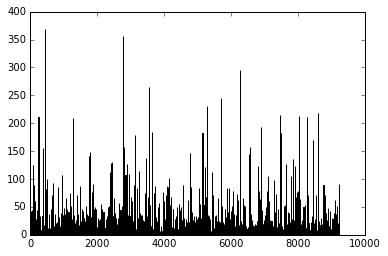

In [9]:
# lets explore the unrefined data a little bit
%matplotlib inline
from collections import Counter
import matplotlib
# matplotlib.use('TkAgg') # only need this the first time.
import matplotlib.pyplot as plt

n_groups = 9226
index = np.arange(n_groups)
print len(counts)
plt.bar(index, counts)
plt.show()

In [46]:
# Do a little bit of cleaning of the words first for non-title based clustering / hierarchy
# if we want to preserve Title, we will have to clean differently....
# Pipeline 1
from stop_words import get_stop_words
import collections
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

en_stop = get_stop_words('en')

tokens = words_no_repeats
col_no_stop_words = [i for i in tokens if not i in en_stop]
# collapse words that are the same
seen_already = []
for word in col_no_stop_words:
    if not word in seen_already:
        seen_already.append(word)
print len(seen_already)
# now we need to split up words that are more than one word!
tokenized_words = []
for word in seen_already:
    tokenized = tokenizer.tokenize(word.lower())
    tokenized_words = tokenized_words + tokenized
print len(tokenized_words)

stemmed_words = [p_stemmer.stem(w) for w in tokenized_words] 
print len(stemmed_words)

9189
10891
10891


/Users/abkhanna/Documents/workspace/Princeton/cos424/a2/lib/python2.7/site-packages/ipykernel/__main__.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [54]:
# lets try clustering these words using word2vec trained on the standard word2vec stuff
word2vec.word2phrase('text8', 'text8-phrases', verbose=True)
word2vec.word2clusters('text8', 'text8-clusters.txt', 100, verbose=True)
word2vec.word2vec('text8-phrases', 'text8.bin', size=100, verbose=True)

Starting training using file text8
Words processed: 17000K     Vocab size: 4399K  
Vocab size (unigrams + bigrams): 2419827
Words in train file: 17005206
Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 317.50k  Starting training using file text8-phrases
Vocab size: 98331
Words in train file: 15857306
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 318.77k  

In [47]:
# once the word2vec is trained, we are going to use it to represent clusters
clusters = word2vec.load_clusters('text8-clusters.txt')
table_word_clusters = dict()
dropped_words = 0
for word in tokenized_words:
    try:
        assert word is not None
        cluster = clusters[word]
        if cluster in table_word_clusters:
            word_list = table_word_clusters[cluster]
            word_list.append(word)
        else:
            table_word_clusters[cluster] = [word]
    except:
        dropped_words = dropped_words + 1
print len(table_word_clusters)
print dropped_words
print "Percent of words dropped: {0}".format(float(dropped_words) / float(len(tokenized_words)))
table_word_clusters

100
1303
Percent of words dropped: 0.119640069782


{0: ['makes',
  'is',
  'is',
  'see',
  'are',
  'implies',
  'is',
  'bore',
  'shows',
  'is',
  'is',
  'belongs',
  'showing',
  'presents',
  'is',
  'is',
  'lies',
  'covers',
  'is',
  'is',
  'is',
  'giving',
  'see',
  'is',
  'treats',
  'is',
  'belongs',
  'is',
  'see',
  'is',
  'are'],
 1: ['led',
  'made',
  'lost',
  'experienced',
  'lost',
  'lost',
  'grown',
  'lost',
  'saw',
  'lost',
  'saw',
  'abandoned'],
 2: ['glassy',
  'jasmine',
  'abac',
  'cheetah',
  'plantains',
  'thyme',
  'herbivore',
  'ursus',
  'palms',
  'crustacean',
  'cleanliness',
  'ketchup',
  'legume',
  'sibilant',
  'ostrich',
  'potted',
  'gourd',
  'mutton',
  'twig',
  'coconuts',
  'veal',
  'pickled',
  'symbiosis',
  'squeak',
  'joiner',
  'ingesting',
  'waterfowl',
  'pane',
  'weeds',
  'finned',
  'slipper',
  'chomp',
  'spaghetti',
  'creepy',
  'potted',
  'wrinkled',
  'tart',
  'scrub',
  'quince',
  'artichoke',
  'mistletoe',
  'wrappings',
  'bins',
  'wingless',

In [53]:
# we can further split each one of these clusters we have already created via word2vec via pos tags
import nltk
pos_table_clusters = []
for clusterid, w_cluster in table_word_clusters.iteritems():
    pos_cluster = nltk.pos_tag(w_cluster)
    pos_table = dict()
    for w, pos in pos_cluster:
        if pos in pos_table:
            word_list = pos_table[pos]
            word_list.append(w)
        else:
            pos_table[pos] = [w]
    
    pos_table_clusters.append((clusterid, pos_table))

pos_table_clusters

[(0,
  {'JJ': ['belongs', 'lies'],
   'NN': ['bore', 'see'],
   'NNS': ['implies', 'shows', 'presents', 'covers', 'treats', 'belongs'],
   'VBG': ['showing', 'giving'],
   'VBN': ['see', 'see'],
   'VBP': ['are', 'are'],
   'VBZ': ['makes',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is',
    'is']}),
 (1,
  {'JJ': ['experienced', 'grown'],
   'NN': ['saw', 'saw'],
   'VBD': ['made', 'abandoned'],
   'VBN': ['led', 'lost', 'lost', 'lost', 'lost', 'lost']}),
 (2,
  {'FW': ['quagga'],
   'IN': ['overgrown', 'walrus'],
   'JJ': ['glassy',
    'thyme',
    'ursus',
    'crustacean',
    'gourd',
    'wrinkled',
    'mistletoe',
    'wingless',
    'delicious',
    'avian',
    'whine',
    'docile',
    'grind',
    'shiny',
    'wavy',
    'carnivorous',
    'oatmeal',
    'ornament',
    'spoonful',
    'brandy',
    'hippopotamus',
    'leafy',
    'rodent',
    'unbelievable',
    'oatmeal',
    'bluebird'

In [63]:
# import the model for use in the next step where we will hierarchical cluster each current cluster
model = word2vec.load('text8.bin')
model['is']

array([-0.01733596, -0.12659574, -0.12037361,  0.03584983,  0.02247285,
        0.130657  ,  0.23295723, -0.0026766 , -0.05817807, -0.0561312 ,
       -0.14345583, -0.06065516,  0.06035897,  0.1289409 ,  0.12427574,
        0.01530132, -0.0013387 , -0.18863258,  0.07260289, -0.08193594,
       -0.00654729,  0.05798464,  0.09854616, -0.06210086, -0.15463883,
        0.07462396, -0.1297262 , -0.16477112, -0.02467595, -0.04386052,
        0.09240515,  0.07297958, -0.15900047,  0.05048196,  0.09516643,
       -0.02463188, -0.07846159,  0.03837655, -0.06920758, -0.01196875,
       -0.02417682,  0.14351542, -0.20008111,  0.11352686, -0.01073102,
       -0.0512967 , -0.06488878, -0.04698483, -0.04173089, -0.03206996,
       -0.16749093, -0.0994063 , -0.08537342,  0.0069761 , -0.01633524,
        0.18837039,  0.02947676,  0.04747694, -0.0129709 , -0.11338036,
        0.02351015, -0.15954055,  0.00161944,  0.0671698 , -0.13438579,
        0.21402411,  0.02267993, -0.08651795, -0.0500594 ,  0.12

(6, 100)


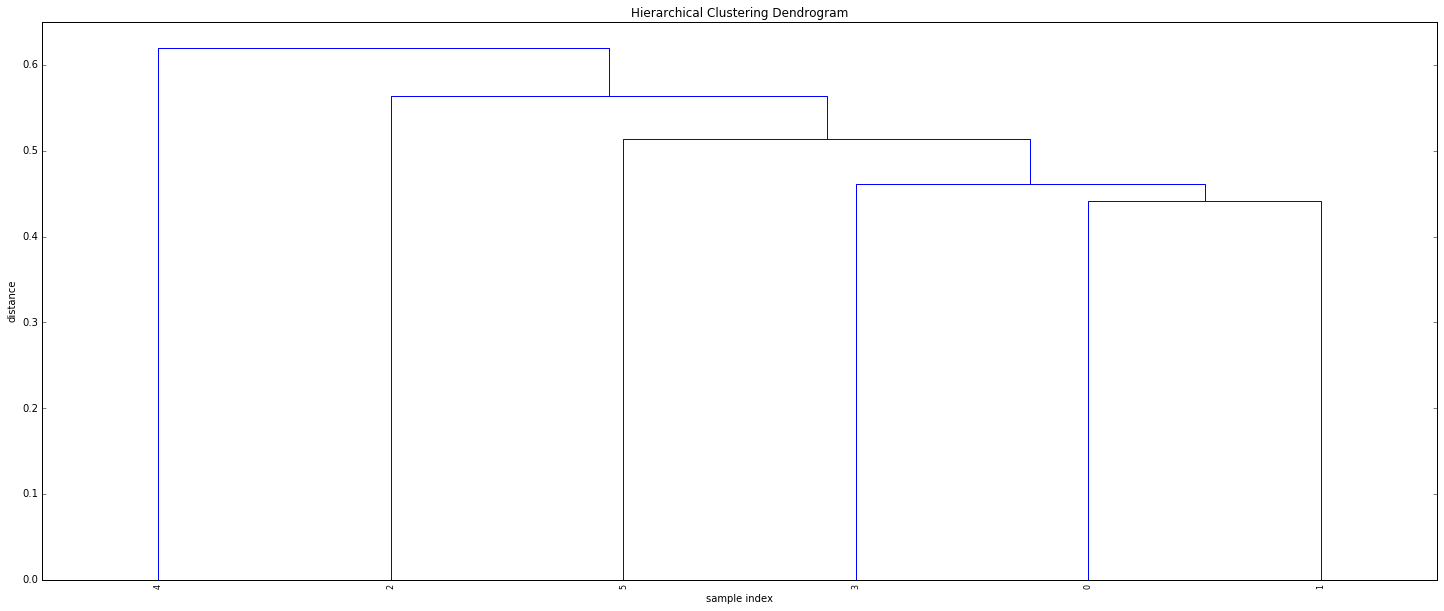

0: implies

1: treats

2: covers

3: presents

4: belongs

5: shows

(7, 100)


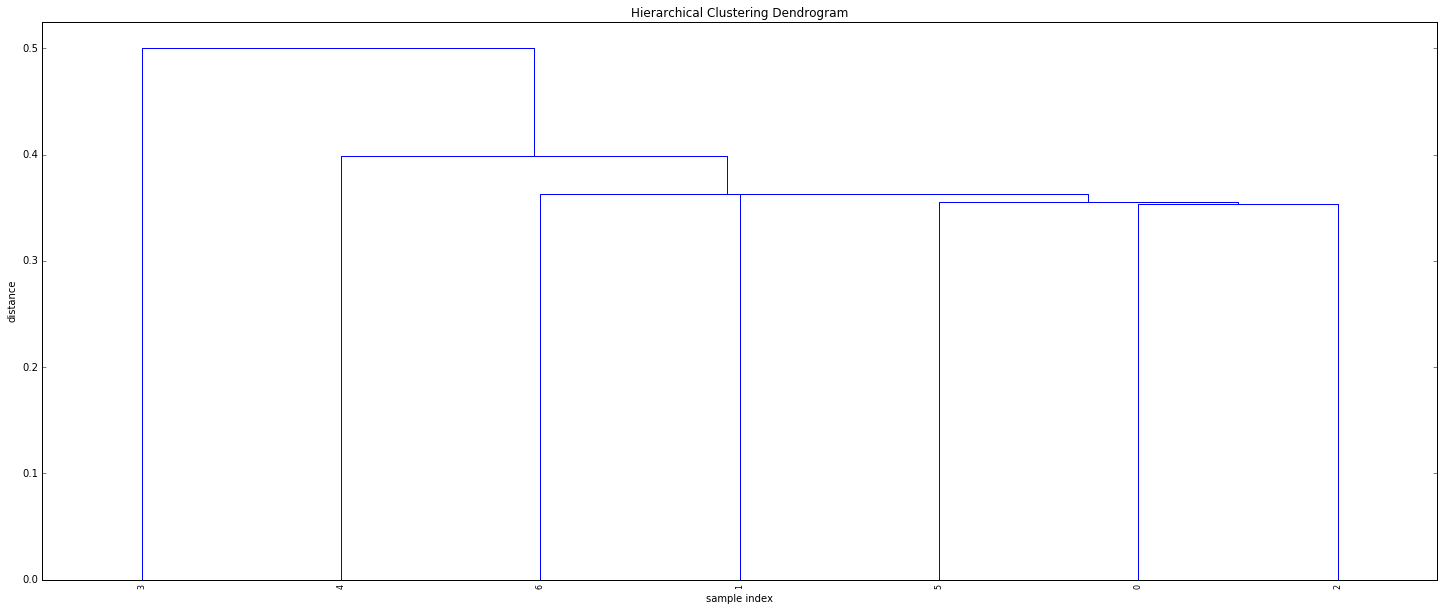

0: stuffing

1: seasoning

2: dripping

3: wading

4: blooming

5: ingesting

6: pruning

(28, 100)


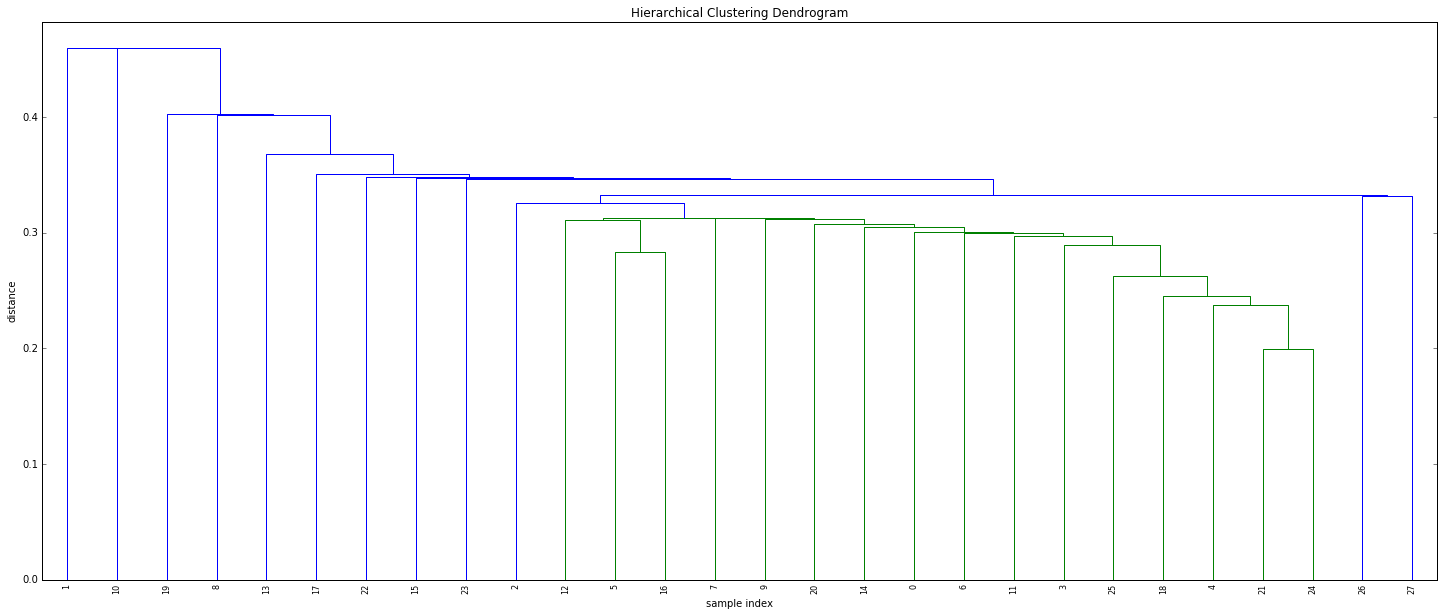

0: glassy

1: unbelievable

2: rodent

3: delicious

4: leafy

5: hippopotamus

6: gourd

7: mistletoe

8: ornament

9: nipple

10: unclean

11: avian

12: ursus

13: wingless

14: wavy

15: docile

16: carnivorous

17: bluebird

18: thyme

19: whine

20: brandy

21: oatmeal

22: grind

23: spoonful

24: crustacean

25: amphibian

26: wrinkled

27: shiny

(76, 100)


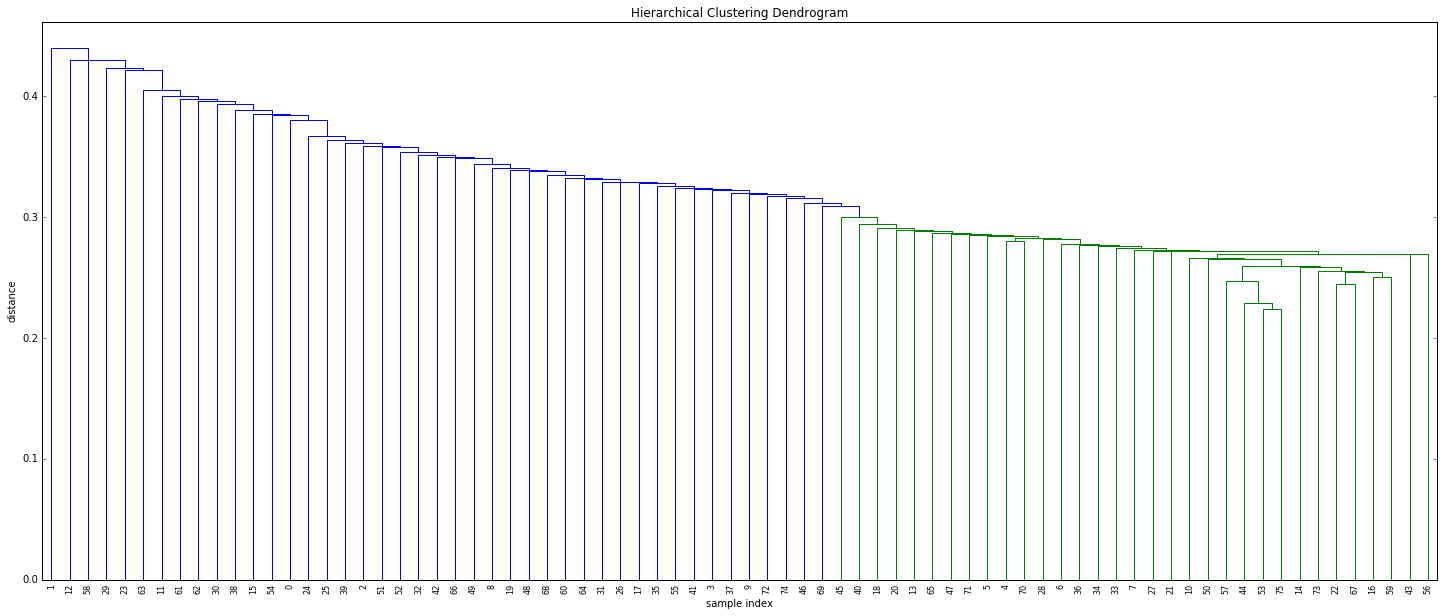

0: hunchback

1: abac

2: feline

3: americana

4: onomatopoeia

5: sawdust

6: macaroni

7: turquoise

8: chomp

9: sponge

10: lettuce

11: flamingo

12: sixpence

13: pane

14: quail

15: solder

16: twig

17: hourglass

18: vulture

19: pastel

20: mutton

21: sunflower

22: spinach

23: cleanliness

24: juxtaposition

25: bedding

26: perfume

27: melon

28: yam

29: firewood

30: featureless

31: sibilant

32: symbiosis

33: yak

34: savory

35: quince

36: tart

37: clover

38: balm

39: gingerbread

40: scrub

41: watercolor

42: shatter

43: jasmine

44: squash

45: quagga

46: flowery

47: snack

48: vomit

49: puncture

50: cheetah

51: squeak

52: tub

53: ketchup

54: headdress

55: spool

56: toque

57: steak

58: prune

59: bluebell

60: kingfisher

61: footprint

62: overcast

63: flu

64: creepy

65: ostrich

66: grit

67: legume

68: tack

69: waterfowl

70: yum

71: wallaby

72: joiner

73: pickle

74: plume

75: pastry

(3, 100)


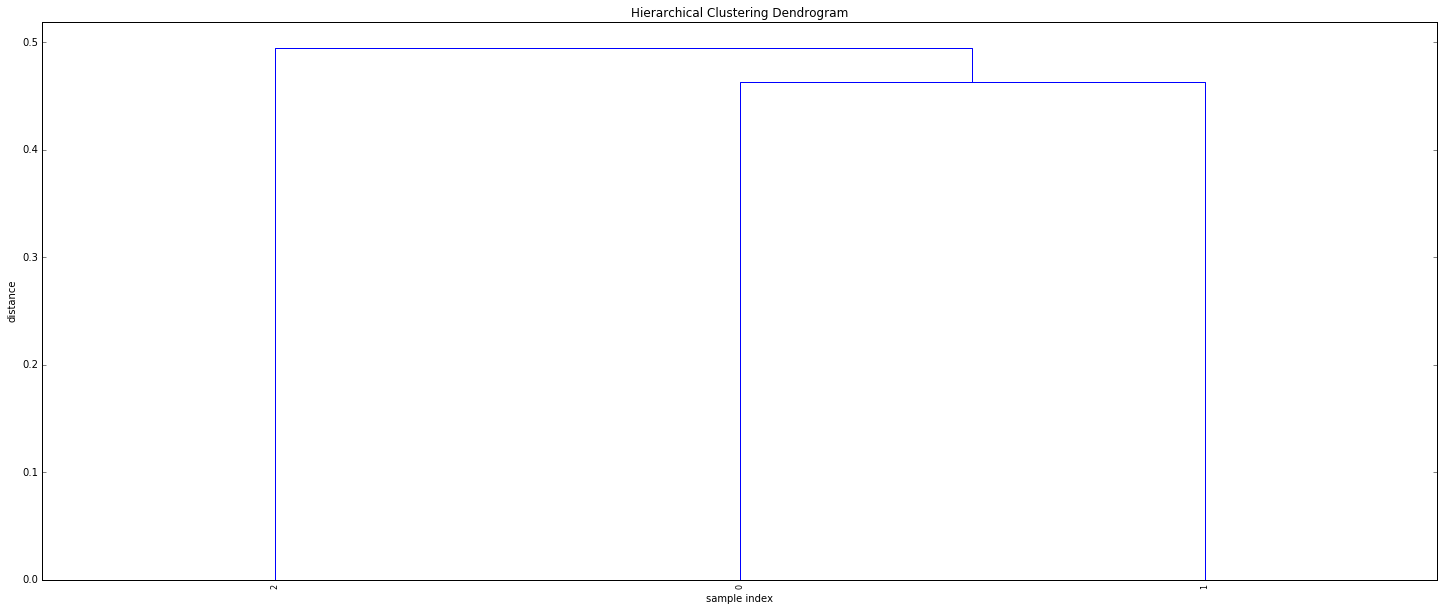

0: potted

1: soiled

2: artichoke

(4, 100)


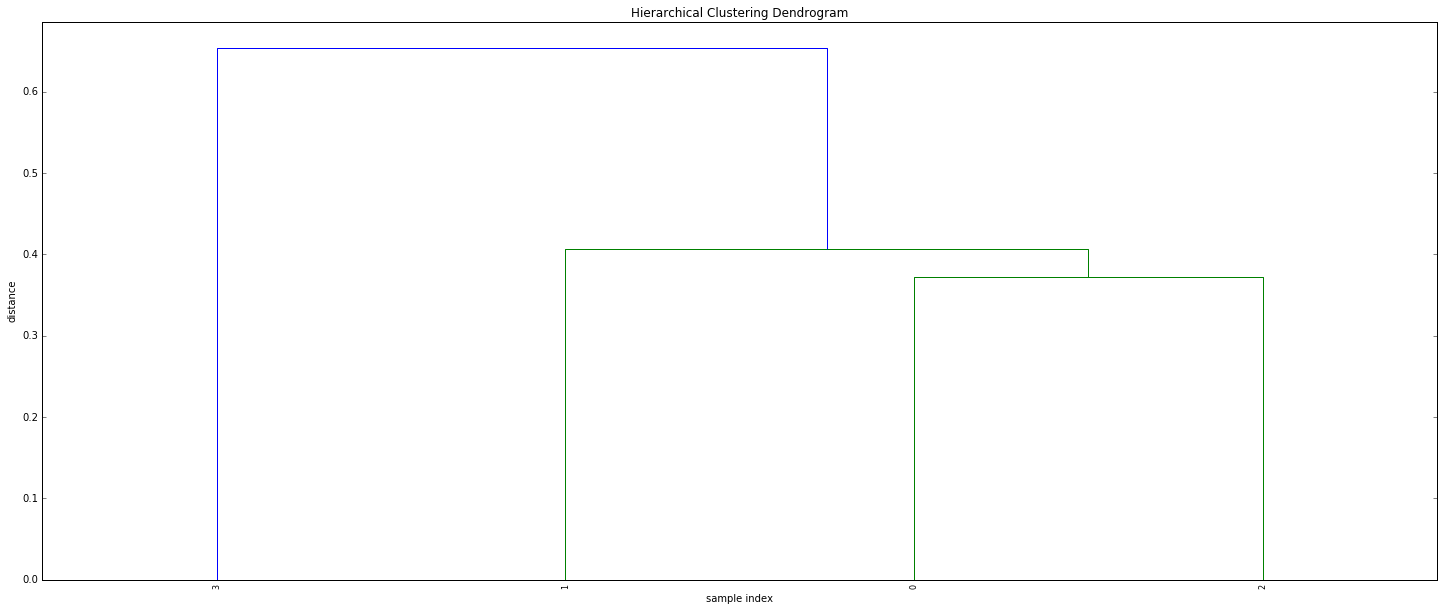

0: potted

1: feathered

2: pickled

3: recessed

(16, 100)


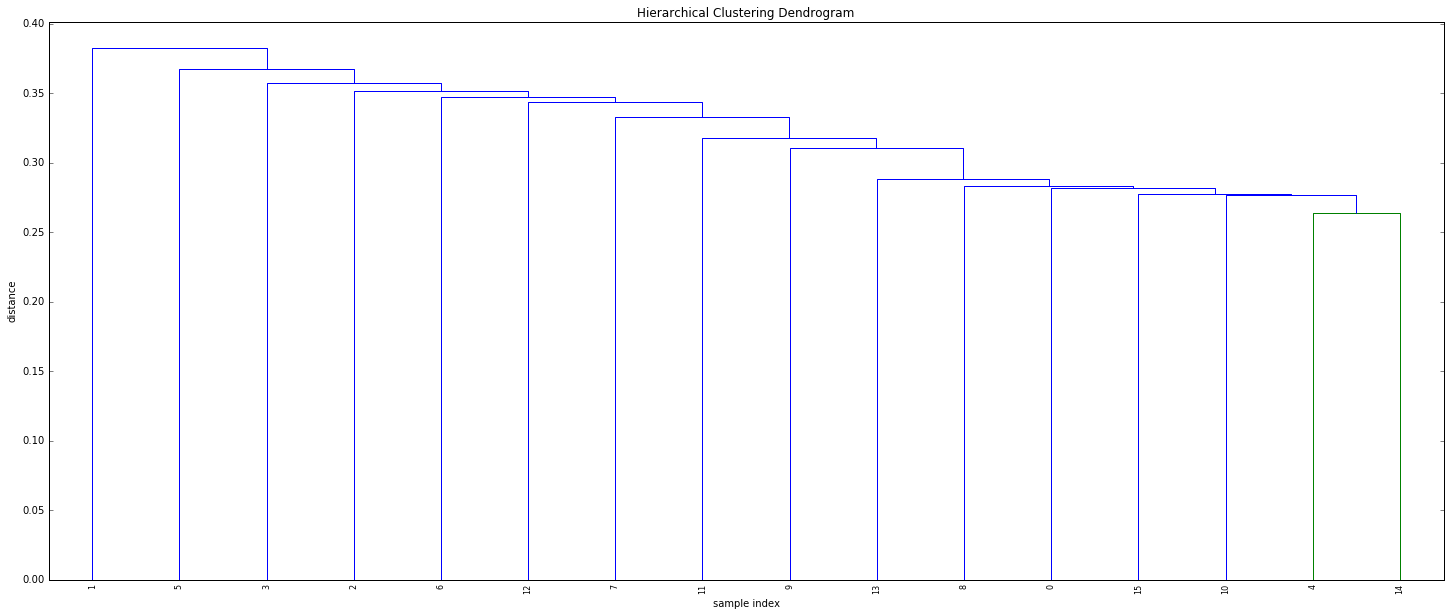

0: hyena

1: cobwebs

2: headwear

3: alligator

4: peas

5: creepy

6: sickle

7: stork

8: eel

9: pom

10: veal

11: eraser

12: serpentine

13: raspberry

14: pancakes

15: plump

(6, 100)


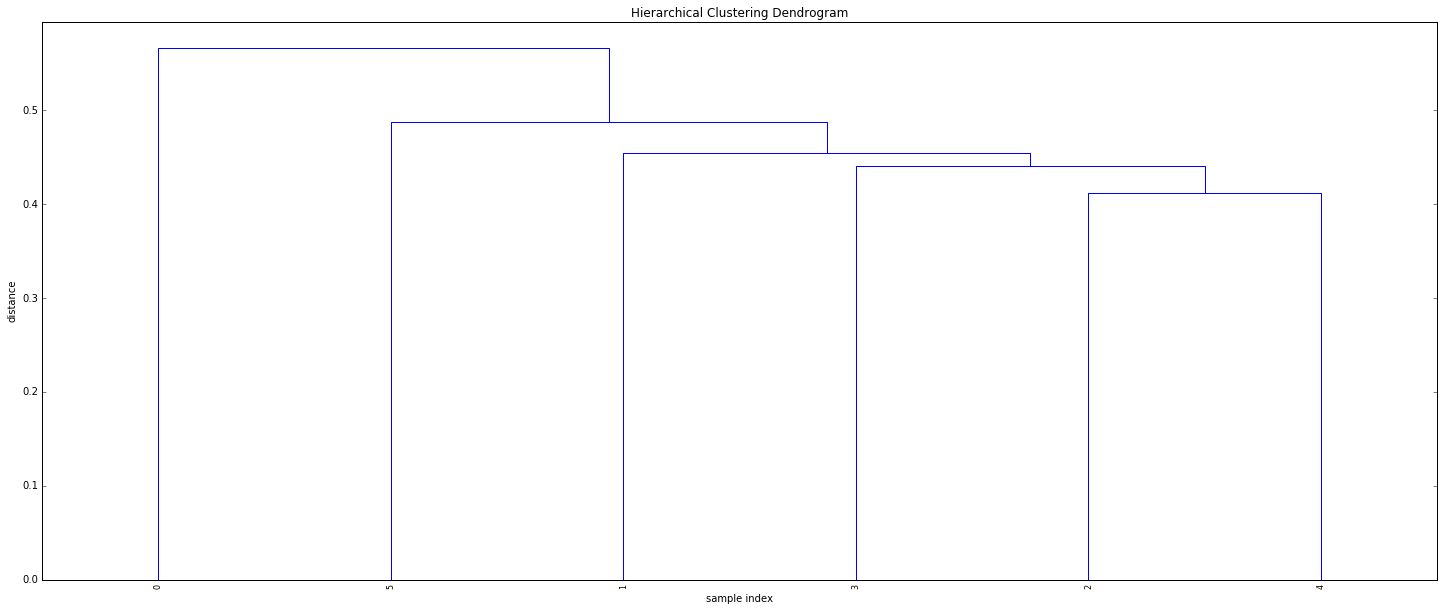

0: lilies

1: pillows

2: plantains

3: hooves

4: ferns

5: bins

(22, 100)


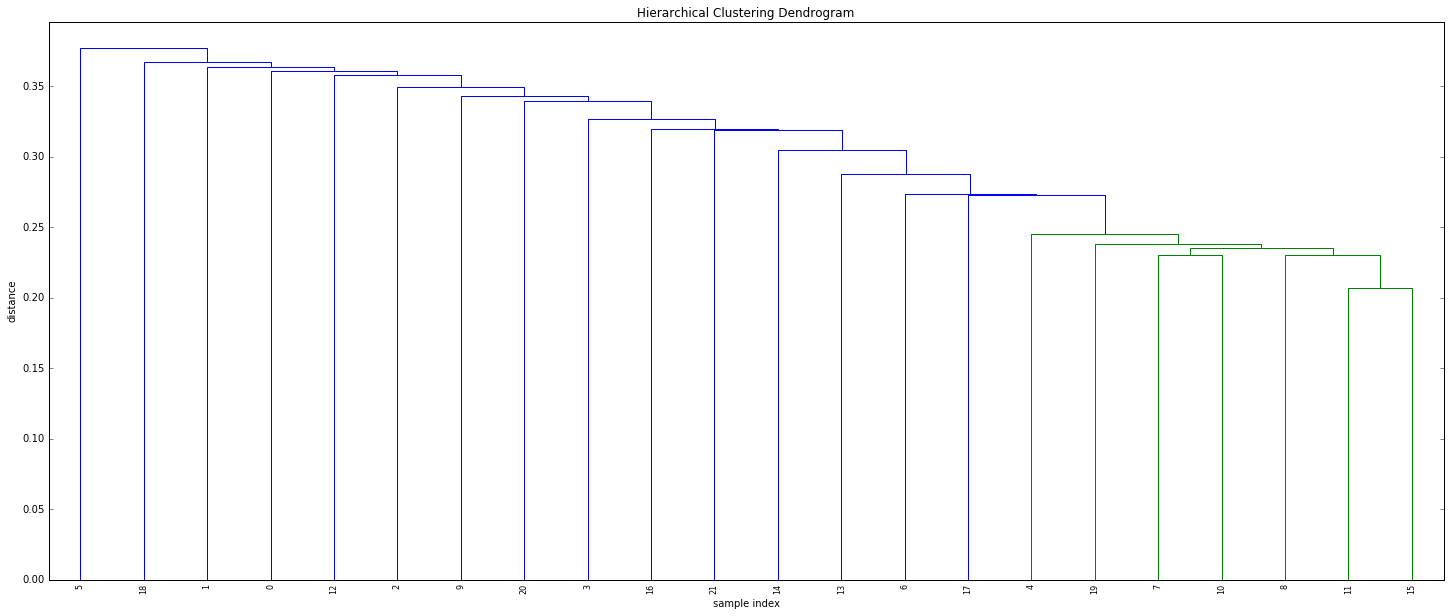

0: baskets

1: ladders

2: hens

3: buds

4: olives

5: brownies

6: spaghetti

7: cherries

8: coconuts

9: wrappings

10: plums

11: turnips

12: palms

13: keg

14: raspberries

15: strawberries

16: weeds

17: pies

18: fangs

19: oysters

20: butterflies

21: snails

(16, 100)


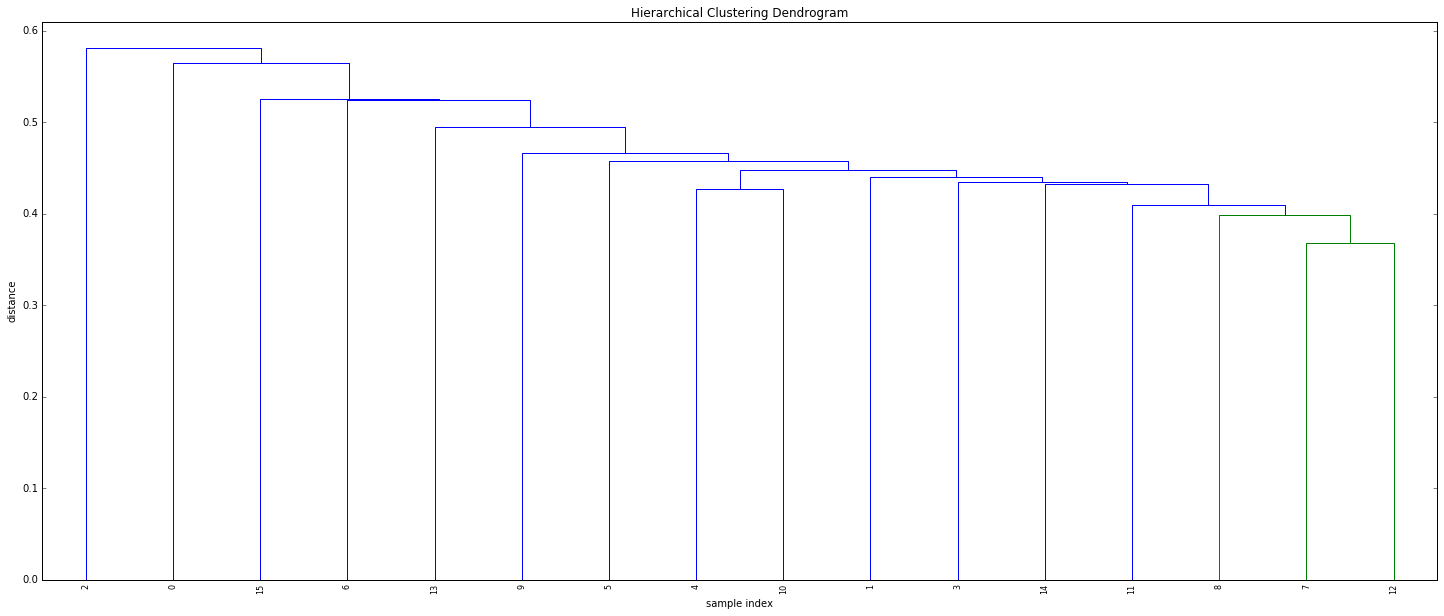

0: wooing

1: insulting

2: inviting

3: yearning

4: punishing

5: begging

6: pondering

7: joking

8: charming

9: sibling

10: sinning

11: terrifying

12: scheming

13: conjuring

14: foreshadowing

15: kneeling

(65, 100)


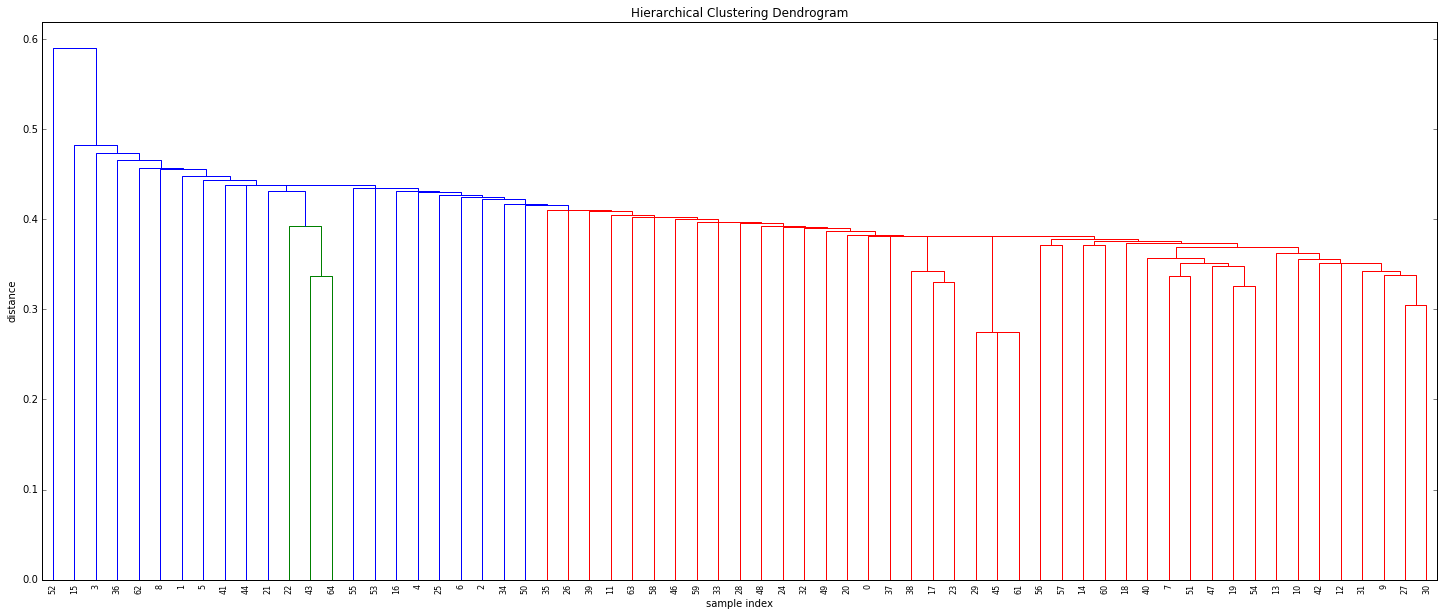

0: passionate

1: chivalry

2: erudite

3: brow

4: solitude

5: brilliance

6: decadent

7: lust

8: desolate

9: traitor

10: wordplay

11: salutation

12: gulliver

13: arrogance

14: wickedness

15: adolescence

16: gratitude

17: droll

18: postman

19: seduction

20: senseless

21: errand

22: insult

23: witty

24: heroism

25: gaze

26: remorse

27: bathsheba

28: turban

29: persephone

30: scorn

31: dreamer

32: tact

33: disobey

34: grandeur

35: eagerness

36: glorify

37: spinster

38: mockery

39: ardor

40: sorrow

41: betrayal

42: jester

43: outcast

44: ageless

45: poseidon

46: mourn

47: drunkenness

48: amazement

49: awe

50: tithe

51: longing

52: castaway

53: impatient

54: priestess

55: triumphant

56: hubris

57: craftsmanship

58: generosity

59: despair

60: toil

61: dionysus

62: cherub

63: laughter

64: irishman

(6, 100)


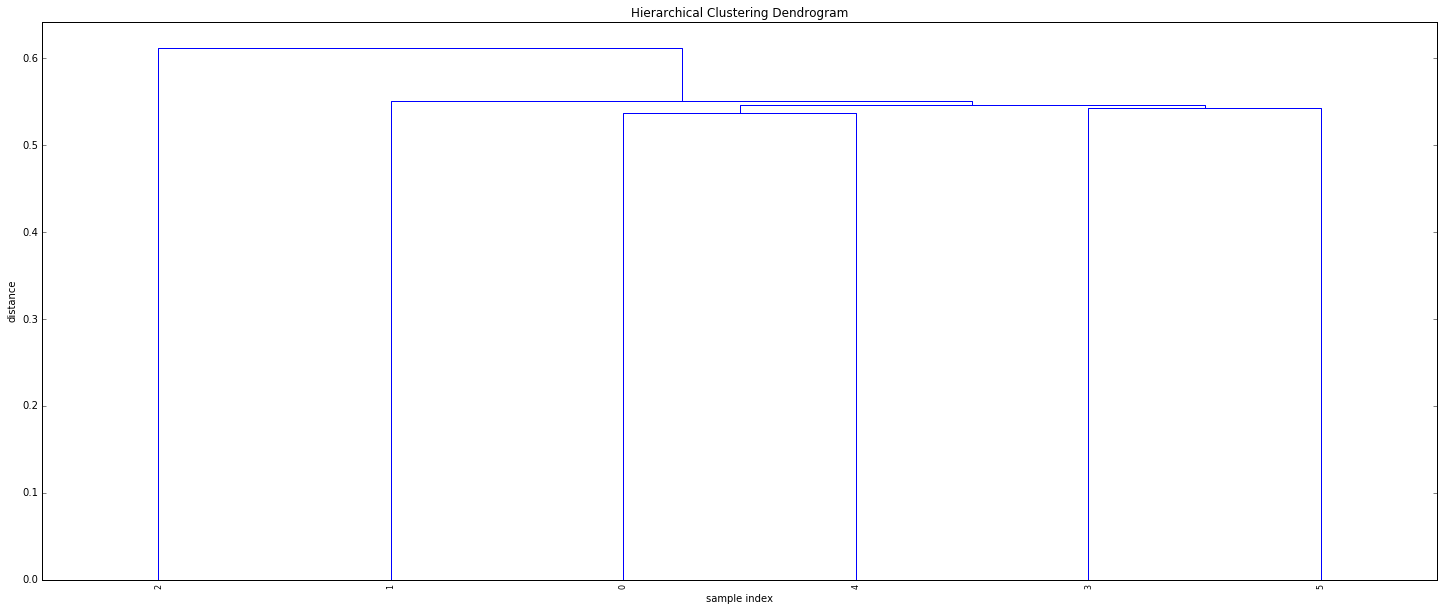

0: untamed

1: splendid

2: puzzled

3: personified

4: braid

5: dignified

(4, 100)


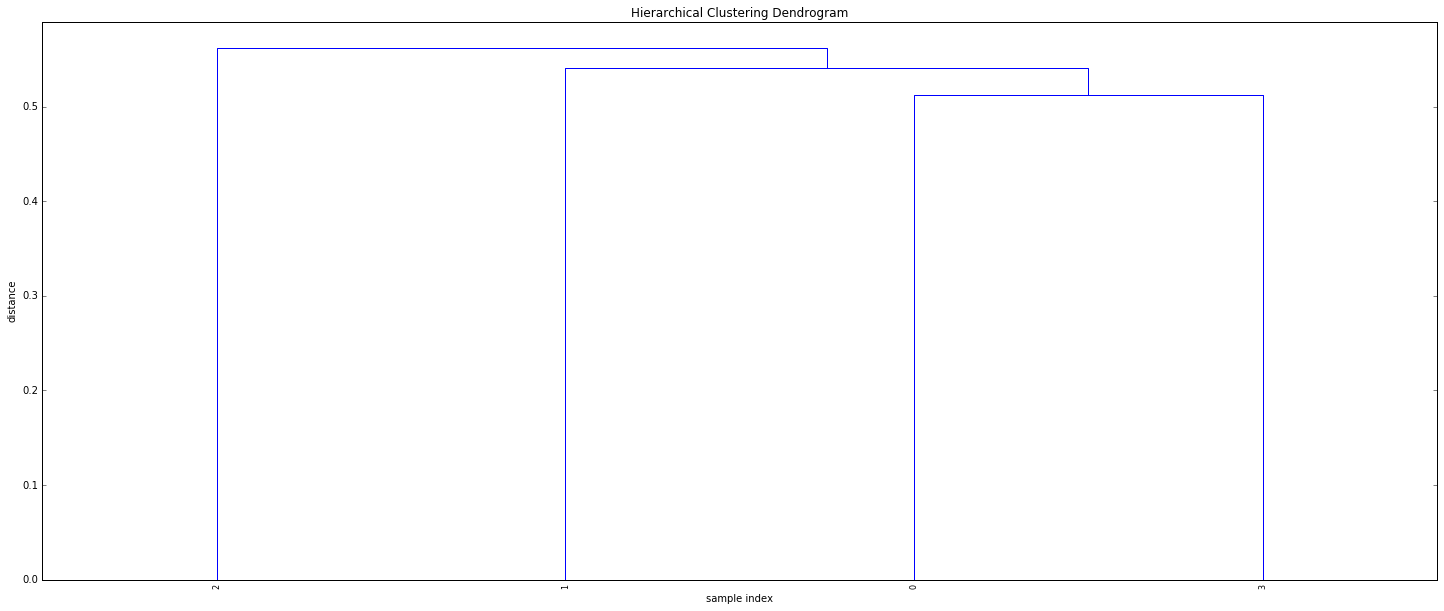

0: incognita

1: lazarus

2: extravagant

3: defiant

(51, 100)


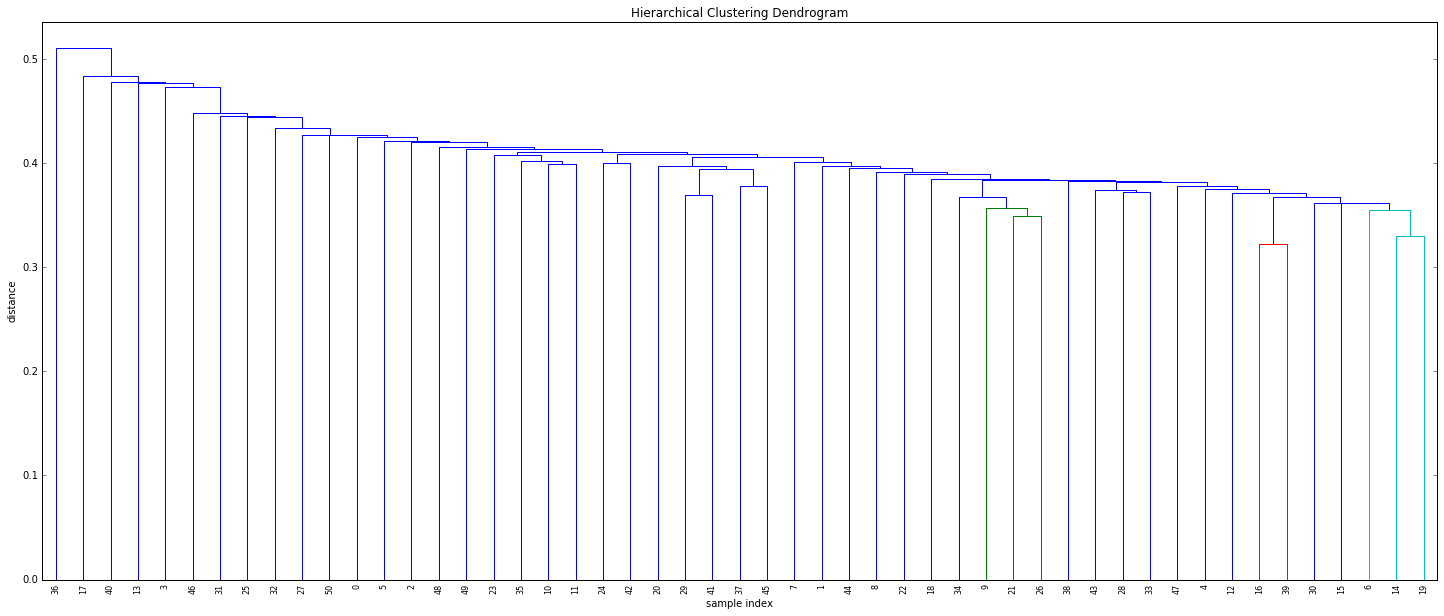

0: outlandish

1: angelic

2: vile

3: scandalous

4: primal

5: repose

6: cannibal

7: transvestite

8: exemplary

9: dismissive

10: delusional

11: corporeal

12: haughty

13: hypocrisy

14: nymph

15: boastful

16: cupid

17: adventurous

18: obedient

19: bathsheba

20: horrible

21: mischievous

22: truthful

23: virtuous

24: melancholy

25: visionary

26: amiable

27: superstitious

28: omniscient

29: carefree

30: admonish

31: peril

32: proverbial

33: awful

34: ominous

35: unselfish

36: cautionary

37: cynical

38: ungrateful

39: parable

40: idyllic

41: respectful

42: contemplative

43: incognita

44: rags

45: ridiculous

46: oft

47: anecdote

48: mischief

49: courteous

50: sublime

(6, 100)


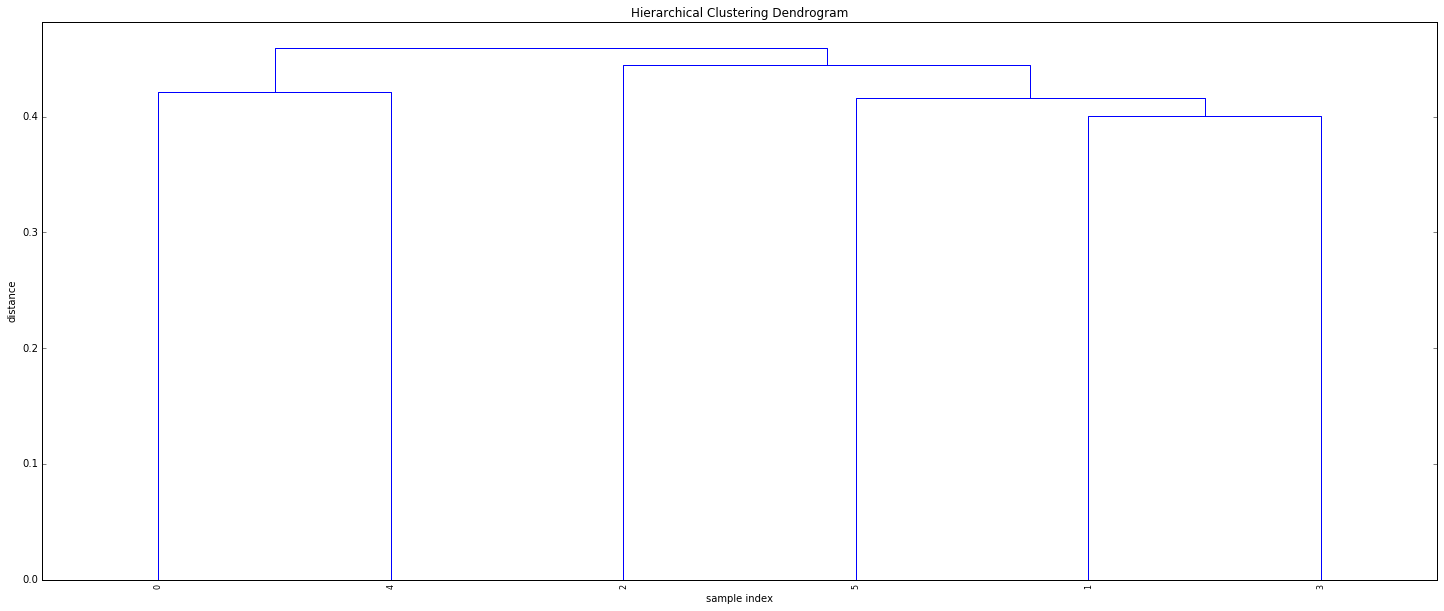

0: riches

1: dislikes

2: rags

3: thighs

4: pleasures

5: fools

(11, 100)


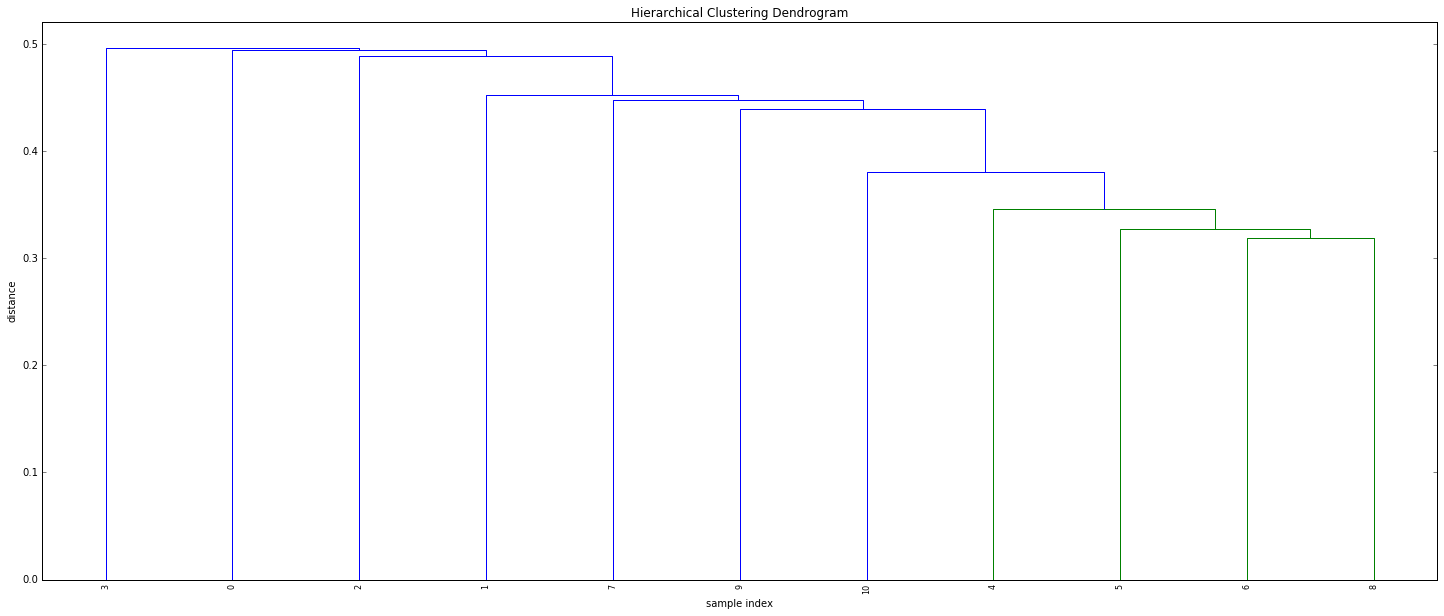

0: steel

1: diamond

2: awkward

3: electricity

4: hydration

5: fracture

6: soot

7: crude

8: furnace

9: helium

10: boil

(3, 100)


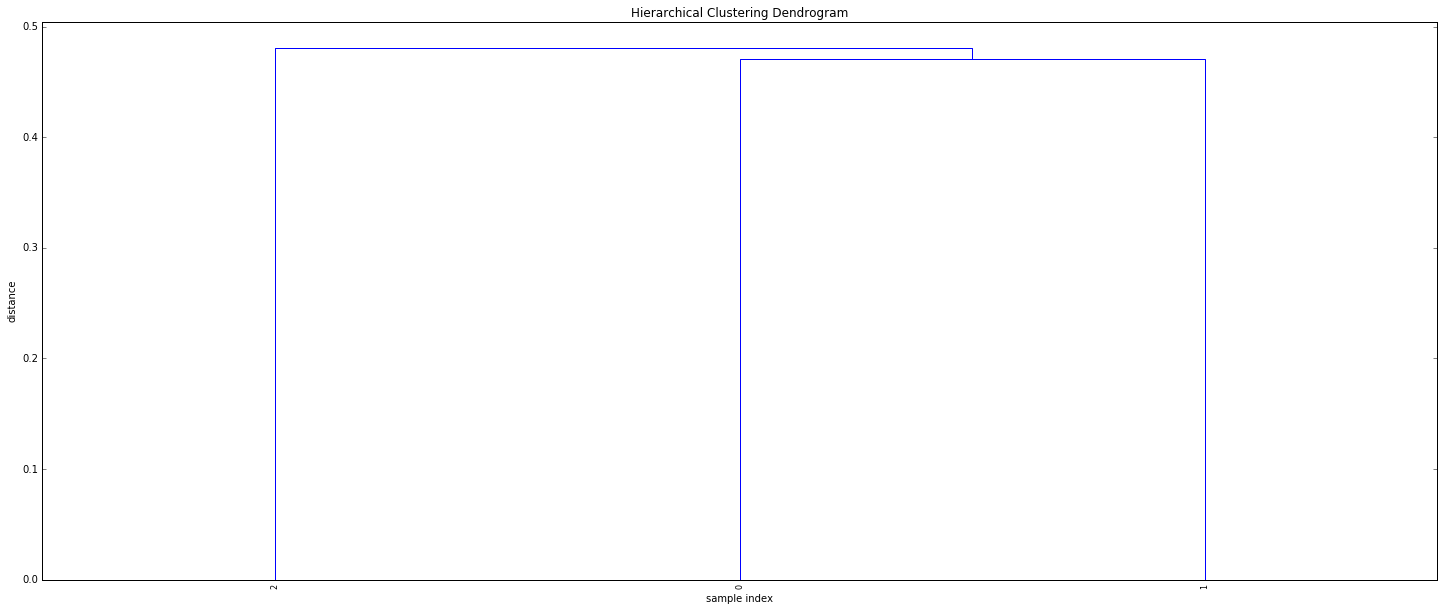

0: toxic

1: branched

2: pumped

(5, 100)


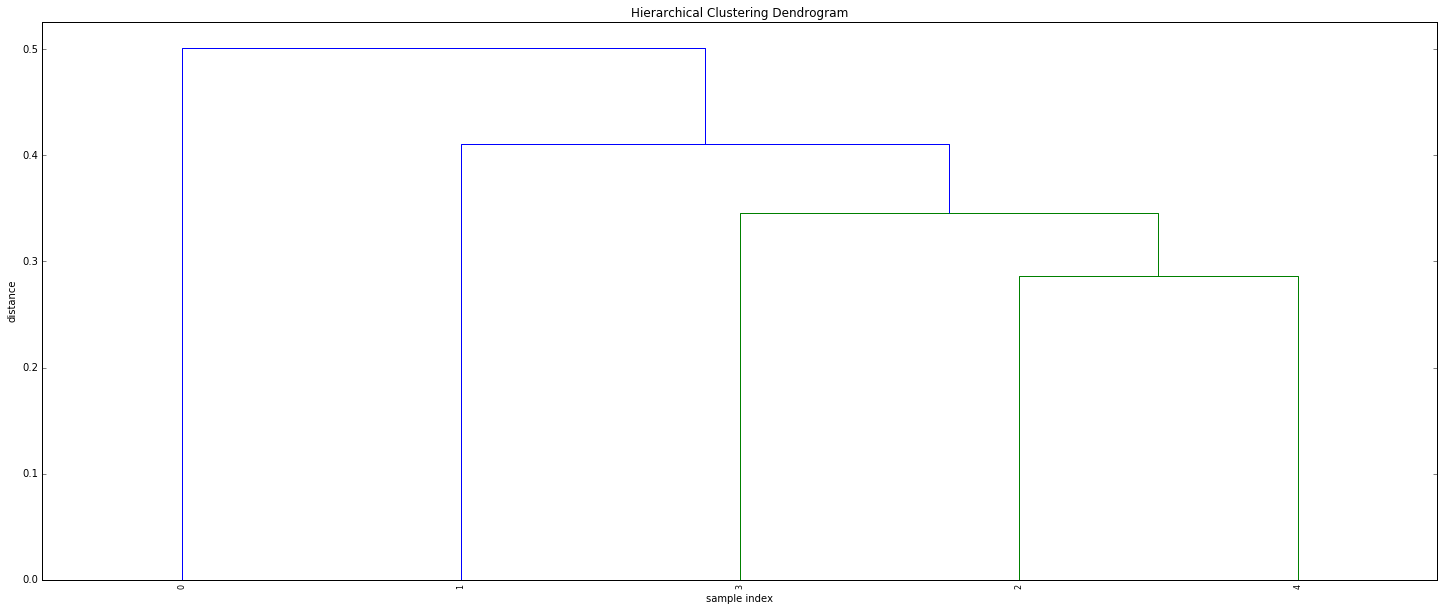

0: sac

1: stain

2: powder

3: protein

4: zinc

(13, 100)


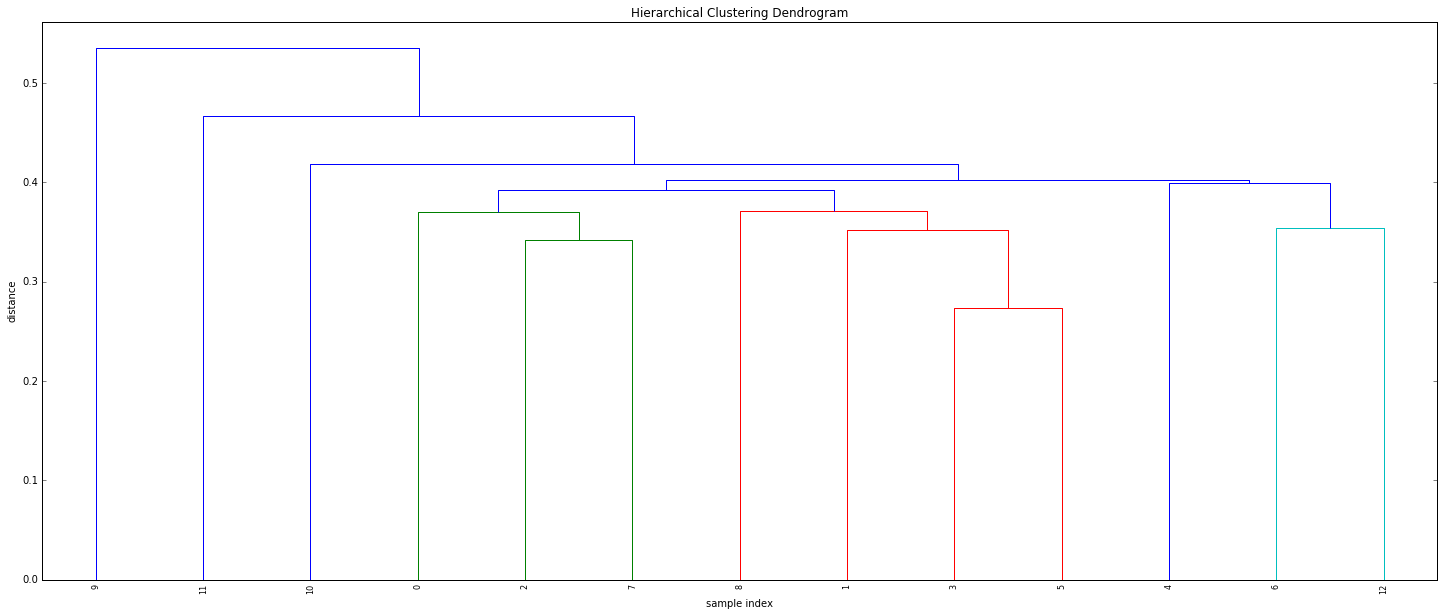

0: explosive

1: fatty

2: liquid

3: colorless

4: oven

5: malleable

6: accessory

7: moisture

8: flexible

9: hydrate

10: ionic

11: extract

12: ingredient

(13, 100)


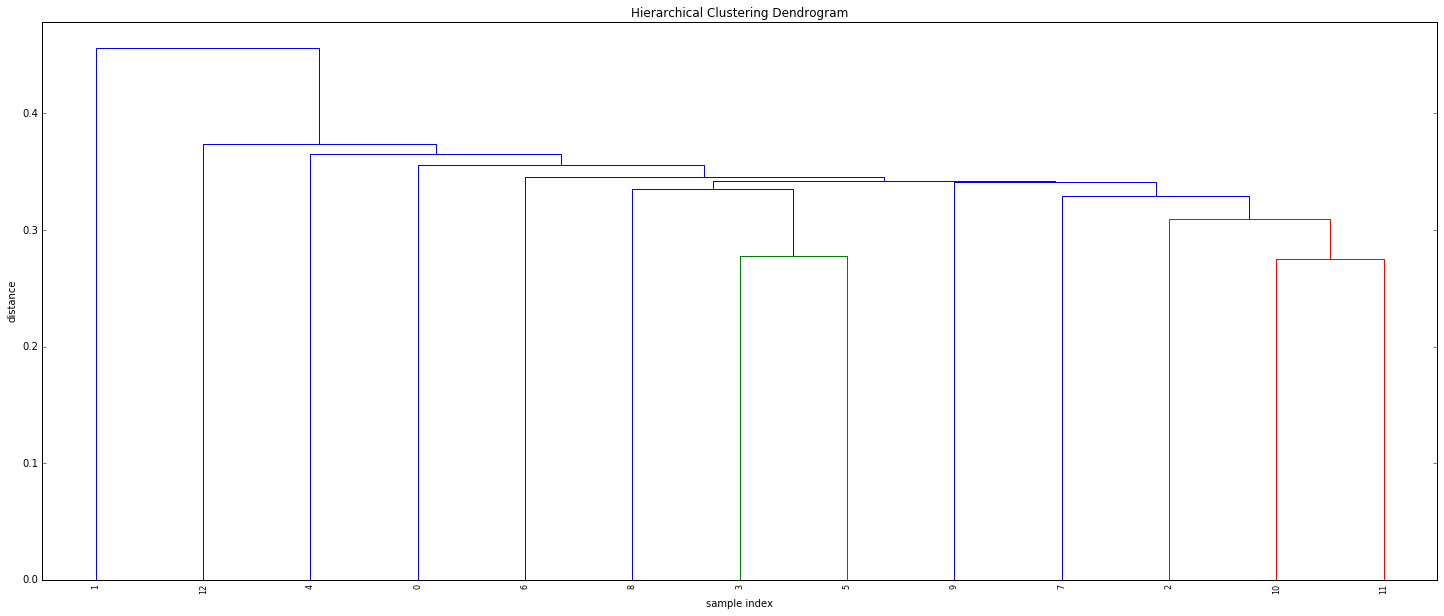

0: chains

1: substitutes

2: shells

3: nutrients

4: materials

5: chemicals

6: needles

7: sheets

8: joints

9: cylinders

10: balloons

11: containers

12: hydroponics

(3, 100)


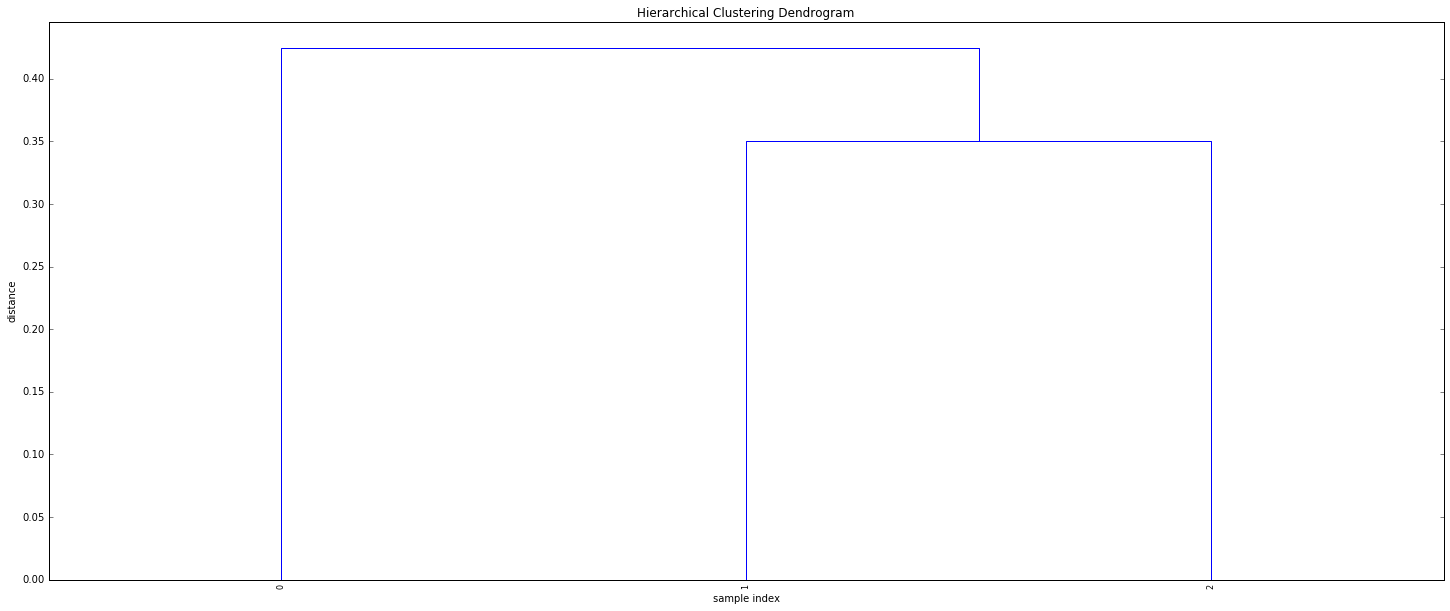

0: bending

1: melting

2: freezing

(42, 100)


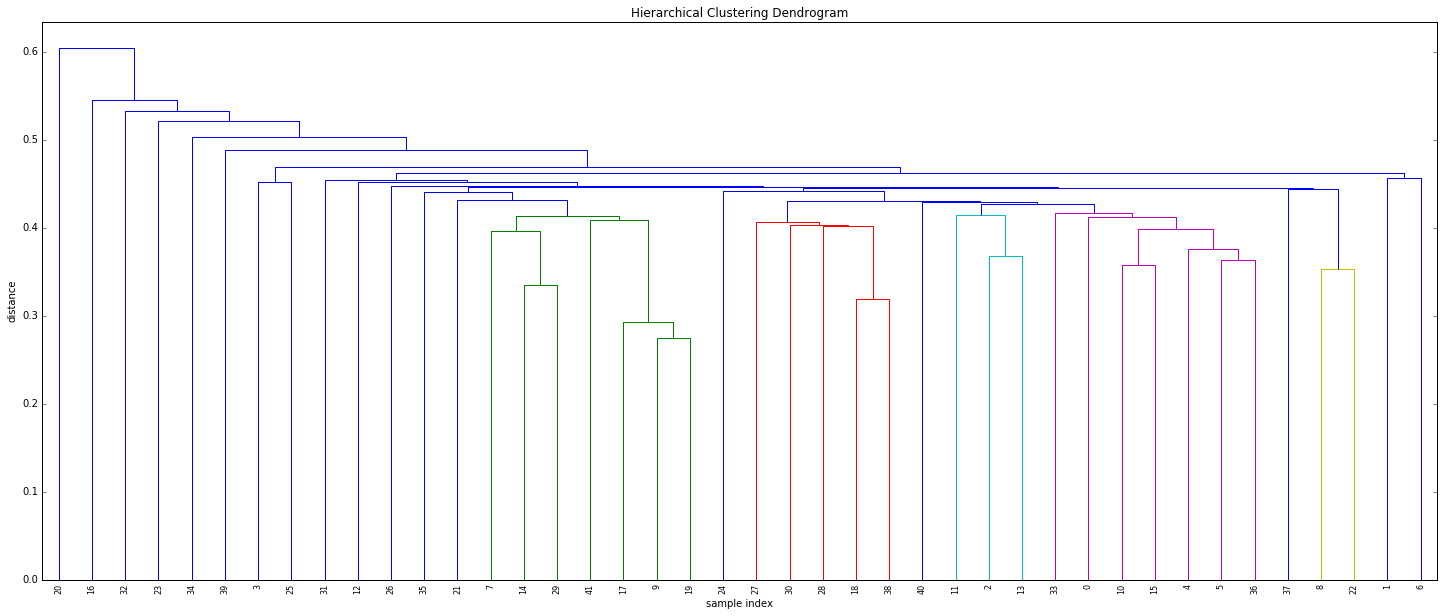

0: bending

1: telescope

2: weight

3: point

4: flow

5: energy

6: collision

7: longitude

8: measure

9: earth

10: concentration

11: speed

12: size

13: strength

14: angle

15: temperature

16: space

17: sun

18: gravity

19: moon

20: field

21: lunar

22: limit

23: location

24: direction

25: moment

26: scale

27: singularity

28: observation

29: distance

30: reflection

31: progression

32: level

33: light

34: transition

35: eclipse

36: heat

37: value

38: motion

39: range

40: mass

41: horizon

(9, 100)


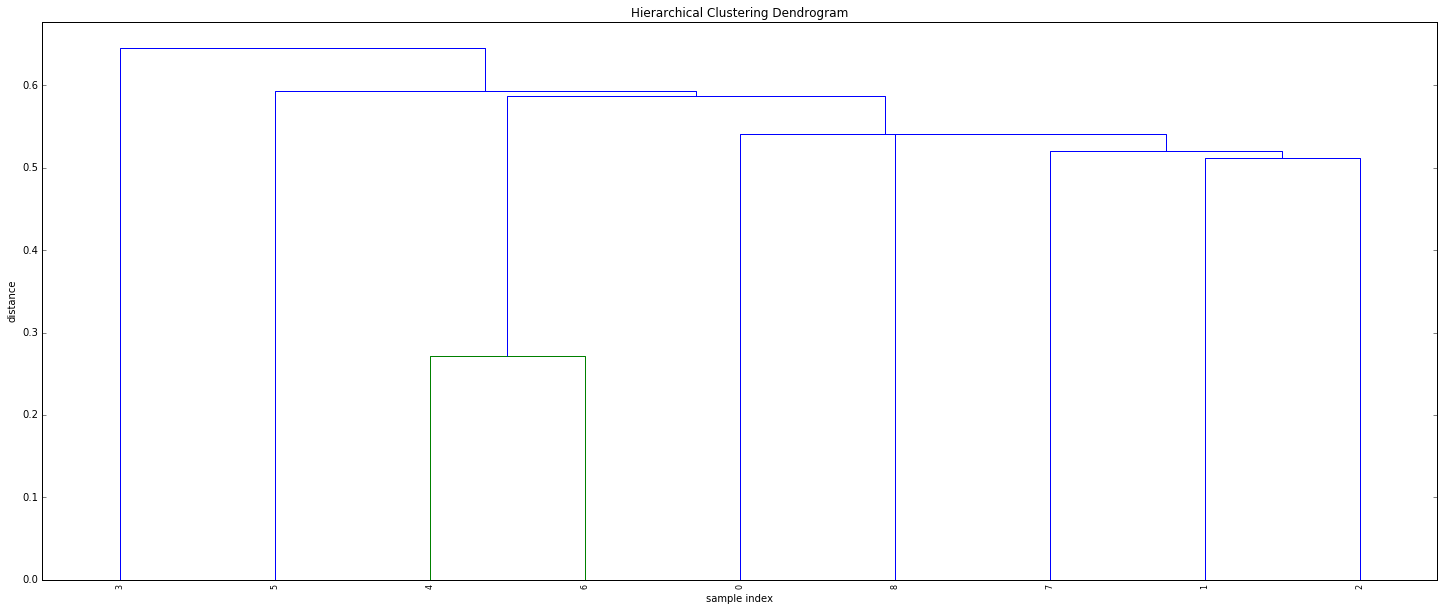

0: relative

1: noise

2: stream

3: sun

4: high

5: distant

6: low

7: measurement

8: threshold

(3, 100)


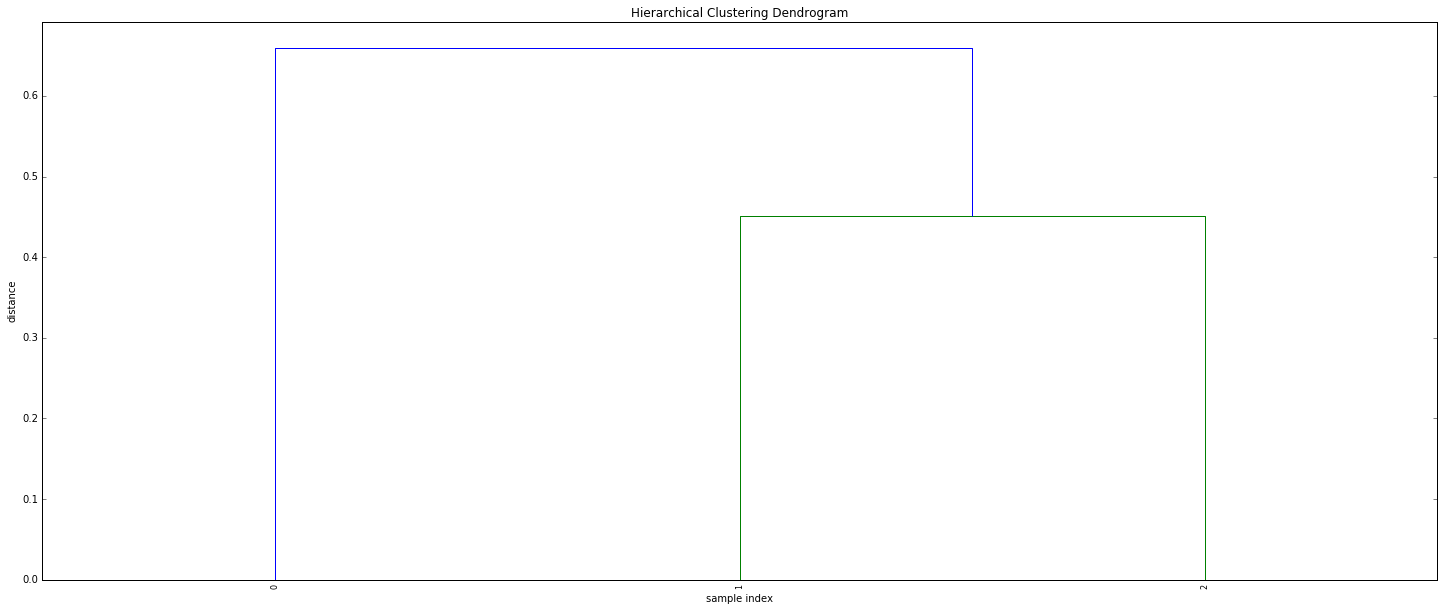

0: weights

1: planets

2: waves

(3, 100)


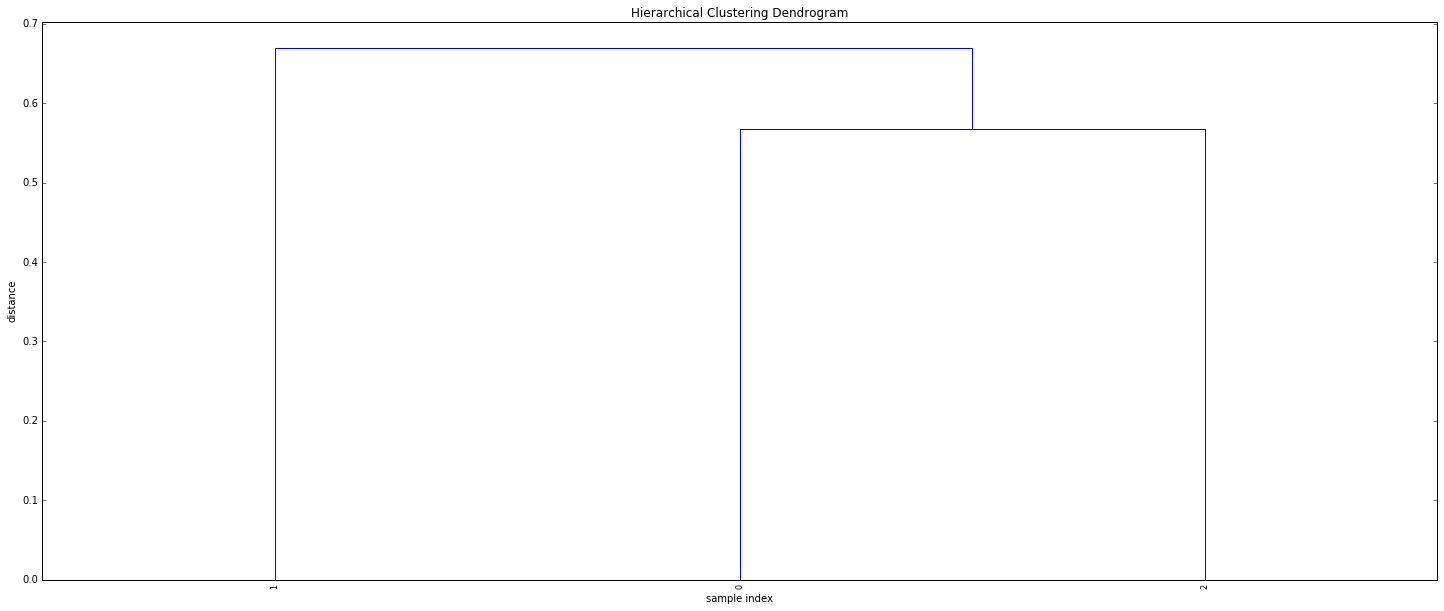

0: love

1: reward

2: awake

(6, 100)


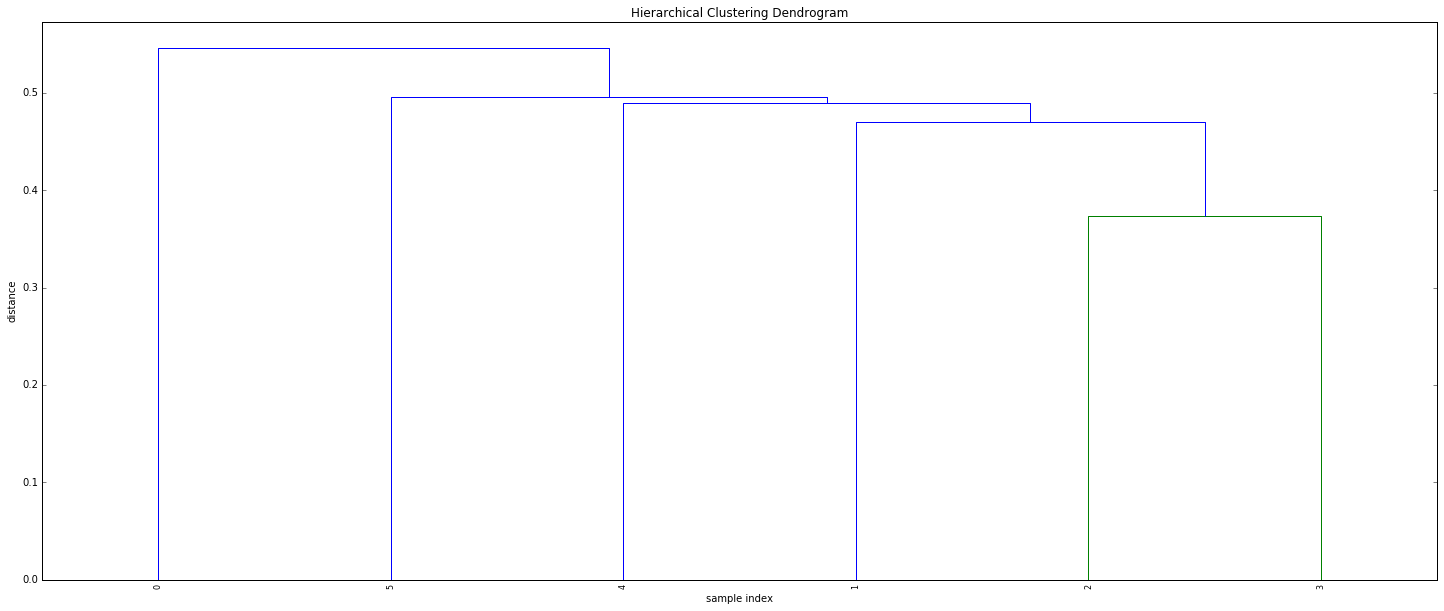

0: caring

1: revealing

2: dying

3: seeing

4: dreaming

5: loving

(21, 100)


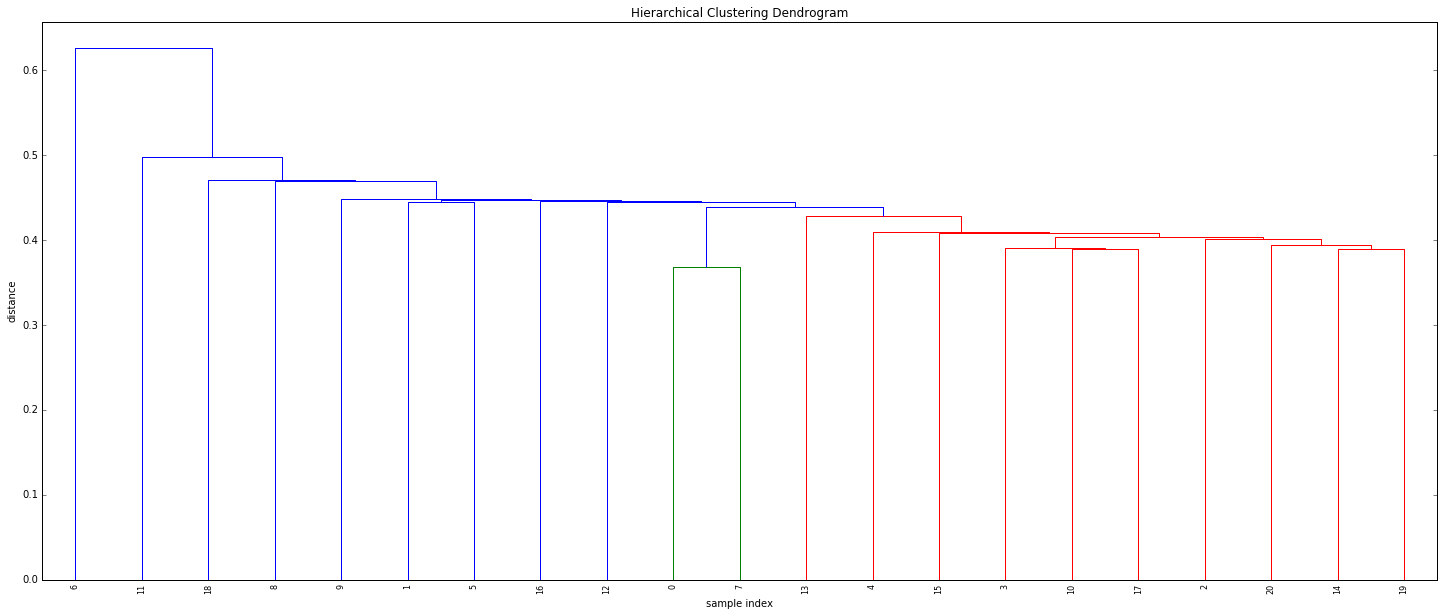

0: good

1: stupid

2: sick

3: thy

4: flesh

5: clever

6: needless

7: bad

8: evil

9: revenge

10: bless

11: wrong

12: stuff

13: sleep

14: dead

15: laugh

16: ambition

17: kindness

18: ruin

19: alive

20: happy

(57, 100)


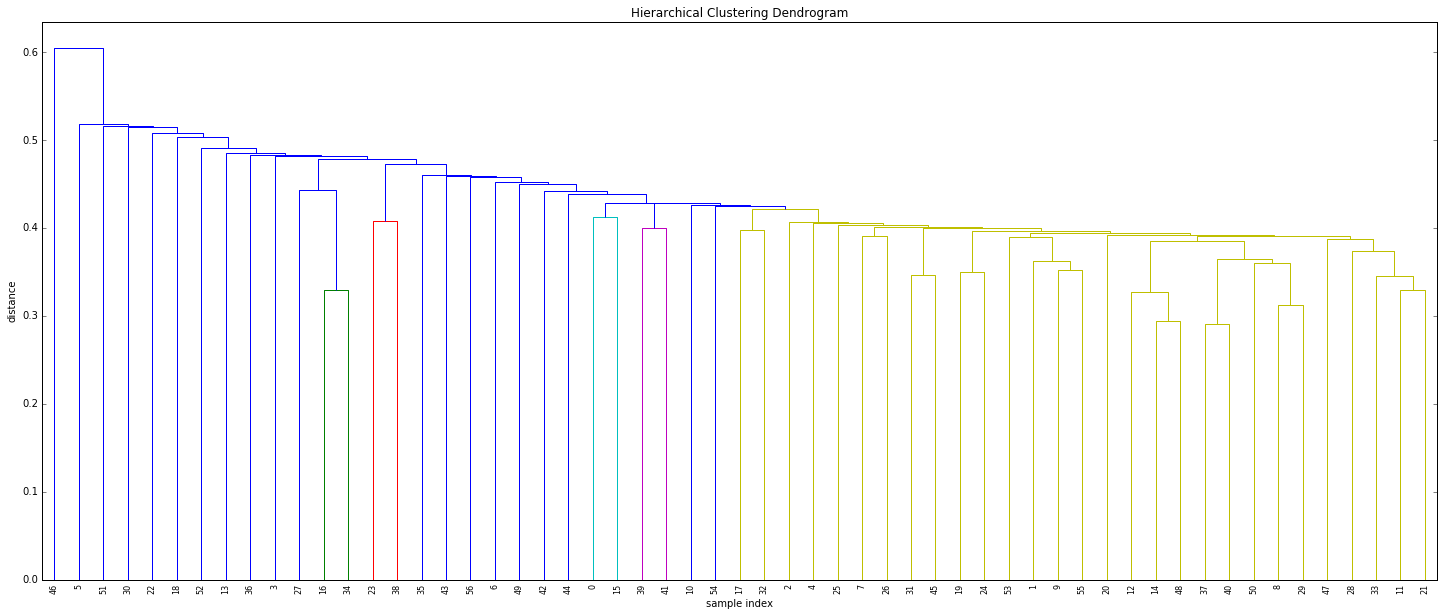

0: heart

1: harm

2: love

3: job

4: shame

5: clever

6: caution

7: victim

8: anger

9: fear

10: obsession

11: happiness

12: thank

13: comfort

14: repent

15: breath

16: everything

17: stupidity

18: reader

19: enthusiasm

20: vanity

21: humanity

22: life

23: woman

24: affection

25: fate

26: sacrifice

27: nobody

28: evil

29: grief

30: chance

31: courage

32: curiosity

33: pleasure

34: nothing

35: trouble

36: veil

37: grace

38: man

39: desire

40: mercy

41: promise

42: pride

43: wise

44: submission

45: patience

46: i

47: soul

48: bless

49: conversation

50: sadness

51: gesture

52: fun

53: sleep

54: reward

55: feeling

56: silence

(12, 100)


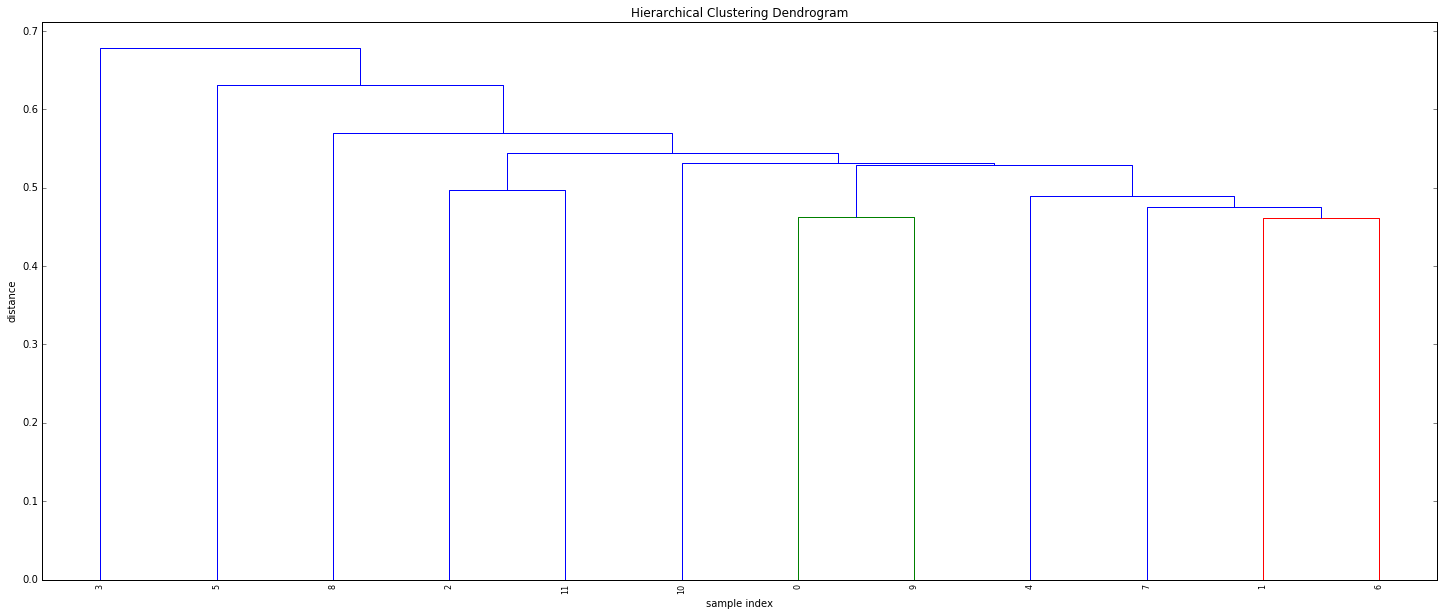

0: modesty

1: praise

2: habit

3: i

4: vain

5: reader

6: pray

7: hope

8: neighbor

9: innocence

10: grave

11: mistake

(7, 100)


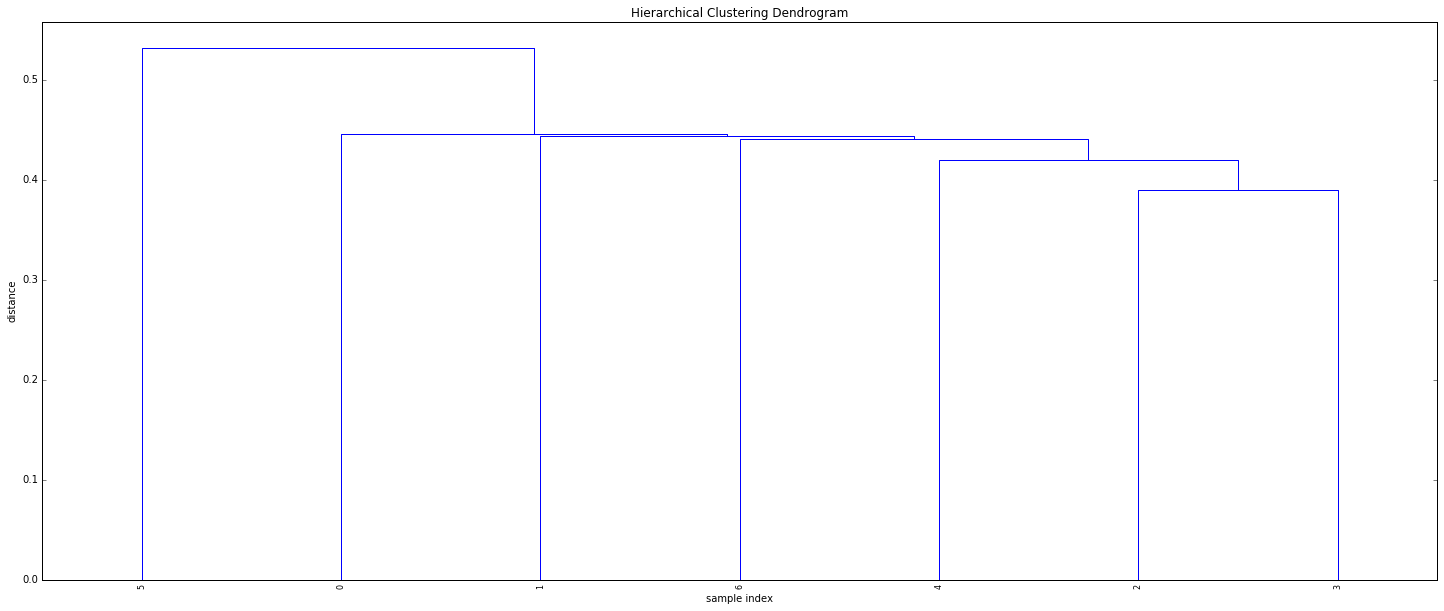

0: eyes

1: things

2: sins

3: feelings

4: gifts

5: babies

6: dreams

(7, 100)


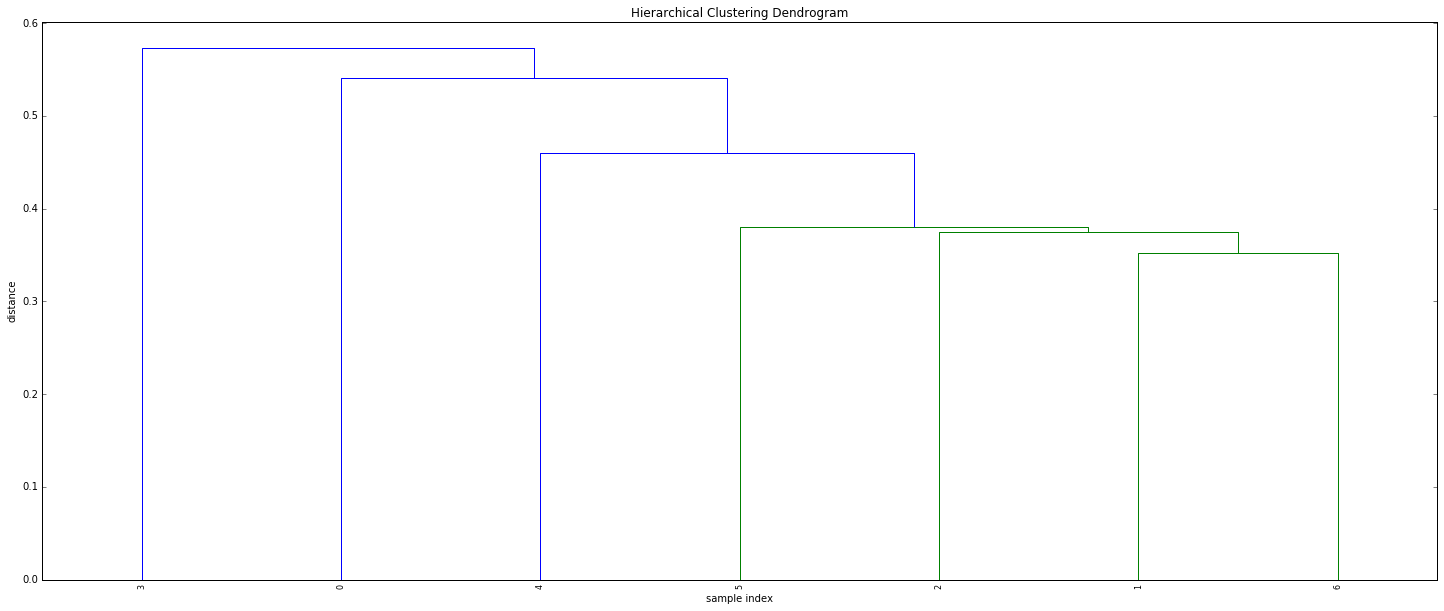

0: mobile

1: eiffel

2: manual

3: standard

4: acorn

5: relational

6: interactive

(16, 100)


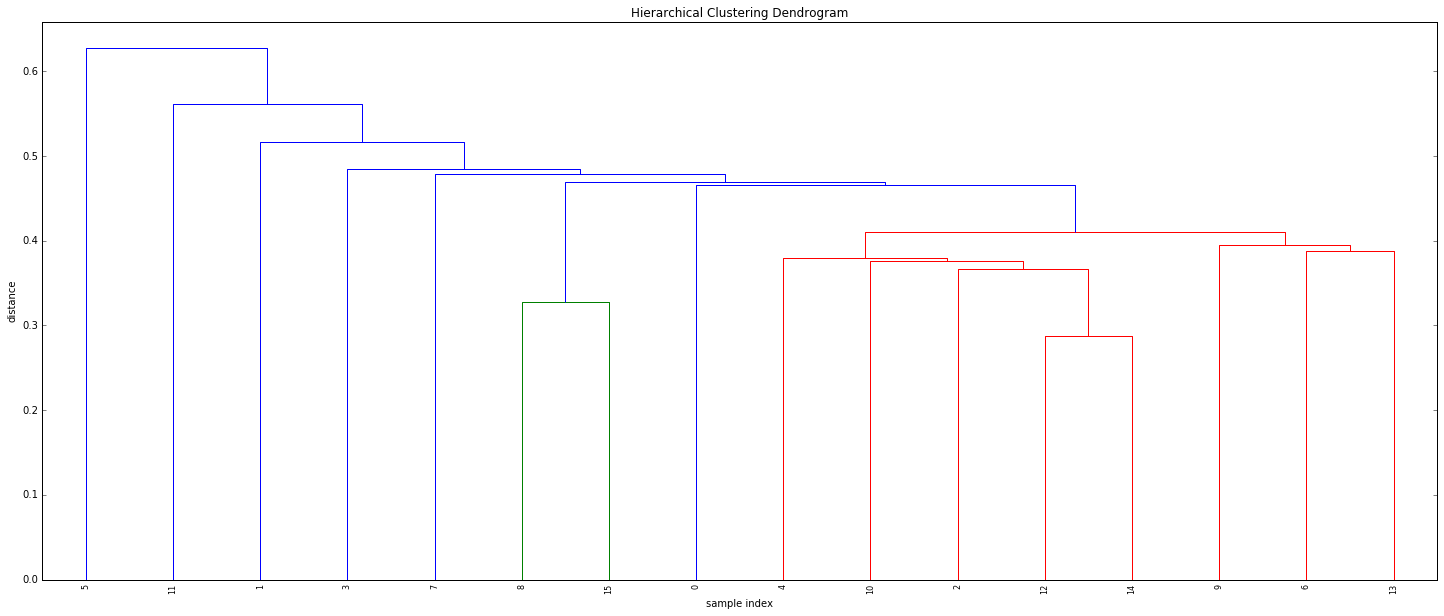

0: license

1: multi

2: apple

3: capitalization

4: zip

5: generation

6: eiffel

7: trademark

8: telephone

9: vendor

10: gnome

11: architecture

12: commodore

13: java

14: macintosh

15: telegraph

(4, 100)


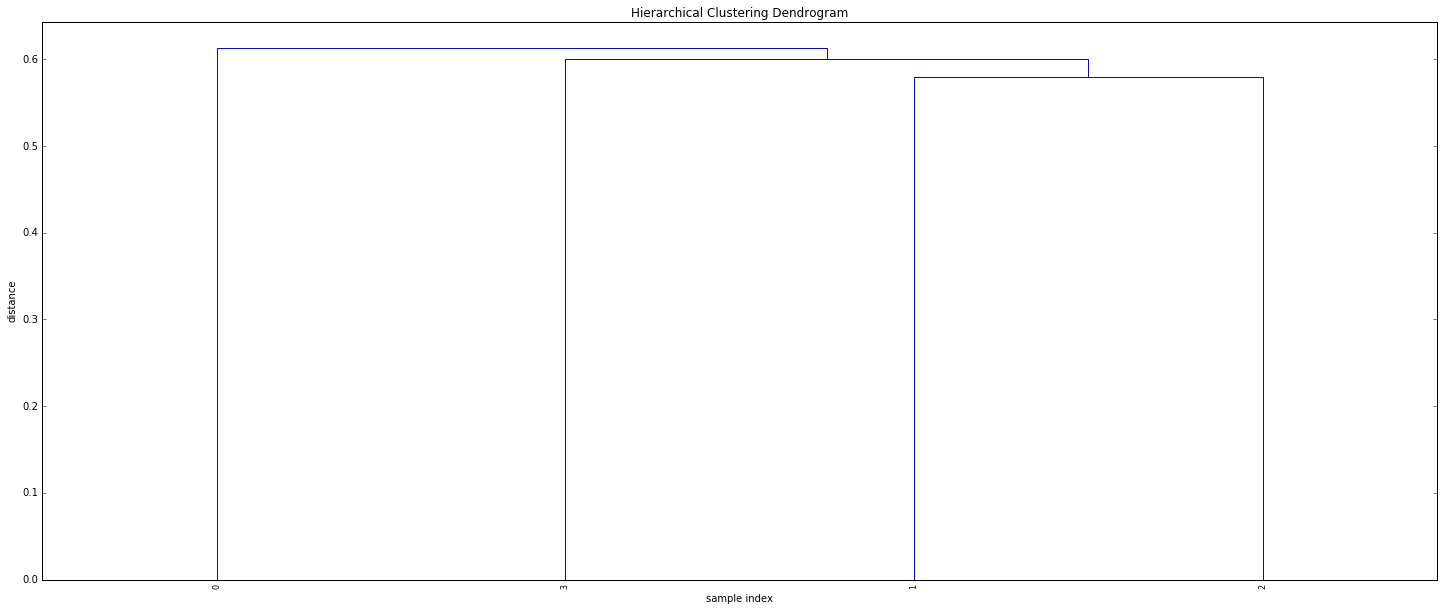

0: aim

1: audio

2: license

3: custom

(7, 100)


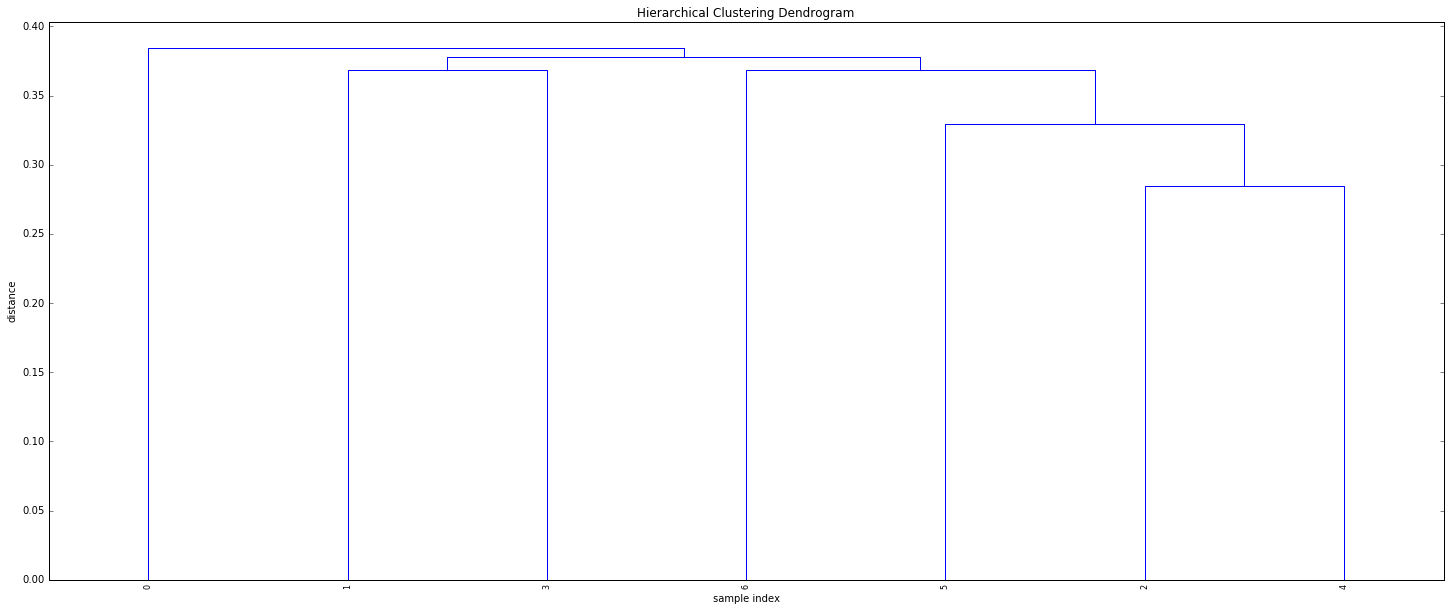

0: boards

1: windows

2: fonts

3: servers

4: printers

5: tools

6: machines

(6, 100)


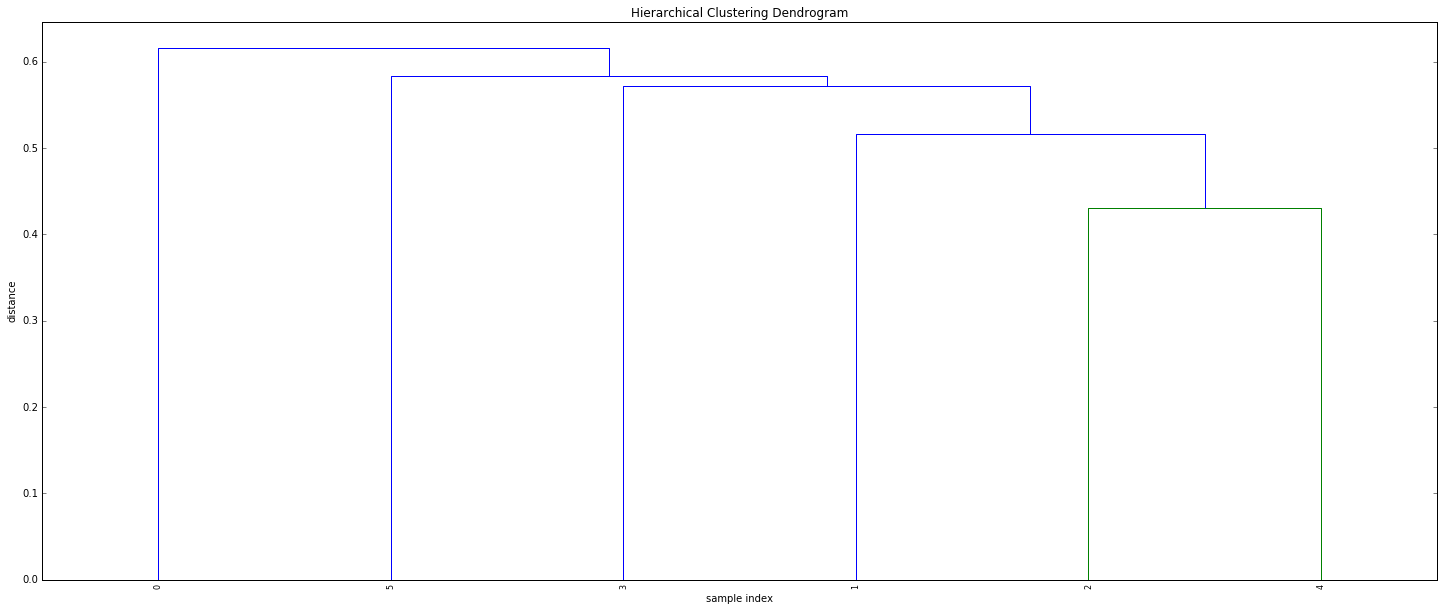

0: cross

1: brake

2: steer

3: groove

4: kick

5: kitchen

(28, 100)


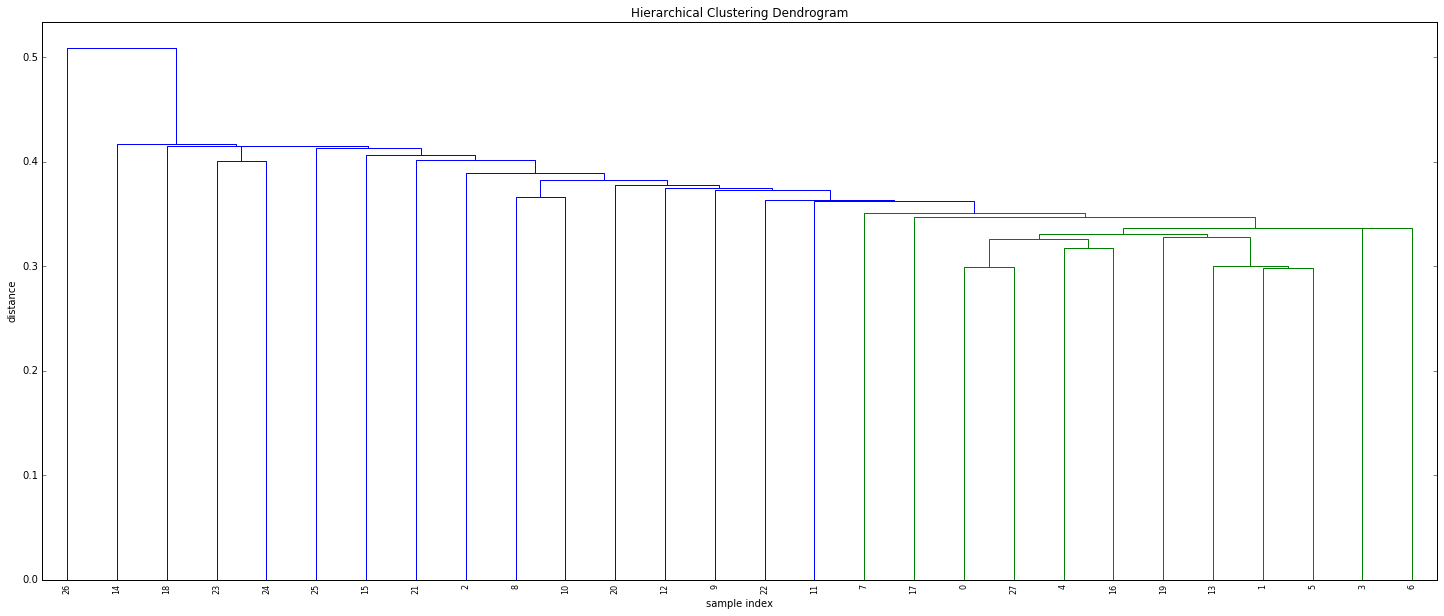

0: walking

1: stepping

2: winding

3: spinning

4: catching

5: pulling

6: swinging

7: hanging

8: punching

9: driving

10: tumbling

11: riding

12: resting

13: blowing

14: sitting

15: waving

16: kicking

17: cutting

18: moving

19: rolling

20: climbing

21: picking

22: lifting

23: washing

24: piercing

25: lightning

26: facing

27: jumping

(10, 100)


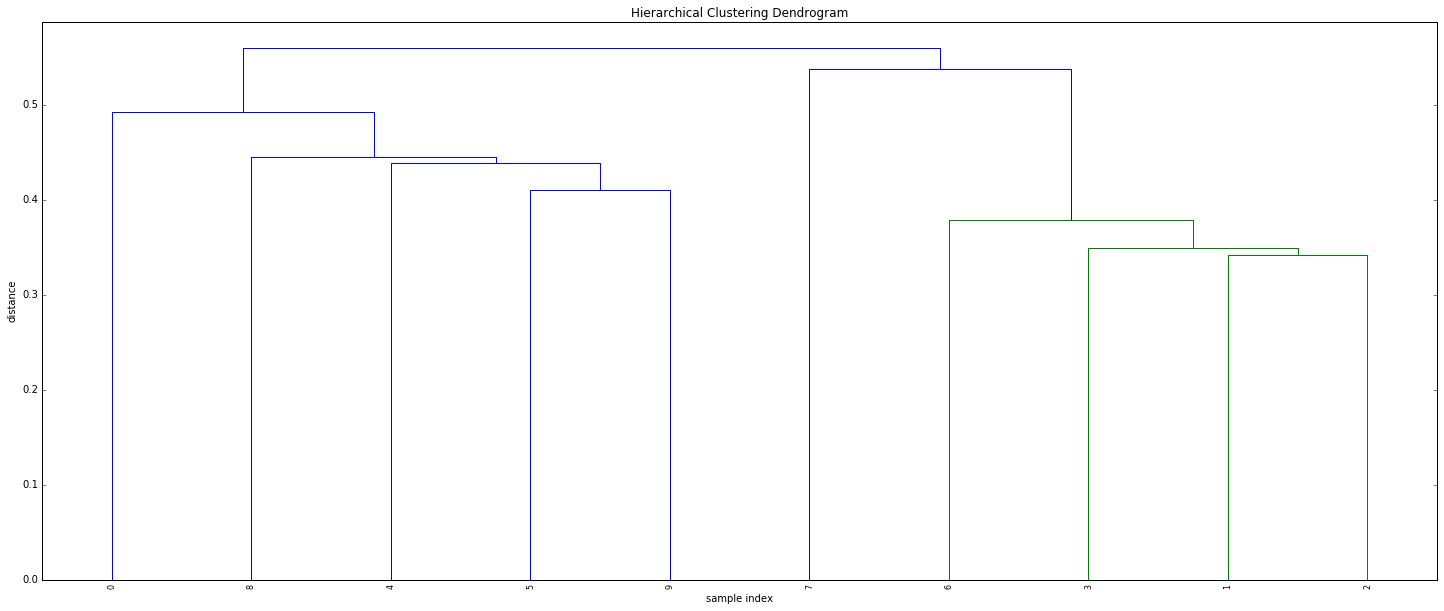

0: ride

1: back

2: down

3: forward

4: doorway

5: belly

6: away

7: front

8: hat

9: bite

(157, 100)


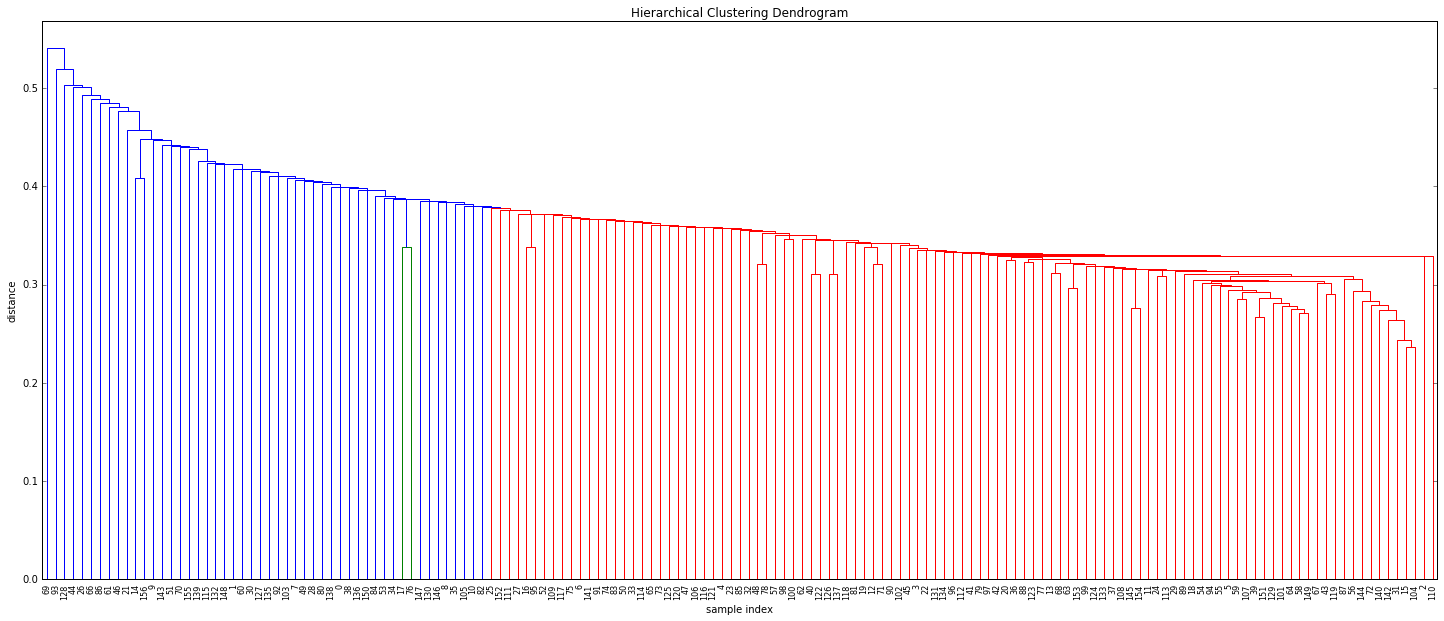

0: chariot

1: shot

2: deck

3: rod

4: skate

5: shoe

6: pitch

7: touch

8: ground

9: cut

10: thumb

11: glide

12: jaw

13: broom

14: sky

15: chest

16: window

17: bike

18: pile

19: hind

20: snap

21: posture

22: hat

23: grip

24: plate

25: knock

26: midnight

27: snake

28: knot

29: foot

30: target

31: shoulder

32: smash

33: bat

34: rotate

35: bar

36: button

37: pole

38: patch

39: bag

40: slide

41: trap

42: arrow

43: tray

44: side

45: bone

46: body

47: fence

48: bounce

49: oval

50: bare

51: mirror

52: hammer

53: arm

54: ribbon

55: wire

56: finger

57: dive

58: knife

59: cord

60: foreground

61: barrier

62: punch

63: cart

64: bolt

65: trunk

66: path

67: comb

68: roller

69: motorbike

70: fault

71: ribs

72: bow

73: jumping

74: mouth

75: pack

76: swimming

77: wall

78: sweep

79: hook

80: javelin

81: blank

82: wrap

83: thick

84: eye

85: fabric

86: top

87: tail

88: paint

89: curtain

90: brick

91: fork

92: pencil



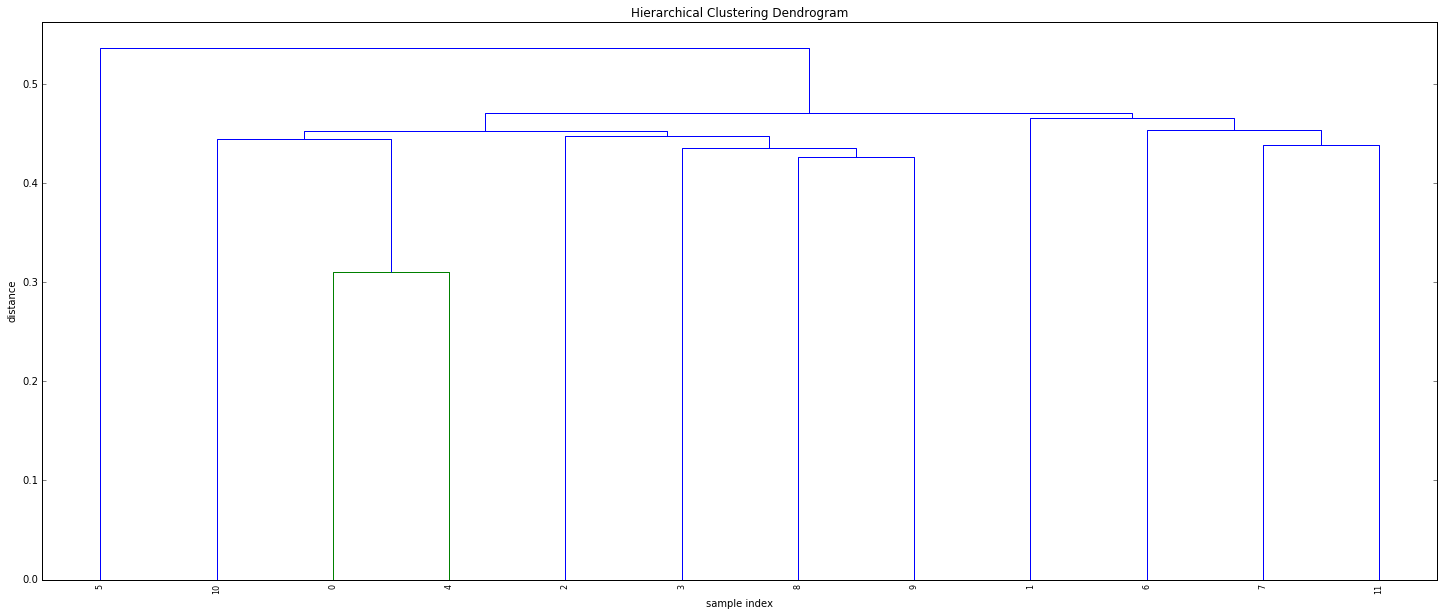

0: helmet

1: bat

2: cut

3: locked

4: shield

5: stranded

6: smooth

7: twisted

8: bed

9: sight

10: belt

11: curled

(5, 100)


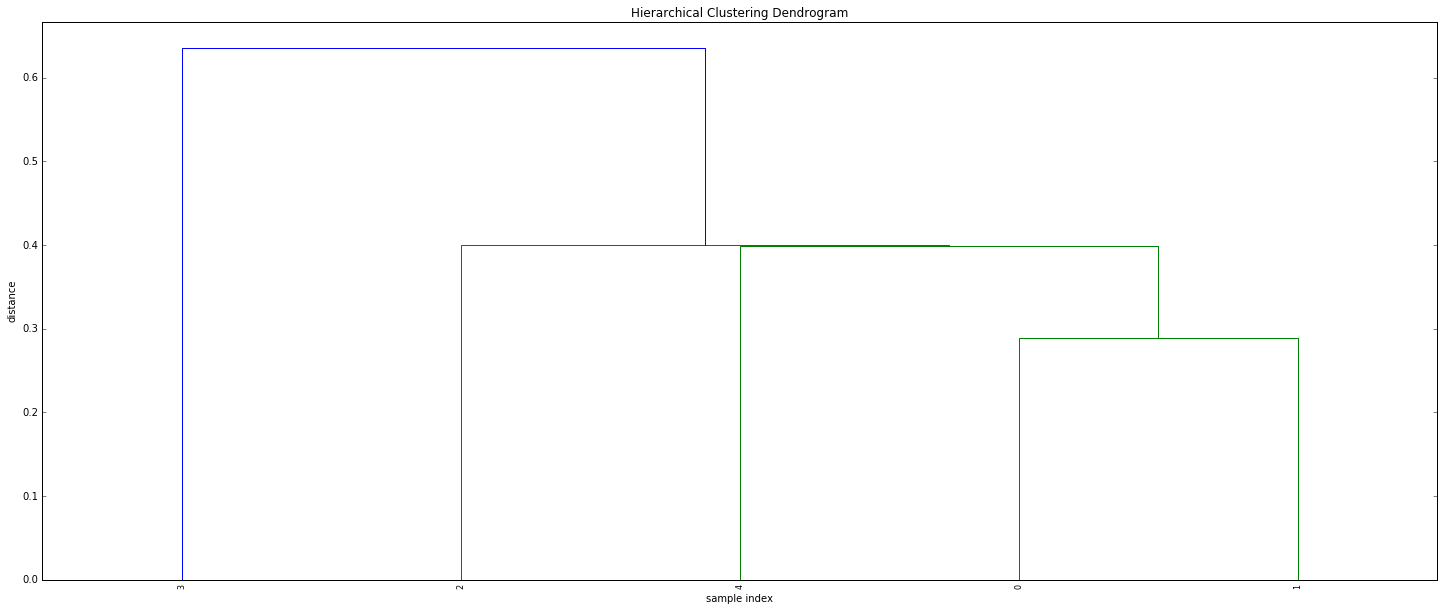

0: blade

1: curved

2: curled

3: seated

4: dirt

(3, 100)


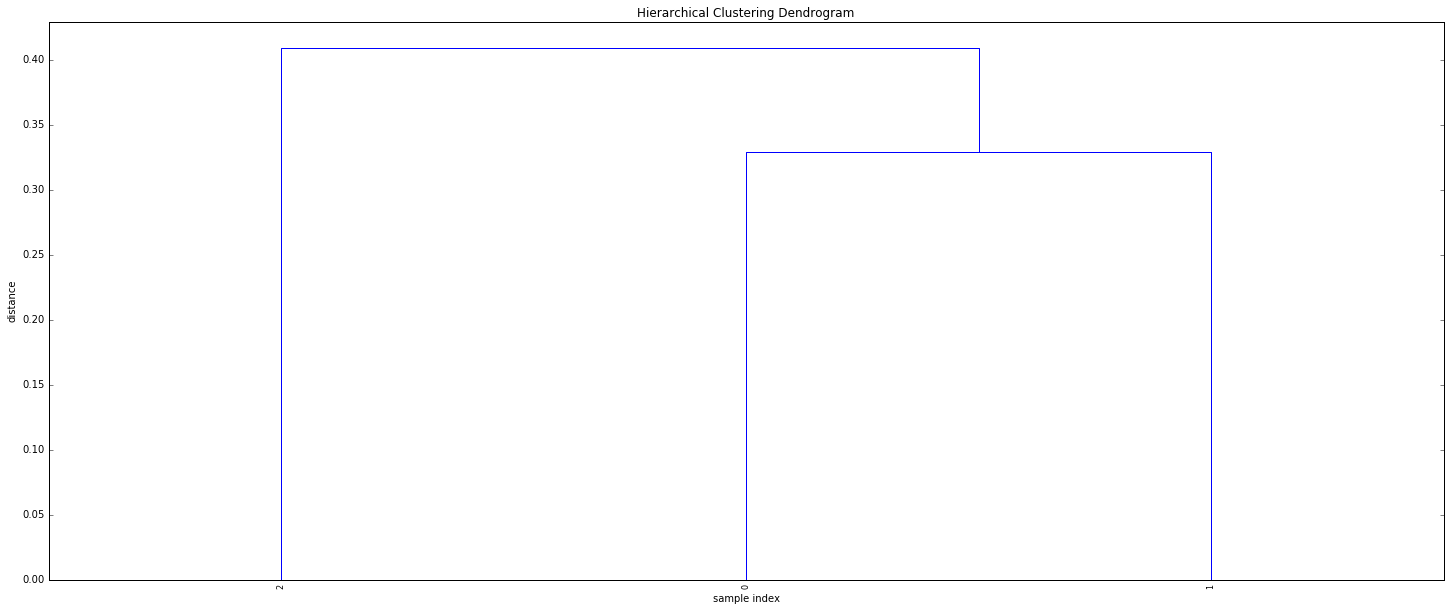

0: down

1: off

2: up

(27, 100)


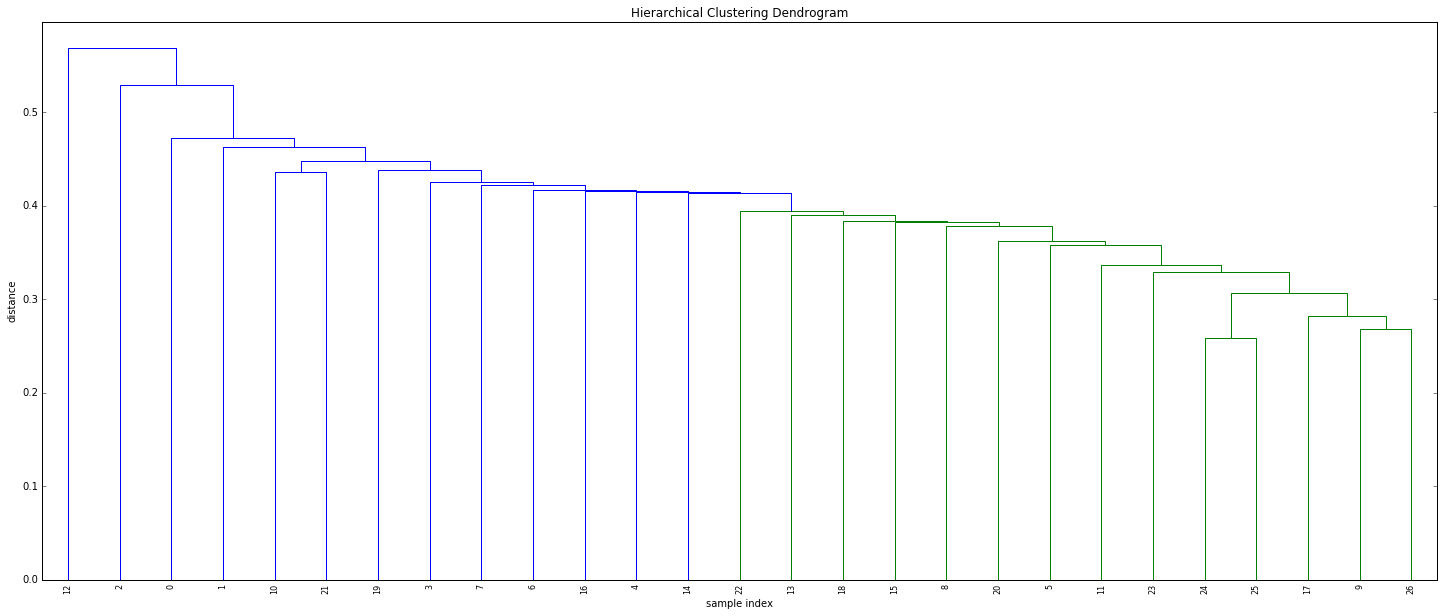

0: shot

1: mantle

2: deep

3: jump

4: chin

5: ink

6: stitch

7: mud

8: window

9: legs

10: crest

11: wheel

12: head

13: shell

14: spot

15: mouth

16: sink

17: ear

18: shine

19: trash

20: waist

21: sleeve

22: shotgun

23: yarn

24: rope

25: nose

26: teeth

(56, 100)


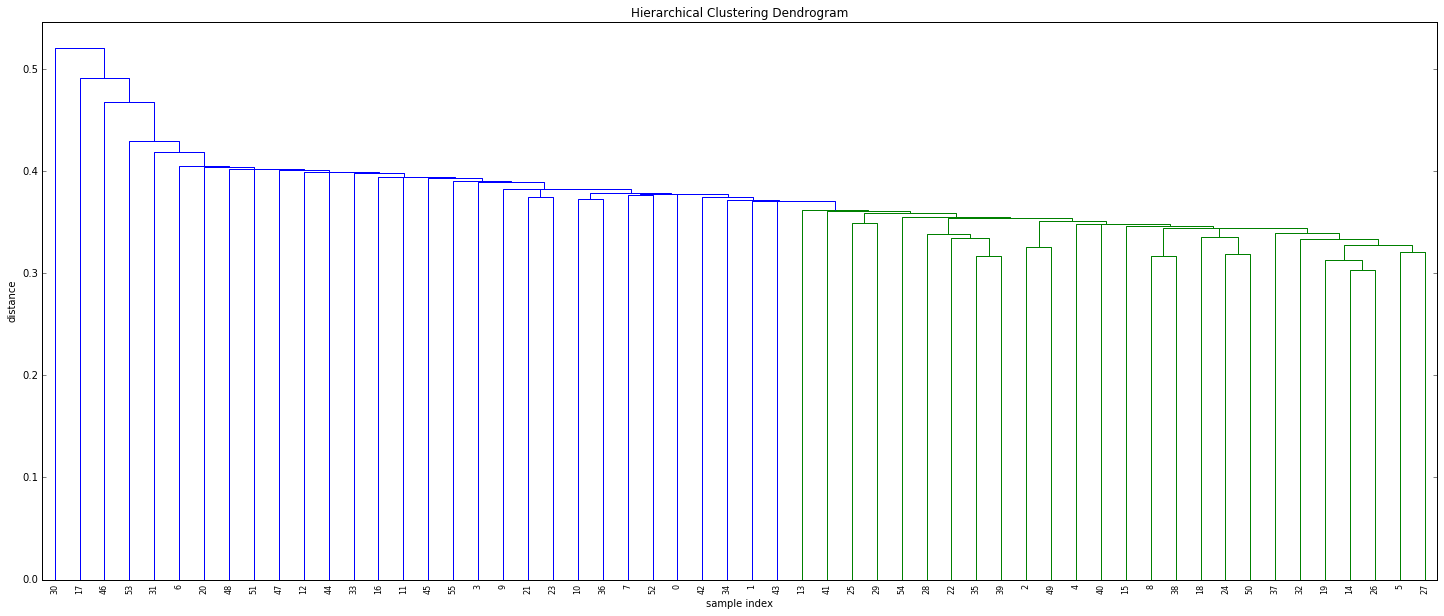

0: shield

1: flat

2: wall

3: skip

4: puck

5: saddle

6: twist

7: upright

8: pole

9: ball

10: bare

11: shoe

12: triple

13: sharp

14: curved

15: rough

16: blow

17: top

18: leg

19: spiral

20: forehead

21: paint

22: lamp

23: wrapped

24: legs

25: cabin

26: thin

27: plate

28: needle

29: bed

30: opposite

31: hull

32: loose

33: blank

34: cart

35: cymbal

36: touching

37: stick

38: foot

39: pedal

40: hole

41: downward

42: nail

43: thread

44: stiff

45: wooden

46: inside

47: cap

48: mask

49: roof

50: nose

51: axe

52: elbow

53: tongue

54: straight

55: cleaning

(11, 100)


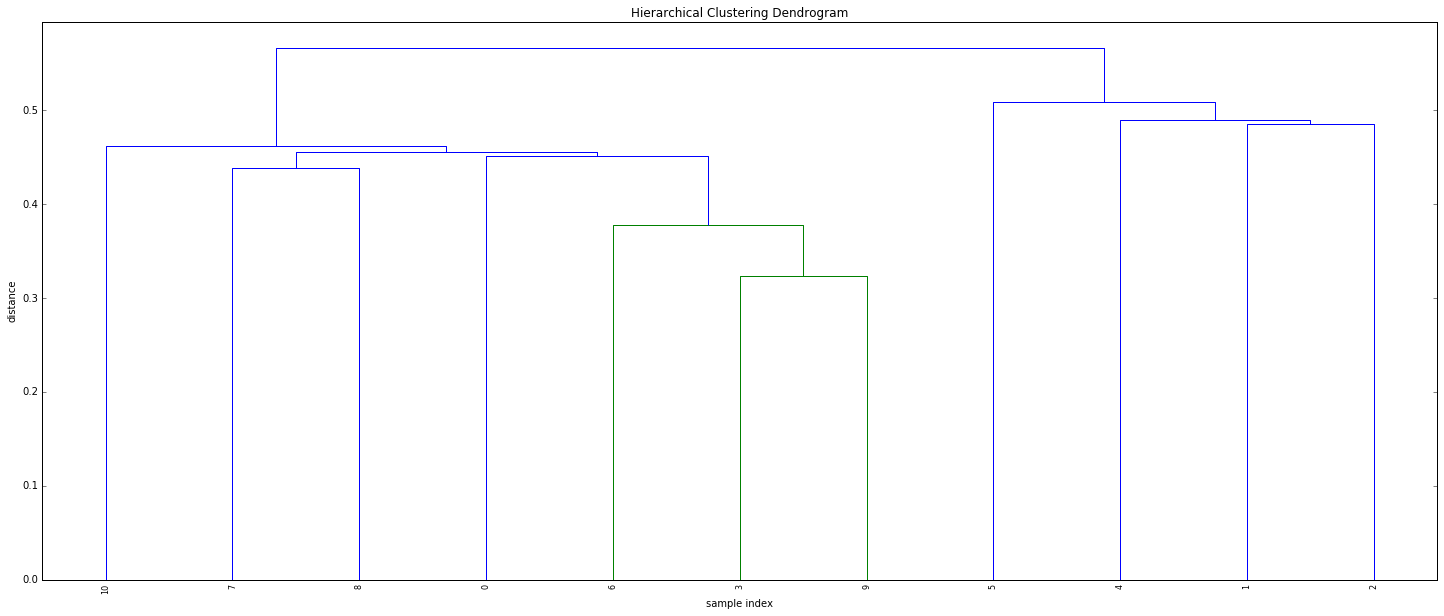

0: wagon

1: off

2: inside

3: wound

4: up

5: behind

6: brush

7: blank

8: lever

9: ear

10: belt

(14, 100)


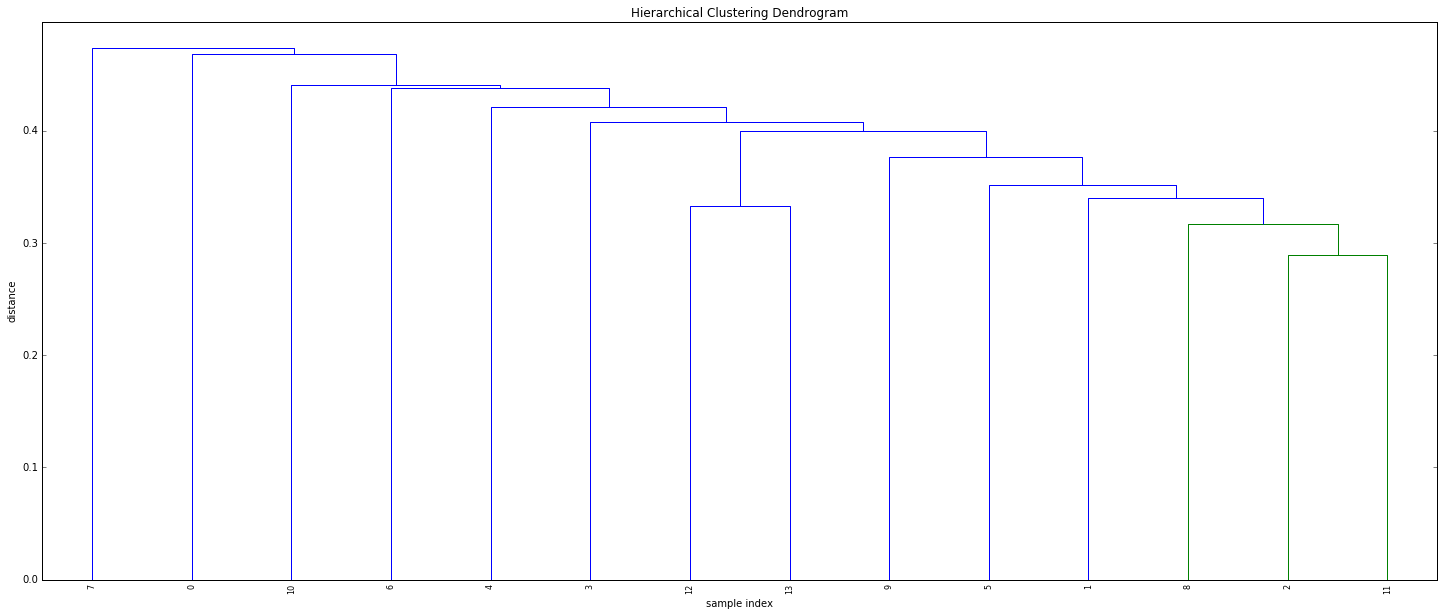

0: shadows

1: ropes

2: wires

3: flames

4: wooden

5: fins

6: sweep

7: rolls

8: tires

9: sleeves

10: hands

11: wheels

12: legs

13: wings

(43, 100)


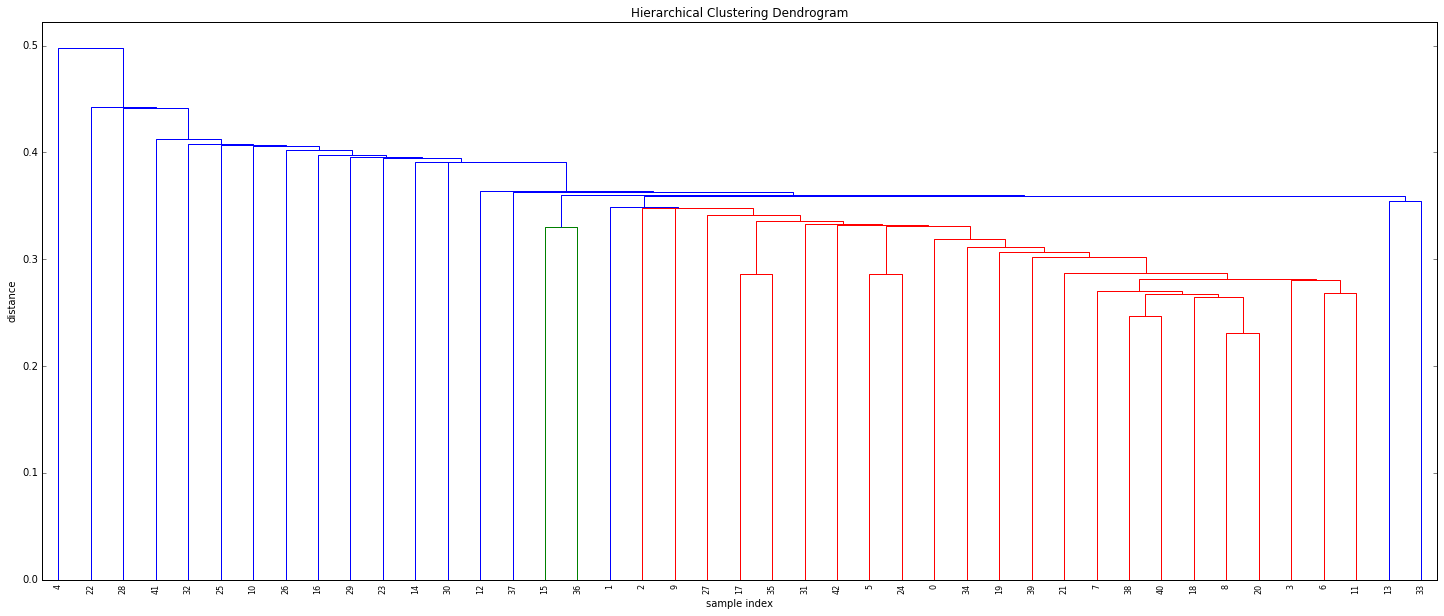

0: stones

1: bets

2: sticks

3: arrows

4: reins

5: boots

6: lips

7: bones

8: knees

9: limbs

10: checkers

11: fingers

12: spots

13: buttons

14: lights

15: bows

16: doors

17: plates

18: legs

19: fists

20: shoulders

21: toes

22: jacks

23: sideways

24: nails

25: caps

26: backwards

27: tails

28: hands

29: bubbles

30: stairs

31: wings

32: kitchen

33: pedals

34: balls

35: holes

36: knives

37: shots

38: teeth

39: bullets

40: ears

41: anchor

42: clothes

(38, 100)


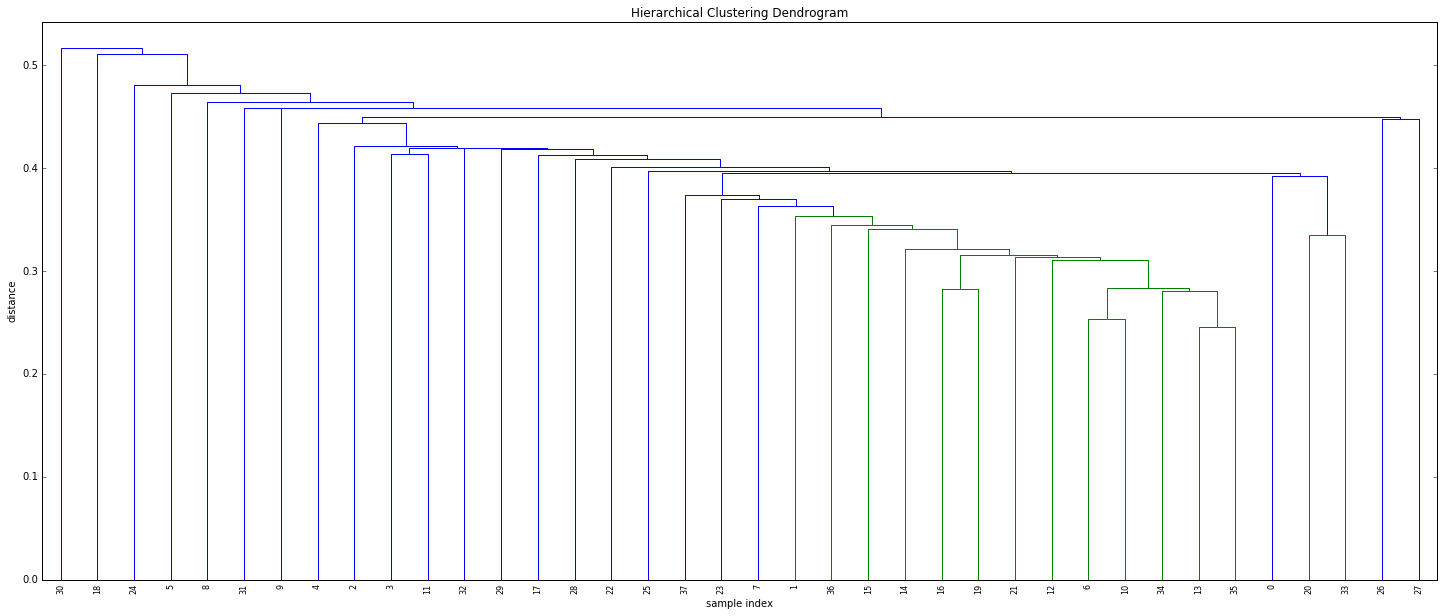

0: patriotism

1: agitation

2: whig

3: imperialist

4: separatist

5: affiliation

6: imperialism

7: sexism

8: intellectualism

9: temperance

10: nationalism

11: superpower

12: colonialism

13: communism

14: democracy

15: activism

16: racism

17: subversion

18: globalization

19: racist

20: injustice

21: dissent

22: bourgeois

23: mercantilism

24: movement

25: bureaucracy

26: stance

27: hostility

28: unity

29: segregation

30: brotherhood

31: animosity

32: solidarity

33: pacifism

34: capitalism

35: socialism

36: feminism

37: propaganda

(3, 100)


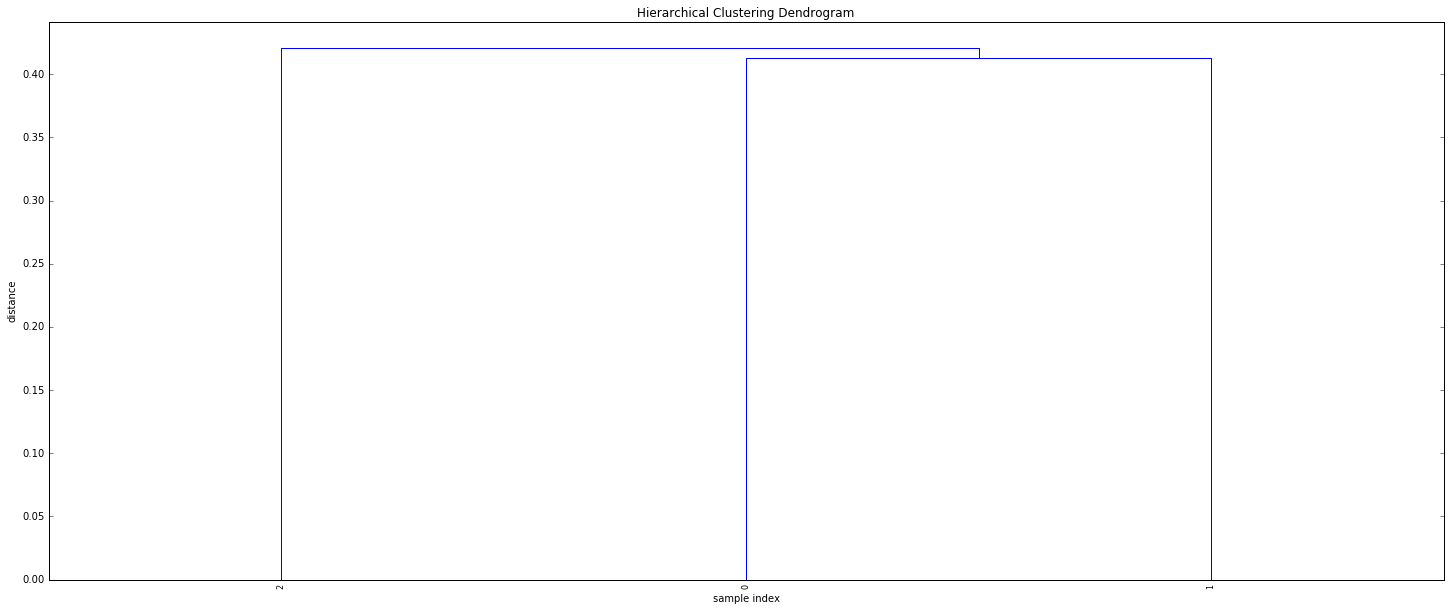

0: bourgeoisie

1: oppression

2: racism

(19, 100)


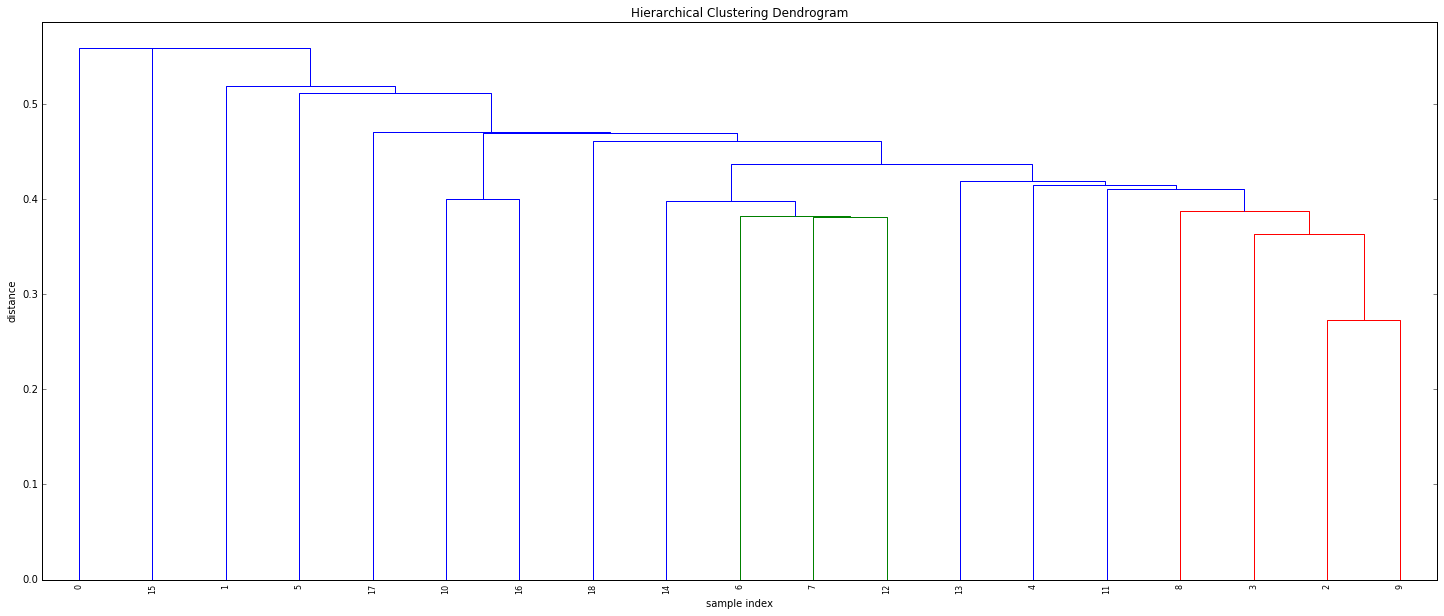

0: empowerment

1: suspicious

2: nationalist

3: nationalistic

4: pro

5: peaceful

6: political

7: cultural

8: conservative

9: militant

10: aristocratic

11: anti

12: social

13: patriotic

14: racial

15: strong

16: elite

17: feudal

18: agrarian

(5, 100)


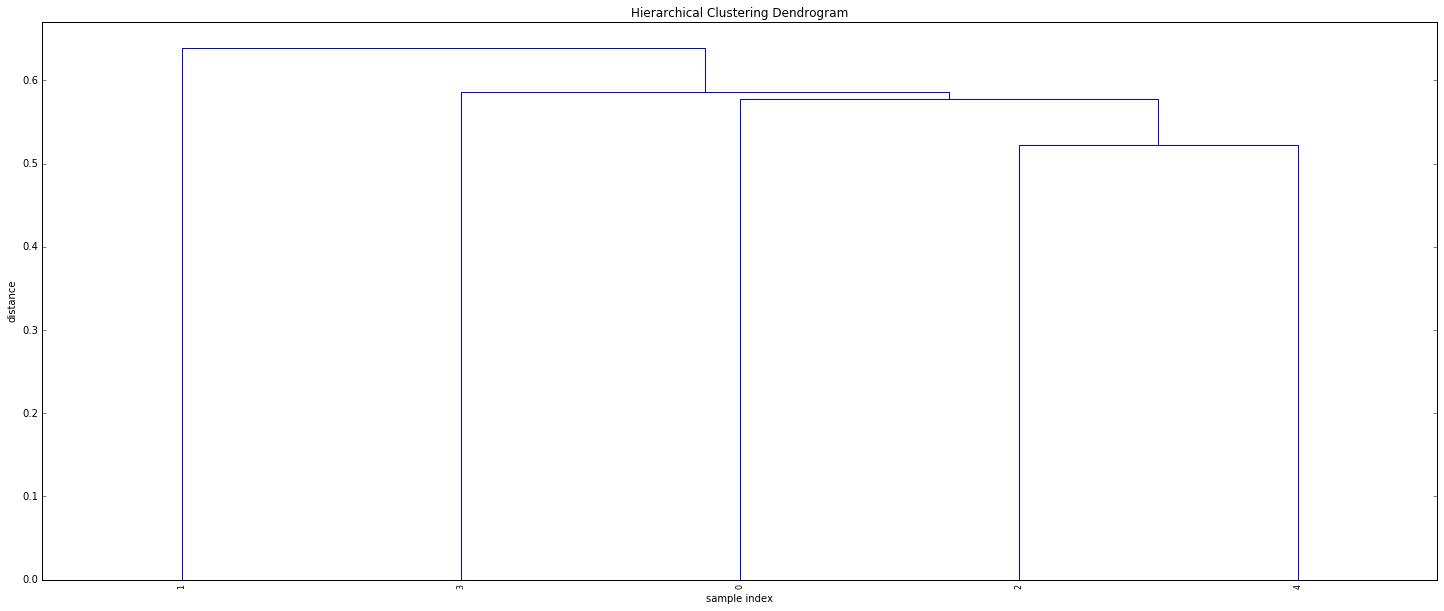

0: politics

1: towards

2: stances

3: greens

4: movements

(4, 100)


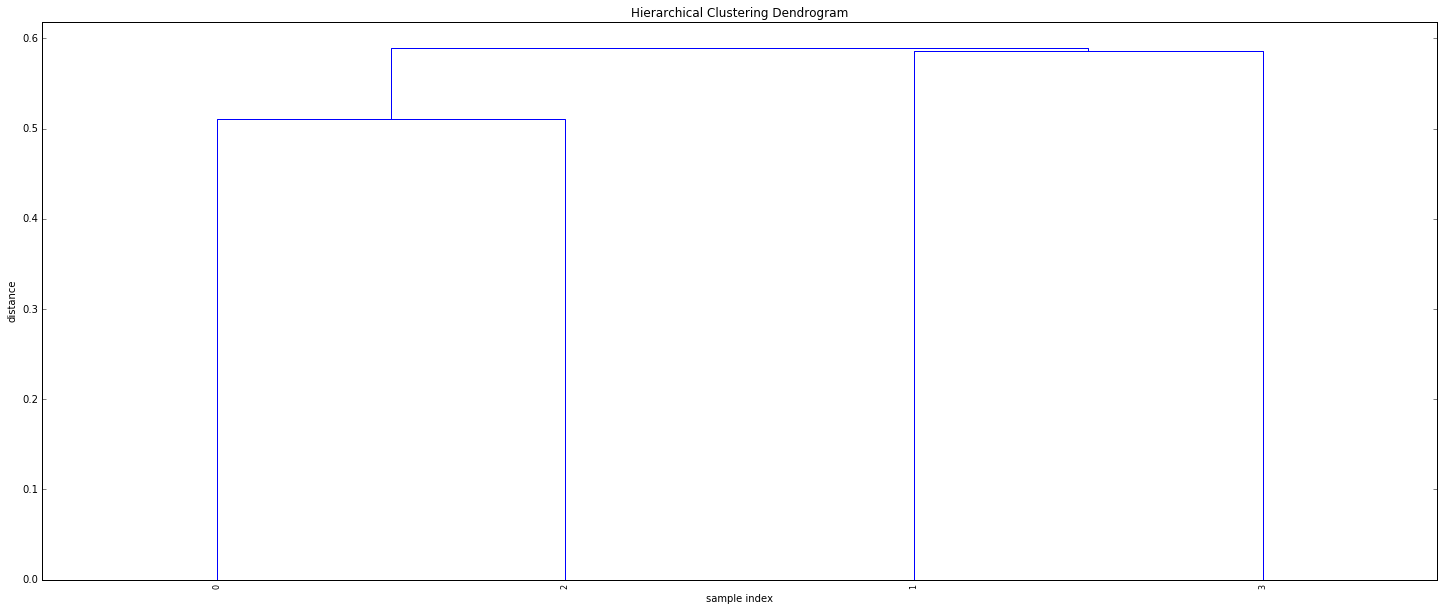

0: ring

1: counting

2: string

3: overlapping

(22, 100)


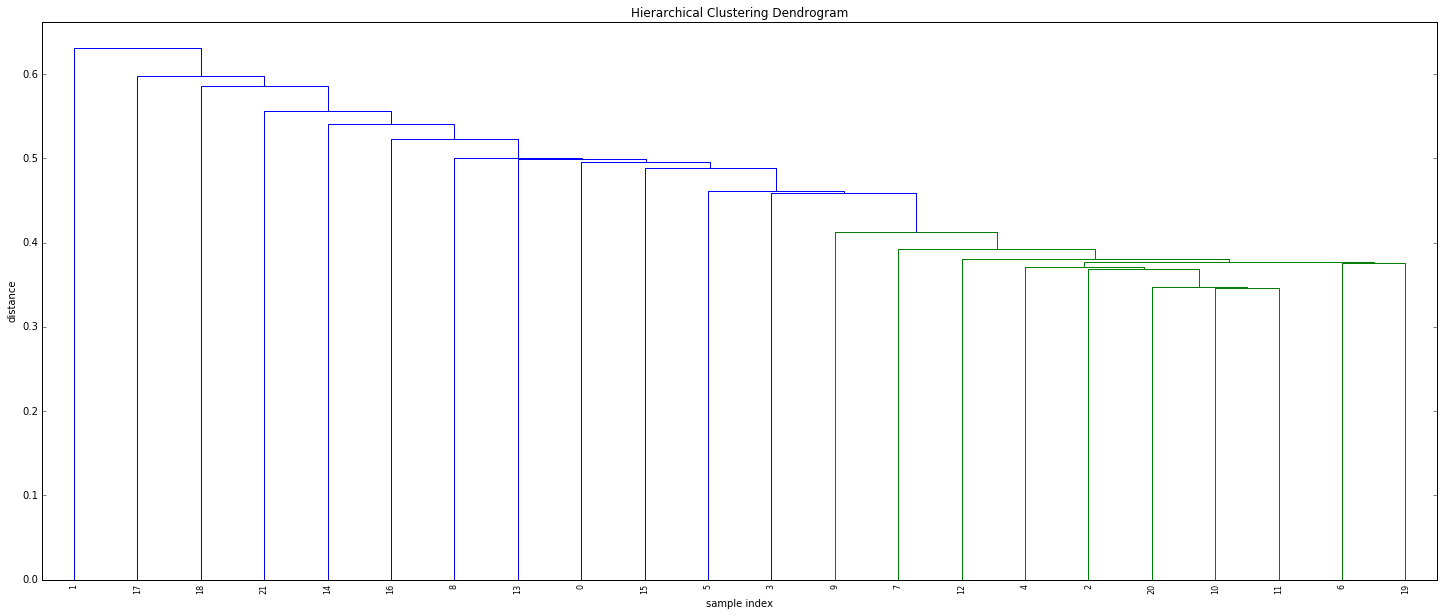

0: random

1: number

2: comma

3: table

4: ring

5: array

6: row

7: intersection

8: pattern

9: tile

10: rectangle

11: triangle

12: string

13: step

14: base

15: line

16: coin

17: class

18: semi

19: column

20: dot

21: bond

(7, 100)


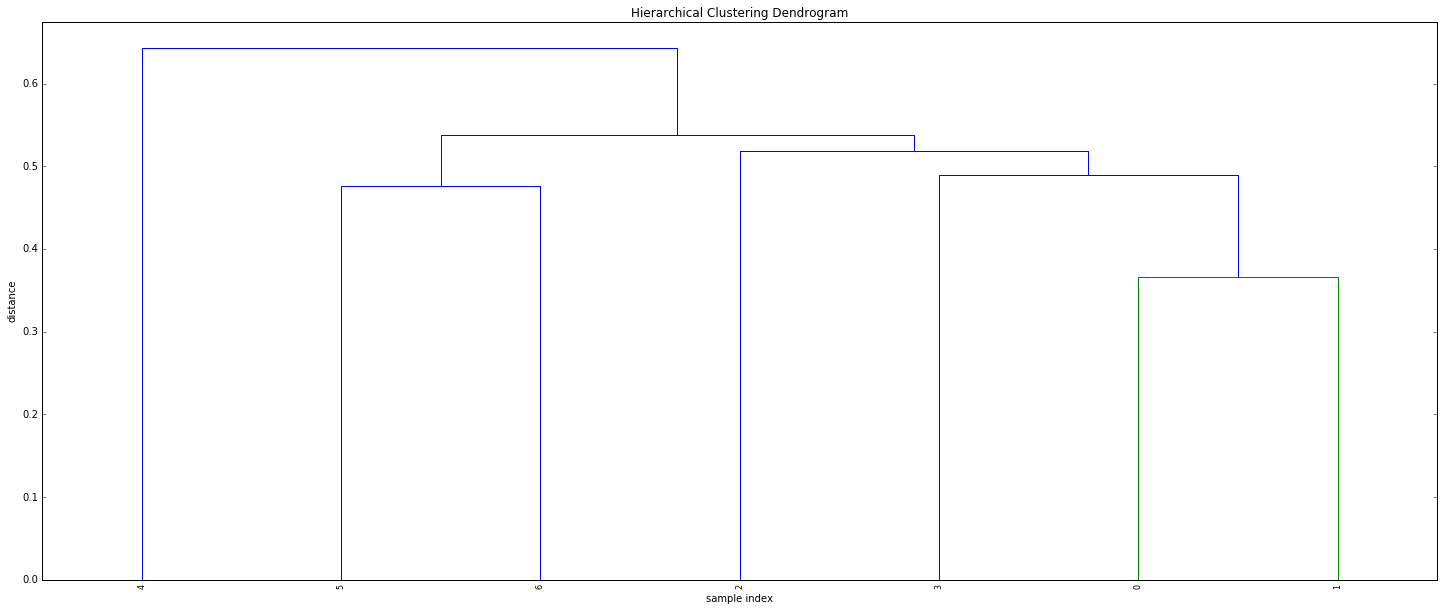

0: dots

1: pairs

2: random

3: uniform

4: note

5: shape

6: circle

(18, 100)


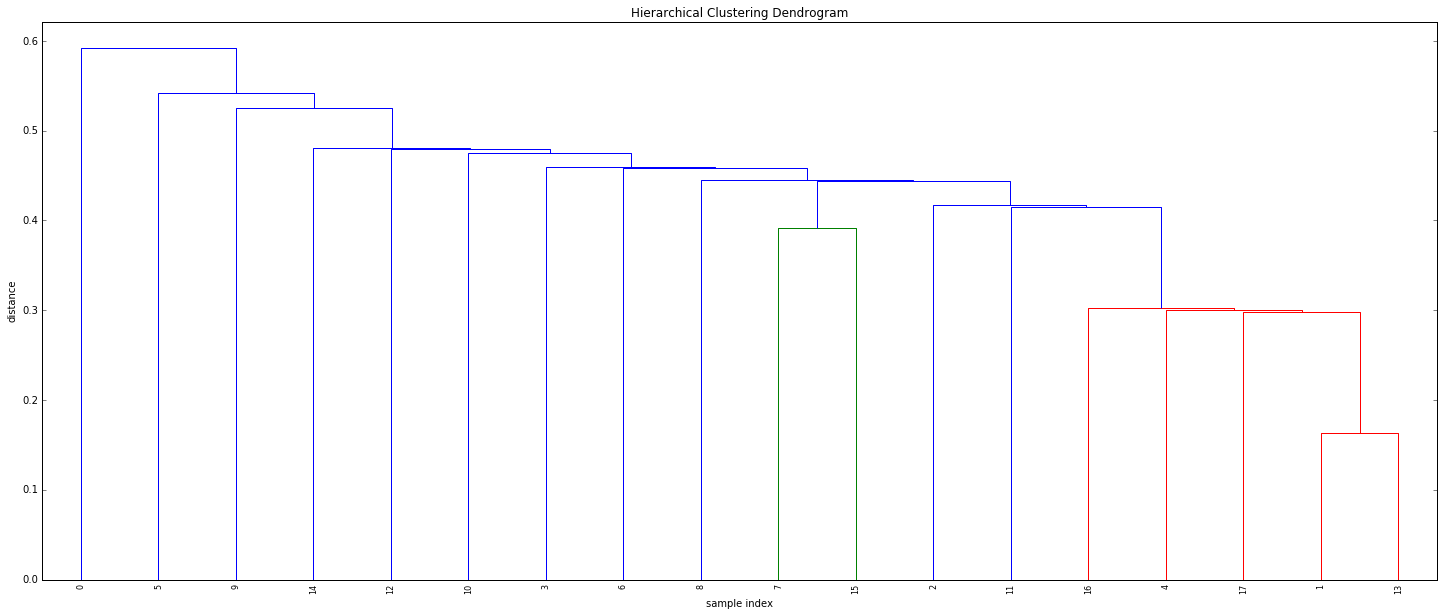

0: semi

1: vertical

2: double

3: random

4: diagonal

5: overlap

6: uniform

7: variable

8: single

9: equal

10: empty

11: pair

12: table

13: horizontal

14: odd

15: array

16: dot

17: circular

(3, 100)


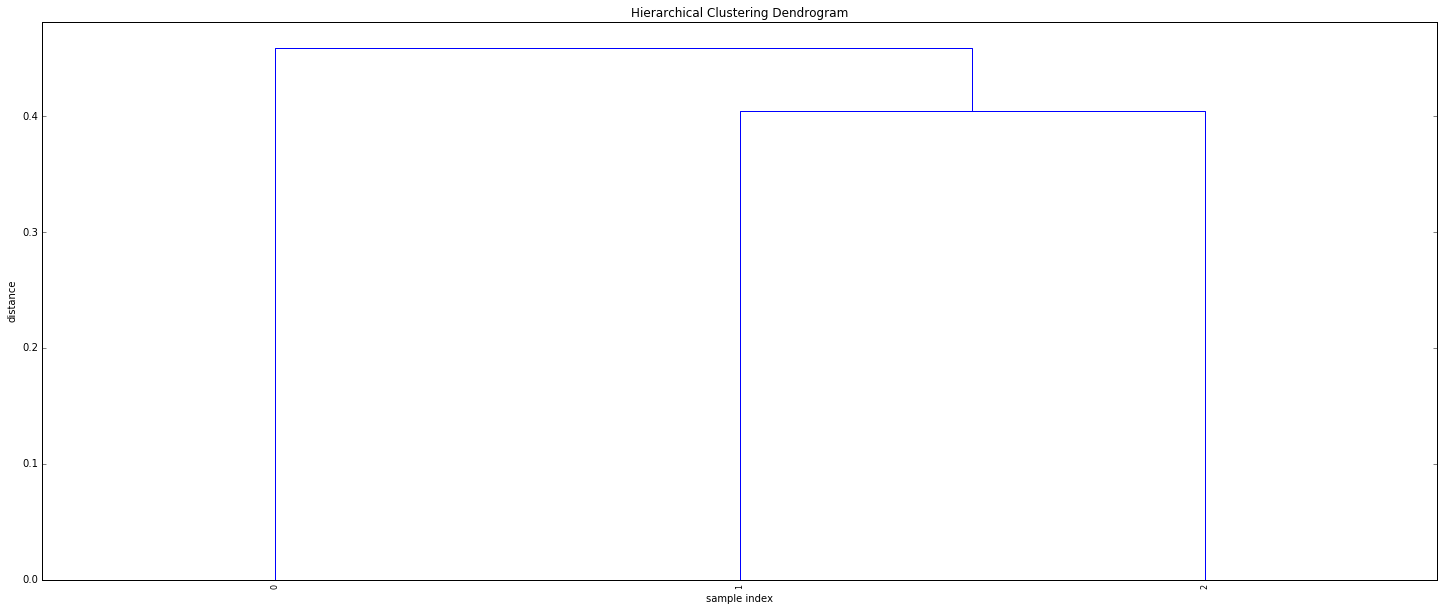

0: shapes

1: rows

2: faces

(17, 100)


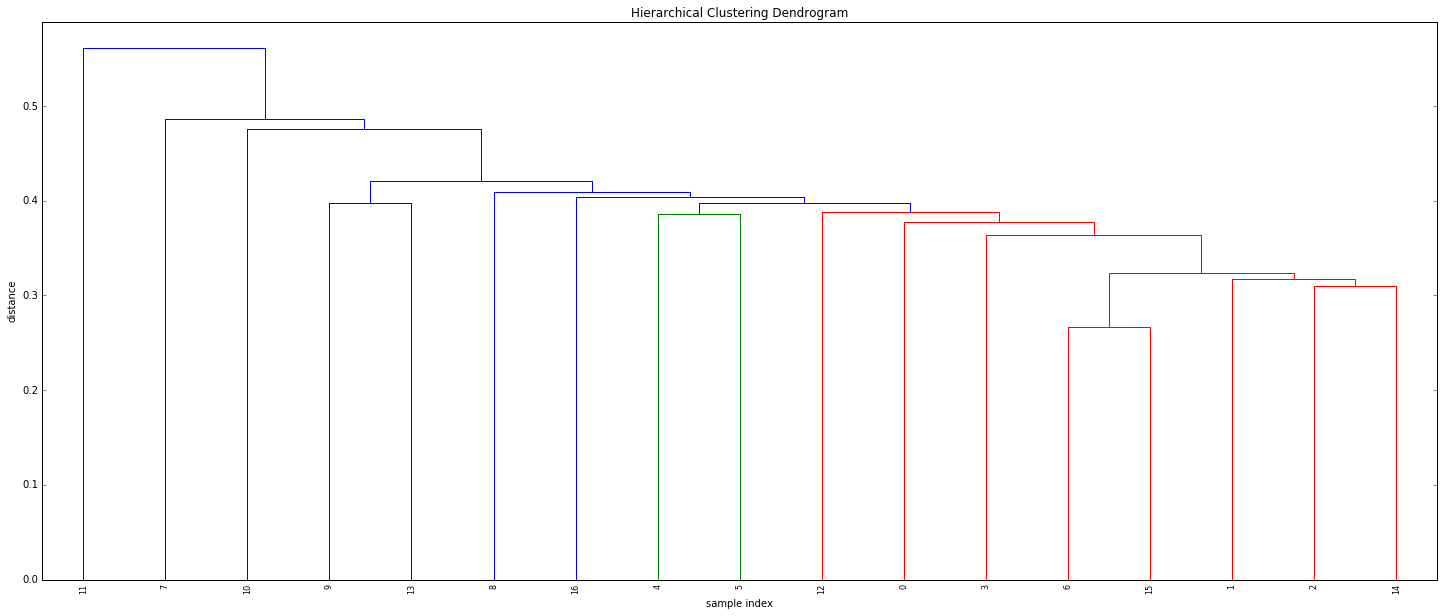

0: tables

1: tiles

2: rows

3: blocks

4: angles

5: scales

6: keys

7: lines

8: colors

9: steps

10: numbers

11: stars

12: sets

13: directions

14: squares

15: strings

16: columns

(3, 100)


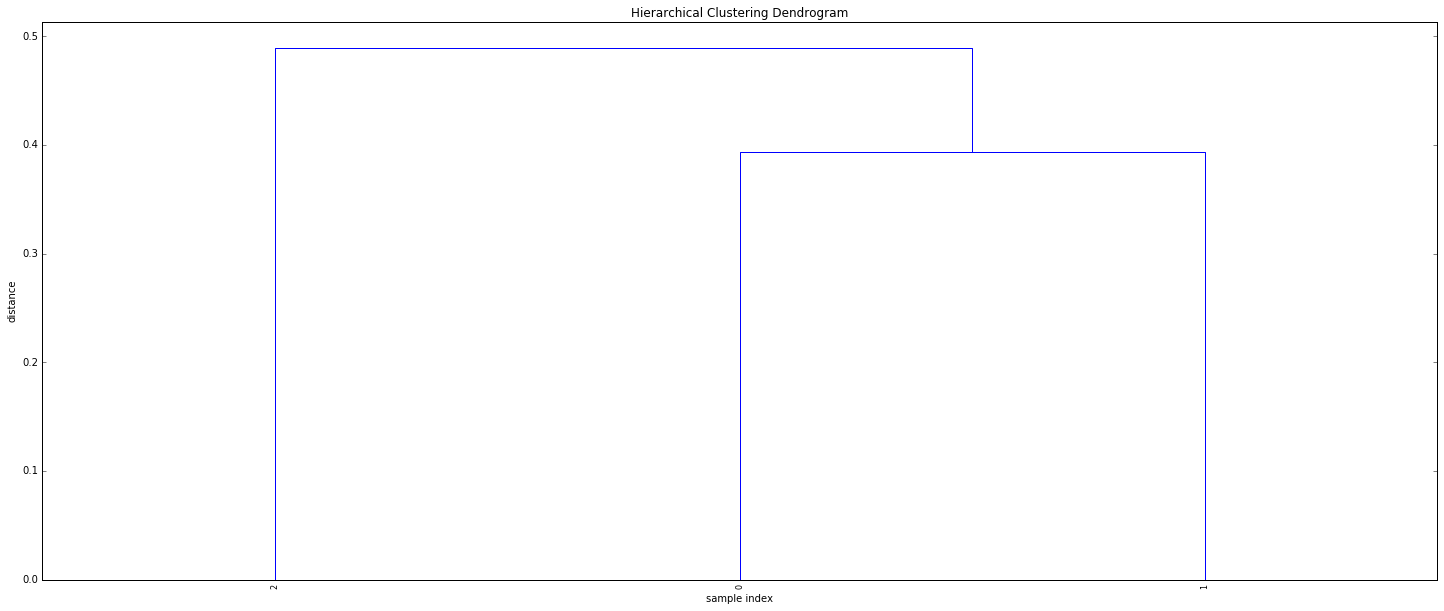

0: kiwi

1: dessert

2: cat

(8, 100)


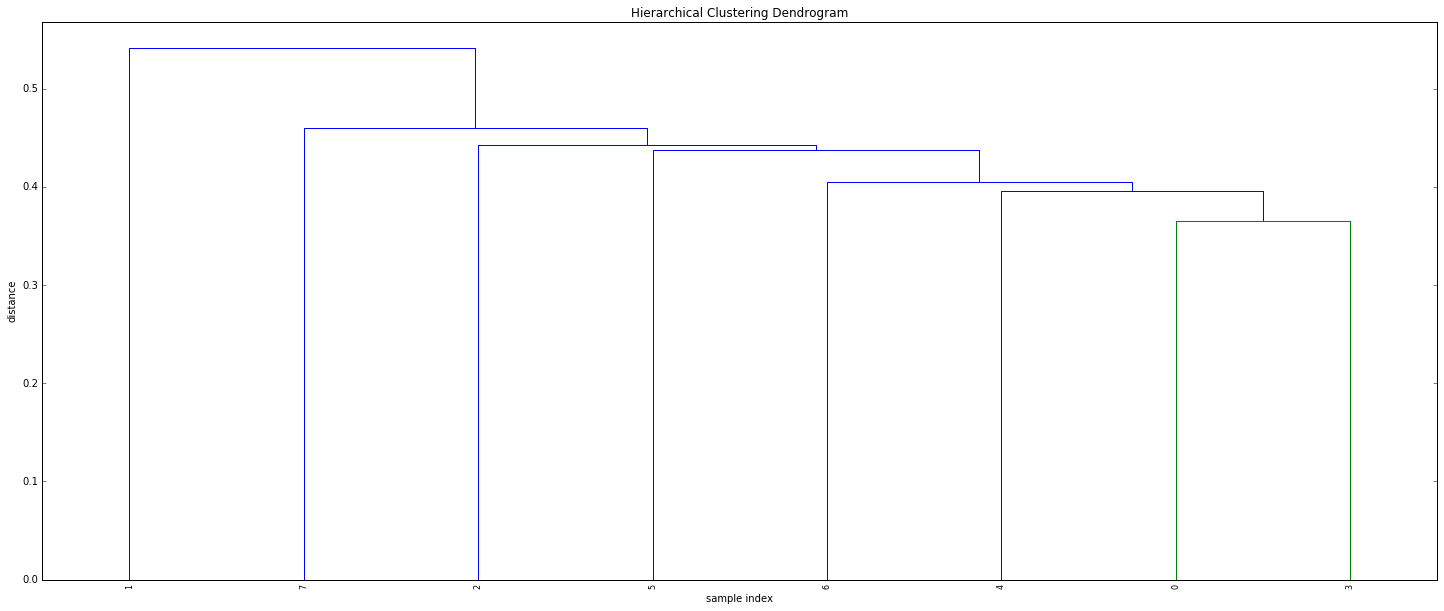

0: wearing

1: lettering

2: chasing

3: dressing

4: sleeping

5: pudding

6: prancing

7: carving

(8, 100)


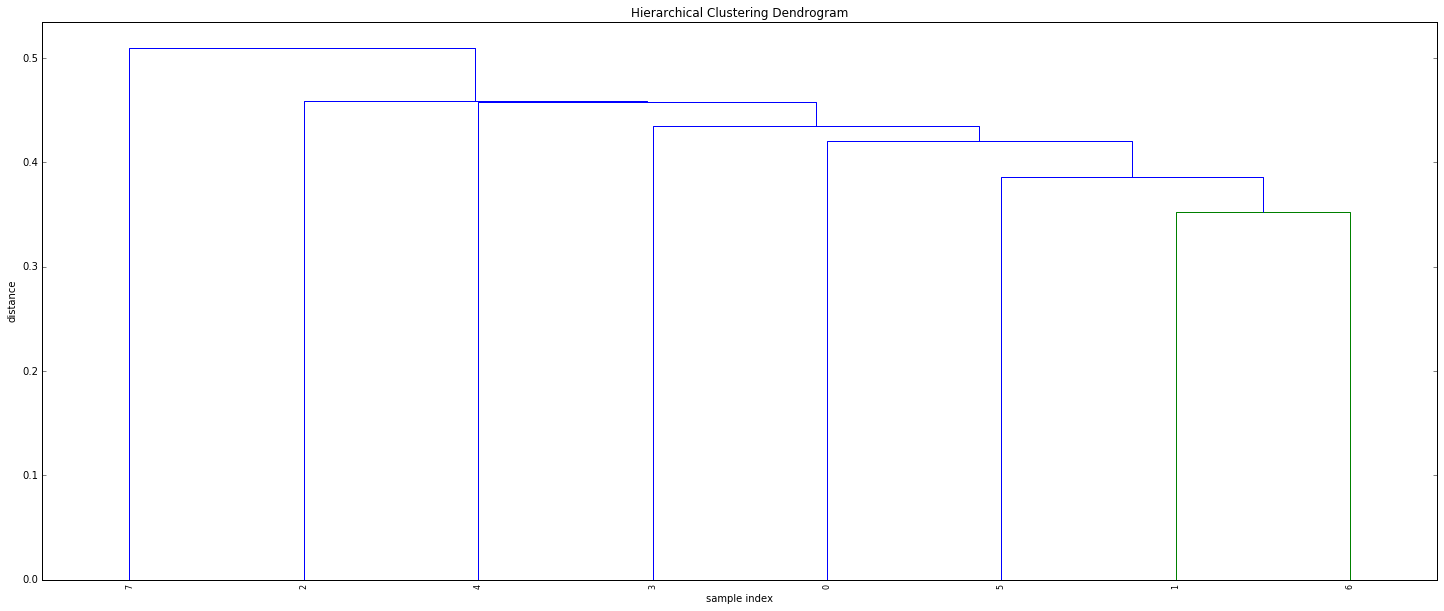

0: shirt

1: curly

2: woven

3: pie

4: bee

5: feather

6: lily

7: oblong

(162, 100)


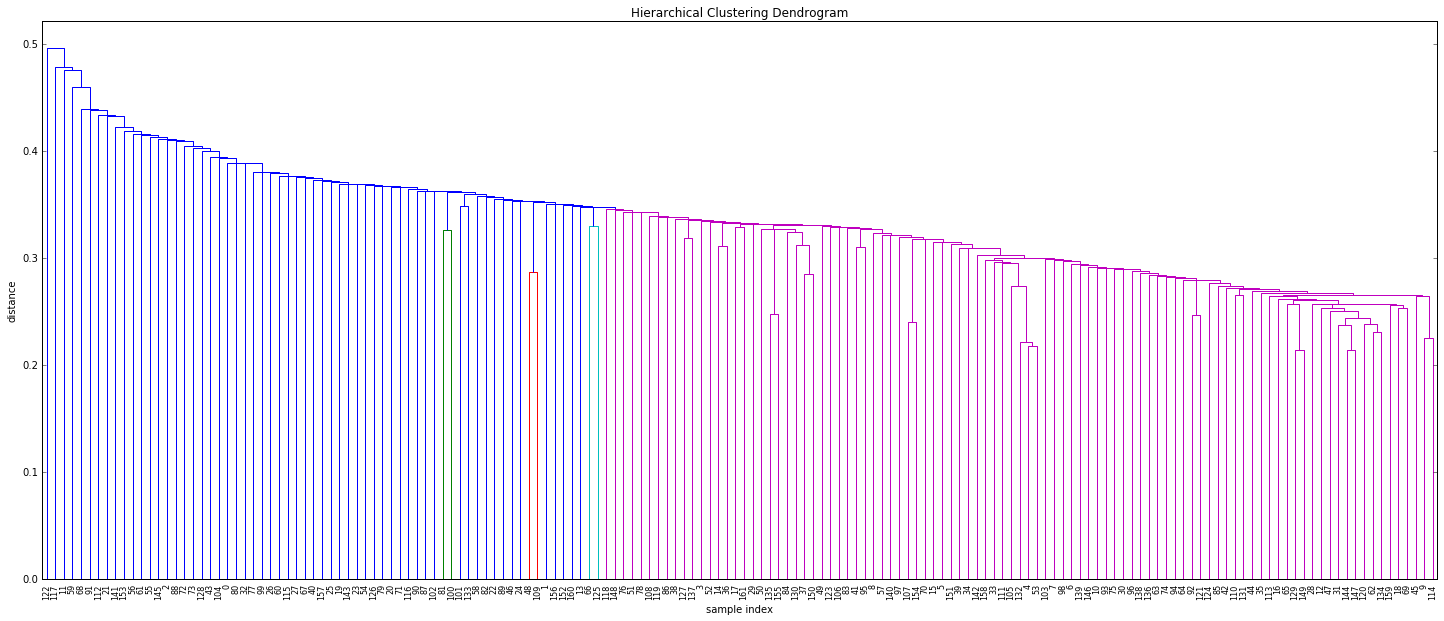

0: skeleton

1: camel

2: kilt

3: reptile

4: yellow

5: laurel

6: jackal

7: yew

8: carpet

9: crab

10: ham

11: blackface

12: cherry

13: jar

14: wood

15: orange

16: goose

17: knob

18: dessert

19: bear

20: dark

21: tentacle

22: giraffe

23: fancy

24: llama

25: doughnut

26: silver

27: skull

28: onion

29: pet

30: candy

31: pea

32: dinosaur

33: sand

34: bison

35: roast

36: clay

37: claw

38: turtle

39: hairy

40: tree

41: nut

42: vine

43: plumage

44: lobster

45: zebra

46: fist

47: beetle

48: candle

49: panda

50: shower

51: flower

52: leaf

53: purple

54: ice

55: fog

56: fountain

57: stalk

58: bird

59: tent

60: ass

61: eagle

62: pepper

63: dwarf

64: squirrel

65: leopard

66: stallion

67: plow

68: herd

69: stew

70: mule

71: knit

72: bronze

73: stone

74: tortoise

75: lemur

76: slender

77: miniature

78: wolf

79: kente

80: swallow

81: delicacy

82: owl

83: loaf

84: dagger

85: pot

86: cauldron

87: mist

88: ape

89: hors

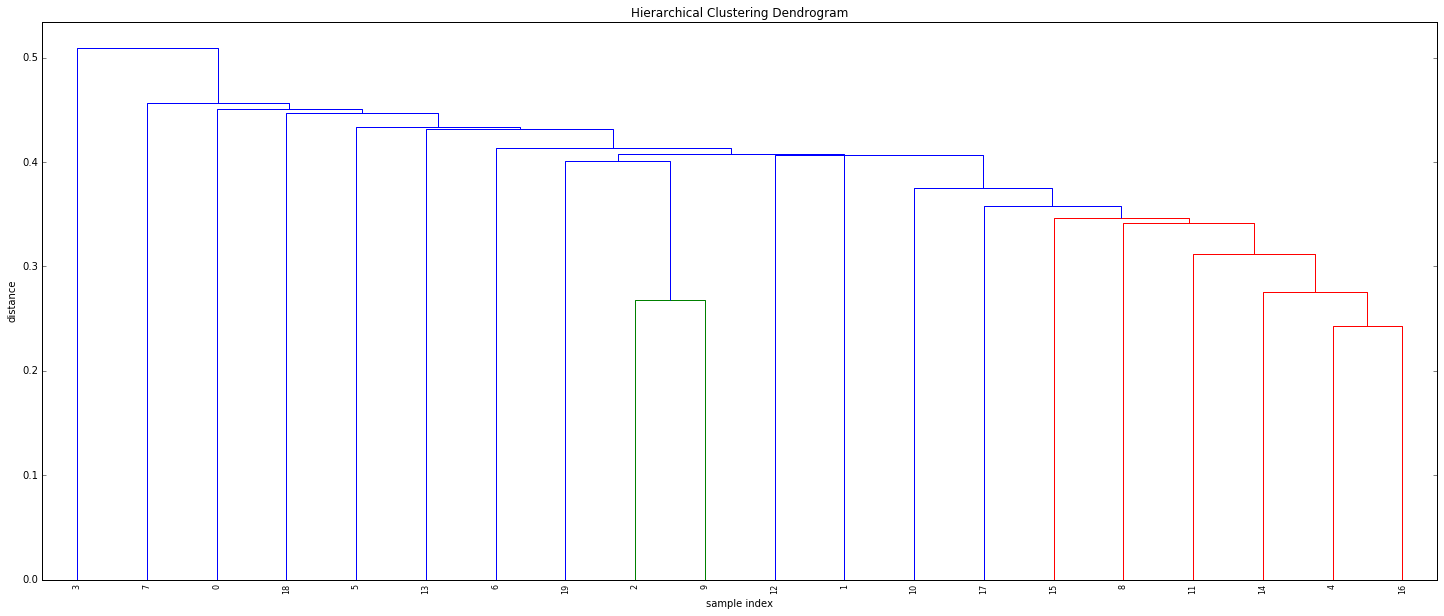

0: spotted

1: naked

2: colored

3: crowded

4: winged

5: hump

6: stained

7: snow

8: sled

9: coloured

10: stylized

11: crooked

12: bright

13: wood

14: eyed

15: stuffed

16: striped

17: dove

18: decorated

19: red

(5, 100)


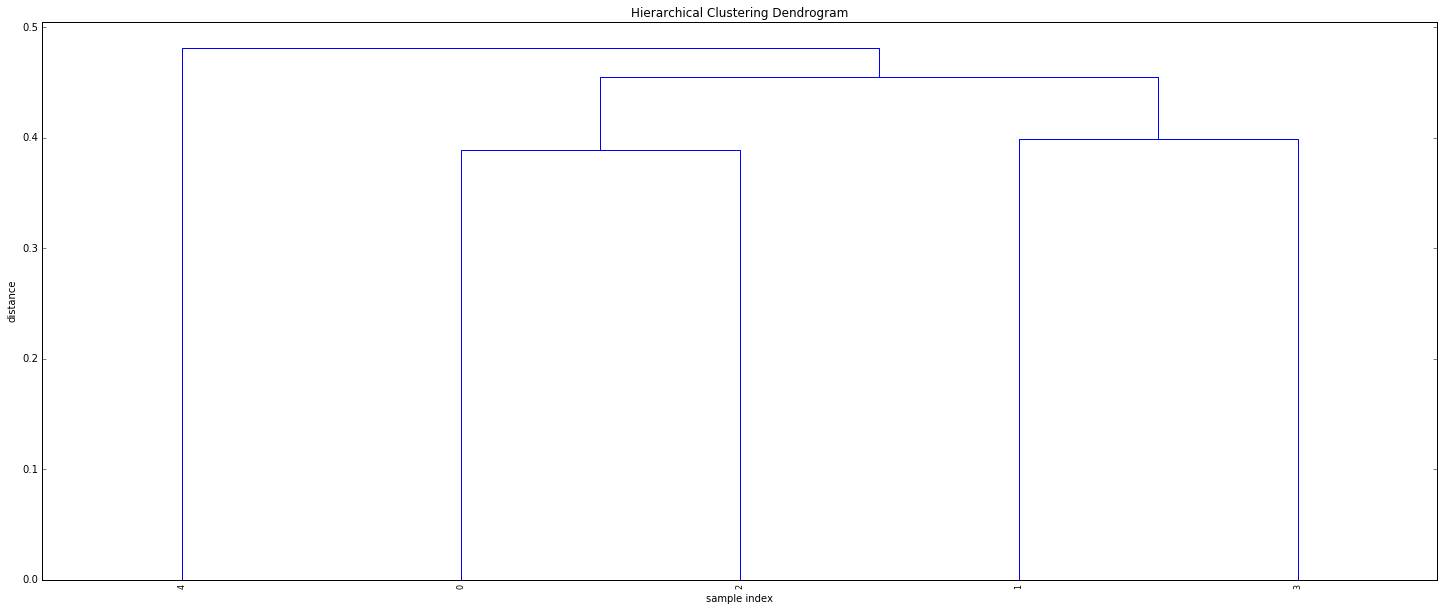

0: patterned

1: chicken

2: polished

3: eyed

4: fashioned

(39, 100)


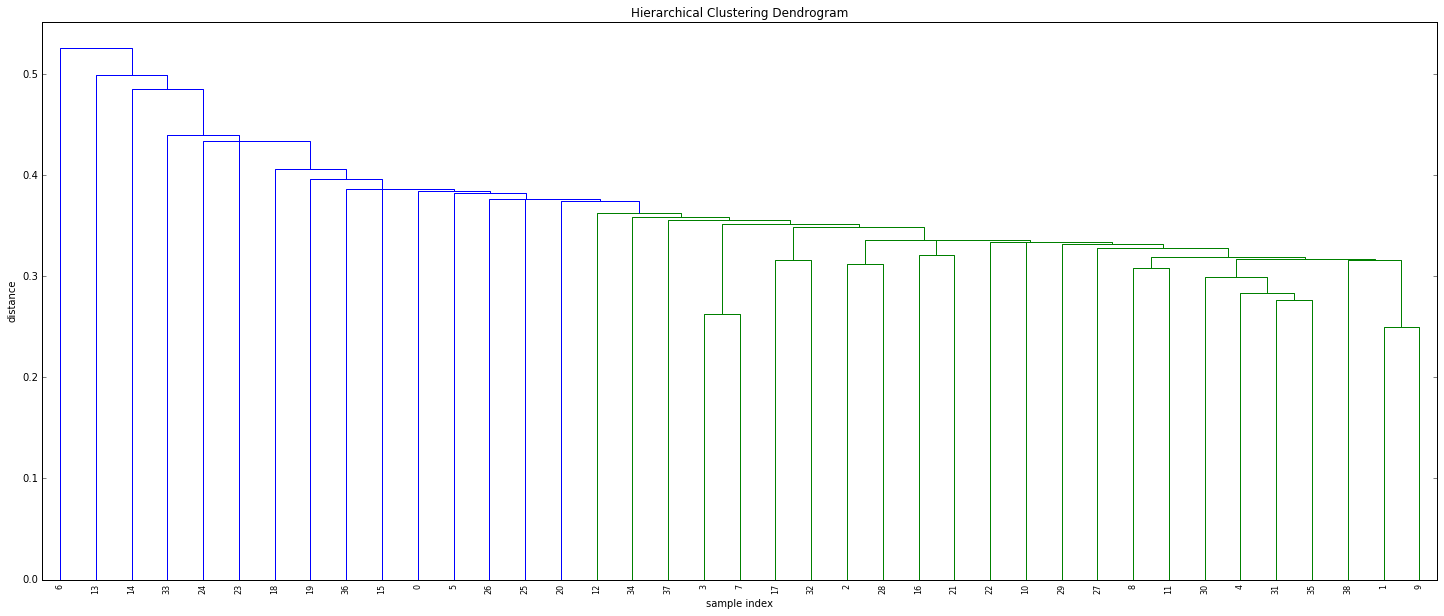

0: lace

1: sweet

2: dolphin

3: yellow

4: pig

5: hair

6: twin

7: pink

8: zebra

9: chicken

10: fir

11: elk

12: furry

13: cave

14: snow

15: attire

16: peanuts

17: robe

18: pint

19: surf

20: claws

21: snail

22: toad

23: predator

24: bear

25: outfit

26: dark

27: spoon

28: pygmy

29: oyster

30: goose

31: cow

32: girdle

33: tree

34: glove

35: cat

36: jewel

37: necklace

38: bamboo

(79, 100)


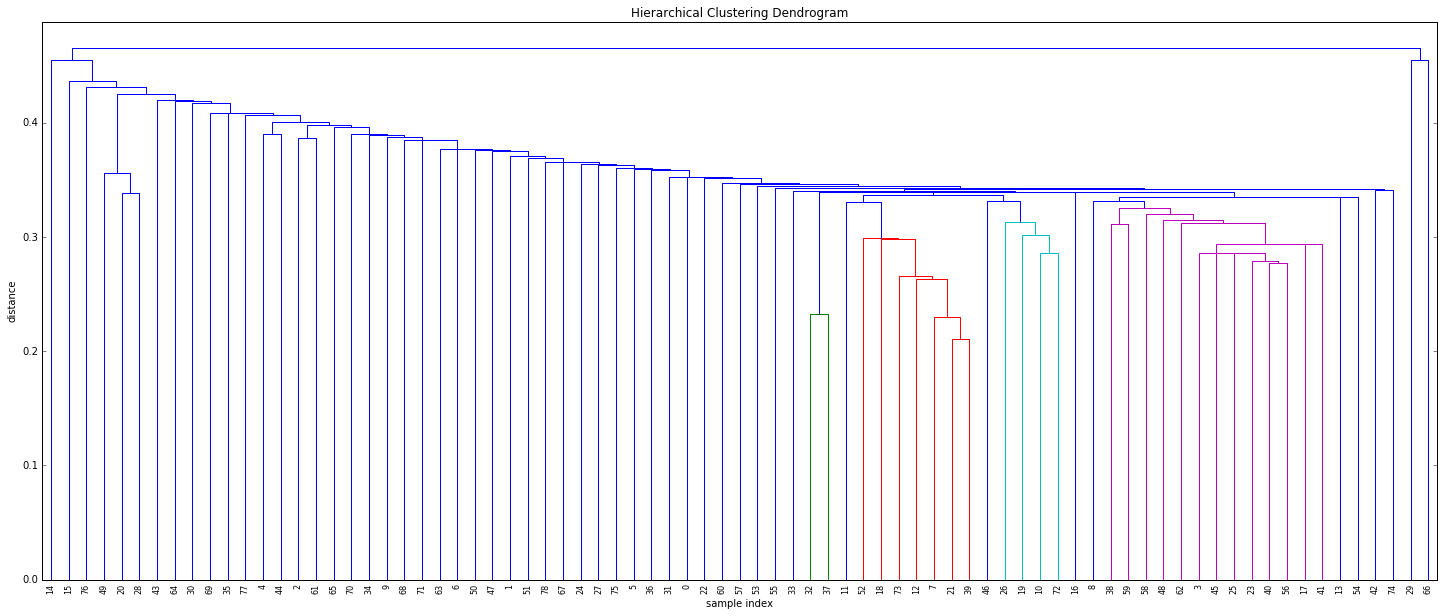

0: geese

1: straw

2: garment

3: fluffy

4: wreath

5: lush

6: whiskey

7: yellow

8: sticky

9: hair

10: crocodile

11: bright

12: pink

13: turnip

14: hive

15: dish

16: candle

17: goose

18: pale

19: whale

20: ice

21: blue

22: giant

23: lemon

24: nymphs

25: cherry

26: moose

27: swan

28: snow

29: tiny

30: rustic

31: rotten

32: black

33: viper

34: fiery

35: elephant

36: fisherman

37: white

38: fin

39: red

40: pumpkin

41: butterfly

42: sheep

43: ivory

44: cellar

45: stuffed

46: pine

47: fancy

48: sweet

49: sunny

50: plow

51: bear

52: dark

53: ibis

54: legged

55: canine

56: striped

57: hawk

58: oyster

59: glow

60: gray

61: fleece

62: noodle

63: gentle

64: coat

65: grizzly

66: tree

67: dog

68: incense

69: marsh

70: naked

71: swamp

72: lizard

73: green

74: wild

75: tall

76: swallow

77: marble

78: lantern

(5, 100)


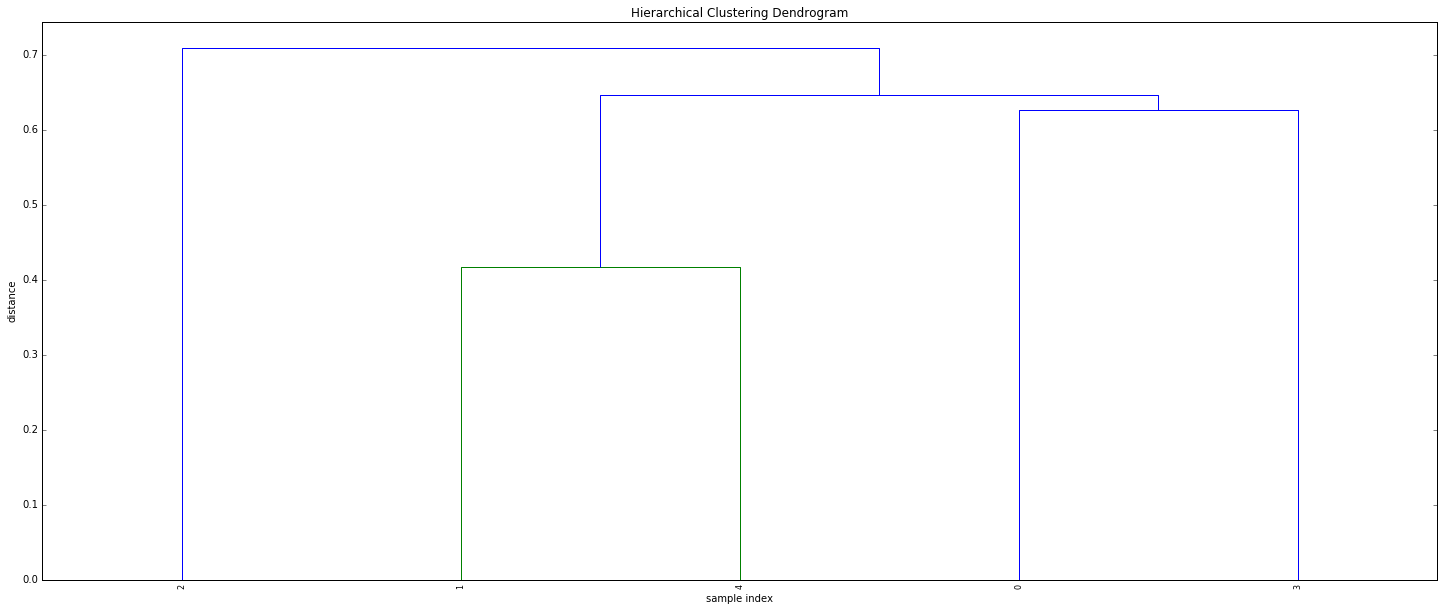

0: blue

1: albatross

2: like

3: bear

4: trout

(3, 100)


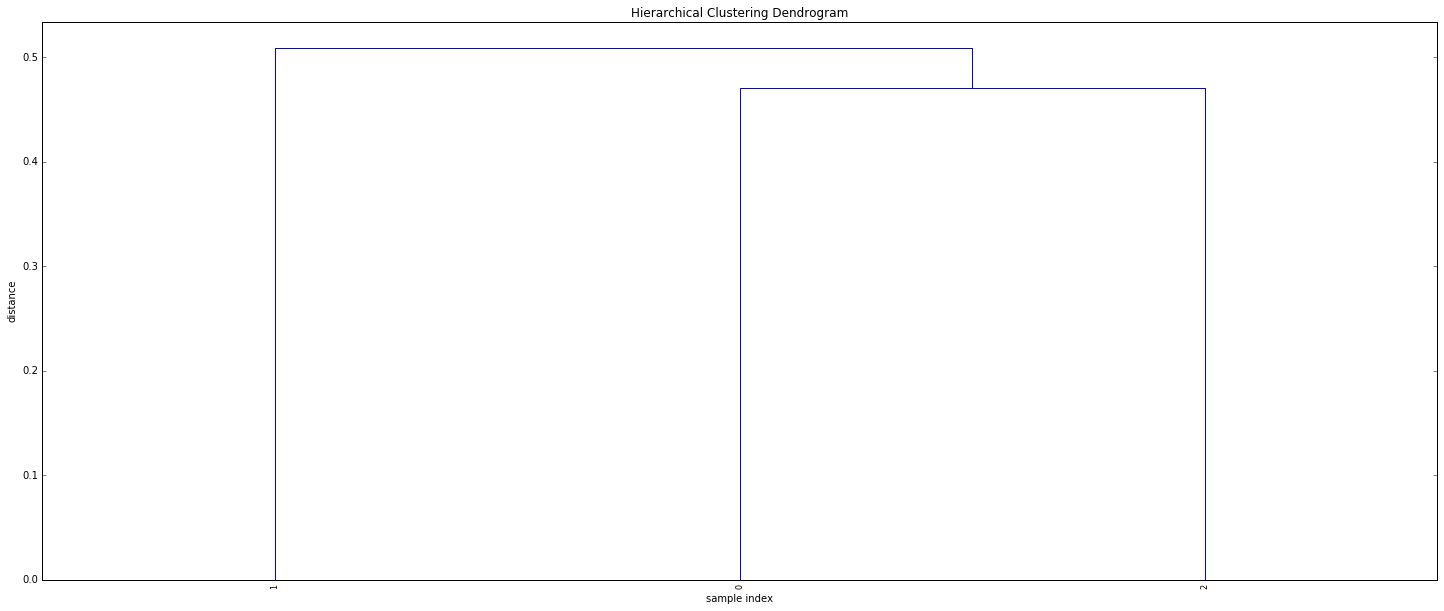

0: eagle

1: dresses

2: ox

(47, 100)


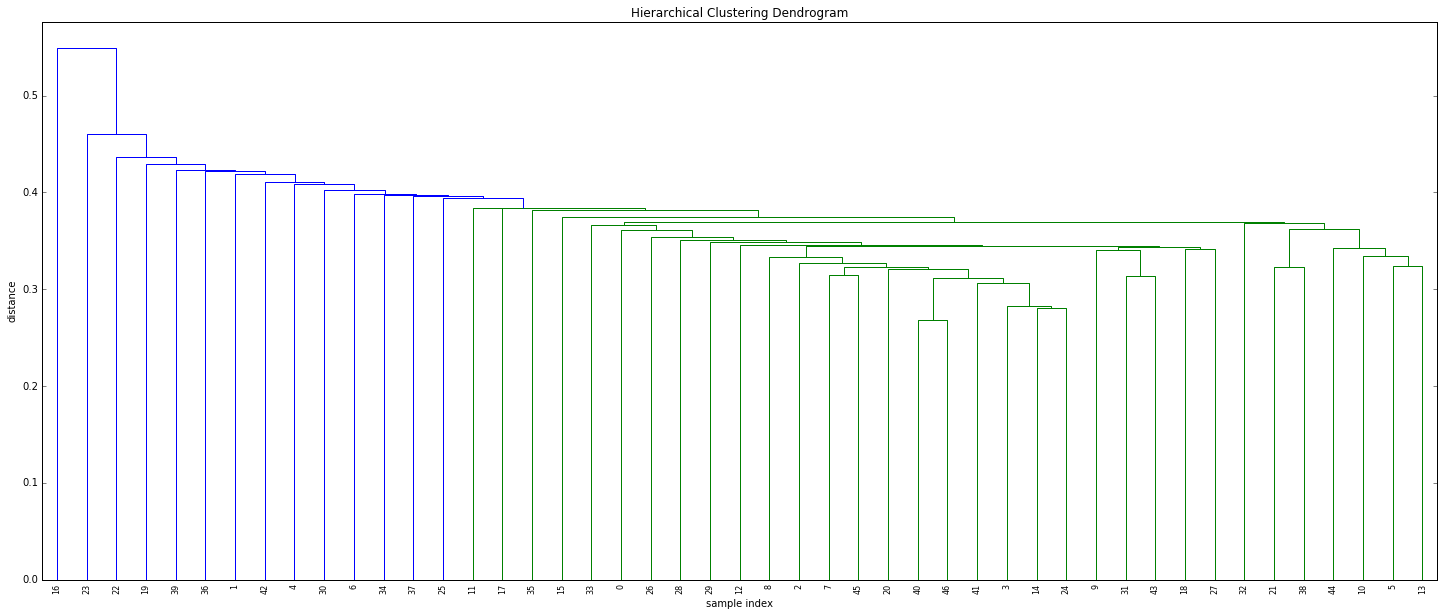

0: chicks

1: flies

2: trunks

3: shoes

4: tents

5: frogs

6: swords

7: hats

8: feathers

9: socks

10: seals

11: bats

12: horns

13: snakes

14: sandals

15: coats

16: bears

17: pots

18: rhinoceros

19: tears

20: trousers

21: creatures

22: shields

23: skies

24: pants

25: antlers

26: marbles

27: talons

28: skates

29: robes

30: stripes

31: petals

32: ducks

33: pigeons

34: swans

35: calves

36: candles

37: noises

38: dogs

39: swamp

40: gloves

41: stockings

42: outdoors

43: thorns

44: bites

45: skirts

46: glasses

(6, 100)


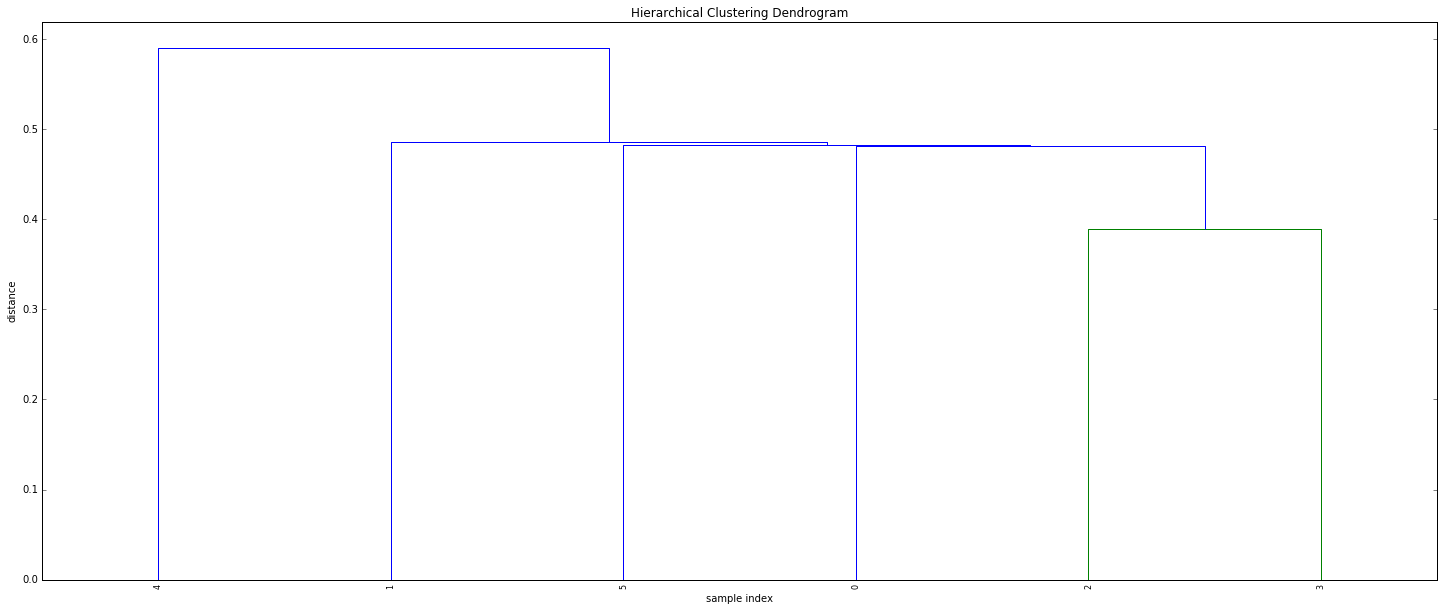

0: storytelling

1: fencing

2: enduring

3: exciting

4: painting

5: shaping

(25, 100)


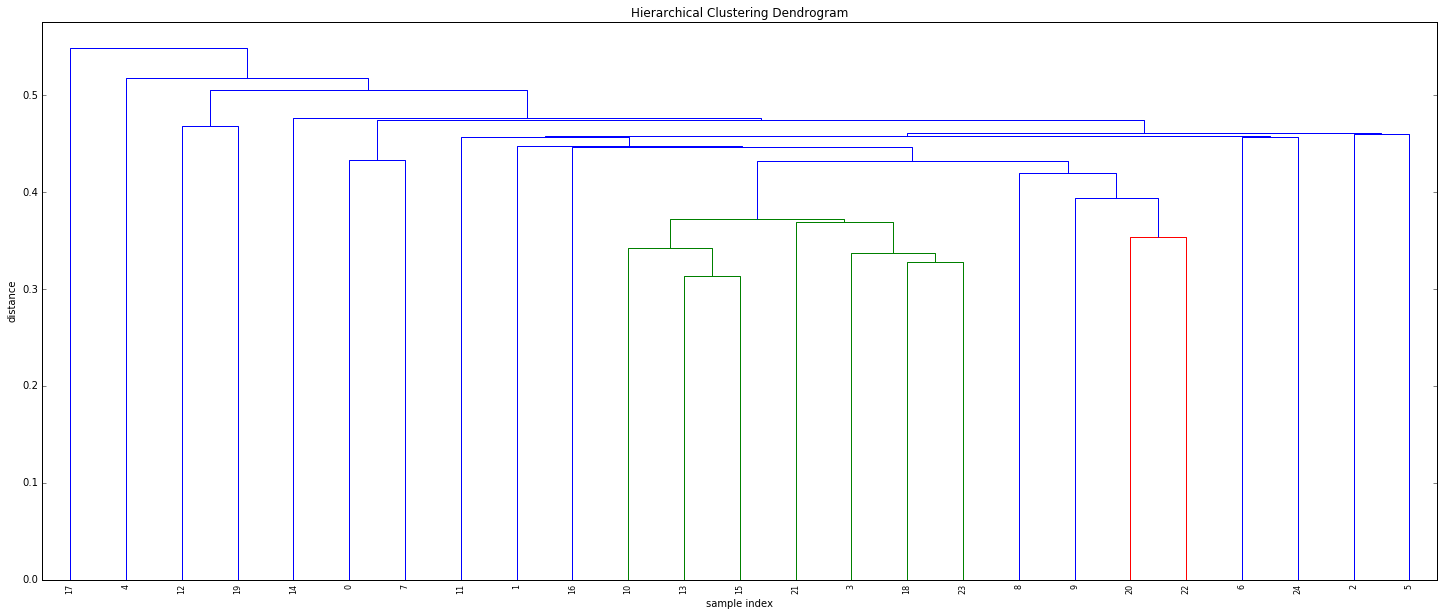

0: fashion

1: art

2: stereotype

3: romanticism

4: culture

5: queer

6: folk

7: style

8: humor

9: poetry

10: modernism

11: harmony

12: hobby

13: medieval

14: fascination

15: renaissance

16: symbolism

17: icon

18: impressionism

19: talent

20: sculpture

21: dada

22: painting

23: minimalism

24: genre

(25, 100)


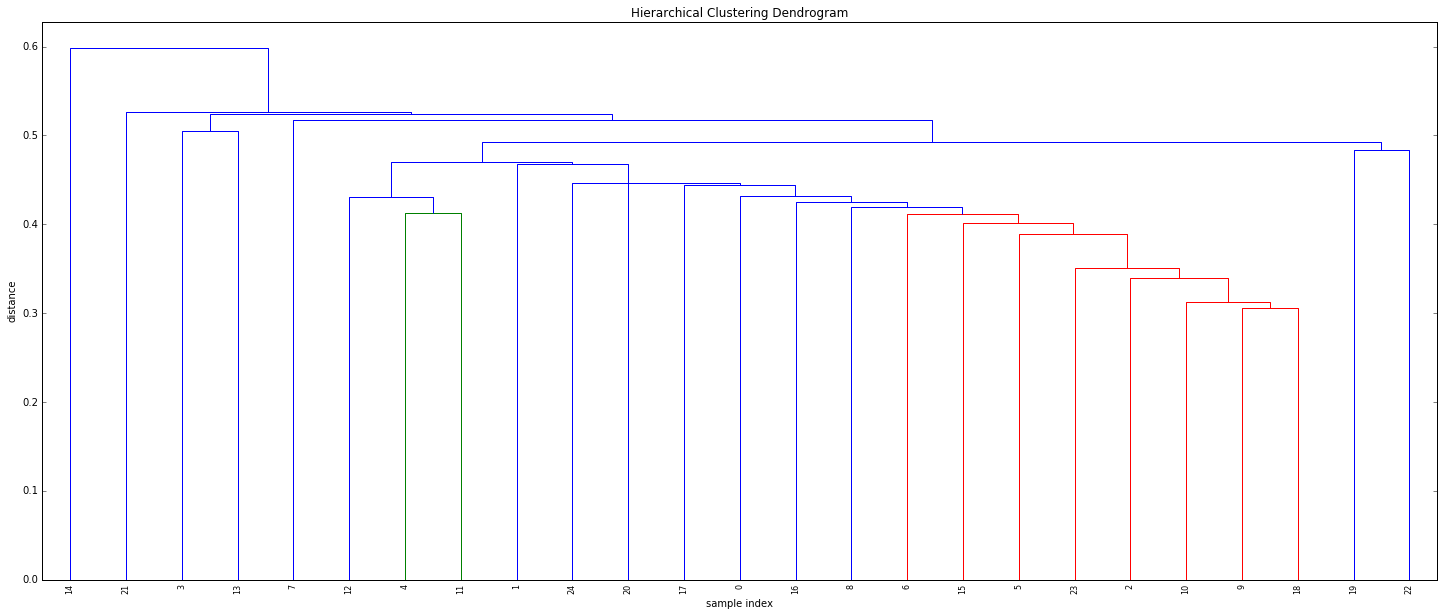

0: classical

1: modern

2: contemporary

3: martial

4: erotic

5: innovative

6: bizarre

7: fashionable

8: satire

9: literary

10: literature

11: eccentric

12: iconic

13: whimsy

14: famous

15: dramatic

16: impressive

17: imagery

18: romantic

19: vibrant

20: elaborate

21: traditional

22: victorian

23: artistic

24: youthful

(4, 100)


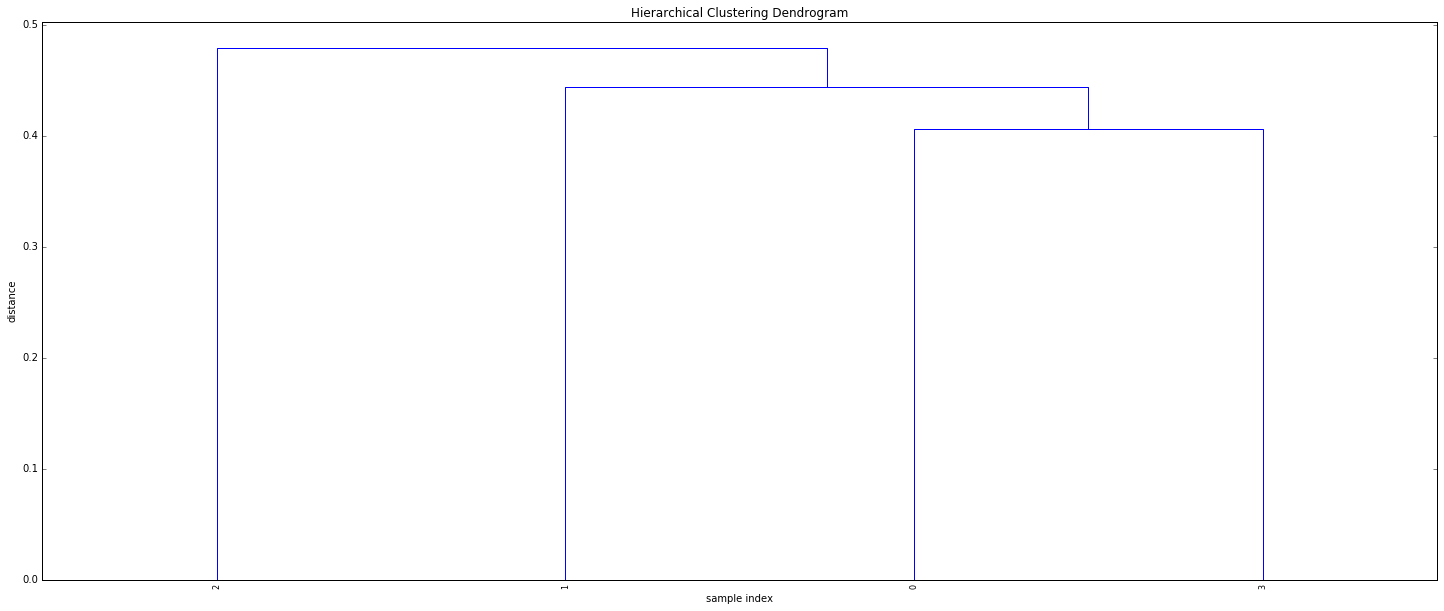

0: flying

1: carrying

2: sailing

3: landing

(15, 100)


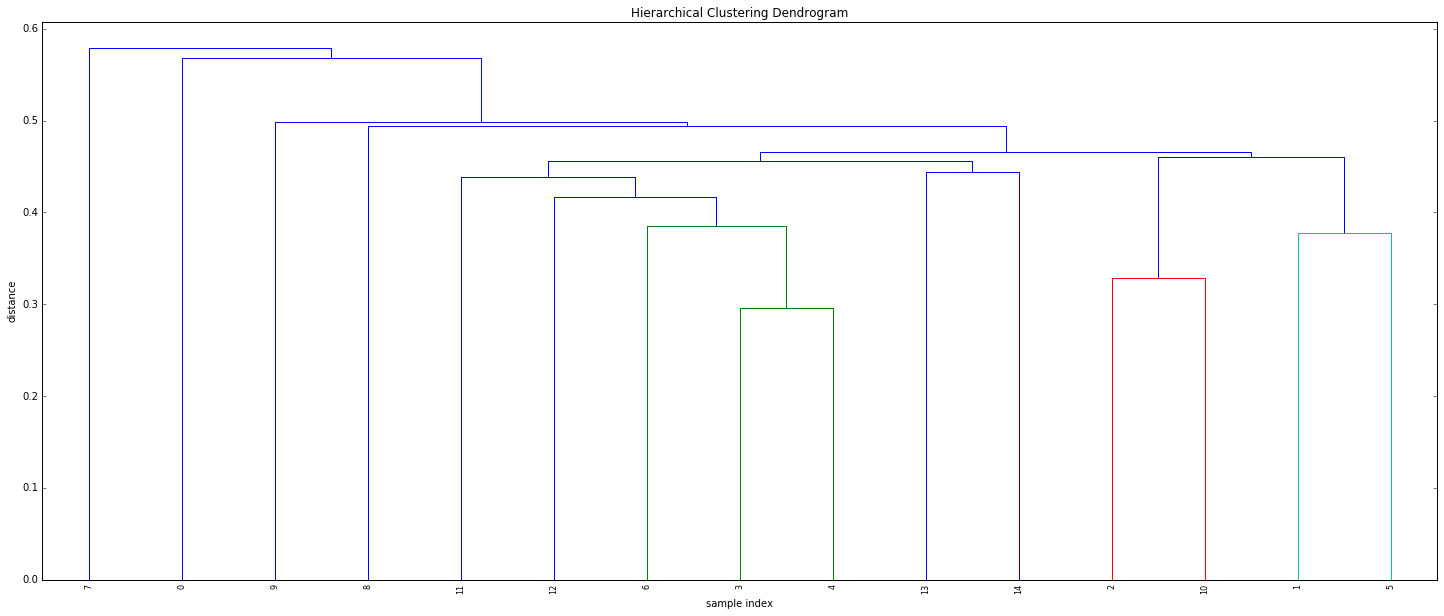

0: accident

1: aerial

2: naval

3: cannon

4: gun

5: airborne

6: parachute

7: squad

8: defensive

9: nuclear

10: navy

11: ship

12: gunpowder

13: locomotive

14: silo

(64, 100)


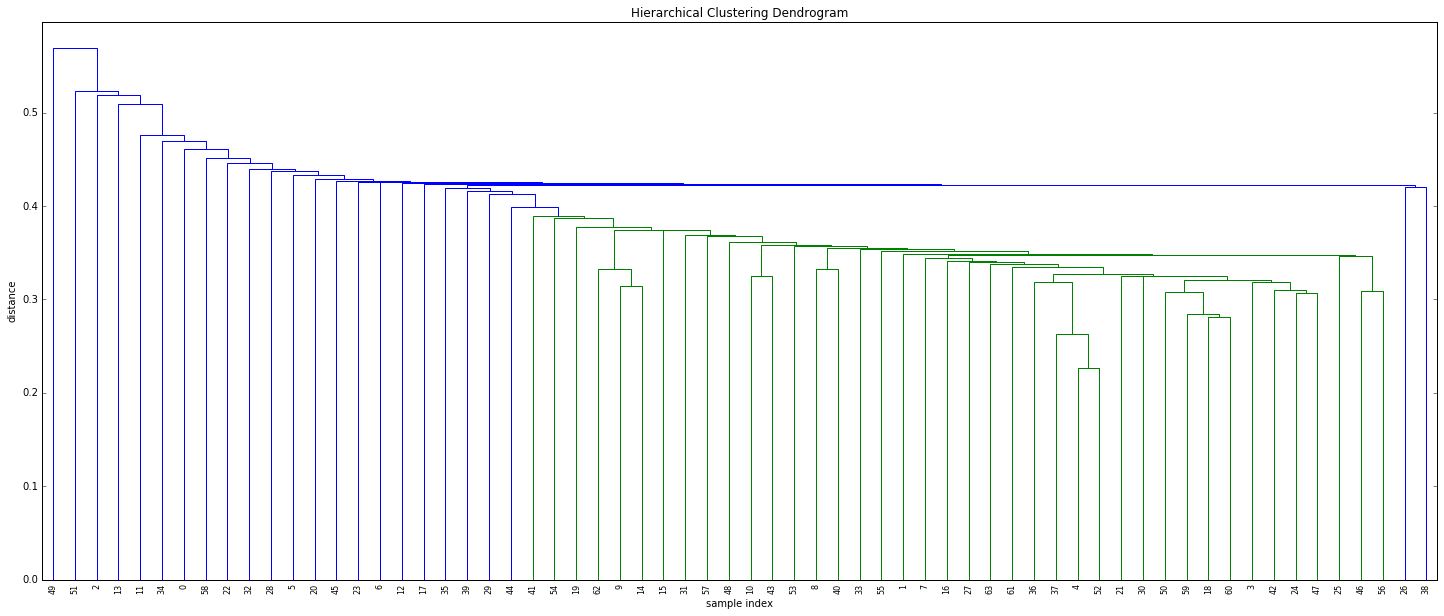

0: battlefield

1: bomb

2: merchant

3: battleship

4: artillery

5: mine

6: guard

7: bombardment

8: harpoon

9: vessel

10: flight

11: sprint

12: air

13: pentagon

14: ship

15: boat

16: cargo

17: copilot

18: jet

19: armor

20: automobile

21: balloon

22: sail

23: factory

24: submarine

25: ammunition

26: storm

27: vehicle

28: strike

29: freighter

30: torpedo

31: pilot

32: sniper

33: engine

34: command

35: explosion

36: combat

37: cavalry

38: fire

39: mission

40: trident

41: driver

42: missile

43: crash

44: craft

45: airplane

46: rifle

47: tank

48: tire

49: marine

50: glider

51: volunteer

52: infantry

53: fighter

54: destroyer

55: car

56: gun

57: gunfire

58: sabre

59: carrier

60: truck

61: troop

62: fleet

63: steam

(11, 100)


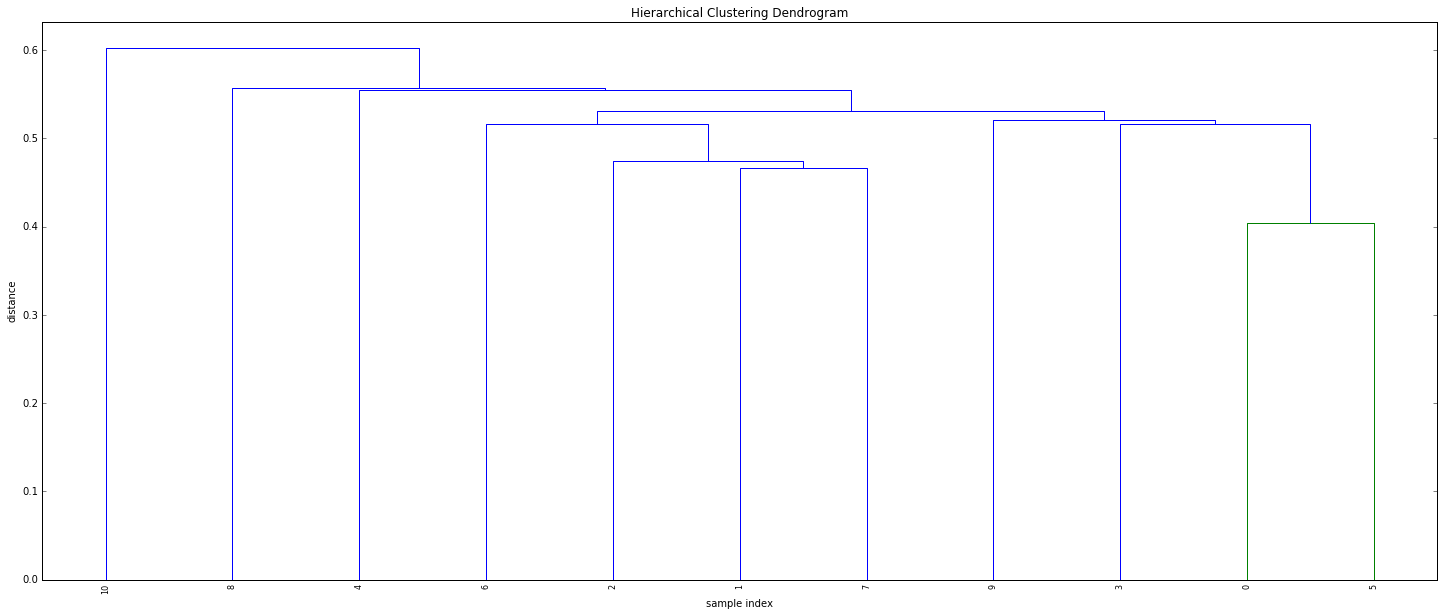

0: longbow

1: patrol

2: rescue

3: fire

4: marine

5: armour

6: sail

7: ships

8: badge

9: steam

10: lease

(13, 100)


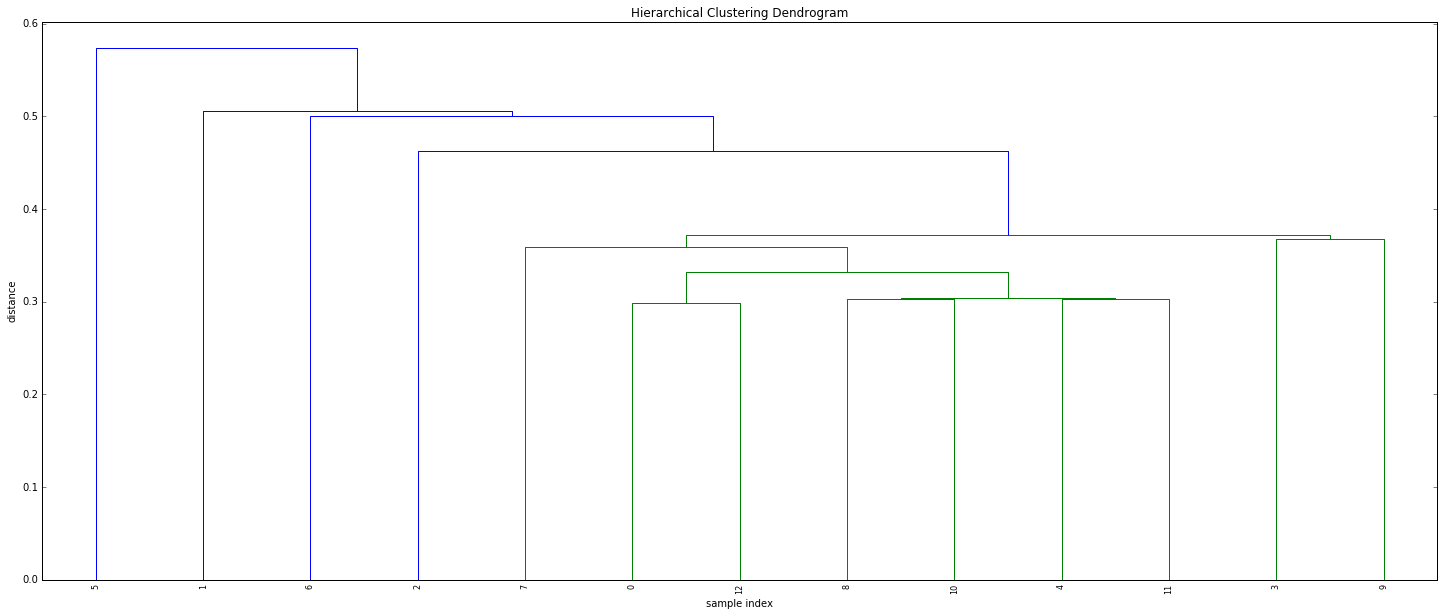

0: rifles

1: strikes

2: paratroopers

3: cars

4: ships

5: arms

6: miners

7: weapons

8: boats

9: bicycles

10: vessels

11: battleships

12: guns

(6, 100)


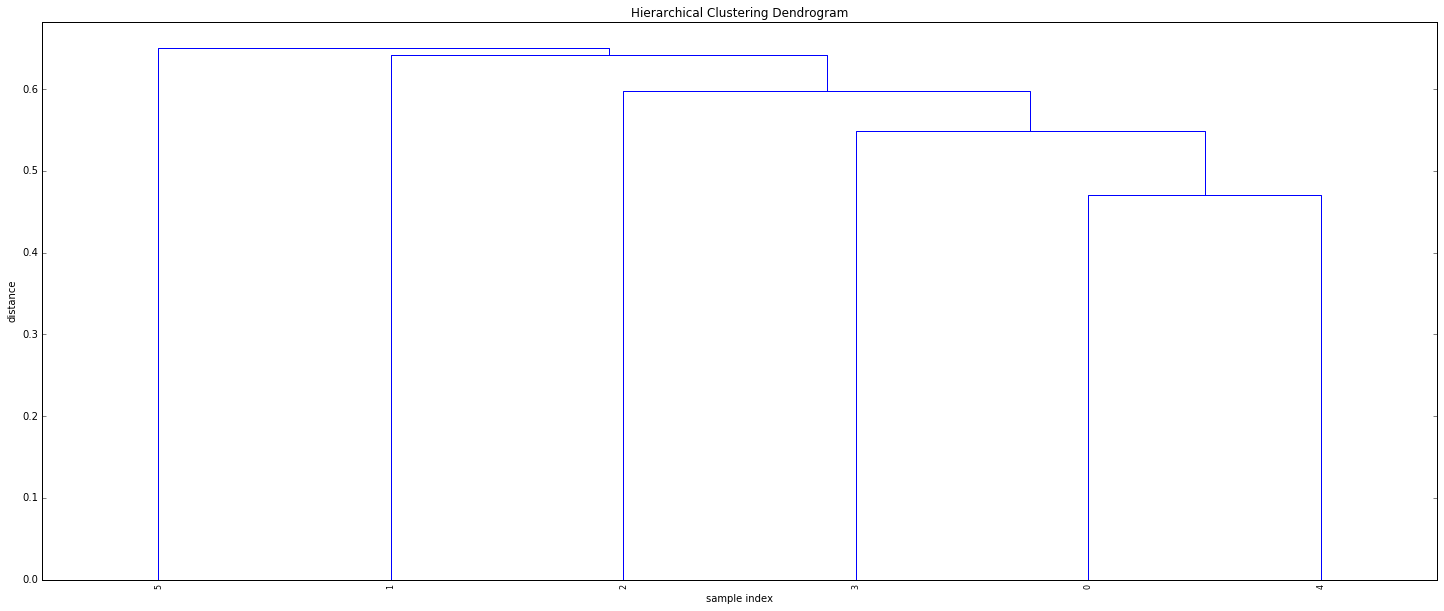

0: fasting

1: living

2: acting

3: engaging

4: suffering

5: enjoying

(36, 100)


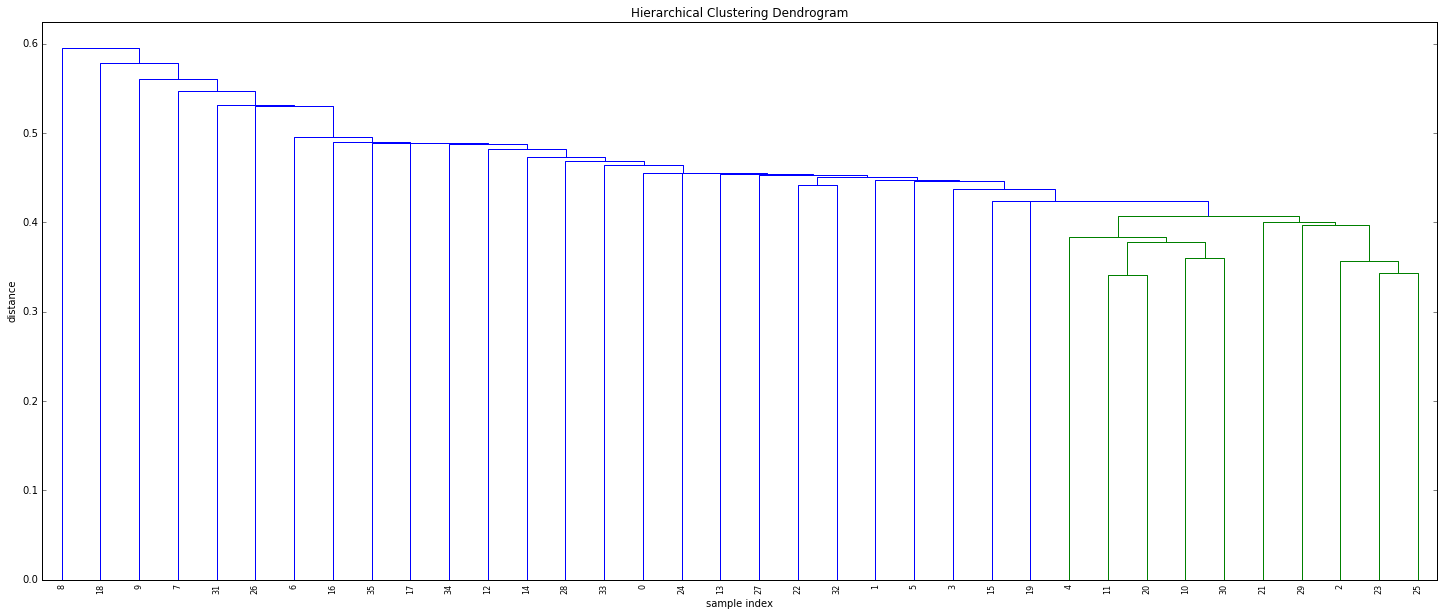

0: nudity

1: profession

2: sex

3: satisfaction

4: homosexuality

5: adultery

6: partner

7: dress

8: kosher

9: maturity

10: discrimination

11: disability

12: health

13: care

14: enslavement

15: patient

16: parent

17: intimate

18: deaf

19: cruelty

20: abuse

21: adult

22: child

23: taboo

24: objectification

25: masturbation

26: charity

27: dignity

28: fertility

29: gender

30: violence

31: youth

32: person

33: marriage

34: male

35: preference

(7, 100)


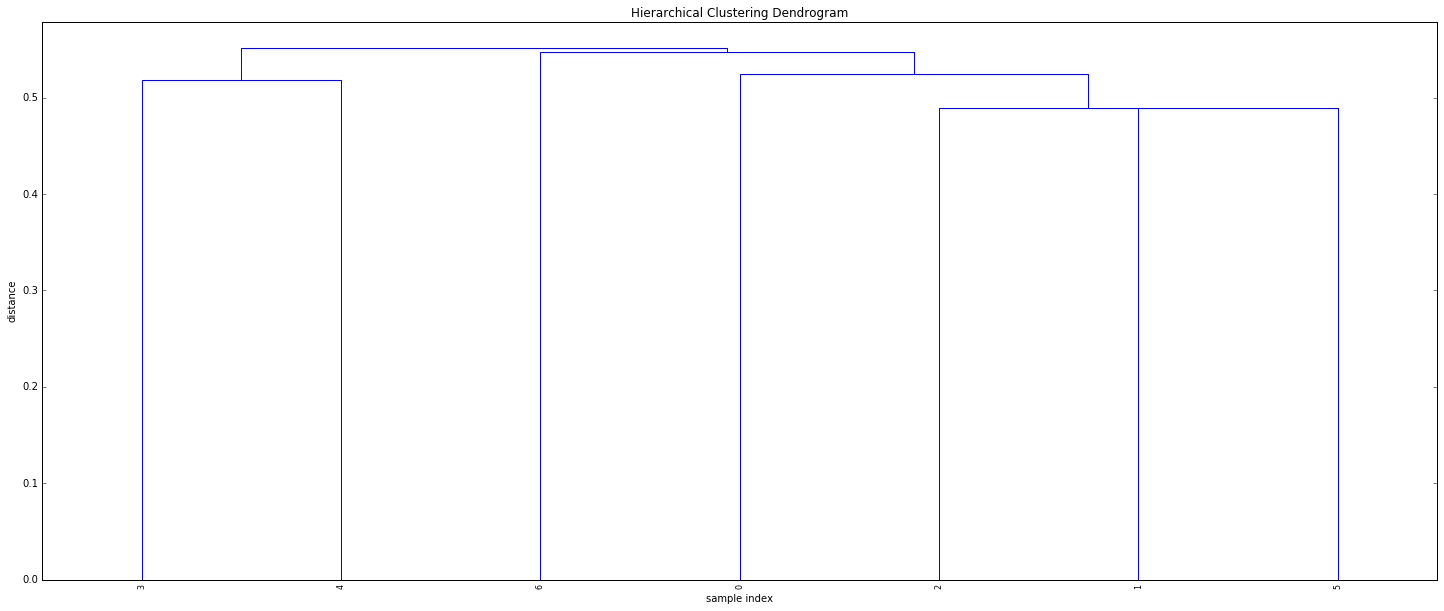

0: gender

1: genitalia

2: prejudice

3: adult

4: child

5: intimacy

6: hate

(19, 100)


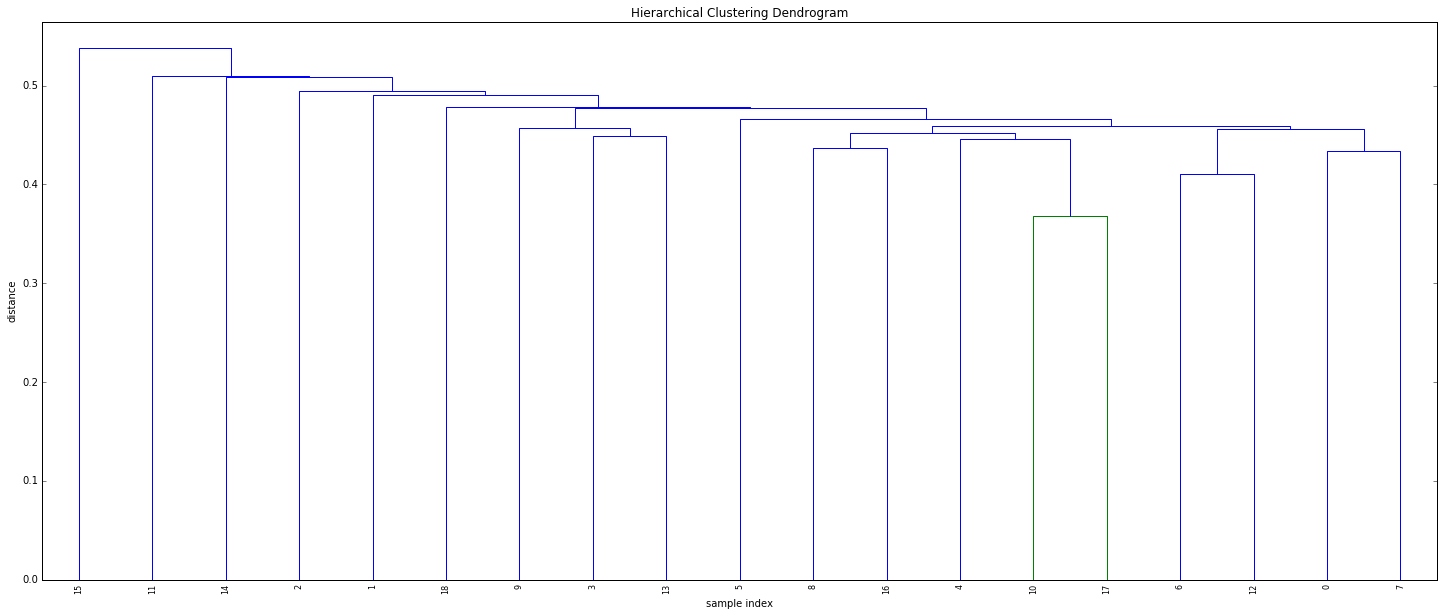

0: solitary

1: communal

2: adulthood

3: lifestyle

4: adolescent

5: personal

6: healthy

7: youths

8: parental

9: submissive

10: elderly

11: casual

12: newborn

13: enjoyment

14: female

15: child

16: sexual

17: unmarried

18: greed

(12, 100)


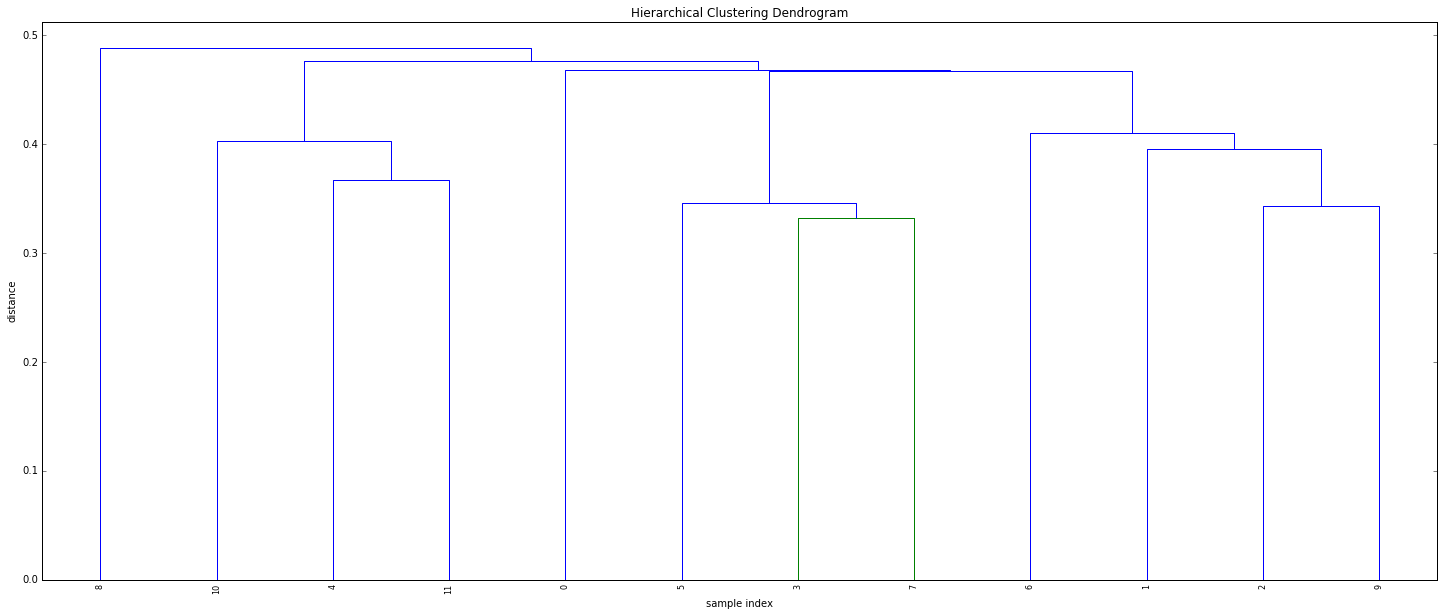

0: relationships

1: females

2: adults

3: desires

4: men

5: manners

6: teenagers

7: habits

8: sexes

9: infants

10: children

11: women

(11, 100)


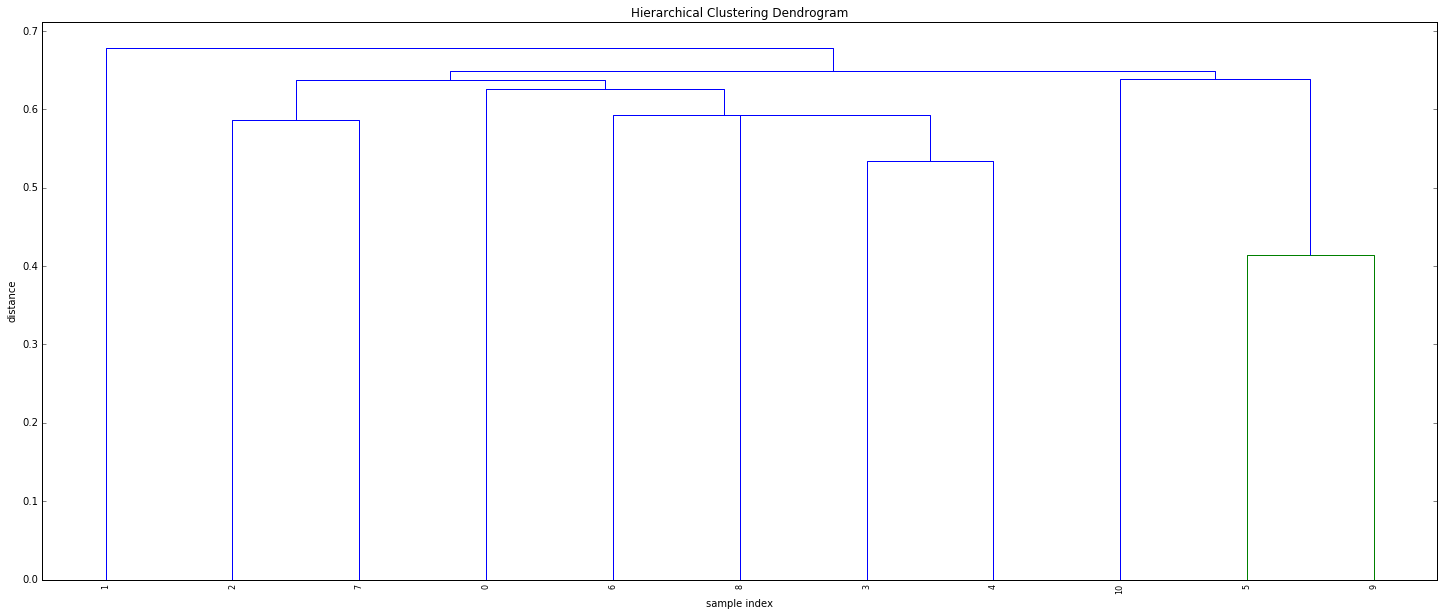

0: little

1: right

2: often

3: just

4: far

5: never

6: long

7: properly

8: so

9: not

10: still

(4, 100)


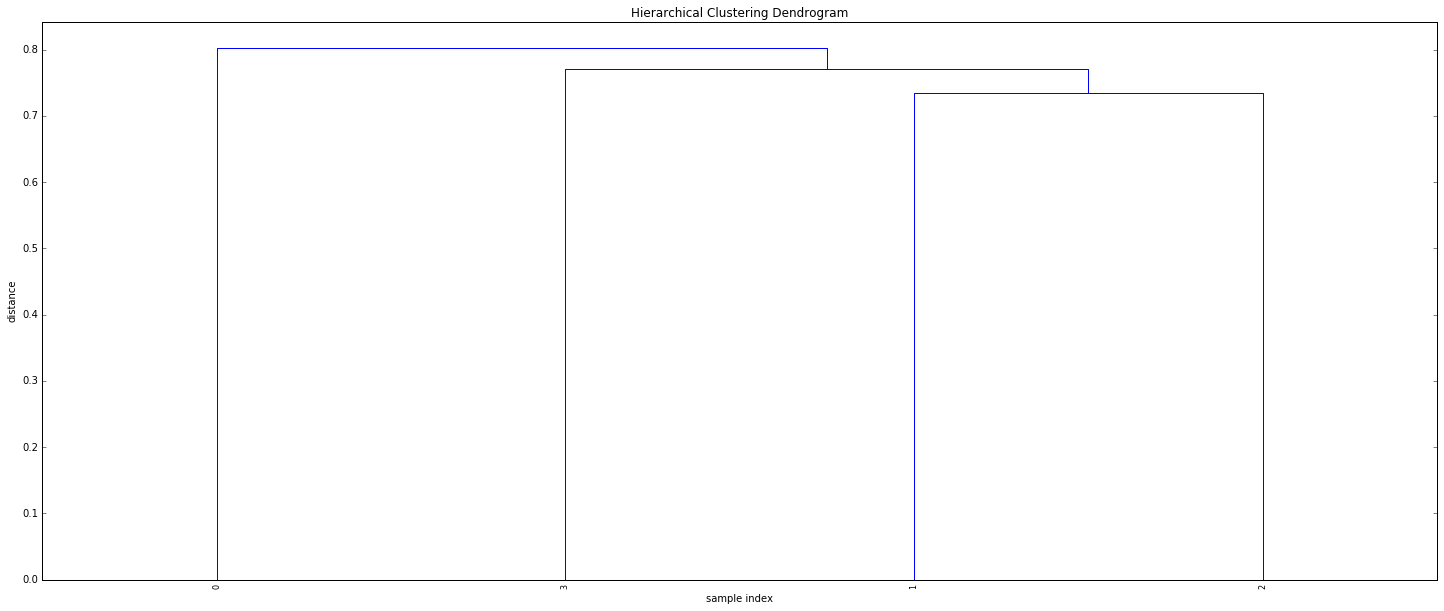

0: outside

1: multiple

2: lot

3: no

(4, 100)


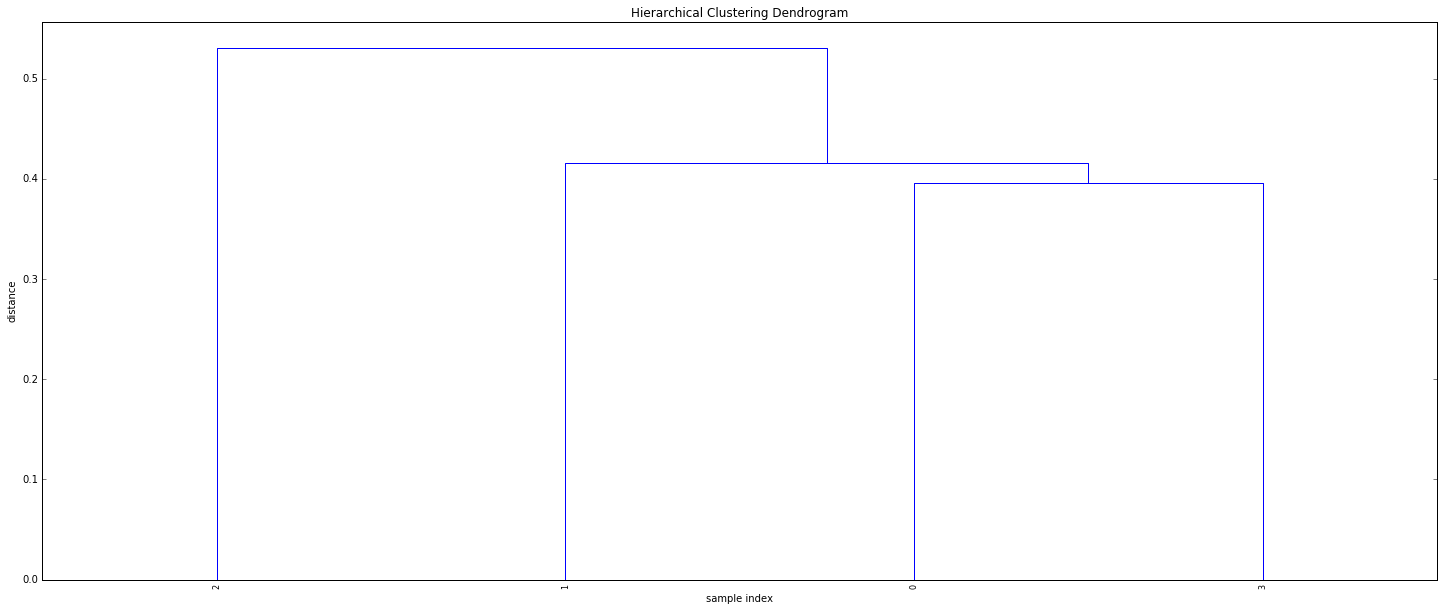

0: better

1: less

2: smaller

3: higher

(25, 100)


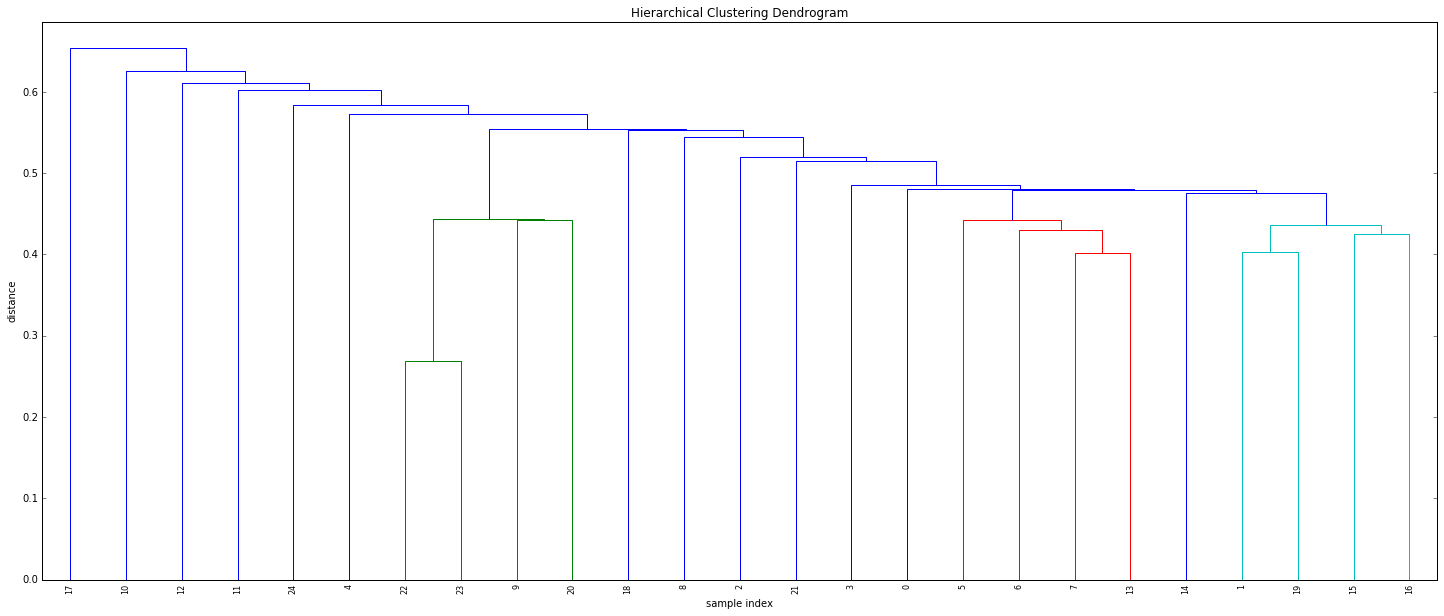

0: simple

1: hard

2: direct

3: comfortable

4: close

5: special

6: specific

7: different

8: capable

9: broad

10: long

11: much

12: full

13: multiple

14: normal

15: sufficient

16: safe

17: little

18: free

19: quick

20: wide

21: many

22: large

23: small

24: whole

(4, 100)


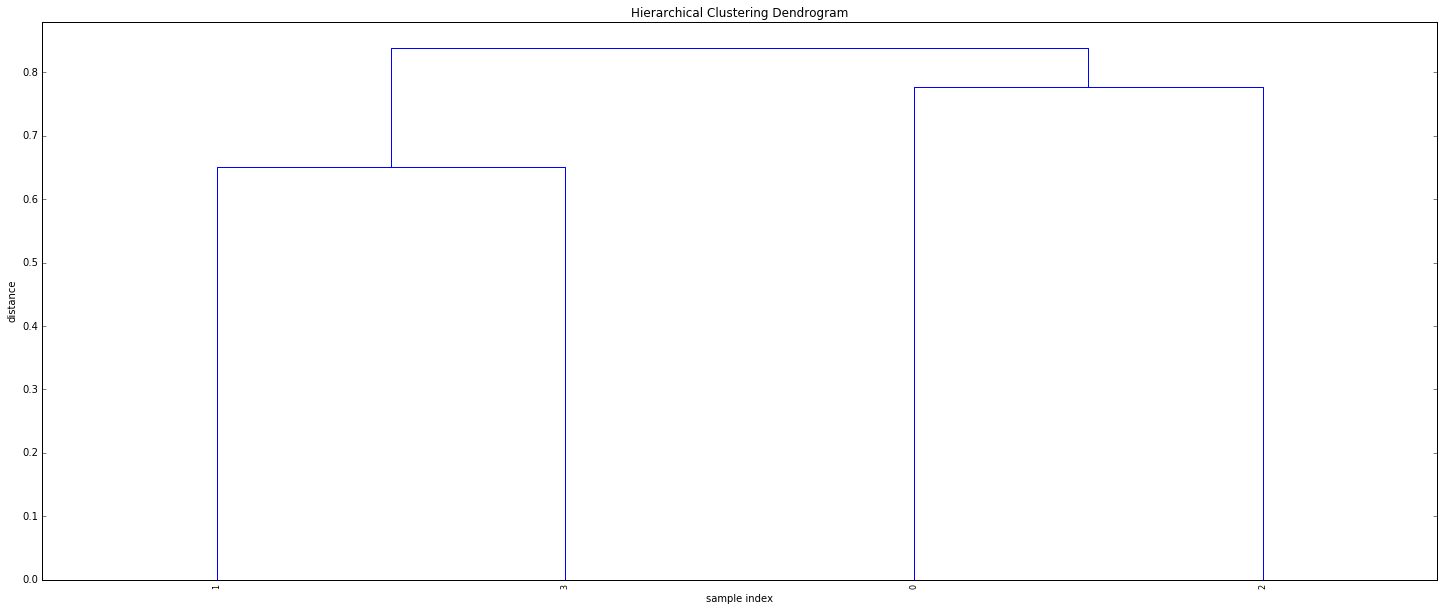

0: proper

1: together

2: for

3: out

(7, 100)


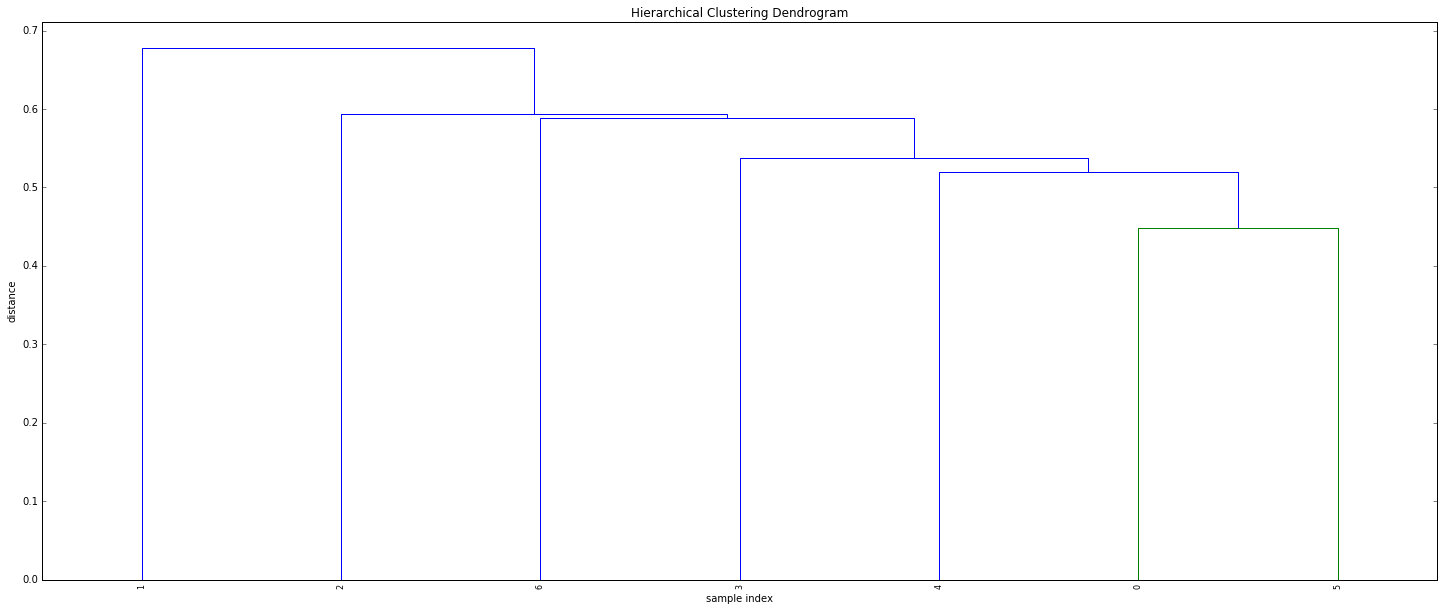

0: a

1: all

2: no

3: this

4: every

5: another

6: the

(5, 100)


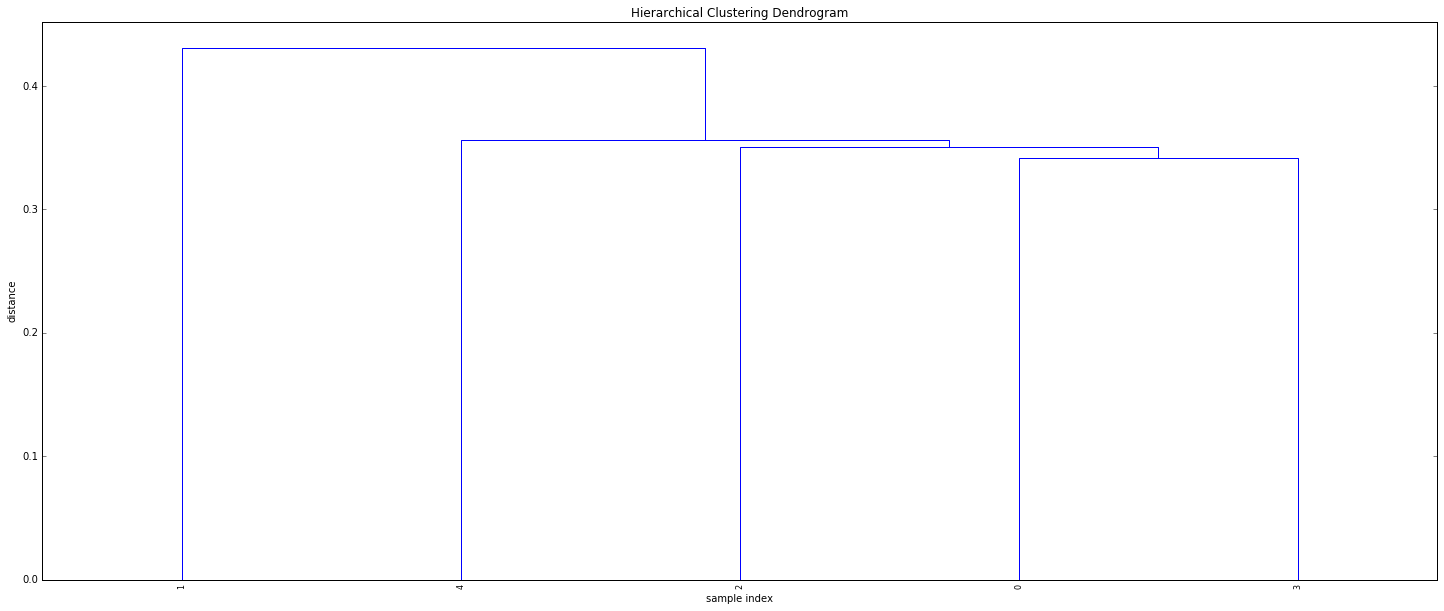

0: angelo

1: viennese

2: nun

3: gian

4: jean

(16, 100)


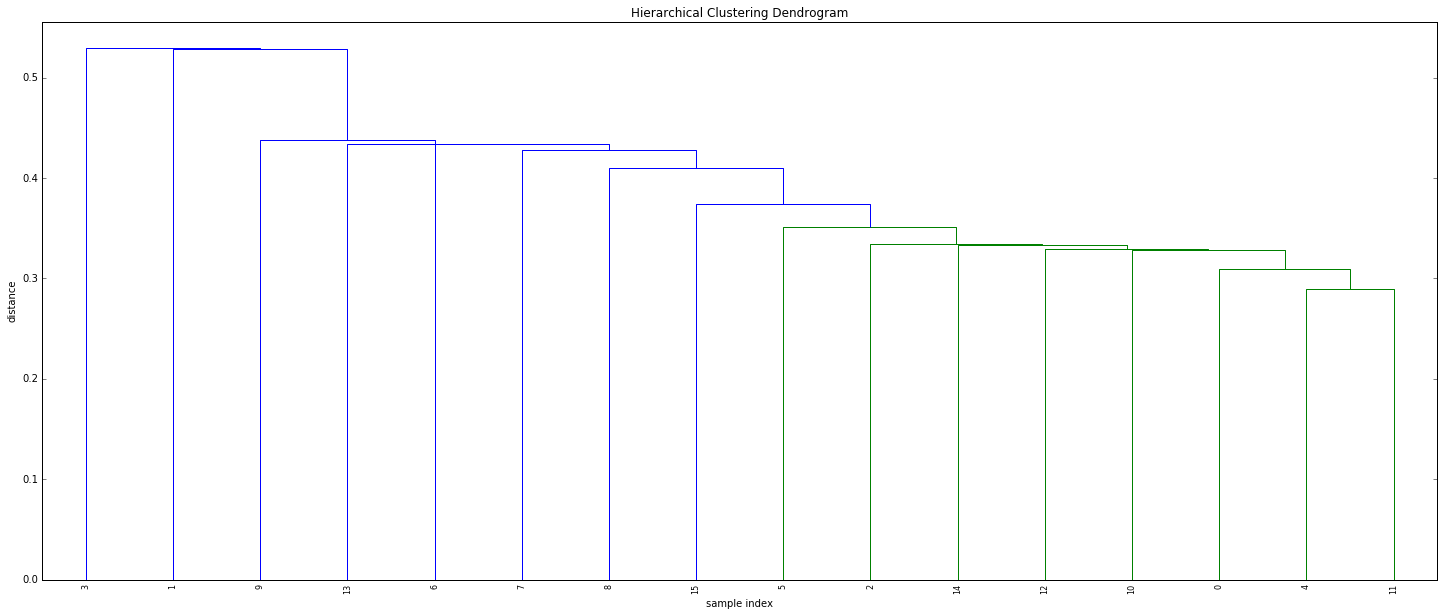

0: van

1: medallion

2: canto

3: decorum

4: bella

5: bonnet

6: grieg

7: gall

8: sax

9: frontispiece

10: den

11: luigi

12: spaniard

13: cookbook

14: frenchman

15: kung

(4, 100)


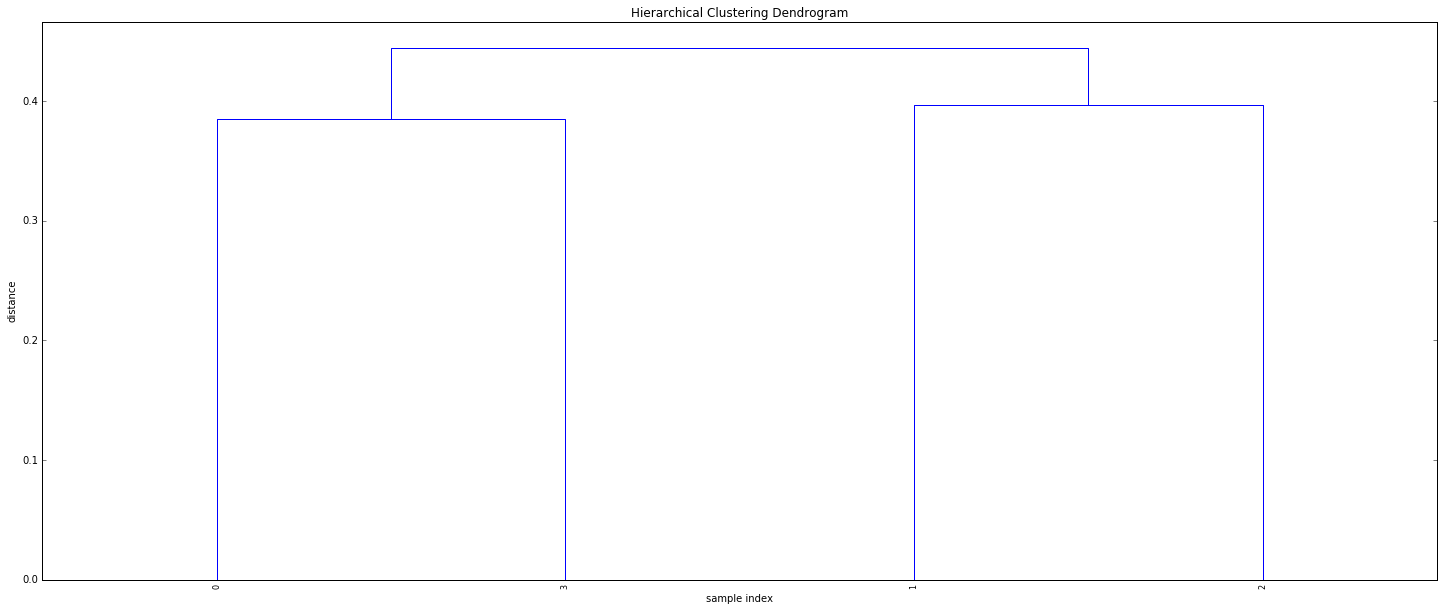

0: try

1: organize

2: adopt

3: decide

(4, 100)


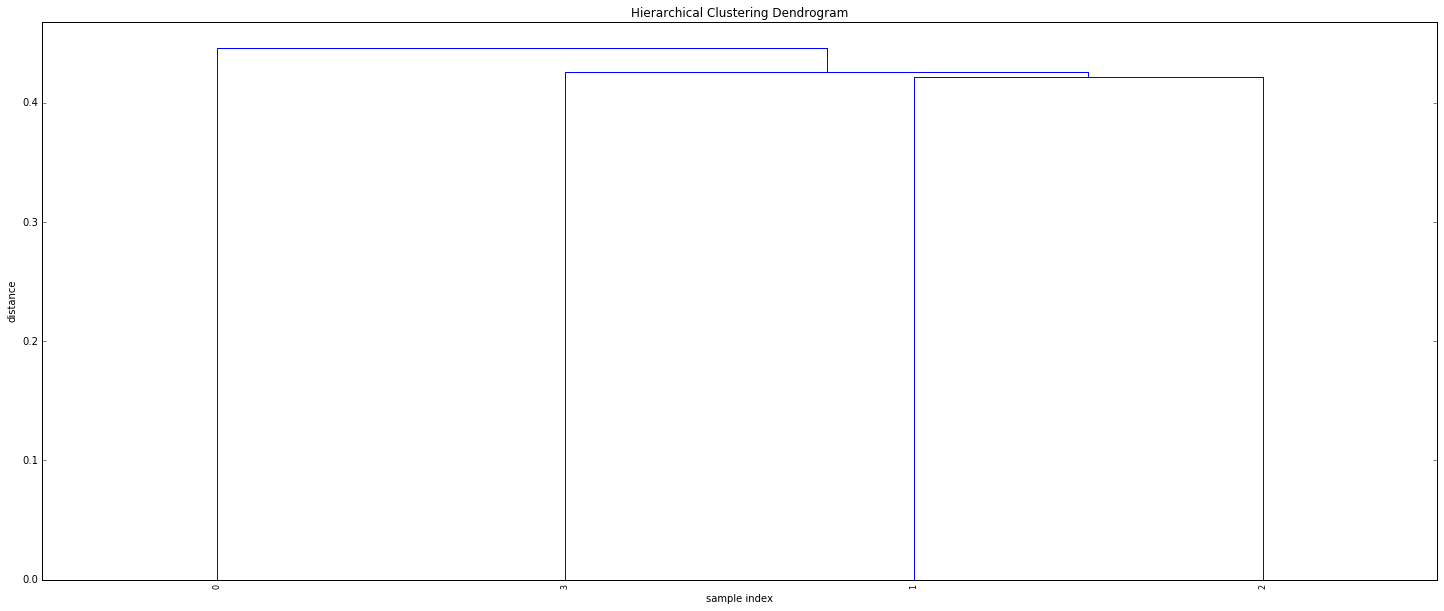

0: warn

1: reunite

2: overturn

3: amend

(49, 100)


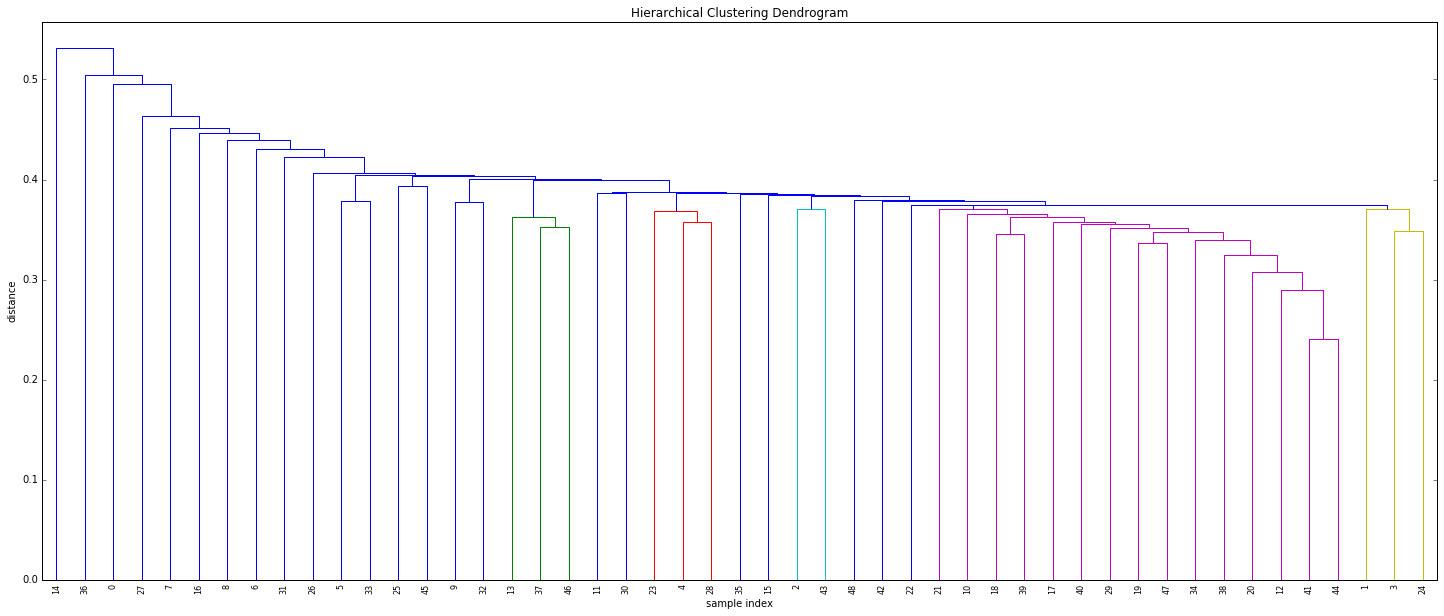

0: allusion

1: pledge

2: expel

3: allegiance

4: instruct

5: embrace

6: participate

7: kidnap

8: help

9: educate

10: raise

11: prepare

12: defend

13: motivate

14: fruition

15: obedience

16: convene

17: destroy

18: condemn

19: obey

20: lend

21: heal

22: assist

23: impress

24: loyalty

25: cooperate

26: blame

27: remedy

28: entertain

29: conquer

30: ask

31: embarrass

32: teach

33: promote

34: flee

35: discuss

36: celebrate

37: annoy

38: refuse

39: criticize

40: join

41: confront

42: recruit

43: distract

44: abandon

45: meet

46: disparage

47: enforce

48: preach

(18, 100)


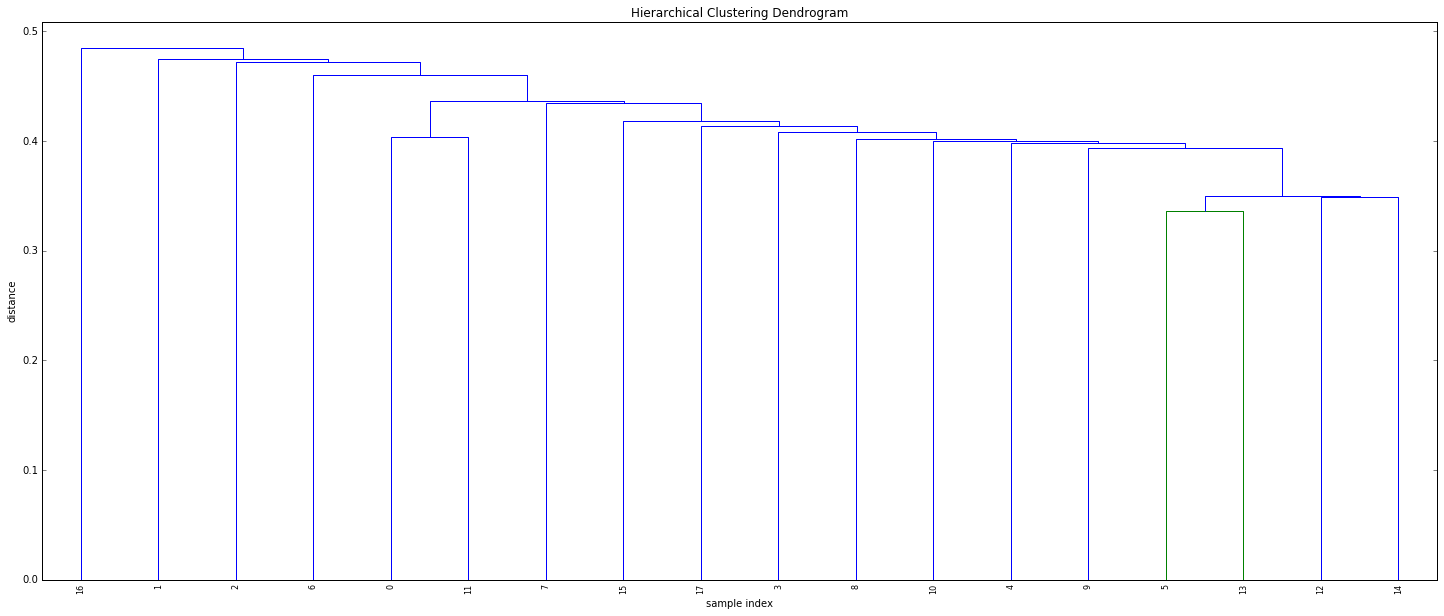

0: negotiate

1: educate

2: unify

3: subservient

4: exterminate

5: punish

6: inspect

7: protect

8: undo

9: summon

10: startle

11: settle

12: deceive

13: plead

14: forgive

15: accompany

16: unwilling

17: seek

(3, 100)


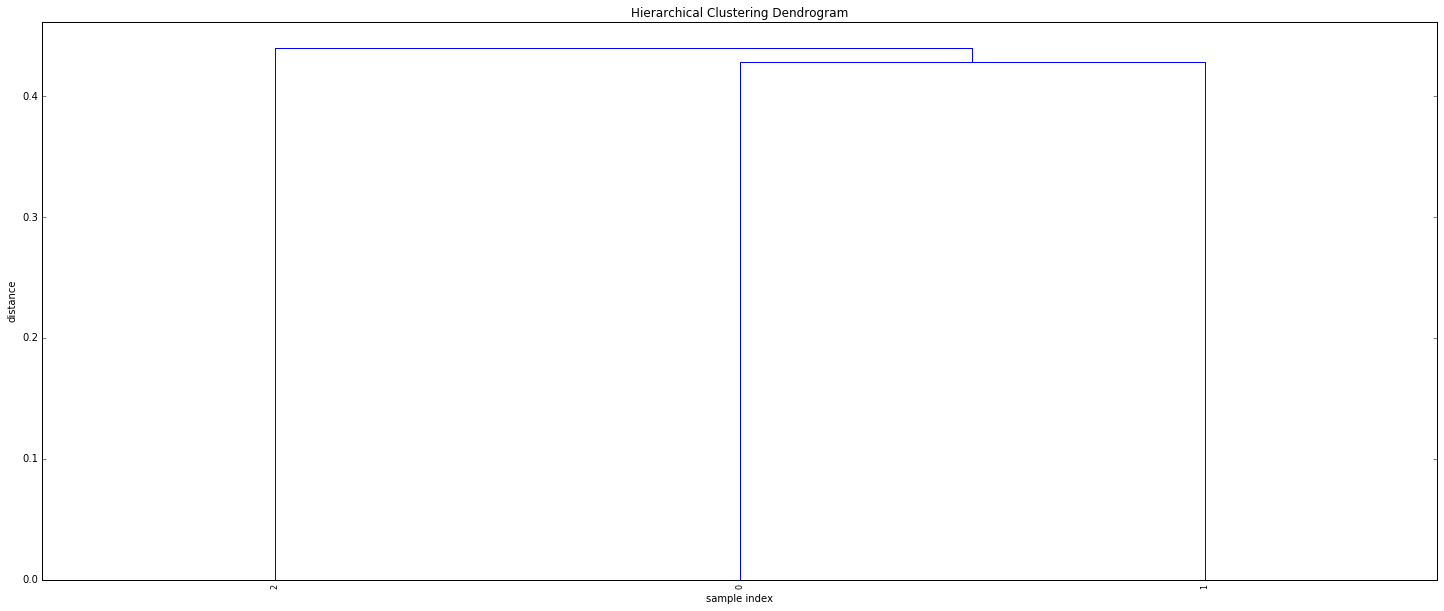

0: flogging

1: beheading

2: courting

(32, 100)


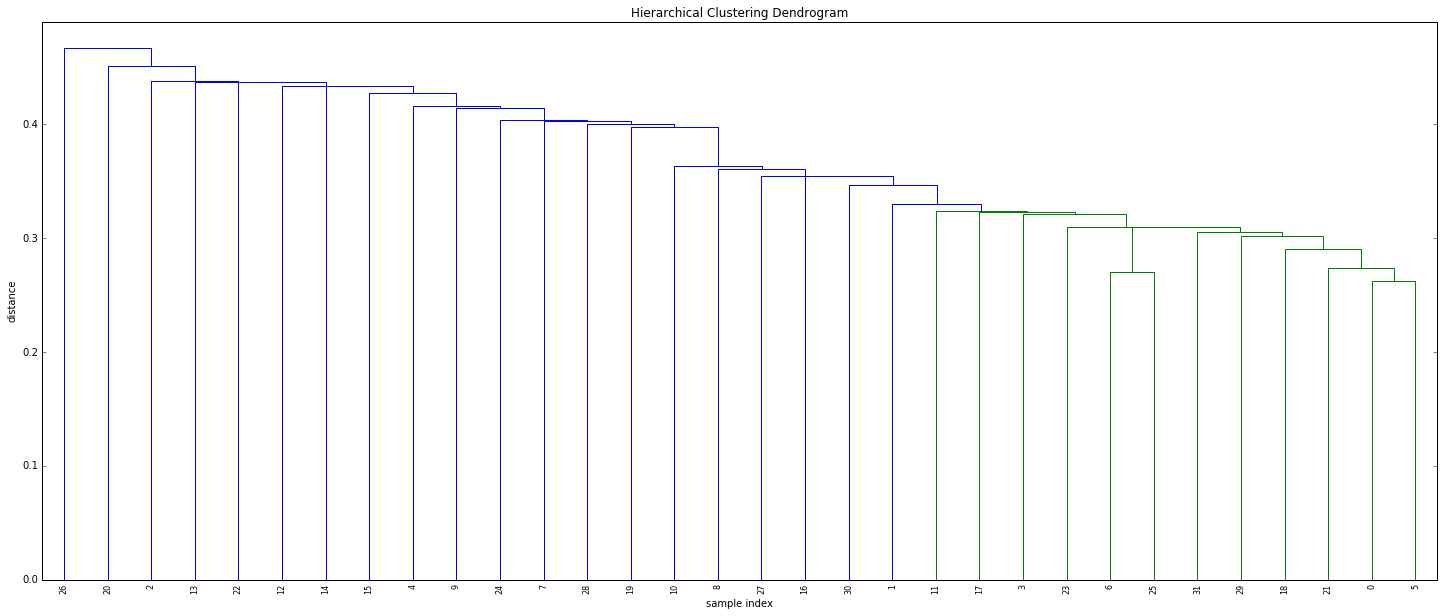

0: taffy

1: carpe

2: tarry

3: bruise

4: paragon

5: orientalist

6: taj

7: sari

8: clueless

9: amputee

10: hag

11: fib

12: panacea

13: tiara

14: mommy

15: yuletide

16: posh

17: lei

18: bib

19: playmate

20: caduceus

21: snipe

22: vestry

23: bam

24: patchwork

25: choo

26: dpg

27: mand

28: cartwheel

29: maharaj

30: blush

31: quatrain

(4, 100)


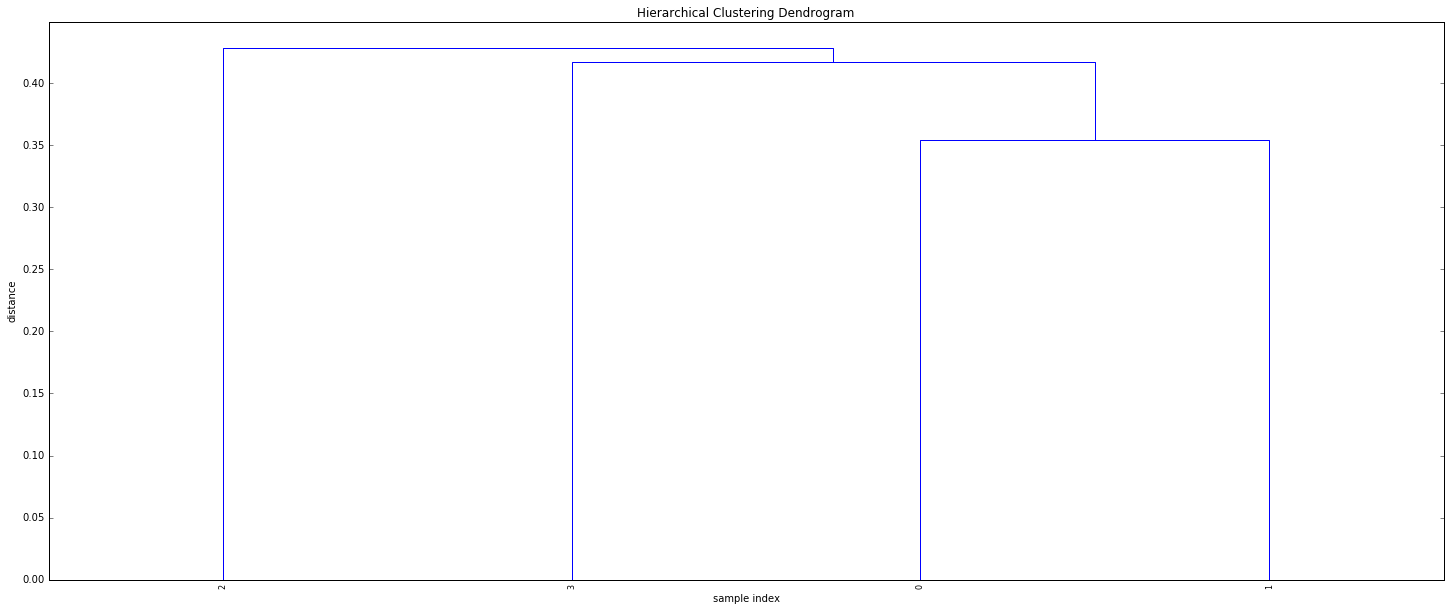

0: elfland

1: emp

2: popeye

3: yeoman

(10, 100)


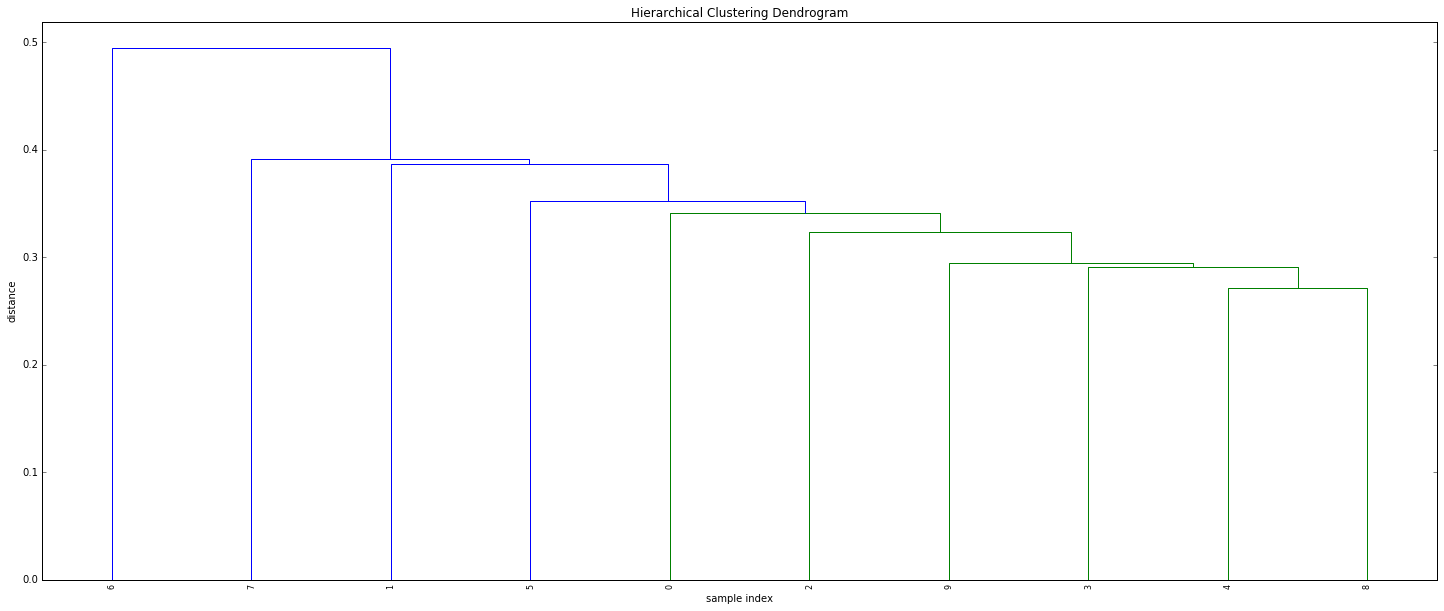

0: tabasco

1: mahal

2: petite

3: virginal

4: fairytale

5: understatement

6: vagrant

7: prom

8: jovial

9: taj

(4, 100)


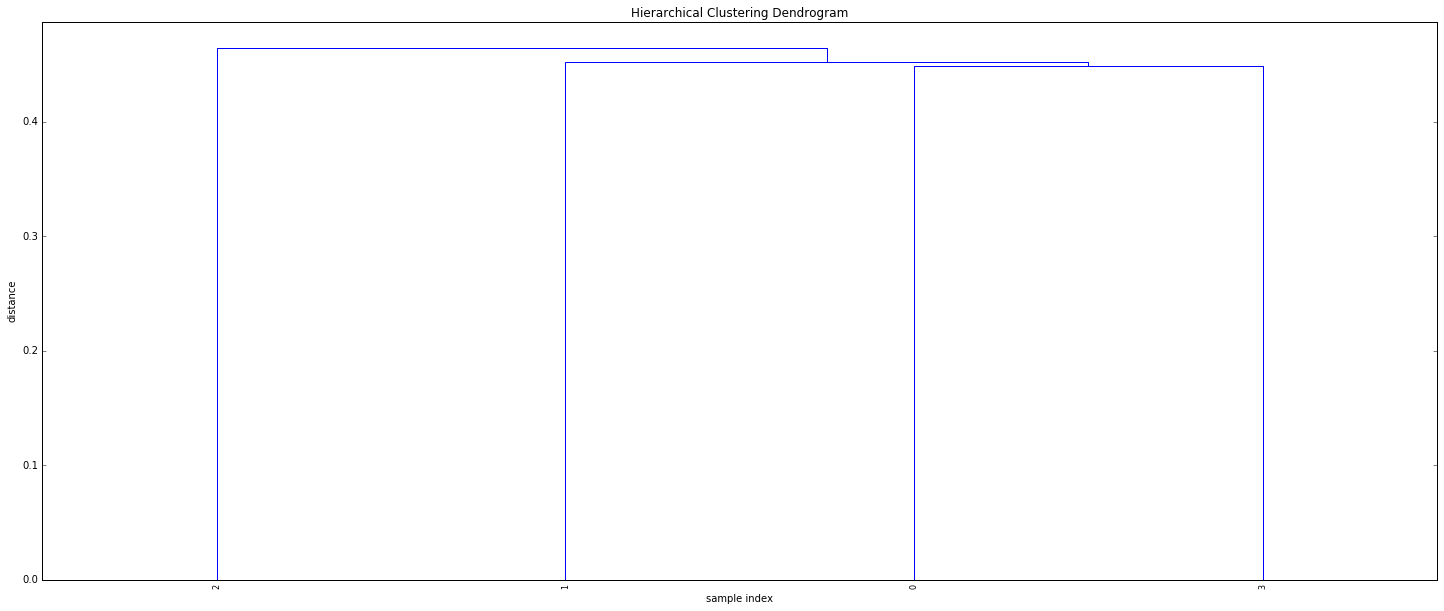

0: seagulls

1: minutemen

2: shackles

3: souvenirs

(16, 100)


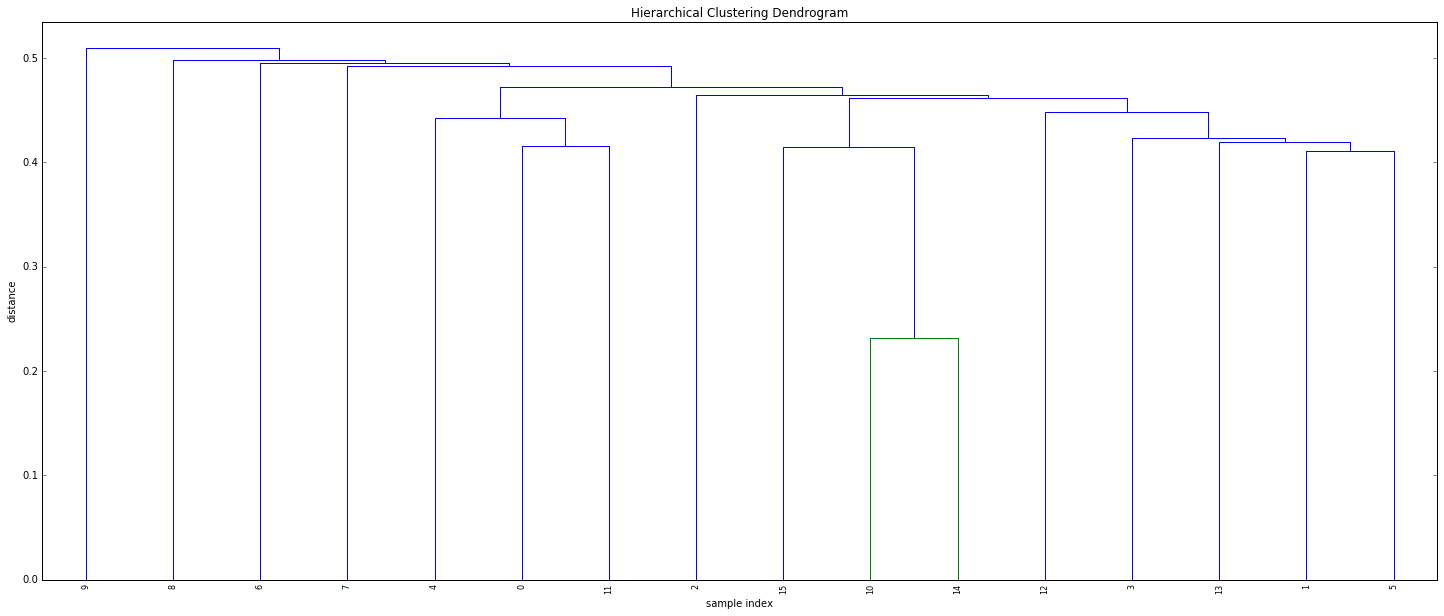

0: standing

1: pushing

2: pointing

3: reaching

4: taking

5: breaking

6: knocking

7: leaving

8: looking

9: going

10: traveling

11: holding

12: coming

13: falling

14: travelling

15: marching

(10, 100)


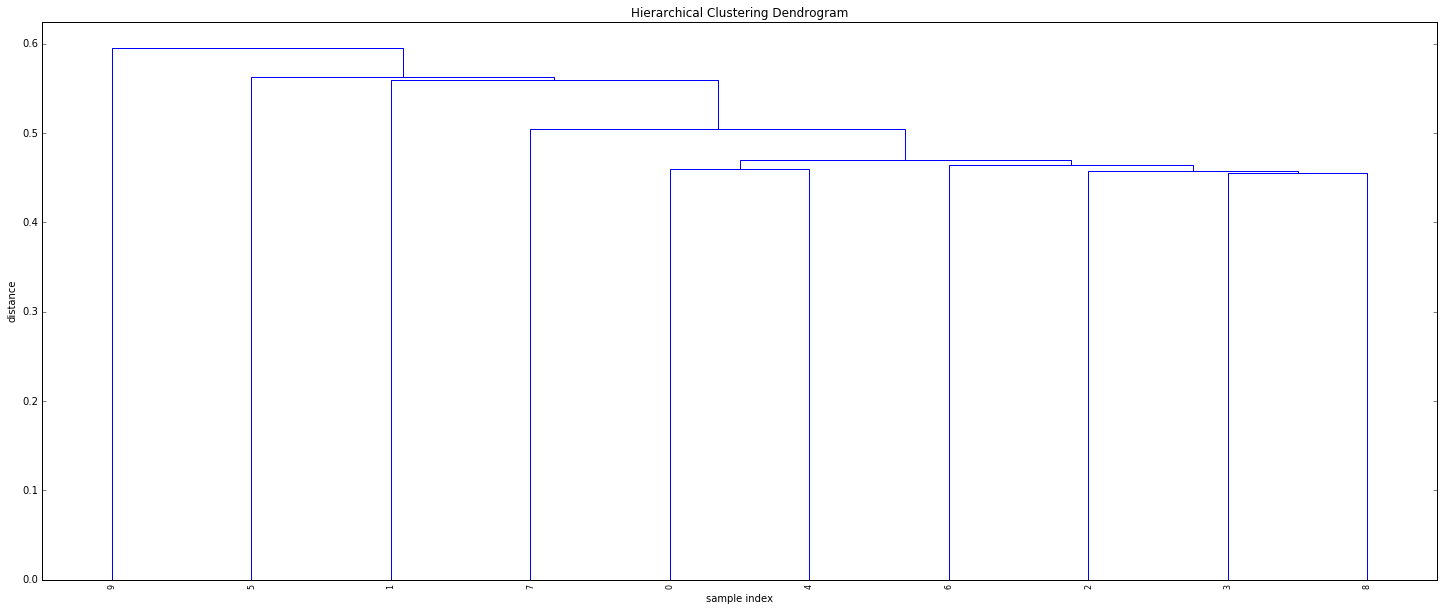

0: broken

1: ran

2: torn

3: sneak

4: stuck

5: laid

6: crossed

7: faded

8: swung

9: sat

(7, 100)


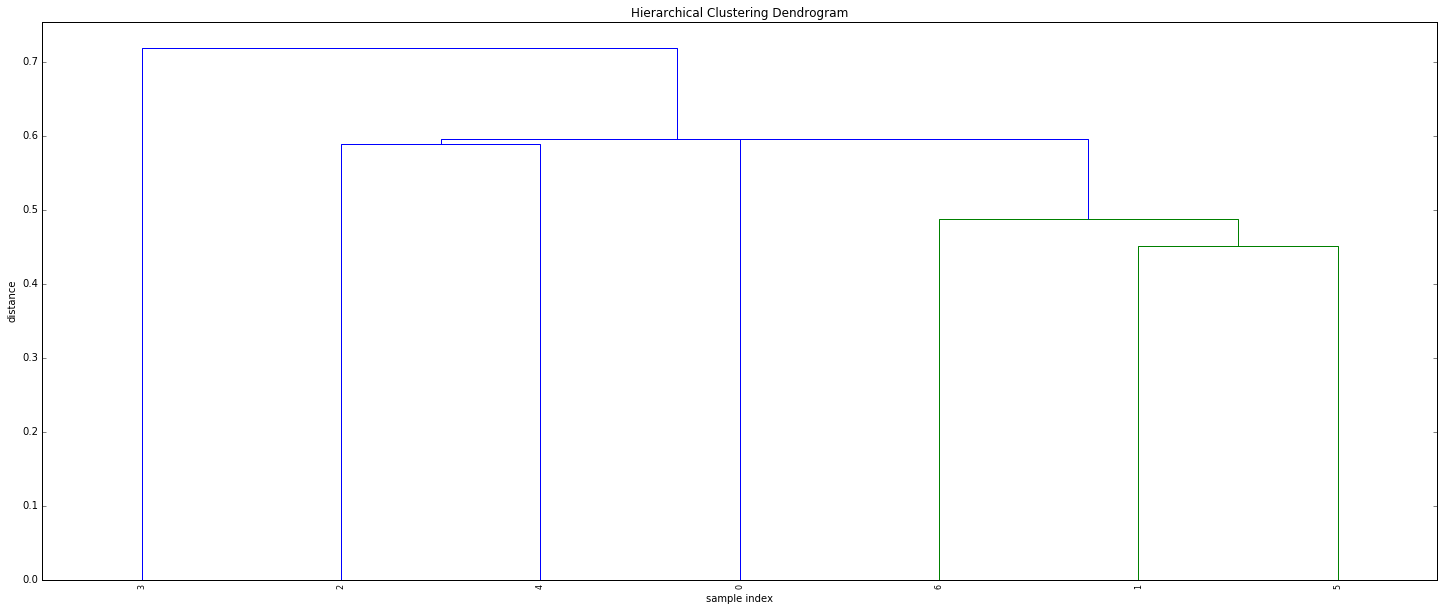

0: handing

1: caught

2: breaking

3: spread

4: split

5: hung

6: hiding

(15, 100)


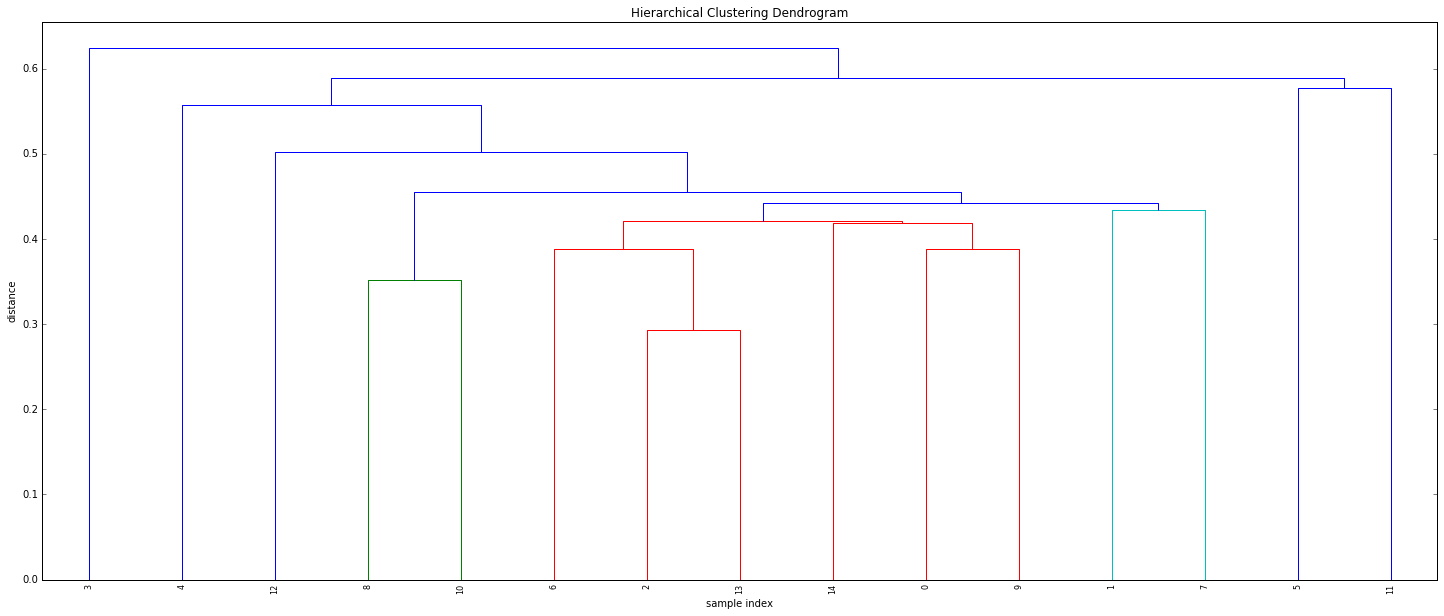

0: rose

1: got

2: rushed

3: centered

4: stripped

5: pointed

6: turned

7: ran

8: landed

9: fell

10: crossed

11: carved

12: faded

13: jumped

14: came

(6, 100)


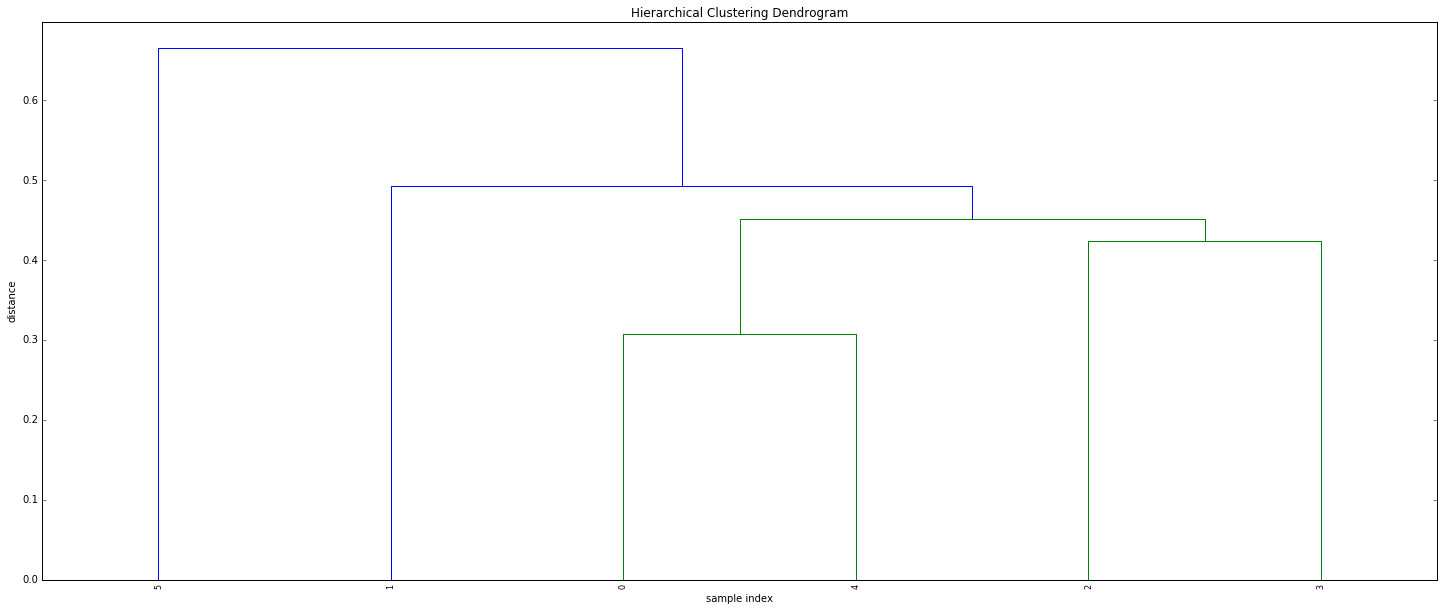

0: gone

1: capsized

2: washed

3: broken

4: fallen

5: left

(6, 100)


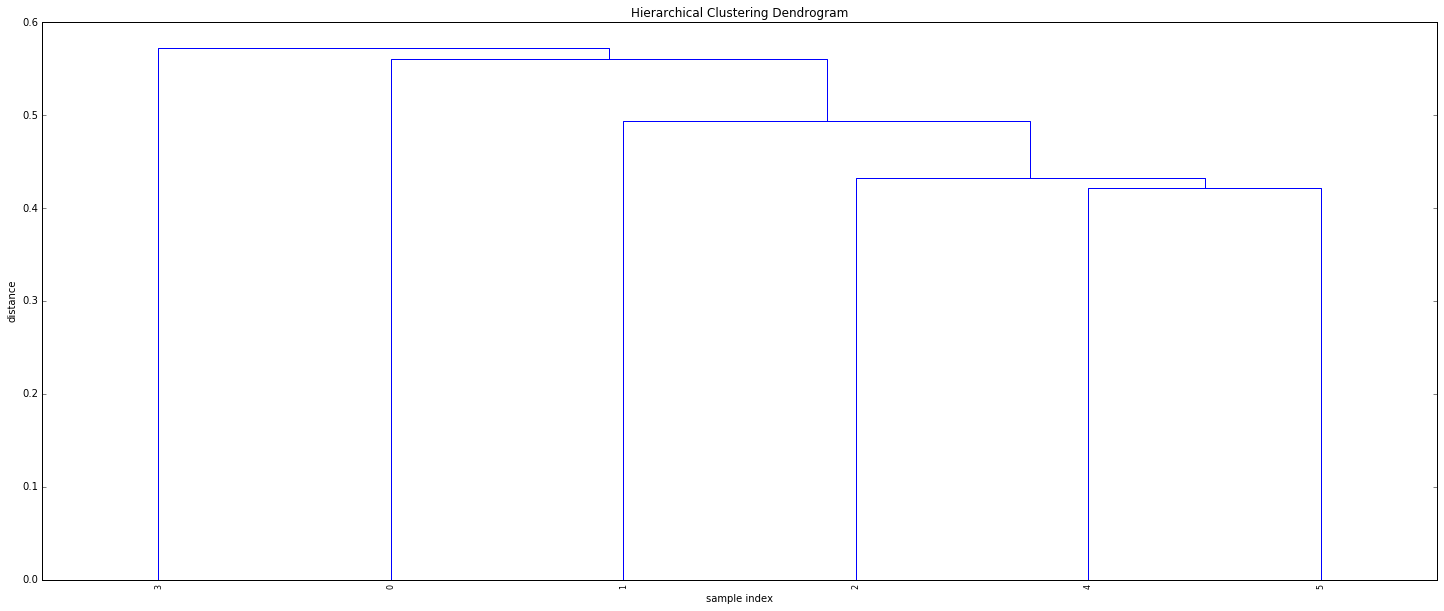

0: begins

1: splits

2: turns

3: torn

4: falls

5: sits

(4, 100)


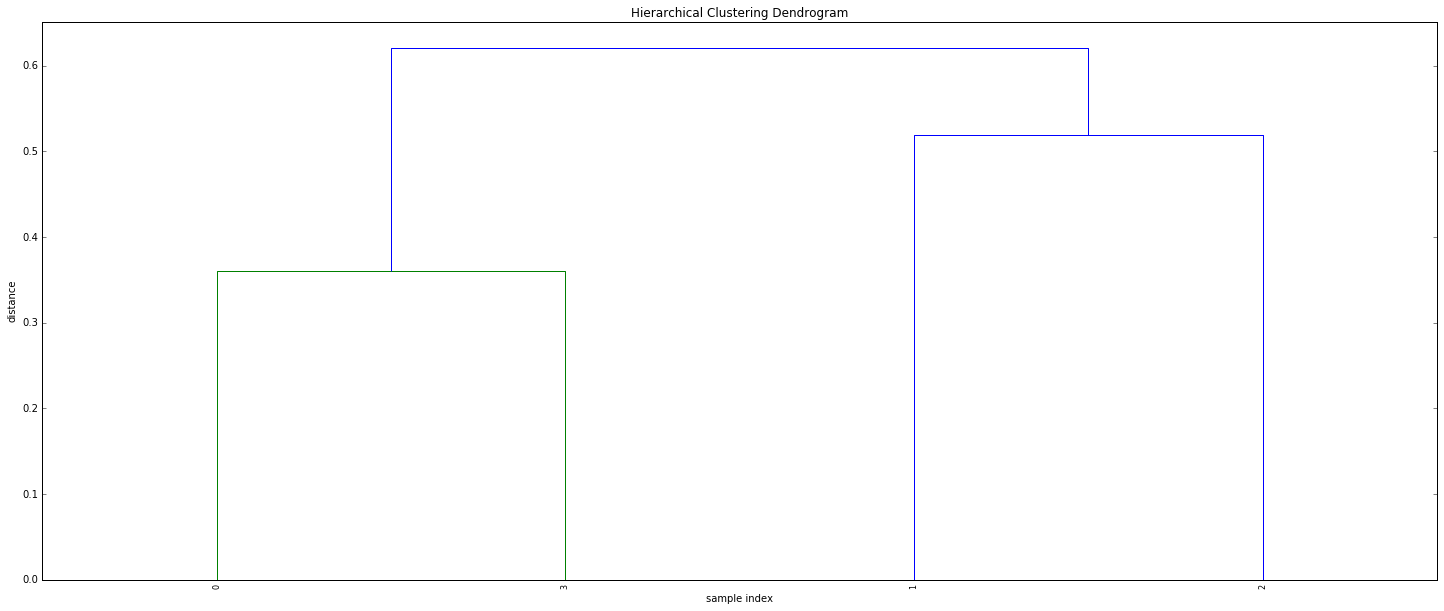

0: very

1: therefore

2: clearly

3: too

(46, 100)


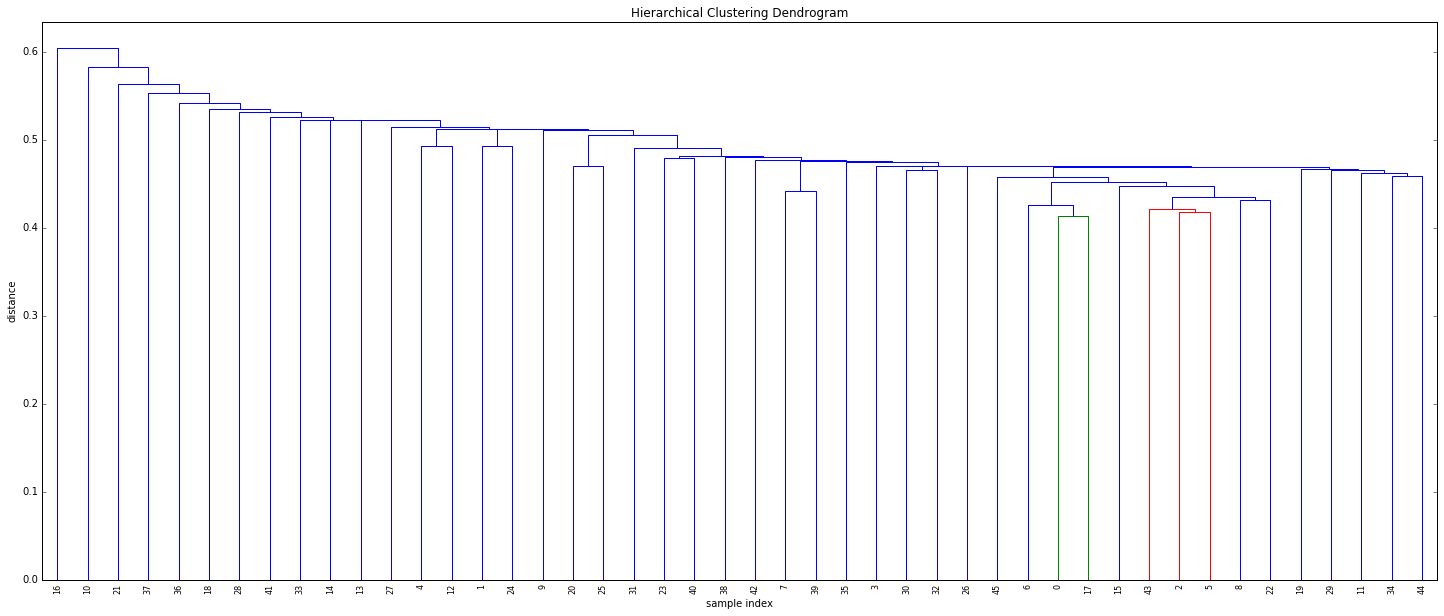

0: restriction

1: interest

2: impression

3: danger

4: focus

5: attitude

6: contradiction

7: concern

8: idea

9: goal

10: favor

11: question

12: emphasis

13: attraction

14: disparity

15: doubt

16: role

17: condition

18: way

19: confusion

20: connotation

21: contrast

22: belief

23: relationship

24: importance

25: trait

26: practice

27: kind

28: choice

29: difficulty

30: intent

31: purpose

32: necessity

33: position

34: difference

35: identity

36: case

37: exception

38: experience

39: controversy

40: connection

41: contact

42: consequence

43: opinion

44: problem

45: view

(3, 100)


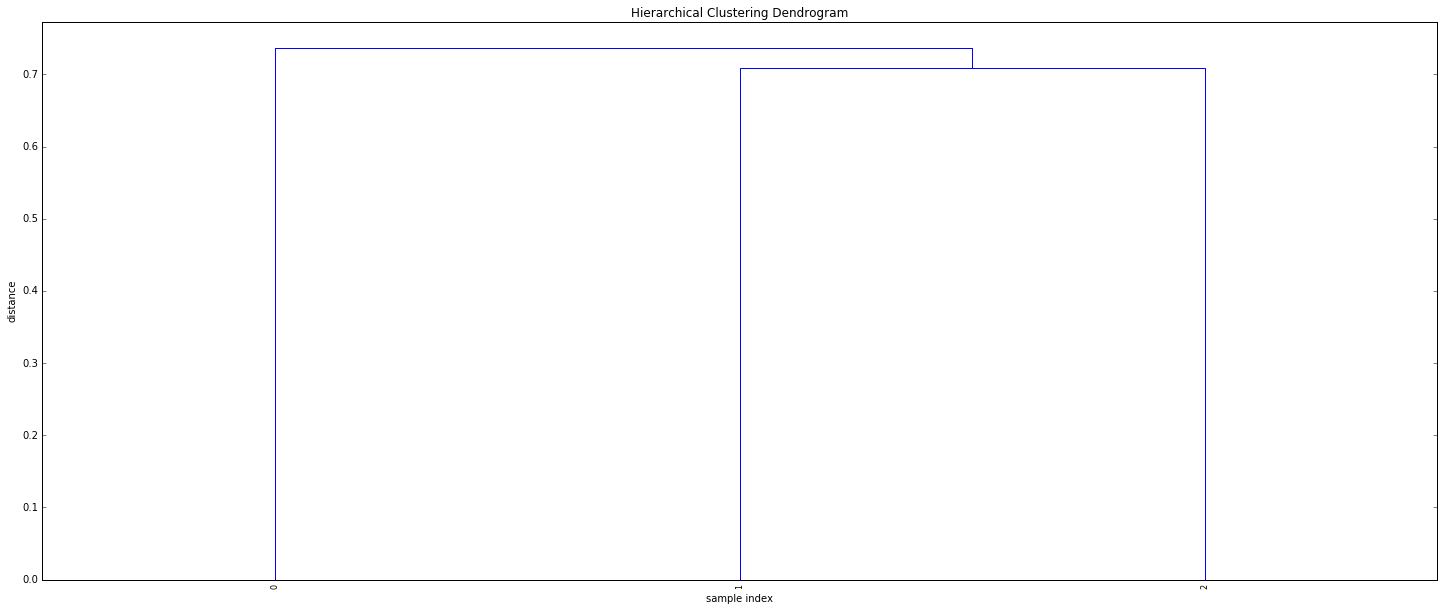

0: notice

1: skill

2: spite

(4, 100)


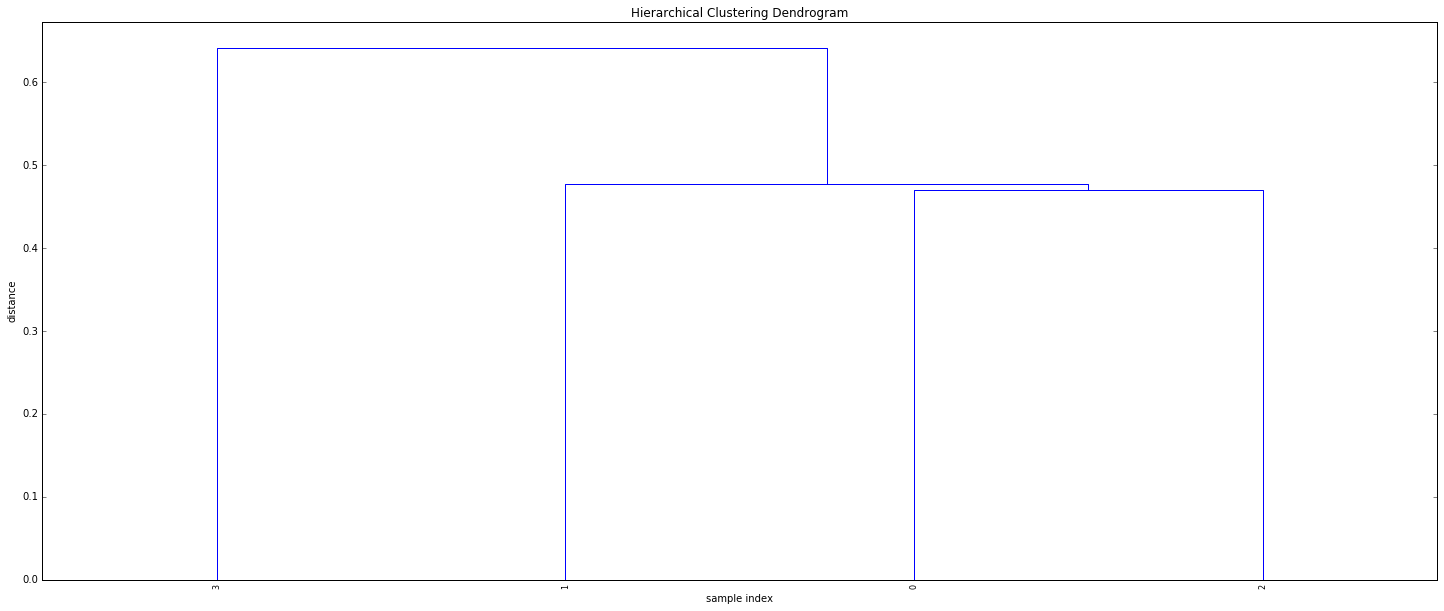

0: misspelling

1: spelling

2: rhyming

3: naming

(18, 100)


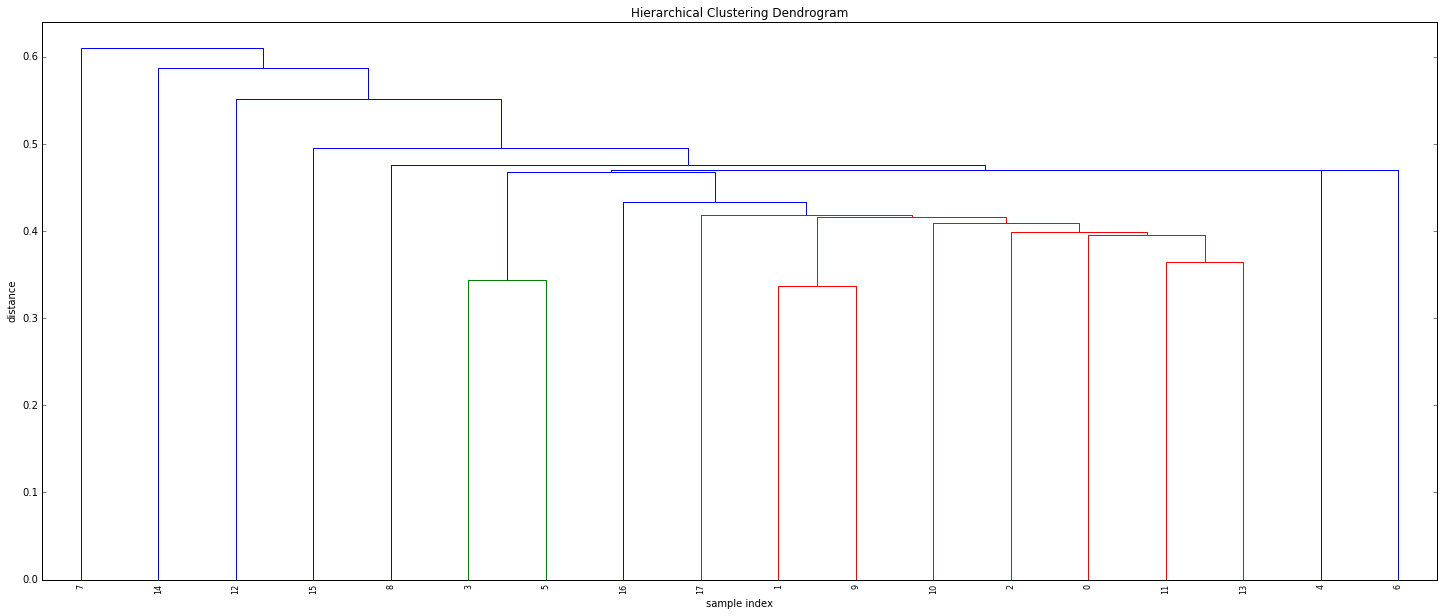

0: germanic

1: latin

2: syllabary

3: chinese

4: vocabulary

5: japanese

6: descriptive

7: obsolete

8: adjective

9: greek

10: hawaiian

11: italic

12: english

13: cursive

14: speak

15: afro

16: sami

17: asl

(24, 100)


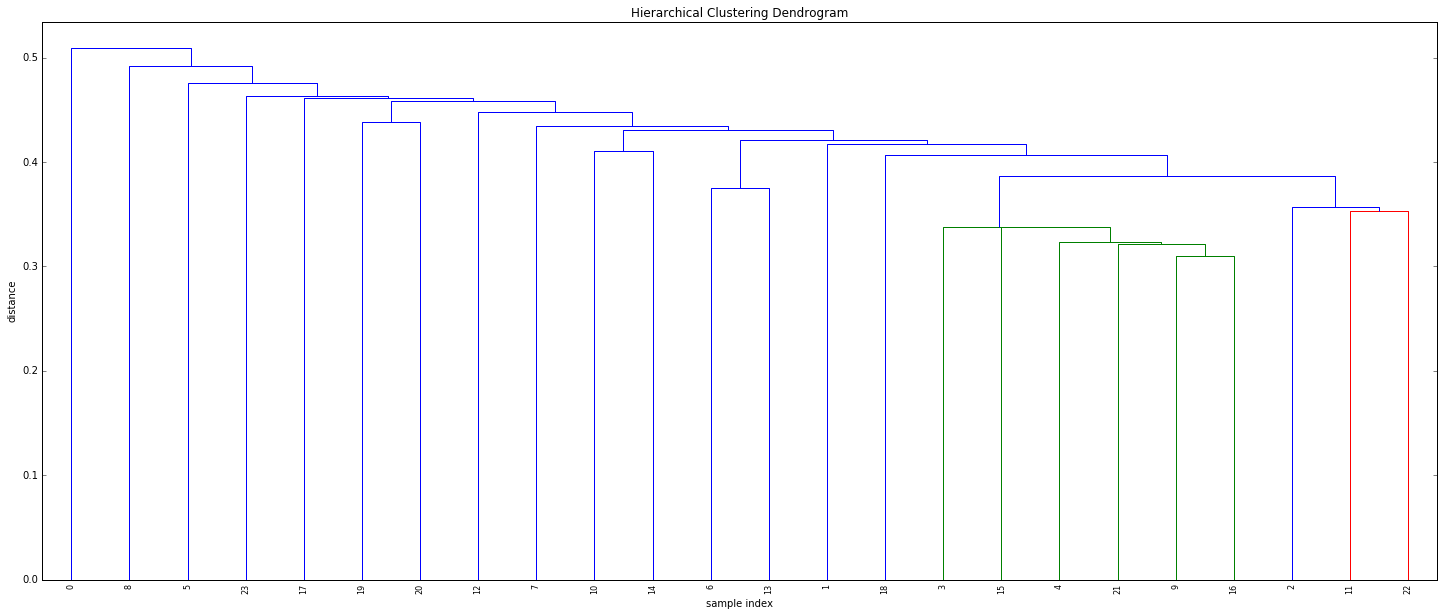

0: pronounce

1: afro

2: cuisine

3: script

4: alphabet

5: literate

6: vulgar

7: romance

8: acronym

9: pronunciation

10: dutch

11: mandarin

12: speaking

13: derogatory

14: welsh

15: usage

16: grammar

17: calligraphy

18: slang

19: word

20: name

21: language

22: punjabi

23: english

(3, 100)


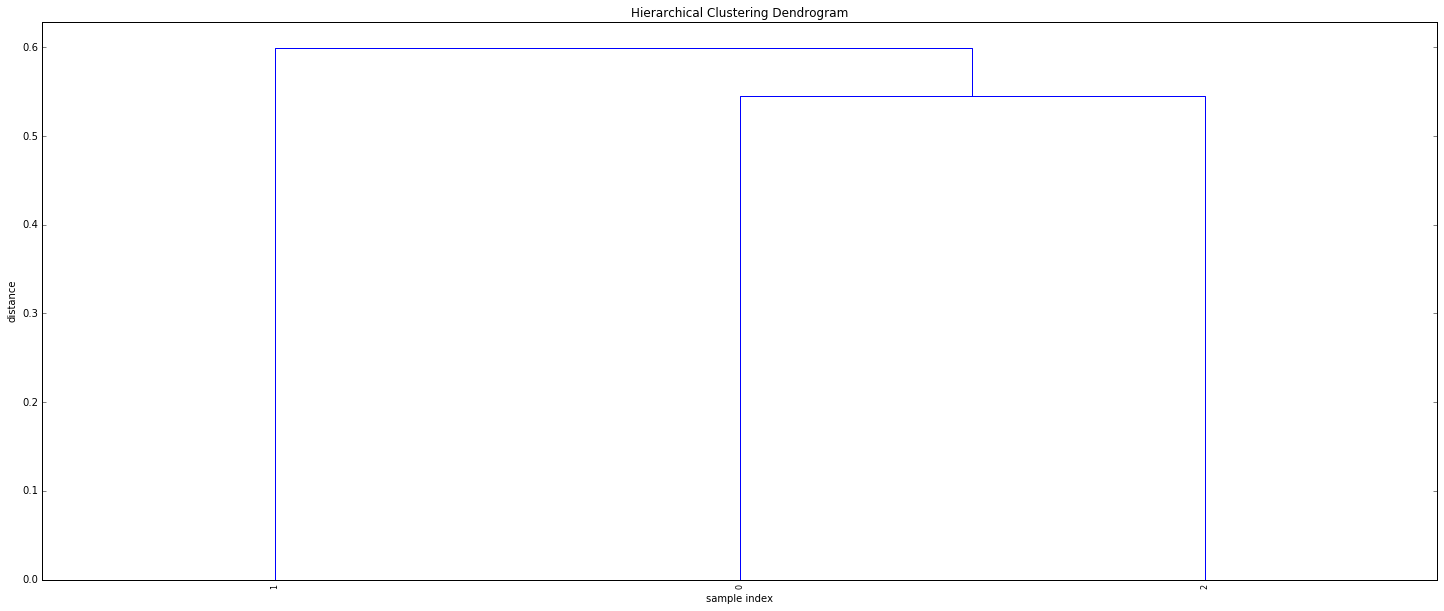

0: patronizing

1: enterprising

2: stereotyping

(8, 100)


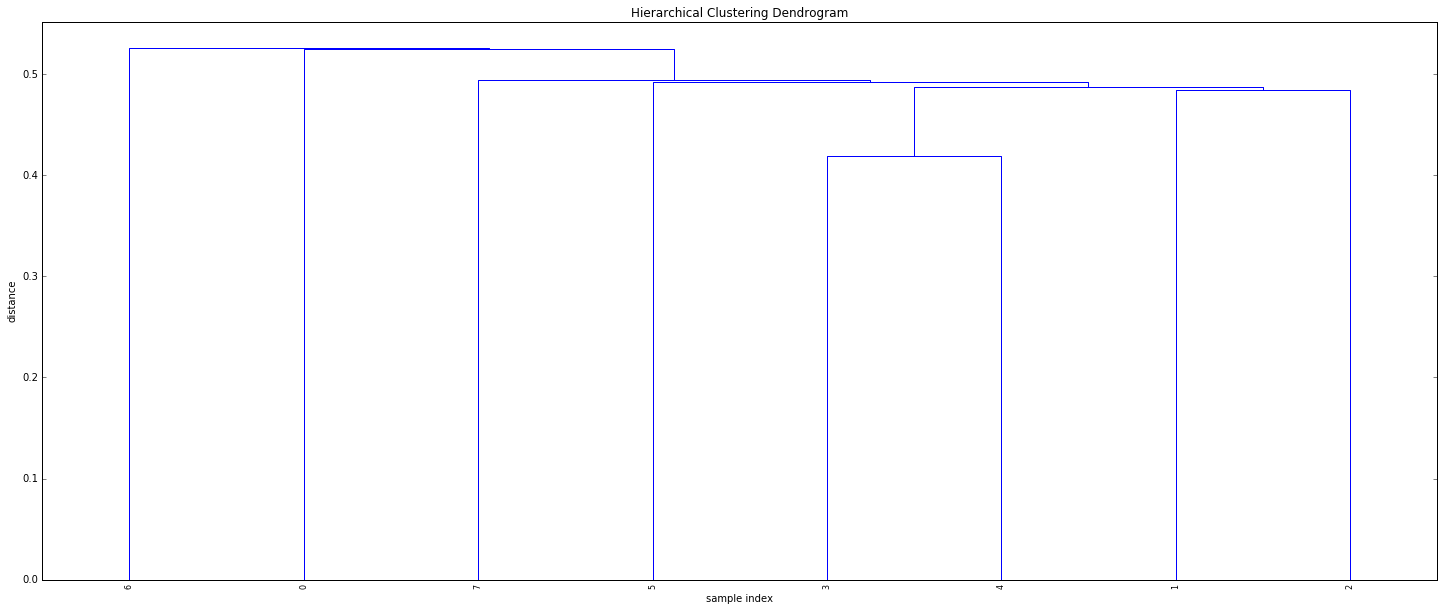

0: pomp

1: gallantry

2: civility

3: commotion

4: westernization

5: militarism

6: hospitality

7: performace

(6, 100)


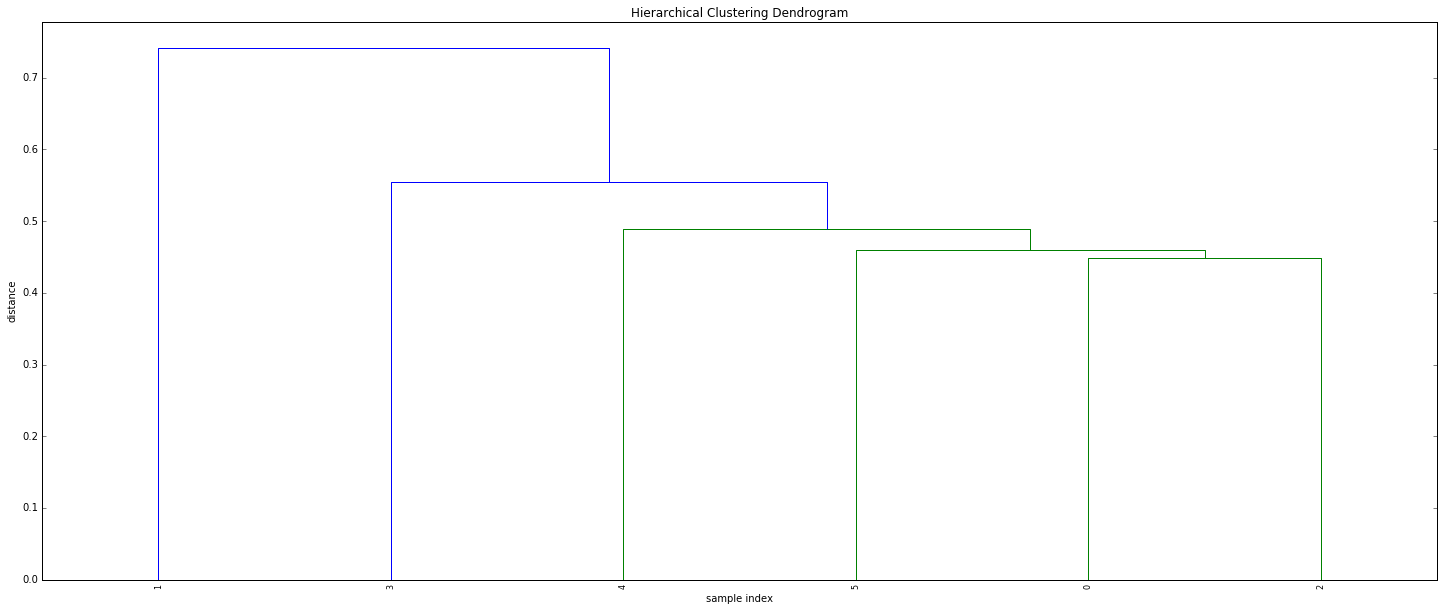

0: balochi

1: capsize

2: colonizer

3: leaderships

4: sovereigns

5: rostra

(4, 100)


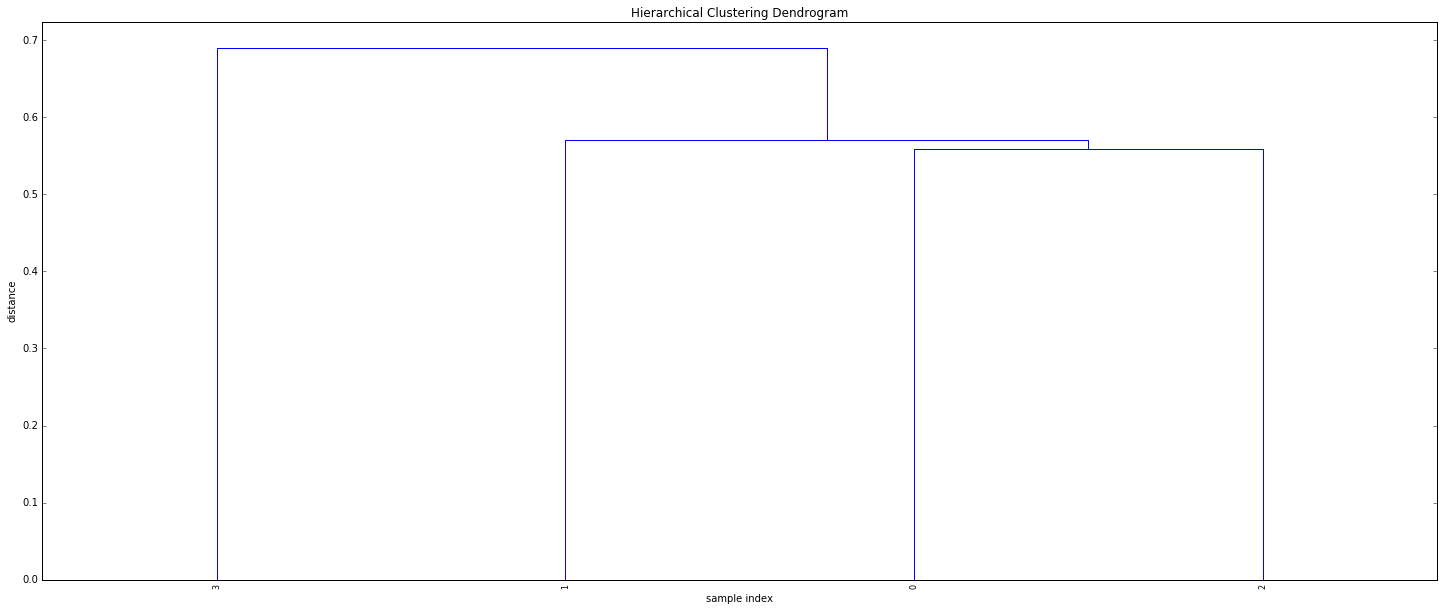

0: uneducated

1: ostracized

2: regalia

3: scramble

(10, 100)


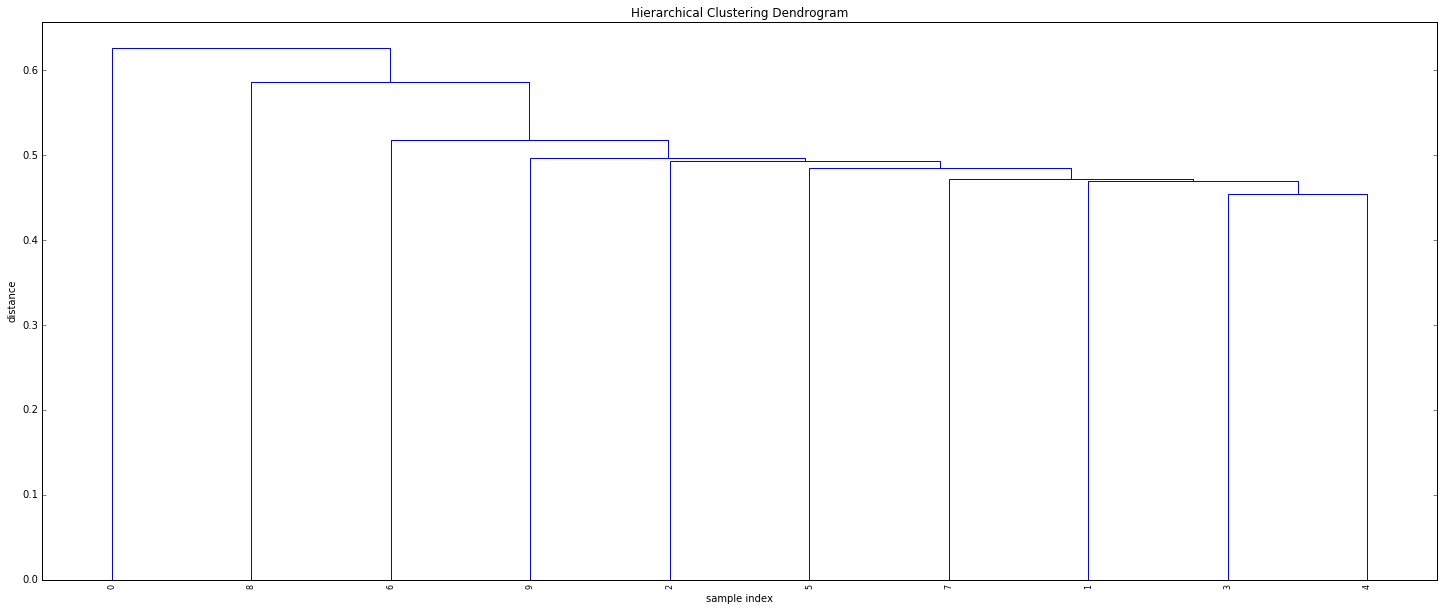

0: quails

1: commoners

2: bankers

3: aristocrats

4: aboriginals

5: seamen

6: picnics

7: firemen

8: doodles

9: whalers

(9, 100)


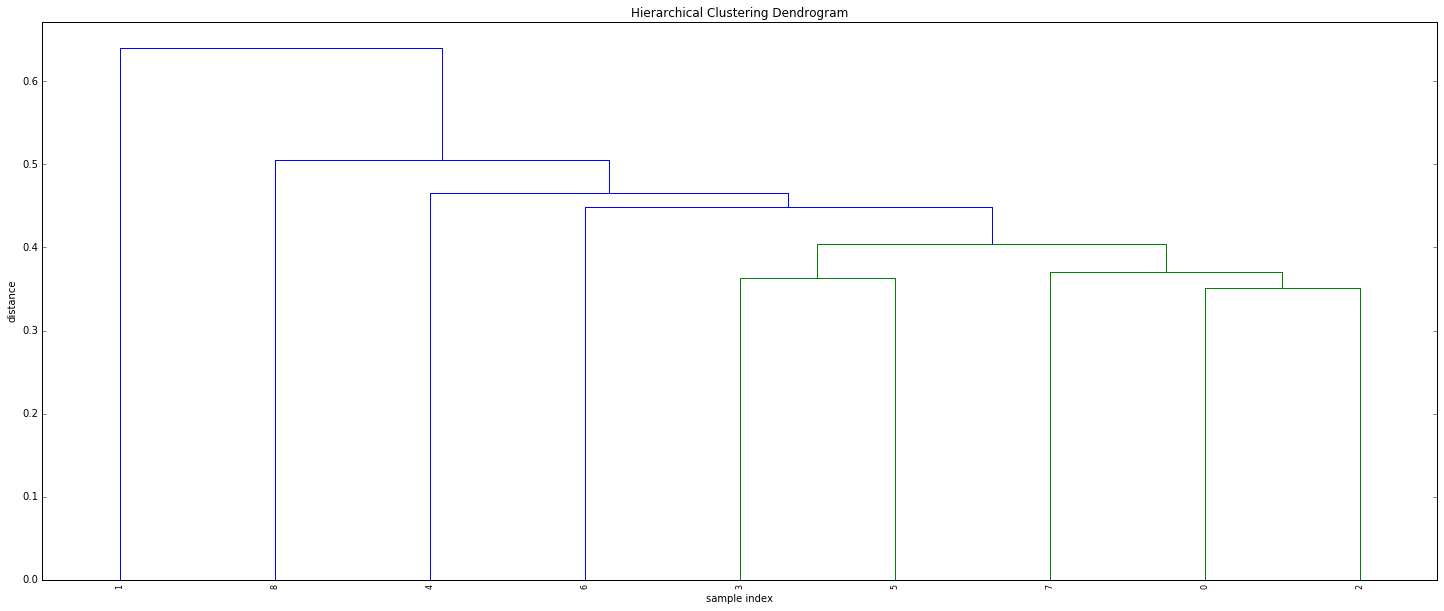

0: claus

1: paris

2: belle

3: ration

4: baton

5: fense

6: mirage

7: maestro

8: duos

(8, 100)


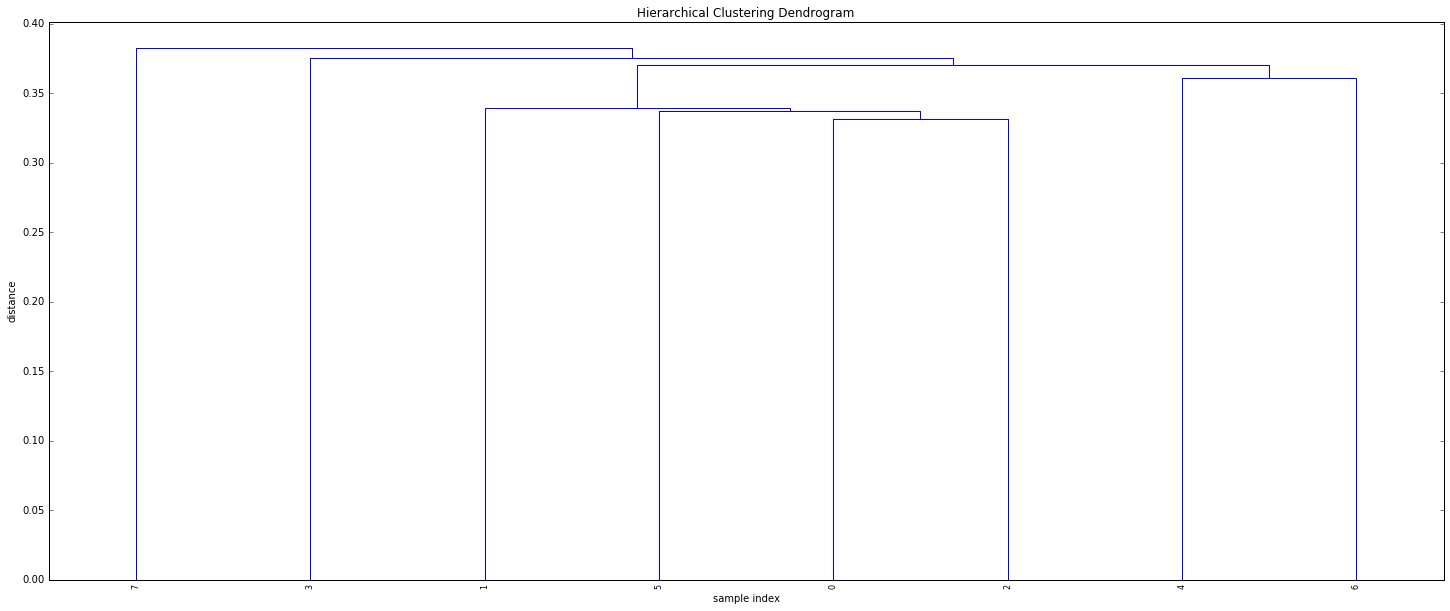

0: haute

1: rue

2: una

3: latina

4: santa

5: polo

6: fern

7: thorn

(4, 100)


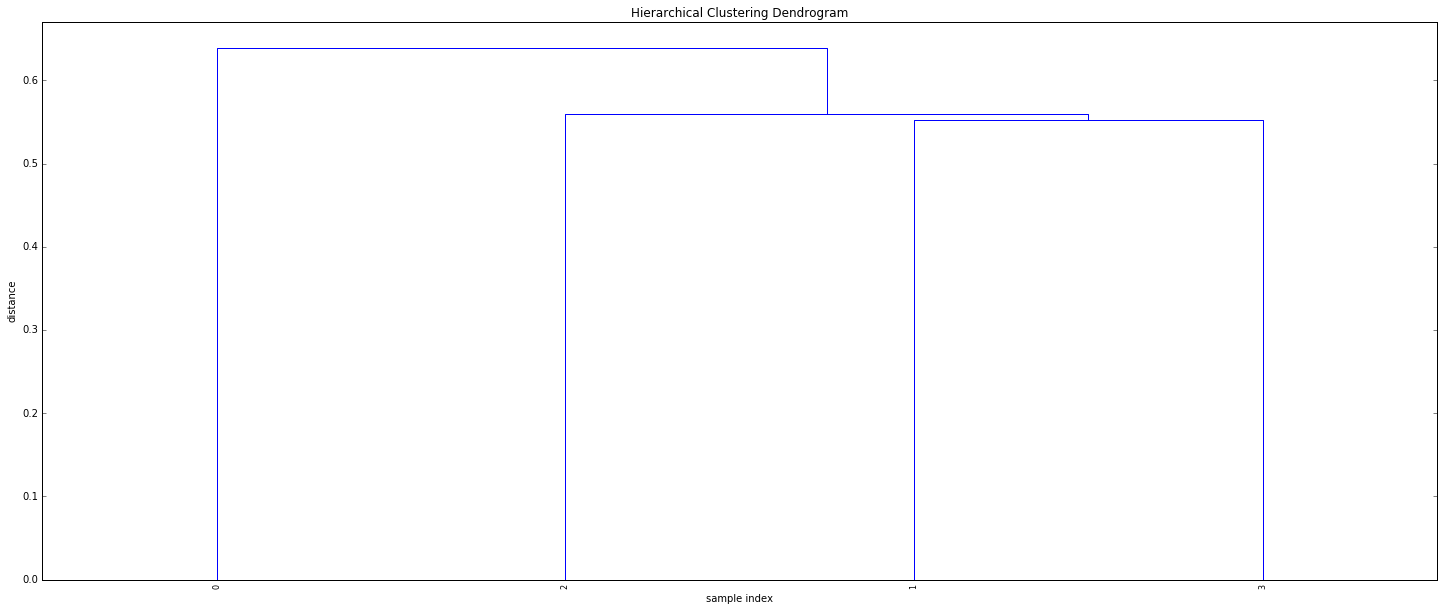

0: be

1: make

2: hold

3: classify

(28, 100)


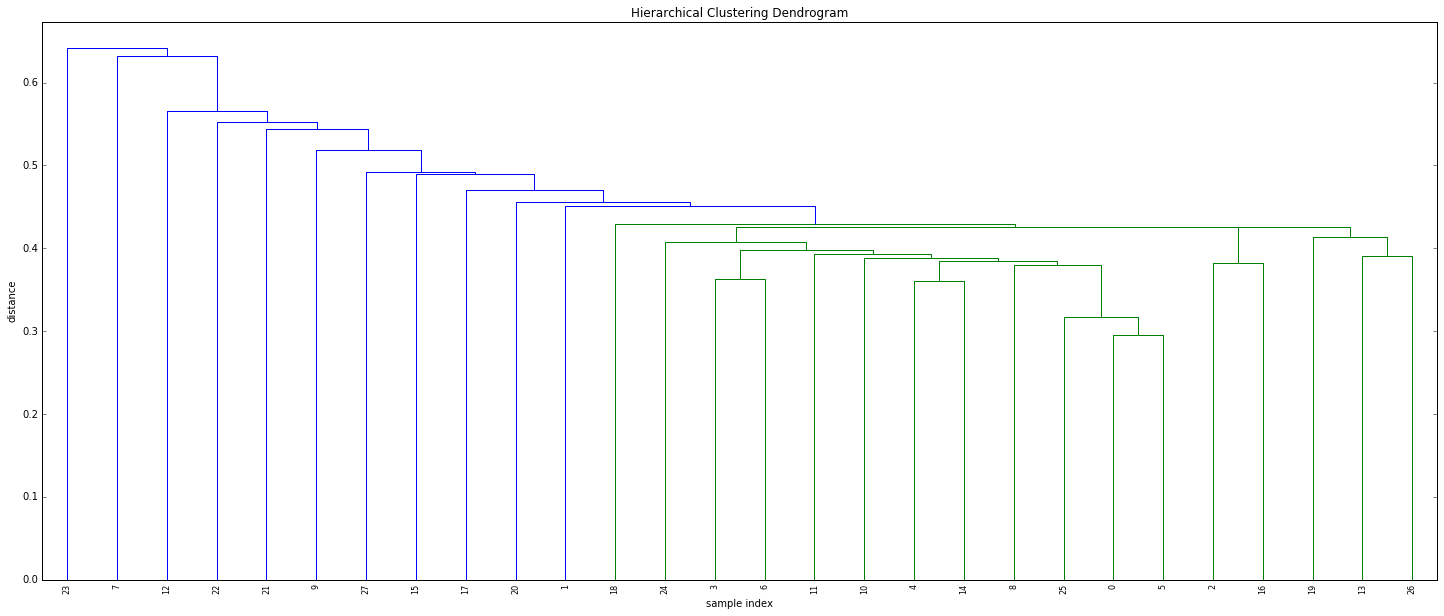

0: respond

1: exhibit

2: enjoy

3: examine

4: dictate

5: fail

6: illustrate

7: use

8: perform

9: make

10: behave

11: treat

12: blur

13: exercise

14: satisfy

15: trace

16: offer

17: serve

18: explore

19: gain

20: hold

21: change

22: retard

23: precursor

24: bind

25: ignore

26: maintain

27: mean

(8, 100)


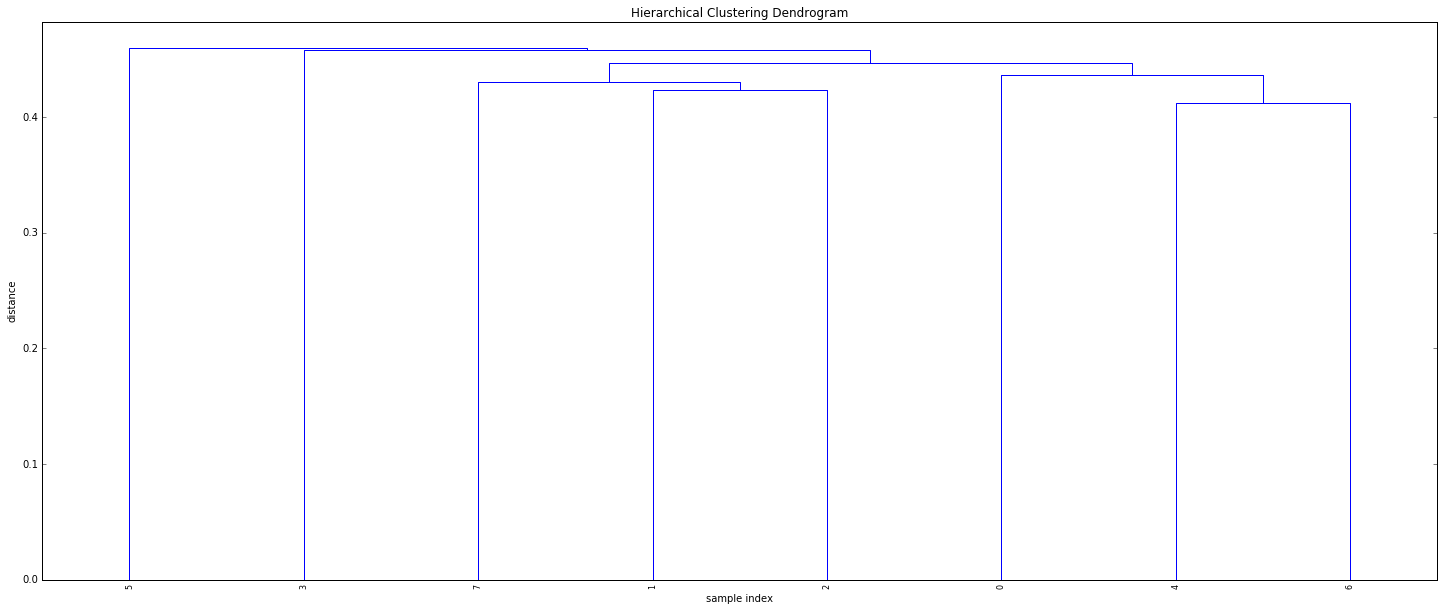

0: evolve

1: give

2: make

3: pose

4: reflect

5: produce

6: follow

7: find

(15, 100)


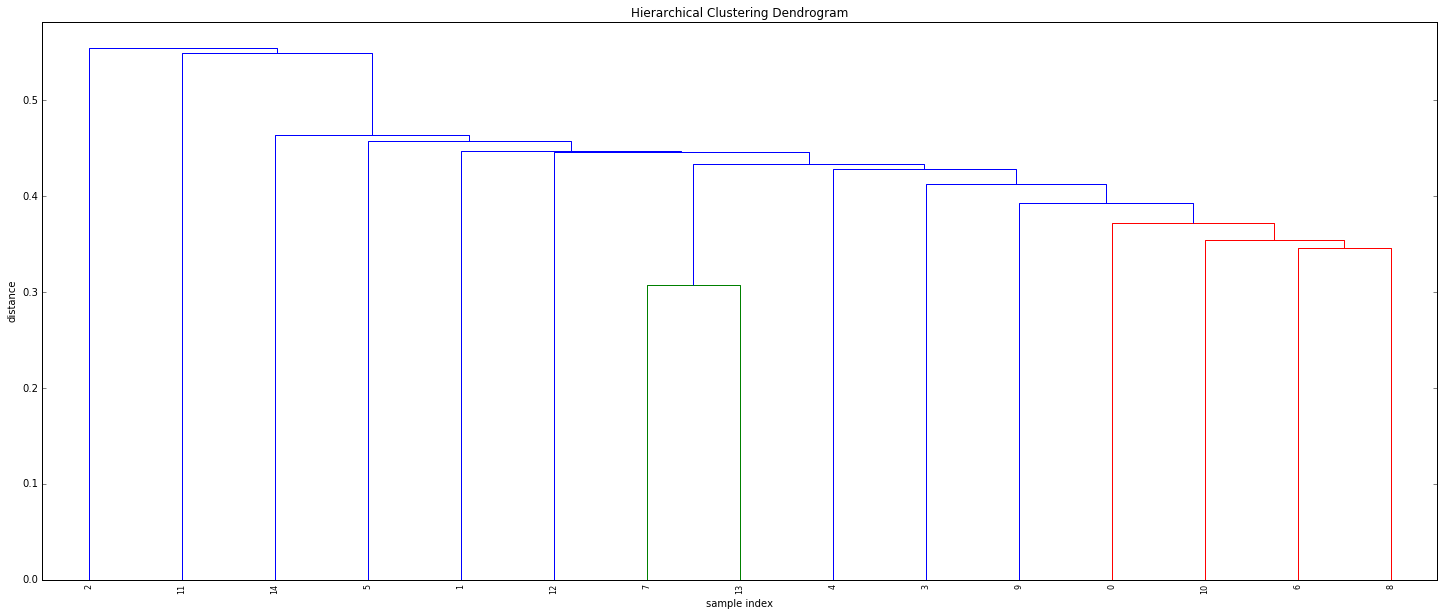

0: convert

1: engage

2: appear

3: isolate

4: fix

5: interact

6: appreciate

7: choose

8: characterize

9: mimic

10: adapt

11: flourish

12: avoid

13: select

14: consume

(4, 100)


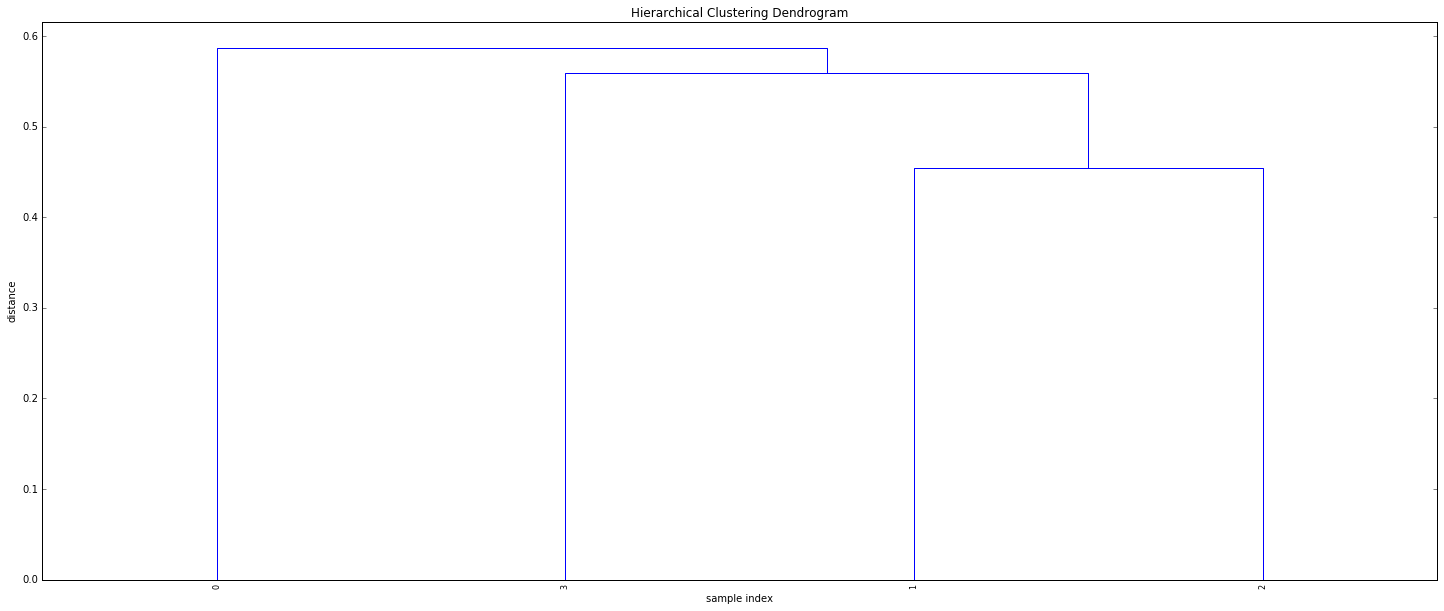

0: immersion

1: drawn

2: hidden

3: bound

(7, 100)


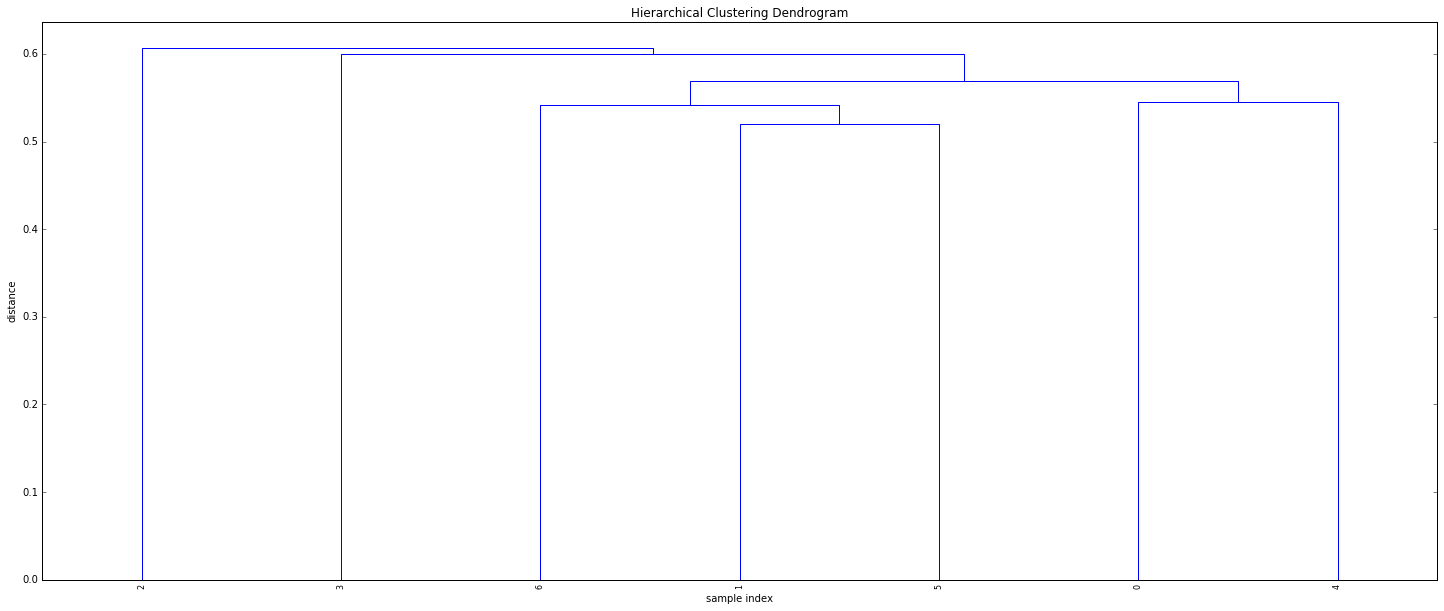

0: divided

1: isolated

2: mirrored

3: prepared

4: dissolved

5: confined

6: covered

(13, 100)


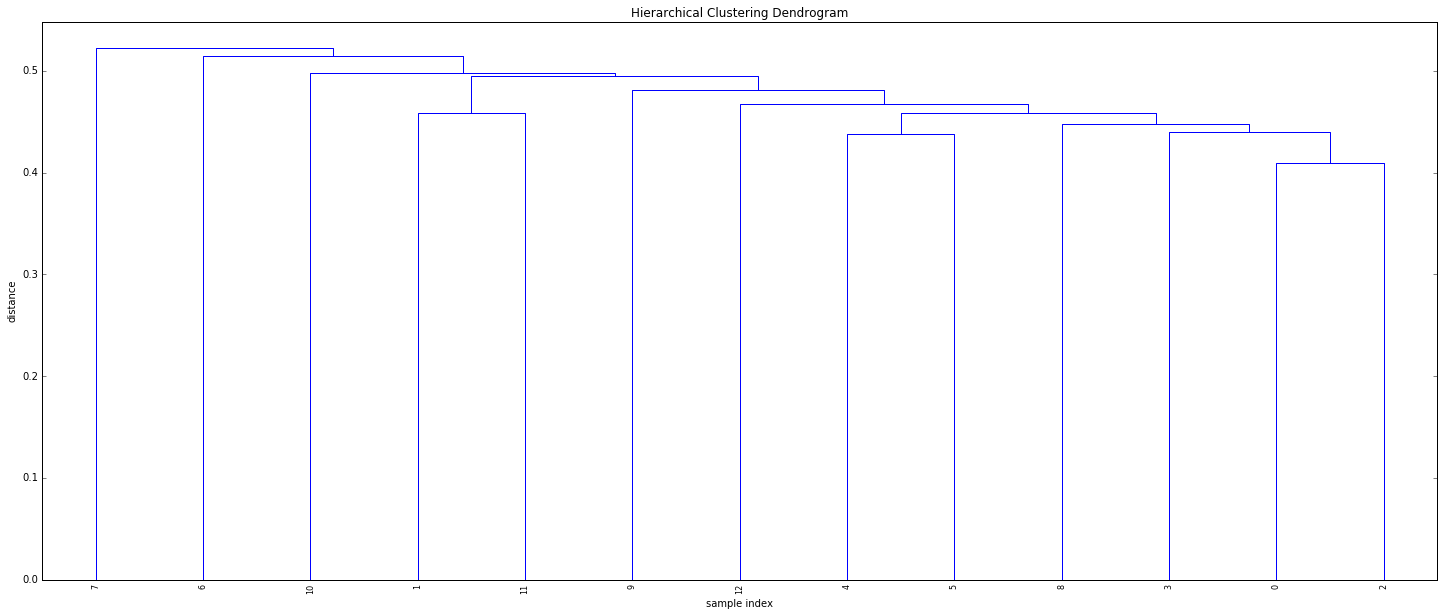

0: fed

1: rendered

2: exposed

3: exhausted

4: distracted

5: stolen

6: magnified

7: targeted

8: protected

9: connected

10: enclosed

11: taken

12: covered

(5, 100)


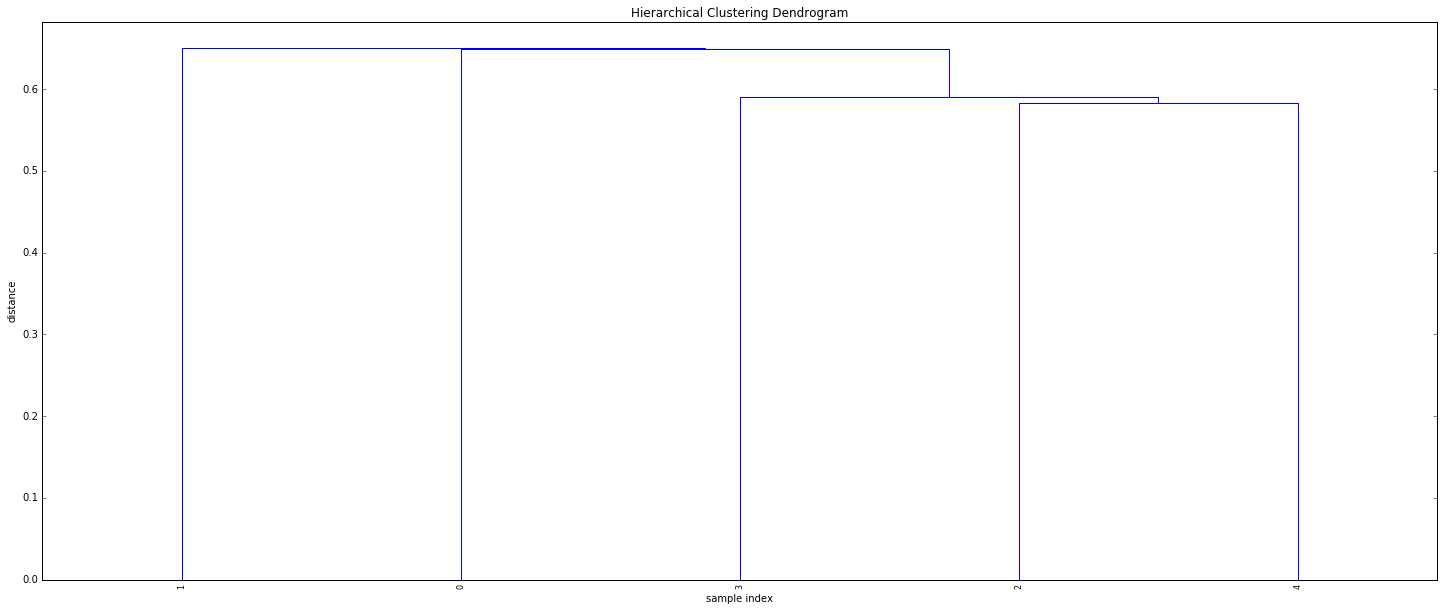

0: uncovered

1: unoccupied

2: determined

3: excited

4: worn

(4, 100)


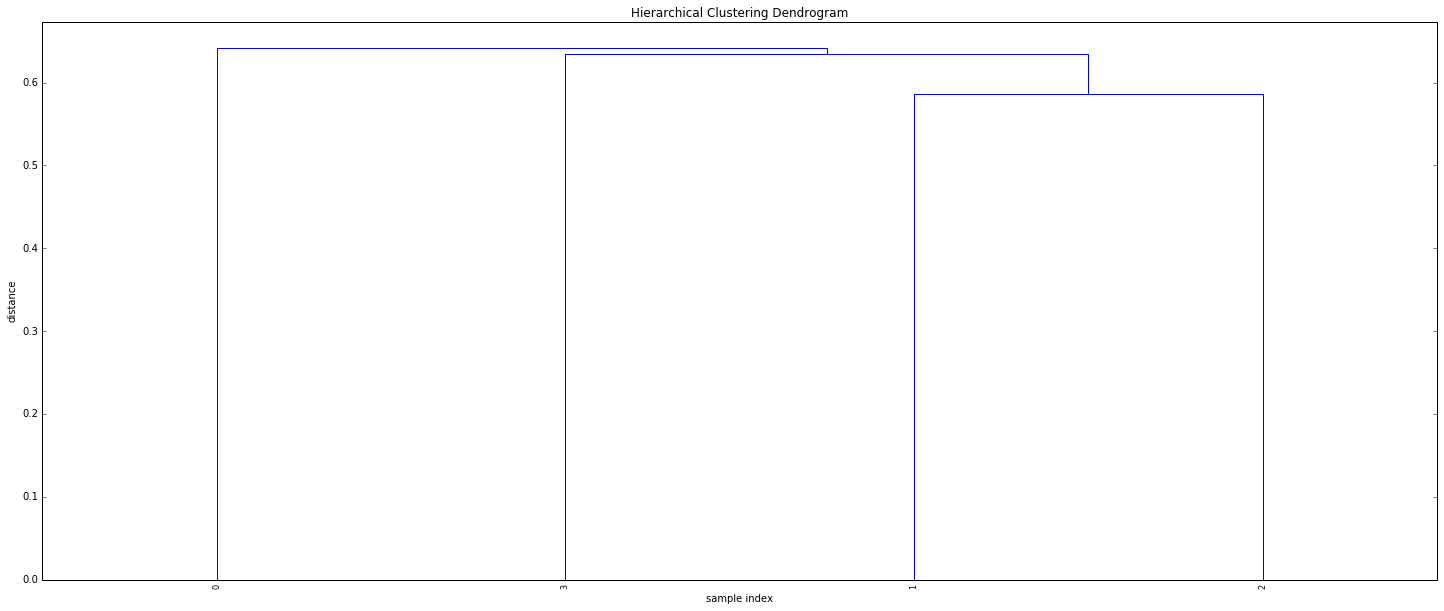

0: scratch

1: divide

2: separation

3: borrow

(12, 100)


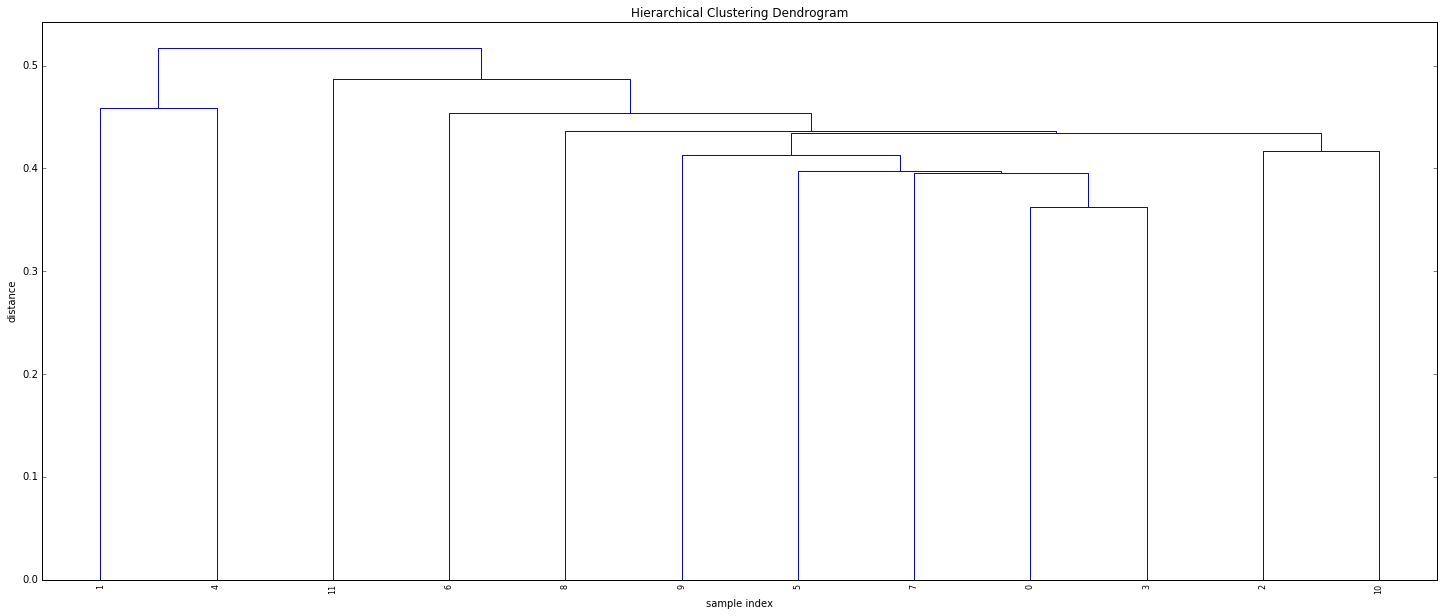

0: mystical

1: ancient

2: subtitle

3: allegorical

4: egyptian

5: mystic

6: didactic

7: literal

8: hieroglyphic

9: oriental

10: pictorial

11: oral

(21, 100)


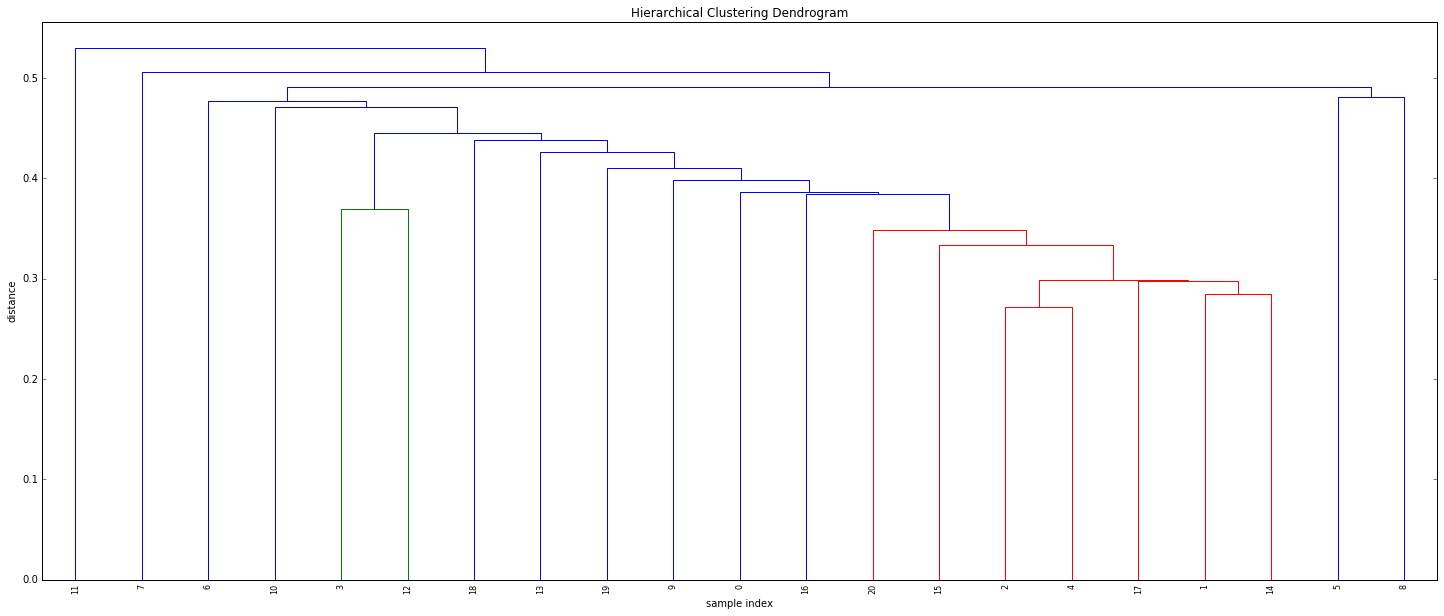

0: antisemitism

1: zoroastrianism

2: taoist

3: ancient

4: taoism

5: nag

6: primate

7: illuminati

8: sage

9: modernity

10: anthropomorphism

11: desecration

12: antiquity

13: consolation

14: monotheism

15: sikhism

16: stoic

17: mysticism

18: puritanism

19: superstition

20: astrology

(14, 100)


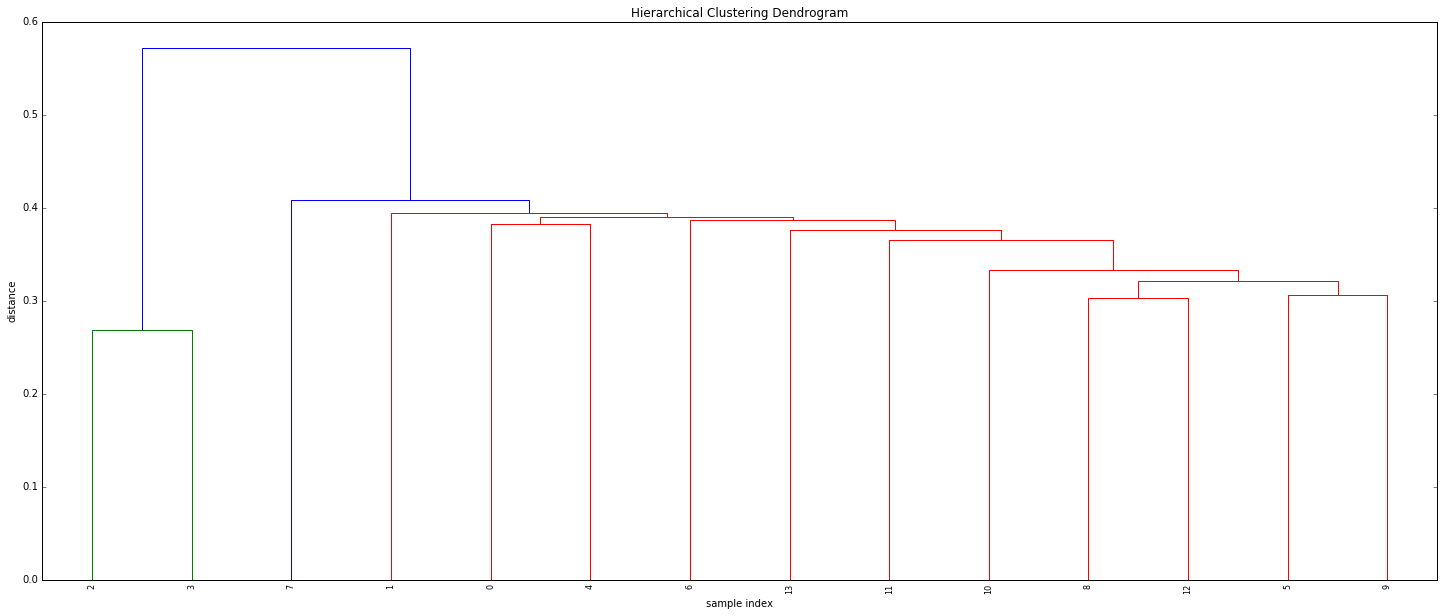

0: nobleman

1: cyclist

2: b

3: d

4: astrologer

5: writer

6: engineer

7: pioneer

8: scientist

9: painter

10: journalist

11: victor

12: chemist

13: explorer

(12, 100)


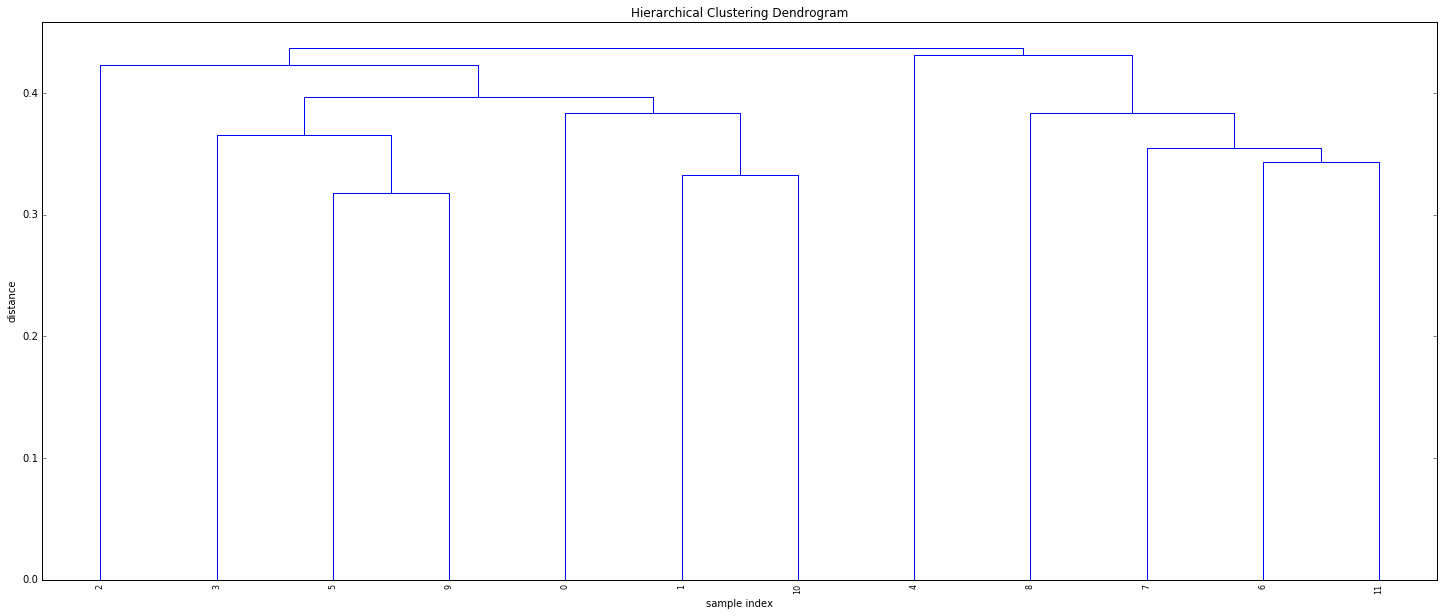

0: nobleman

1: scholar

2: conductor

3: zoologist

4: german

5: athlete

6: french

7: norwegian

8: scottish

9: pianist

10: missionary

11: italian

(18, 100)


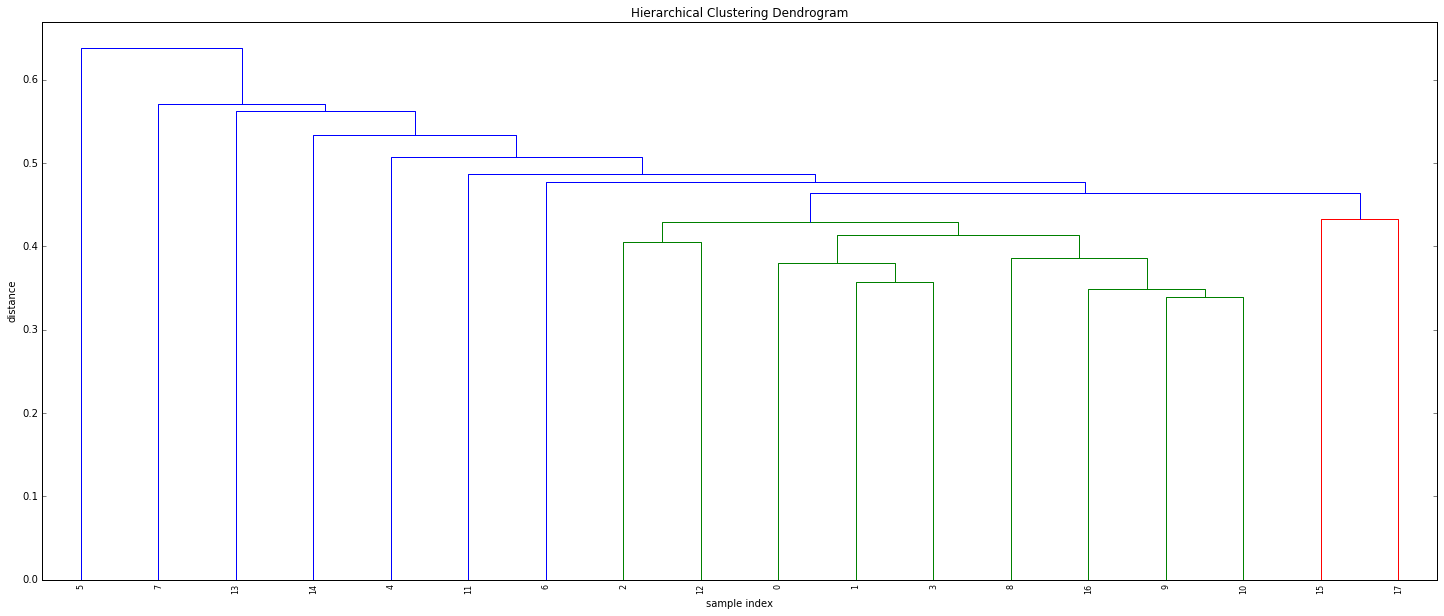

0: wage

1: surplus

2: consumption

3: manpower

4: dollar

5: household

6: proportion

7: cash

8: budget

9: rate

10: cost

11: poverty

12: income

13: share

14: literacy

15: agriculture

16: price

17: economy

(3, 100)


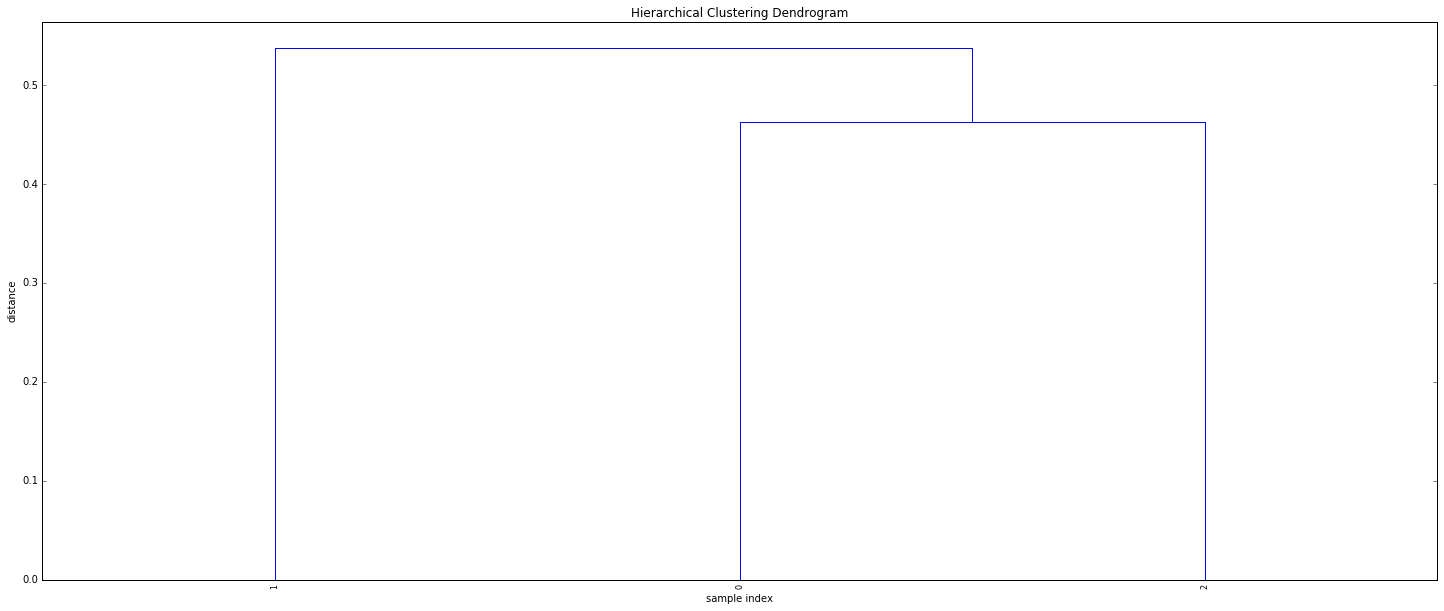

0: wages

1: sales

2: gains

(26, 100)


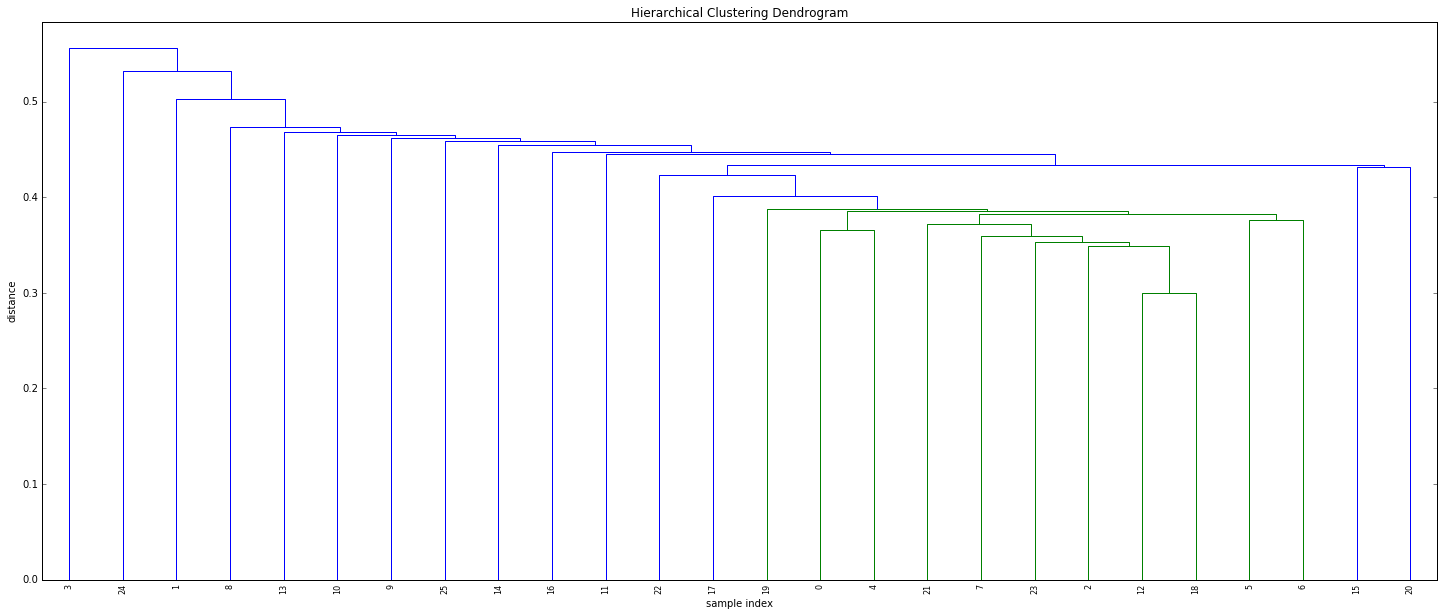

0: barking

1: teasing

2: sting

3: flattering

4: hissing

5: dueling

6: ripping

7: smiling

8: thrilling

9: wielding

10: frightening

11: bullfighting

12: shouting

13: booing

14: wondering

15: crouching

16: sewing

17: mocking

18: screaming

19: galloping

20: reclining

21: raping

22: stalking

23: kissing

24: tipping

25: glittering

(9, 100)


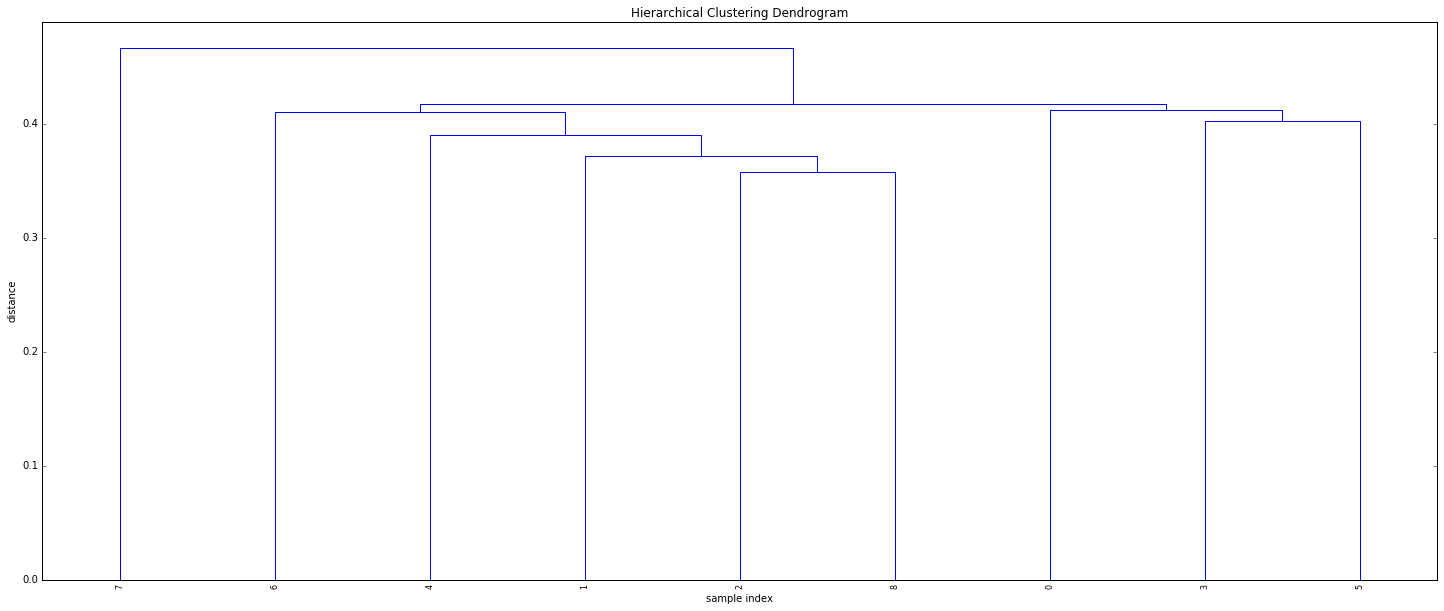

0: stately

1: bully

2: sly

3: cowardly

4: jolly

5: bakery

6: pointy

7: runaway

8: raven

(165, 100)


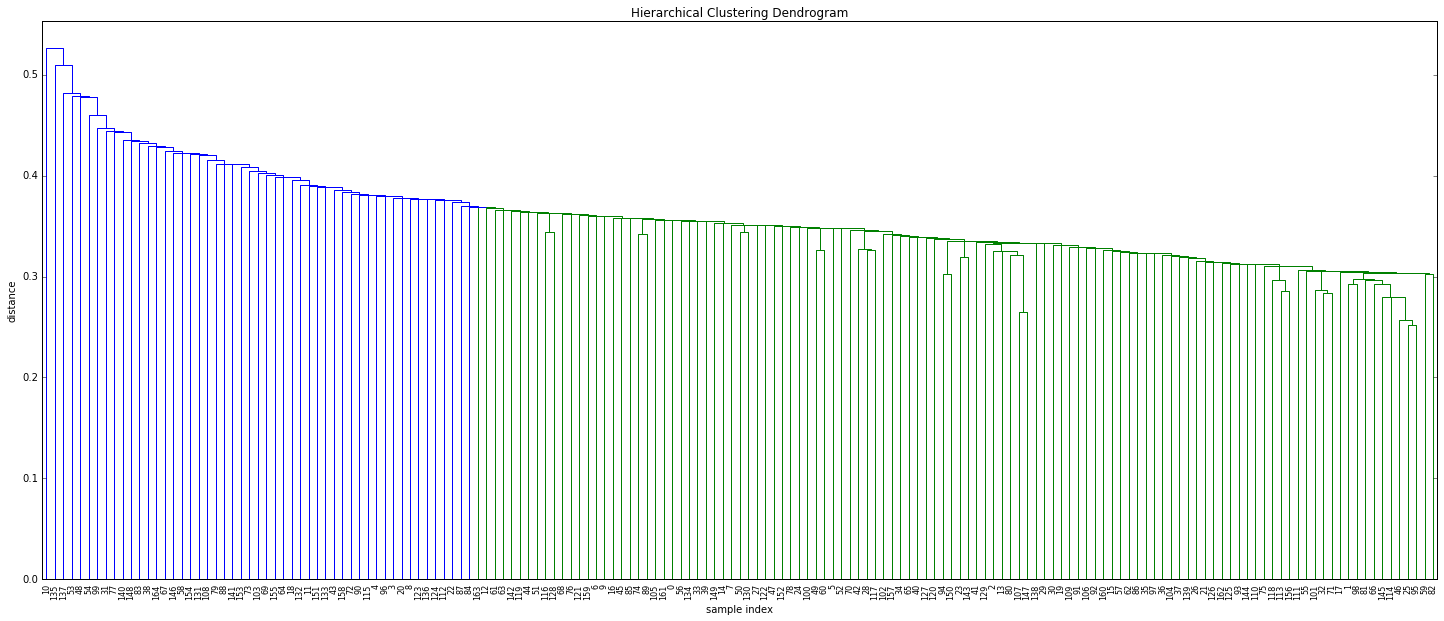

0: peacock

1: cobra

2: cute

3: effigy

4: sleepy

5: slick

6: trenchcoat

7: nursery

8: octagon

9: medusa

10: conjure

11: texan

12: grotesque

13: mug

14: housewife

15: satyr

16: spellbound

17: youngster

18: tamer

19: tusk

20: regal

21: jukebox

22: porcupine

23: damsel

24: strut

25: lark

26: tuxedo

27: grin

28: parrot

29: pinch

30: bracelet

31: hooray

32: brunette

33: stump

34: hare

35: midsummer

36: juggling

37: sinbad

38: gladiator

39: barn

40: goo

41: strawberry

42: seaman

43: rhino

44: grocer

45: unicycle

46: drunkard

47: slapstick

48: watermark

49: fearless

50: centaur

51: greedy

52: butts

53: springtime

54: spoil

55: grandma

56: sexy

57: gandalf

58: headstone

59: minstrel

60: cop

61: cot

62: brat

63: coy

64: hatchet

65: eyeball

66: newsboy

67: chevy

68: headless

69: rapunzel

70: bumper

71: lonesome

72: pillow

73: homeward

74: dine

75: naughty

76: stray

77: pussy

78: hoop

79: cabbie

80: donkey

81: bullock

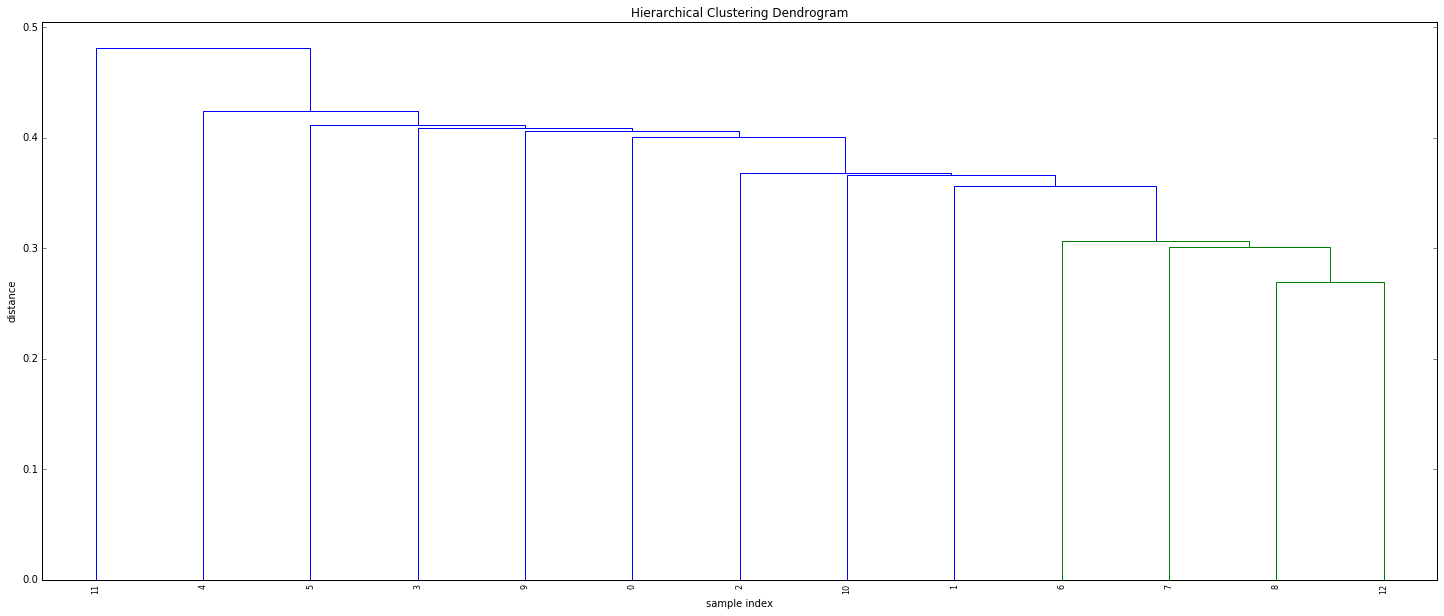

0: poke

1: fright

2: haircut

3: handmade

4: scrambled

5: ragged

6: goodnight

7: spade

8: kitten

9: entwined

10: skinny

11: costumed

12: mermaid

(12, 100)


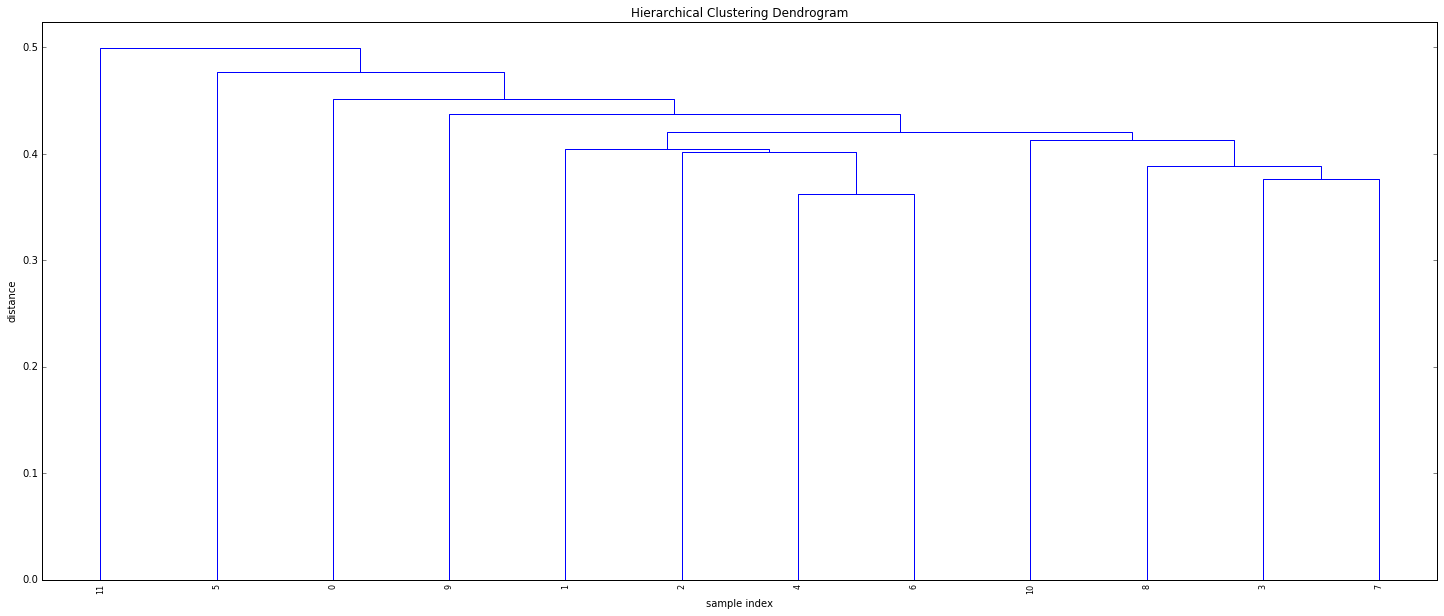

0: shave

1: screams

2: penniless

3: biscuit

4: coward

5: smiley

6: dude

7: nursery

8: sow

9: vigilante

10: pillow

11: whirlwind

(62, 100)


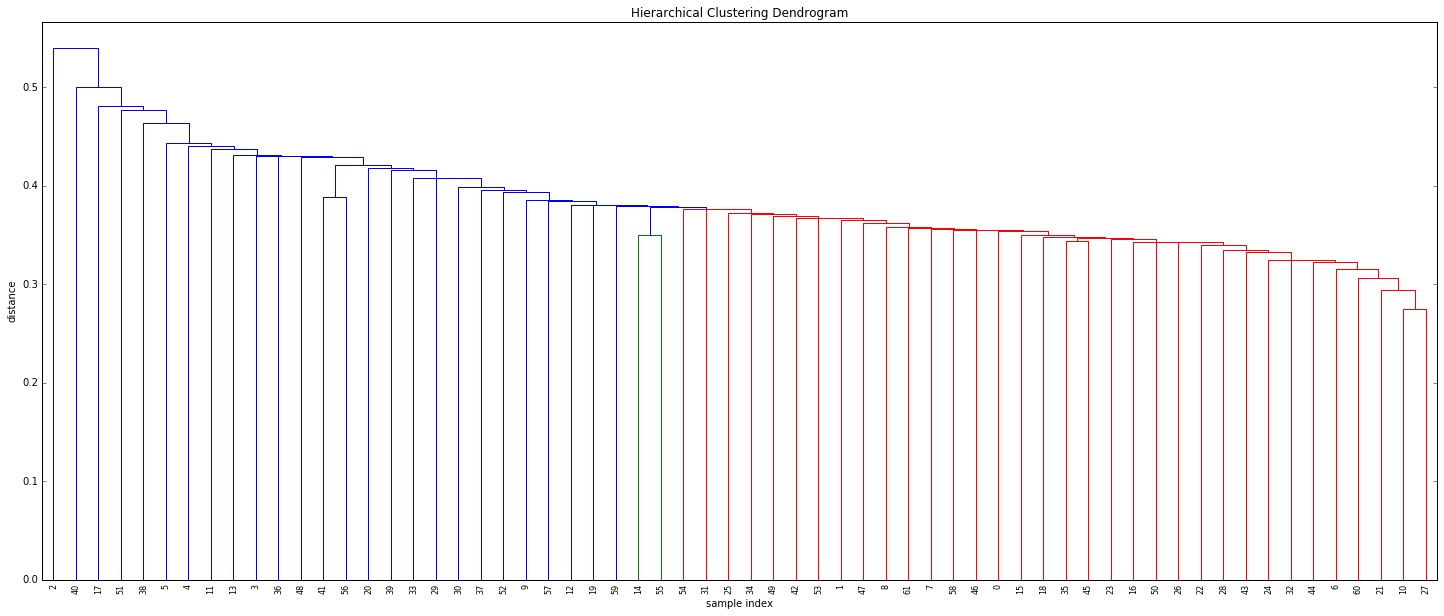

0: wig

1: pelican

2: glee

3: underdog

4: pussy

5: serene

6: lovable

7: nursery

8: dumb

9: valiant

10: polka

11: majestic

12: ferocious

13: nostalgic

14: nerd

15: fearsome

16: unforgettable

17: caper

18: tattoo

19: vertigo

20: graveyard

21: lipstick

22: sneaky

23: misspelled

24: childish

25: spiky

26: rascal

27: poodle

28: tame

29: unlucky

30: zany

31: rosy

32: puppy

33: gardener

34: gallant

35: bearded

36: laundry

37: voluptuous

38: bale

39: rug

40: gladiatorial

41: comical

42: squat

43: bun

44: nanny

45: unicorn

46: dervish

47: mellow

48: weep

49: pup

50: skinny

51: quack

52: scary

53: glamorous

54: doggy

55: iceberg

56: fantastical

57: curvy

58: grouch

59: frantic

60: grumpy

61: pillow

(13, 100)


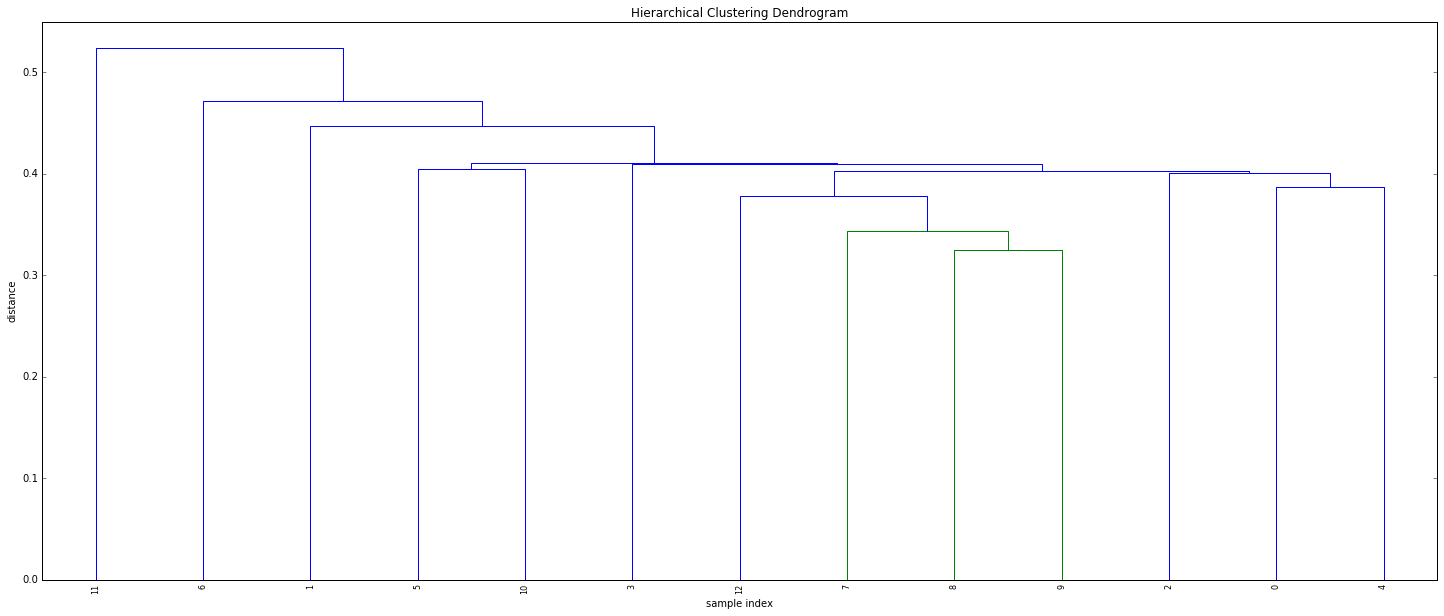

0: smiles

1: bunnies

2: turkeys

3: tights

4: blanks

5: eyeglasses

6: crows

7: pumpkins

8: spectacles

9: donkeys

10: puppies

11: stickers

12: slippers

(7, 100)


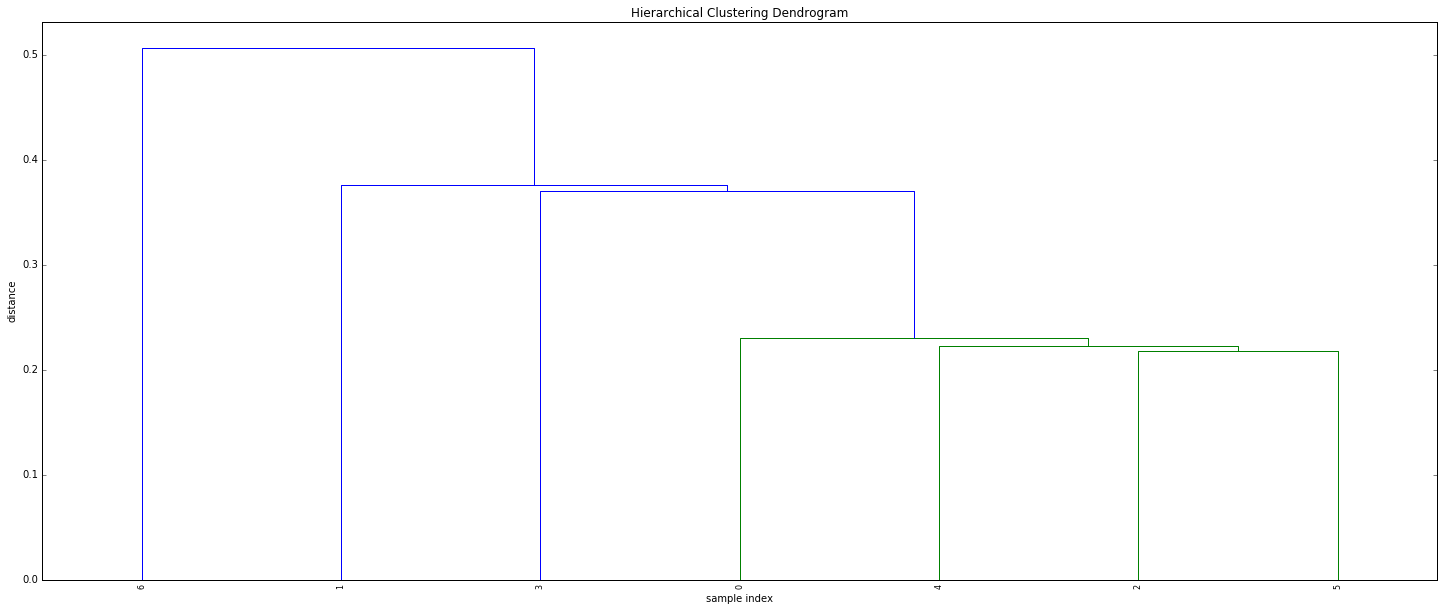

0: grandmother

1: father

2: grandfather

3: vineyard

4: niece

5: nephew

6: bravery

(37, 100)


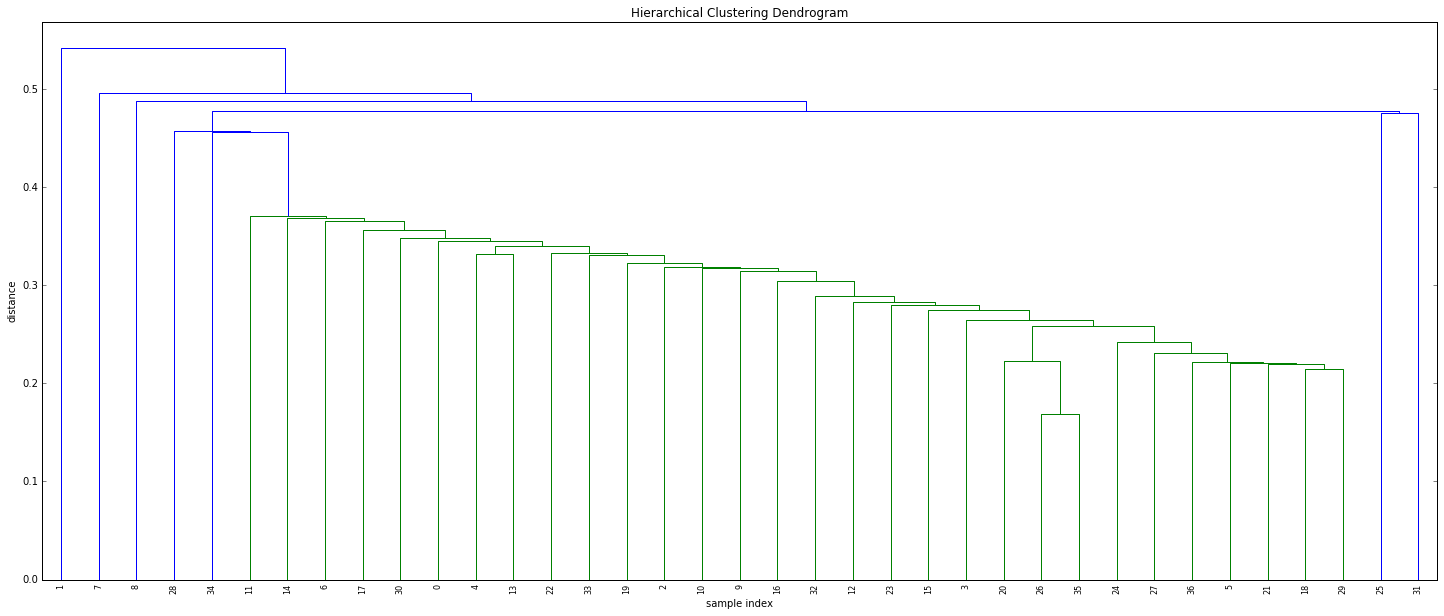

0: boyhood

1: family

2: queen

3: son

4: elder

5: cousin

6: bedroom

7: flock

8: slew

9: bride

10: father

11: cloak

12: prince

13: monk

14: tombstone

15: friend

16: mother

17: companion

18: uncle

19: jacob

20: daughter

21: mistress

22: lady

23: princess

24: sister

25: fortune

26: wife

27: brother

28: soldier

29: aunt

30: mentor

31: stature

32: heiress

33: cain

34: childhood

35: husband

36: widow

(4, 100)


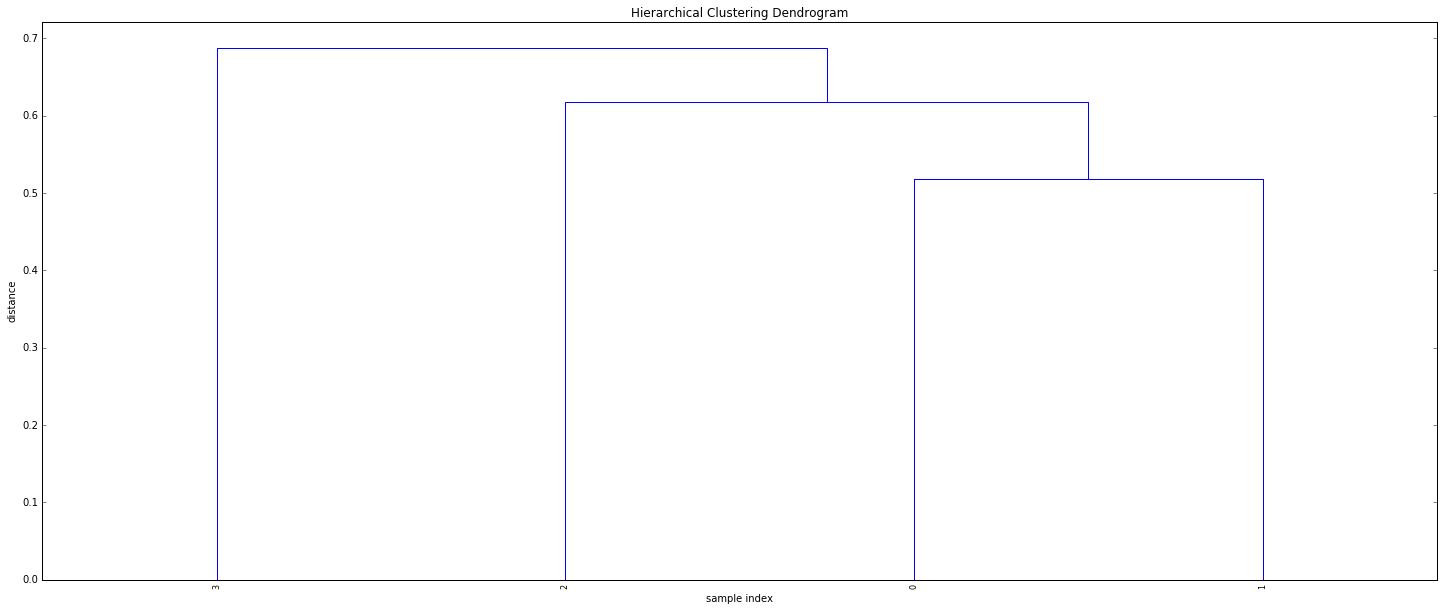

0: soldier

1: bath

2: honor

3: infancy

(14, 100)


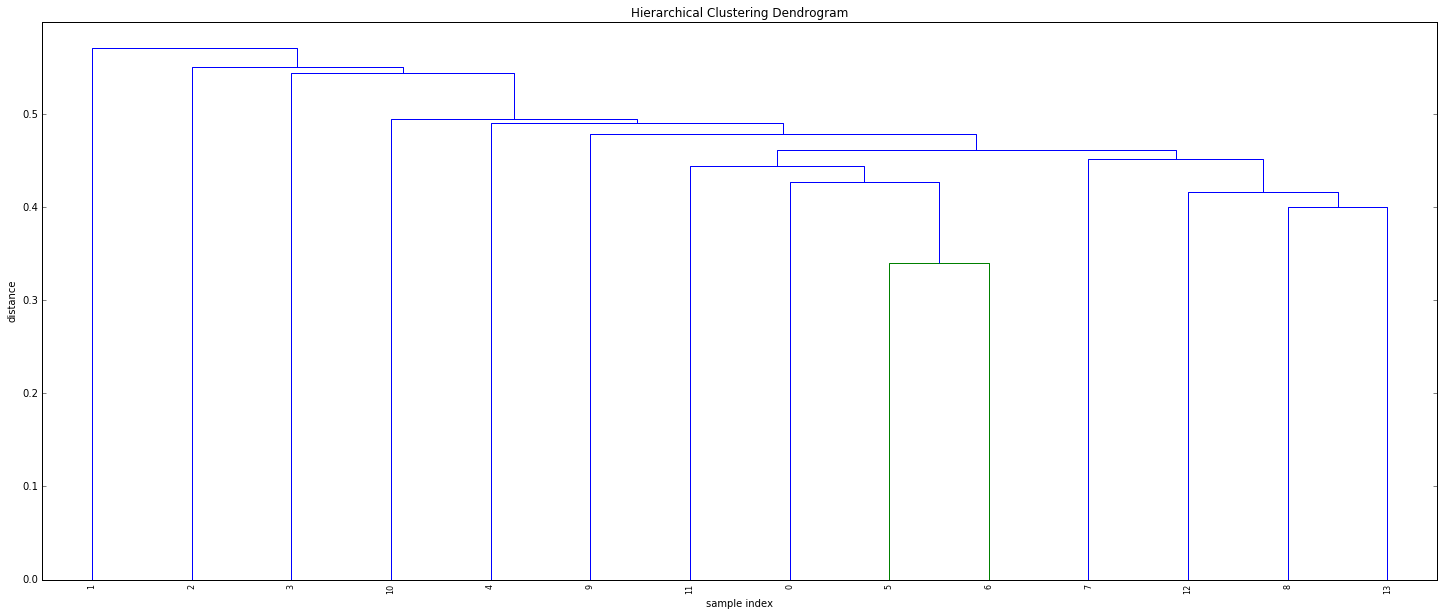

0: noble

1: friendship

2: humble

3: maternal

4: shrewd

5: majesty

6: servant

7: governess

8: queen

9: fugitive

10: young

11: nurse

12: lady

13: mary

(11, 100)


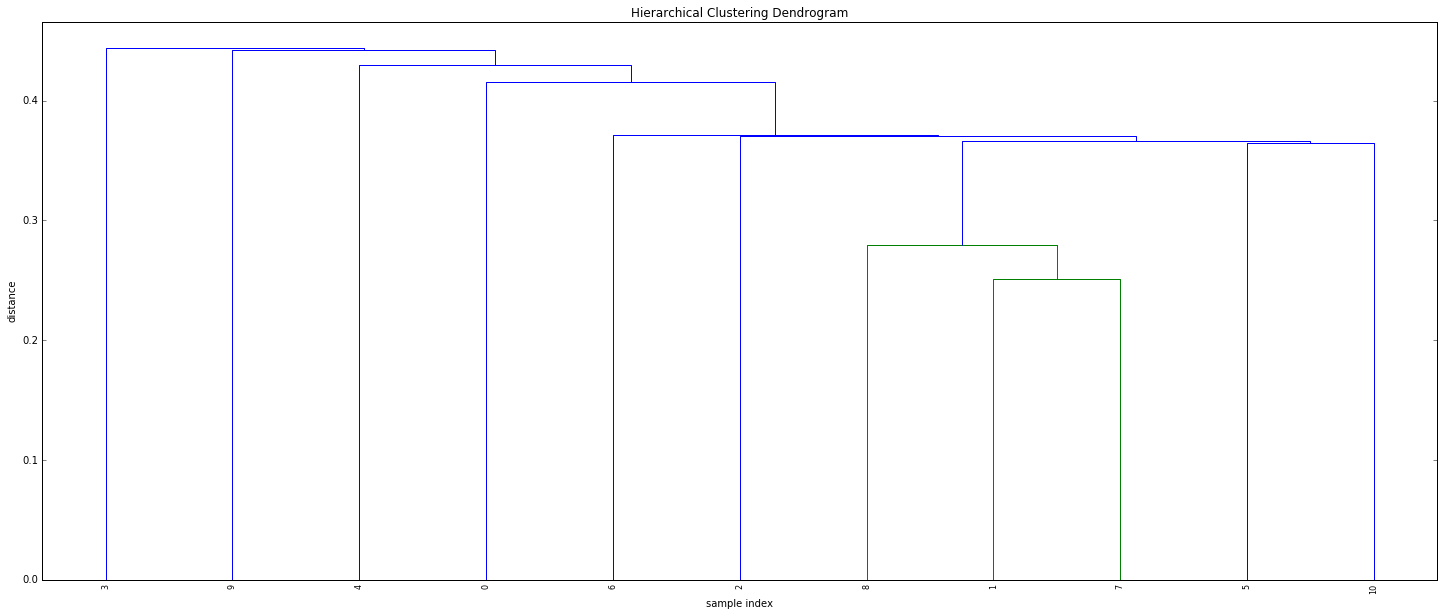

0: foes

1: brothers

2: companions

3: virgins

4: acquaintances

5: parents

6: servants

7: sisters

8: siblings

9: friendships

10: friends

(5, 100)


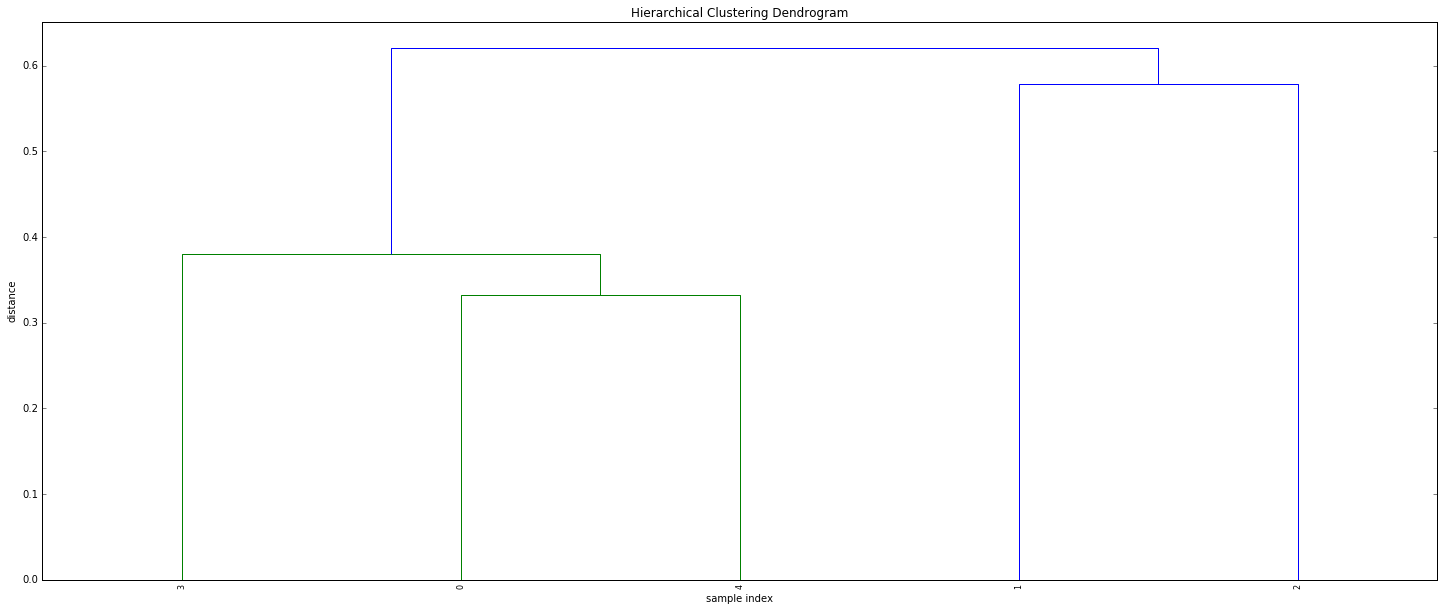

0: protestantism

1: fellowship

2: weddings

3: sect

4: christianity

(8, 100)


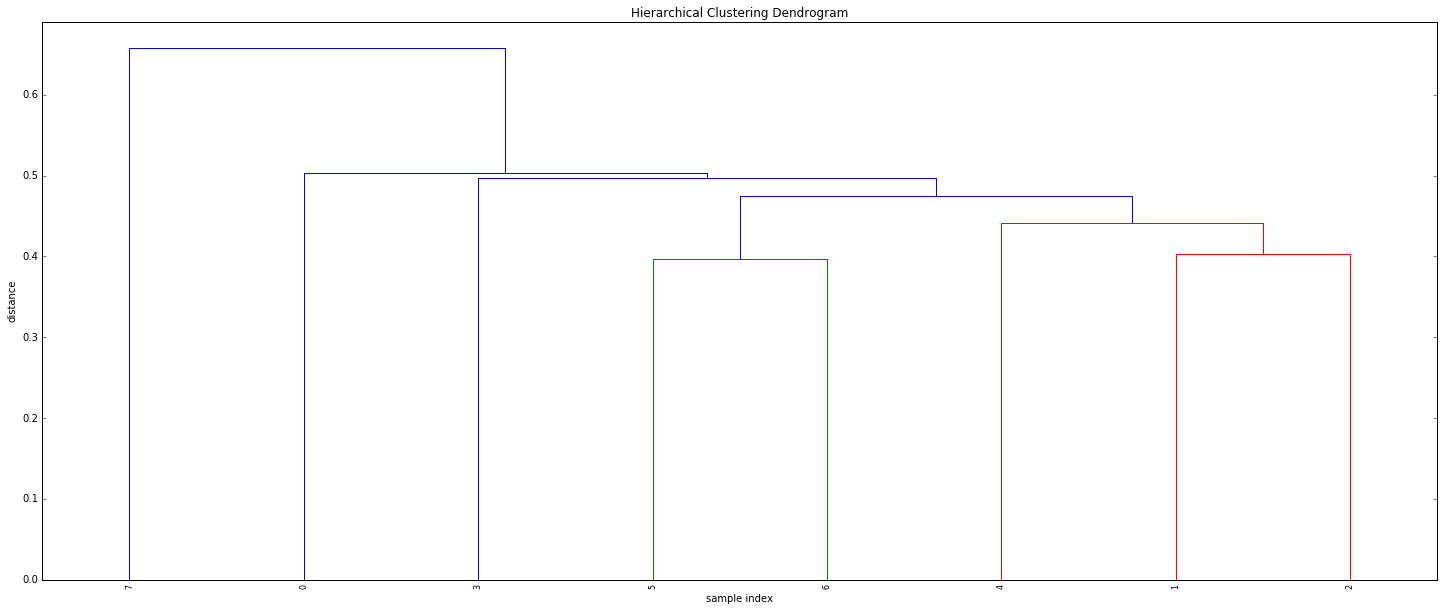

0: jews

1: elders

2: fathers

3: customs

4: followers

5: quakers

6: jesuits

7: holidays

(10, 100)


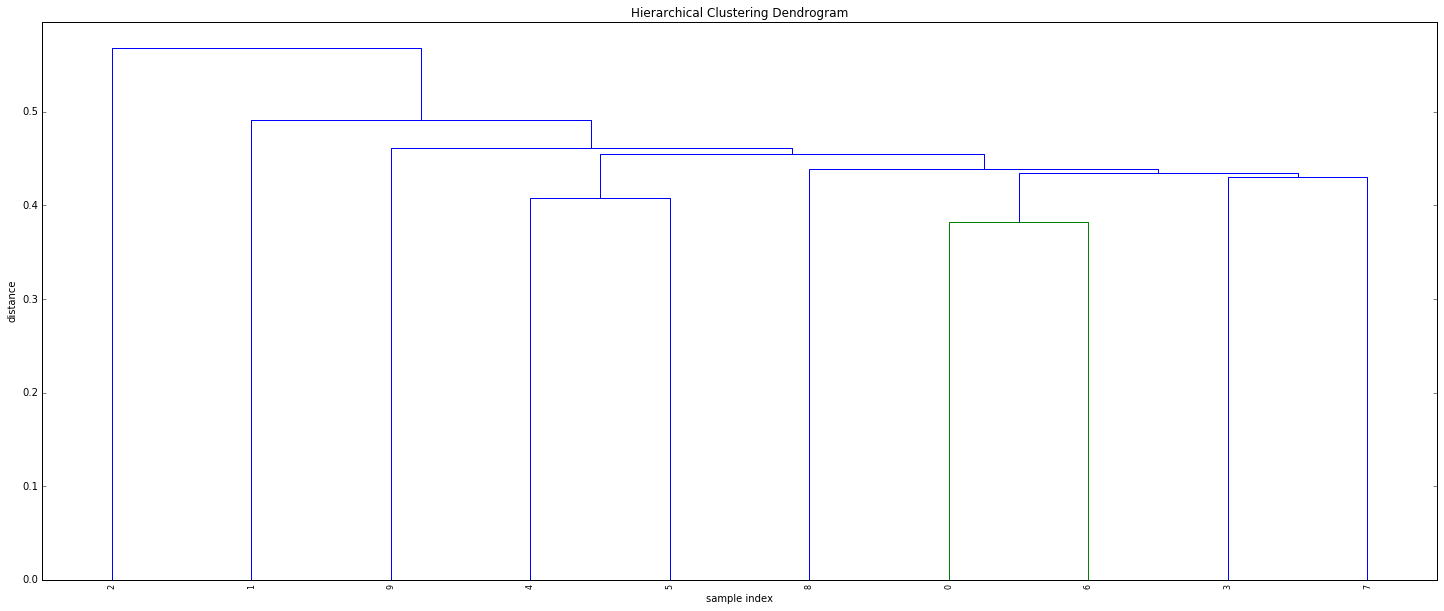

0: catholicism

1: canon

2: pastor

3: religion

4: communion

5: church

6: heresy

7: hindu

8: tradition

9: caste

(7, 100)


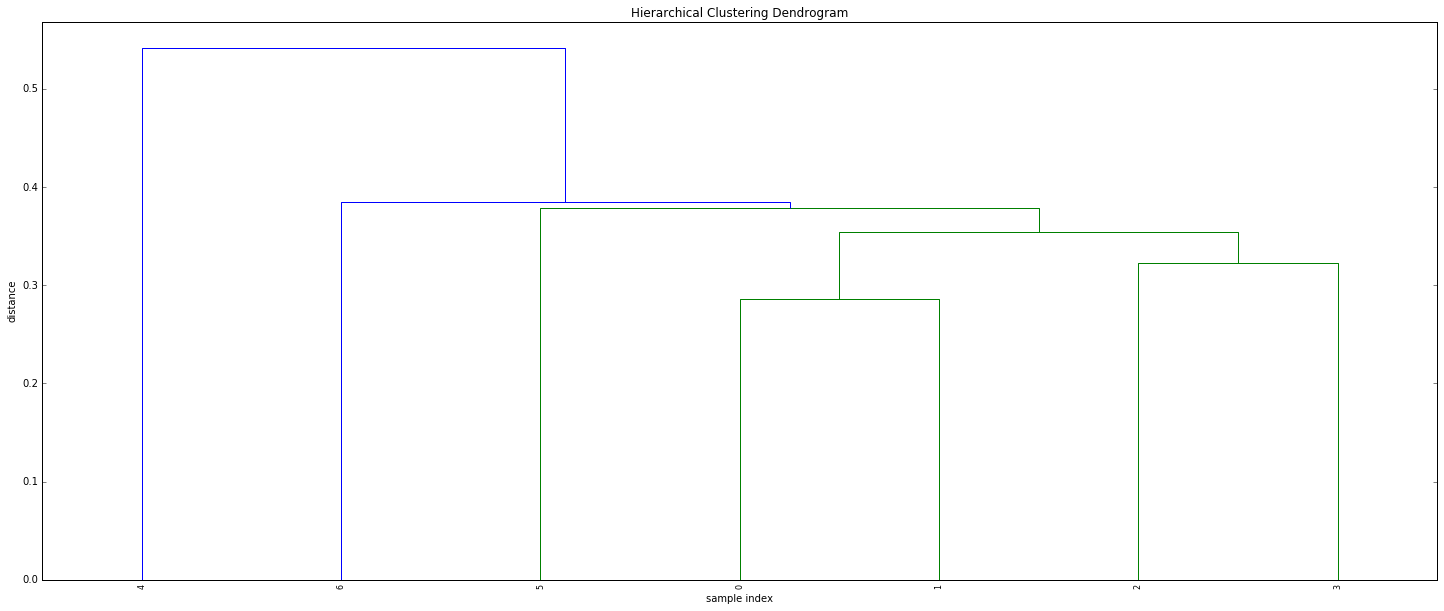

0: catholic

1: protestant

2: christian

3: religious

4: pastoral

5: pagan

6: islam

(3, 100)


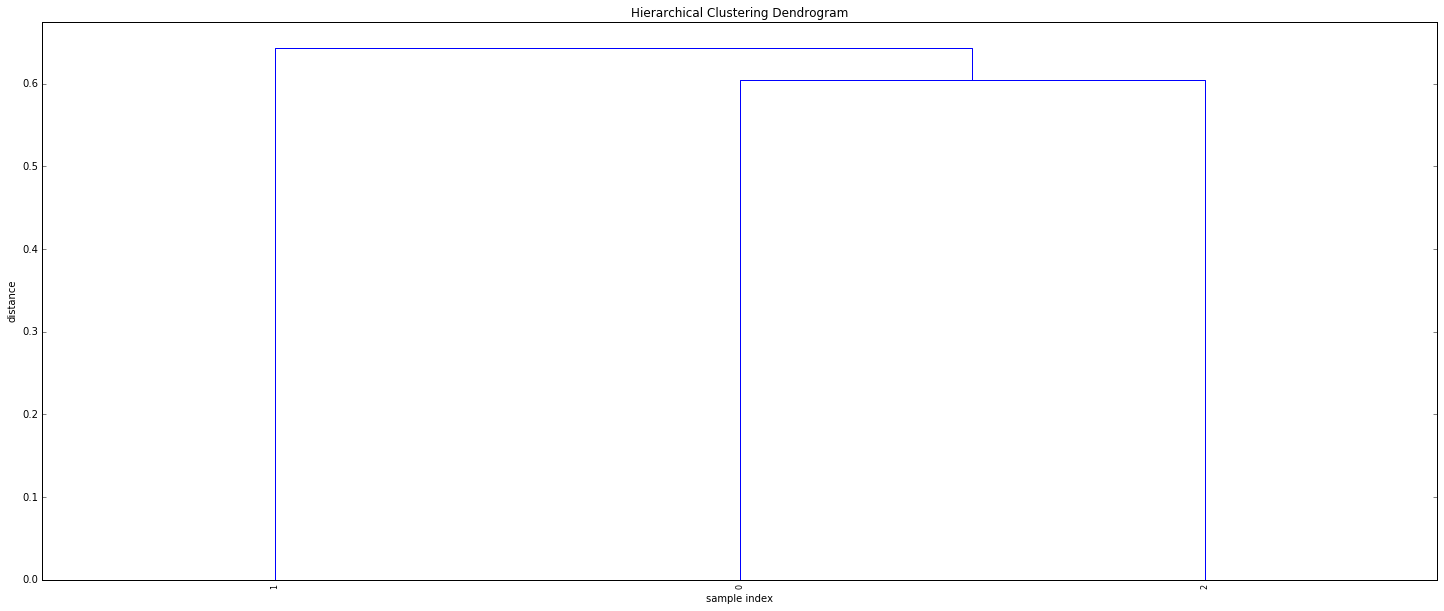

0: keating

1: serving

2: commanding

(7, 100)


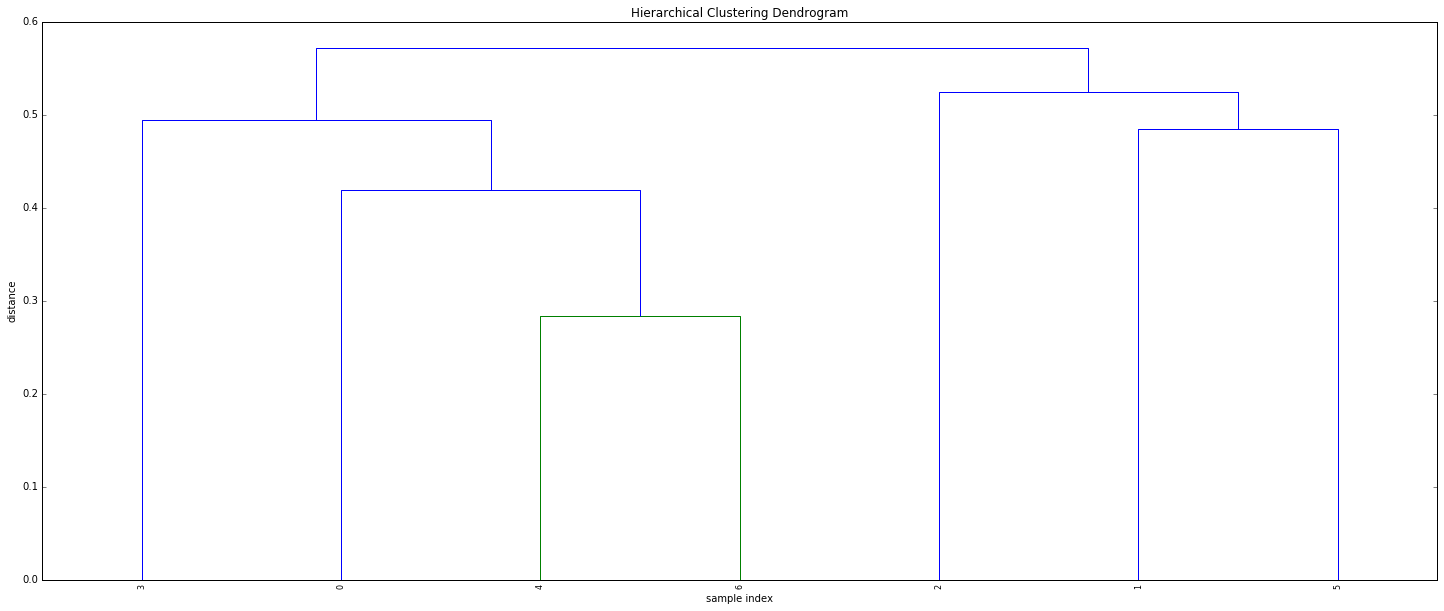

0: corporal

1: lincoln

2: vacant

3: chief

4: lieutenant

5: bush

6: admiral

(32, 100)


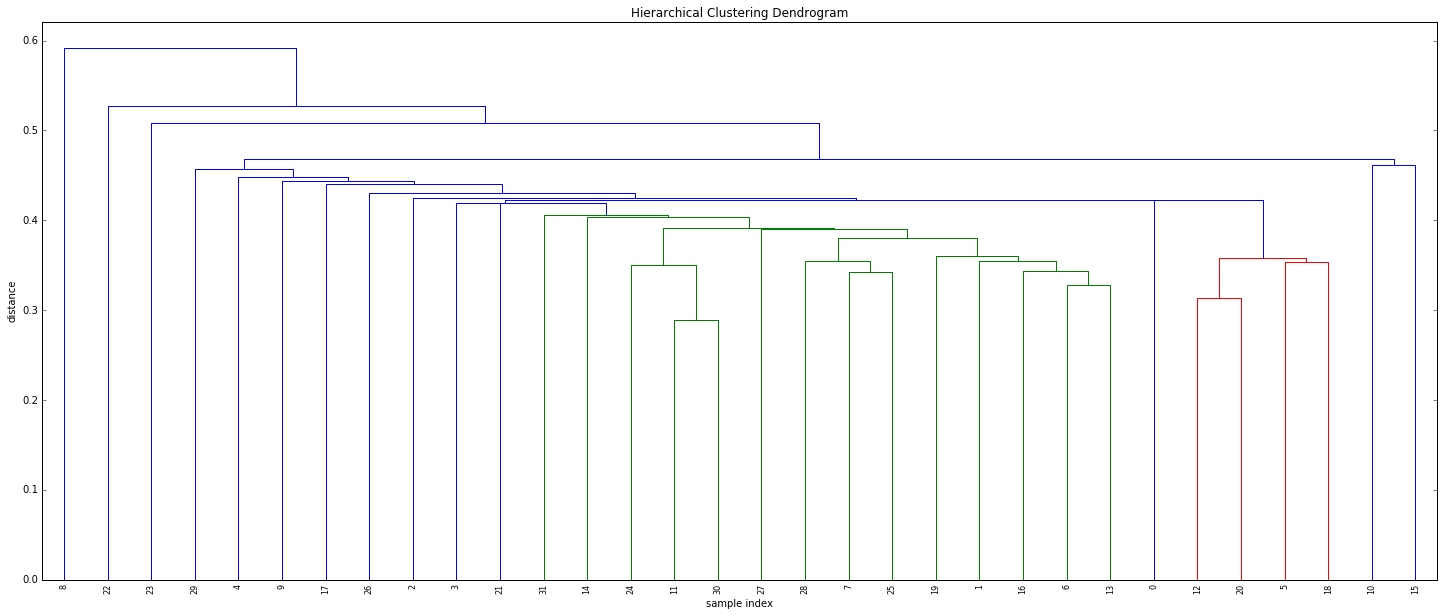

0: attorney

1: churchill

2: caretaker

3: winston

4: cadet

5: commander

6: kennedy

7: lawyer

8: recommendation

9: patel

10: chair

11: mayor

12: instructor

13: jackson

14: sheriff

15: bench

16: macdonald

17: leader

18: officer

19: hoover

20: assistant

21: patriot

22: ford

23: confederate

24: president

25: solicitor

26: lincoln

27: vice

28: barrister

29: bill

30: governor

31: delegate

(7, 100)


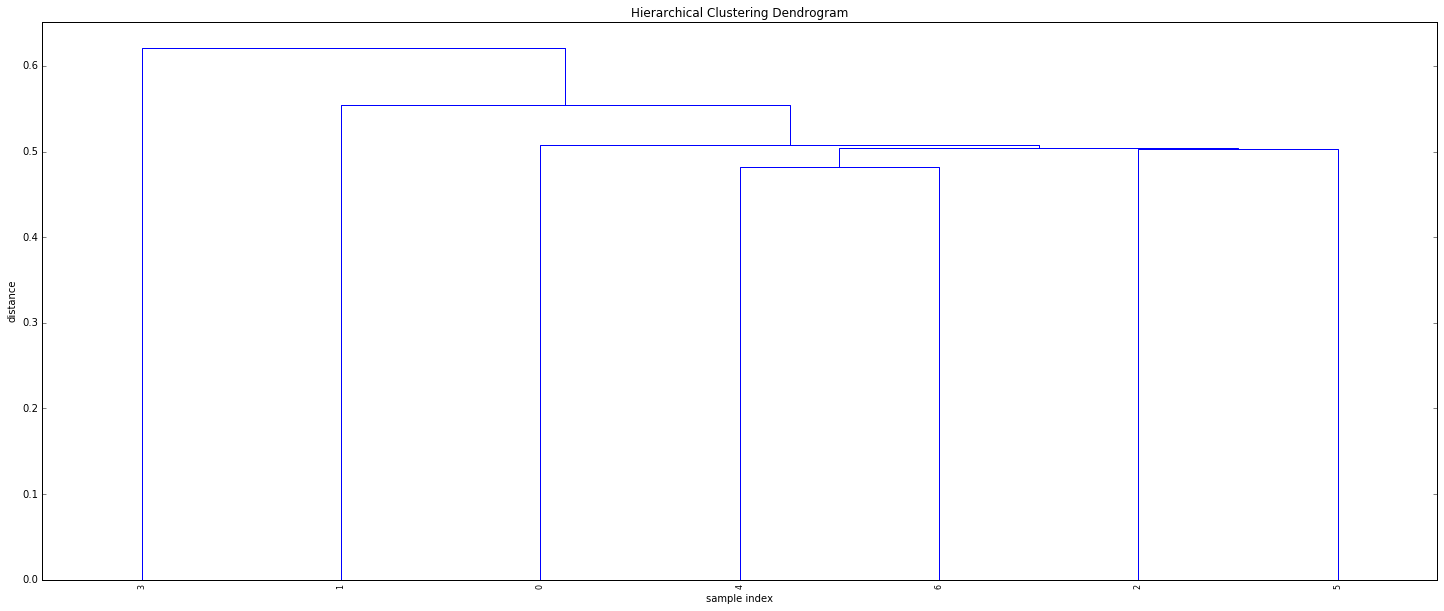

0: drowning

1: threatening

2: hurting

3: killing

4: posing

5: stealing

6: praying

(31, 100)


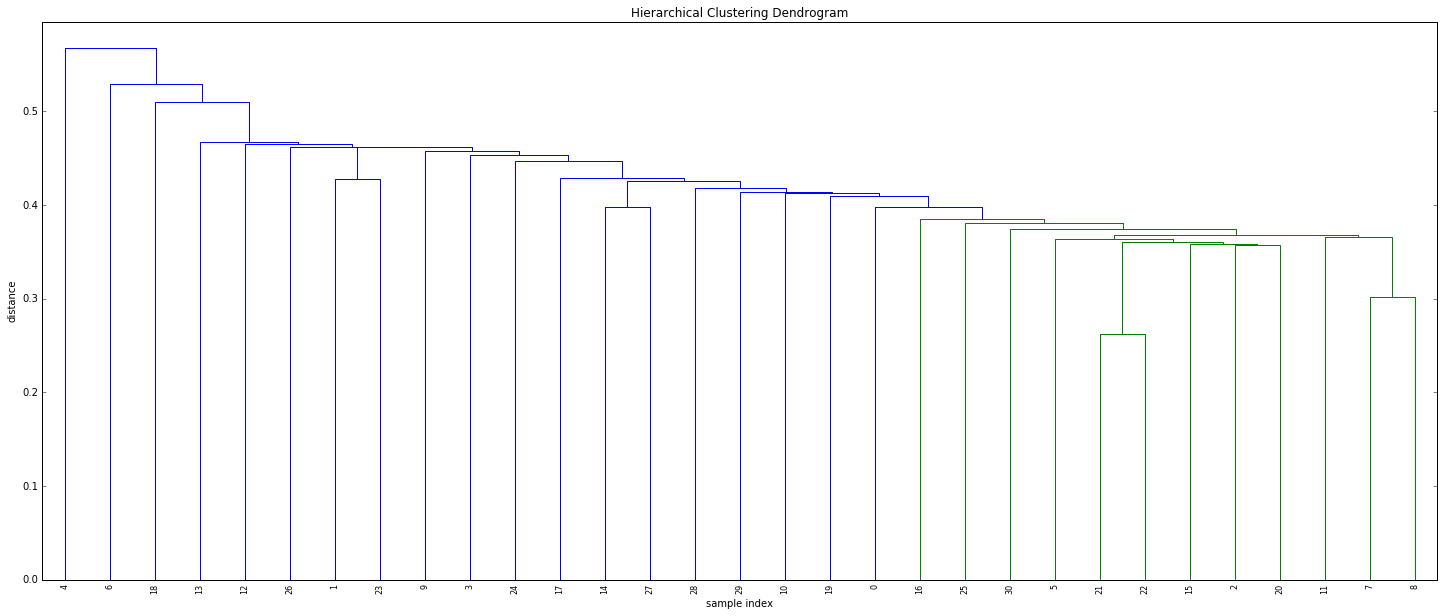

0: tired

1: incarcerated

2: scared

3: quiet

4: respectable

5: asleep

6: homeless

7: miserable

8: helpless

9: indifferent

10: saved

11: arrogant

12: generous

13: resentful

14: unhappy

15: confident

16: frail

17: honorable

18: salute

19: wary

20: afraid

21: terrified

22: jealous

23: pretense

24: zealous

25: shy

26: ill

27: upset

28: terrible

29: furious

30: foolish

(22, 100)


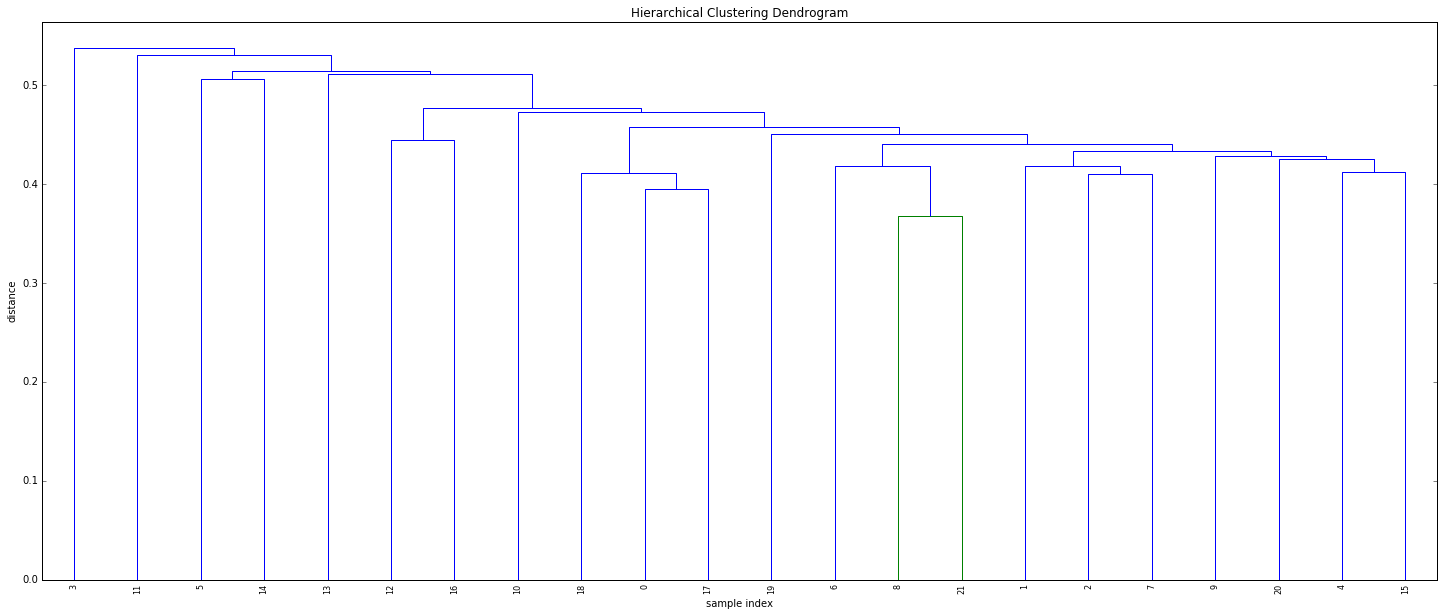

0: insane

1: stubborn

2: drunk

3: fond

4: disguise

5: desperate

6: goliath

7: beaten

8: jealousy

9: foe

10: barefoot

11: brawl

12: hurt

13: ignorant

14: mob

15: bury

16: fearful

17: ill

18: cruel

19: lash

20: hid

21: temper

(16, 100)


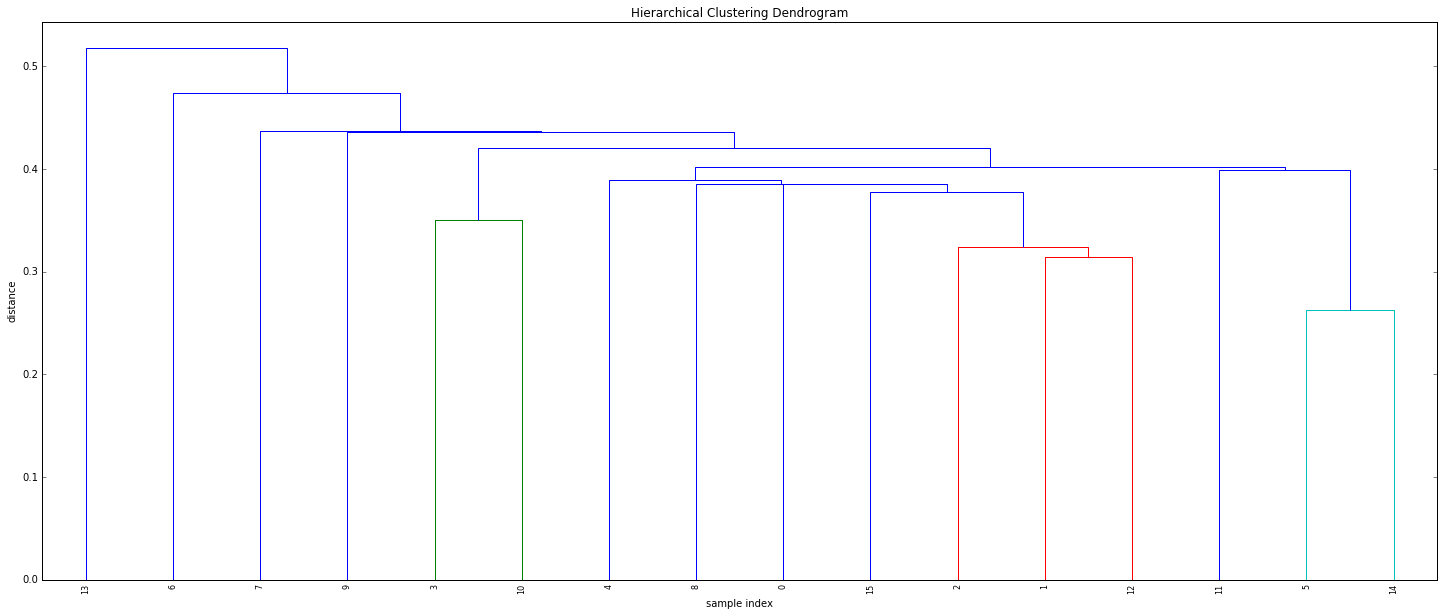

0: mourned

1: begged

2: cried

3: hanged

4: delighted

5: shocked

6: aggravated

7: sore

8: battered

9: wounded

10: beheaded

11: troubled

12: frightened

13: poised

14: surprised

15: nursed

(6, 100)


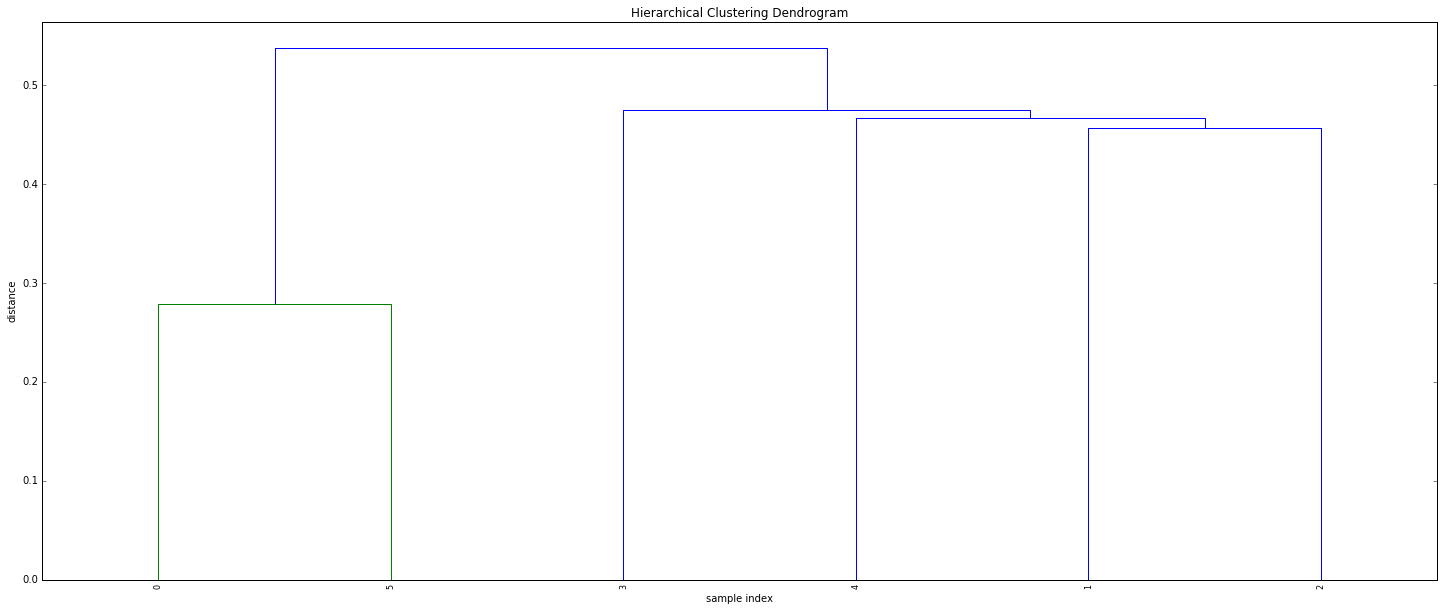

0: injured

1: embarrassed

2: fainted

3: deserted

4: hurried

5: killed

(5, 100)


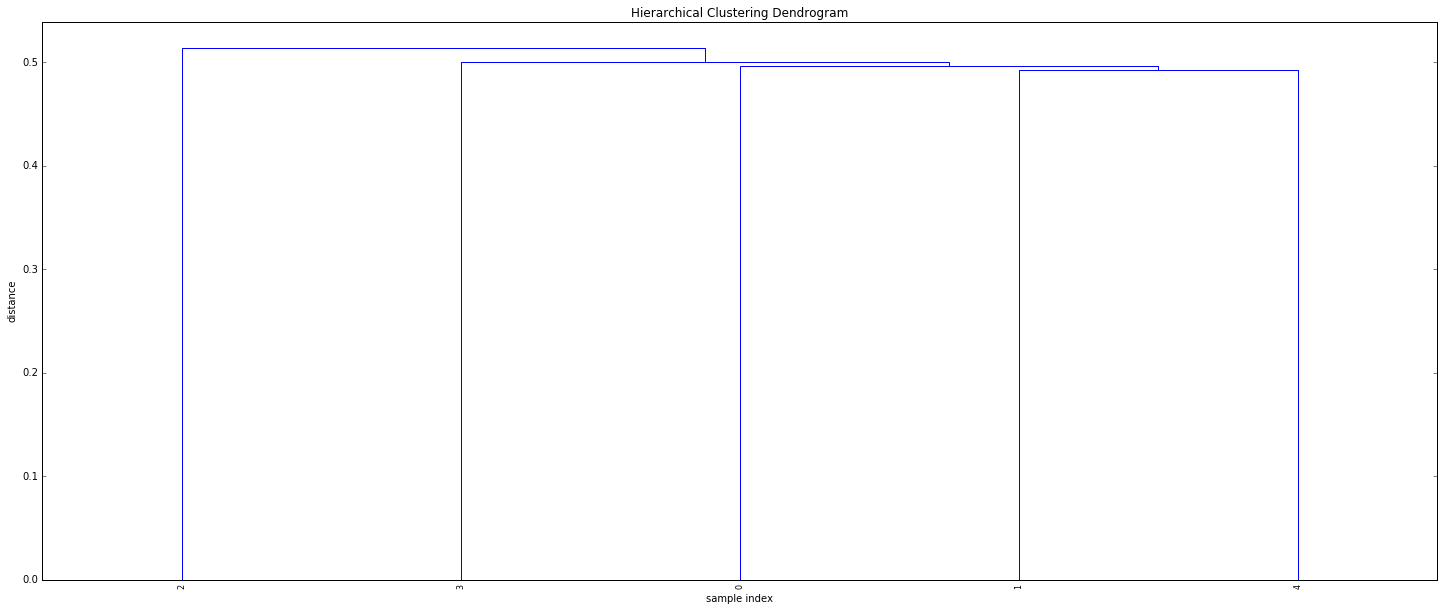

0: forgiven

1: sore

2: treachery

3: annoyed

4: overboard

(28, 100)


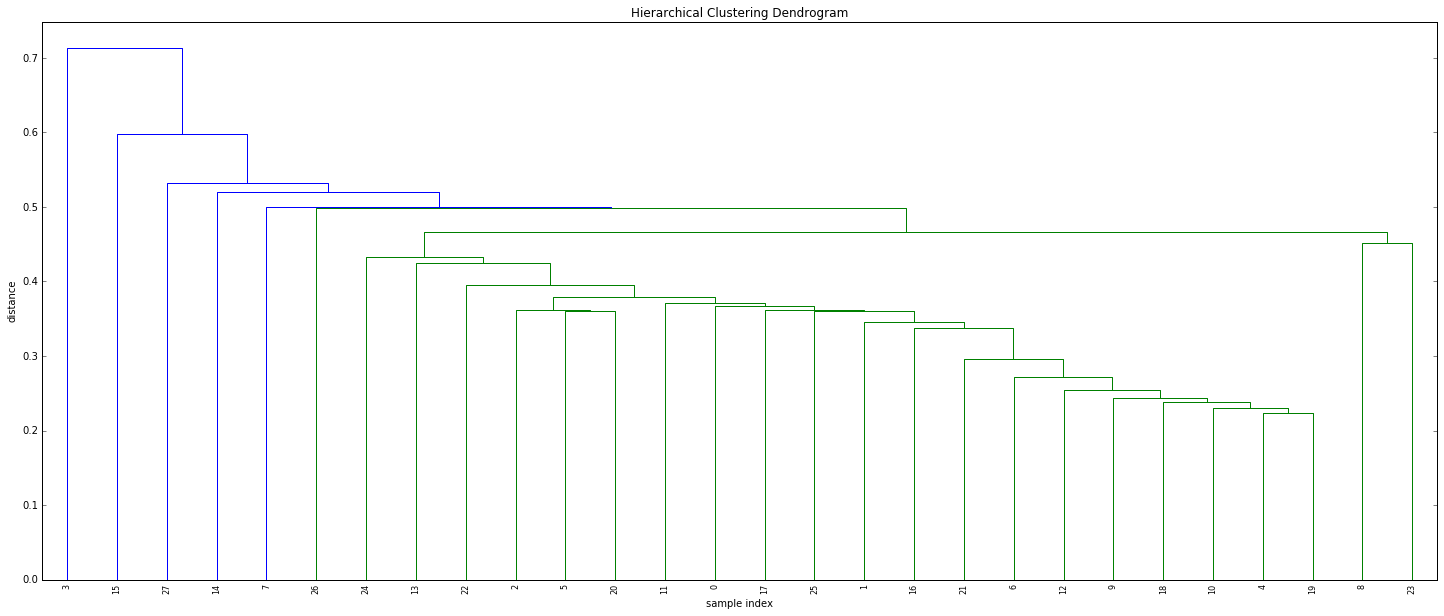

0: mexico

1: balochistan

2: india

3: kong

4: uganda

5: japan

6: barbados

7: canada

8: hong

9: sudan

10: guinea

11: goa

12: malta

13: france

14: capital

15: pan

16: turkey

17: korea

18: madagascar

19: zimbabwe

20: china

21: chile

22: cape

23: zealand

24: filipino

25: denmark

26: emu

27: colonial

(4, 100)


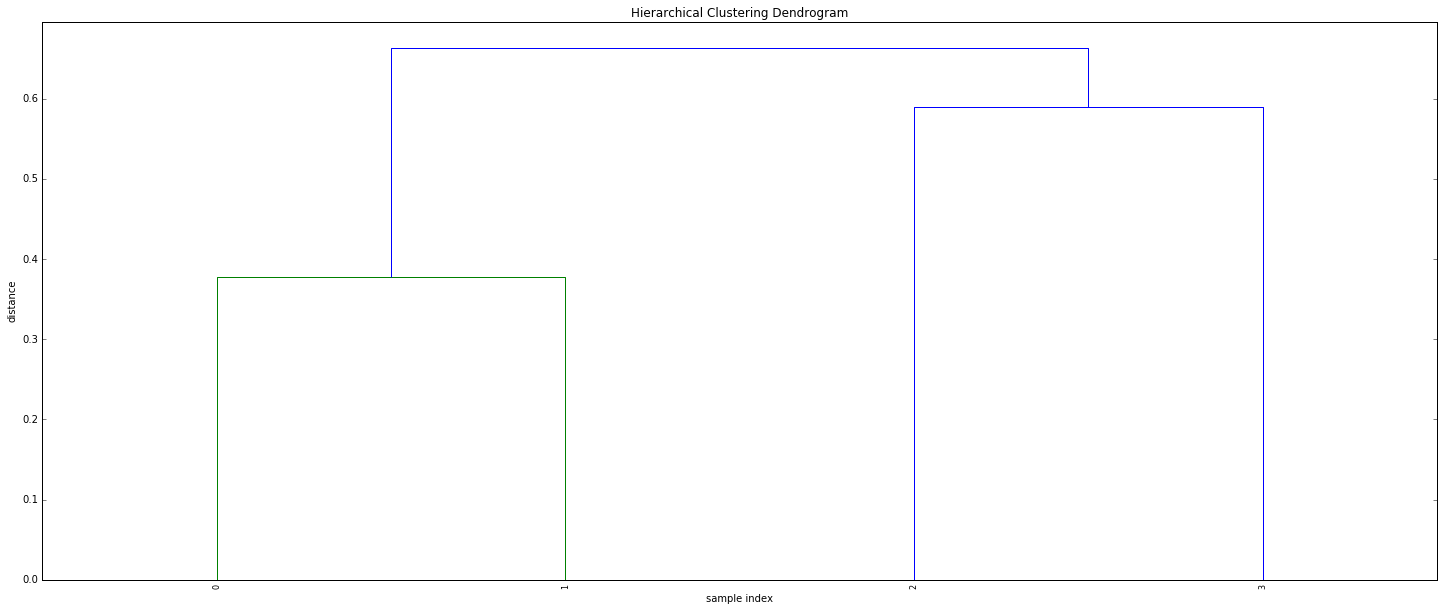

0: india

1: africa

2: pan

3: mexican

(9, 100)


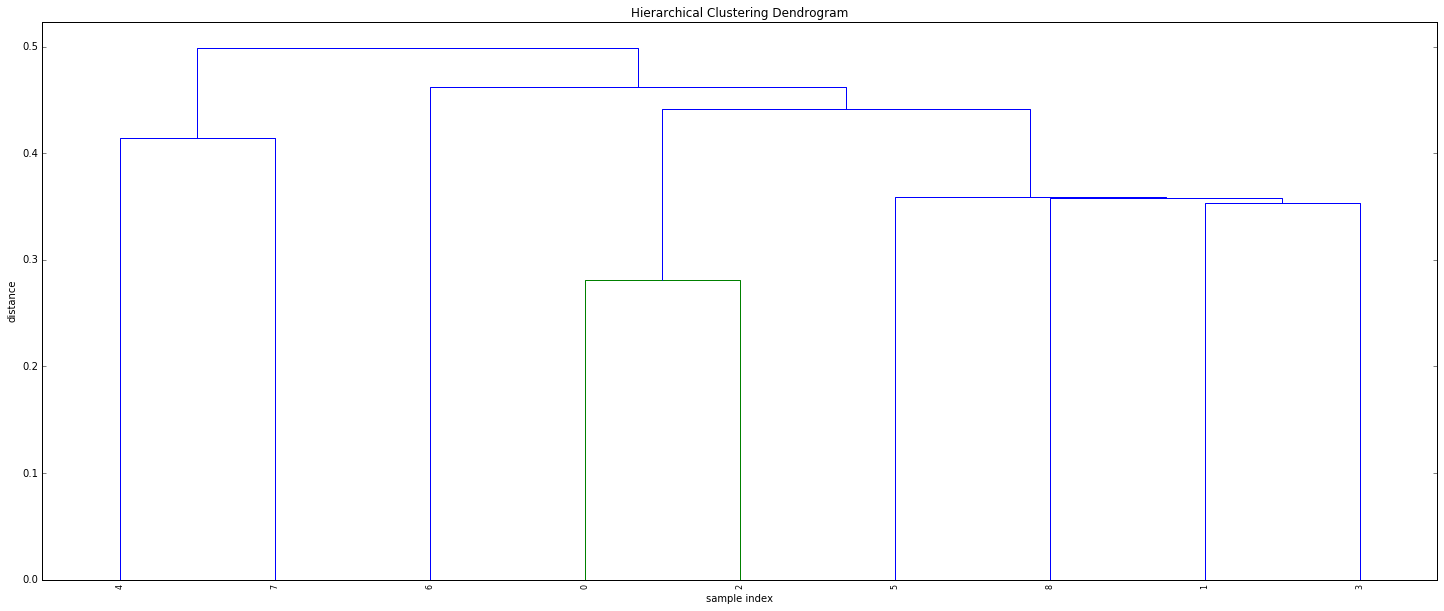

0: canada

1: jamaica

2: australia

3: caribbean

4: turkish

5: africa

6: indian

7: spanish

8: pakistan

(3, 100)


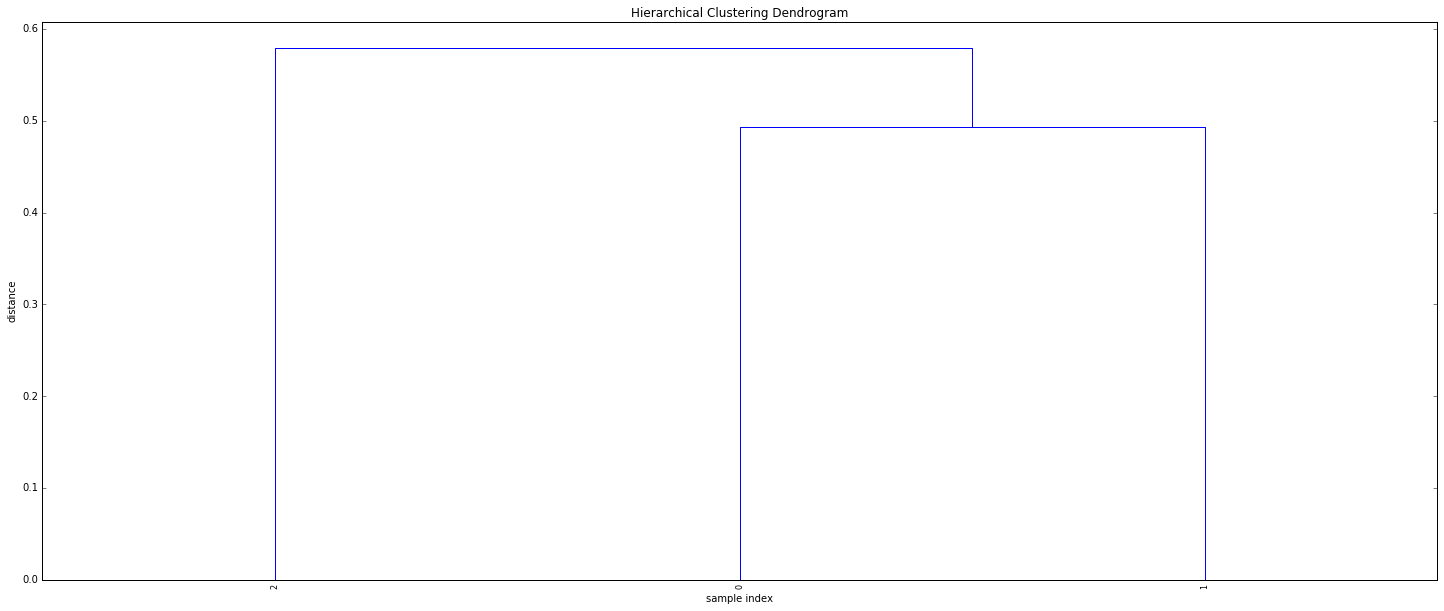

0: islands

1: philippines

2: indies

(12, 100)


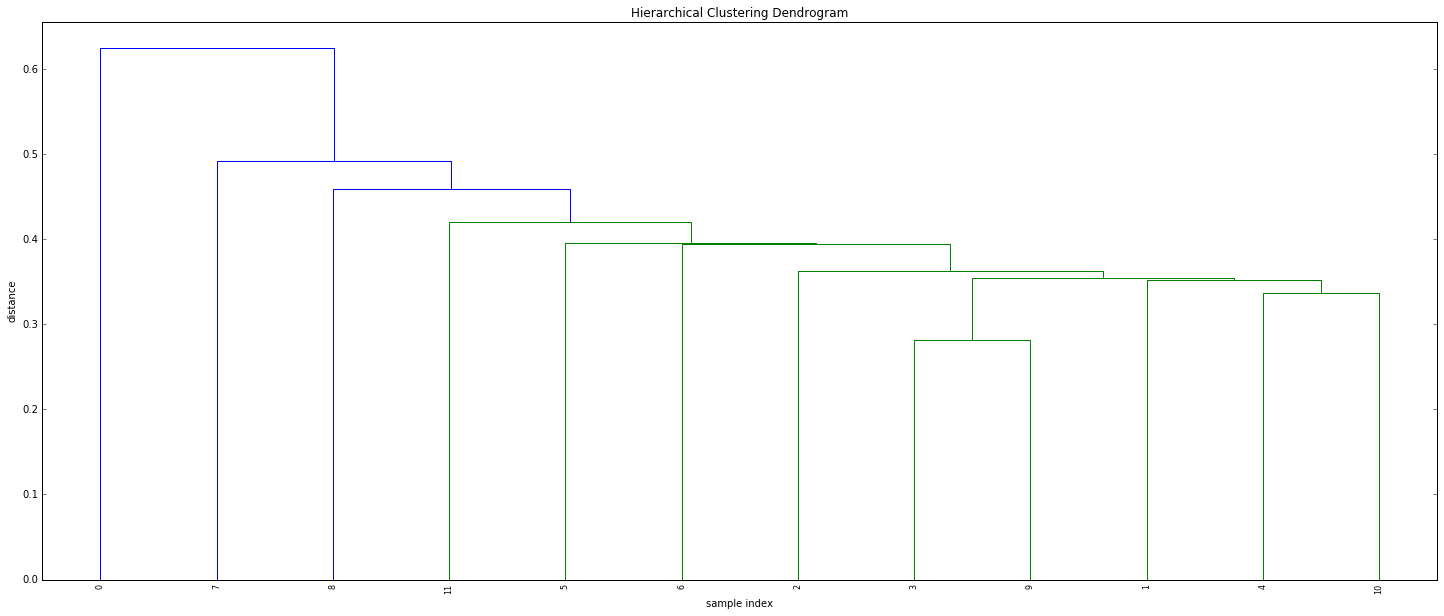

0: lie

1: inversion

2: duality

3: symmetry

4: curve

5: convergent

6: meta

7: compass

8: formula

9: geometric

10: dimension

11: transformation

(9, 100)


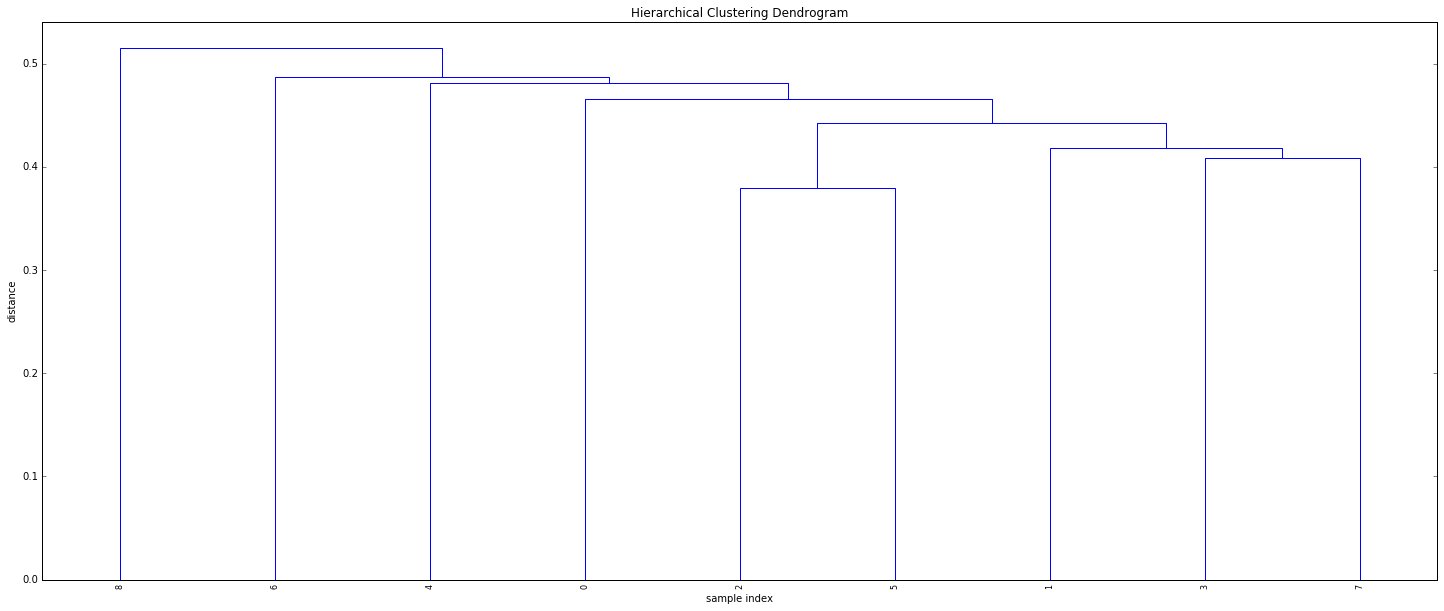

0: partial

1: irrational

2: abstract

3: continuous

4: bundle

5: elementary

6: imaginary

7: trivial

8: absolute

(20, 100)


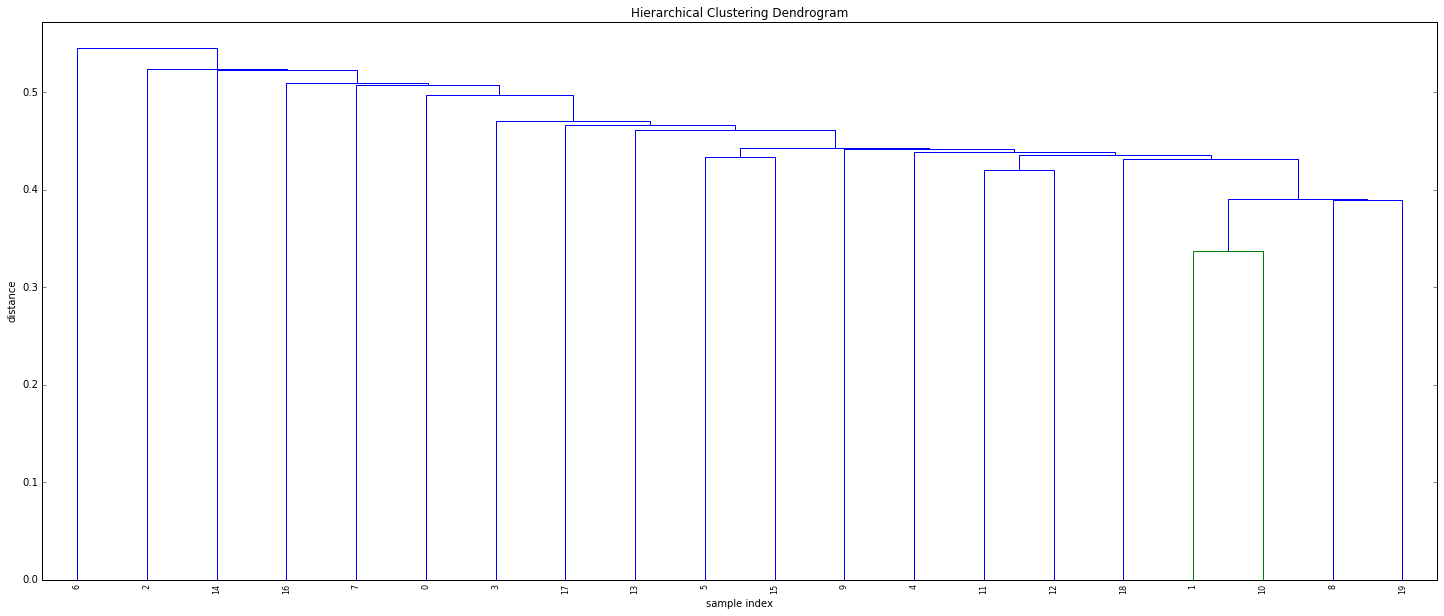

0: inscription

1: yule

2: vesuvius

3: tablet

4: solemnity

5: obelisk

6: yin

7: scabbard

8: vase

9: caption

10: epiphany

11: myrrh

12: jubilation

13: jest

14: rig

15: monolith

16: sunrise

17: mullet

18: perseus

19: bonfire

(3, 100)


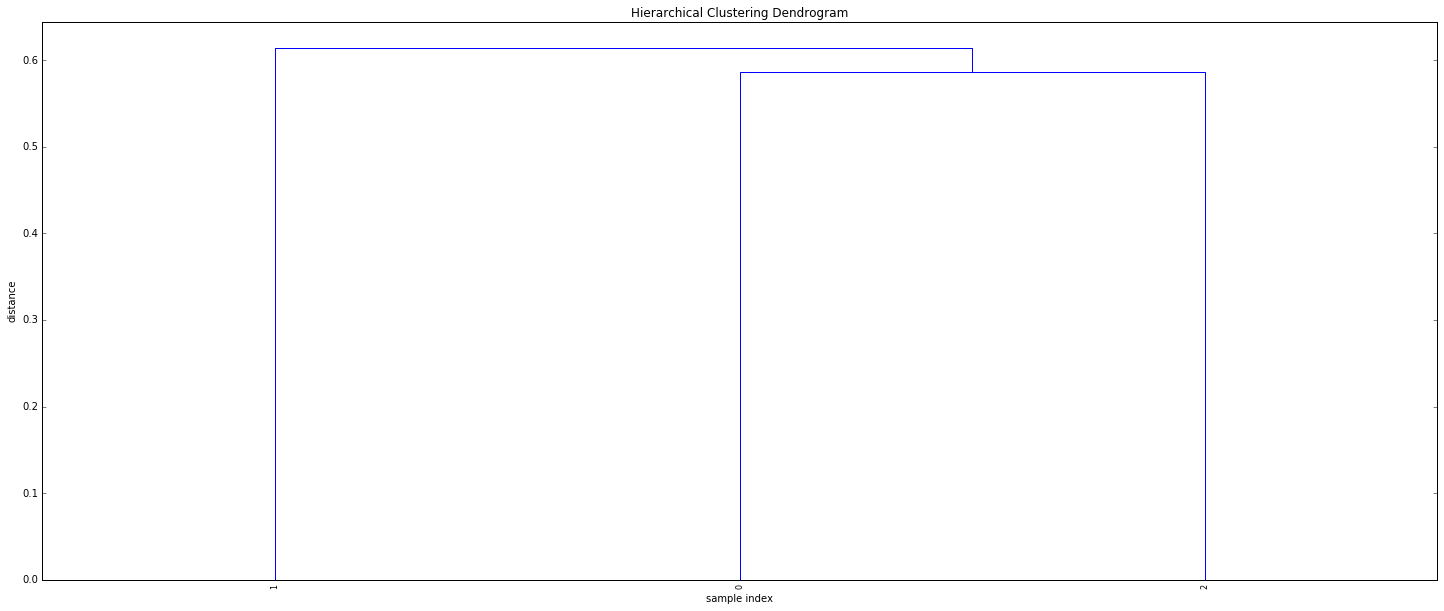

0: fringe

1: couplet

2: dusk

(10, 100)


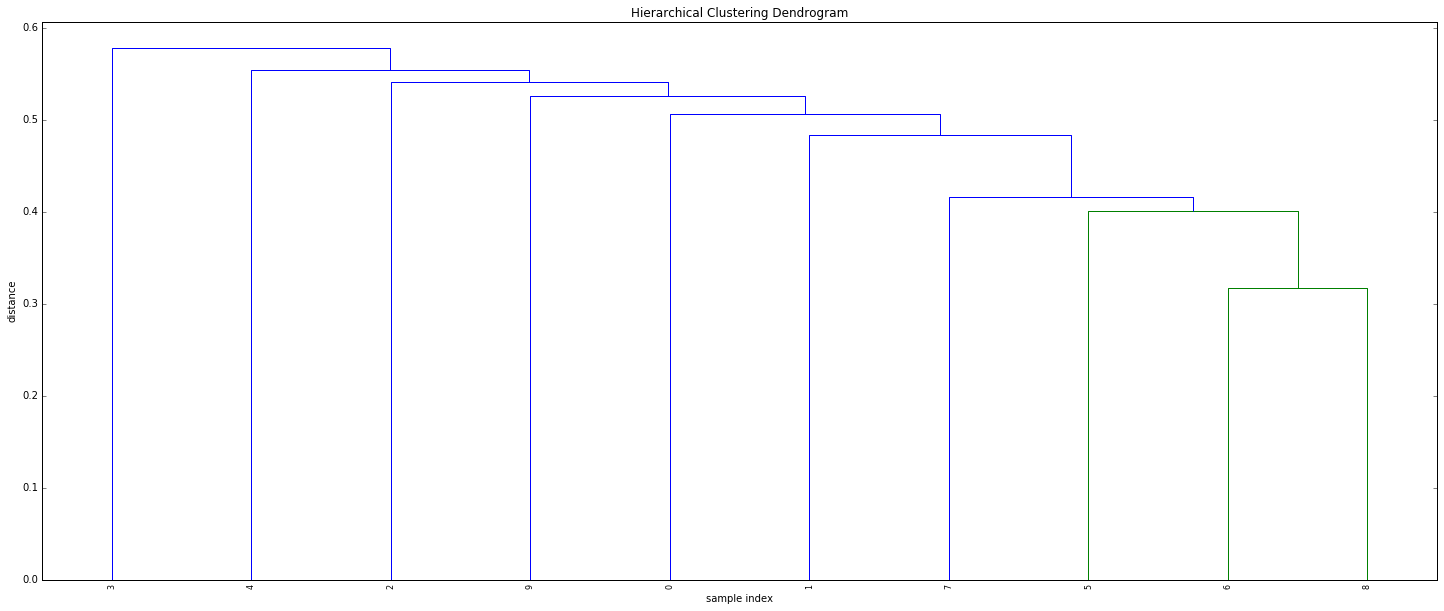

0: minerva

1: woodcut

2: deluge

3: festive

4: chant

5: nefertiti

6: dulcimer

7: alliterative

8: grecian

9: equestrian

(5, 100)


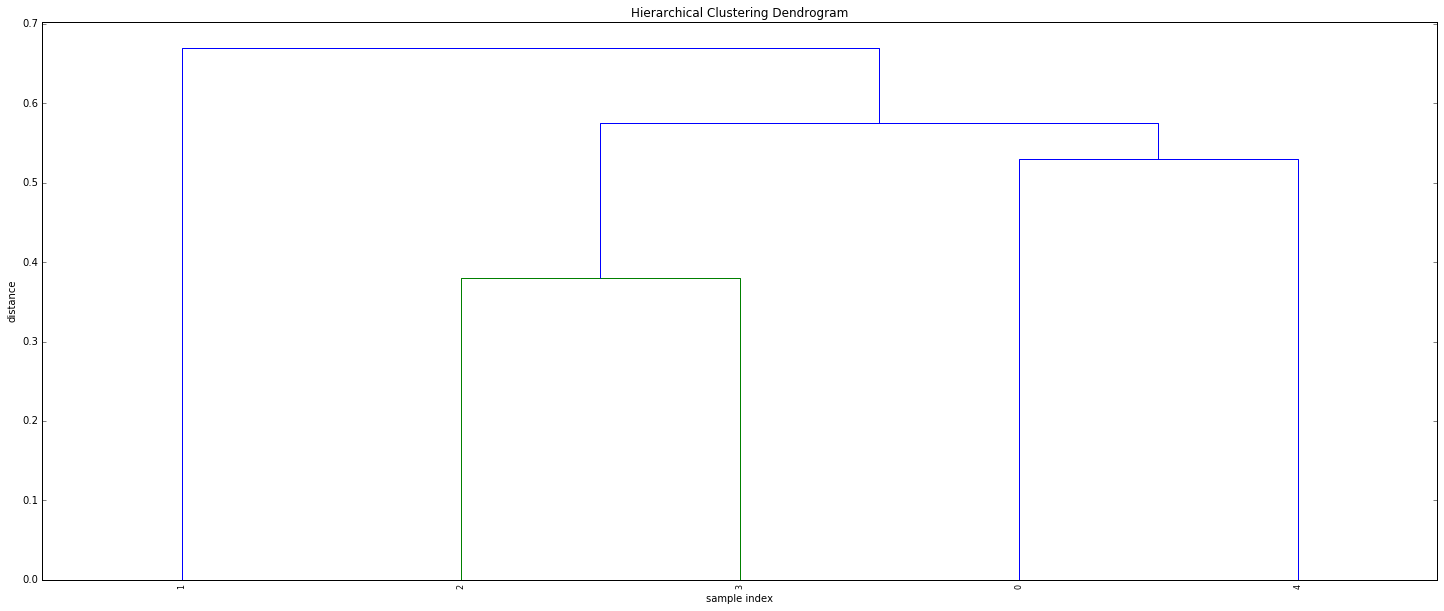

0: eaters

1: hercules

2: tablets

3: scrolls

4: couplets

(14, 100)


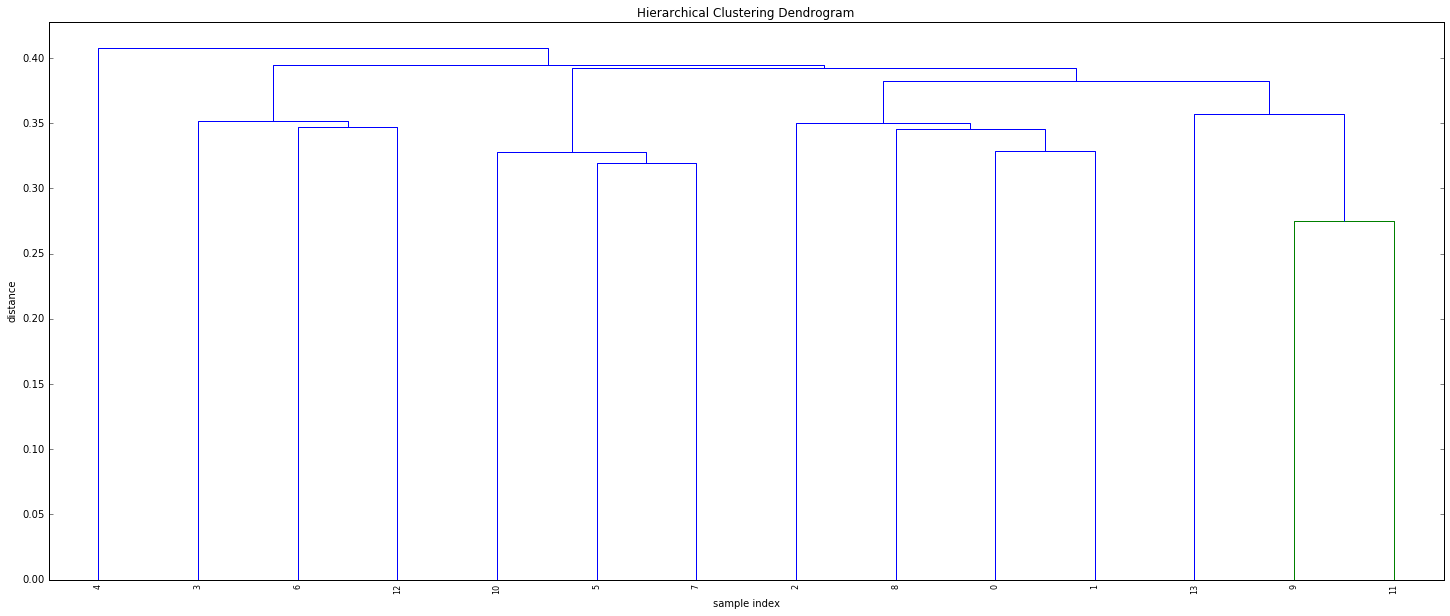

0: pouring

1: drying

2: eating

3: hunting

4: burning

5: tasting

6: cooking

7: sparkling

8: feeding

9: fishing

10: baking

11: farming

12: clothing

13: grazing

(3, 100)


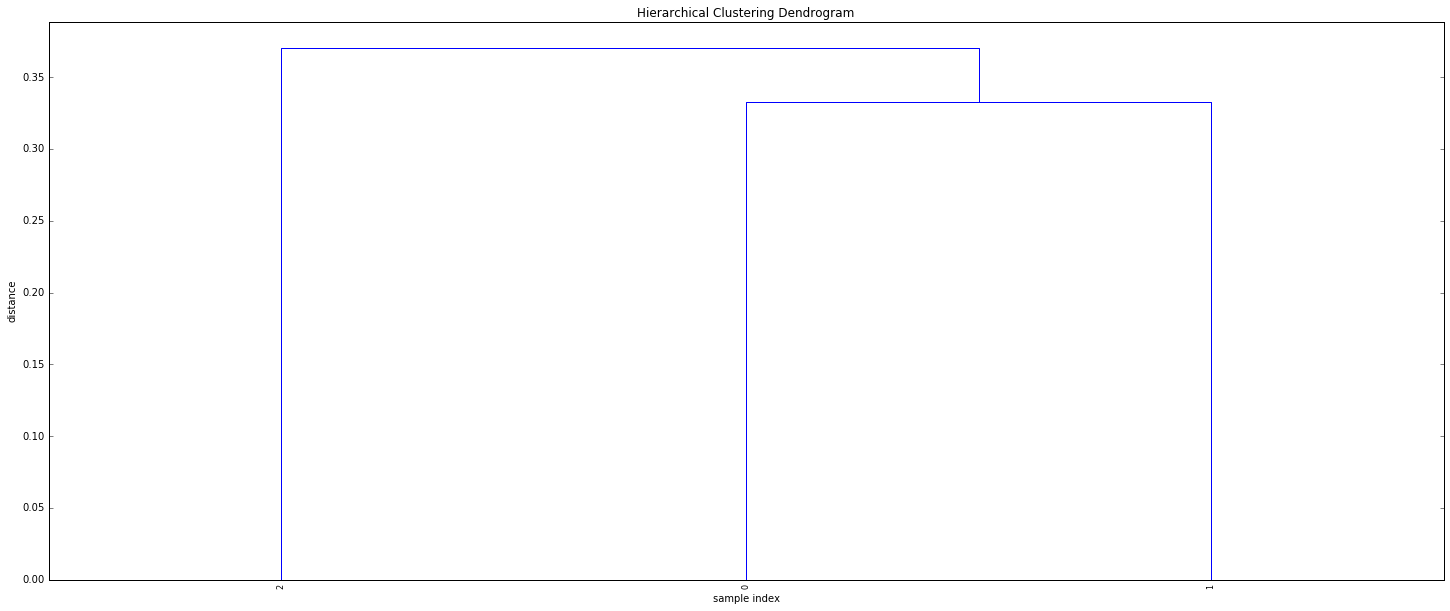

0: leather

1: jelly

2: tooth

(98, 100)


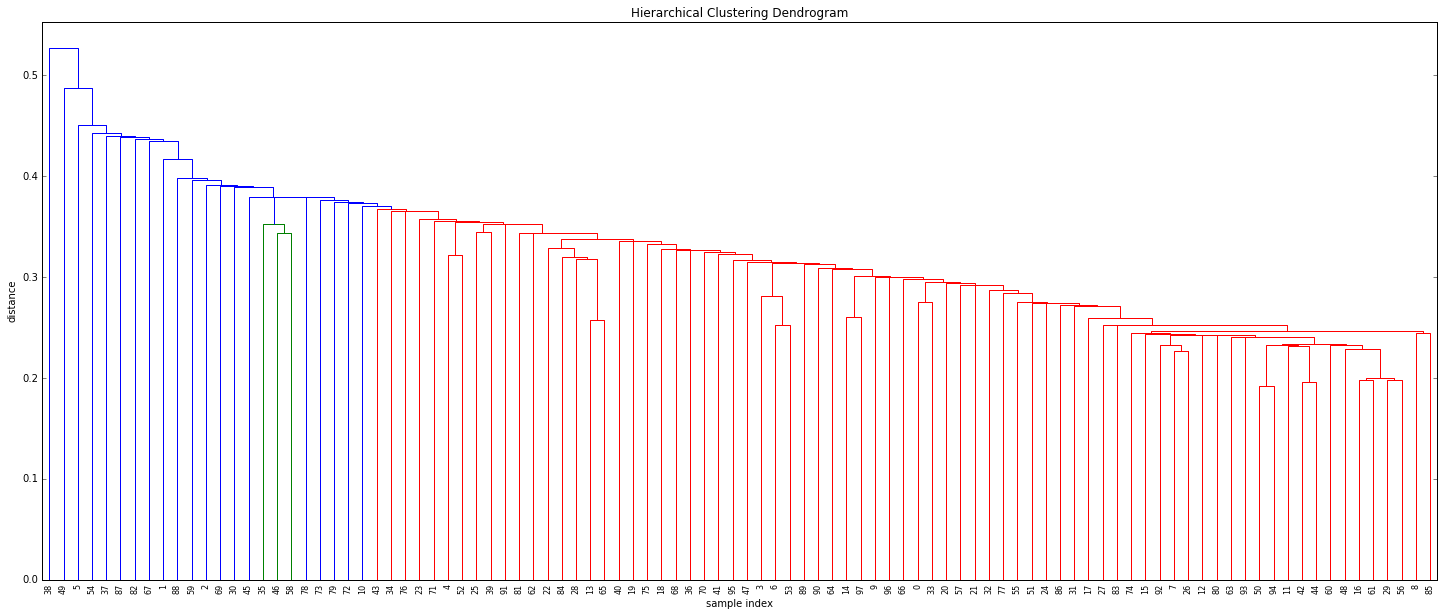

0: livestock

1: gold

2: recipe

3: aroma

4: skin

5: scarce

6: flavor

7: milk

8: timber

9: grape

10: peanut

11: sugar

12: dairy

13: wet

14: bread

15: wool

16: sauce

17: coffee

18: food

19: plaster

20: fat

21: stout

22: frying

23: drinking

24: silk

25: furniture

26: meat

27: tobacco

28: cloudy

29: pork

30: gardening

31: tea

32: fish

33: crop

34: palm

35: pasture

36: bark

37: colourful

38: canvas

39: jewelry

40: porcelain

41: porridge

42: wheat

43: iron

44: corn

45: water

46: graze

47: cement

48: pasta

49: spill

50: shrimp

51: grain

52: smoke

53: flavour

54: pox

55: cocoa

56: rice

57: beer

58: prey

59: waste

60: syrup

61: butter

62: mushroom

63: chocolate

64: cloth

65: warm

66: cereal

67: pottery

68: spice

69: grocery

70: cacti

71: fur

72: frozen

73: worm

74: soup

75: foliage

76: kangaroo

77: vodka

78: cane

79: soil

80: honey

81: clothing

82: domestication

83: cotton

84: saline

85: coal

86: tin

87: stir


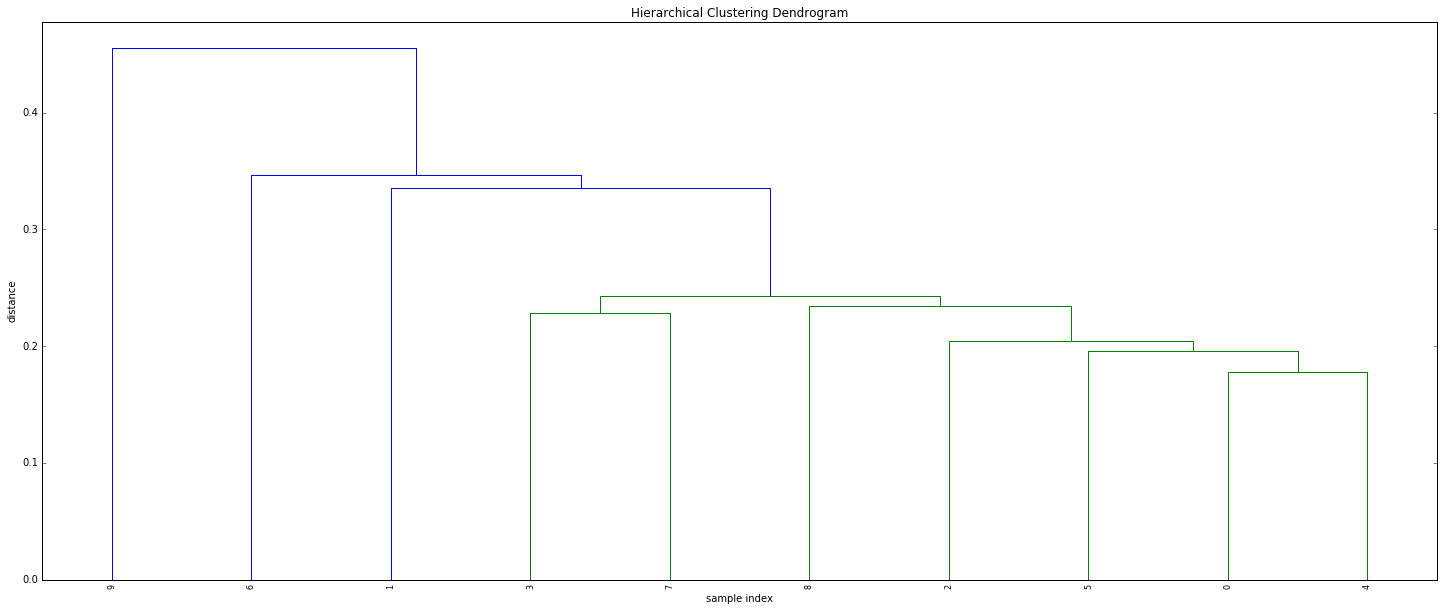

0: boiled

1: tea

2: baked

3: sliced

4: cooked

5: dried

6: smoke

7: grilled

8: smoked

9: domesticated

(32, 100)


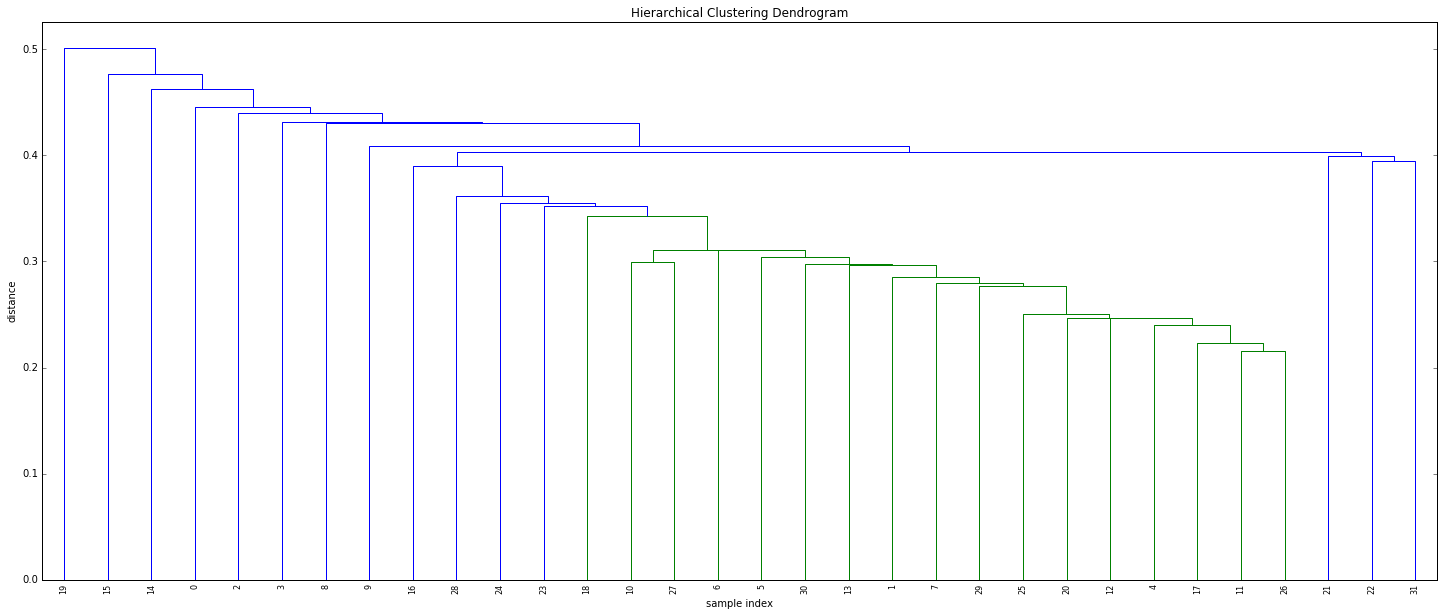

0: feed

1: coconut

2: habitat

3: taste

4: tea

5: liquor

6: almond

7: mushrooms

8: kiln

9: skin

10: grape

11: beef

12: sugar

13: lumber

14: rich

15: scenery

16: coca

17: citrus

18: salmon

19: rain

20: chocolate

21: cloth

22: spray

23: olive

24: fur

25: meat

26: potato

27: pearls

28: tooth

29: soup

30: beverage

31: clean

(48, 100)


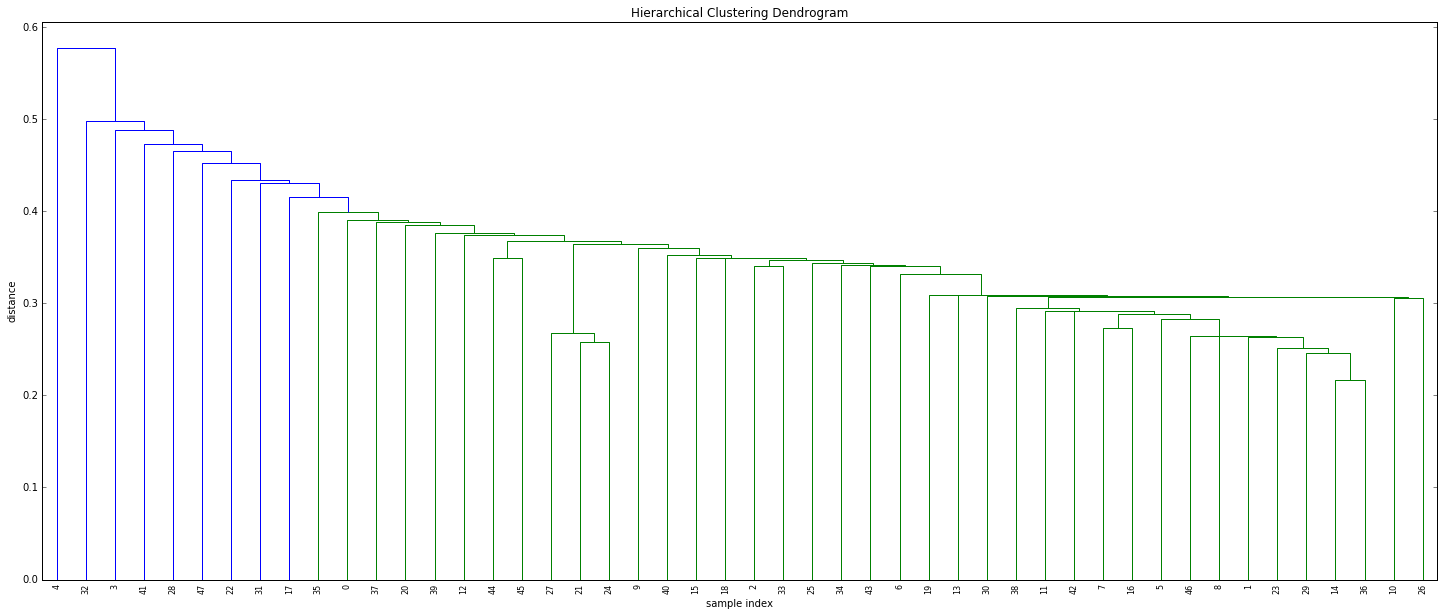

0: exotic

1: cheese

2: aquatic

3: gold

4: alcoholic

5: tea

6: fish

7: squid

8: lavender

9: raw

10: shrubs

11: sap

12: domesticated

13: maple

14: mustard

15: floral

16: shellfish

17: fine

18: damp

19: lava

20: plentiful

21: hot

22: fossil

23: vegetable

24: cool

25: banana

26: evergreen

27: dry

28: rich

29: flour

30: shale

31: luxurious

32: diet

33: mammal

34: goldfish

35: bread

36: tomato

37: fur

38: edible

39: frozen

40: soft

41: vegetarian

42: sour

43: footwear

44: clean

45: fresh

46: baked

47: meal

(4, 100)


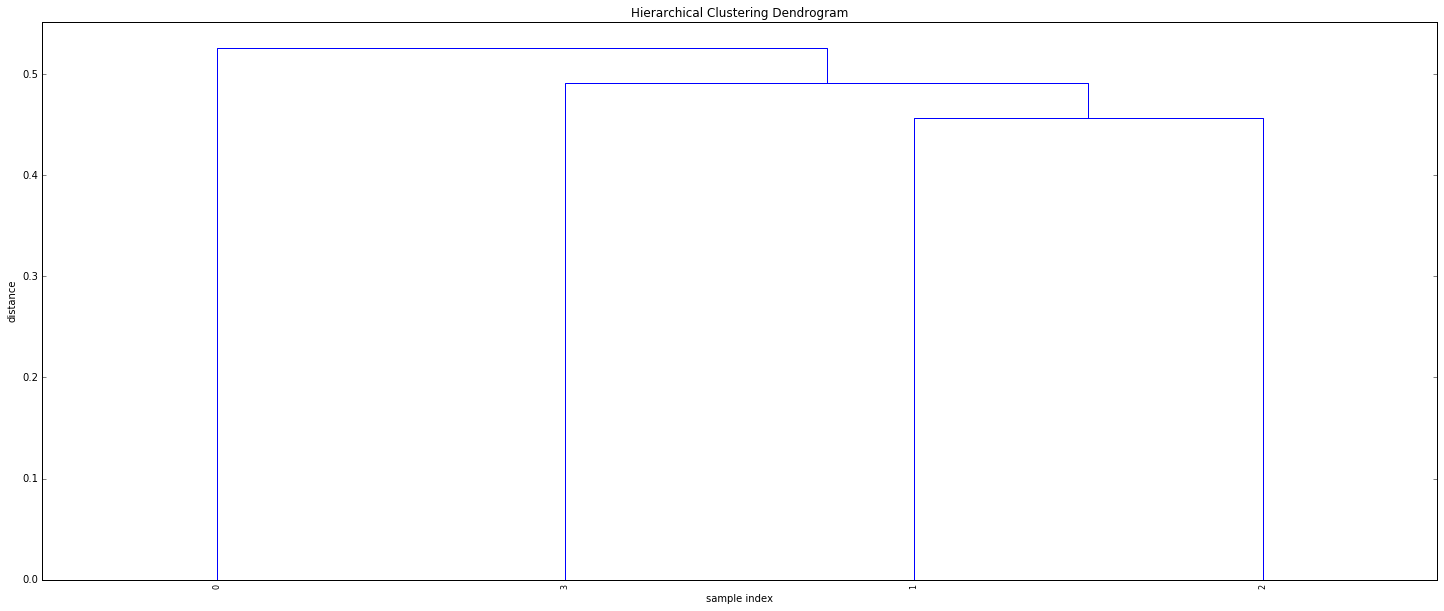

0: leaves

1: cakes

2: huts

3: shelves

(62, 100)


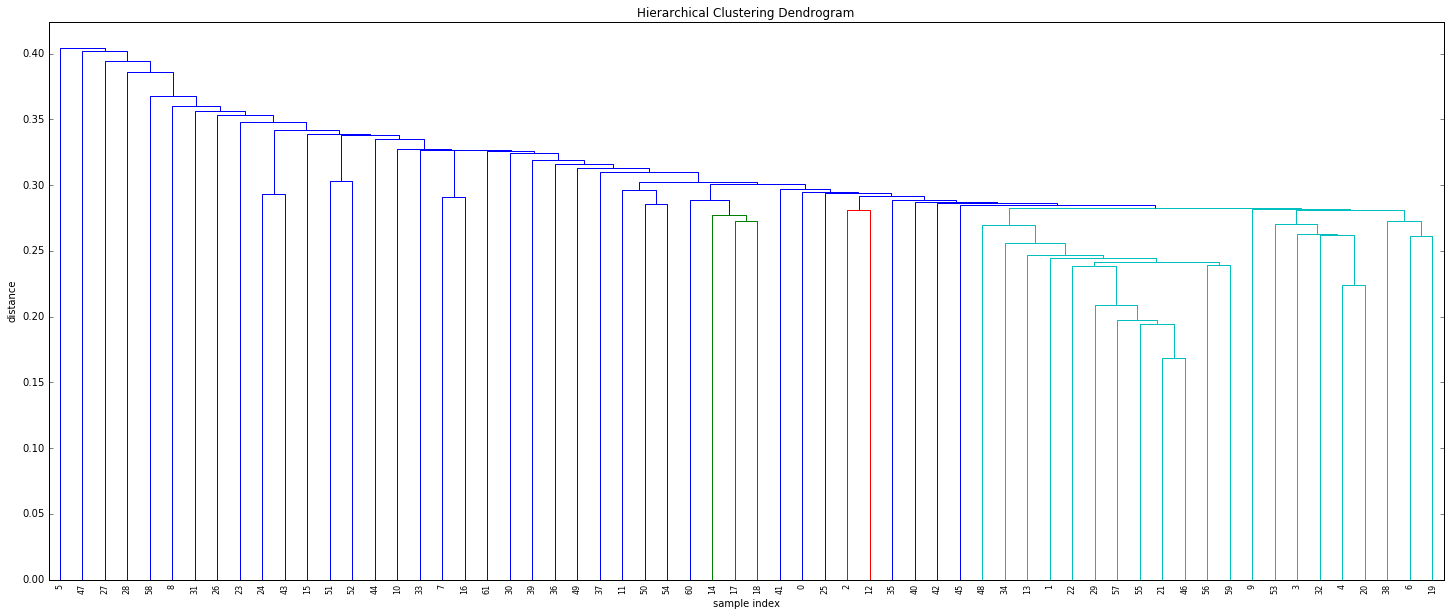

0: rats

1: bananas

2: elephants

3: insects

4: ants

5: indoors

6: goats

7: cans

8: ornaments

9: cattle

10: cows

11: tusks

12: birds

13: drinks

14: flavors

15: bags

16: bottles

17: dishes

18: ingredients

19: whales

20: bees

21: vegetables

22: nuts

23: meals

24: bricks

25: cats

26: pets

27: diamonds

28: jars

29: tomatoes

30: horses

31: pebbles

32: eggs

33: trees

34: sweets

35: pigs

36: oranges

37: grapes

38: herds

39: fishes

40: flowers

41: minerals

42: bushes

43: beads

44: pests

45: crops

46: potatoes

47: leaves

48: grasses

49: chickens

50: vines

51: rocks

52: beds

53: plants

54: camels

55: beans

56: apples

57: fruits

58: veins

59: berries

60: recipes

61: monkeys

(6, 100)


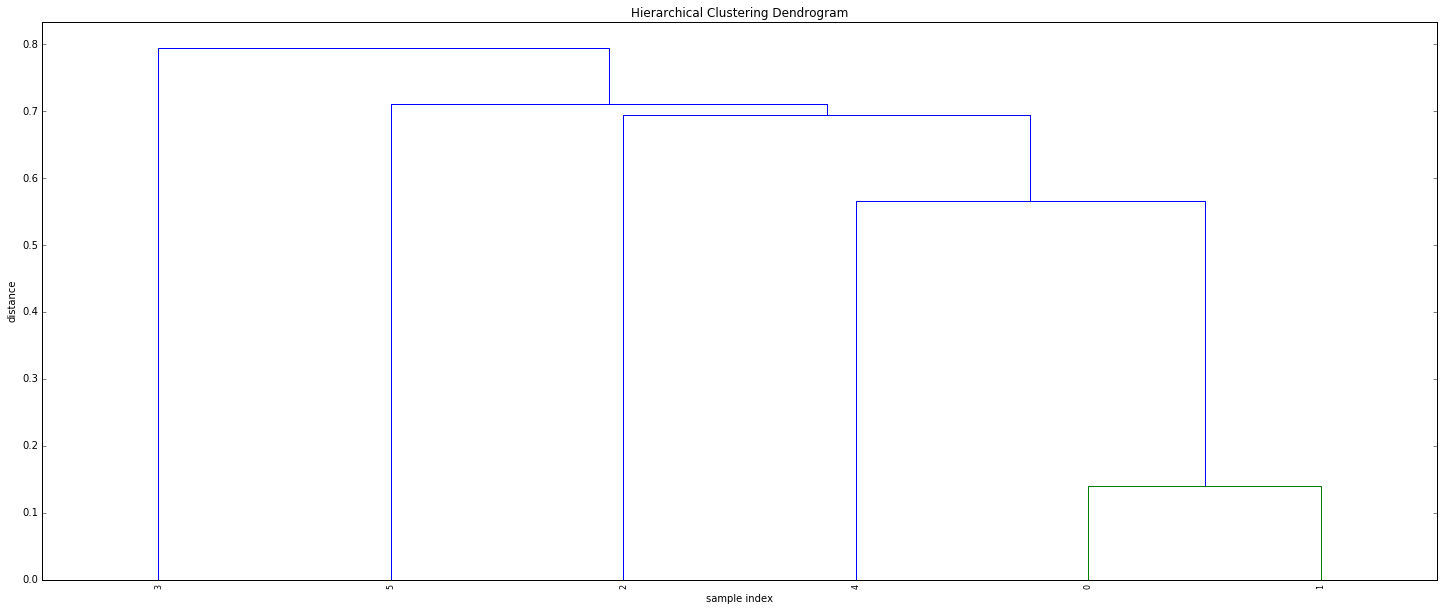

0: october

1: march

2: ad

3: s

4: birthday

5: press

(10, 100)


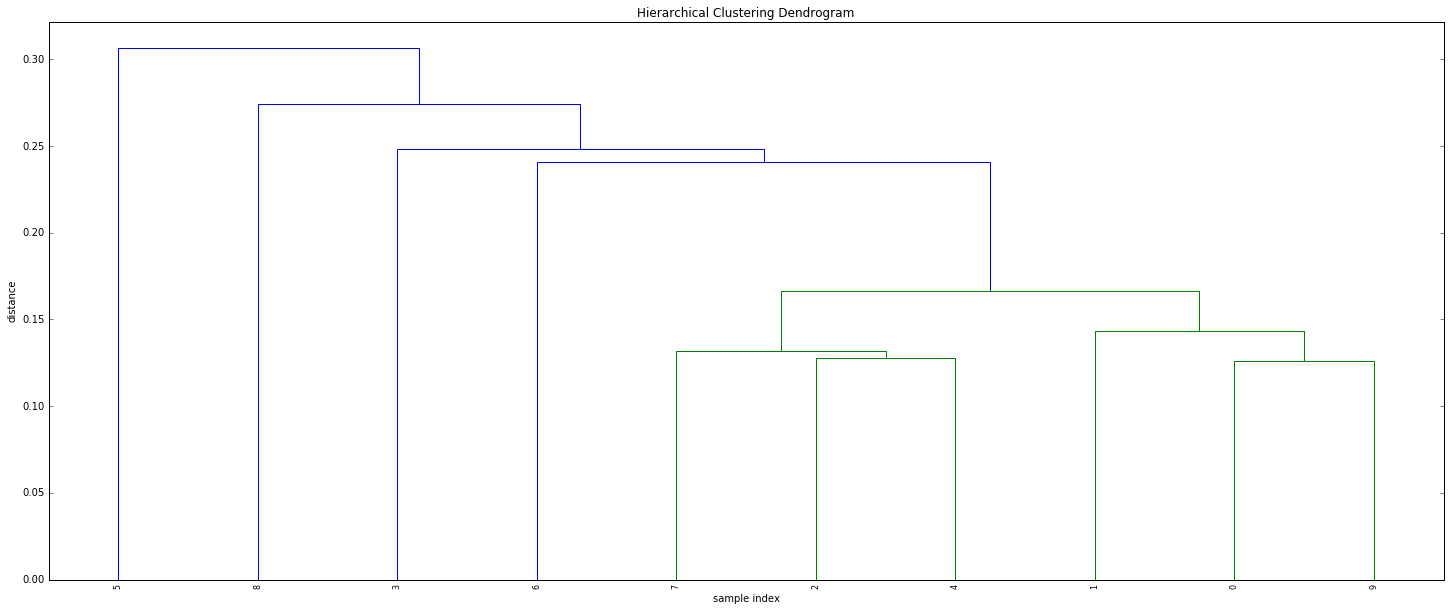

0: seven

1: six

2: three

3: two

4: four

5: zero

6: nine

7: five

8: one

9: eight

(3, 100)


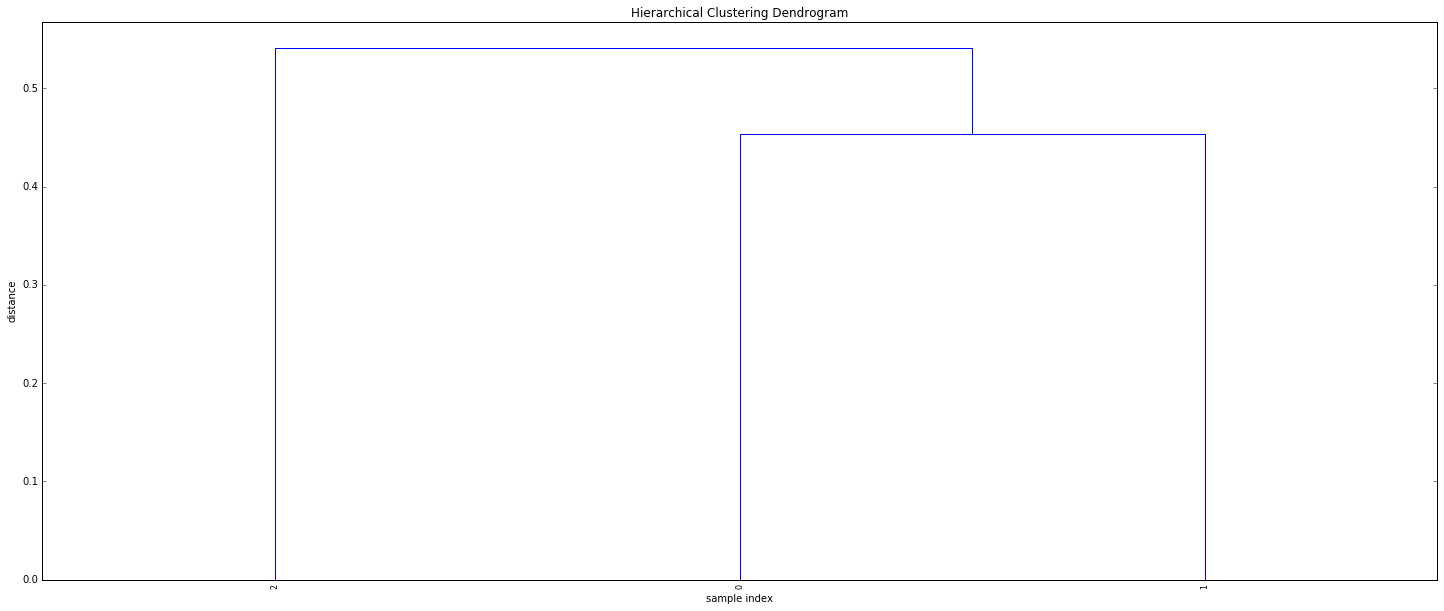

0: sunday

1: birthday

2: february

(3, 100)


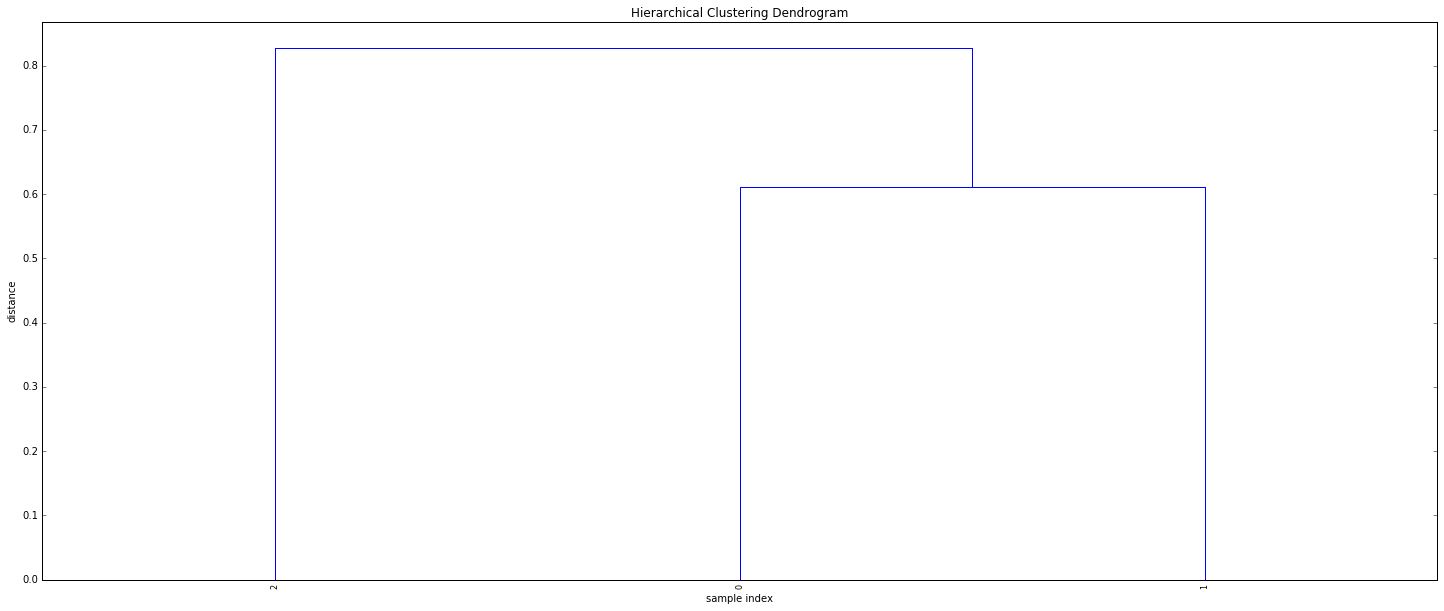

0: boating

1: shilling

2: keeling

(34, 100)


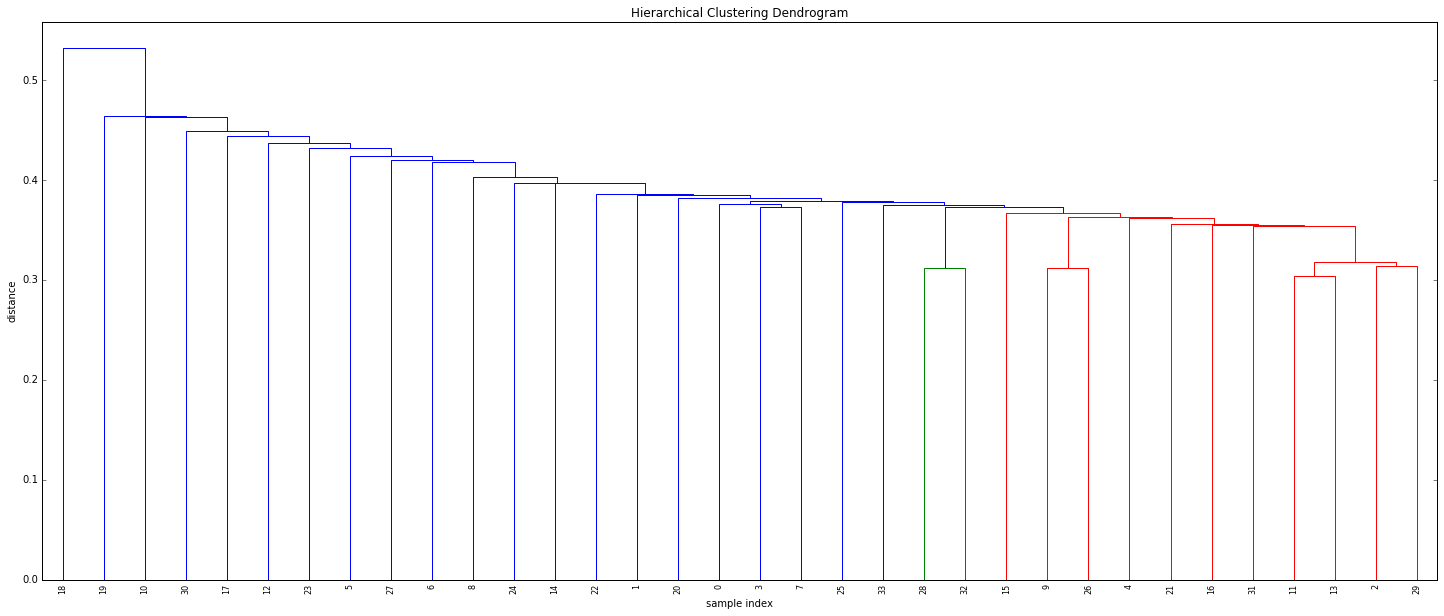

0: farmhouse

1: fife

2: grassy

3: viaduct

4: nantucket

5: hippodrome

6: yukon

7: champlain

8: camping

9: portage

10: irrigate

11: gull

12: pearl

13: otter

14: fez

15: sandwich

16: hula

17: parcel

18: antebellum

19: pleasant

20: oasis

21: yellowstone

22: tivoli

23: pagoda

24: fang

25: conch

26: racetrack

27: occidental

28: cod

29: teal

30: steeple

31: alexandrina

32: husky

33: chinook

(11, 100)


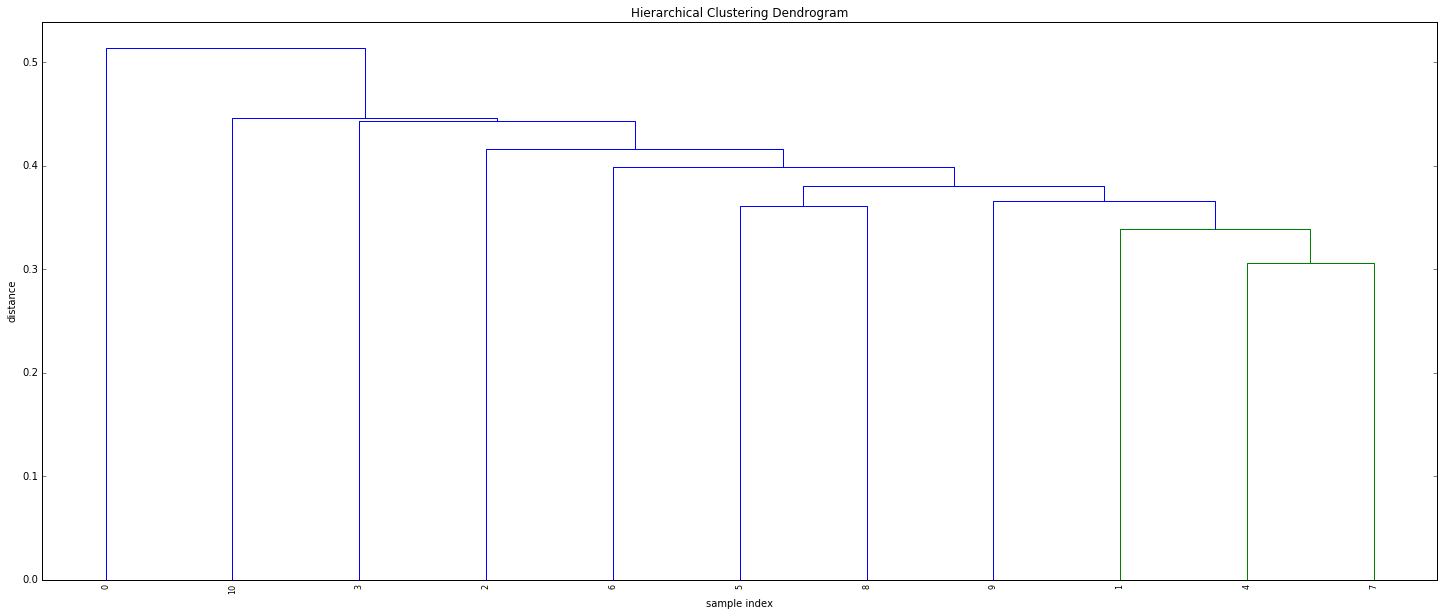

0: unexplored

1: highgate

2: zoological

3: auk

4: yarmouth

5: canary

6: windy

7: holborn

8: bactrian

9: gasp

10: orient

(7, 100)


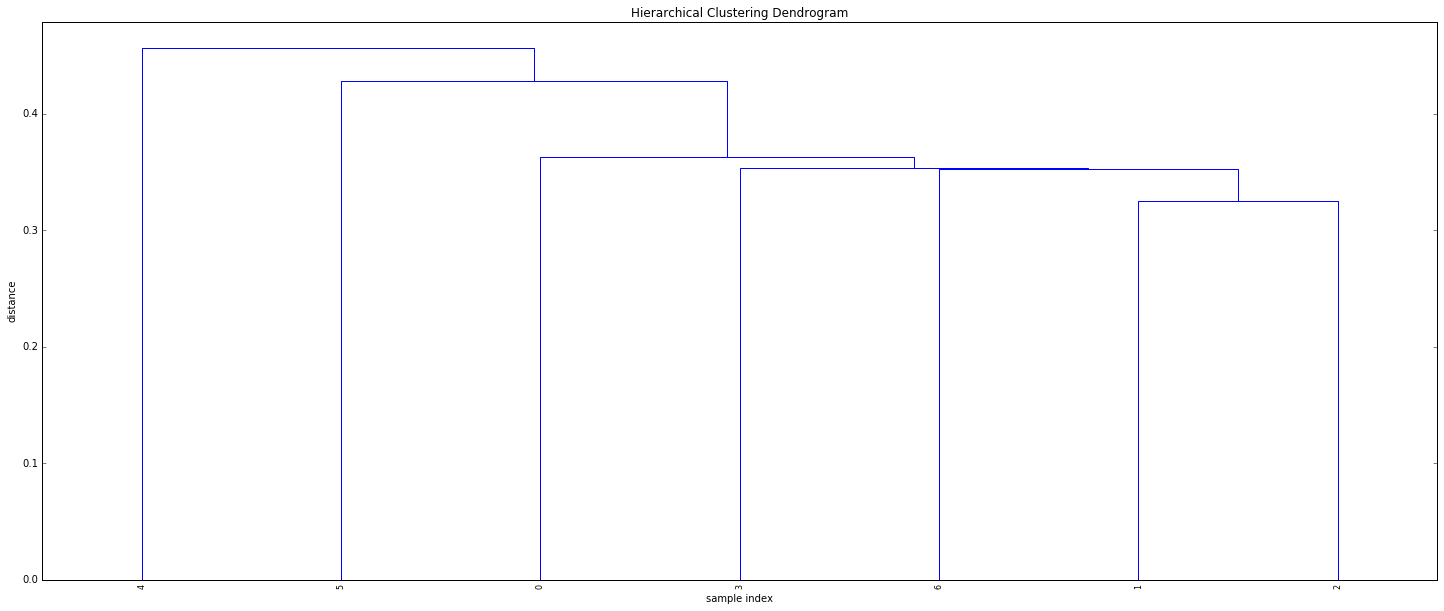

0: pines

1: waterfalls

2: shoals

3: gulls

4: sardines

5: forks

6: spurs

(4, 100)


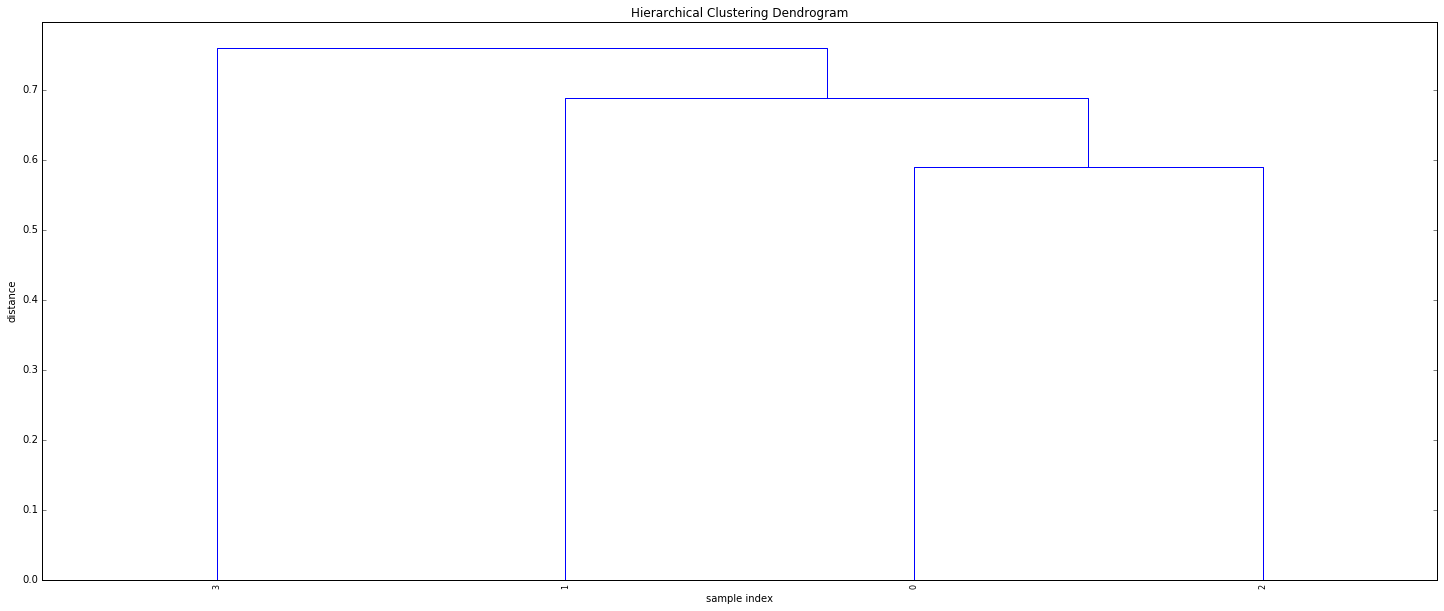

0: recording

1: amazing

2: setting

3: missing

(47, 100)


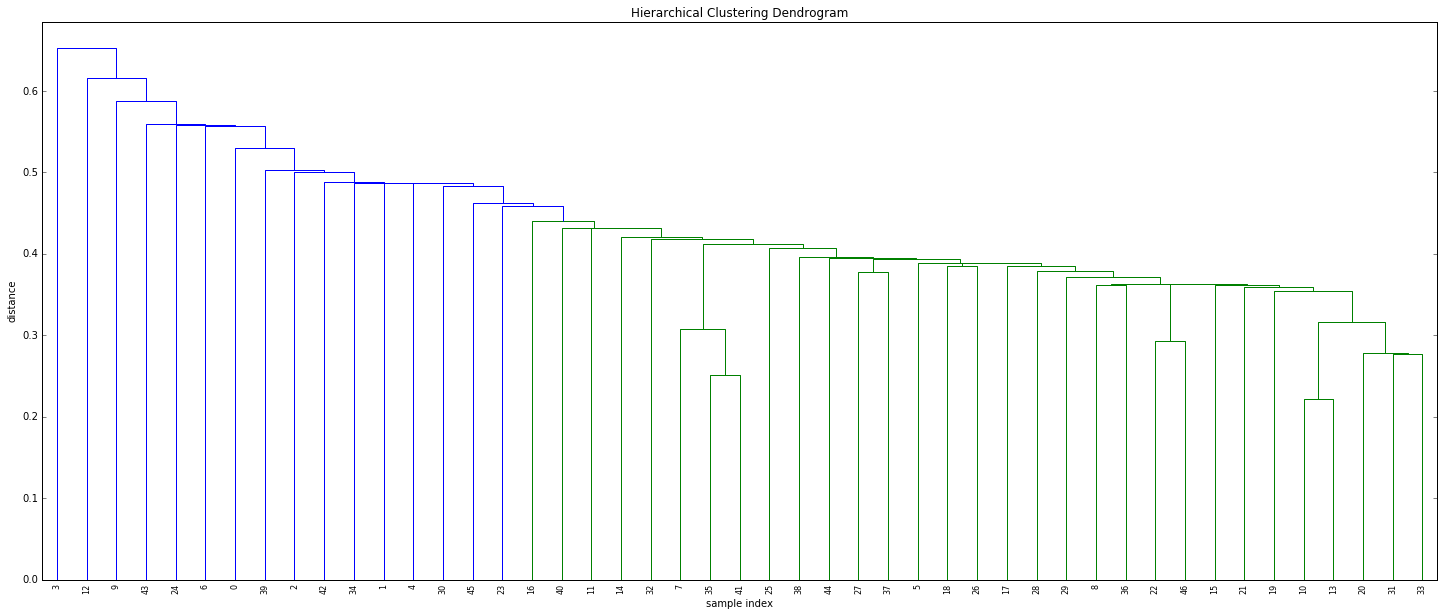

0: acclaim

1: show

2: appearance

3: globe

4: halloween

5: scene

6: collaboration

7: radio

8: broadway

9: seller

10: film

11: entertainment

12: stamp

13: movie

14: classic

15: fiction

16: cliffhanger

17: theme

18: animation

19: hollywood

20: comedy

21: horror

22: disney

23: picture

24: star

25: song

26: photography

27: finale

28: fan

29: adventure

30: advertisement

31: parody

32: doom

33: cartoon

34: stage

35: television

36: theater

37: opera

38: celebrity

39: cover

40: soap

41: tv

42: audience

43: release

44: suspense

45: voice

46: marvel

(4, 100)


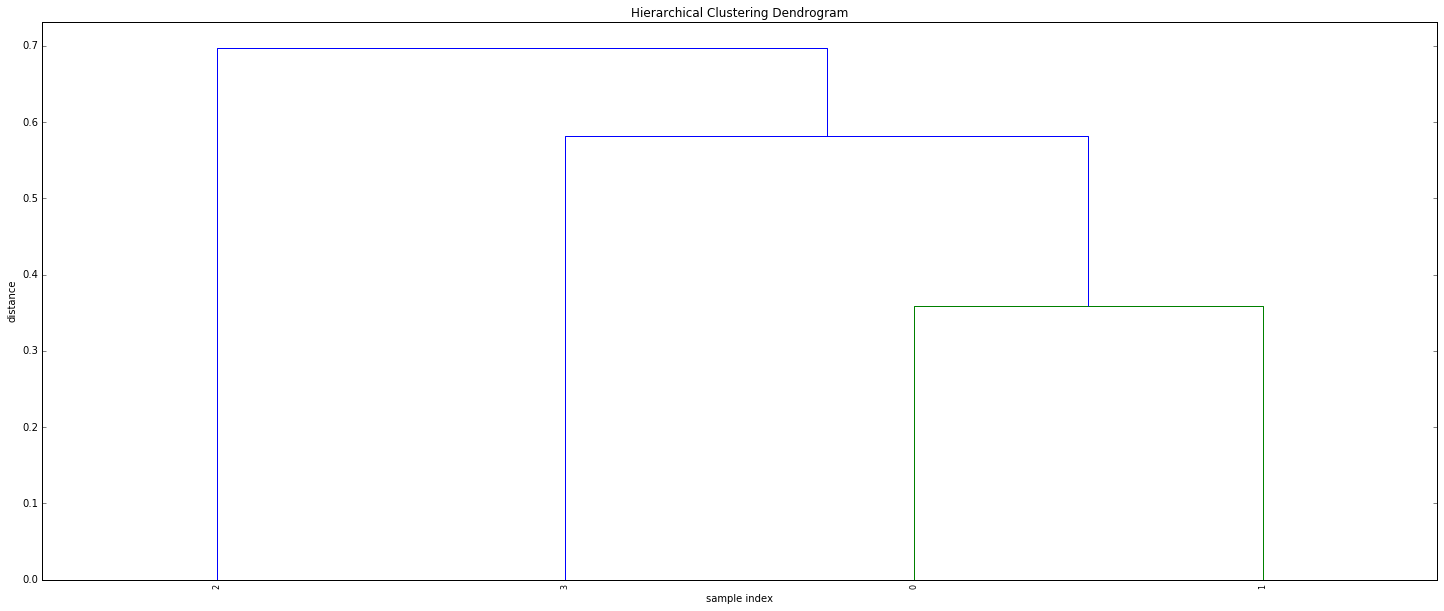

0: themed

1: animated

2: spotlight

3: entitled

(5, 100)


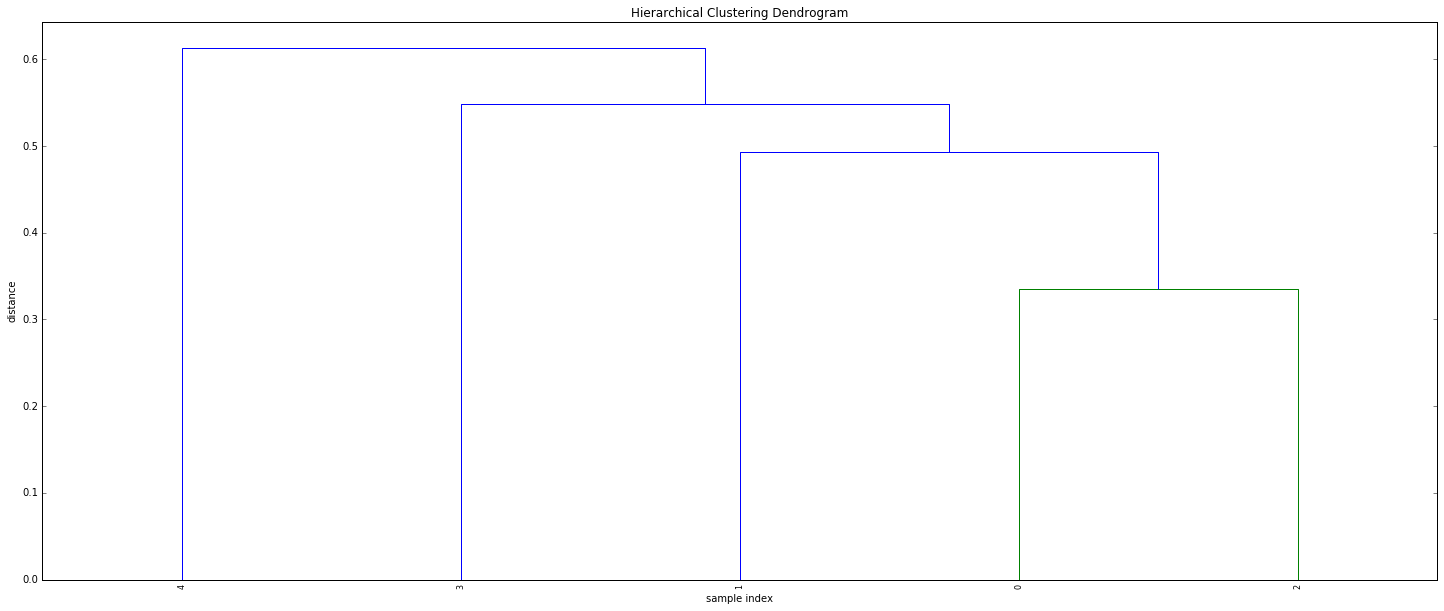

0: drama

1: cowboy

2: comedic

3: concert

4: dc

(17, 100)


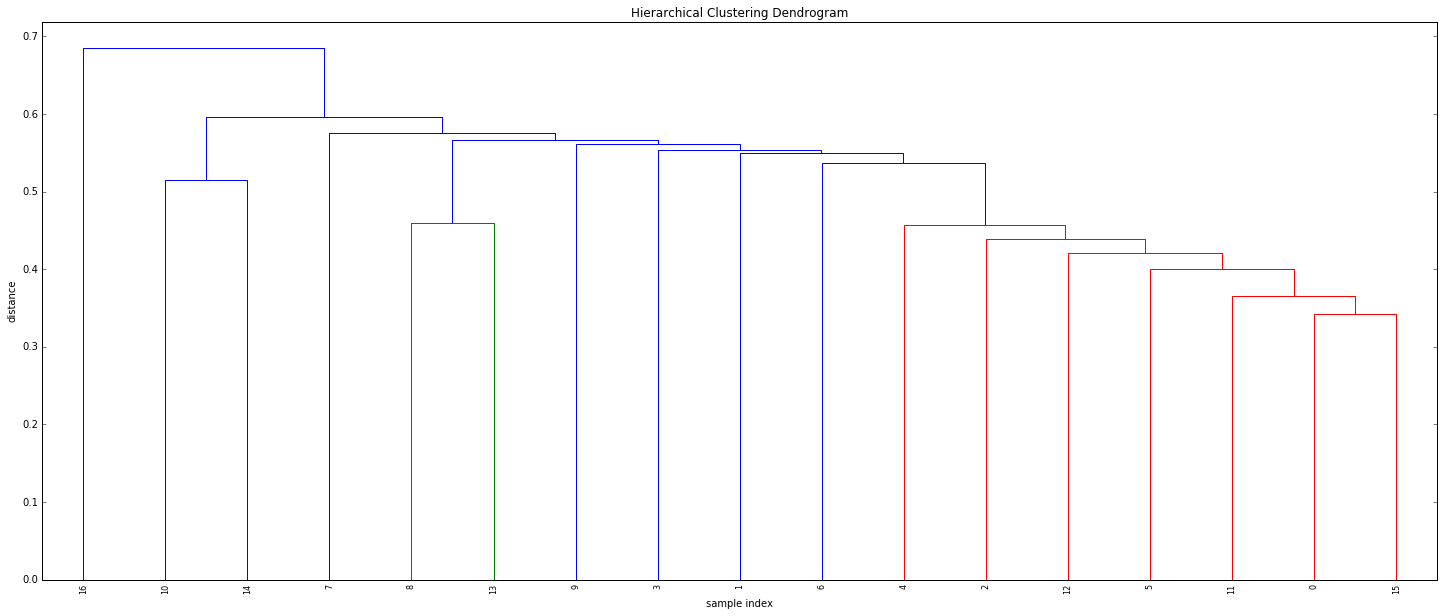

0: theatrical

1: lengthy

2: graphic

3: silent

4: song

5: humorous

6: big

7: cover

8: dc

9: nostalgia

10: imprint

11: fantasy

12: theme

13: abc

14: advertisement

15: comic

16: original

(4, 100)


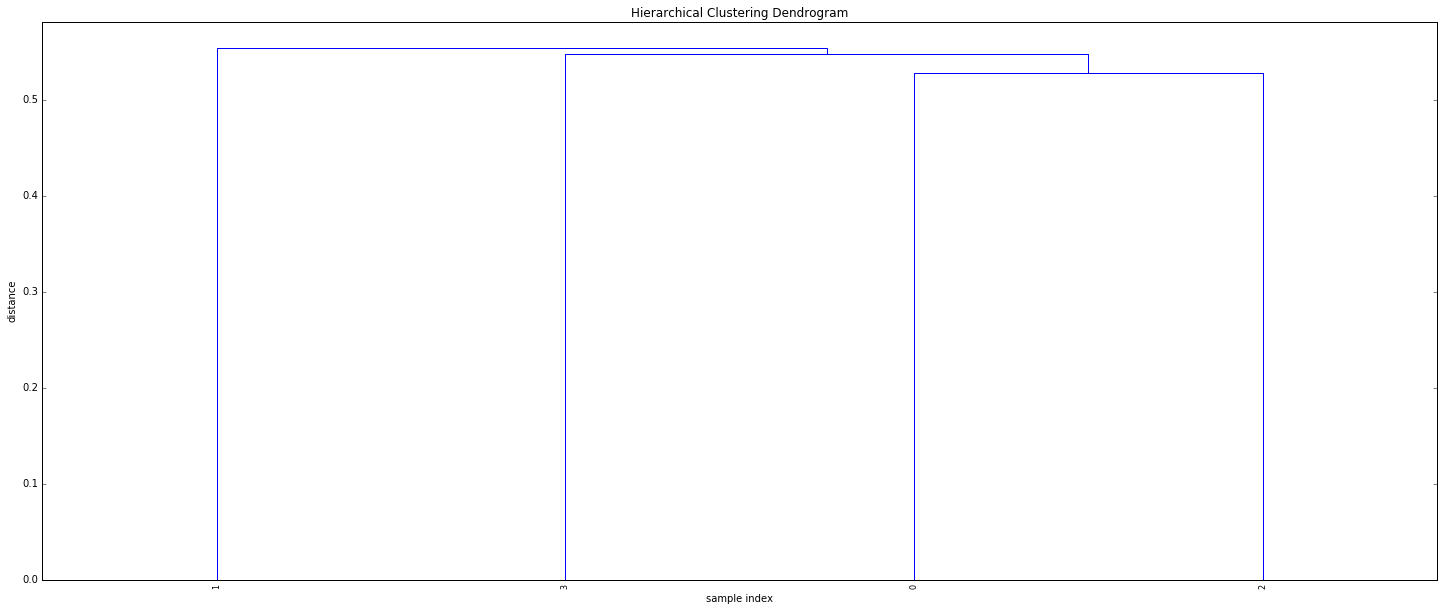

0: credits

1: pictures

2: adventures

3: toys

(13, 100)


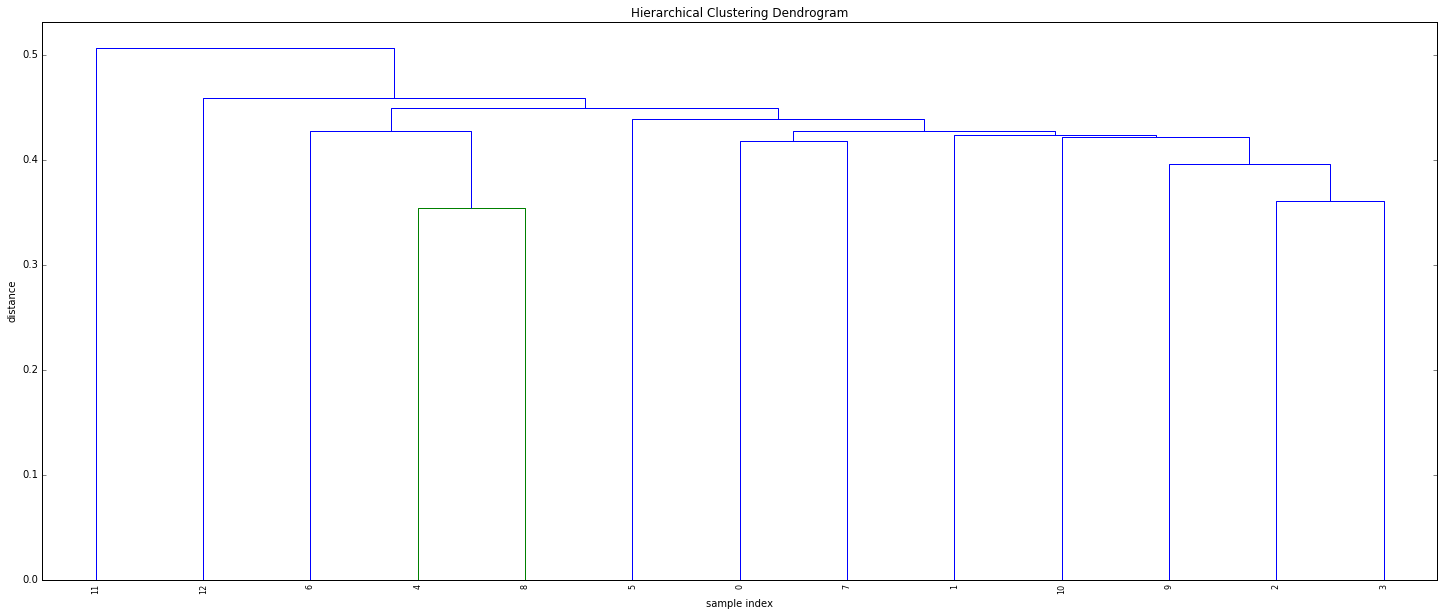

0: clips

1: puppets

2: strips

3: shorts

4: comics

5: pictures

6: appearances

7: advertisements

8: adventures

9: costumes

10: cheers

11: abc

12: characters

(6, 100)


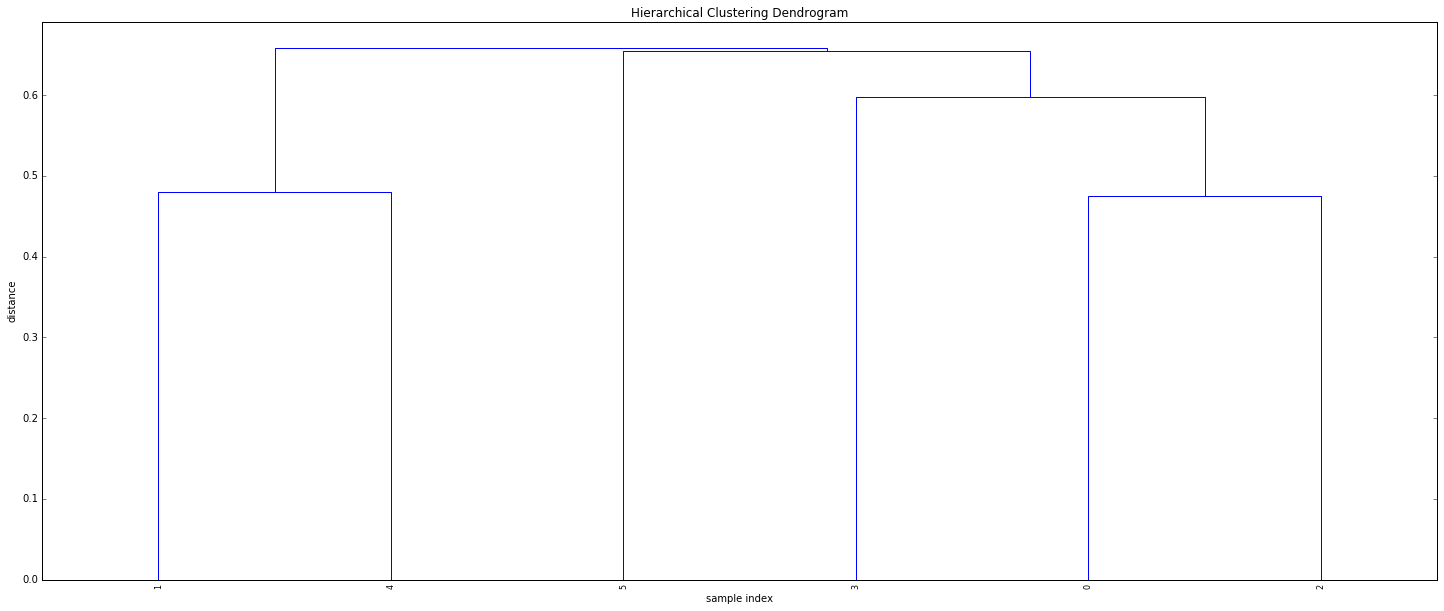

0: ordained

1: established

2: imprisoned

3: bestowed

4: organized

5: donated

(3, 100)


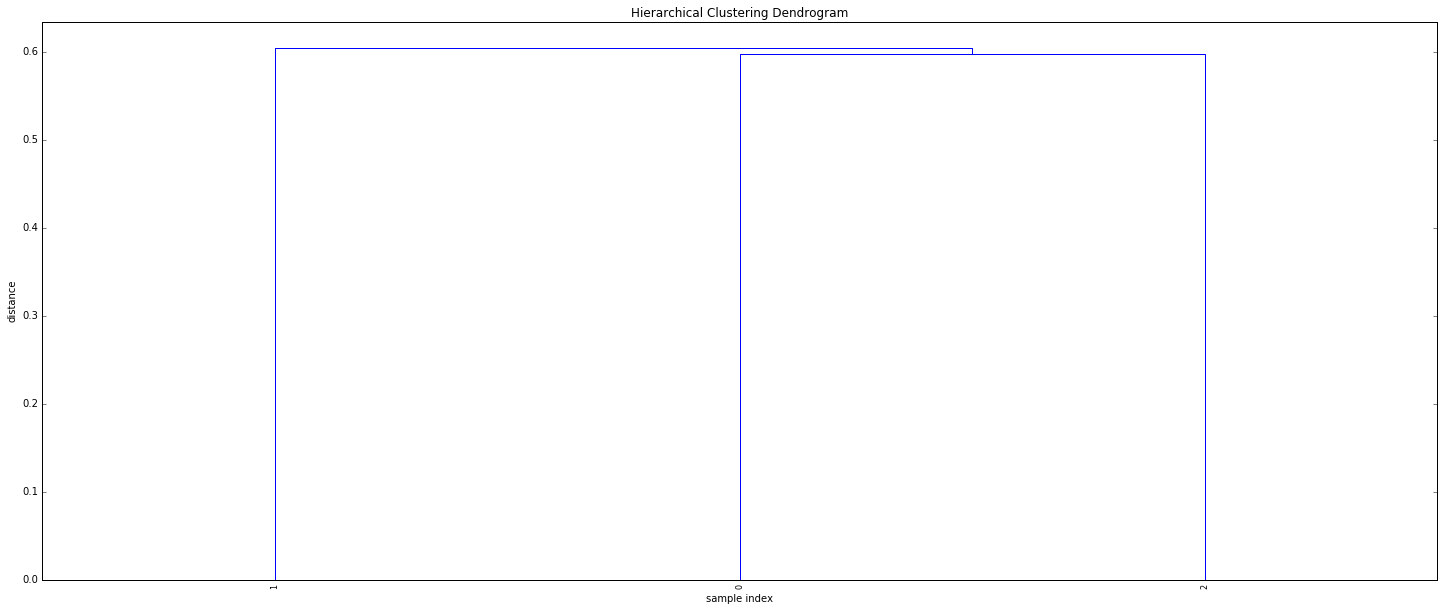

0: loyal

1: captured

2: trained

(4, 100)


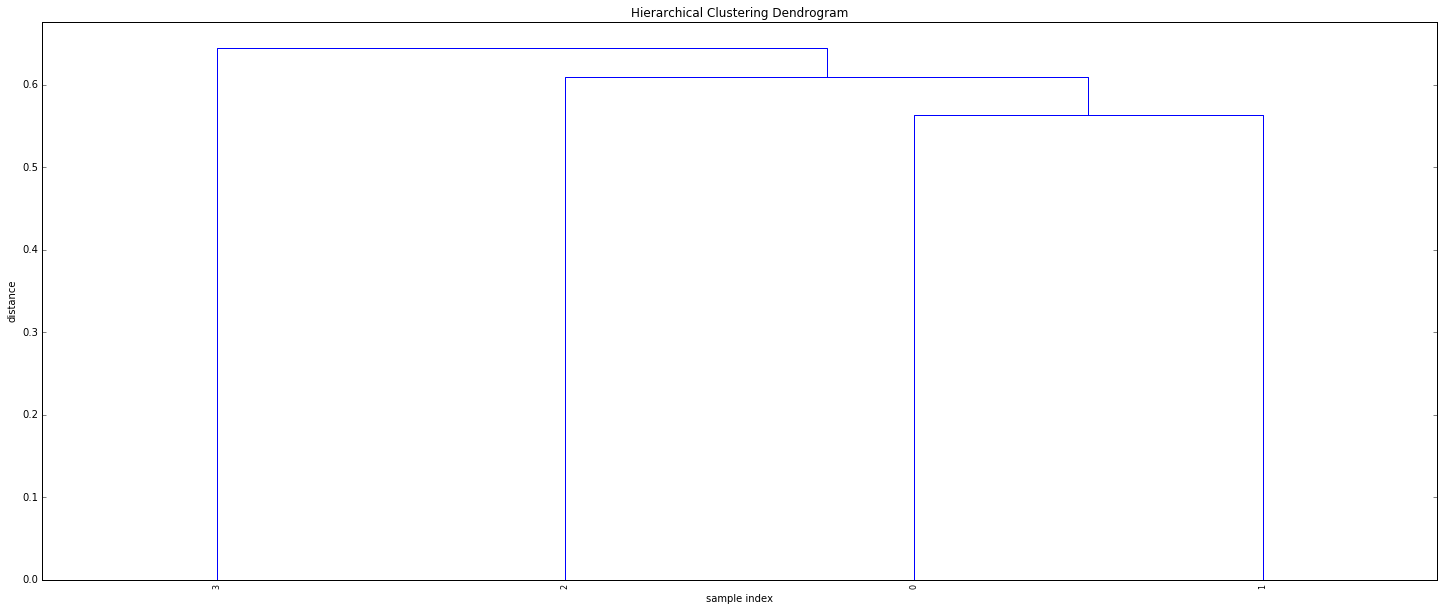

0: engaged

1: raised

2: ordered

3: signed

(4, 100)


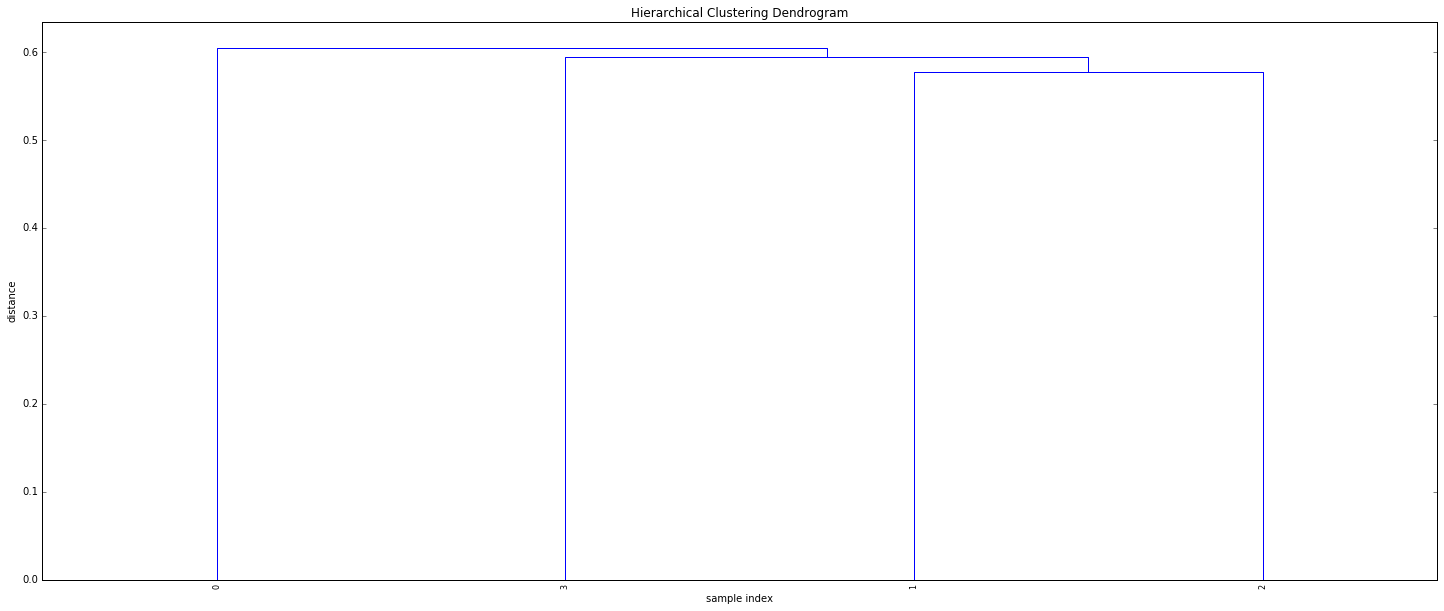

0: prestige

1: challenge

2: task

3: burden

(9, 100)


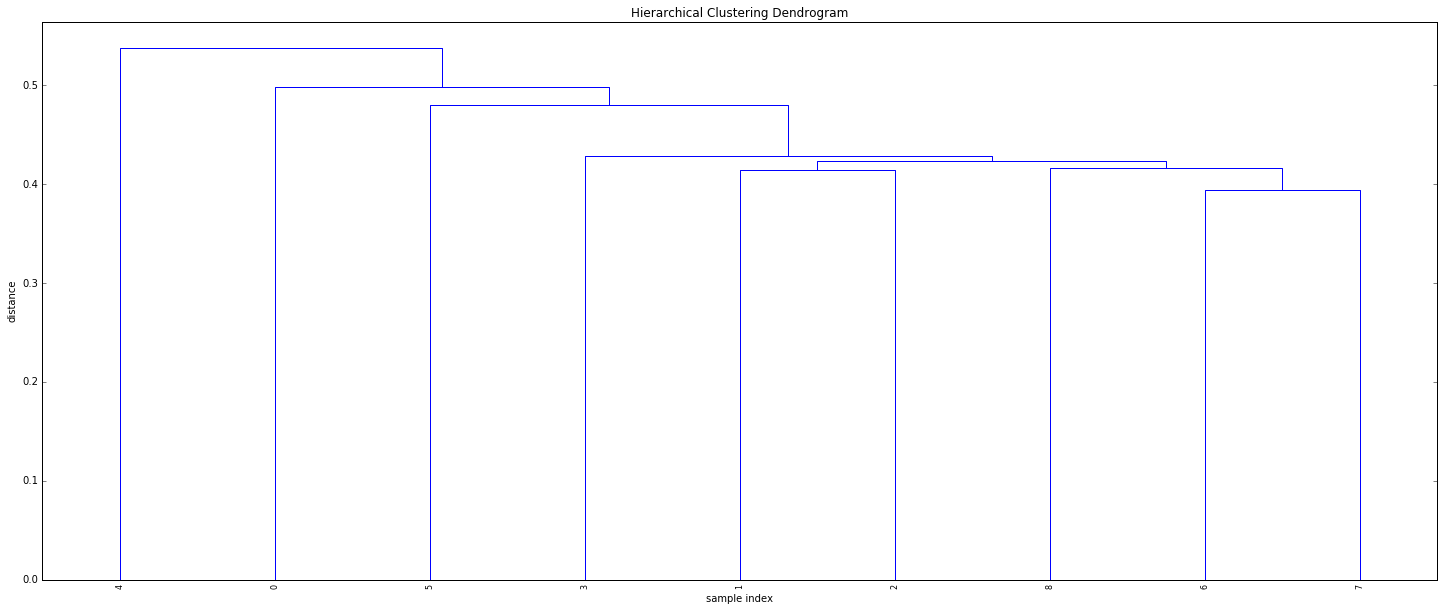

0: partners

1: customers

2: jobs

3: activities

4: rights

5: workers

6: expectations

7: benefits

8: resources

(12, 100)


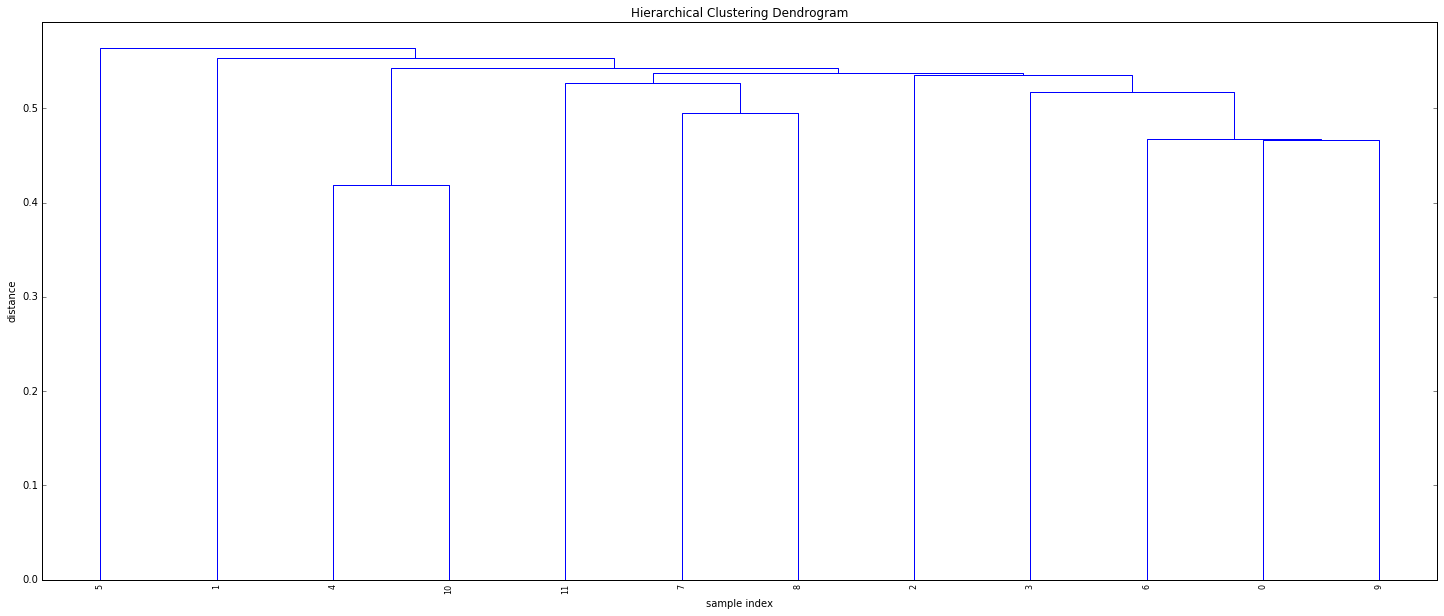

0: monetary

1: fair

2: freedom

3: commitment

4: private

5: foreign

6: labour

7: incentive

8: encouragement

9: strategic

10: public

11: relief

(45, 100)


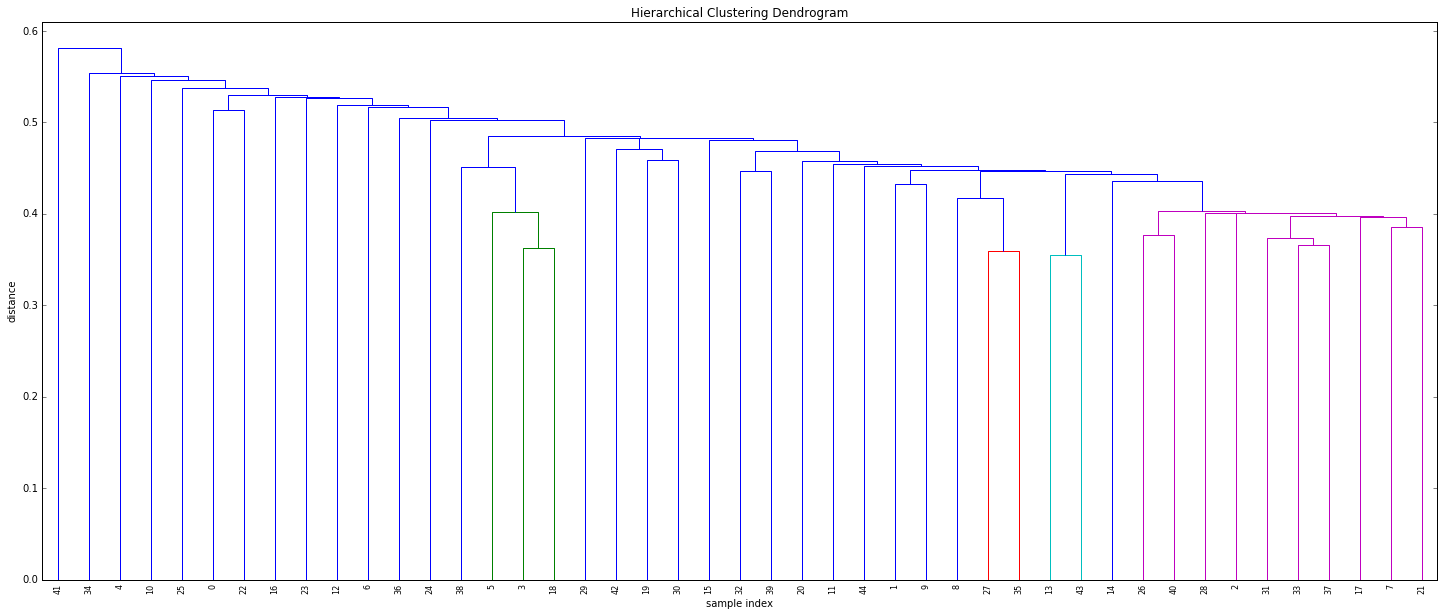

0: control

1: burden

2: money

3: partnership

4: community

5: trade

6: reliance

7: employment

8: market

9: confidence

10: trust

11: business

12: service

13: privacy

14: spending

15: support

16: reluctance

17: labor

18: cooperation

19: progress

20: firm

21: finance

22: power

23: attention

24: worker

25: scrutiny

26: protection

27: ownership

28: demand

29: livelihood

30: effort

31: payment

32: wealth

33: purchase

34: expense

35: monopoly

36: freedom

37: sale

38: contract

39: exploitation

40: responsibility

41: venture

42: aid

43: security

44: property

(12, 100)


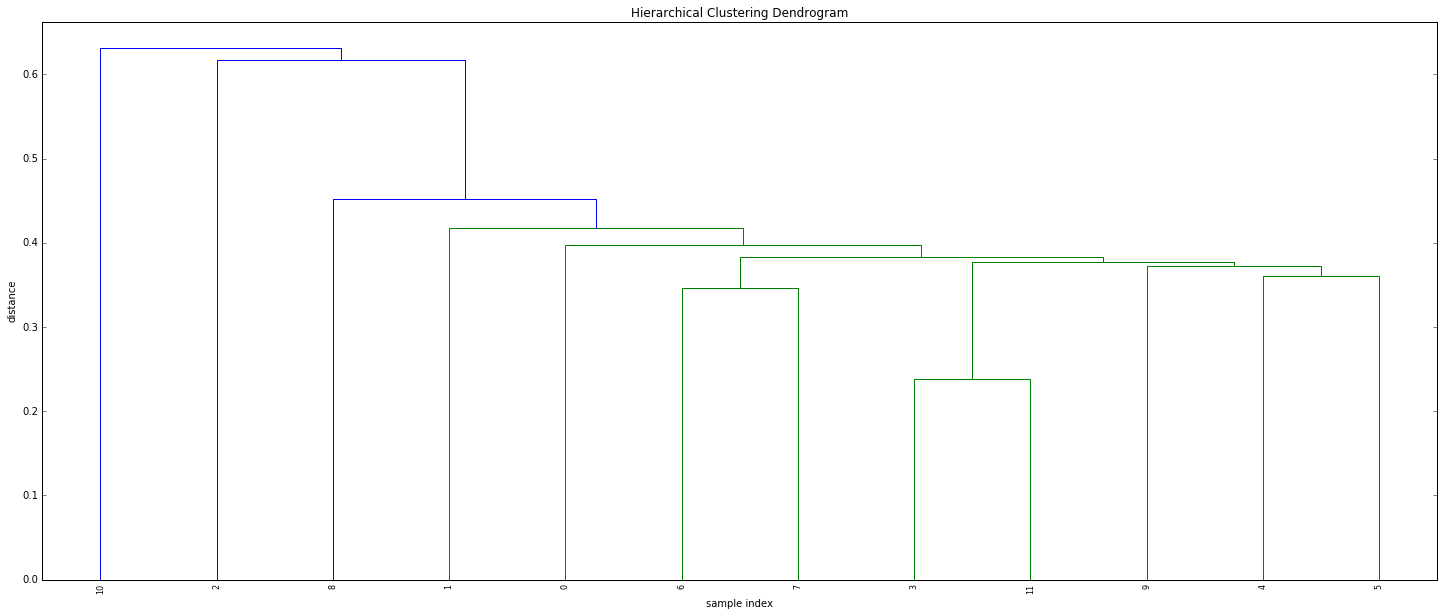

0: tense

1: flap

2: form

3: syllable

4: uppercase

5: syllabic

6: possessive

7: feminine

8: imperative

9: numeral

10: sensical

11: consonant

(18, 100)


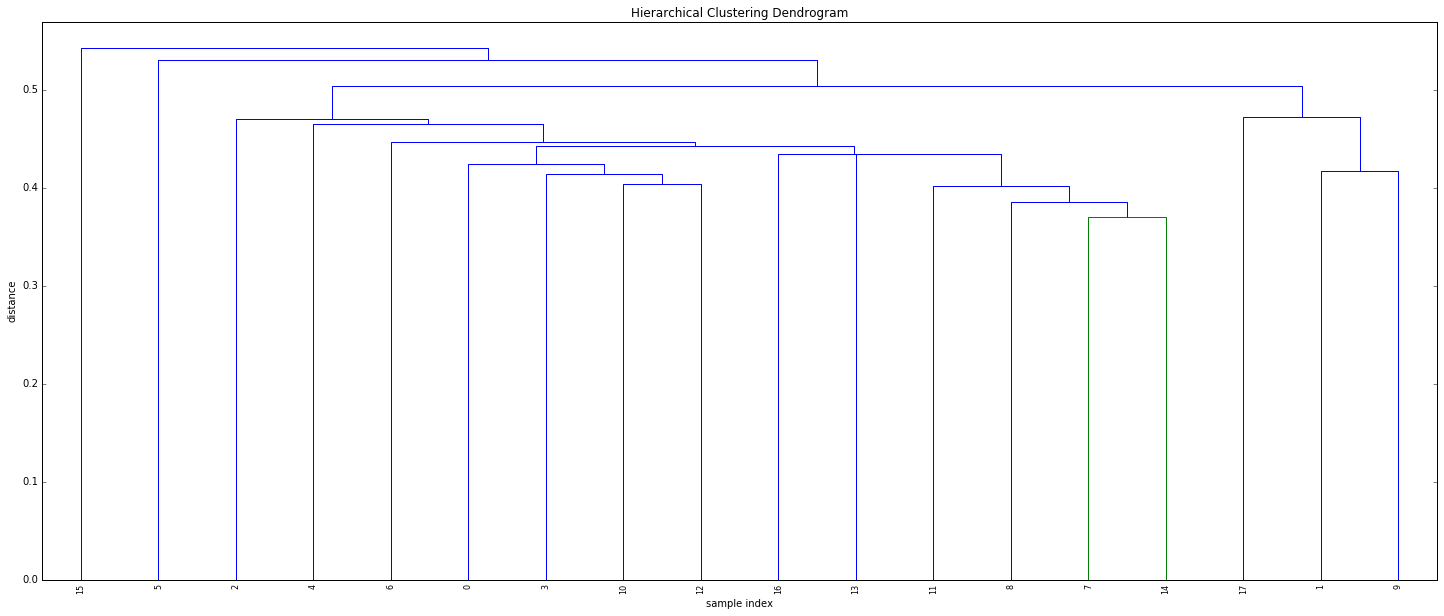

0: lowercase

1: sentence

2: symbol

3: punctuation

4: typography

5: sign

6: abbreviation

7: meaning

8: verb

9: letter

10: marker

11: phrase

12: hyphen

13: aspiration

14: root

15: example

16: interjection

17: quotation

(7, 100)


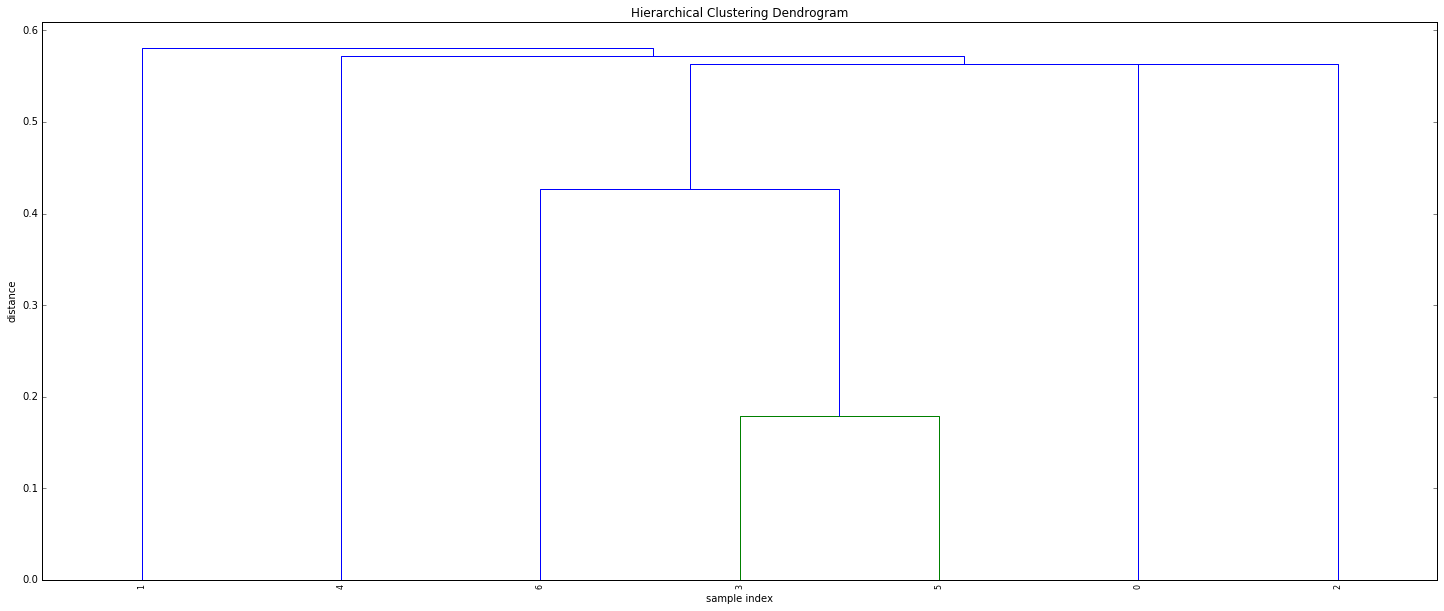

0: lowercase

1: polite

2: syntax

3: feminine

4: rune

5: masculine

6: indicative

(13, 100)


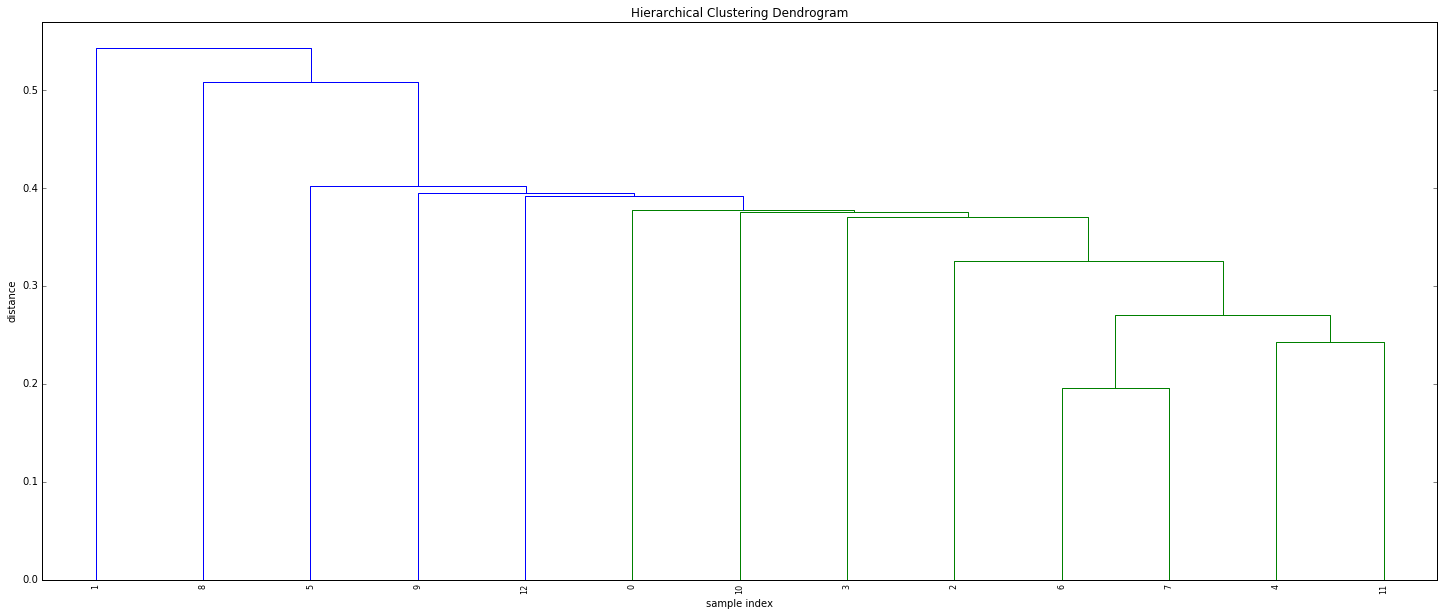

0: words

1: signs

2: phrases

3: sentences

4: vowels

5: symbols

6: adjectives

7: nouns

8: marks

9: combinations

10: genders

11: syllables

12: sounds

(6, 100)


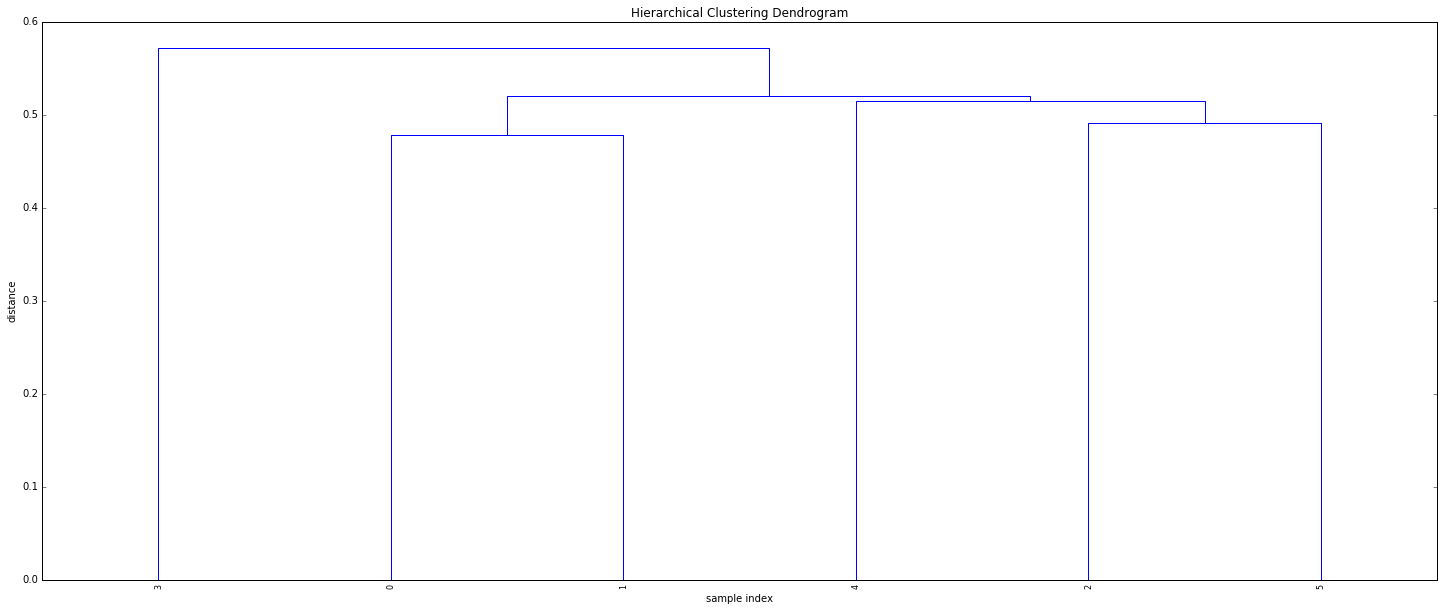

0: kidnapping

1: spying

2: hearing

3: warning

4: sentencing

5: questioning

(45, 100)


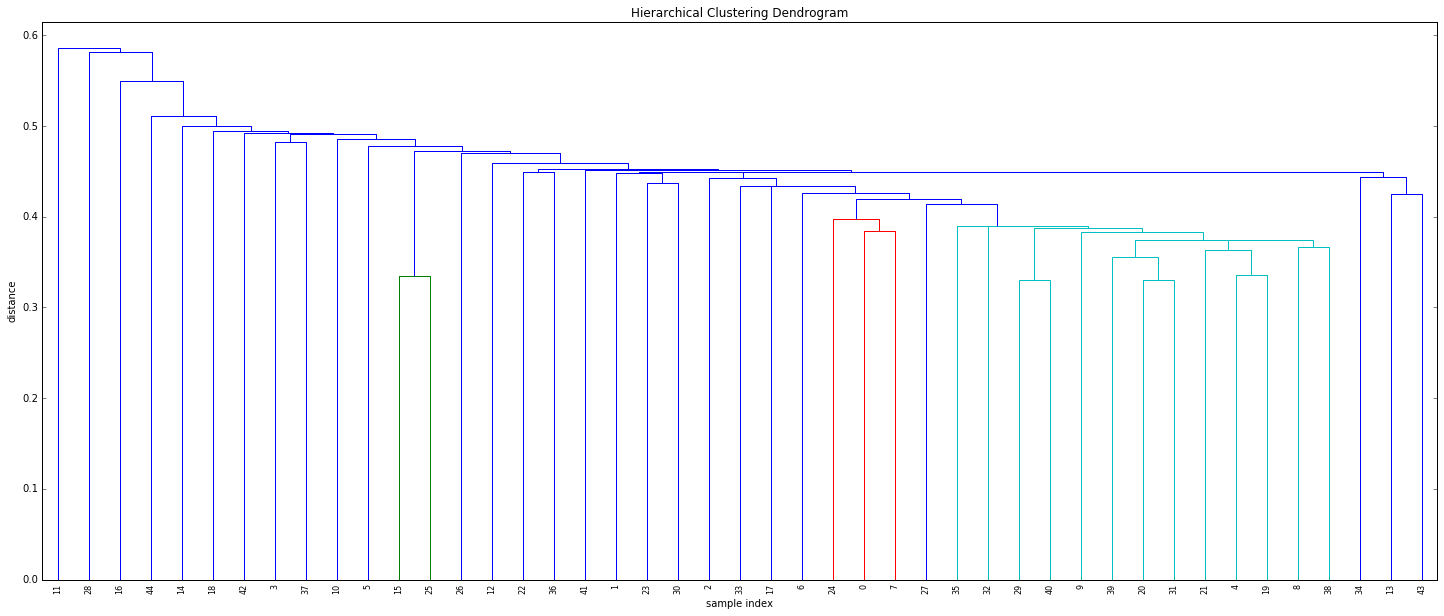

0: duty

1: theft

2: defense

3: disobedience

4: rape

5: police

6: decision

7: conduct

8: crime

9: arrest

10: charge

11: speech

12: vandalism

13: offence

14: outrage

15: jail

16: suit

17: refusal

18: possession

19: murder

20: jury

21: torture

22: permission

23: restraint

24: advice

25: prison

26: prohibition

27: insanity

28: reassurance

29: plea

30: secrecy

31: judge

32: execution

33: lawsuit

34: appeal

35: conviction

36: request

37: bargain

38: punishment

39: trial

40: verdict

41: robbery

42: action

43: oath

44: intrigue

(12, 100)


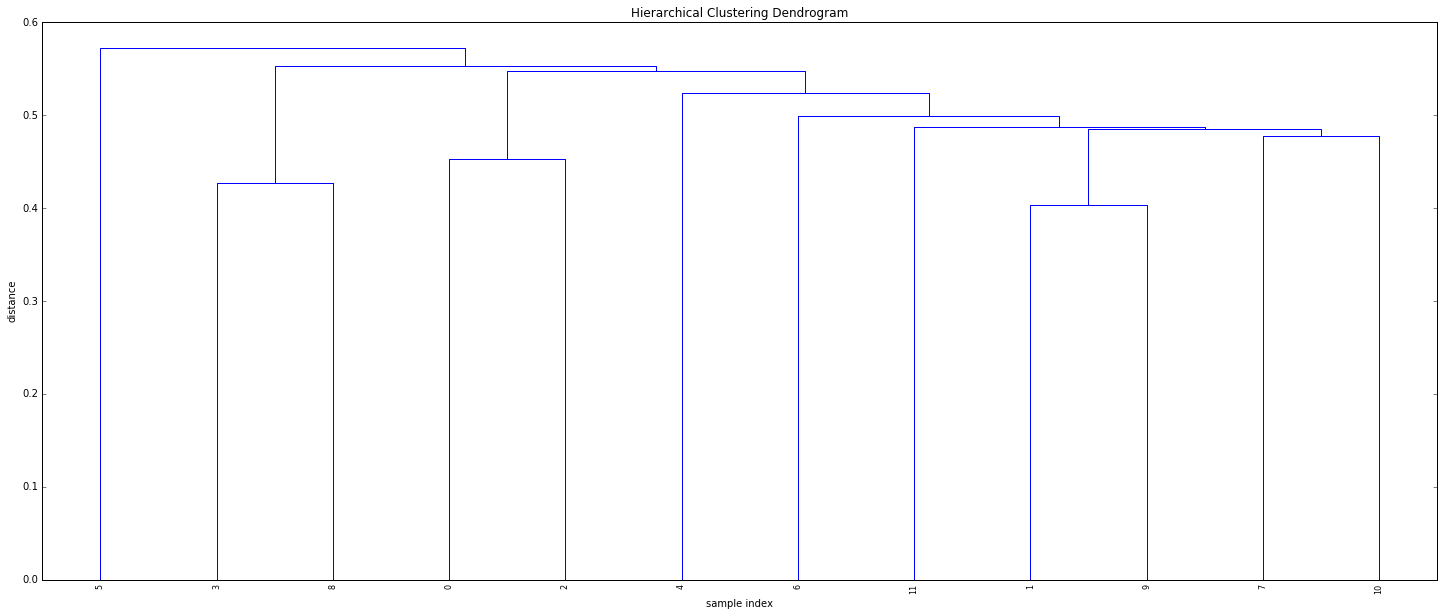

0: tyranny

1: denial

2: unjust

3: referee

4: guilty

5: secret

6: suicide

7: illegal

8: offense

9: abandonment

10: criminal

11: judgment

(4, 100)


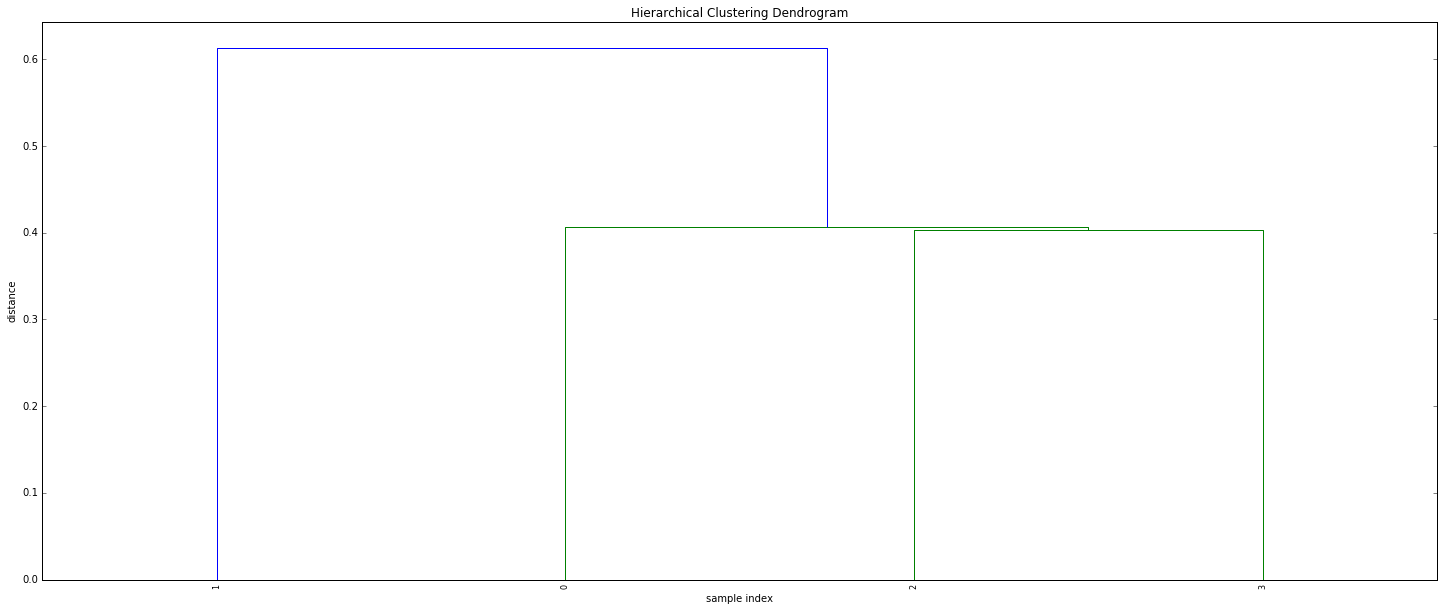

0: thinking

1: exploring

2: reasoning

3: understanding

(10, 100)


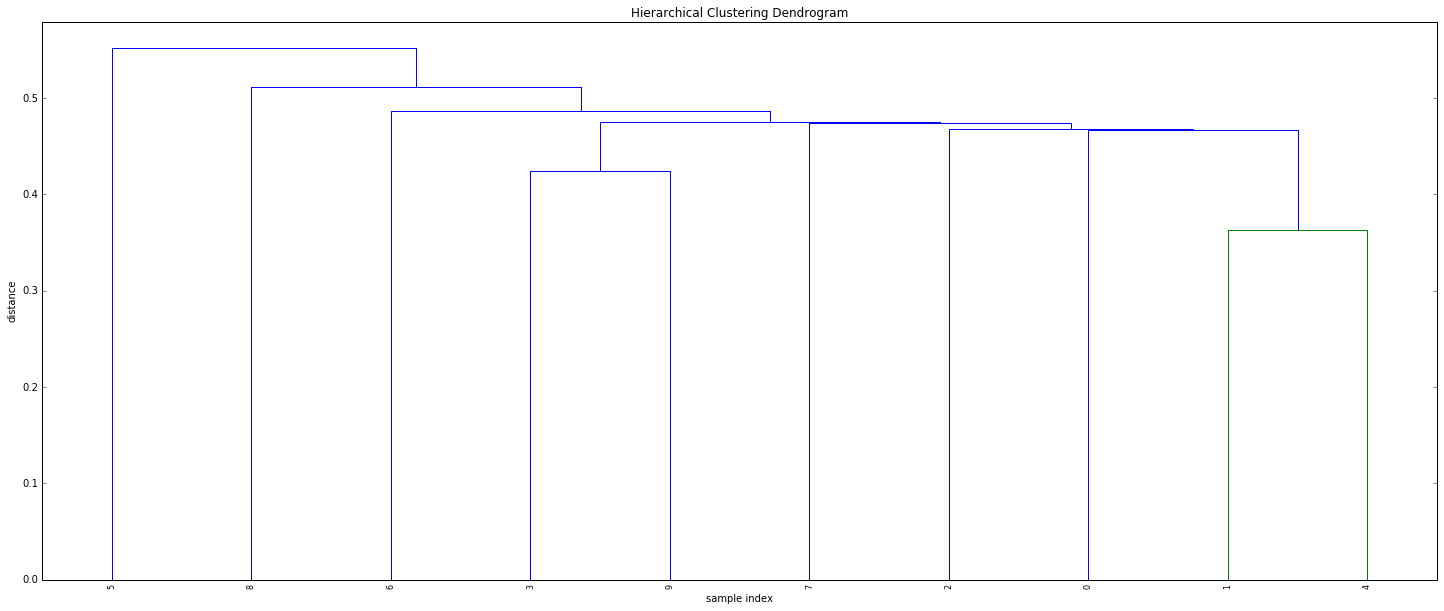

0: perspective

1: knowledge

2: argument

3: scholarly

4: understanding

5: experiment

6: critical

7: logic

8: lesson

9: scientific

(36, 100)


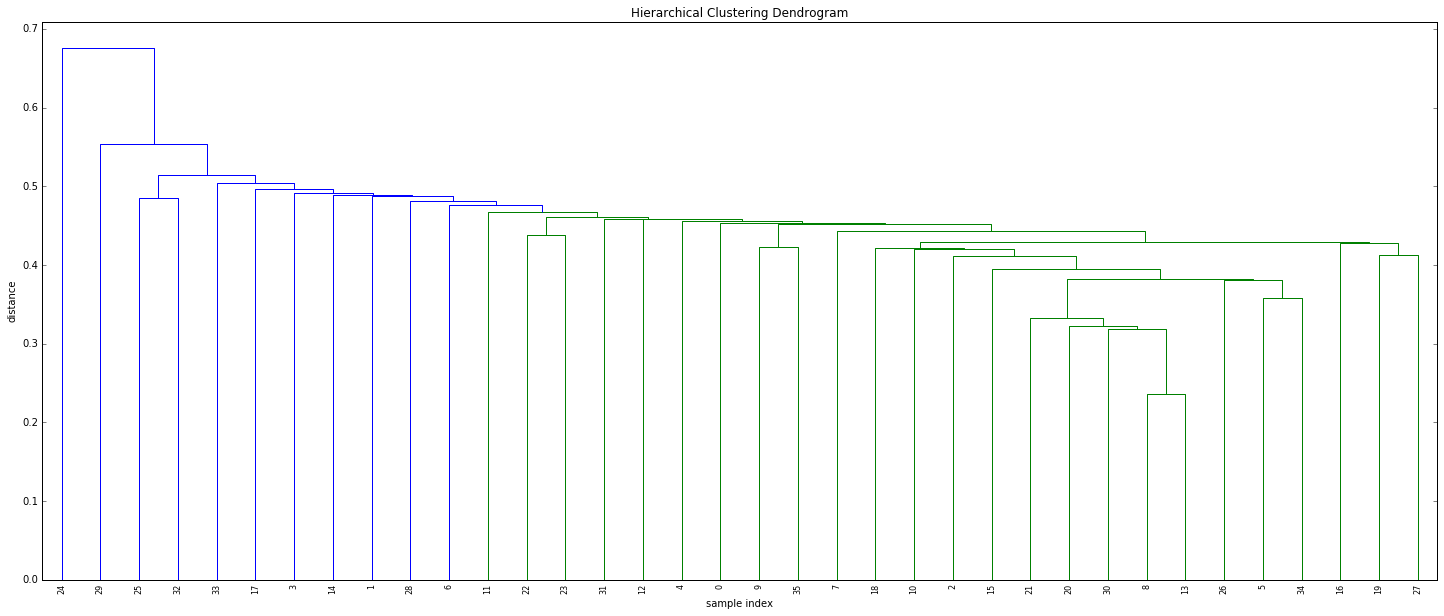

0: uncertainty

1: creation

2: mind

3: chaos

4: topic

5: imagination

6: invention

7: lesson

8: idealism

9: paradox

10: knowledge

11: introduction

12: detail

13: empiricism

14: examination

15: enlightenment

16: presentation

17: discovery

18: attribution

19: description

20: existentialism

21: philosophy

22: admiration

23: appreciation

24: bang

25: evolution

26: conception

27: outline

28: approach

29: work

30: atheism

31: extrapolation

32: universe

33: contribution

34: vision

35: proof

(4, 100)


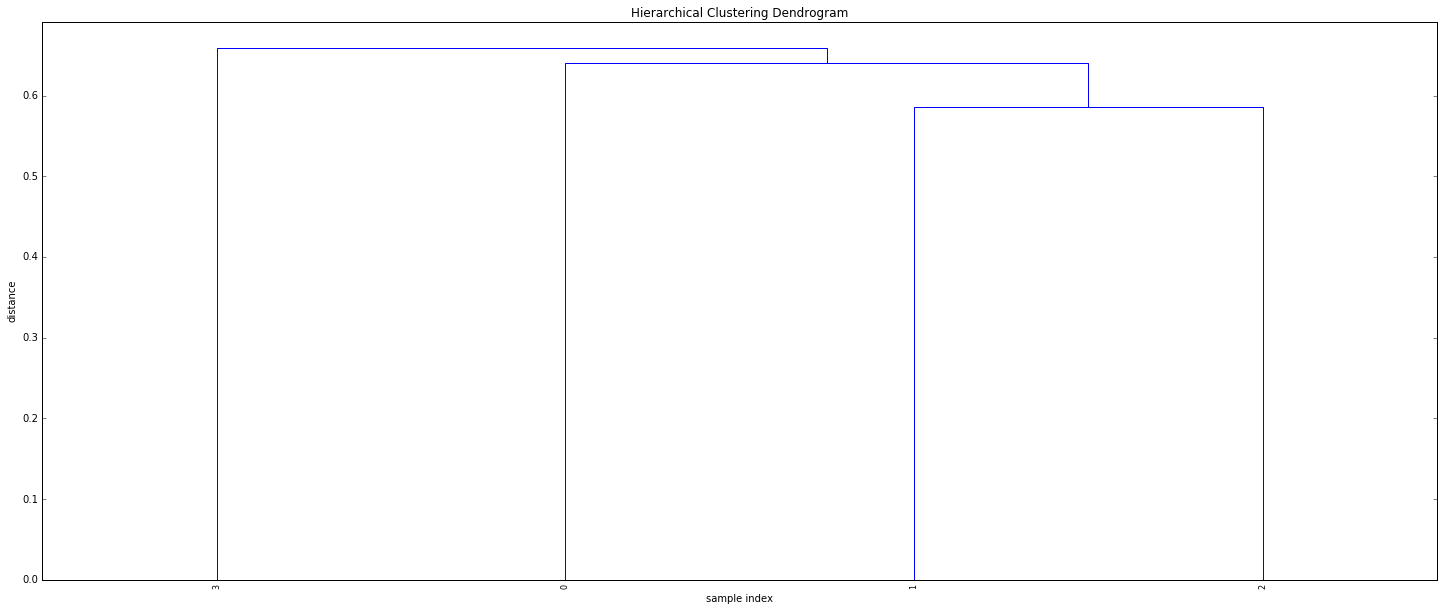

0: work

1: perspective

2: truth

3: malthus

(5, 100)


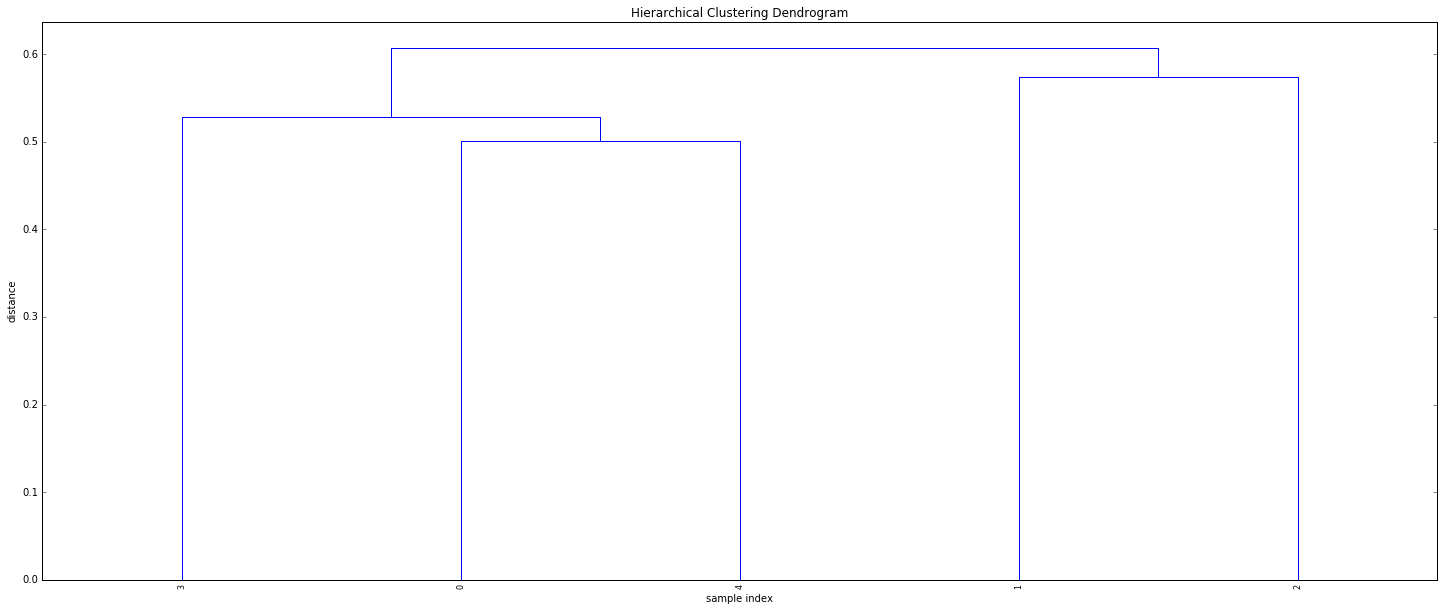

0: philosophers

1: researches

2: outlines

3: questions

4: ideas

(10, 100)


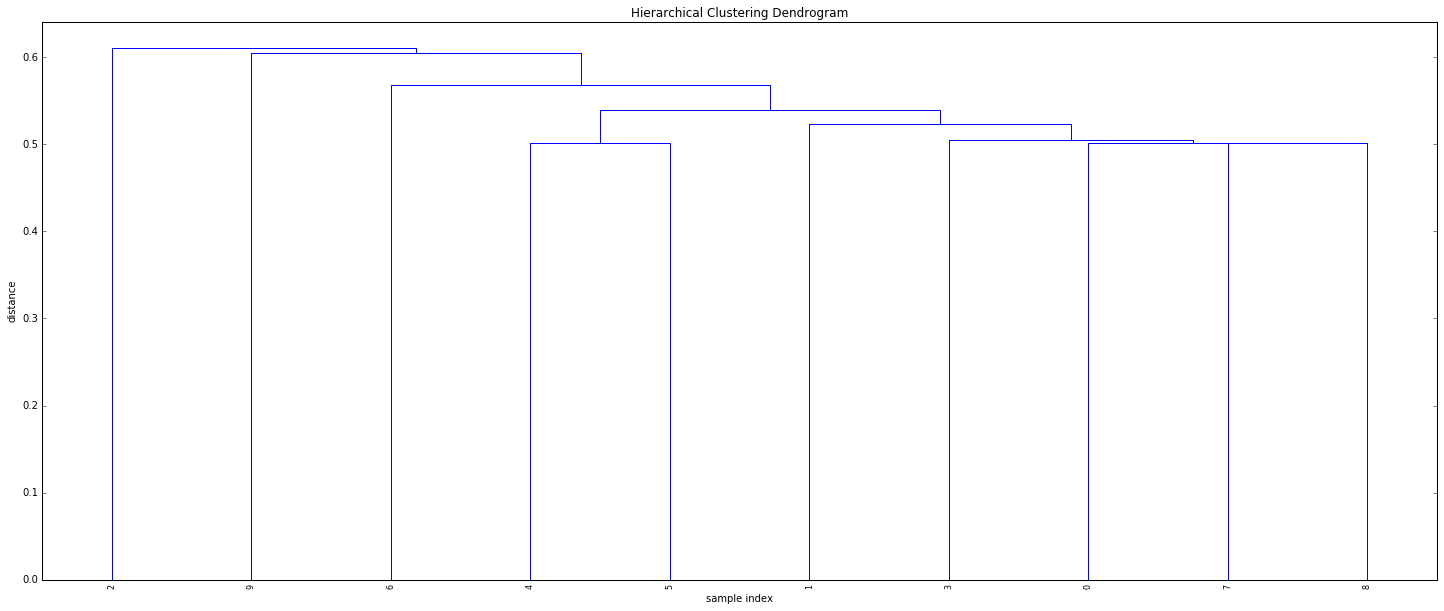

0: collecting

1: sharing

2: working

3: offering

4: clearing

5: shipping

6: balancing

7: advertising

8: designing

9: diving

(61, 100)


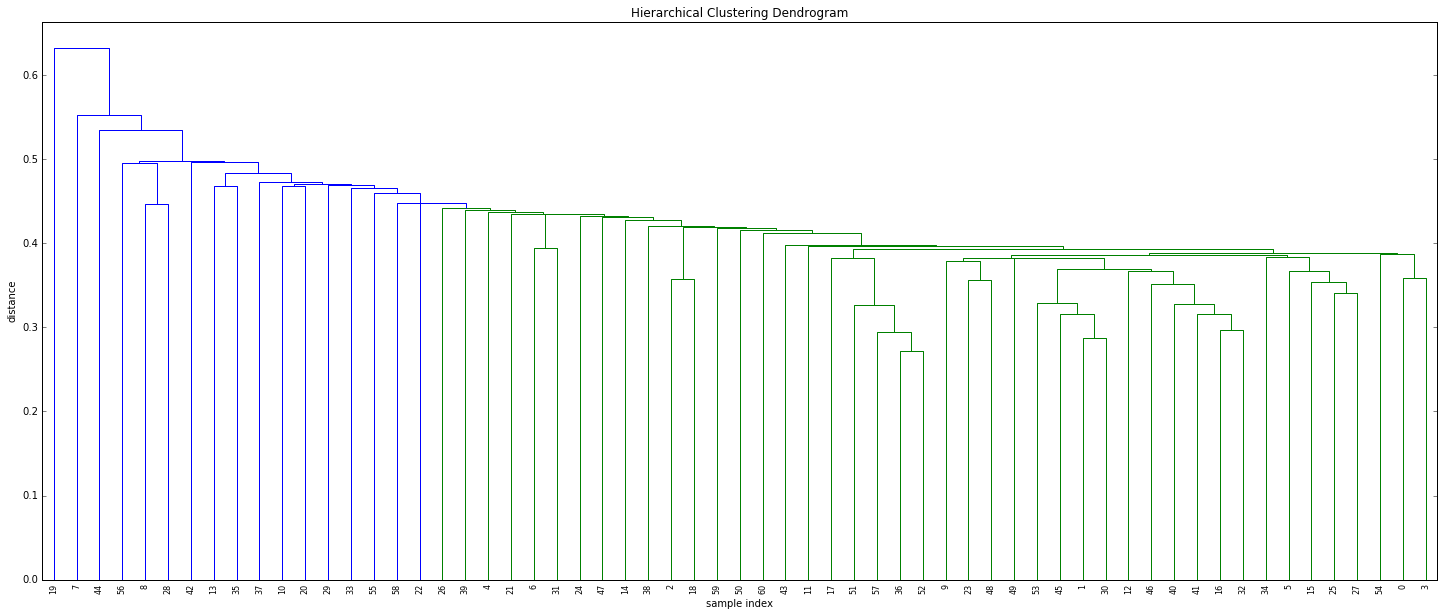

0: repair

1: irrigation

2: bicycle

3: motor

4: barter

5: supply

6: communication

7: gathering

8: preservation

9: packaging

10: performance

11: planning

12: freight

13: protecting

14: technology

15: coordination

16: transport

17: utility

18: cycling

19: working

20: quality

21: guidance

22: environment

23: equipment

24: production

25: safety

26: luxury

27: maintenance

28: conservation

29: development

30: mining

31: sharing

32: transportation

33: inefficient

34: emergency

35: shelter

36: marketing

37: company

38: leisure

39: conglomerate

40: traffic

41: navigation

42: gambling

43: productivity

44: hedge

45: manufacturing

46: tourism

47: buying

48: delivery

49: commerce

50: transaction

51: commodity

52: consumer

53: industry

54: appliance

55: preparation

56: exploration

57: advertising

58: fitness

59: inspection

60: housing

(8, 100)


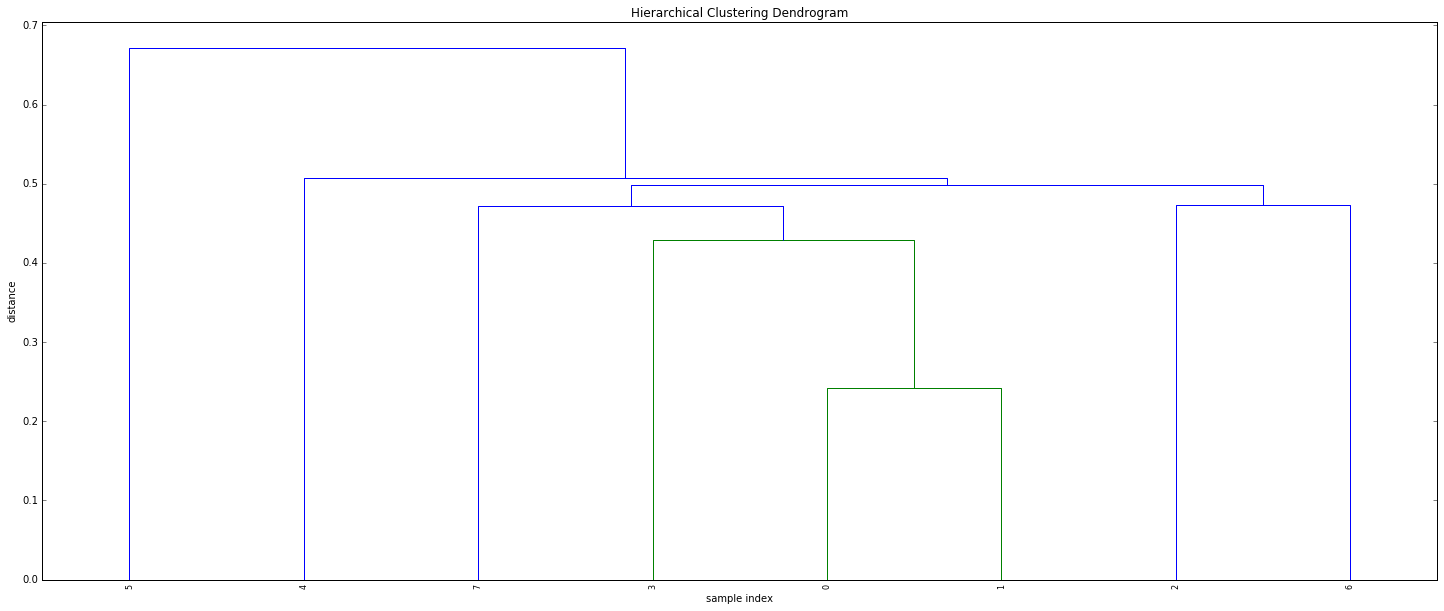

0: industrial

1: agricultural

2: cheap

3: domestic

4: outdoor

5: ambitious

6: excellent

7: sanitary

(4, 100)


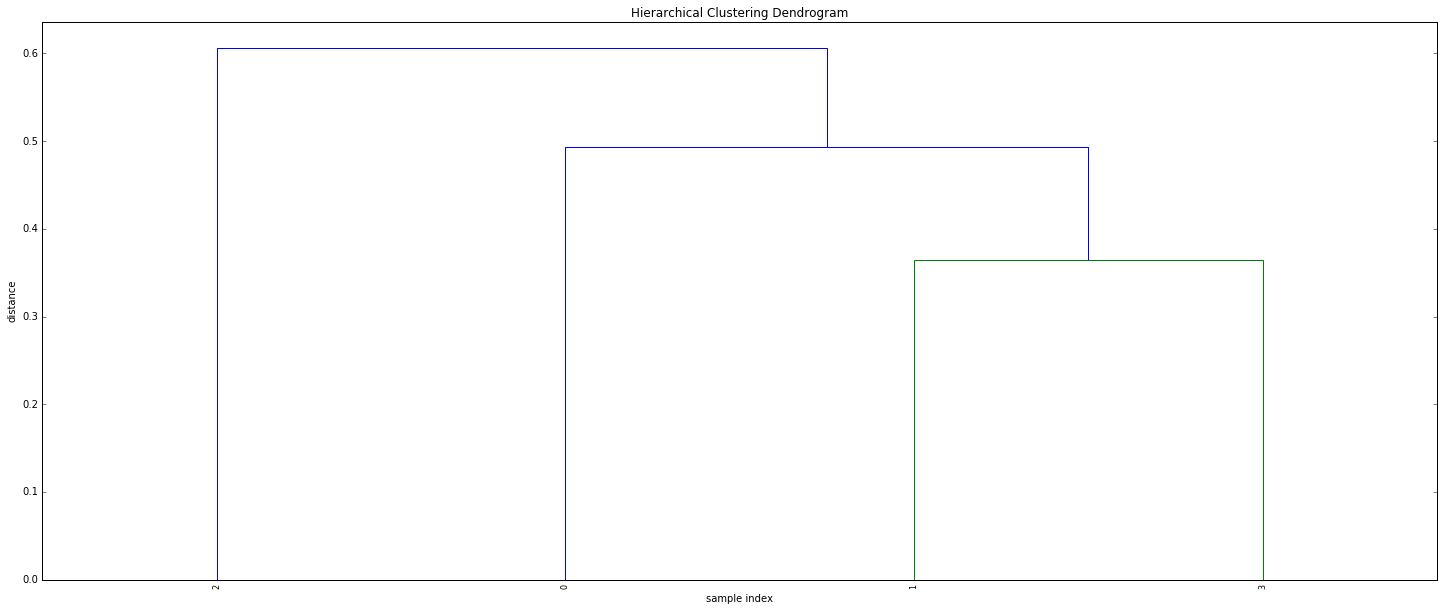

0: repairs

1: goods

2: cyclists

3: supplies

(6, 100)


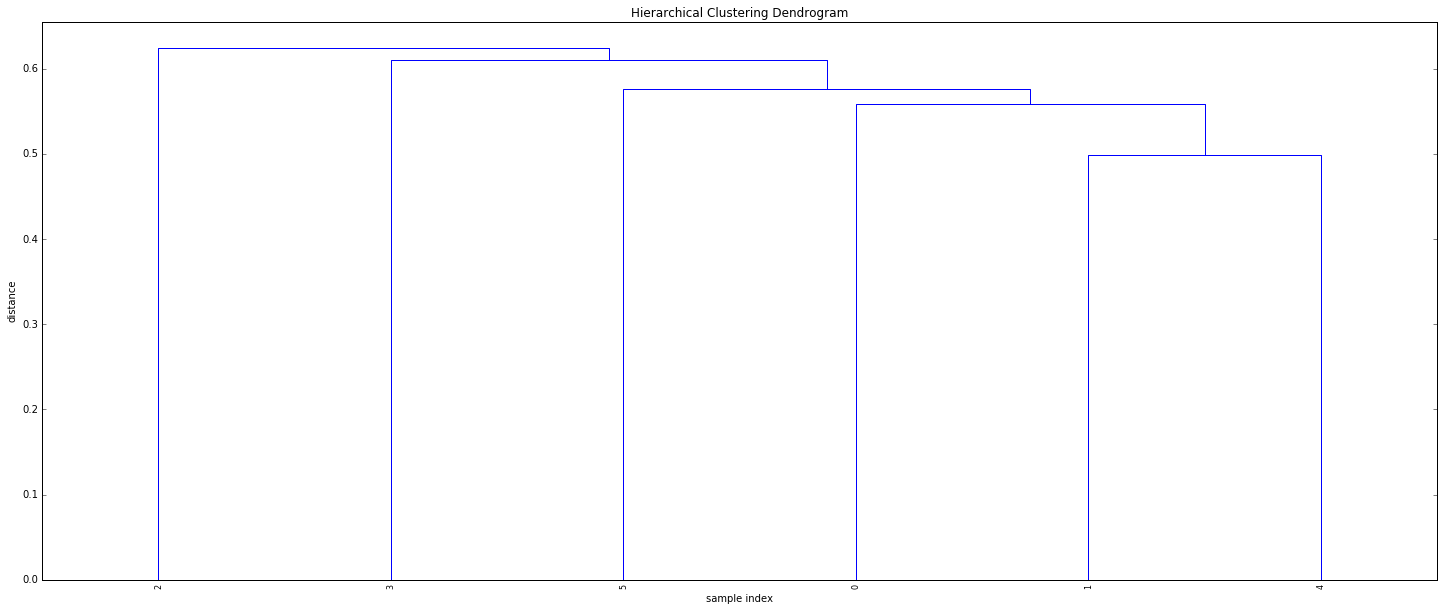

0: gaining

1: alarming

2: leading

3: growing

4: overwhelming

5: warming

(18, 100)


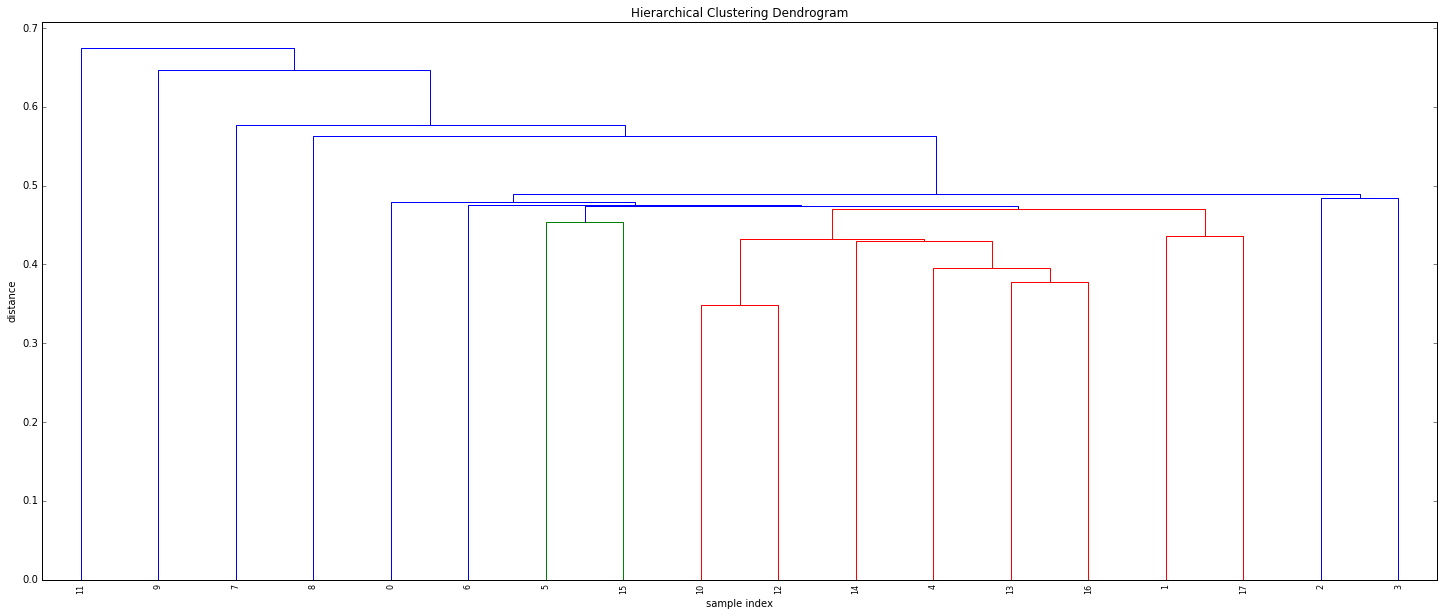

0: poor

1: heavy

2: enormous

3: uneven

4: harsh

5: huge

6: panic

7: global

8: overall

9: precarious

10: severe

11: future

12: serious

13: aggressive

14: extreme

15: substantial

16: intense

17: slow

(33, 100)


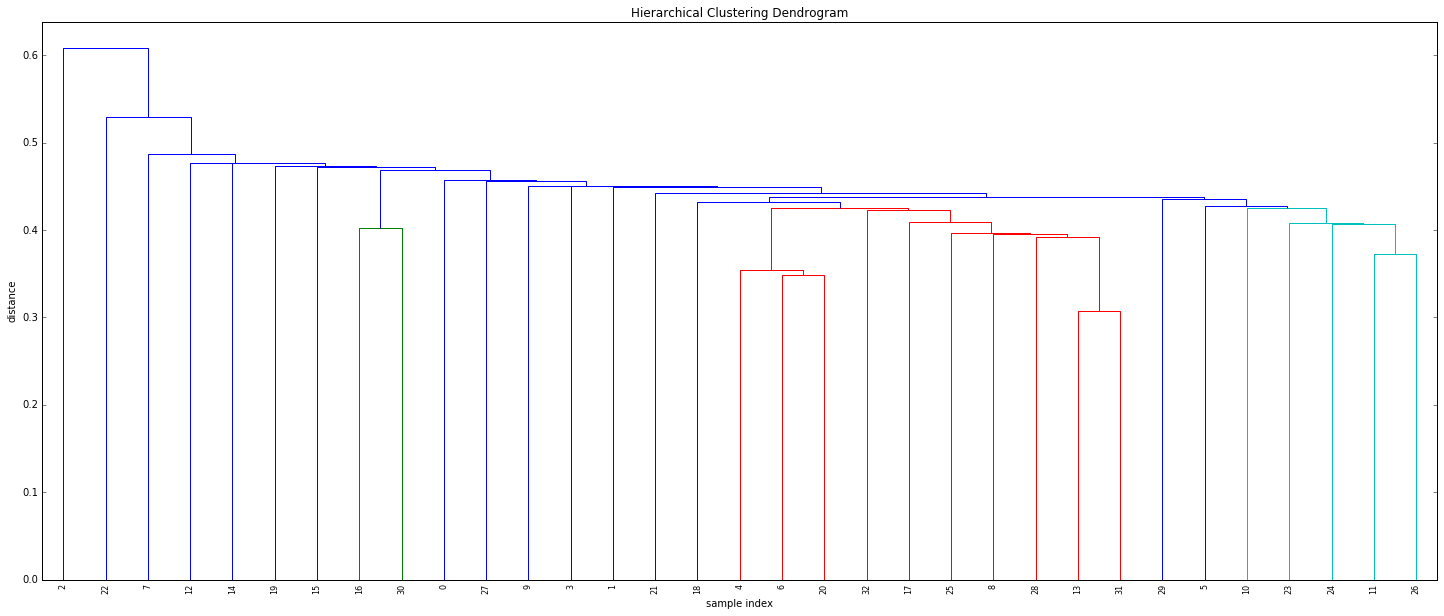

0: disaster

1: weather

2: result

3: cold

4: crisis

5: depression

6: collapse

7: impact

8: devastation

9: slow

10: recovery

11: damage

12: improvement

13: urbanization

14: boost

15: dominance

16: tension

17: hardship

18: prosperity

19: survival

20: rise

21: failure

22: response

23: loss

24: panic

25: illiteracy

26: shock

27: isolation

28: growth

29: activity

30: balance

31: industrialization

32: pollution

(36, 100)


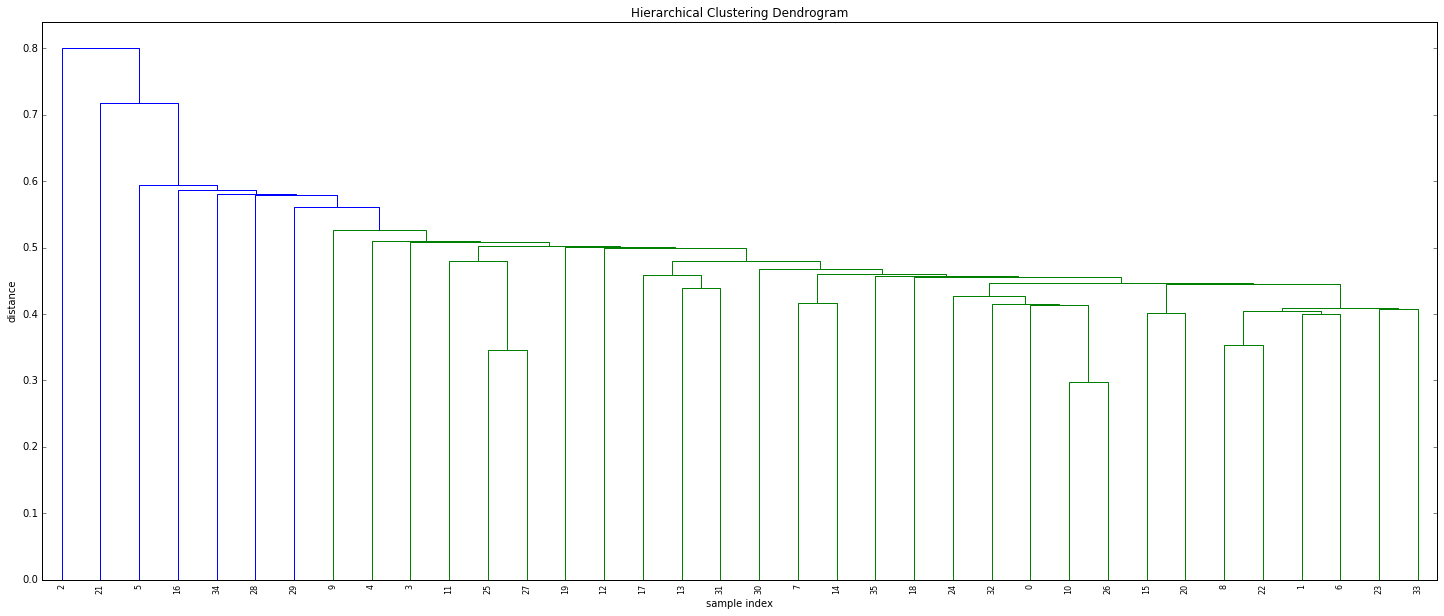

0: commonwealth

1: charter

2: tender

3: settlement

4: defence

5: group

6: constitution

7: union

8: proclamation

9: peace

10: sovereign

11: state

12: ireland

13: party

14: confederacy

15: status

16: umbrella

17: government

18: agreement

19: immigration

20: membership

21: part

22: declaration

23: emancipation

24: nationality

25: nation

26: monarch

27: country

28: official

29: flag

30: rule

31: leadership

32: dominion

33: abolition

34: anthem

35: organization

(3, 100)


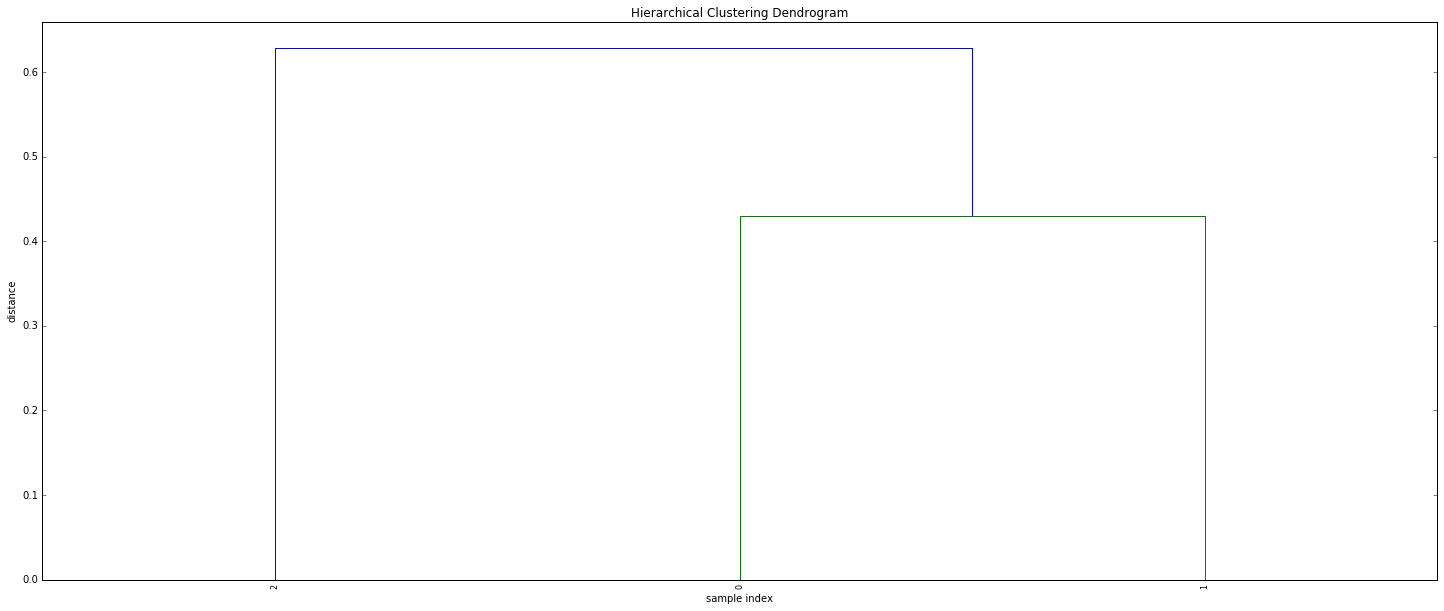

0: monarch

1: monarchy

2: united

(9, 100)


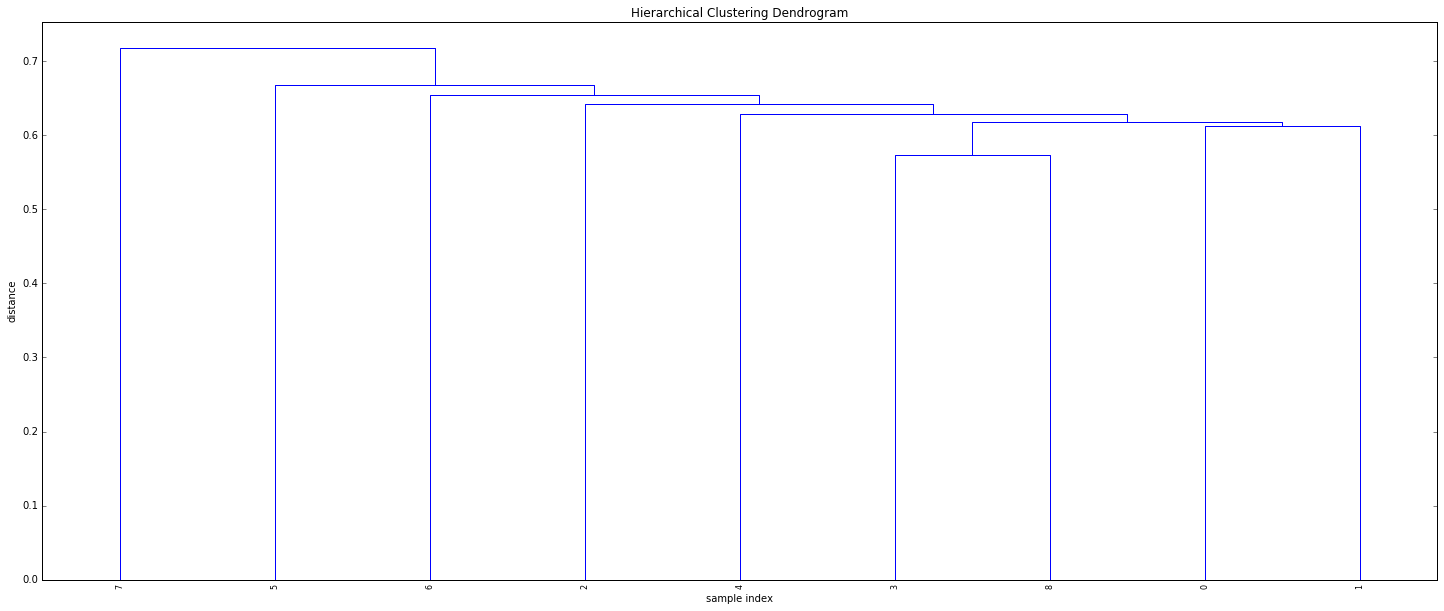

0: independent

1: united

2: umbrella

3: national

4: constitutional

5: british

6: flag

7: u

8: european

(4, 100)


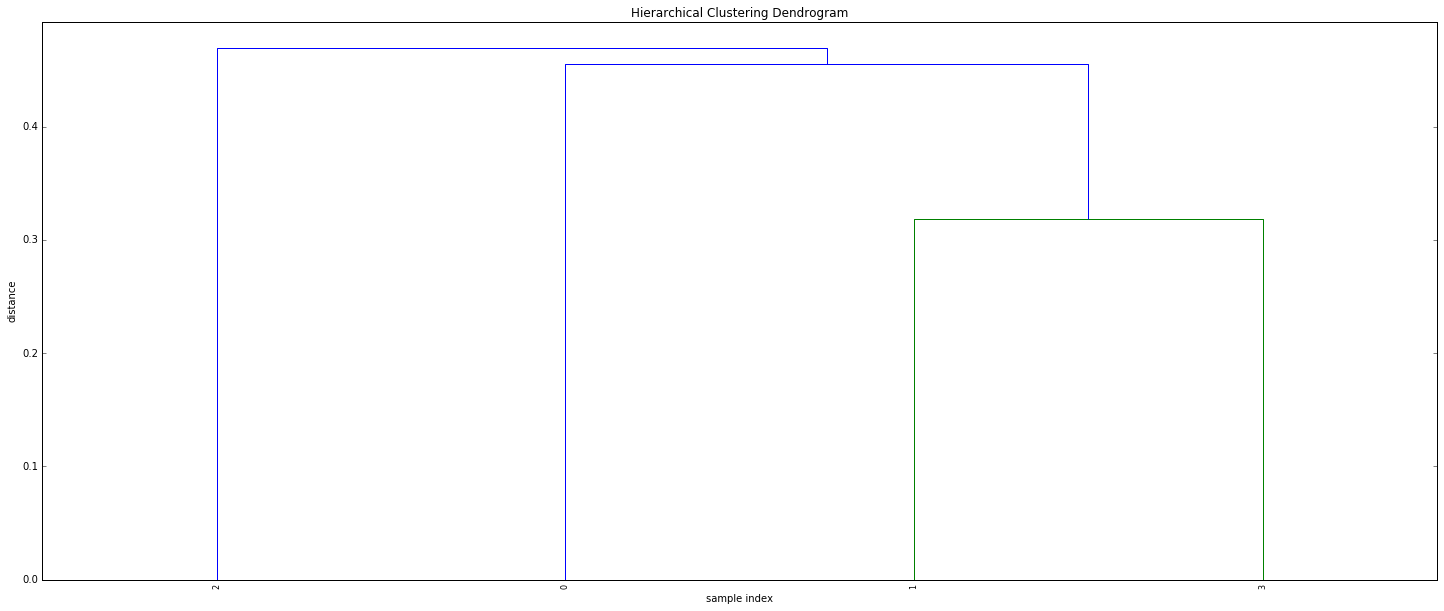

0: states

1: countries

2: parties

3: nations

(22, 100)


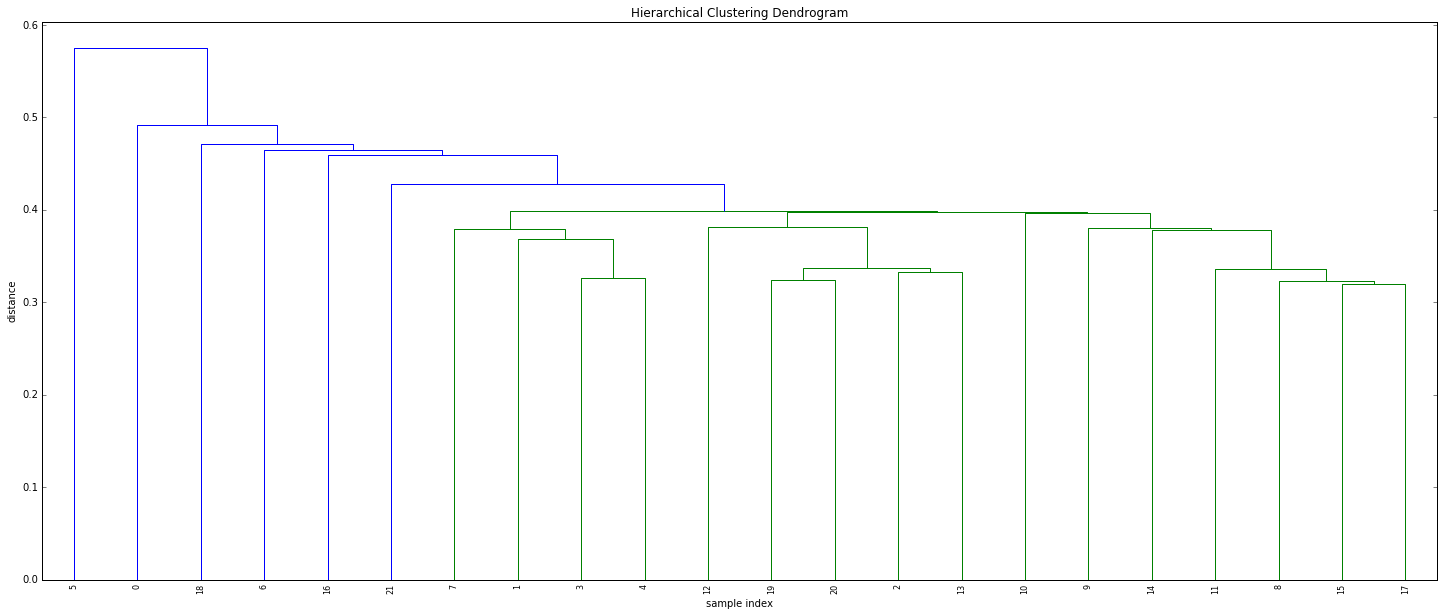

0: lightbulb

1: colon

2: log

3: hom

4: vee

5: fraternity

6: blackboard

7: dim

8: e

9: g

10: f

11: h

12: k

13: q

14: p

15: r

16: t

17: w

18: v

19: y

20: z

21: hello

(3, 100)


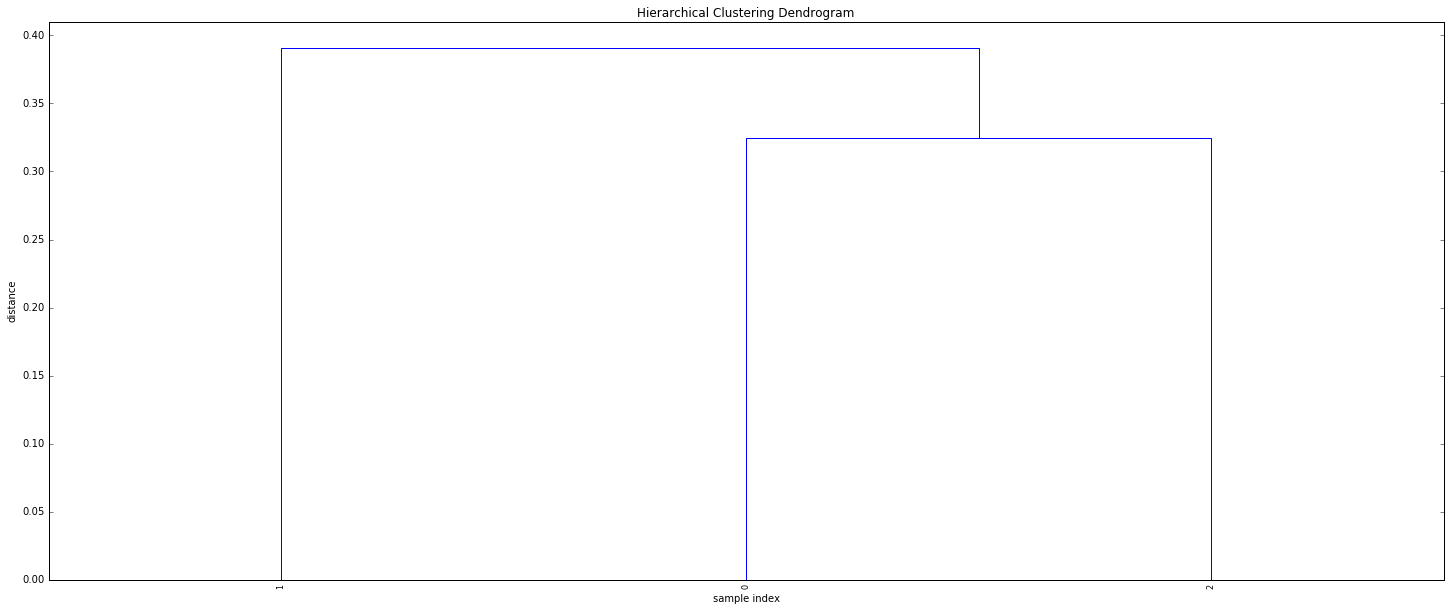

0: y

1: x

2: z

(3, 100)


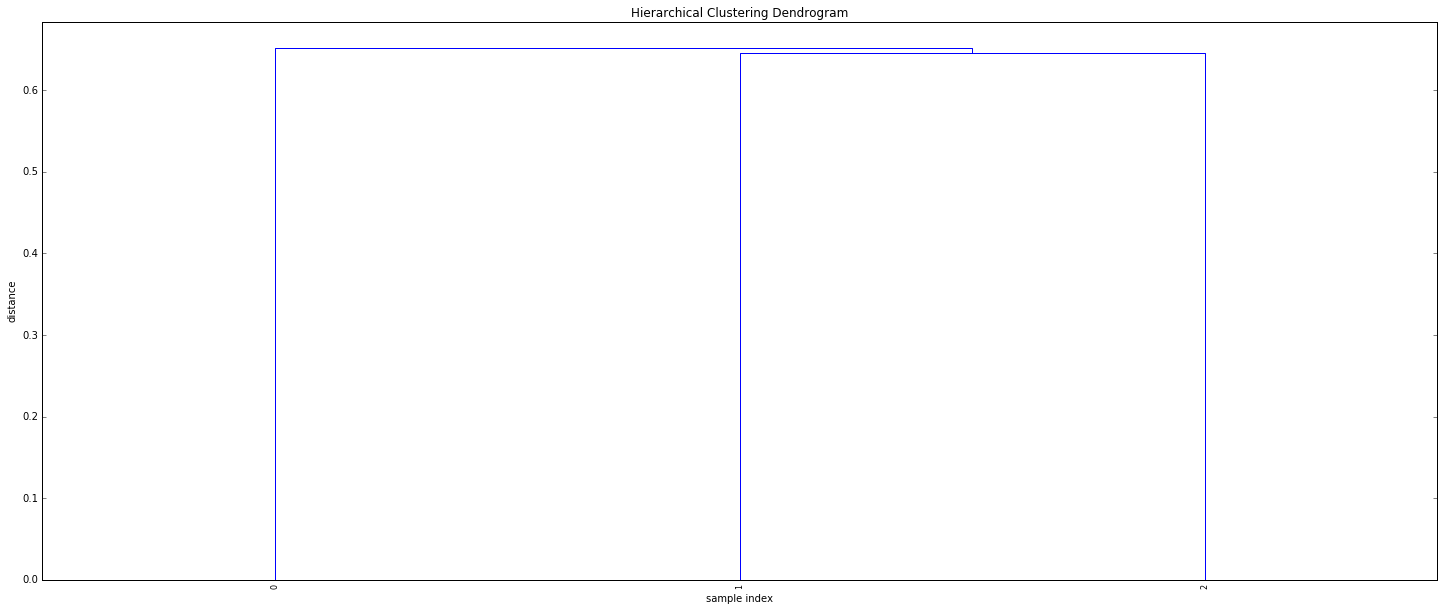

0: contra

1: un

2: international

(7, 100)


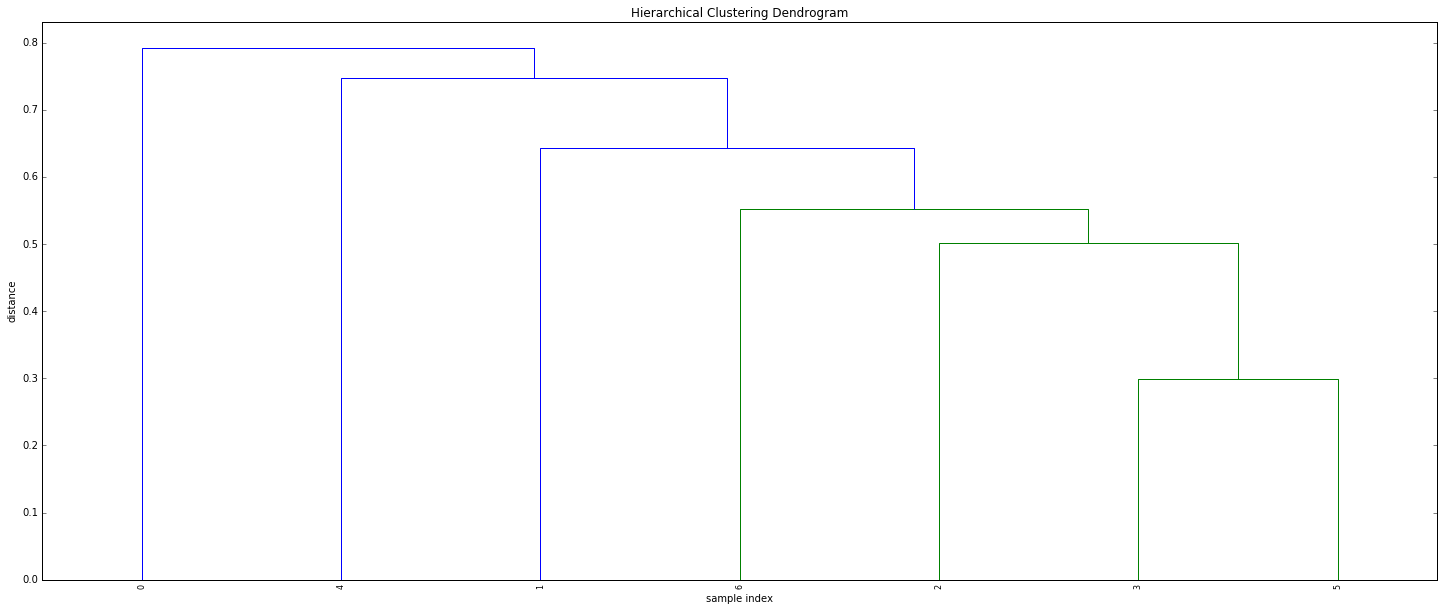

0: co

1: laden

2: intelligence

3: agency

4: parenthood

5: bureau

6: watchdog

(3, 100)


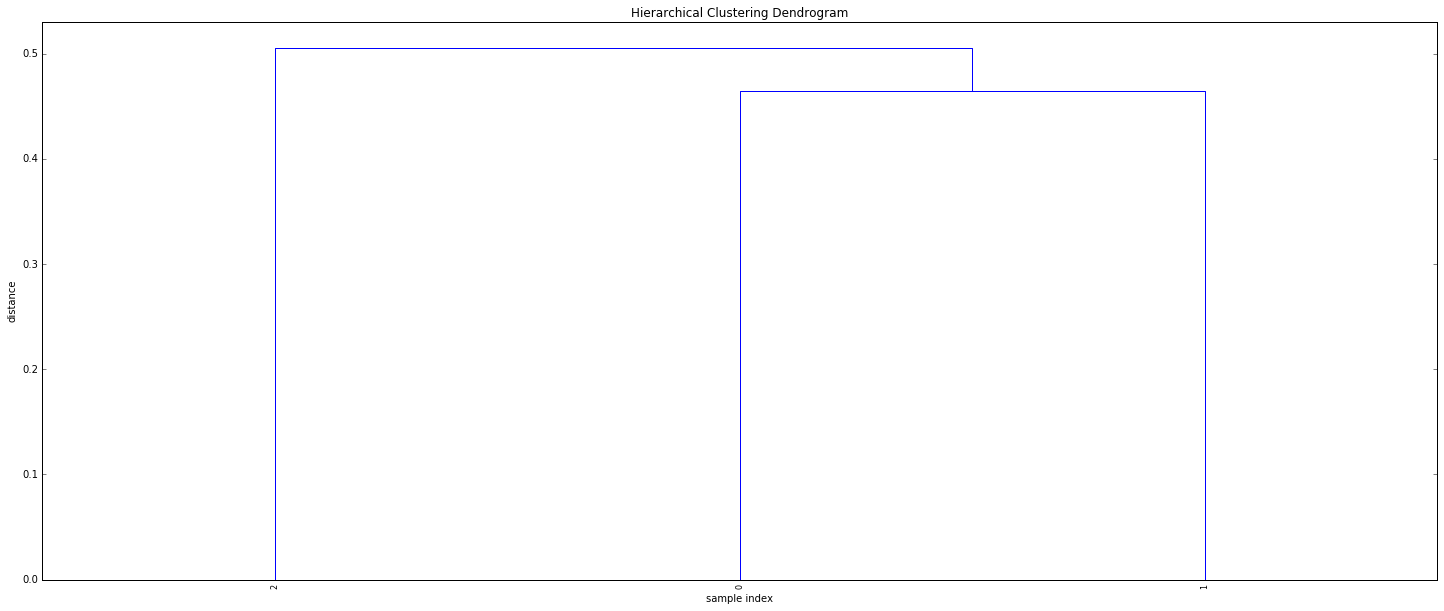

0: apparel

1: bake

2: oxen

(7, 100)


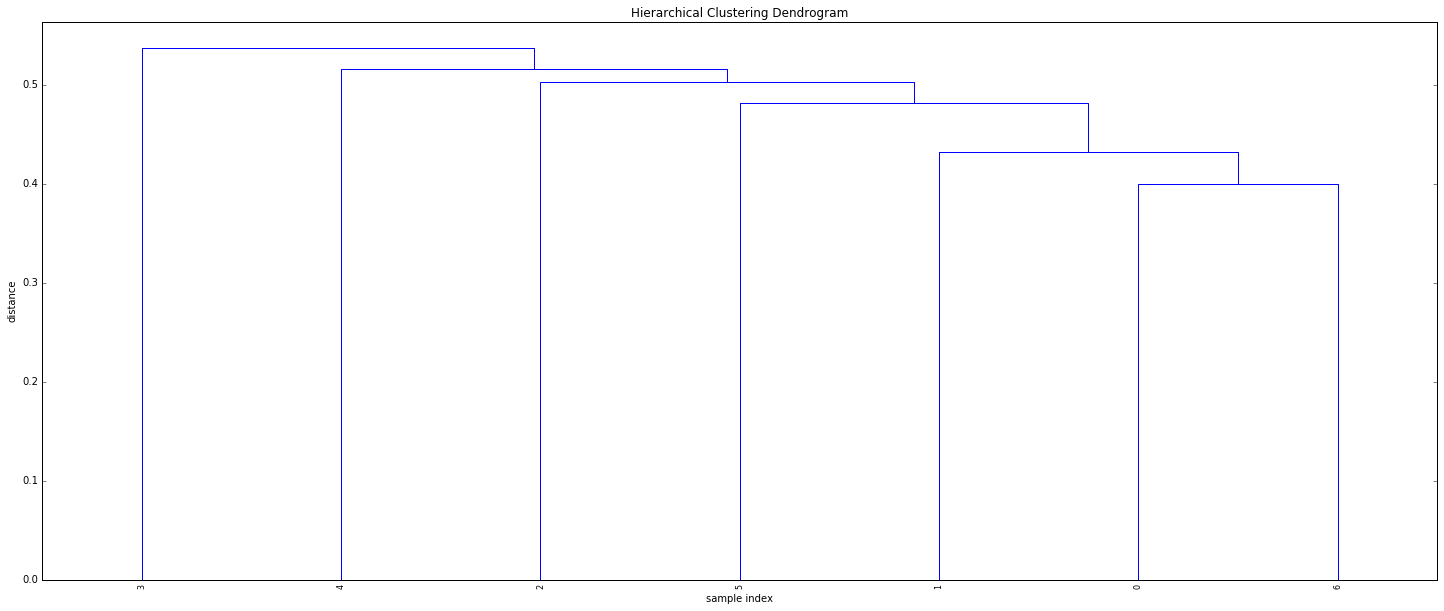

0: humps

1: carp

2: sparkle

3: decorate

4: juggle

5: hoops

6: planks

(10, 100)


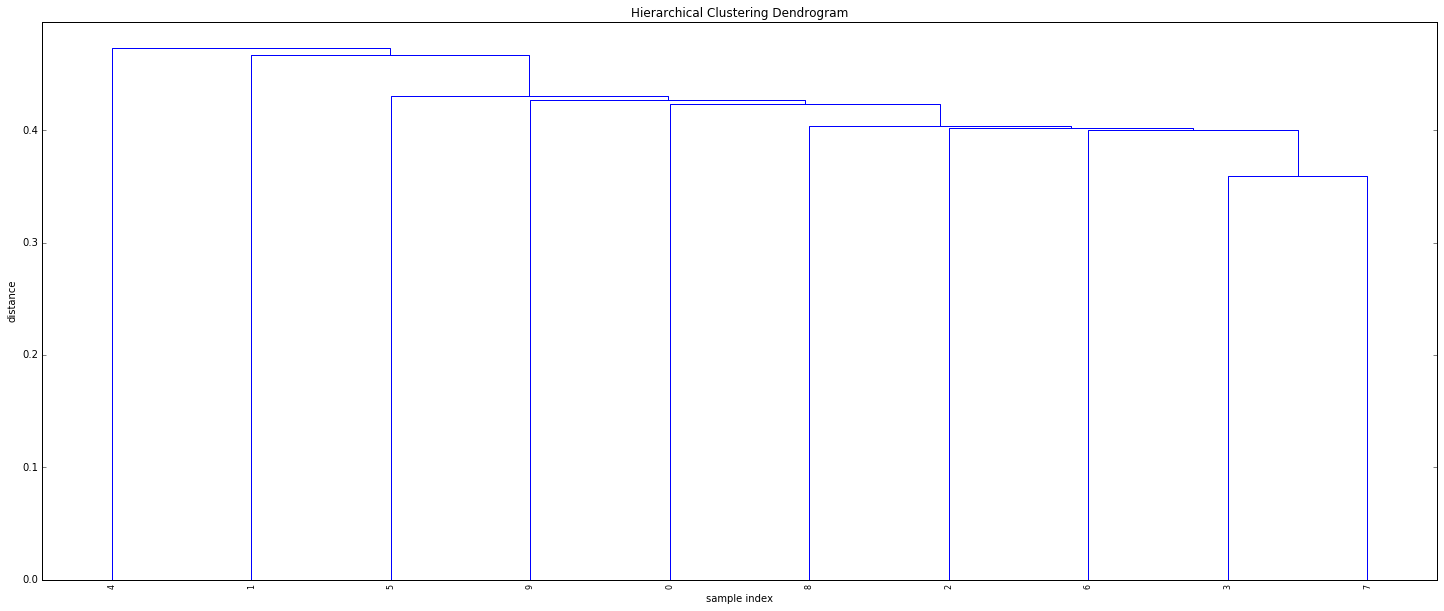

0: lightness

1: synonyms

2: frightful

3: utensils

4: delightful

5: lanterns

6: zebu

7: stylish

8: venomous

9: kangaroos

(33, 100)


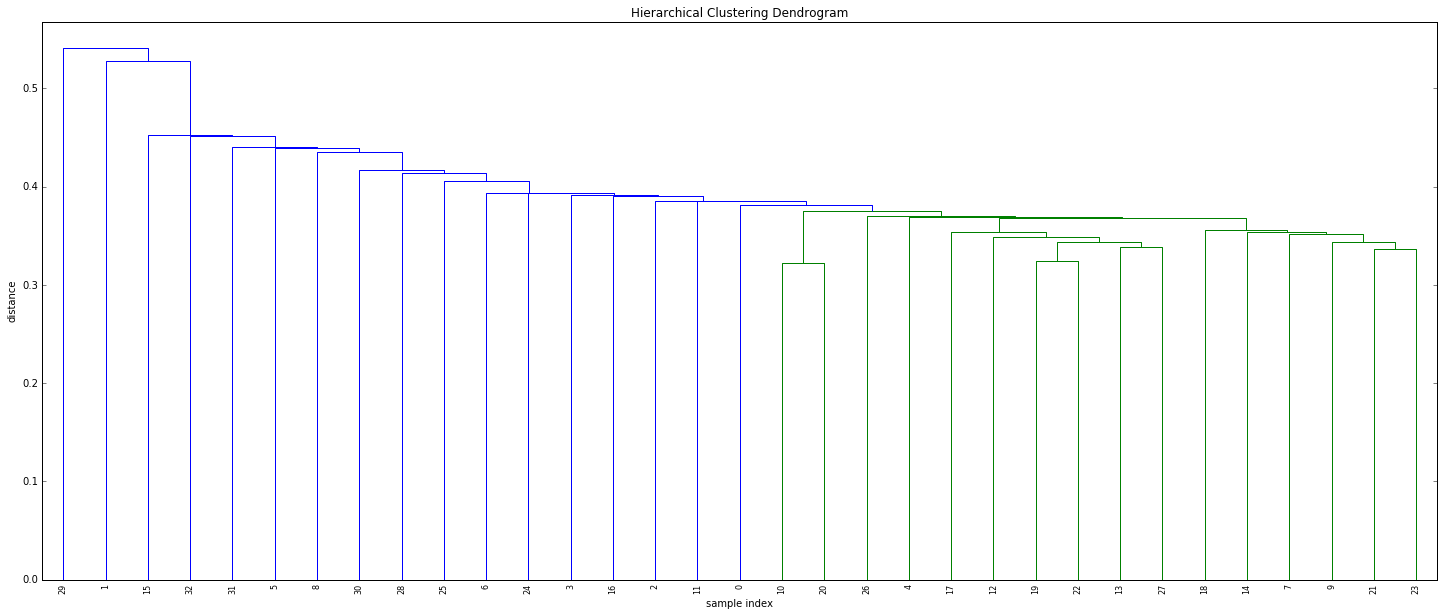

0: eyebrows

1: guts

2: rabbits

3: urns

4: jewels

5: chores

6: capes

7: goblins

8: runes

9: mites

10: felines

11: greyhounds

12: earrings

13: gills

14: acrobatics

15: savages

16: kittens

17: ponies

18: carvings

19: beards

20: primates

21: squirrels

22: noses

23: condiments

24: drummers

25: boulders

26: corpses

27: tentacles

28: pockets

29: banners

30: potions

31: gladiators

32: pairings

(8, 100)


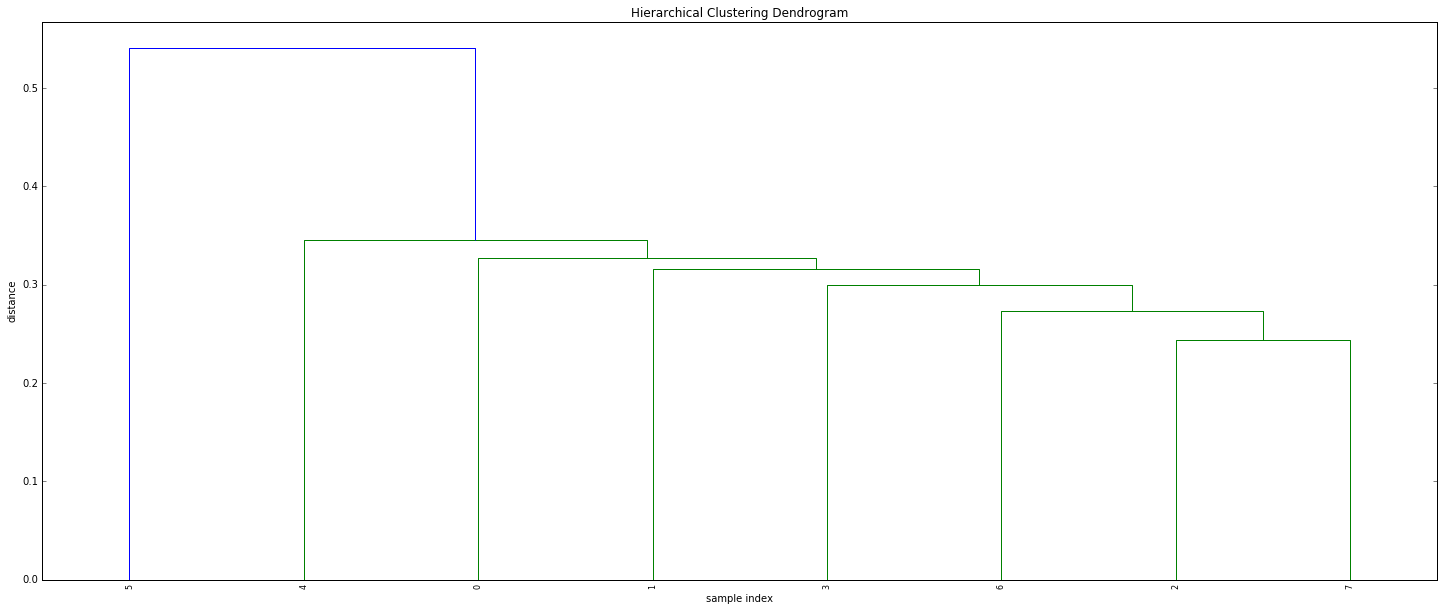

0: shall

1: may

2: should

3: will

4: can

5: need

6: might

7: must

(6, 100)


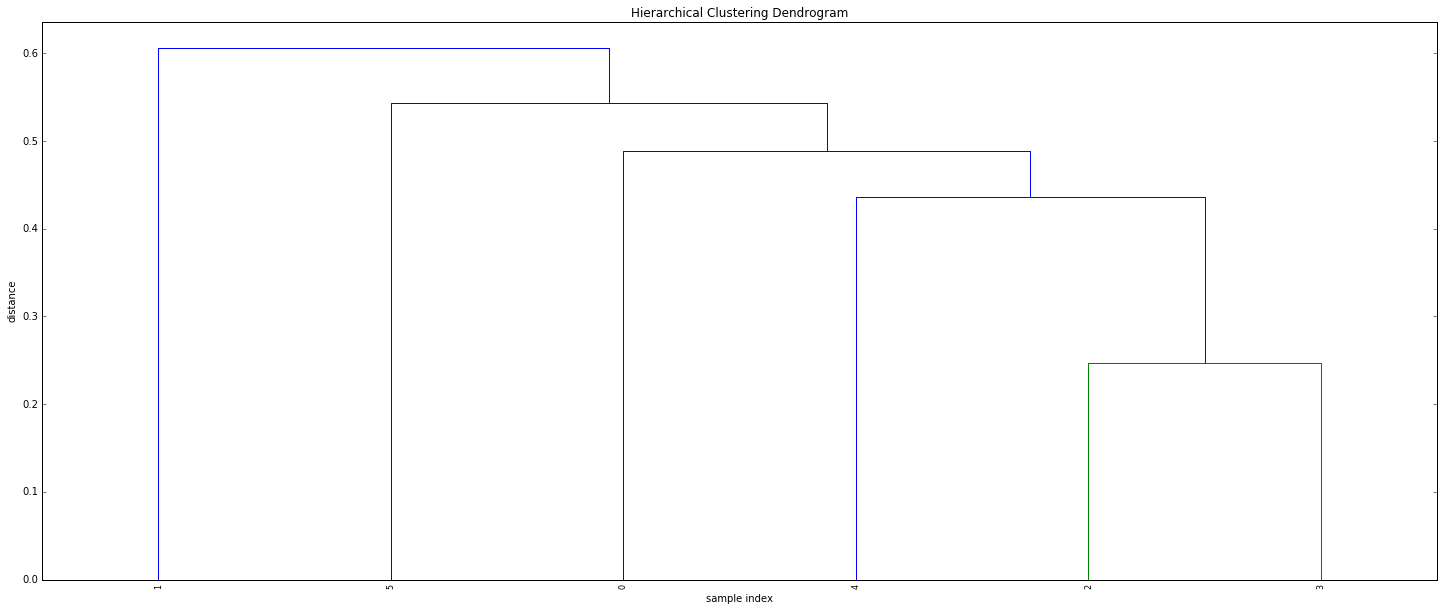

0: do

1: attempt

2: wish

3: want

4: need

5: impossible

(4, 100)


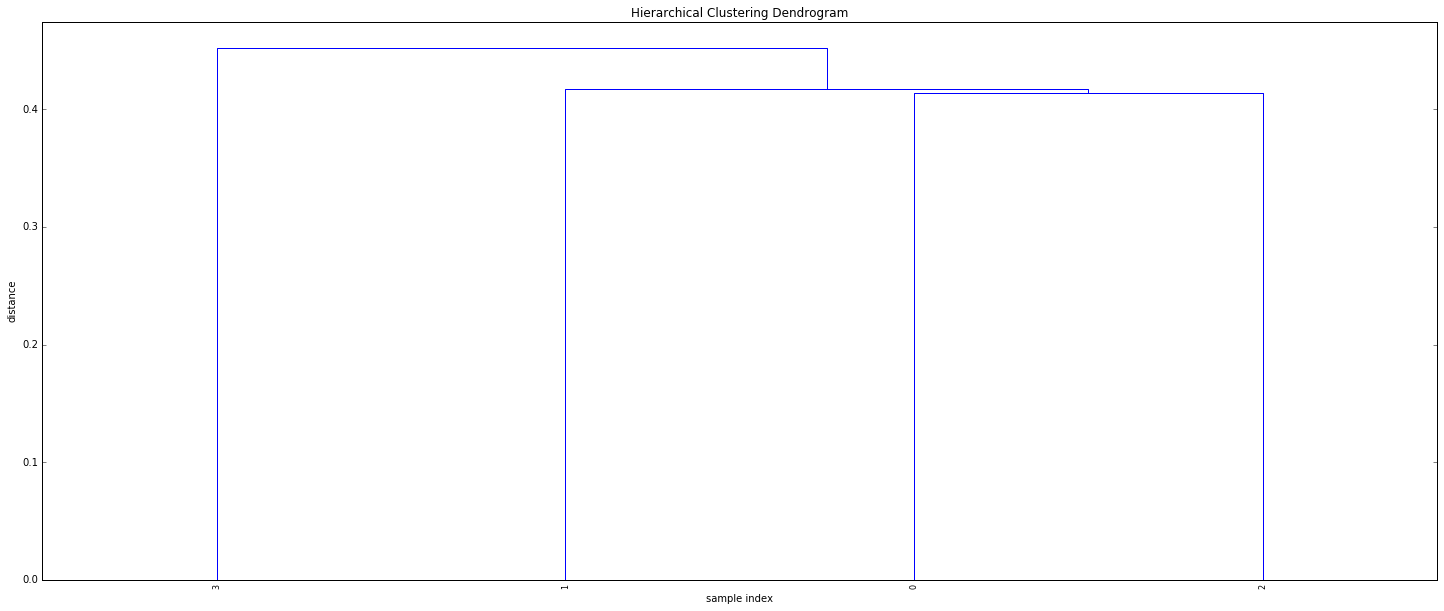

0: helping

1: trying

2: failing

3: wishing

(5, 100)


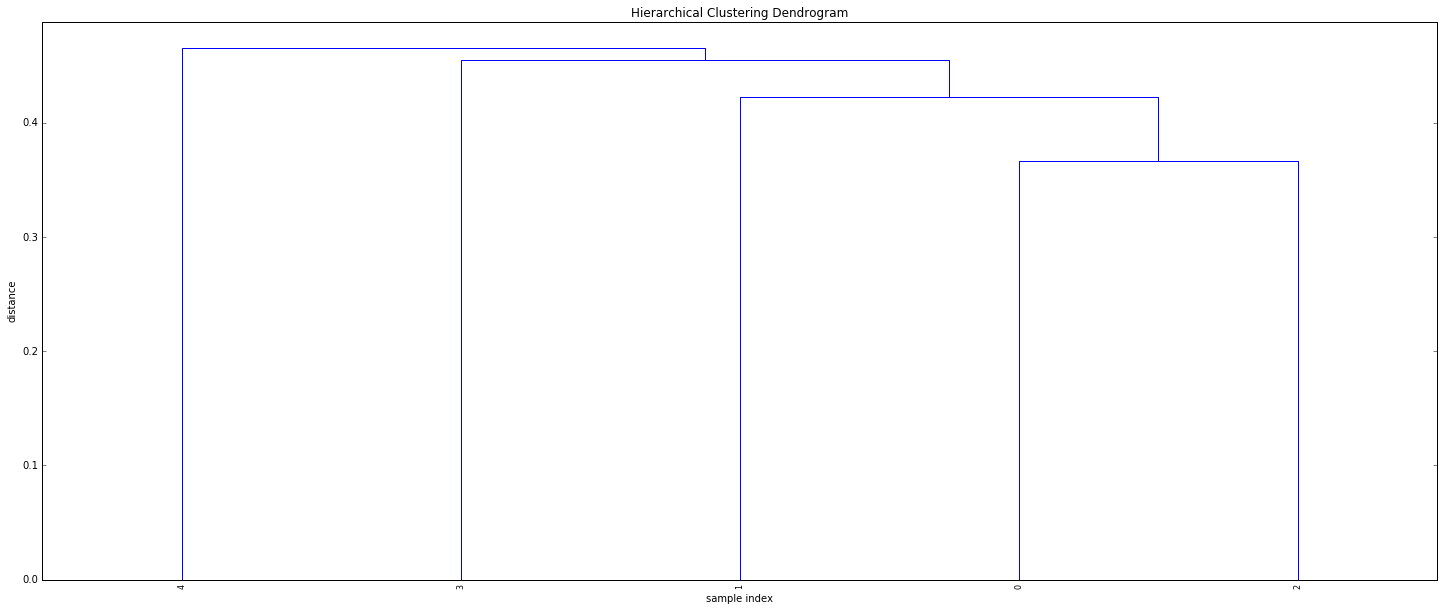

0: anxious

1: ready

2: willing

3: necessary

4: easy

(7, 100)


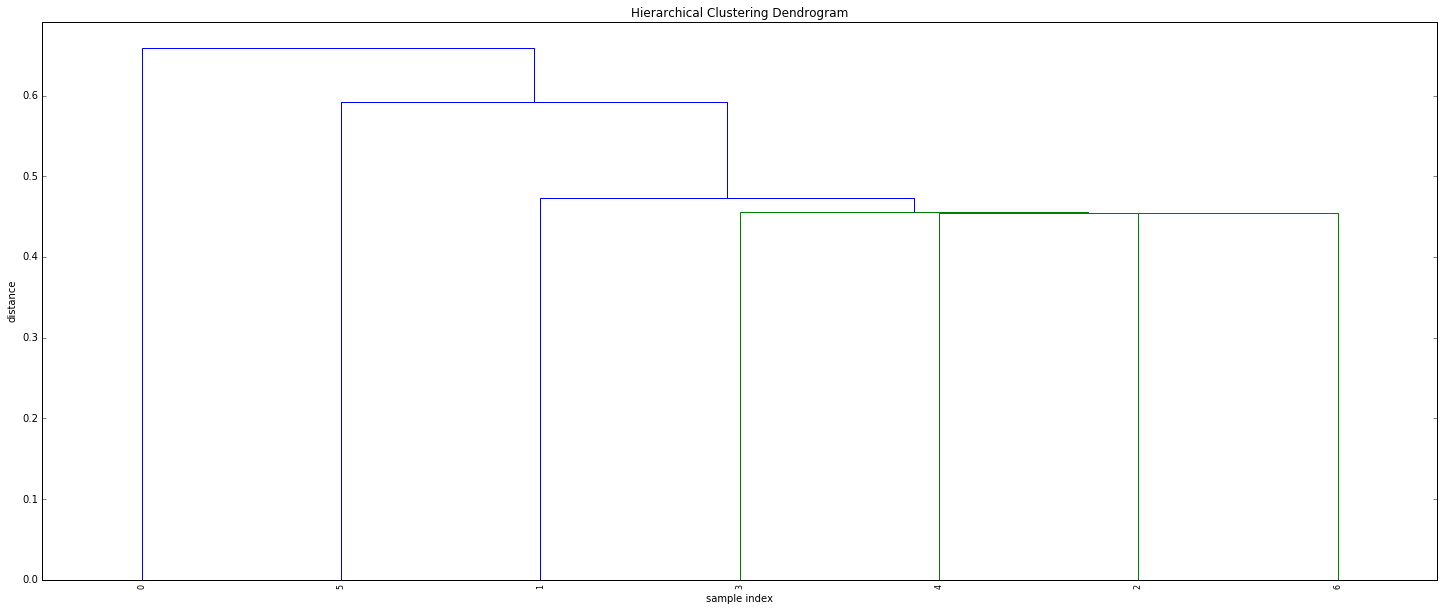

0: photographs

1: dialogue

2: publication

3: text

4: verse

5: paper

6: book

(3, 100)


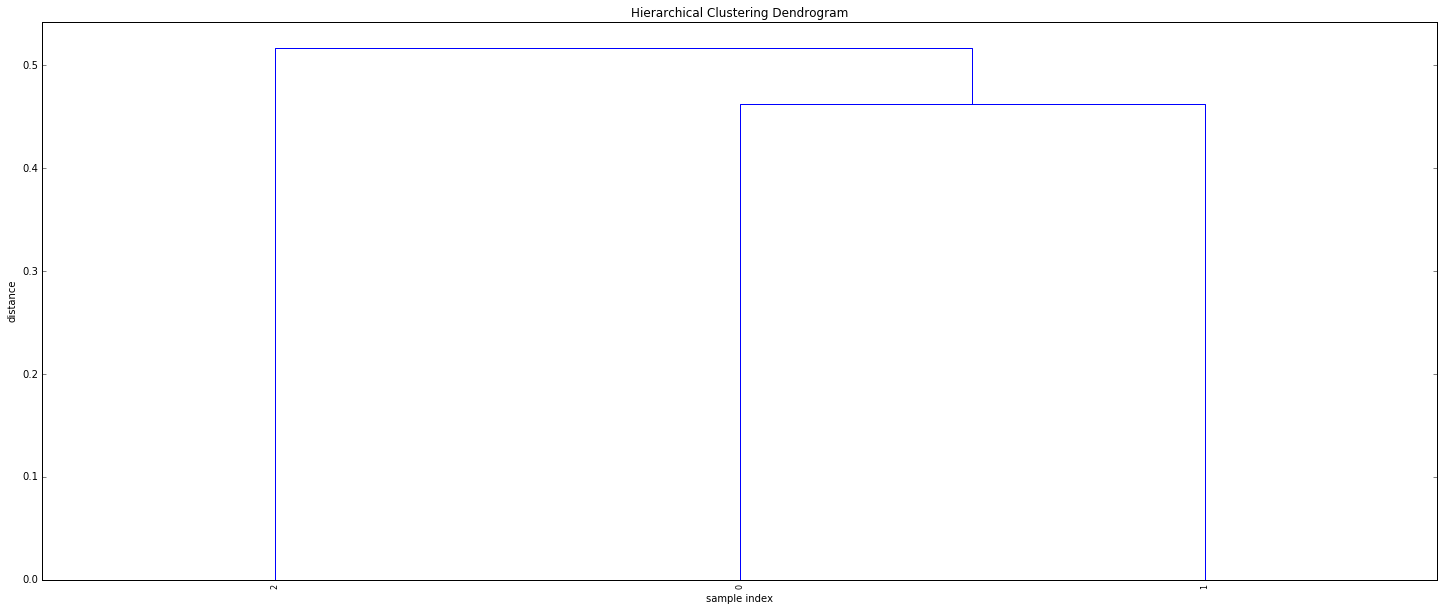

0: prose

1: hymns

2: collection

(3, 100)


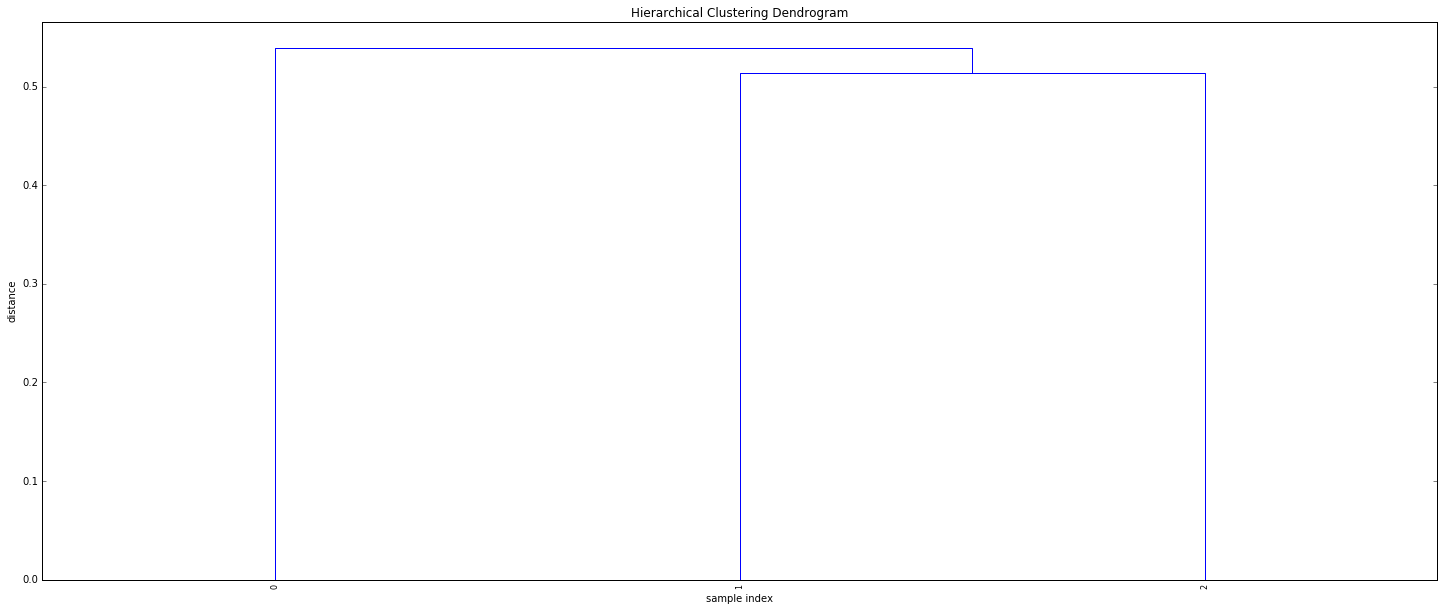

0: text

1: historical

2: narrative

(3, 100)


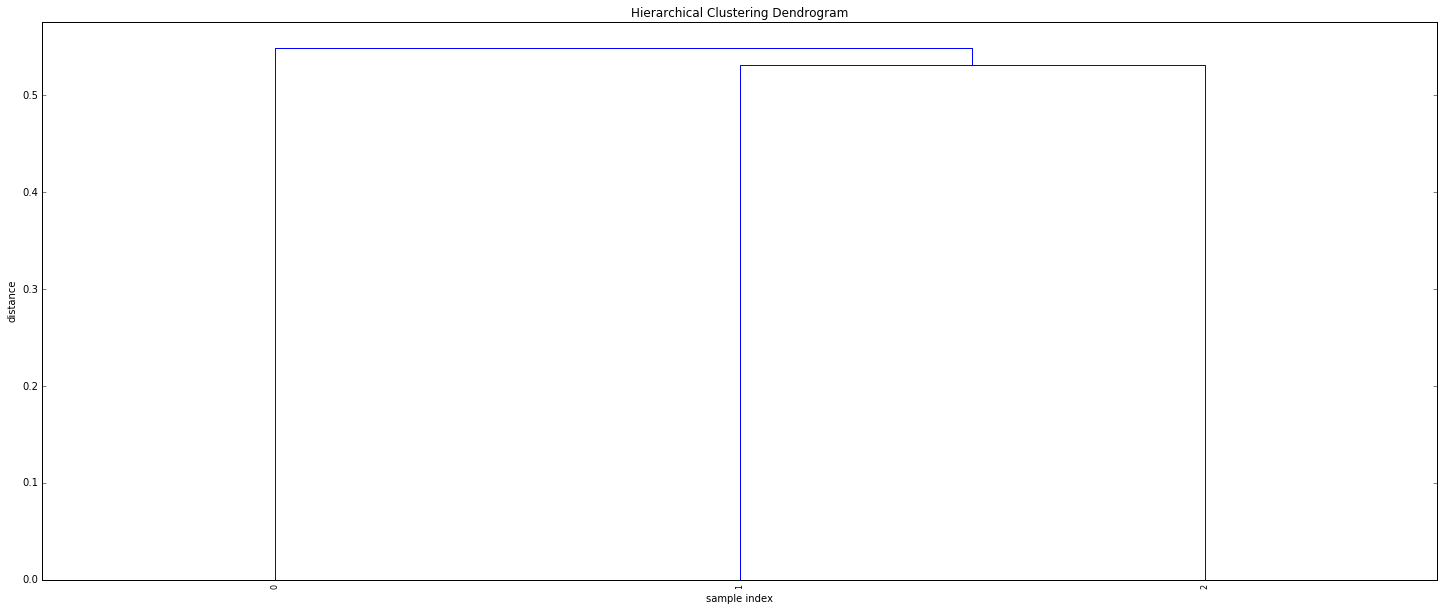

0: verses

1: portraits

2: works

(16, 100)


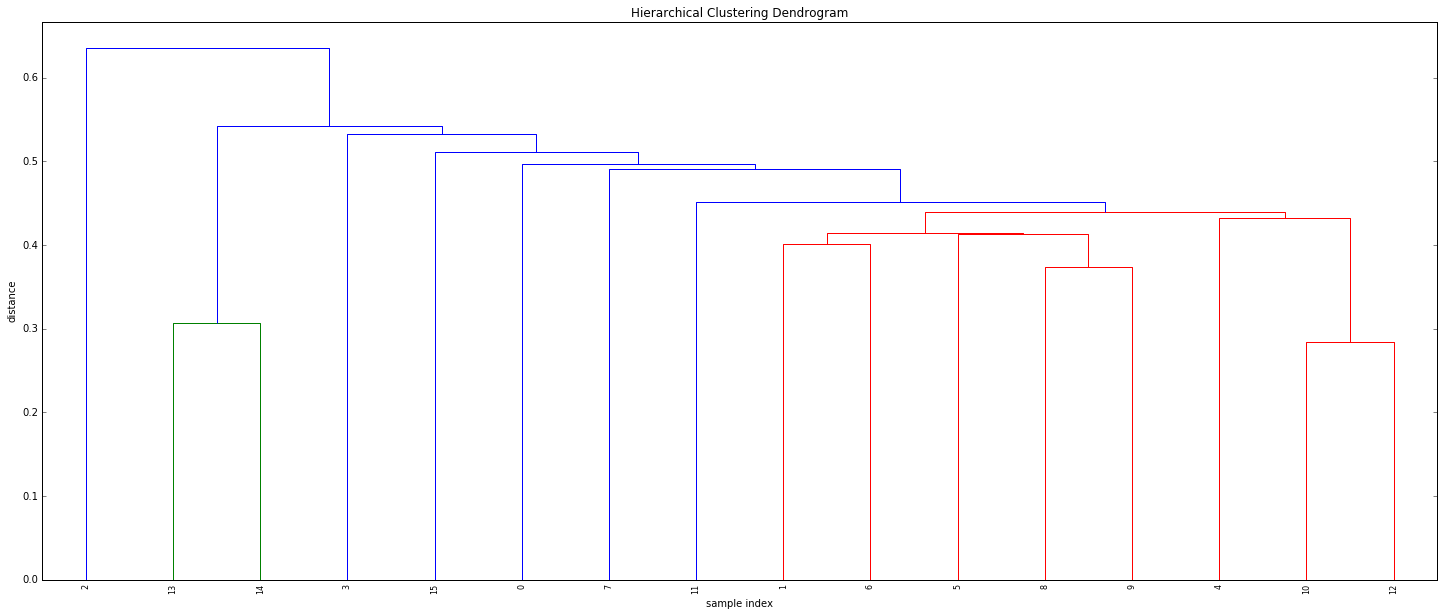

0: lessons

1: letters

2: origins

3: journeys

4: images

5: papers

6: verses

7: quotes

8: books

9: stories

10: drawings

11: authors

12: illustrations

13: statues

14: monuments

15: notes

(3, 100)


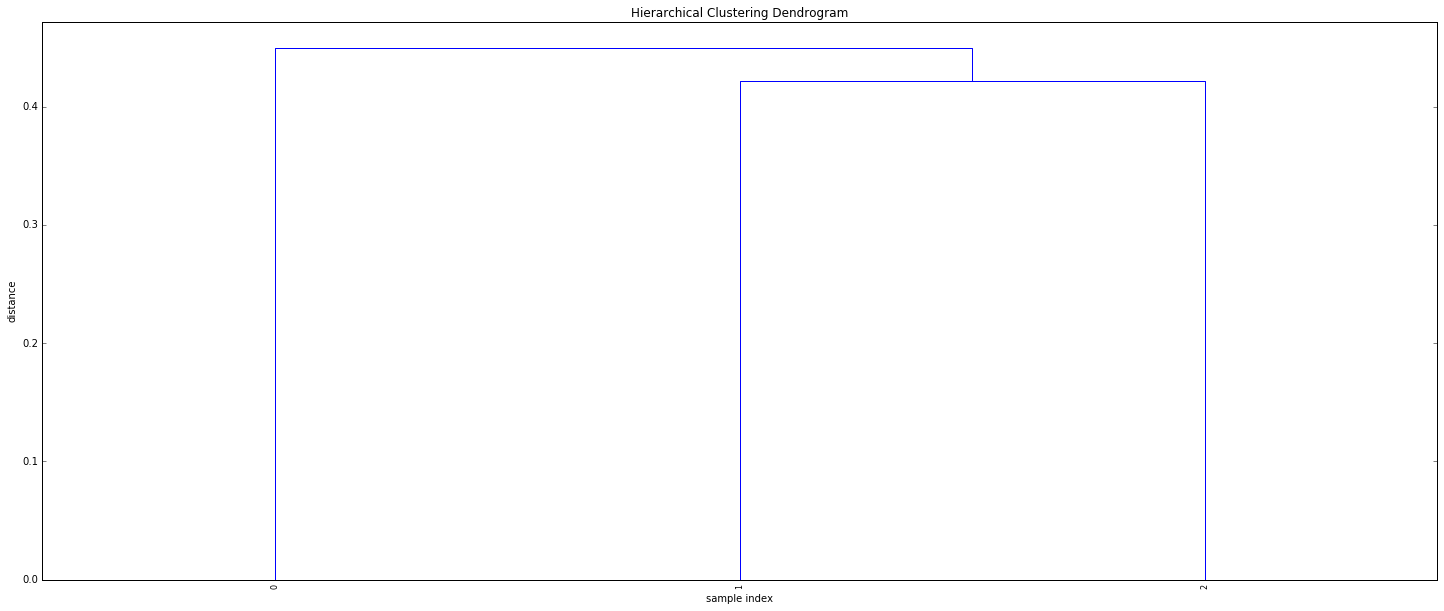

0: am

1: ma

2: o

(8, 100)


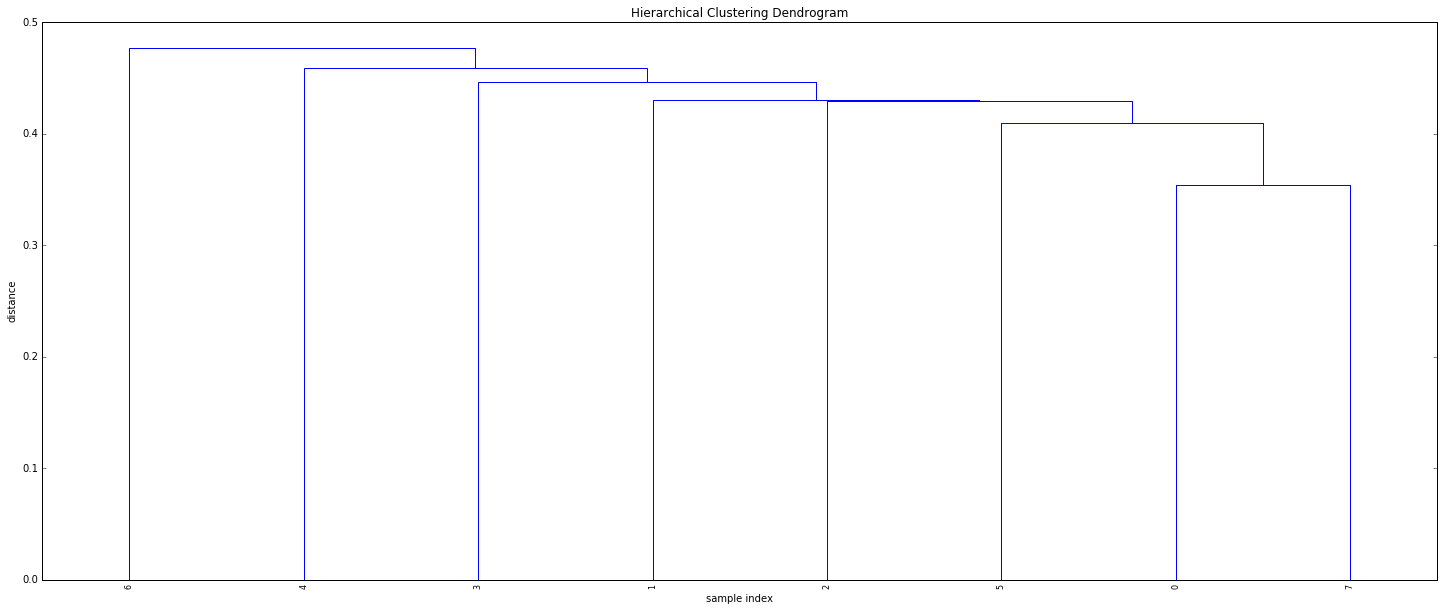

0: ok

1: nad

2: oh

3: o

4: ur

5: uh

6: uni

7: sorry

(25, 100)


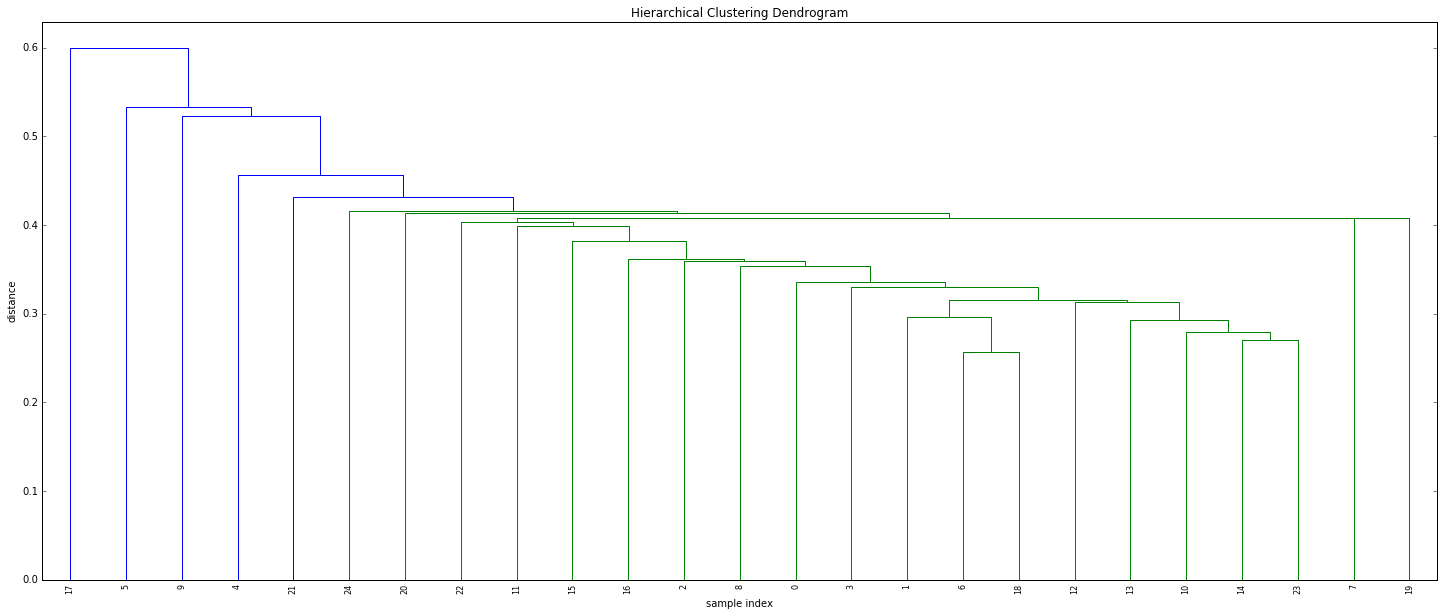

0: af

1: ah

2: ea

3: tan

4: tao

5: toast

6: ra

7: lis

8: hen

9: bye

10: dag

11: ba

12: yo

13: por

14: bo

15: bi

16: mira

17: motto

18: ha

19: tra

20: l

21: o

22: yang

23: amor

24: dis

(9, 100)


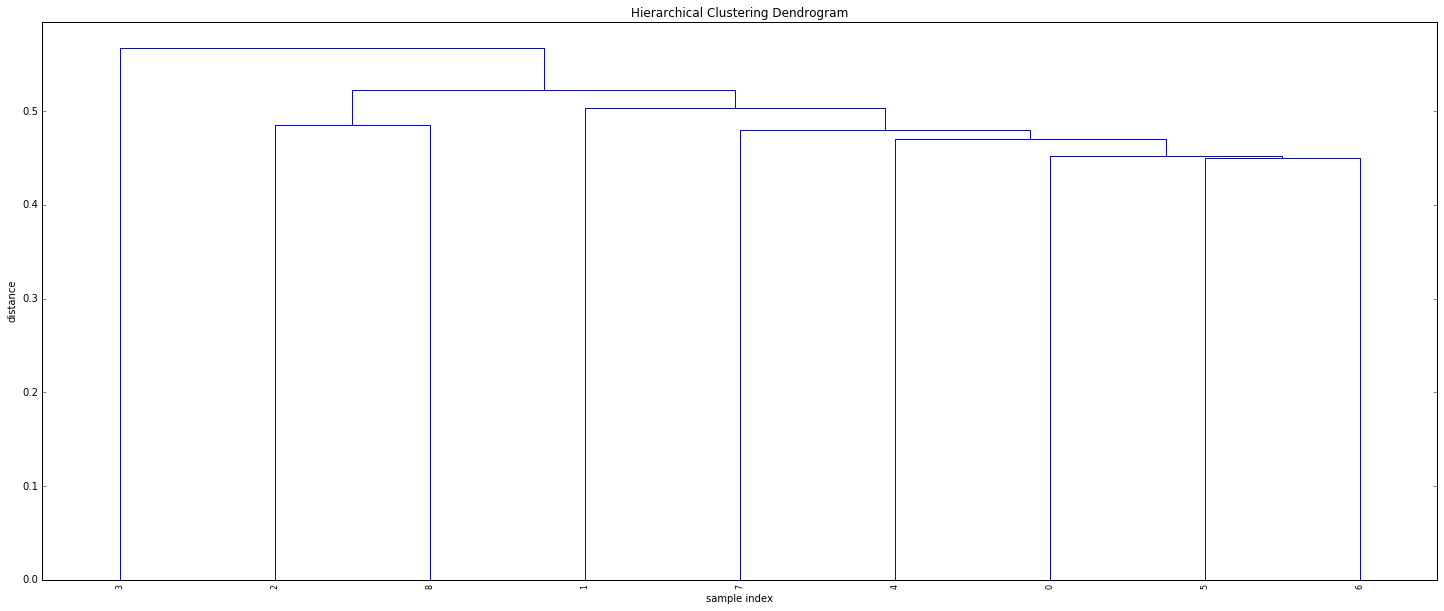

0: shepherding

1: parenting

2: imposing

3: fixing

4: condemning

5: bullying

6: rearing

7: welcoming

8: enforcing

(13, 100)


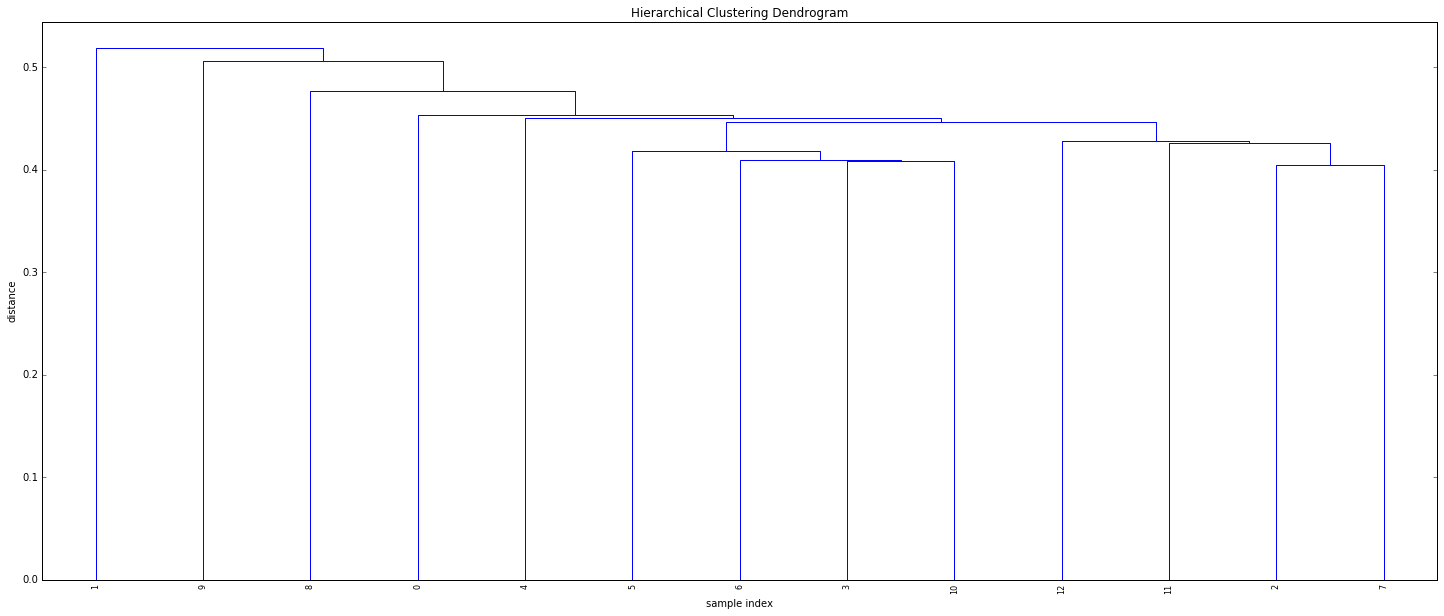

0: industrious

1: centric

2: gymnastic

3: observant

4: irresponsible

5: apathy

6: unfair

7: dependable

8: shameful

9: impediment

10: immoral

11: meticulous

12: strenuous

(20, 100)


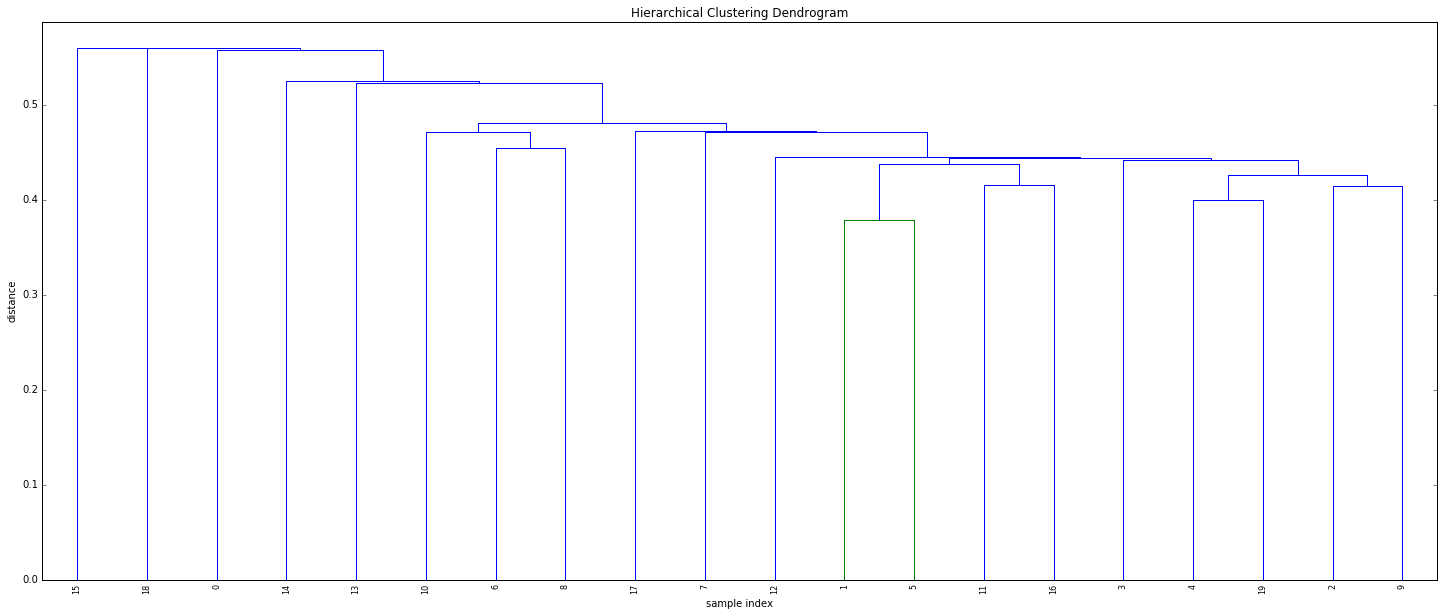

0: paperwork

1: delinquent

2: diligent

3: motherhood

4: intimidate

5: inhumane

6: indulgence

7: inhuman

8: disrespect

9: needy

10: donation

11: indoctrination

12: maternity

13: aura

14: deference

15: faceless

16: servitude

17: contraband

18: meddle

19: betray

(5, 100)


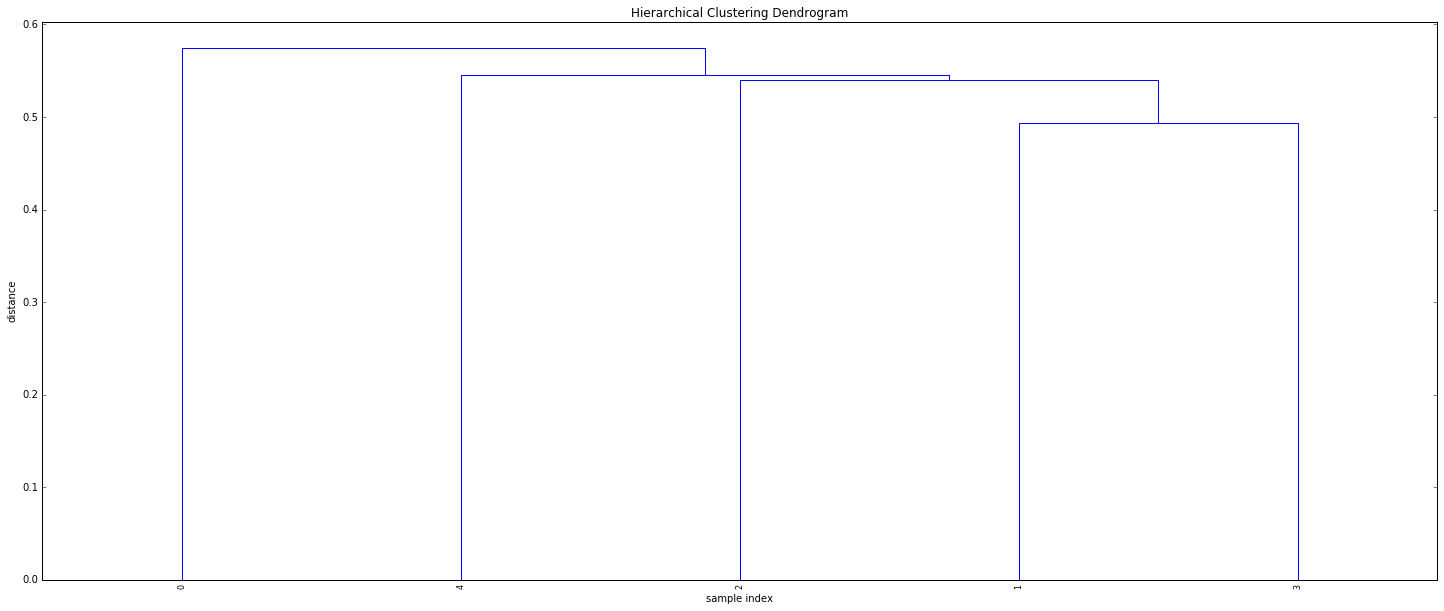

0: contrasting

1: presenting

2: healing

3: guiding

4: ignoring

(3, 100)


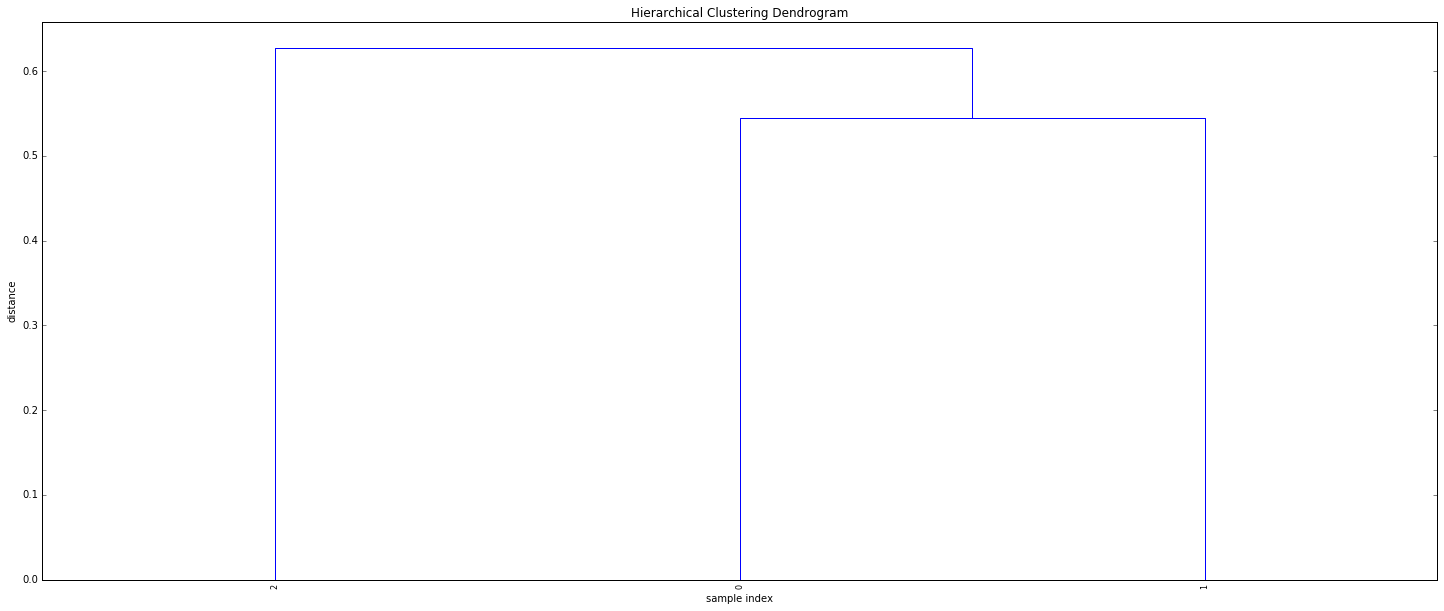

0: self

1: worldly

2: fairness

(50, 100)


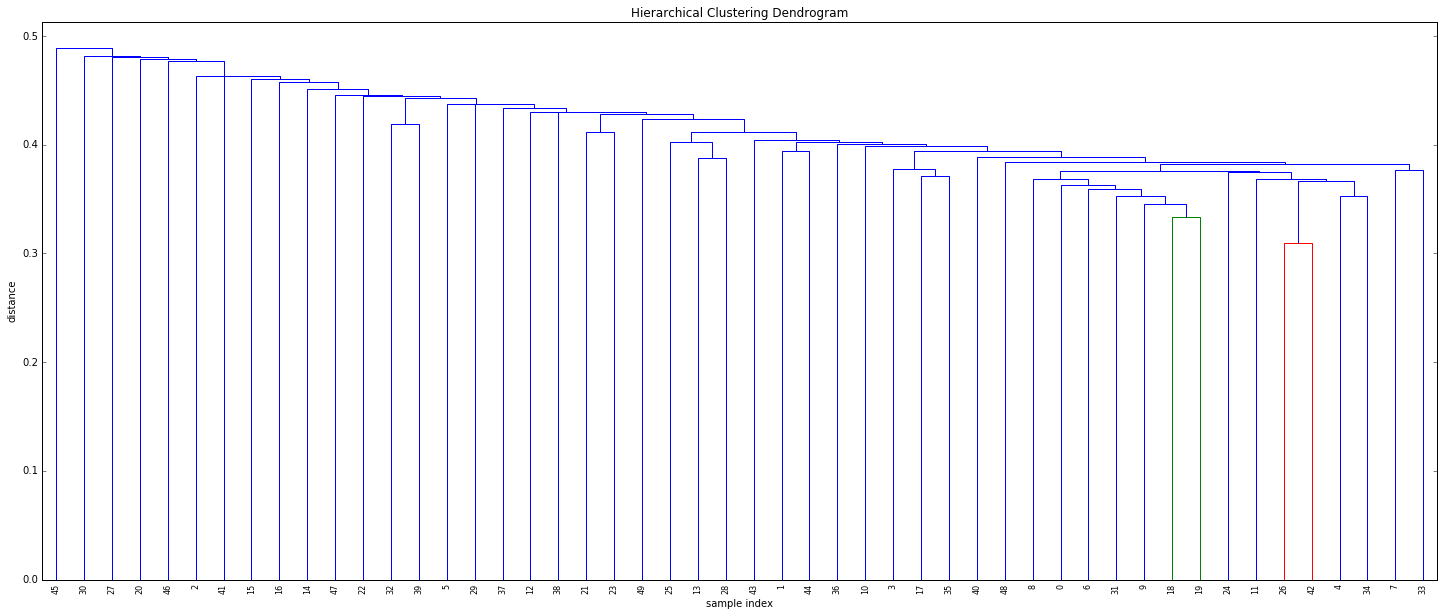

0: emotion

1: motivation

2: omission

3: honesty

4: consciousness

5: closeness

6: sexist

7: purity

8: goodness

9: selfishness

10: creationism

11: discipline

12: deception

13: uniformity

14: self

15: circumstance

16: liberty

17: introspection

18: masculinity

19: patriarchy

20: intelligent

21: illusion

22: persistence

23: exaggeration

24: nature

25: comprehension

26: ignorance

27: appropriation

28: determination

29: pursuit

30: reversal

31: humility

32: metaphor

33: perfection

34: morality

35: nonviolence

36: rejection

37: indifference

38: ridicule

39: expression

40: competence

41: impossibility

42: guilt

43: awareness

44: behavior

45: grasp

46: contradictory

47: conformity

48: devotion

49: virtue

(3, 100)


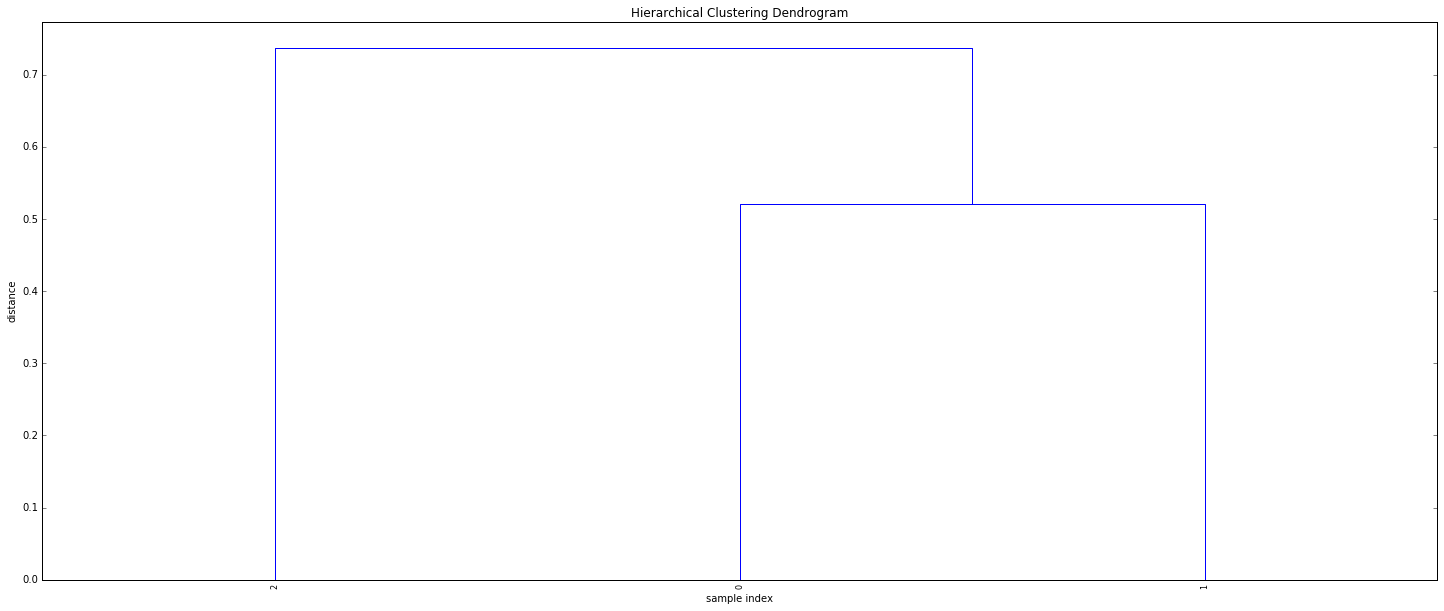

0: equality

1: ideal

2: ego

(33, 100)


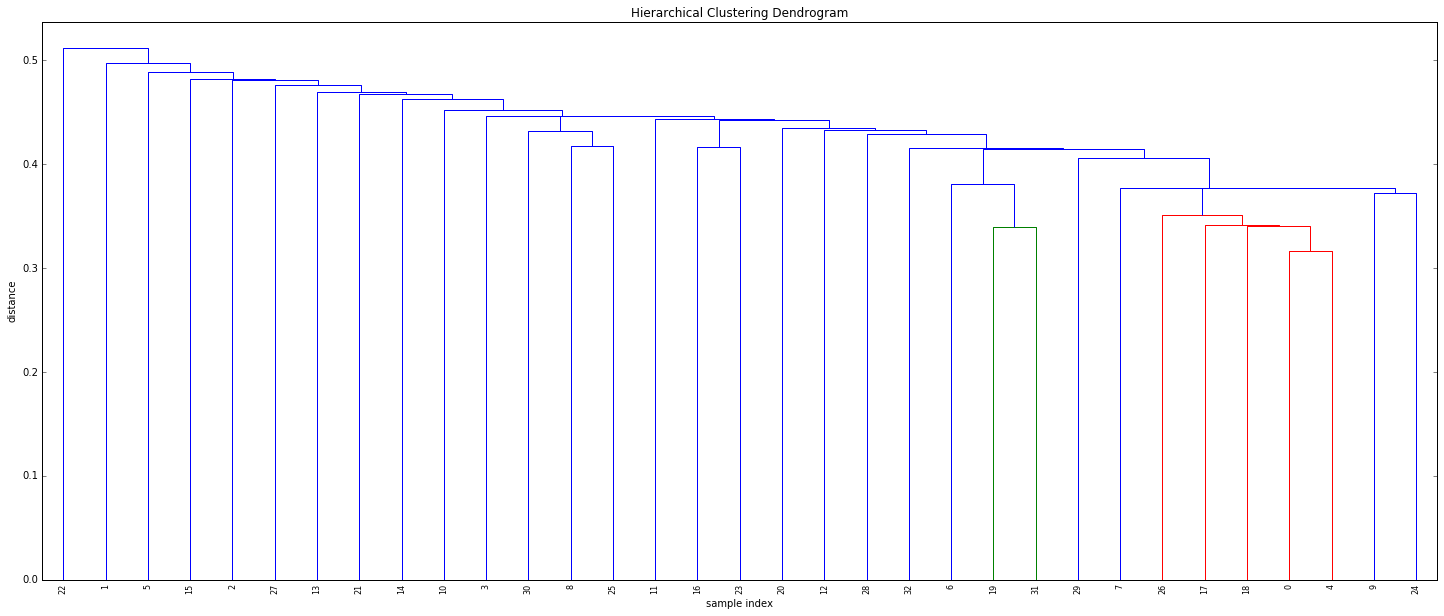

0: spiritual

1: dichotomy

2: chaotic

3: universal

4: moral

5: ironic

6: openness

7: physical

8: ethic

9: selfish

10: inappropriate

11: unnatural

12: self

13: negative

14: liberty

15: creative

16: strict

17: supernatural

18: rational

19: awareness

20: nature

21: extraordinary

22: vague

23: formal

24: conscious

25: atheist

26: empirical

27: orderly

28: absurd

29: behavior

30: disregard

31: emotional

32: temporal

(5, 100)


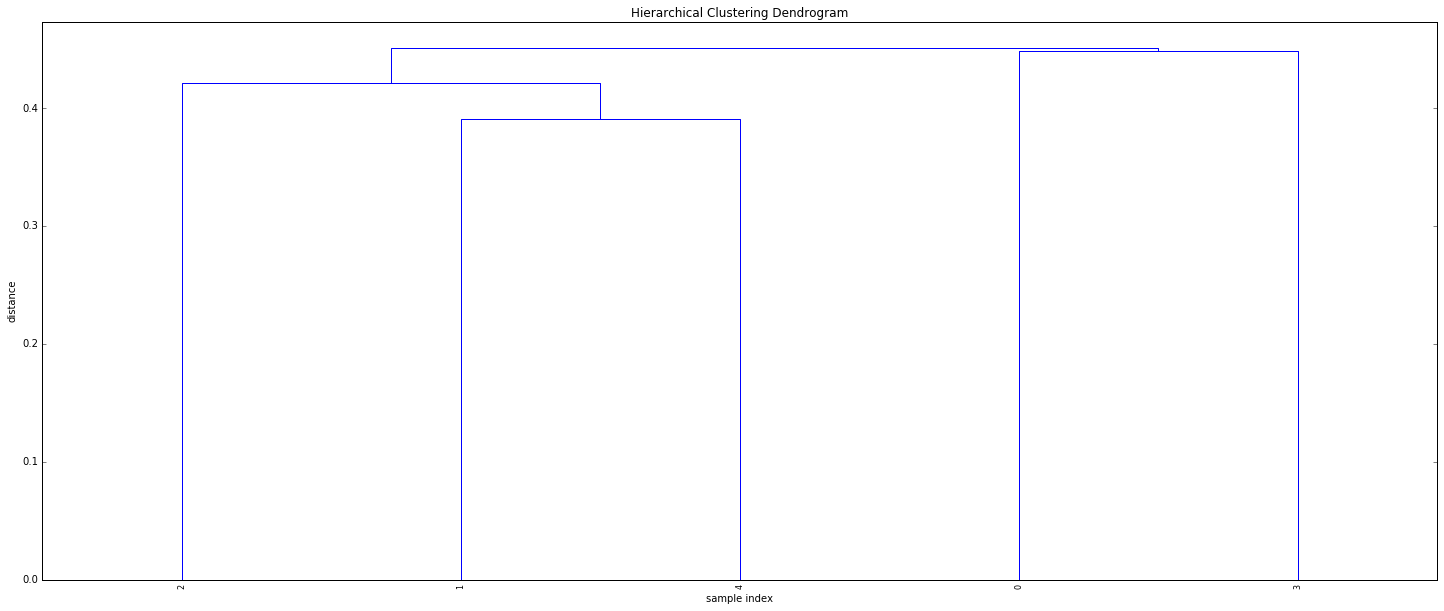

0: norms

1: behaviour

2: senses

3: morals

4: emotions

(22, 100)


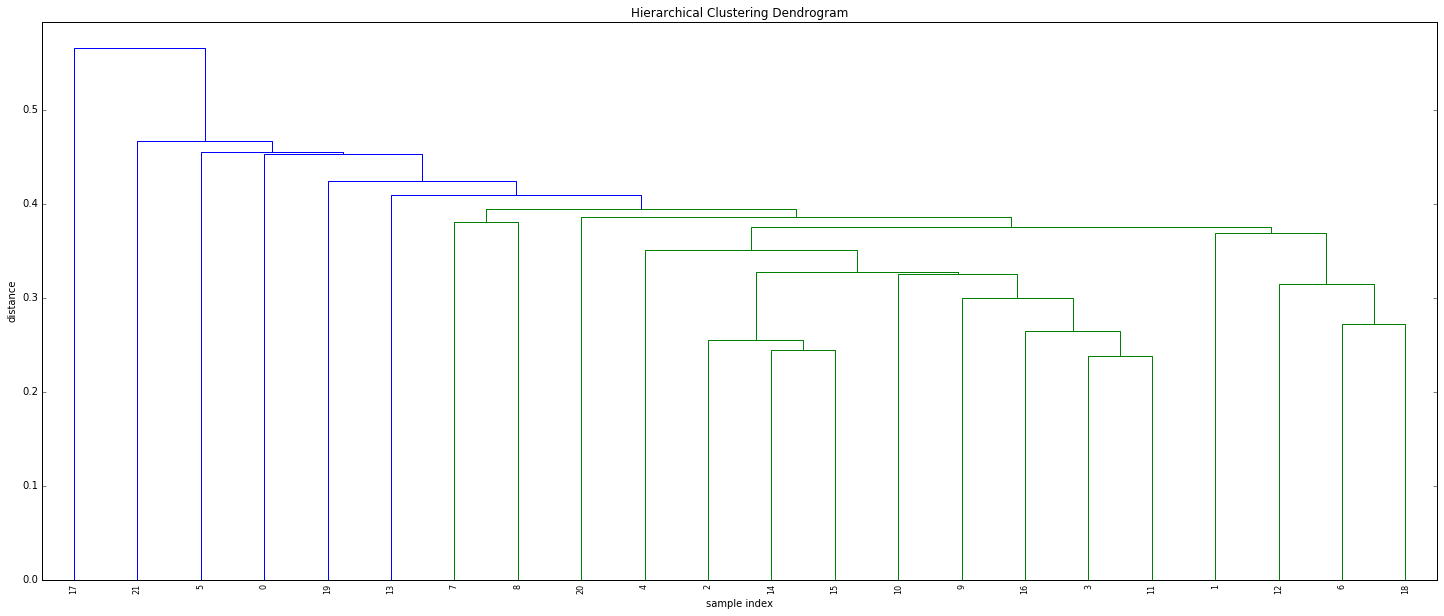

0: glare

1: reservoir

2: battery

3: radiation

4: curl

5: primer

6: cloud

7: sheet

8: chain

9: vibration

10: gradient

11: absorption

12: crust

13: texture

14: pump

15: exhaust

16: fluid

17: formation

18: dust

19: reaction

20: crystal

21: slippery

(16, 100)


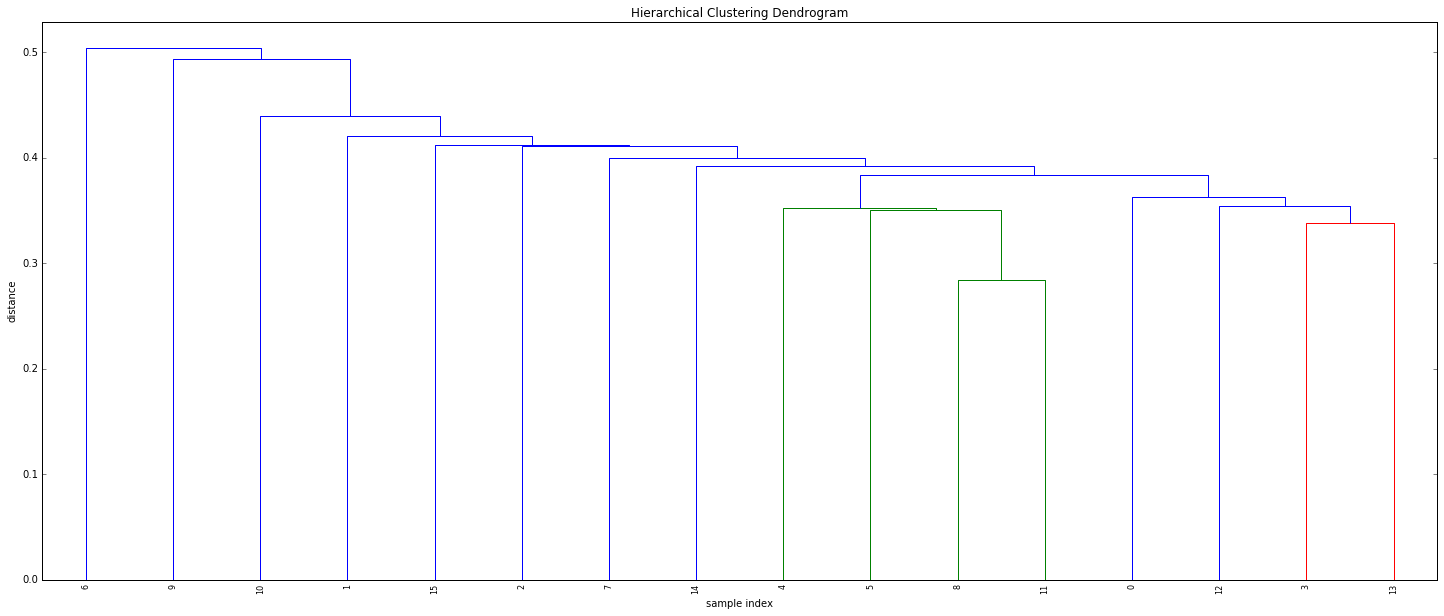

0: polar

1: clouds

2: energetic

3: elastic

4: envelope

5: pulse

6: quadrant

7: concrete

8: electrical

9: fig

10: degenerate

11: mechanical

12: repulsive

13: symmetrical

14: stationary

15: electric

(3, 100)


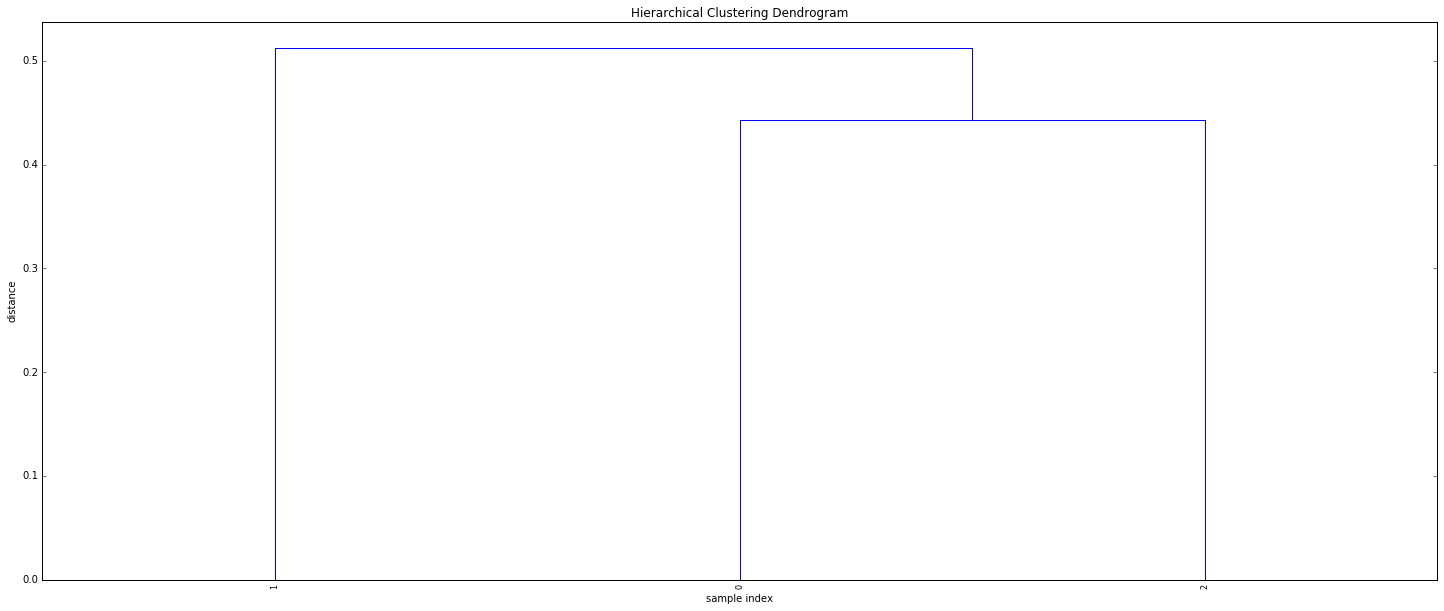

0: layers

1: transitions

2: rays

(3, 100)


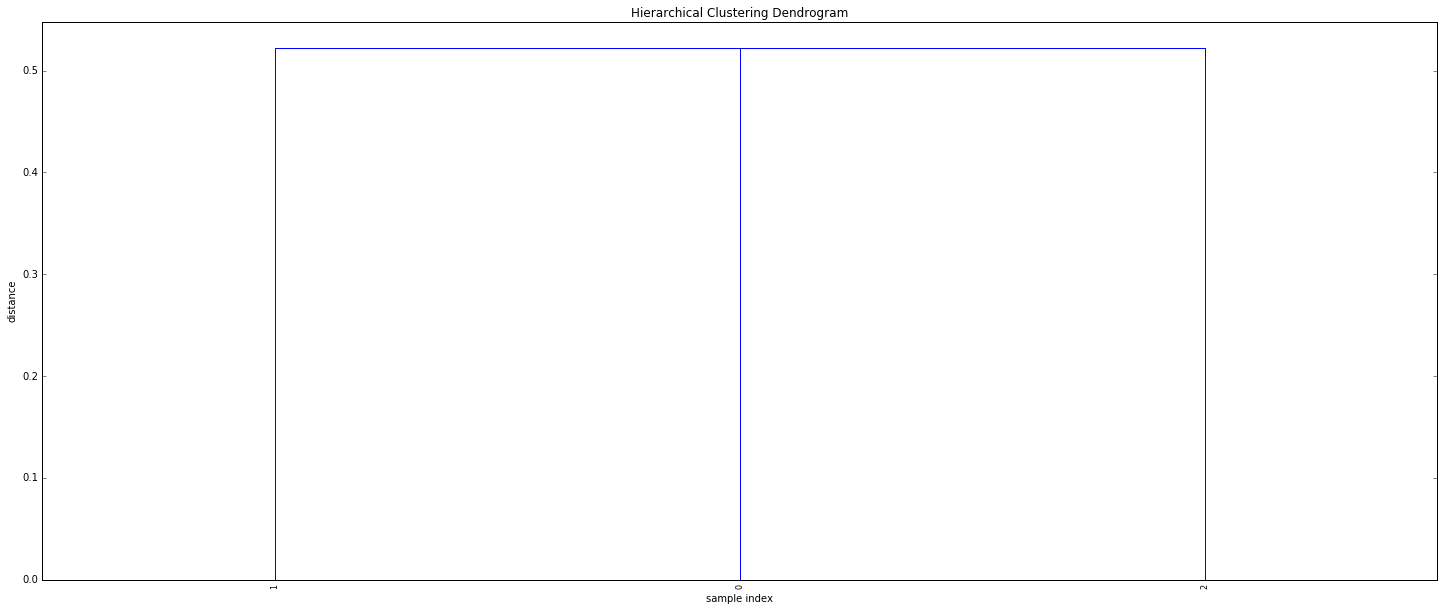

0: framed

1: taught

2: presented

(3, 100)


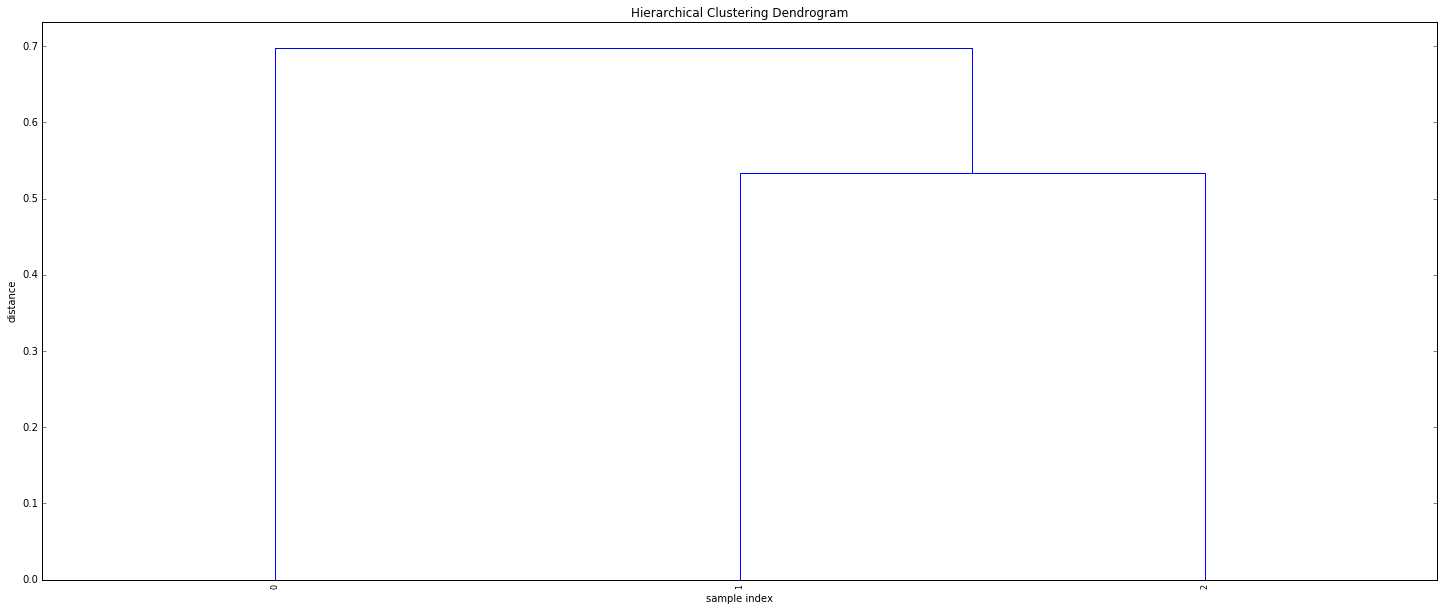

0: illustrated

1: worshipped

2: pleased

(5, 100)


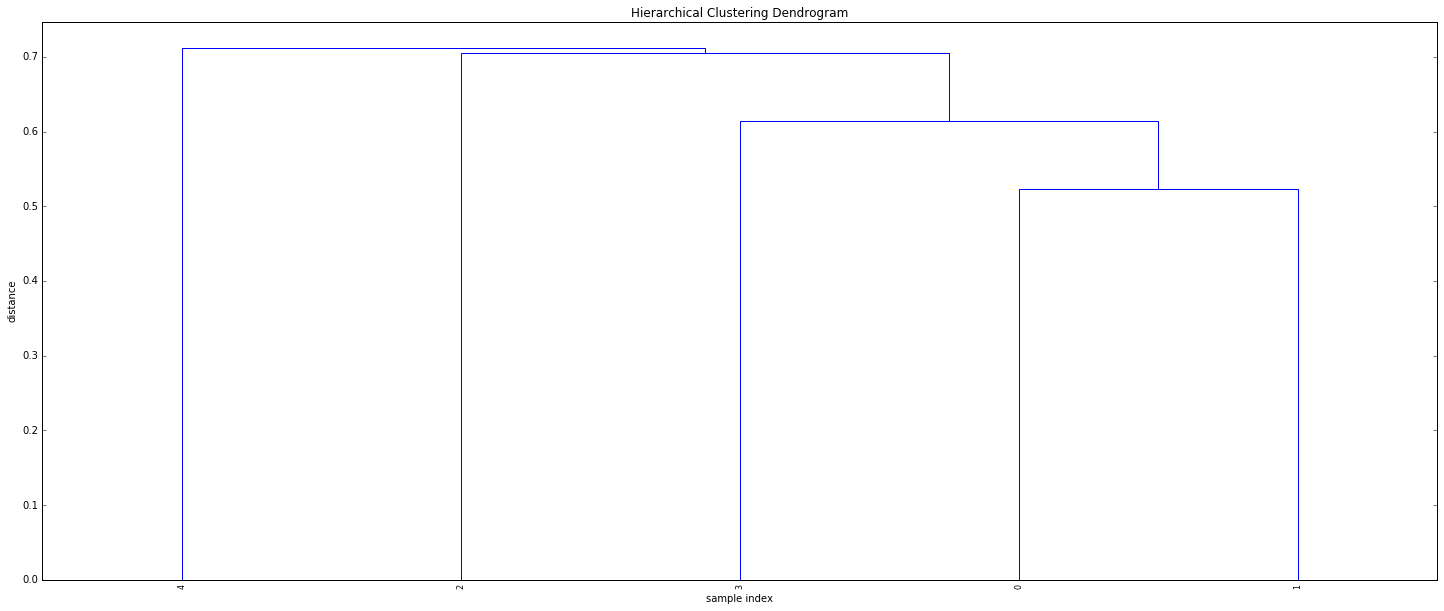

0: seen

1: found

2: educated

3: confused

4: published

(4, 100)


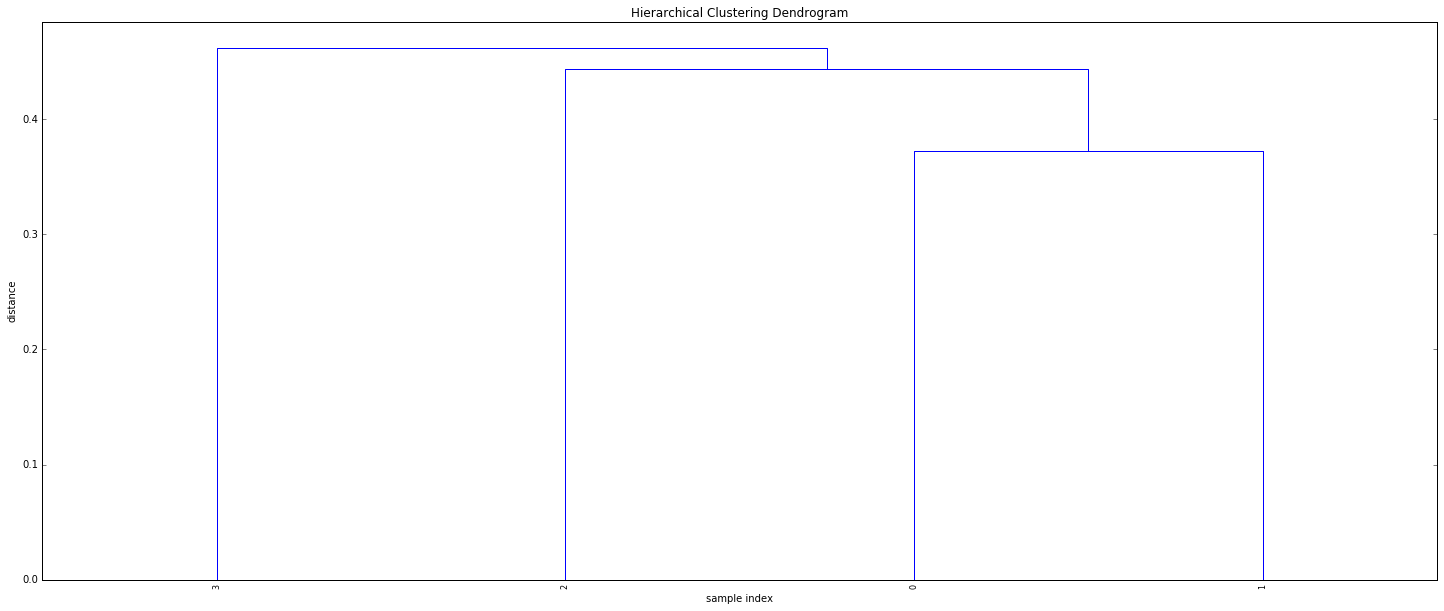

0: paddling

1: orienteering

2: taunting

3: kettering

(58, 100)


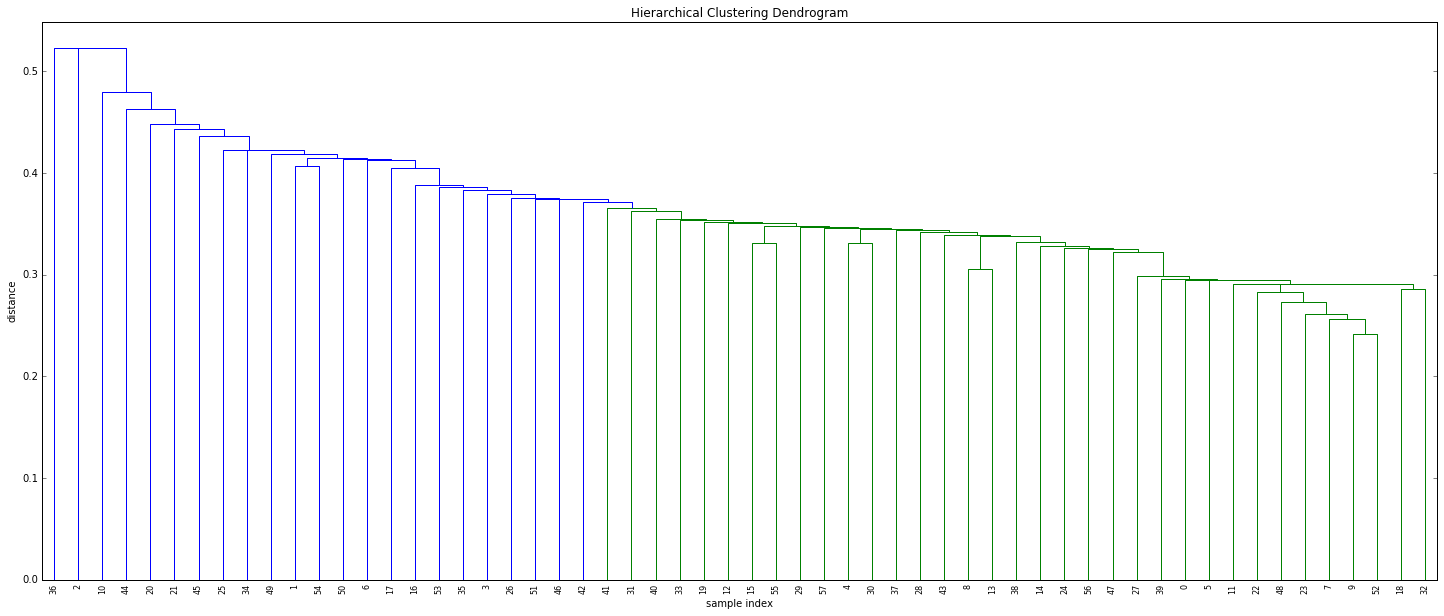

0: ringmaster

1: semicolon

2: capitalisation

3: orientalism

4: tidy

5: fleur

6: sae

7: balsam

8: gator

9: leafs

10: racket

11: tranquil

12: magpie

13: gnat

14: sailboat

15: bookmark

16: seashell

17: gridiron

18: lol

19: pharmacy

20: potty

21: pitchfork

22: bushy

23: ibex

24: armchair

25: stationery

26: cram

27: twister

28: blurry

29: briton

30: mop

31: dab

32: rowboat

33: buggy

34: wallpaper

35: zephyr

36: vignette

37: wiggle

38: halberd

39: safari

40: acrobat

41: spiderweb

42: wildcat

43: oberon

44: laborer

45: scepter

46: goody

47: mimicry

48: mallard

49: woodblock

50: hobo

51: tulip

52: ascot

53: landlord

54: parenthesis

55: meatball

56: lancer

57: trice

(15, 100)


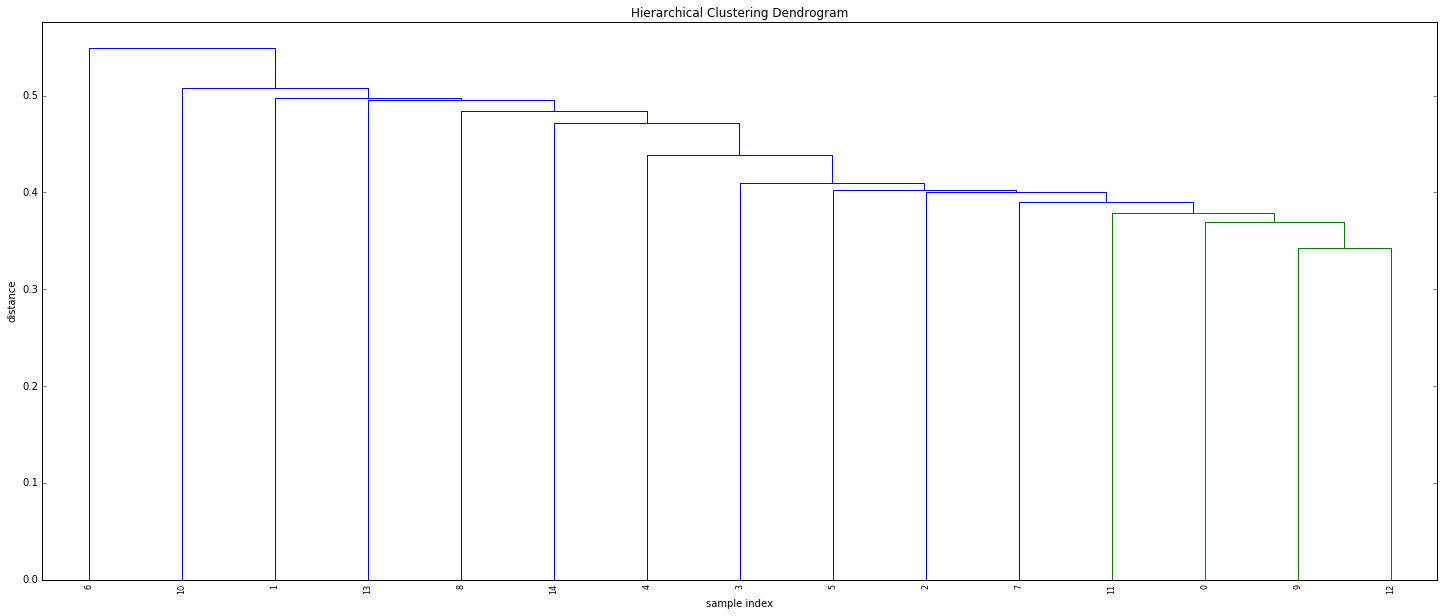

0: gargoyle

1: coop

2: sandal

3: quilt

4: chauvinistic

5: notepad

6: sip

7: stealthy

8: beehive

9: muff

10: intrepid

11: bushy

12: hug

13: xmas

14: anatomic

(3, 100)


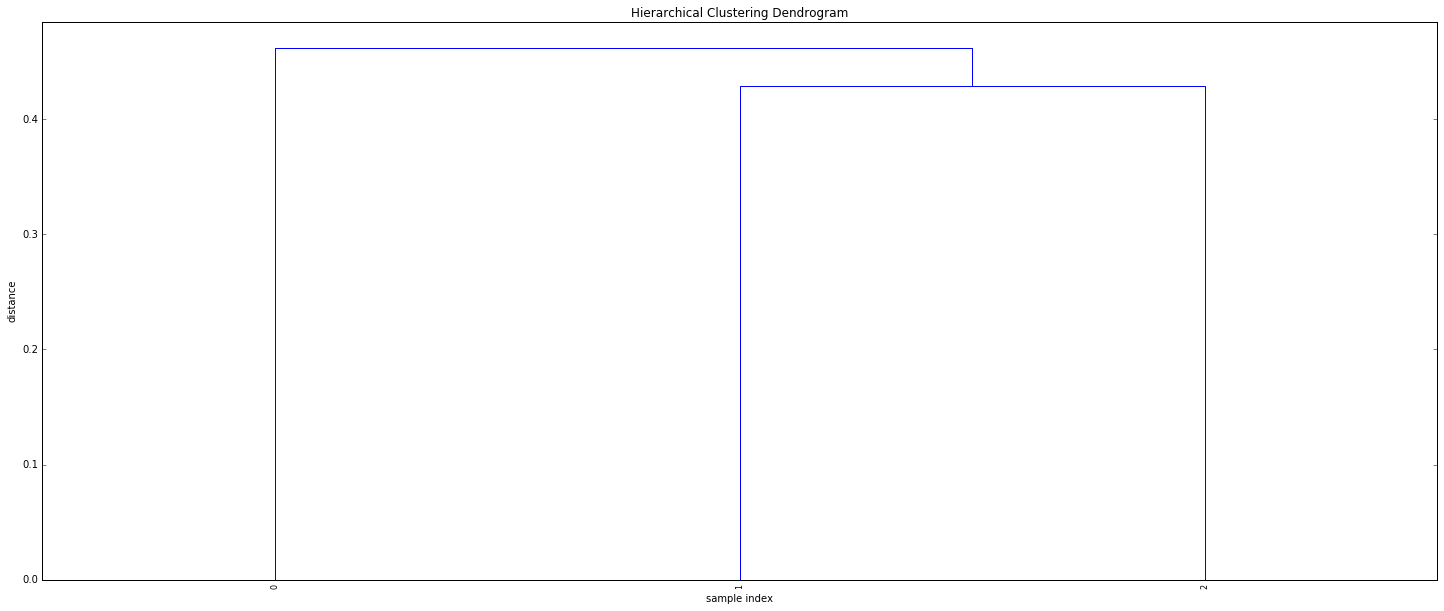

0: payout

1: bouquet

2: vest

(4, 100)


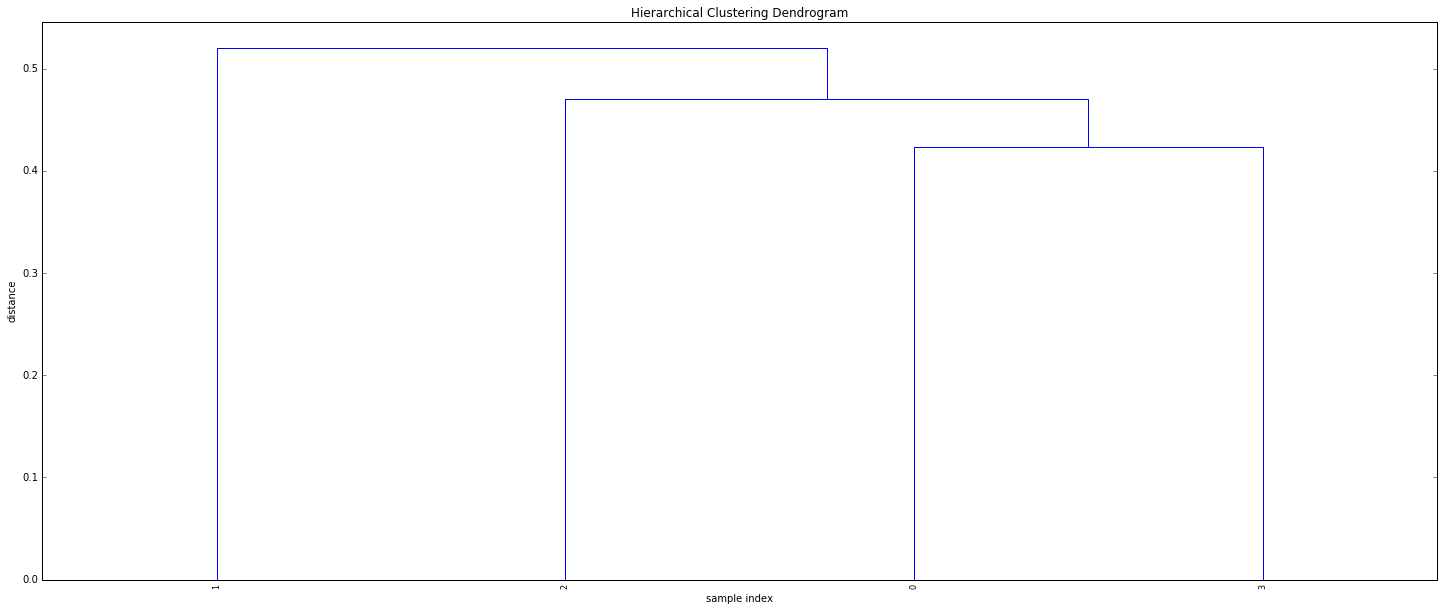

0: artistes

1: windmills

2: sparrows

3: oops

(6, 100)


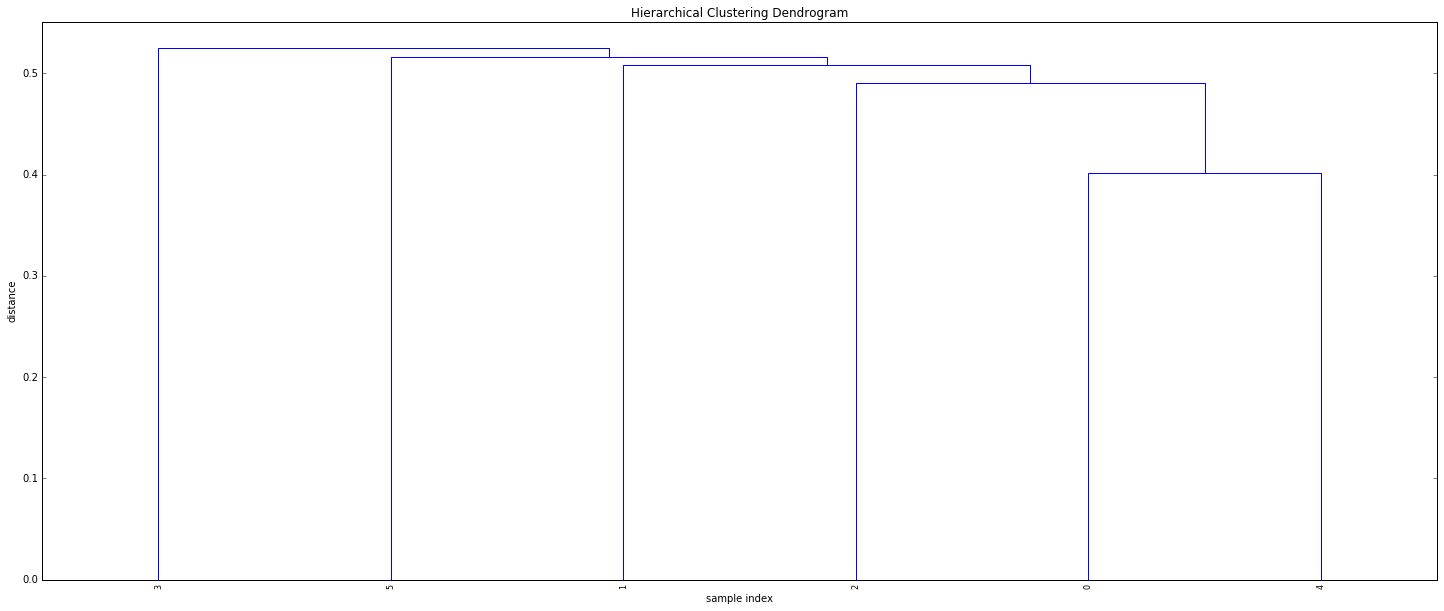

0: crutches

1: naps

2: shenanigans

3: groceries

4: globes

5: funnies

(5, 100)


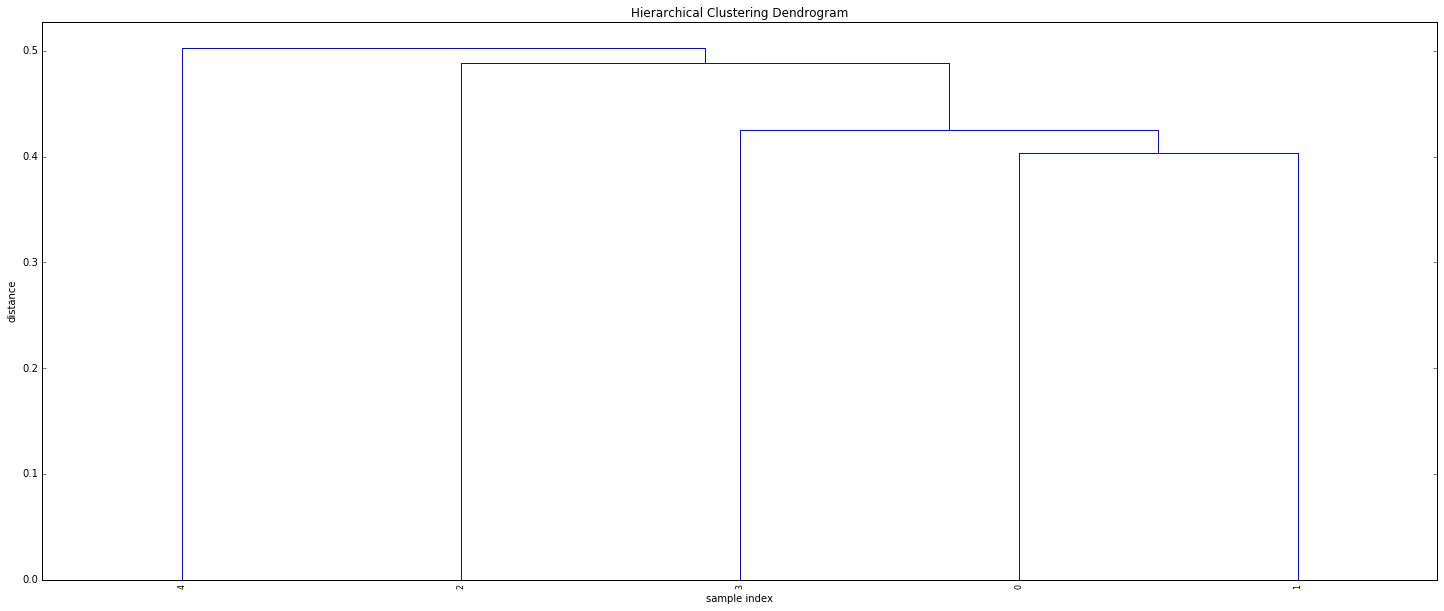

0: skating

1: rowing

2: boxing

3: racing

4: rushing

(3, 100)


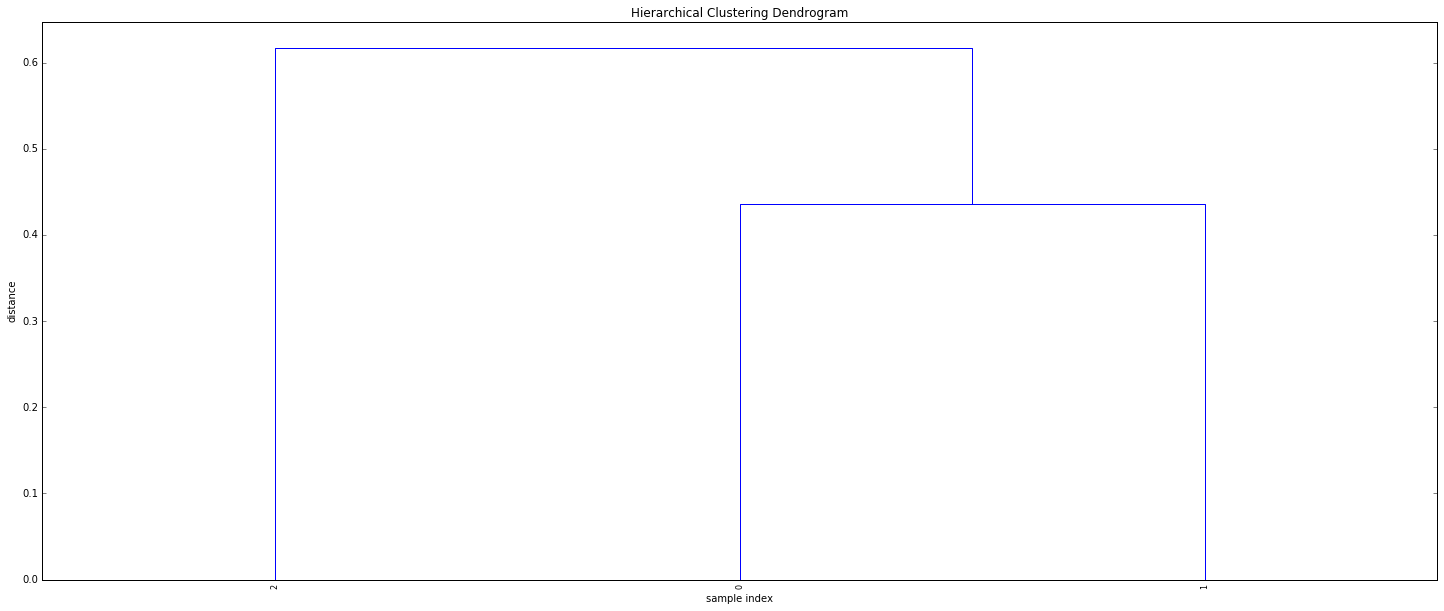

0: score

1: pitcher

2: laver

(34, 100)


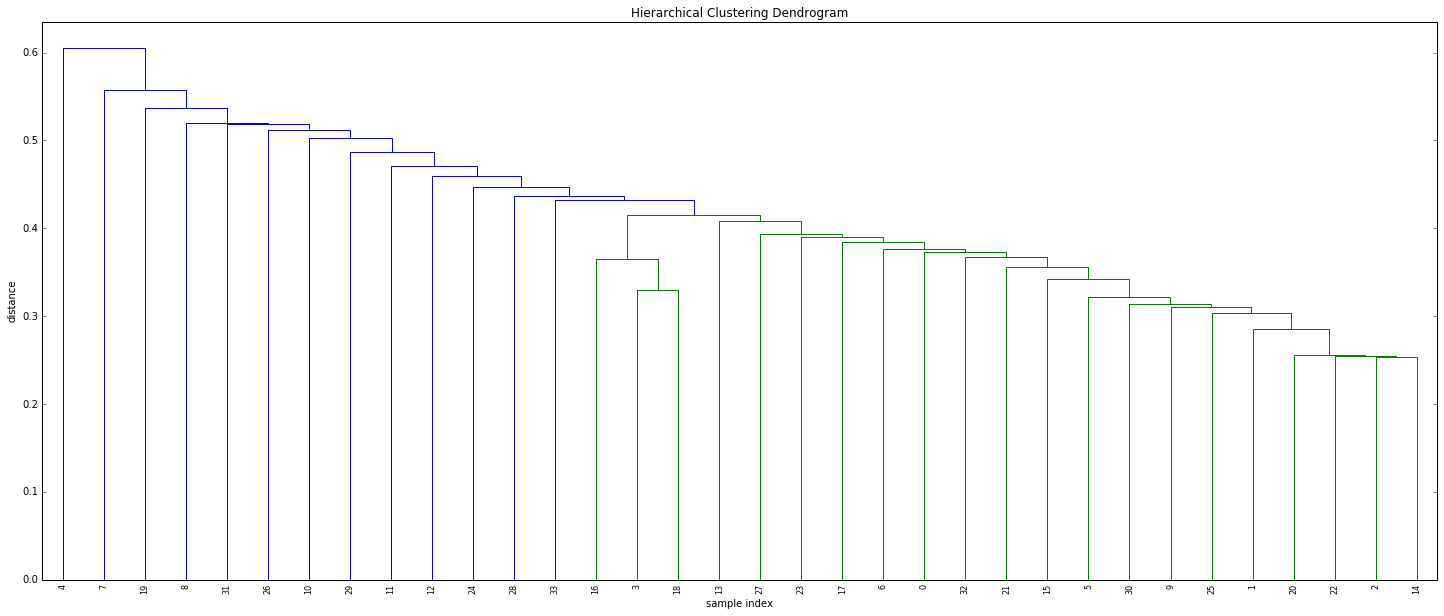

0: skating

1: tennis

2: golf

3: win

4: umpire

5: poker

6: competition

7: sponsor

8: rally

9: sport

10: fame

11: record

12: winner

13: bowl

14: hockey

15: croquet

16: tie

17: beating

18: match

19: division

20: cricket

21: club

22: football

23: game

24: scout

25: baseball

26: card

27: archery

28: yard

29: mls

30: rodeo

31: race

32: team

33: round

(9, 100)


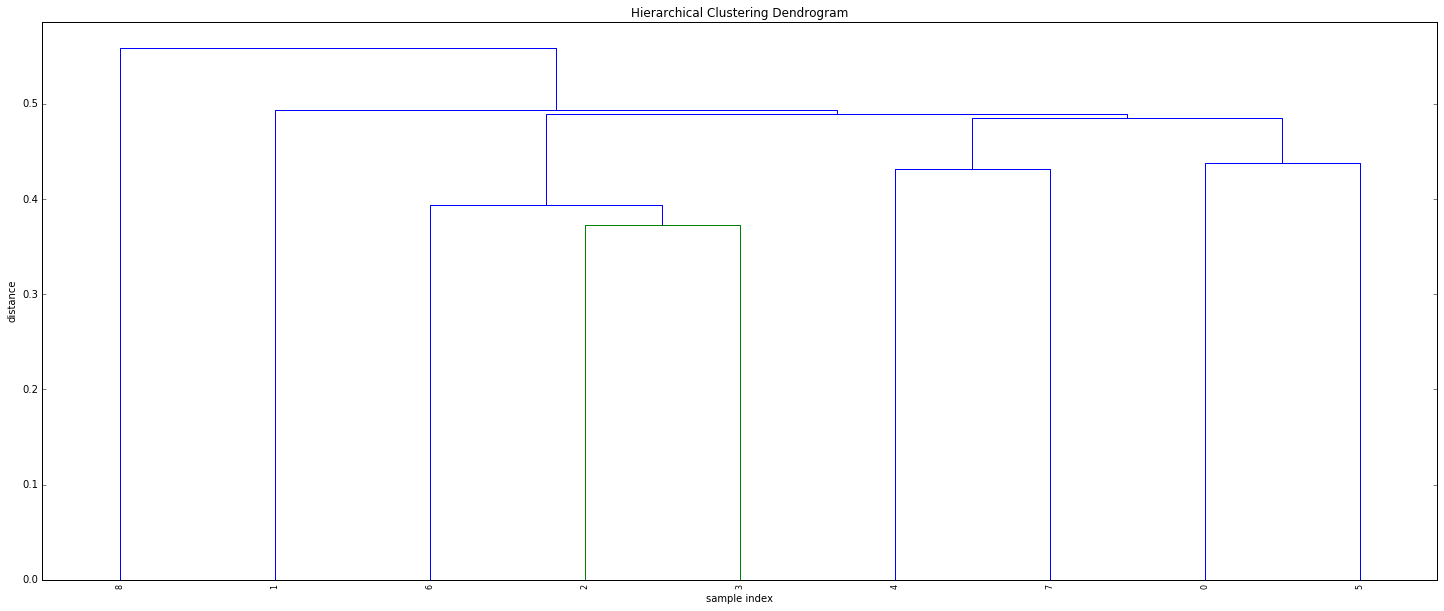

0: coach

1: spades

2: cup

3: bowl

4: round

5: cubs

6: rink

7: tie

8: ivy

(12, 100)


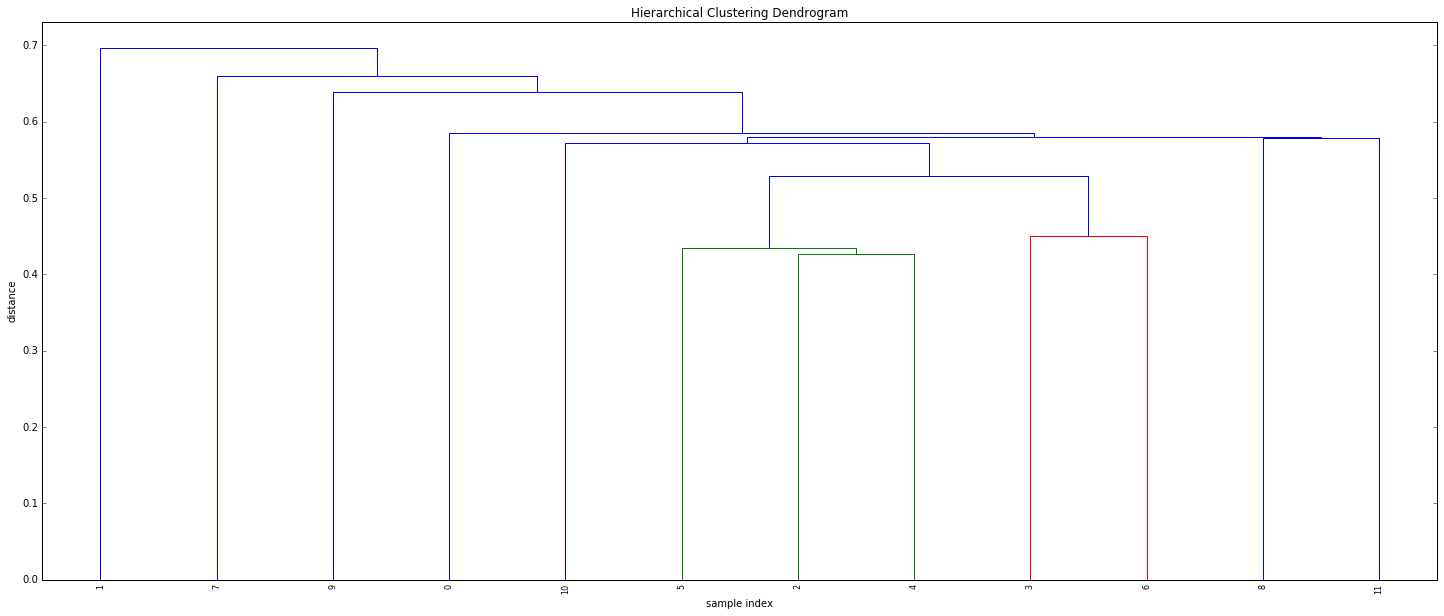

0: league

1: uniforms

2: amateur

3: cup

4: athletic

5: indoor

6: fa

7: unreal

8: grand

9: australian

10: medal

11: ivy

(4, 100)


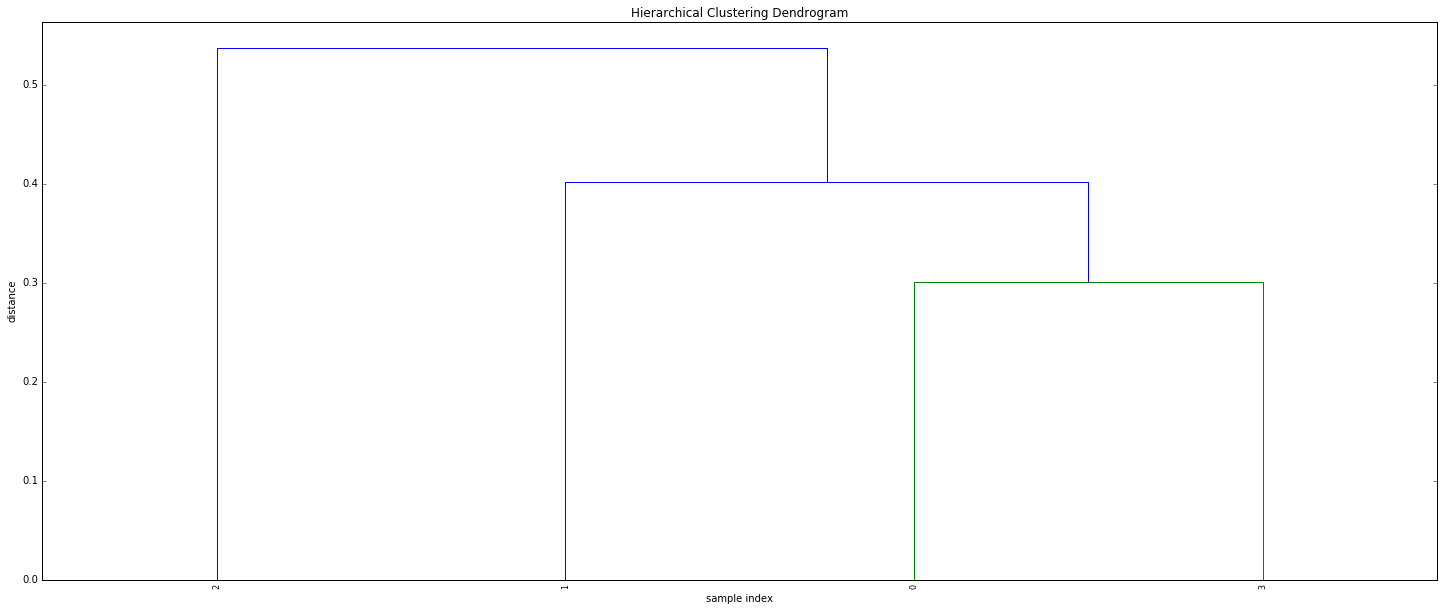

0: ravens

1: bulls

2: bowls

3: cowboys

(14, 100)


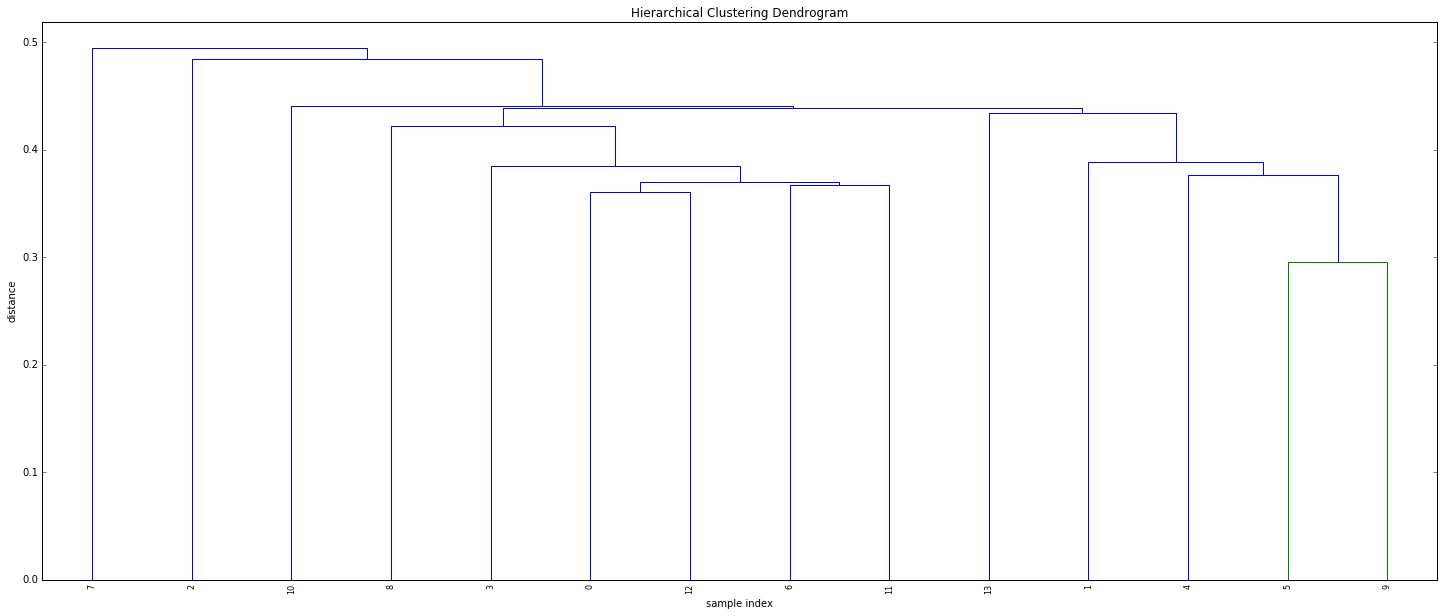

0: olympics

1: raiders

2: spectators

3: games

4: patriots

5: tigers

6: sports

7: gentlemen

8: gymnastics

9: lions

10: twins

11: athletics

12: tournaments

13: medals

(45, 100)


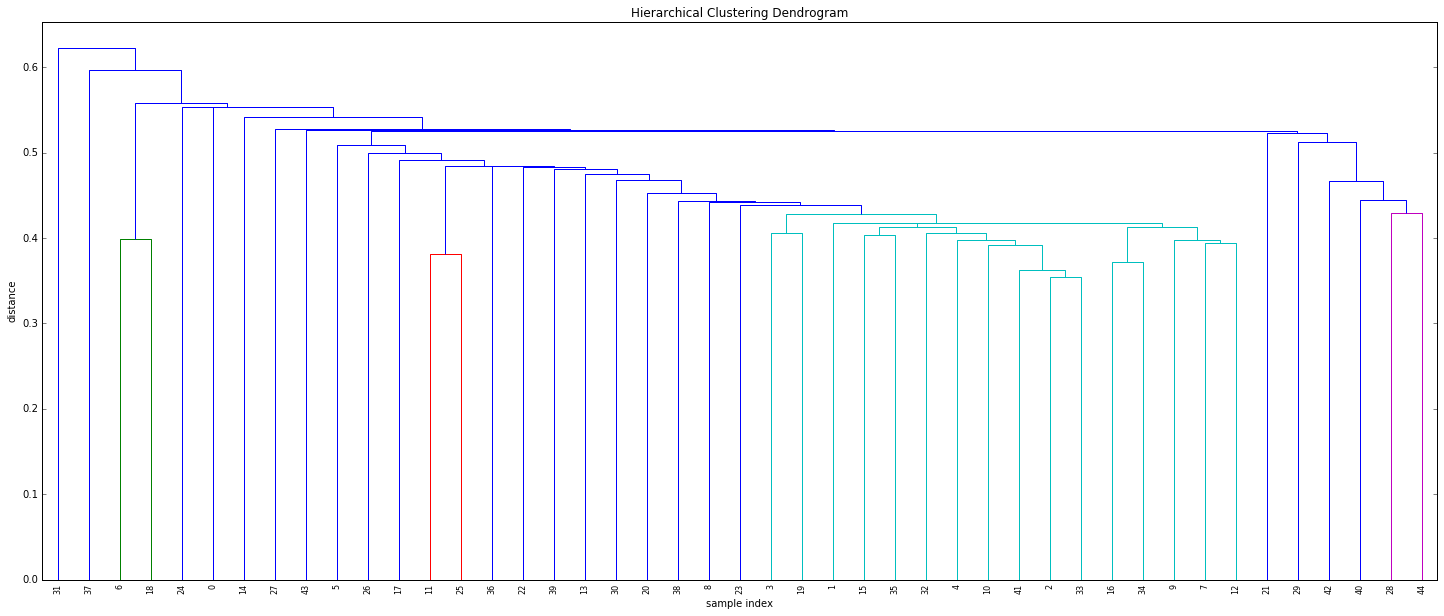

0: limited

1: beneficial

2: unclear

3: useful

4: problematic

5: powerful

6: primary

7: uncomfortable

8: cumbersome

9: expensive

10: incorrect

11: interesting

12: attractive

13: invalid

14: interested

15: useless

16: unfortunate

17: stable

18: main

19: difficult

20: questionable

21: familiar

22: weak

23: sophisticated

24: mixed

25: important

26: understandable

27: active

28: rare

29: unique

30: true

31: present

32: ambiguous

33: uncertain

34: exaggerated

35: dangerous

36: clear

37: classified

38: unrelated

39: identical

40: common

41: unknown

42: popular

43: similar

44: typical

(10, 100)


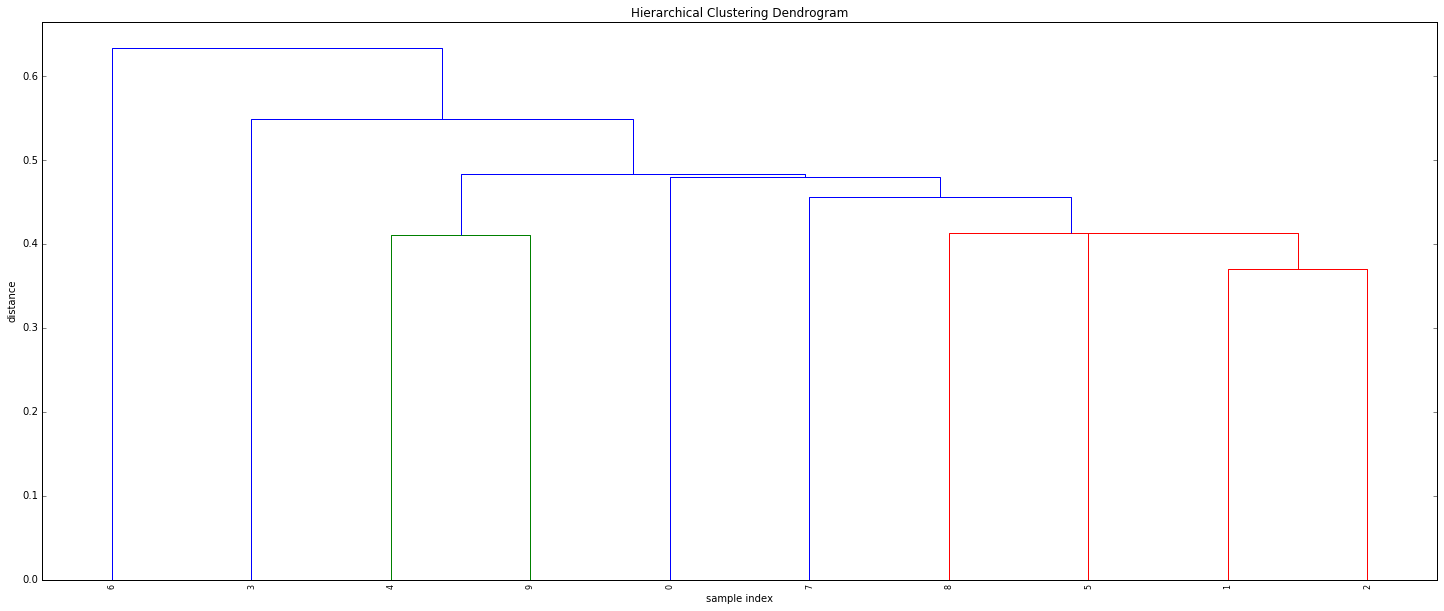

0: consuming

1: helpful

2: straightforward

3: dependent

4: relaxed

5: harmless

6: diverse

7: obscure

8: careful

9: vulnerable

(8, 100)


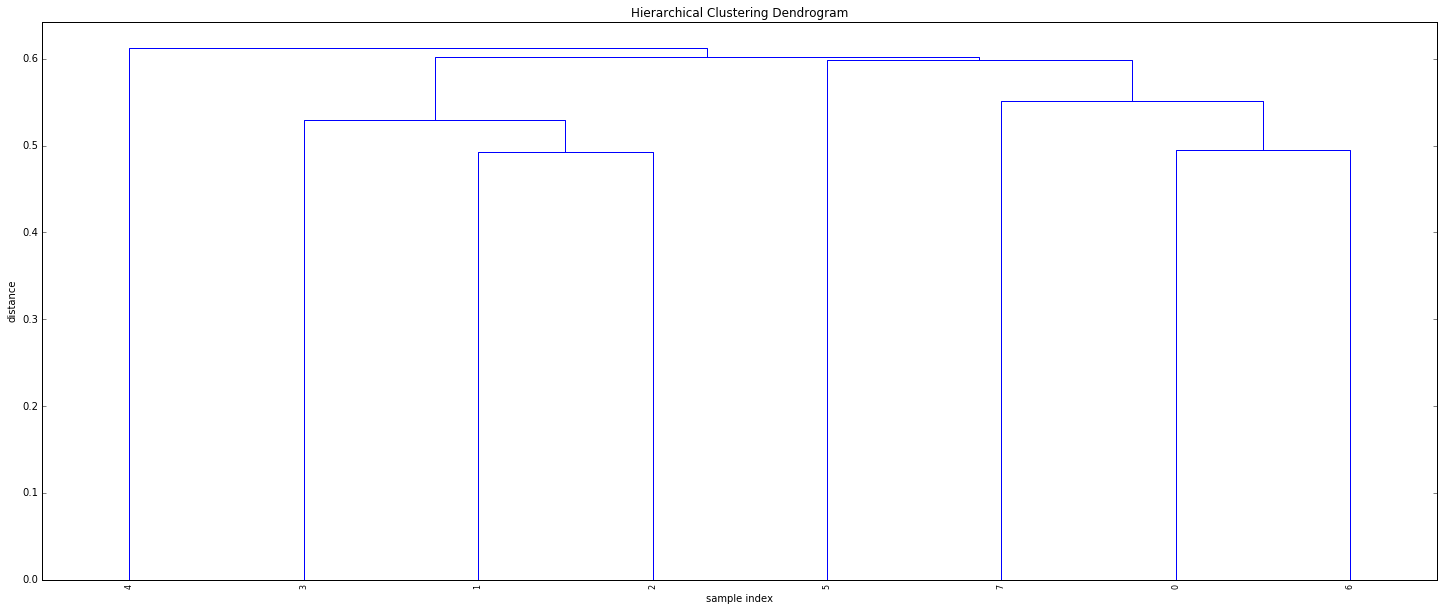

0: prized

1: used

2: reserved

3: restricted

4: skilled

5: stressed

6: intertwined

7: outdated

(7, 100)


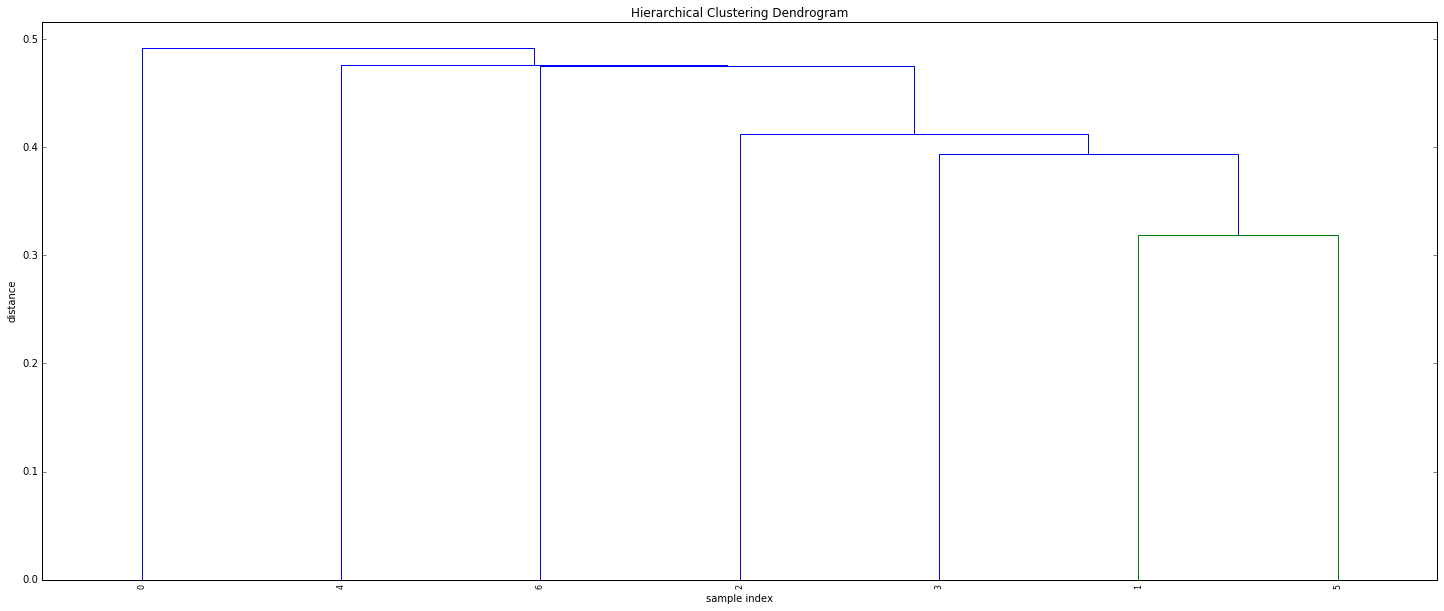

0: knitting

1: dancing

2: performing

3: playing

4: swing

5: singing

6: drawing

(42, 100)


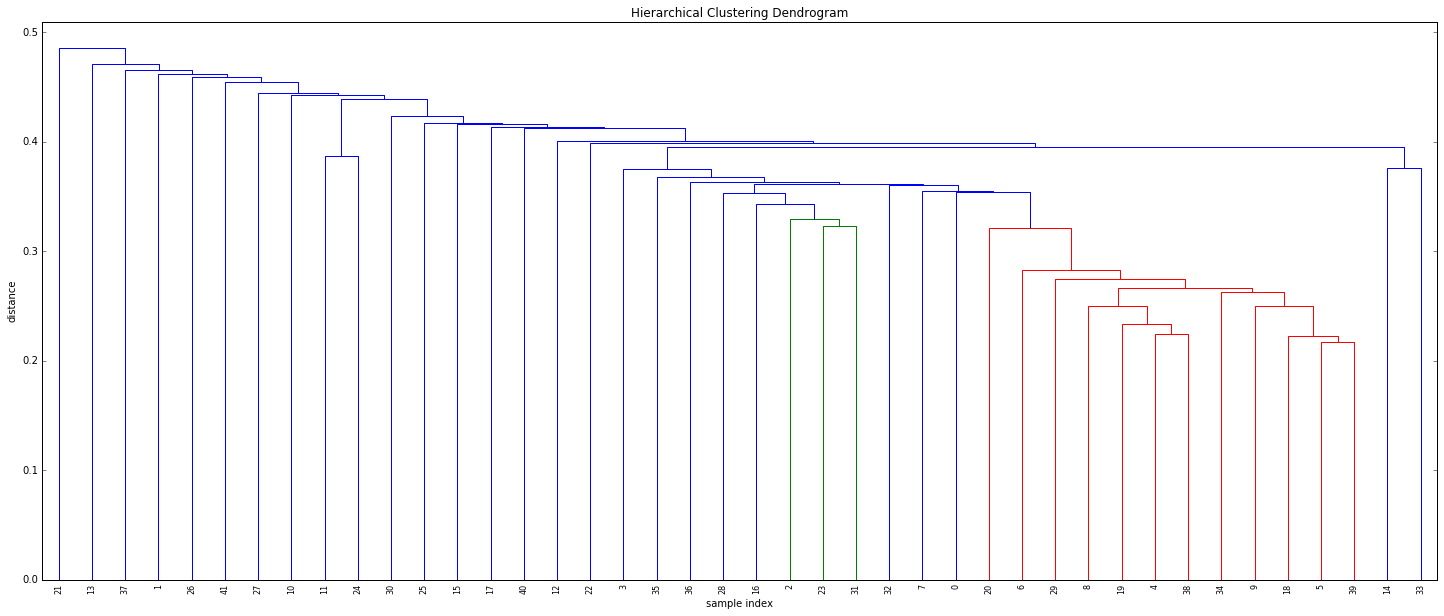

0: trio

1: choreography

2: dance

3: slap

4: trombone

5: violin

6: clarinet

7: rhythm

8: trumpet

9: bass

10: jig

11: mix

12: trance

13: label

14: instrument

15: kimono

16: music

17: embroidery

18: piano

19: banjo

20: harp

21: hip

22: surreal

23: jazz

24: hop

25: colorful

26: signature

27: rhyme

28: improvisation

29: guitar

30: band

31: pop

32: brass

33: sound

34: drum

35: duo

36: metal

37: choir

38: saxophone

39: cello

40: rock

41: piece

(8, 100)


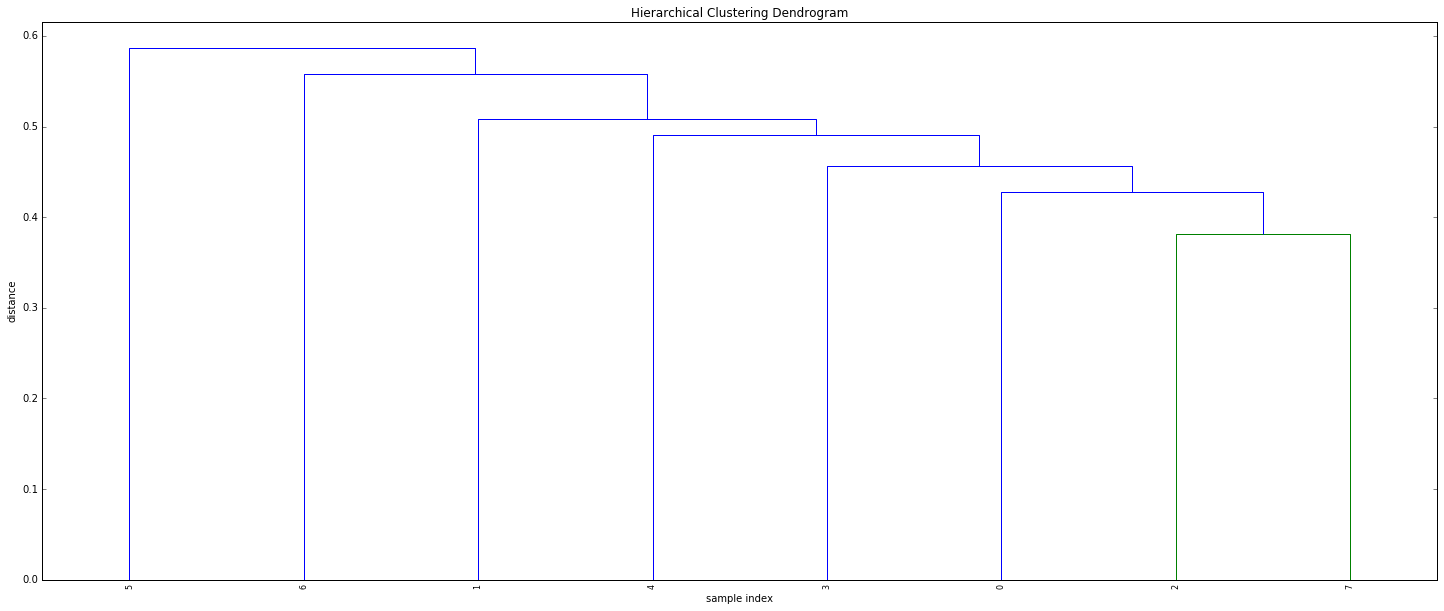

0: solo

1: vaudeville

2: fender

3: rhyme

4: pen

5: rock

6: intricate

7: trumpet

(22, 100)


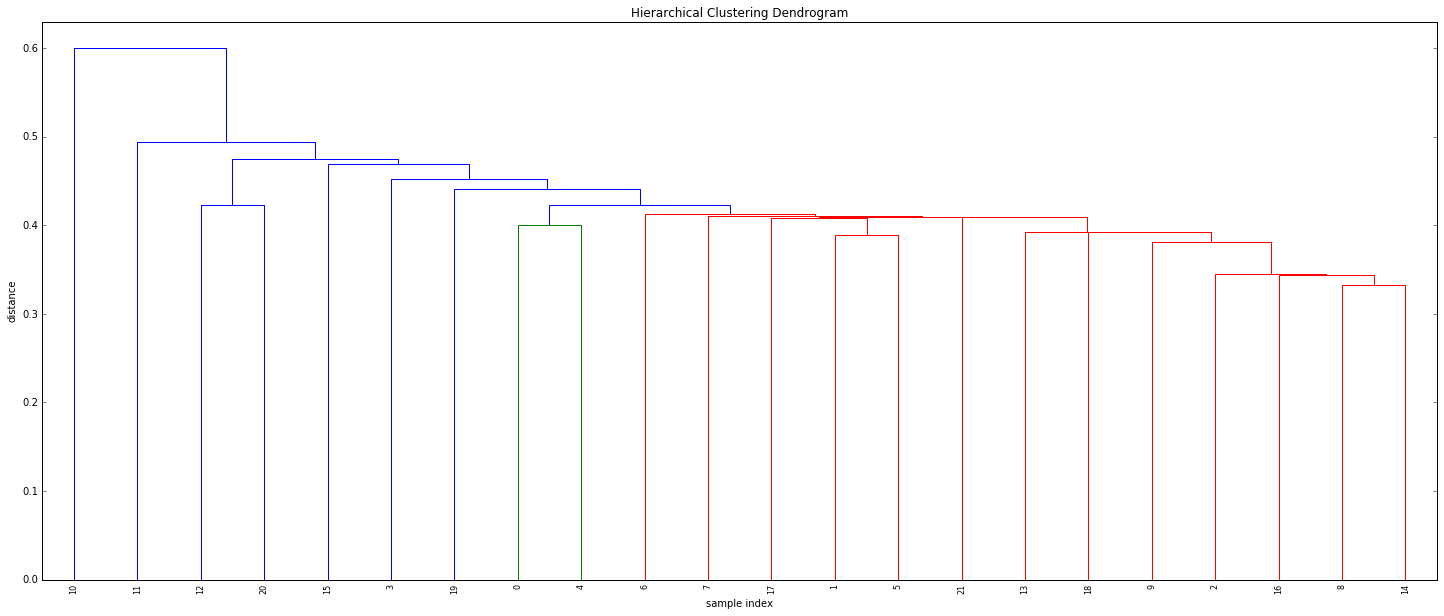

0: decorative

1: melodic

2: horn

3: lavish

4: ornate

5: expressive

6: acrobatic

7: tasteful

8: orchestra

9: tuba

10: label

11: pen

12: hip

13: colorful

14: flute

15: rhyme

16: lute

17: minimalist

18: fiddle

19: stereotypical

20: loud

21: musical

(14, 100)


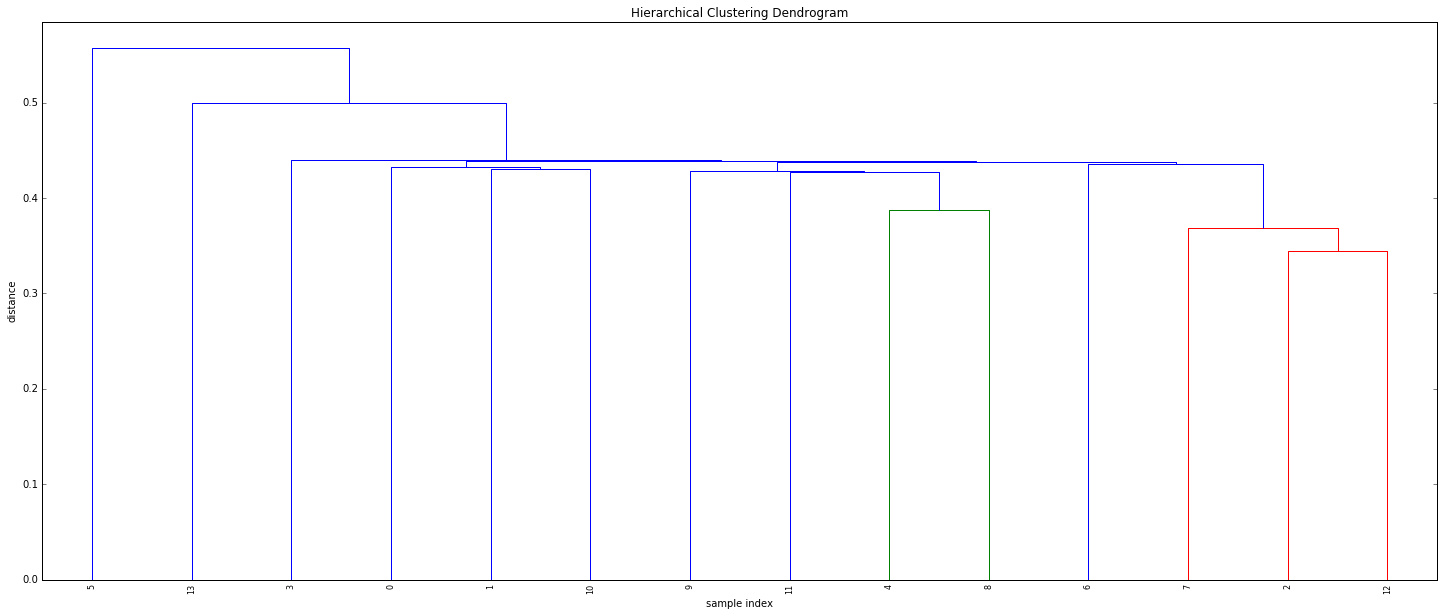

0: bars

1: reeds

2: songs

3: bagpipes

4: dancers

5: rhymes

6: pieces

7: tracks

8: musicians

9: drums

10: instruments

11: blues

12: voices

13: bells

(42, 100)


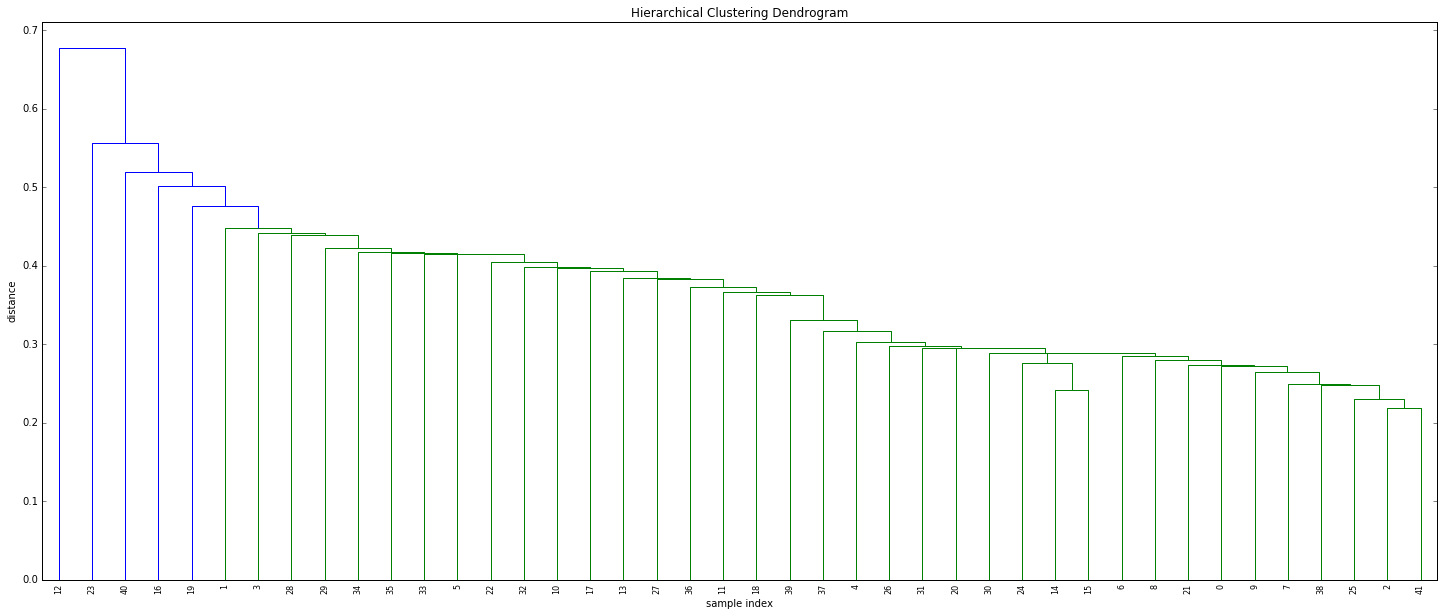

0: thomas

1: footnote

2: herbert

3: bacon

4: horace

5: preface

6: paul

7: peter

8: george

9: sir

10: grimm

11: andersen

12: candlelight

13: tutu

14: matthew

15: daniel

16: swift

17: shakespeare

18: isaac

19: lecture

20: john

21: benjamin

22: foreword

23: clerk

24: samuel

25: andrew

26: gardner

27: steinbeck

28: mill

29: reprint

30: dr

31: milton

32: stoker

33: publisher

34: seuss

35: j

36: lancelot

37: david

38: arthur

39: adam

40: wold

41: martin

(4, 100)


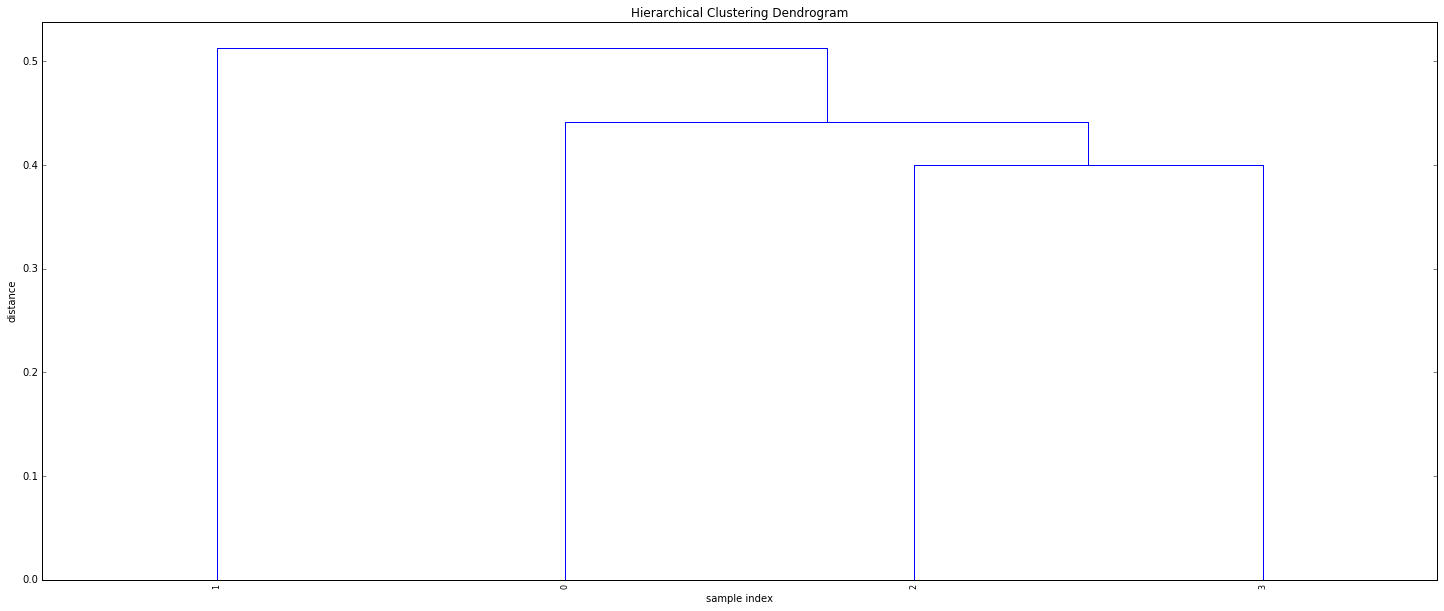

0: routledge

1: chick

2: carroll

3: george

(7, 100)


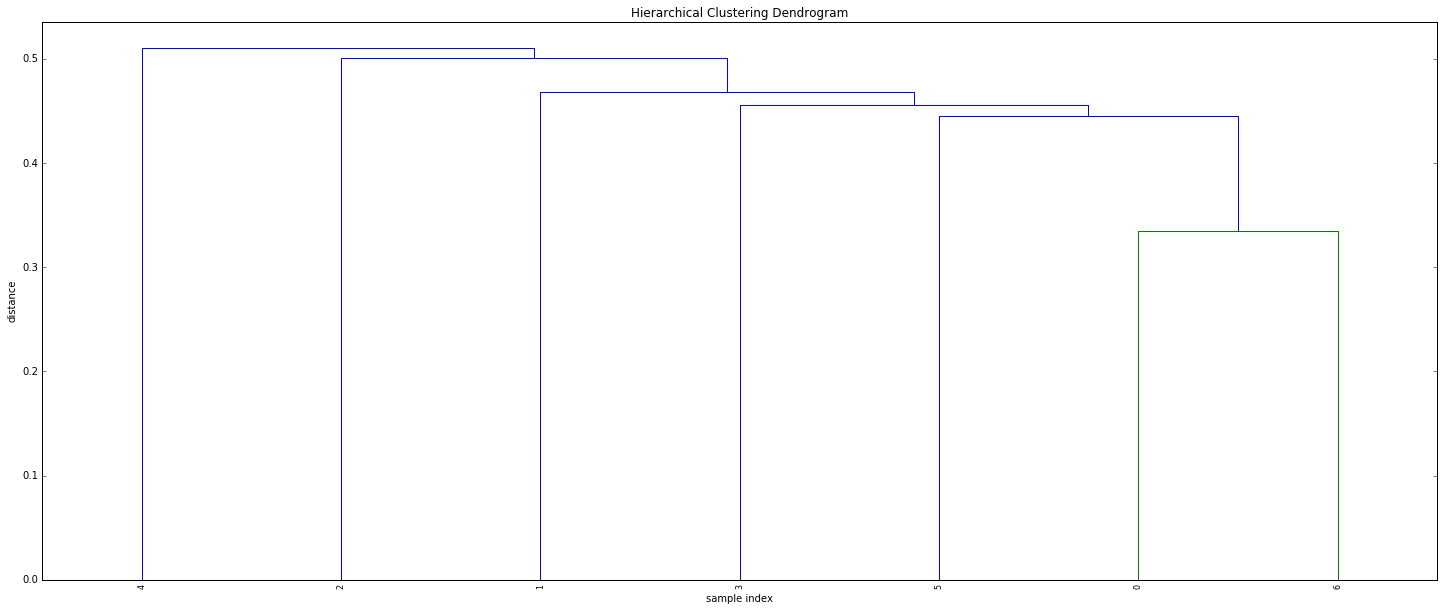

0: benjamin

1: andersen

2: pilgrim

3: locke

4: author

5: franklin

6: dr

(3, 100)


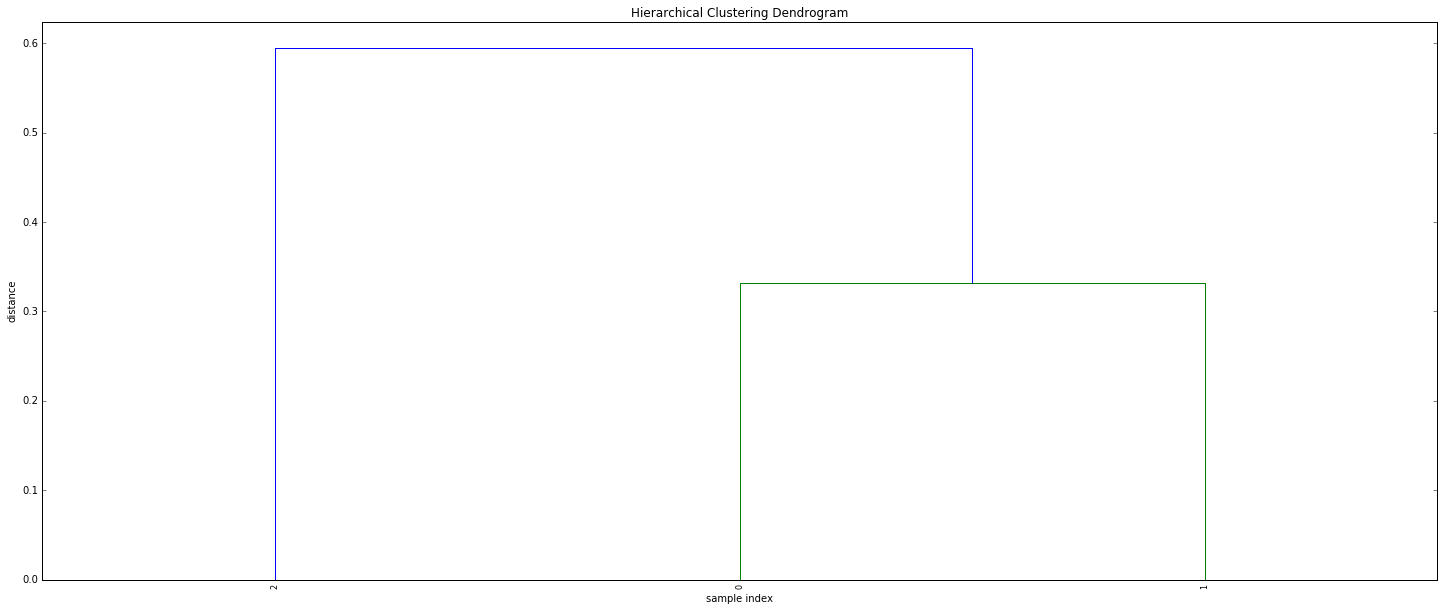

0: james

1: charles

2: bangs

(19, 100)


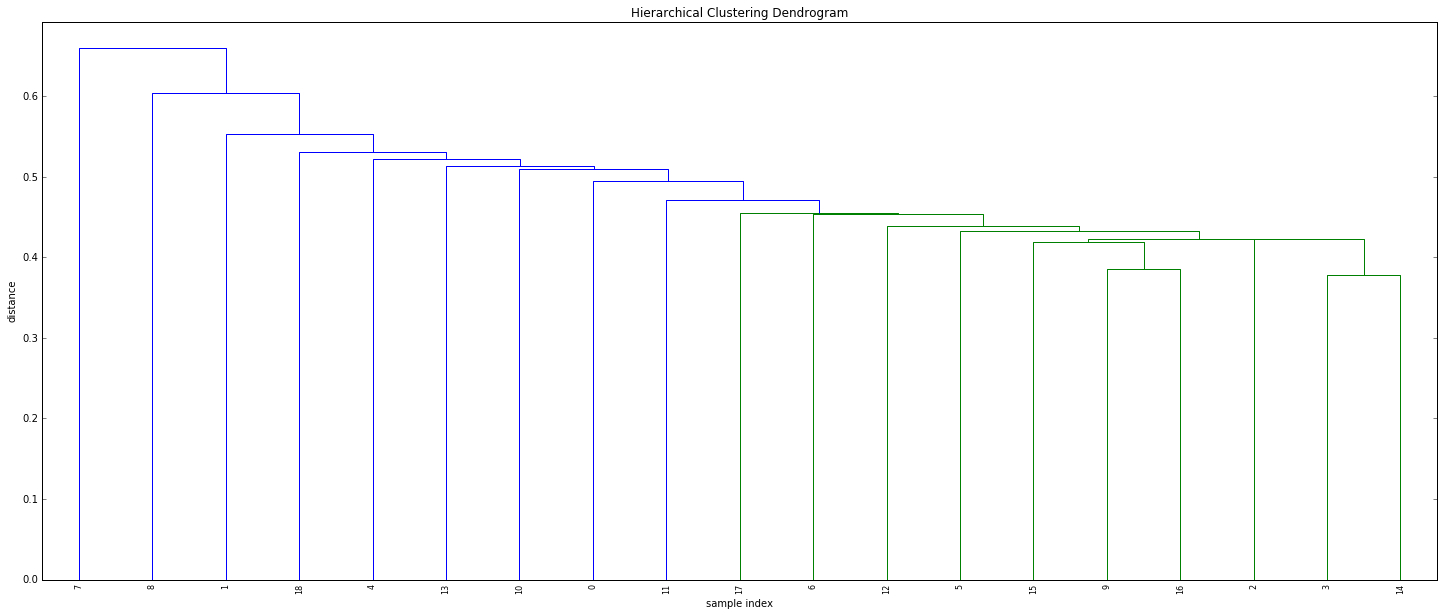

0: information

1: search

2: resource

3: dictionary

4: reference

5: index

6: photo

7: image

8: list

9: yahoo

10: library

11: chart

12: magazine

13: map

14: overview

15: newspaper

16: news

17: page

18: history

(3, 100)


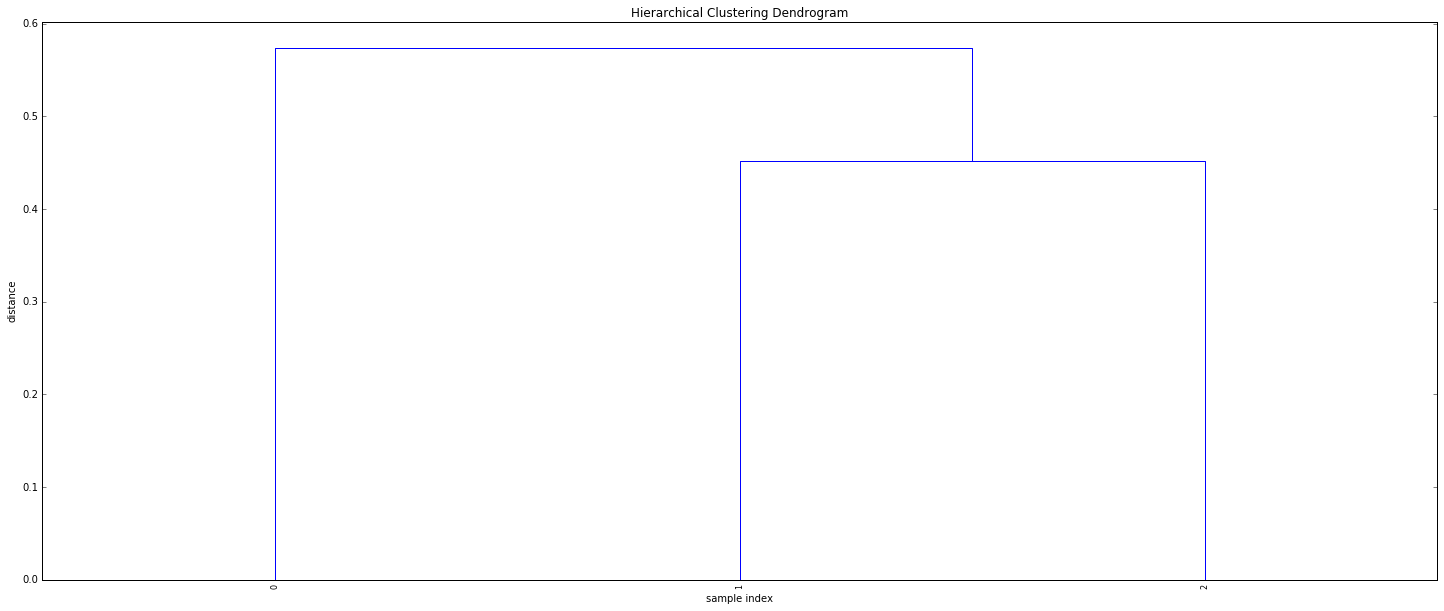

0: review

1: forum

2: chat

(15, 100)


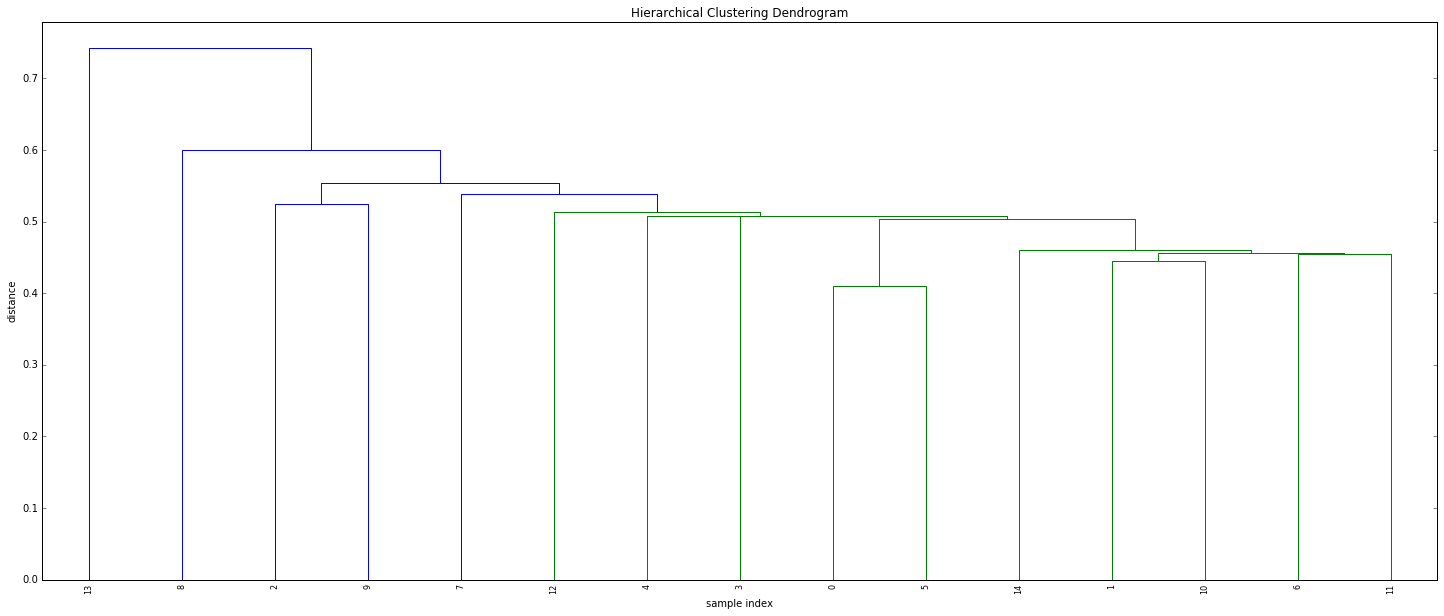

0: detailed

1: web

2: alphabetical

3: miscellaneous

4: library

5: summary

6: profile

7: daily

8: uk

9: atlas

10: portal

11: net

12: document

13: open

14: guide

(5, 100)


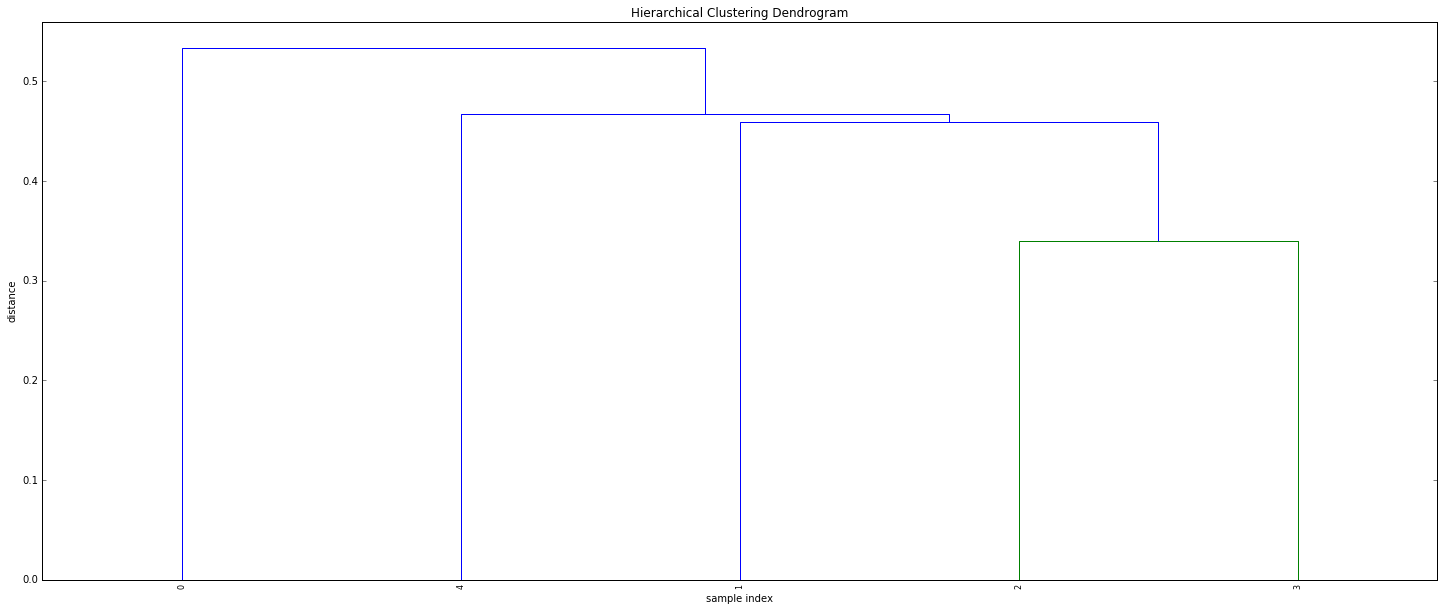

0: media

1: maps

2: articles

3: pages

4: guides

(12, 100)


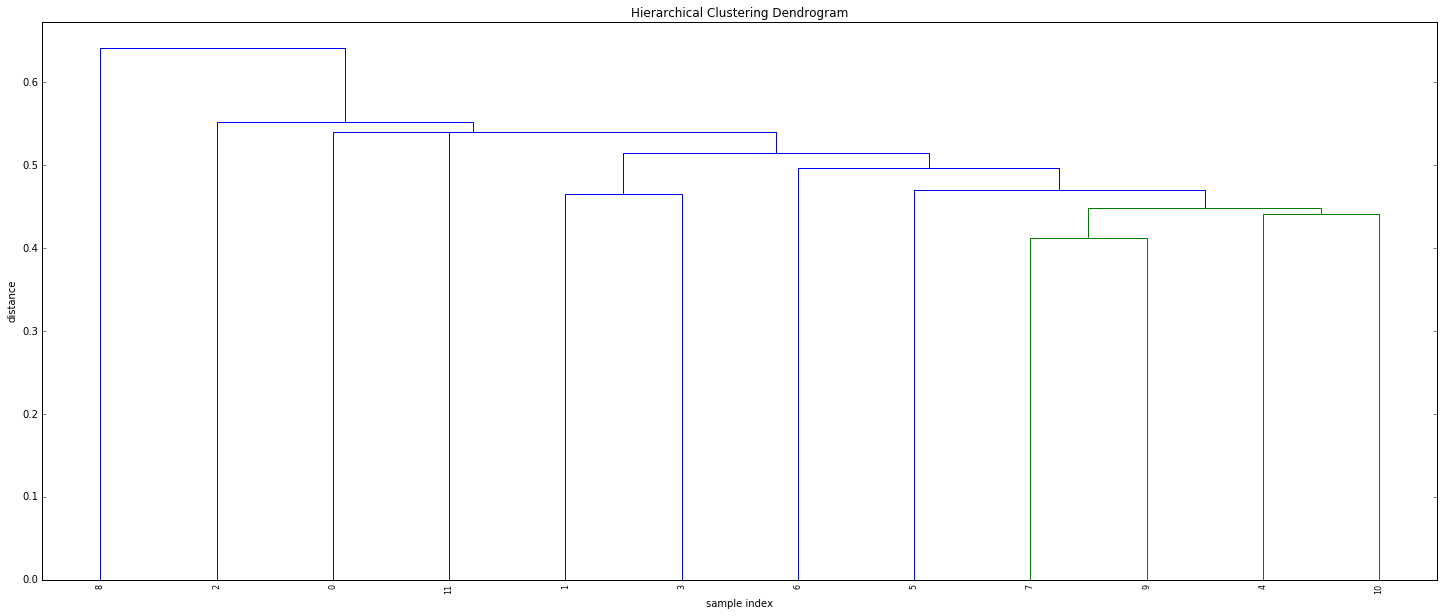

0: disarray

1: disgrace

2: gentry

3: beg

4: peron

5: puppet

6: sepoy

7: diem

8: hothouse

9: gurkha

10: cossack

11: robber

(6, 100)


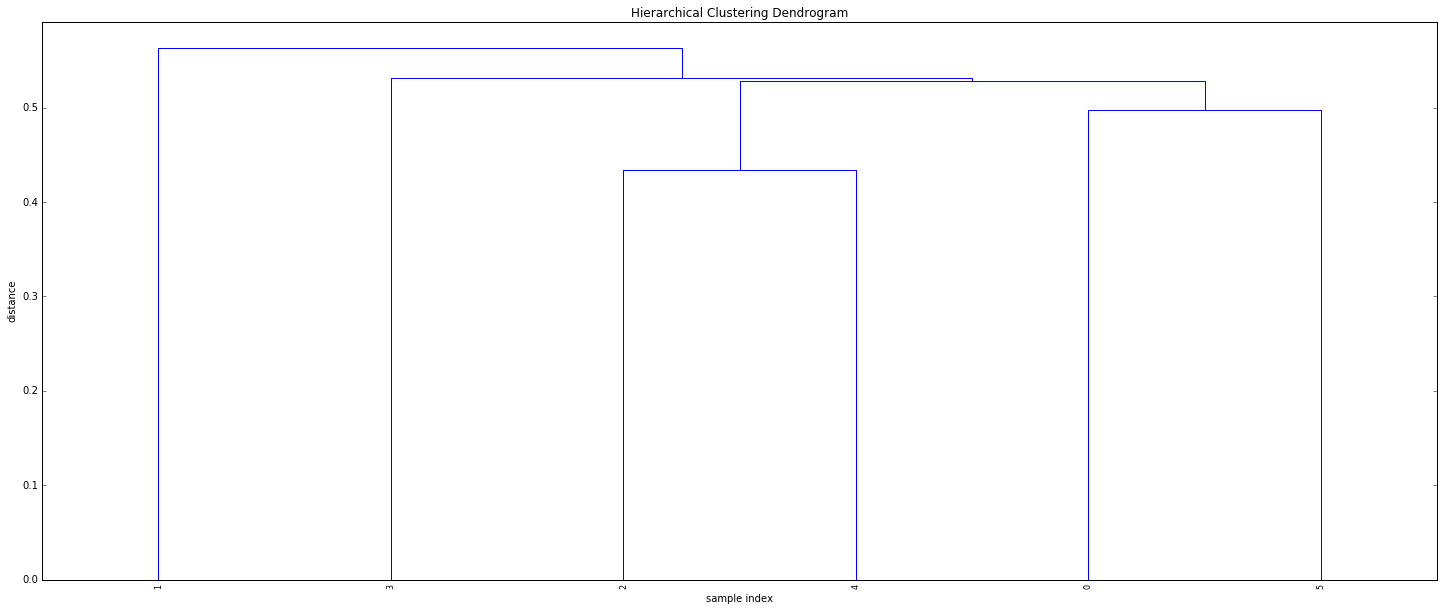

0: insignia

1: shaky

2: weary

3: mercenary

4: turk

5: quartered

(3, 100)


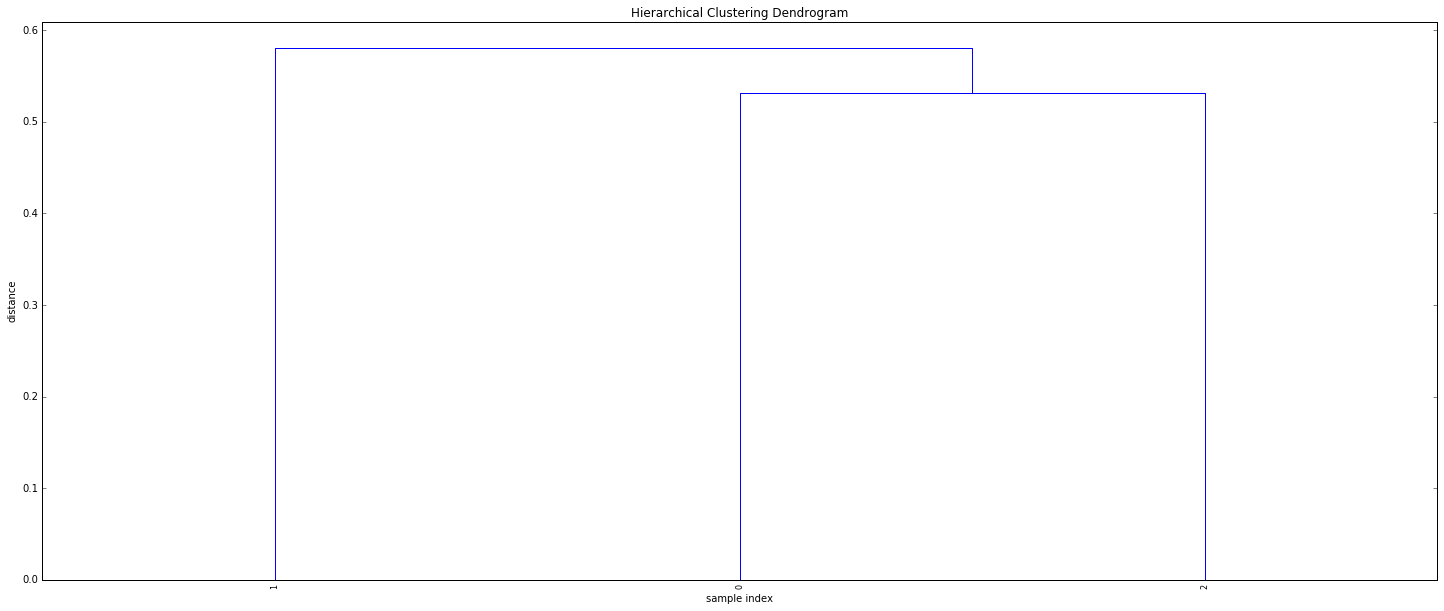

0: lictors

1: villagers

2: thrones

(5, 100)


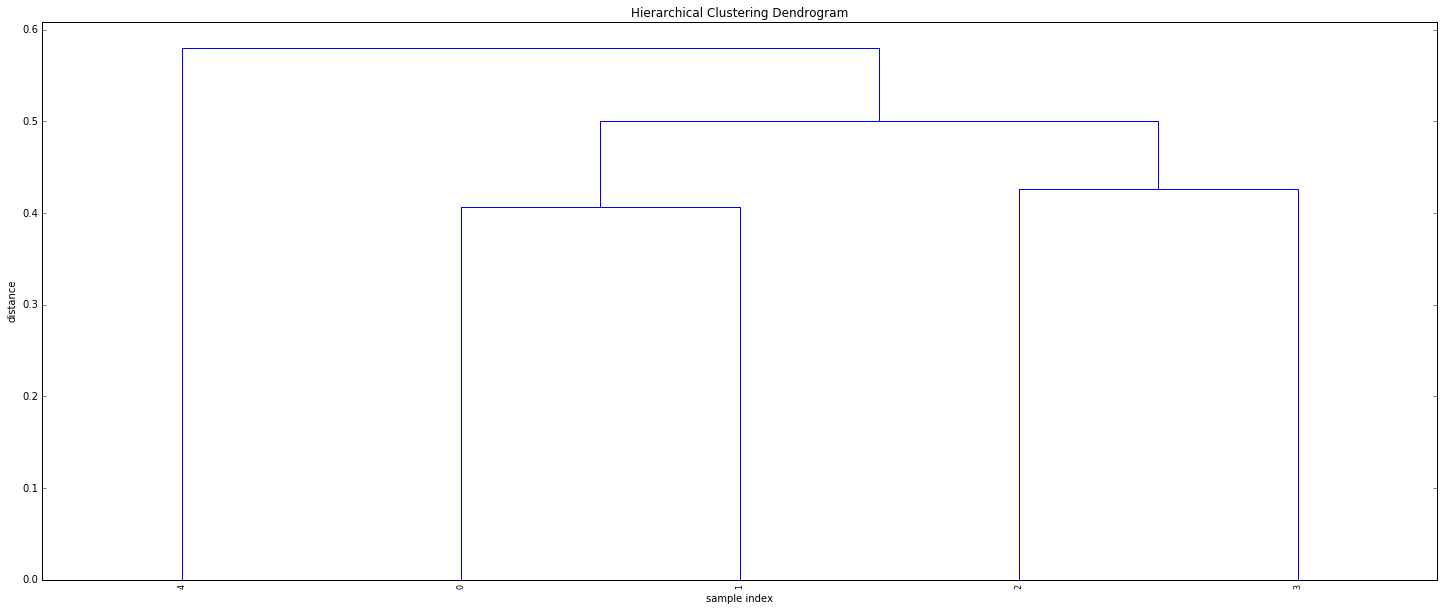

0: anatomy

1: taxonomy

2: mice

3: insect

4: multitude

(7, 100)


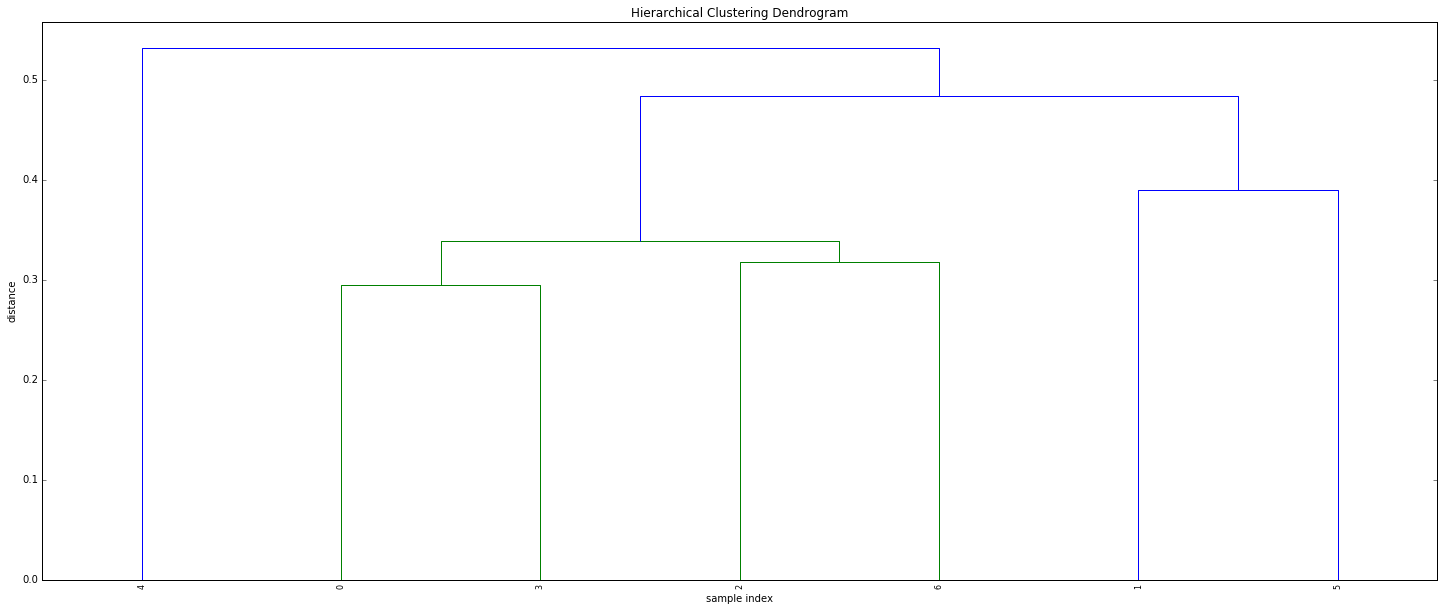

0: animals

1: interactions

2: mammals

3: humans

4: spheres

5: traits

6: species

(10, 100)


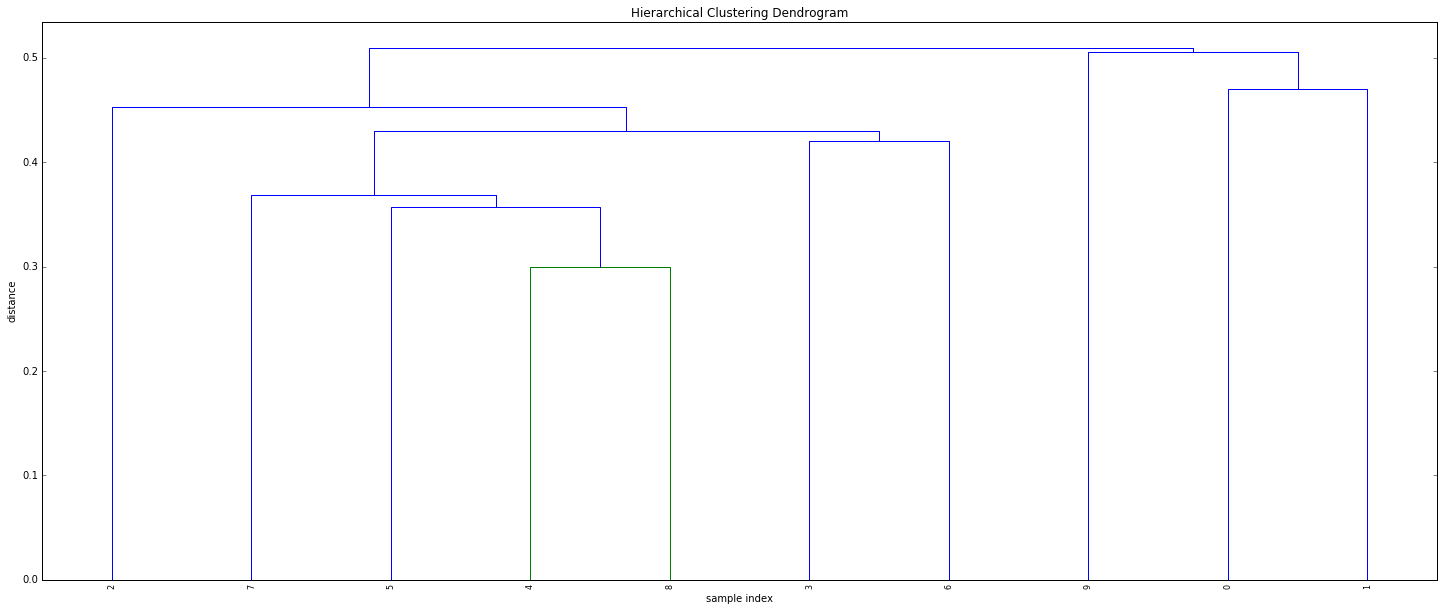

0: primitive

1: natural

2: human

3: animal

4: skeletal

5: symbiotic

6: artificial

7: anatomical

8: facial

9: characteristic

(15, 100)


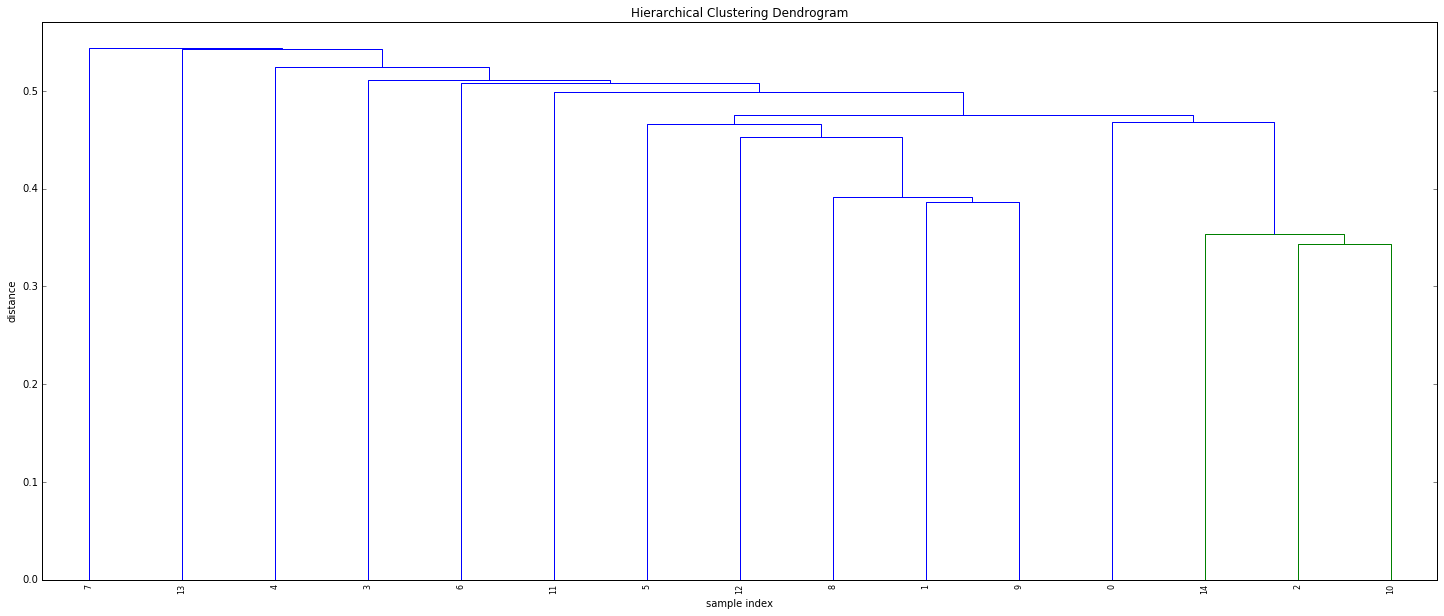

0: abundance

1: substance

2: diversity

3: animal

4: variety

5: material

6: stem

7: maturation

8: pure

9: tissue

10: ecology

11: mature

12: interaction

13: categorization

14: physiology

(6, 100)


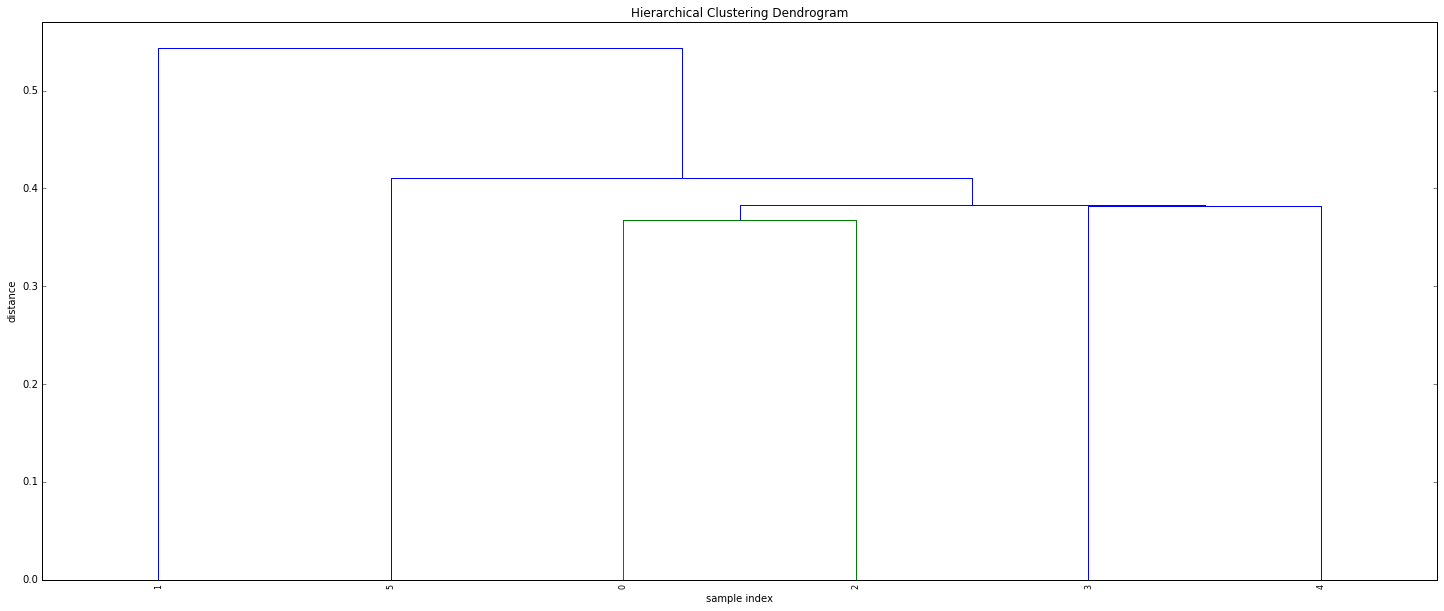

0: watching

1: greeting

2: talking

3: laughing

4: crying

5: wedding

(42, 100)


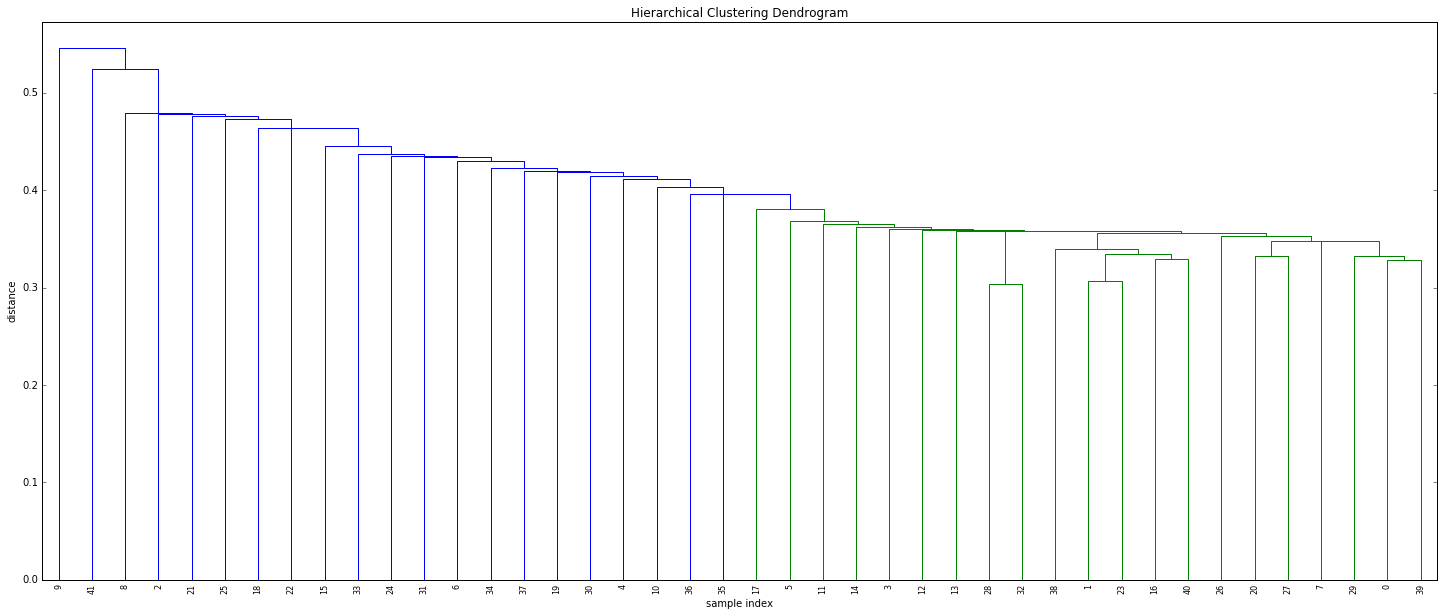

0: detective

1: crazy

2: tough

3: merry

4: spear

5: sad

6: farewell

7: costume

8: grateful

9: gossip

10: salesman

11: whip

12: chase

13: funny

14: teddy

15: angry

16: hey

17: couch

18: astonishment

19: spike

20: bunny

21: gamble

22: nice

23: lucky

24: delight

25: lunch

26: mad

27: mom

28: baby

29: magician

30: grim

31: handsome

32: boy

33: rush

34: whistle

35: knight

36: nude

37: favorite

38: hungry

39: clown

40: goodbye

41: scare

(86, 100)


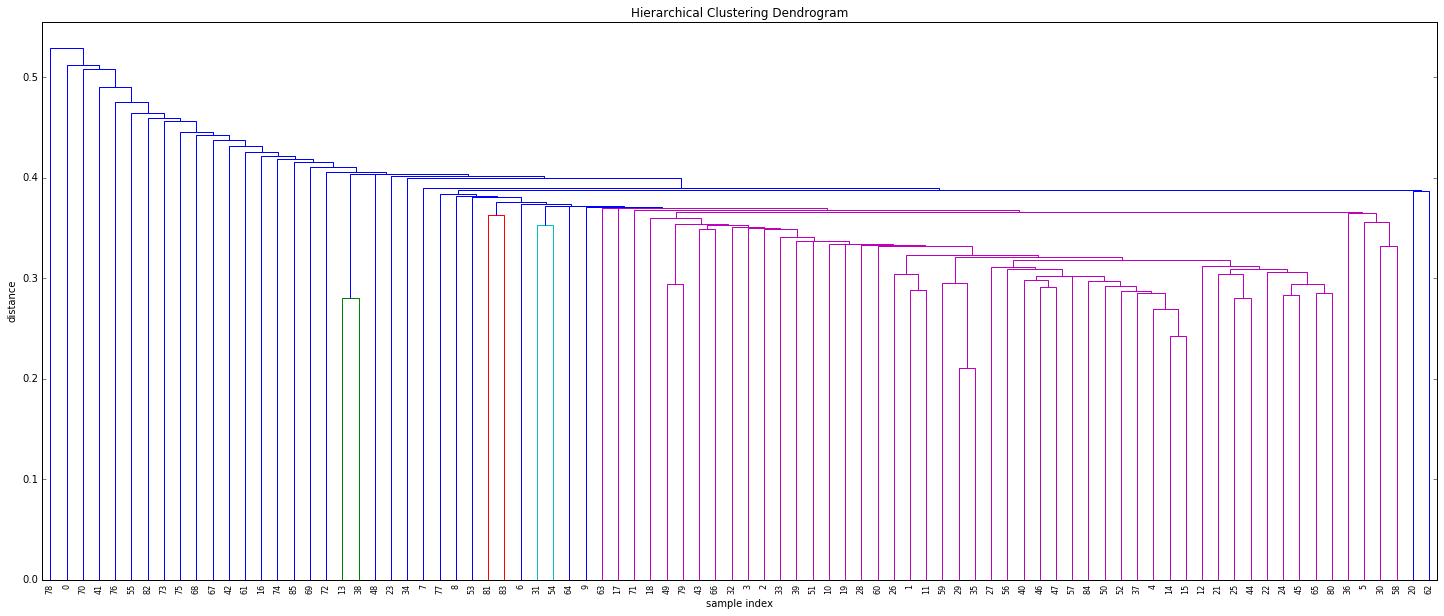

0: shop

1: kiss

2: granny

3: captain

4: mister

5: brood

6: shout

7: cub

8: farmer

9: crimson

10: smile

11: fool

12: hunter

13: lunch

14: mom

15: dad

16: stunt

17: cage

18: catcher

19: policeman

20: hunt

21: alice

22: joker

23: sang

24: guy

25: joey

26: cry

27: doll

28: thief

29: girl

30: whip

31: gentleman

32: mate

33: pirate

34: peel

35: boy

36: waiter

37: slayer

38: dinner

39: oz

40: daisy

41: blind

42: teenage

43: spear

44: rachel

45: sailor

46: duck

47: blonde

48: tomorrow

49: hood

50: monkey

51: teddy

52: cinderella

53: fry

54: teenager

55: penny

56: grandpa

57: rabbit

58: butt

59: baby

60: crane

61: apprentice

62: rush

63: rage

64: dirty

65: mr

66: beard

67: penthouse

68: spy

69: performer

70: trump

71: circus

72: ruth

73: mock

74: phoenix

75: fireman

76: rehearsal

77: charm

78: nickname

79: cliff

80: mrs

81: daredevil

82: spectator

83: dream

84: scream

85: howl

(7, 100)


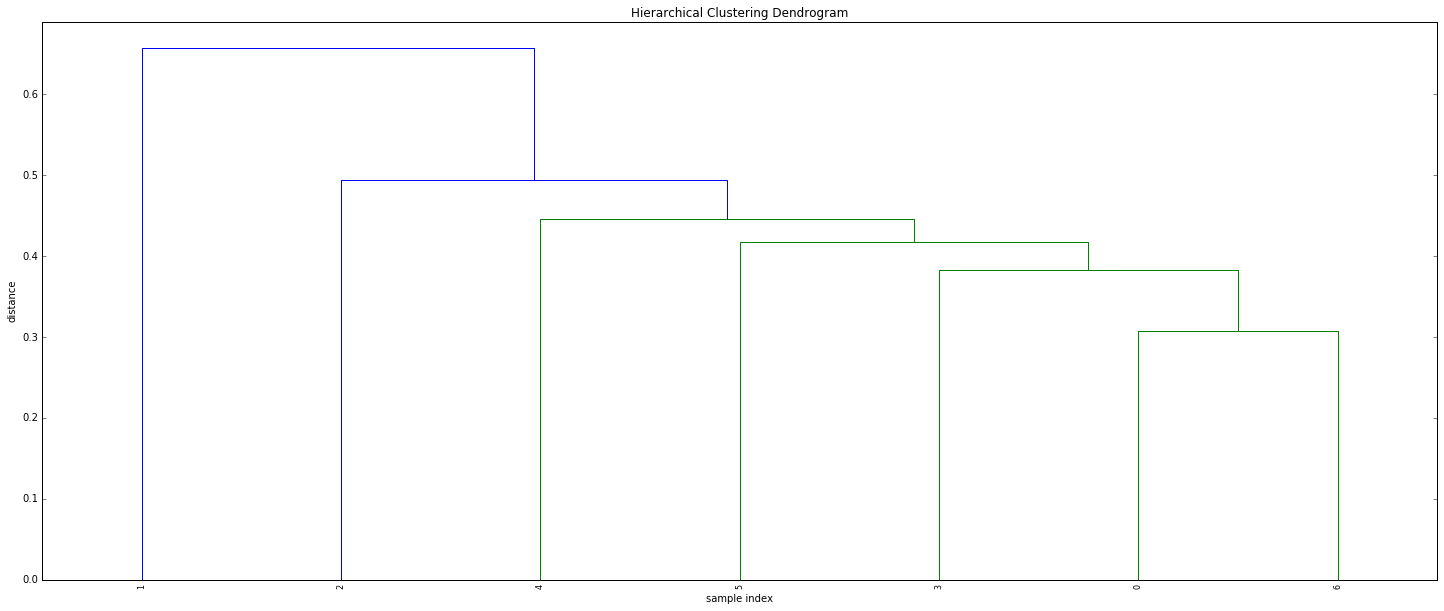

0: boy

1: caged

2: delight

3: maid

4: woo

5: hood

6: kid

(16, 100)


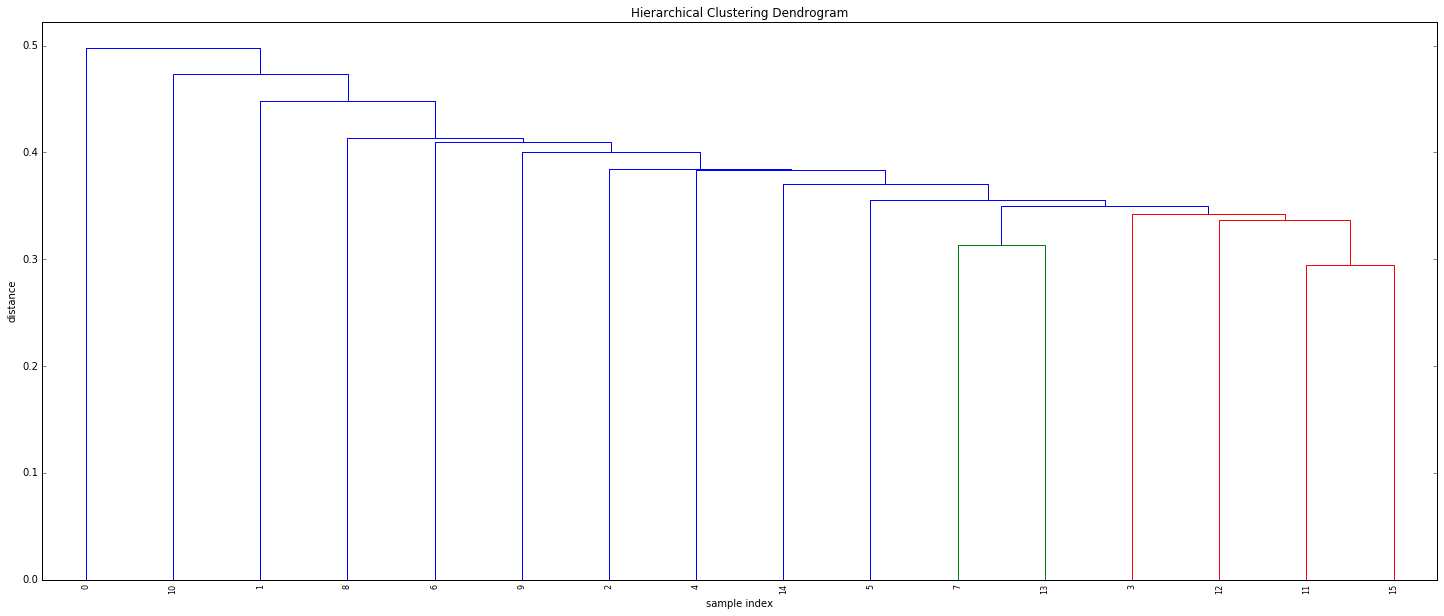

0: duel

1: brave

2: teddy

3: crow

4: cry

5: spider

6: alice

7: mama

8: cheer

9: merry

10: fake

11: baby

12: blonde

13: daddy

14: cage

15: girl

(10, 100)


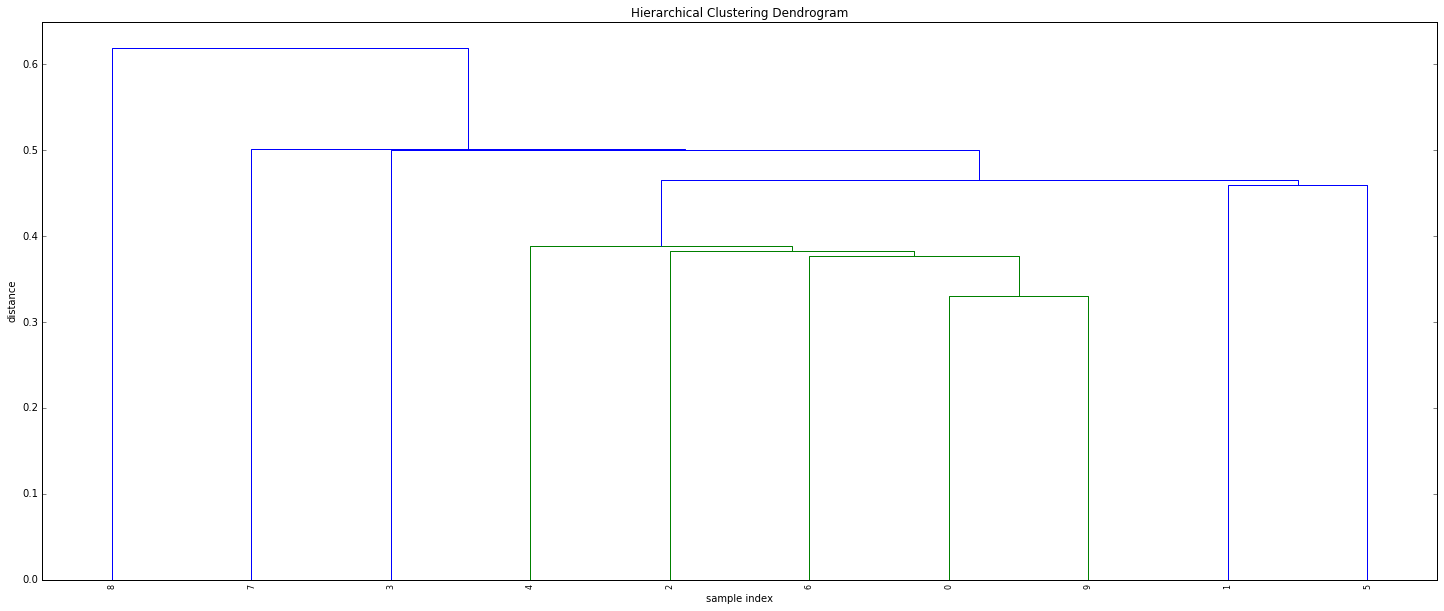

0: lonely

1: alice

2: ugly

3: archer

4: silly

5: dolly

6: pretty

7: bounty

8: usher

9: lovely

(14, 100)


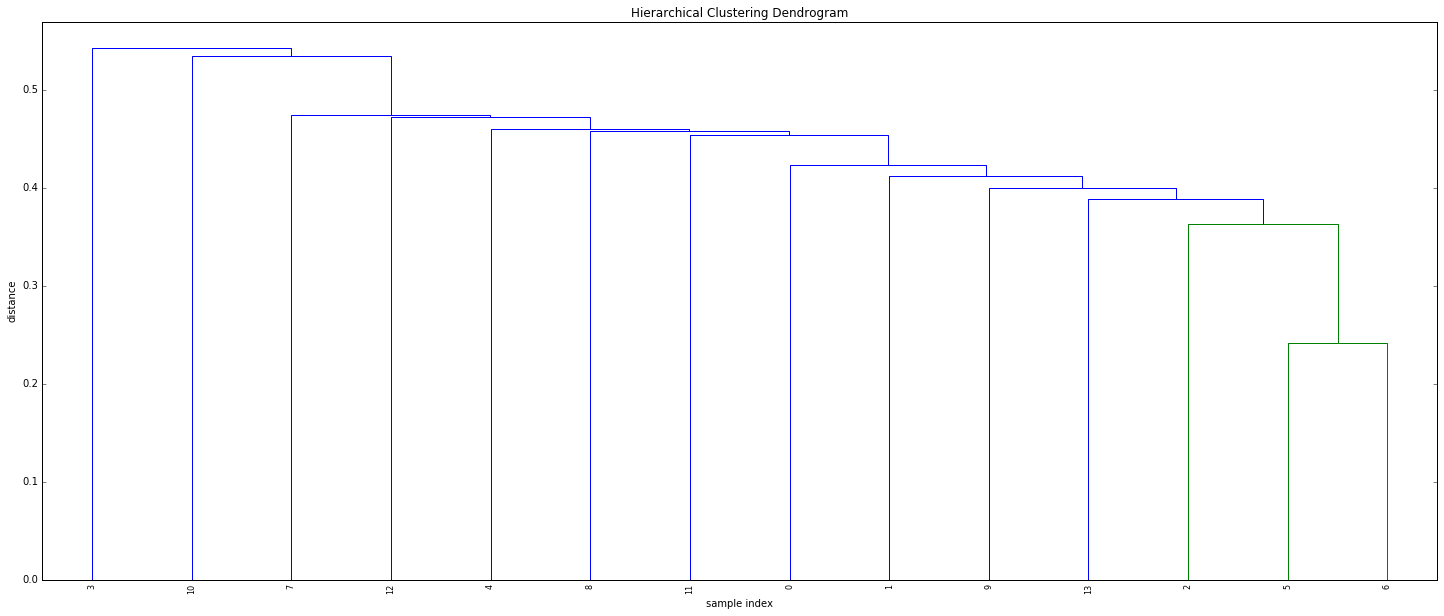

0: clowns

1: ladies

2: kids

3: fawkes

4: fairies

5: girls

6: boys

7: thieves

8: mighty

9: likes

10: scouts

11: hearts

12: spears

13: kid

(44, 100)


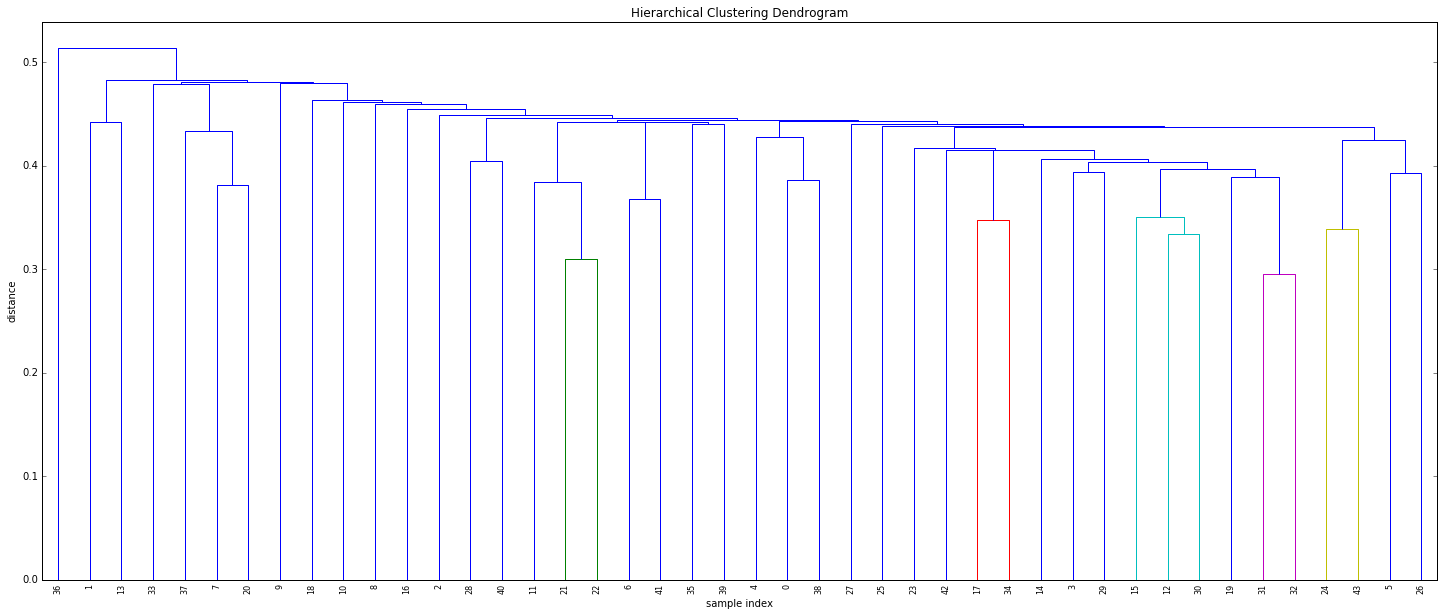

0: discontent

1: camp

2: force

3: militia

4: brutality

5: confrontation

6: resistance

7: bloody

8: protest

9: revolution

10: battle

11: aggression

12: occupation

13: riot

14: army

15: rebellion

16: liberation

17: attack

18: hitler

19: overthrow

20: terror

21: genocide

22: terrorism

23: war

24: conflict

25: mobilization

26: clash

27: boer

28: domination

29: rebel

30: invasion

31: surrender

32: retreat

33: destruction

34: enemy

35: warfare

36: counter

37: violent

38: strife

39: wwii

40: superiority

41: threat

42: truce

43: struggle

(4, 100)


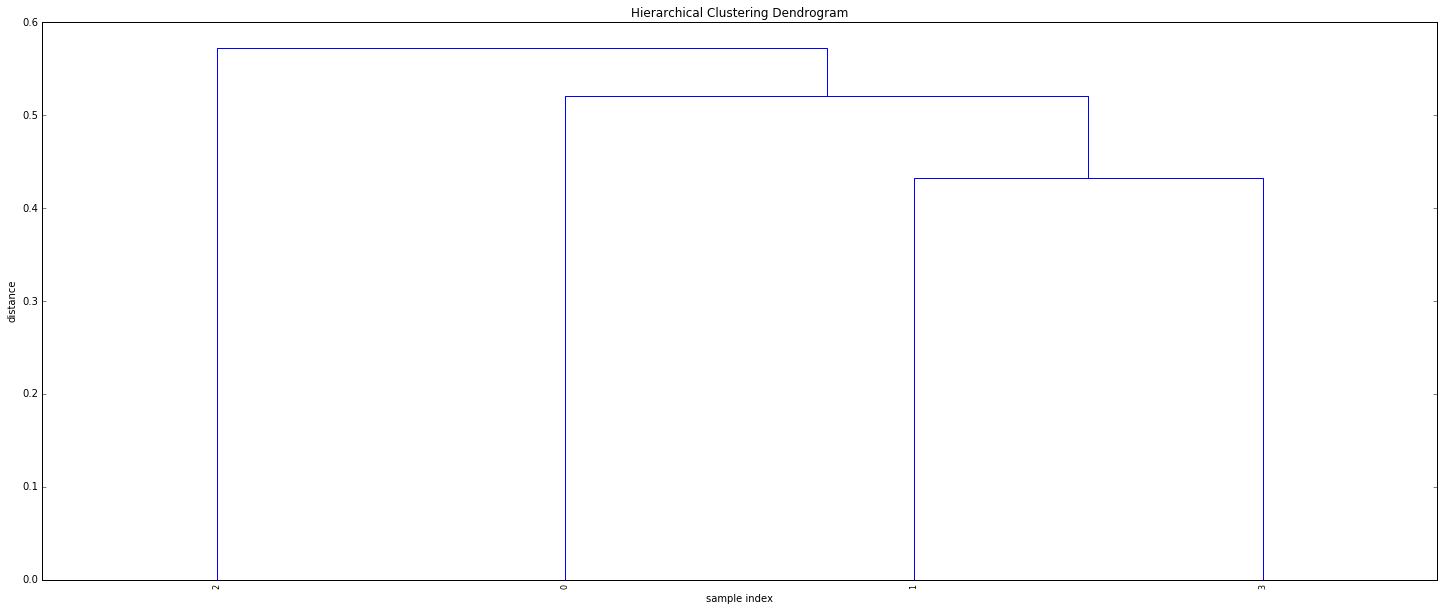

0: blockade

1: fought

2: bloodshed

3: fight

(15, 100)


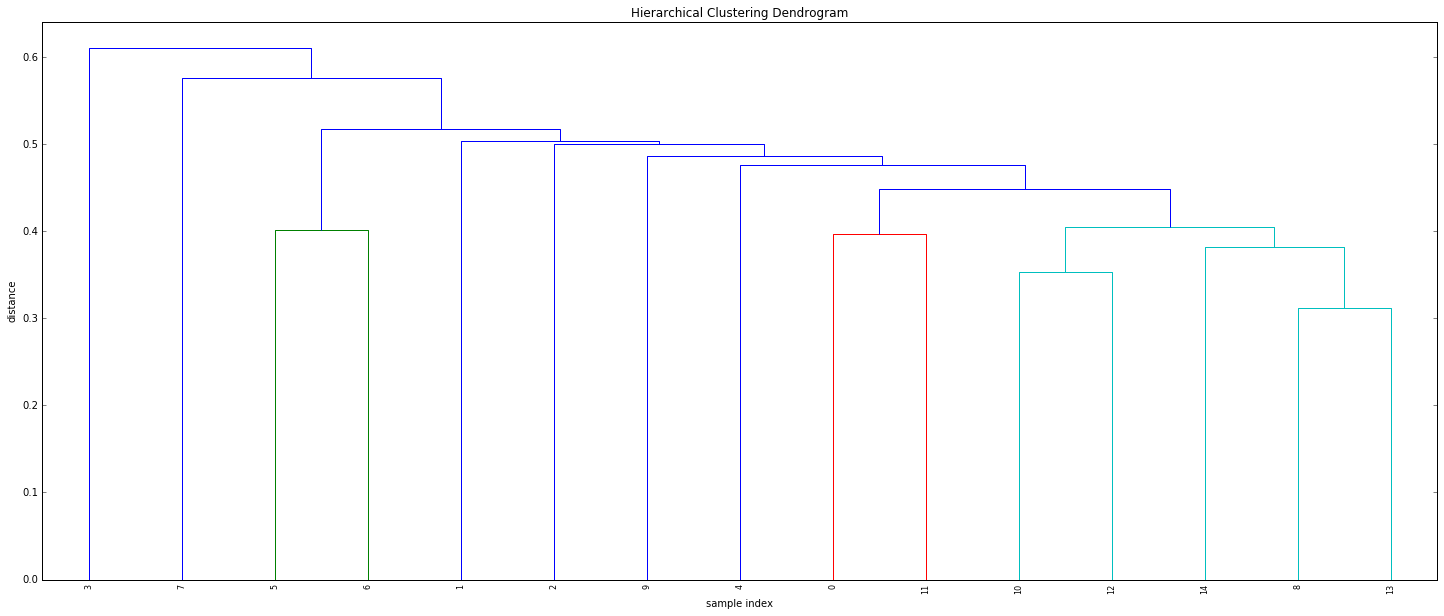

0: civilian

1: civil

2: offensive

3: camp

4: boer

5: brutal

6: fierce

7: tsunami

8: ussr

9: defeat

10: russian

11: military

12: soviet

13: russia

14: vietnam

(6, 100)


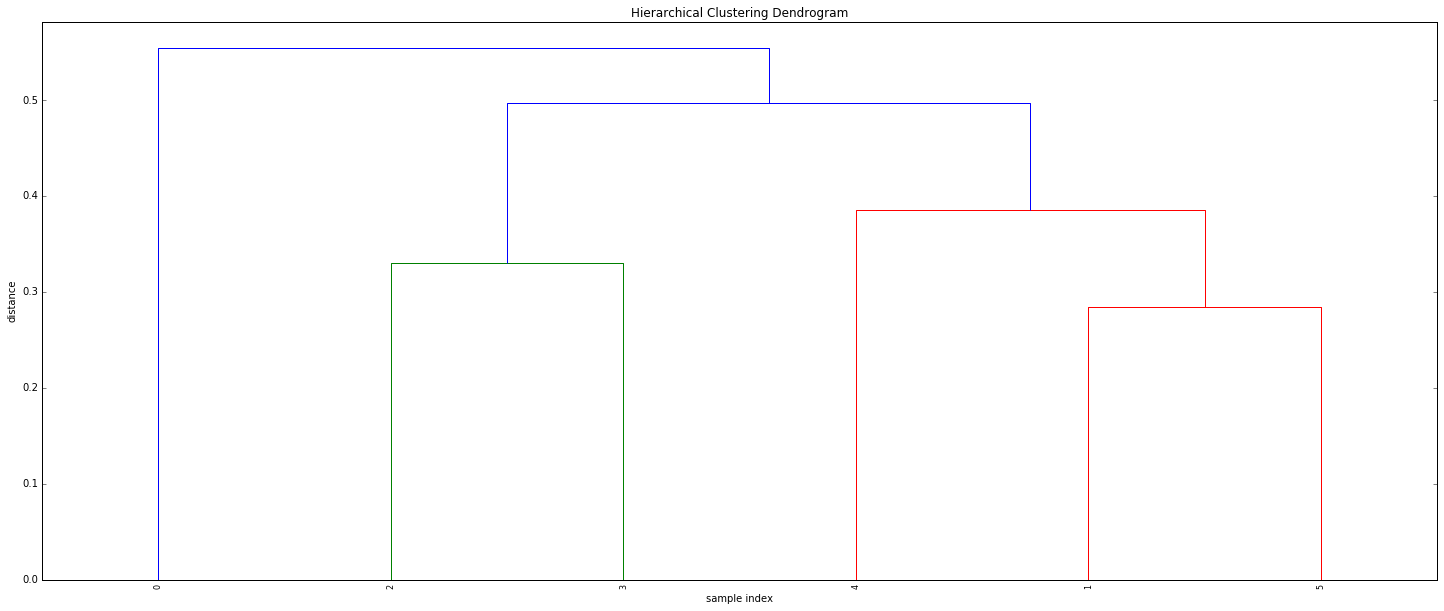

0: tactics

1: troops

2: wars

3: battles

4: guards

5: soldiers

(4, 100)


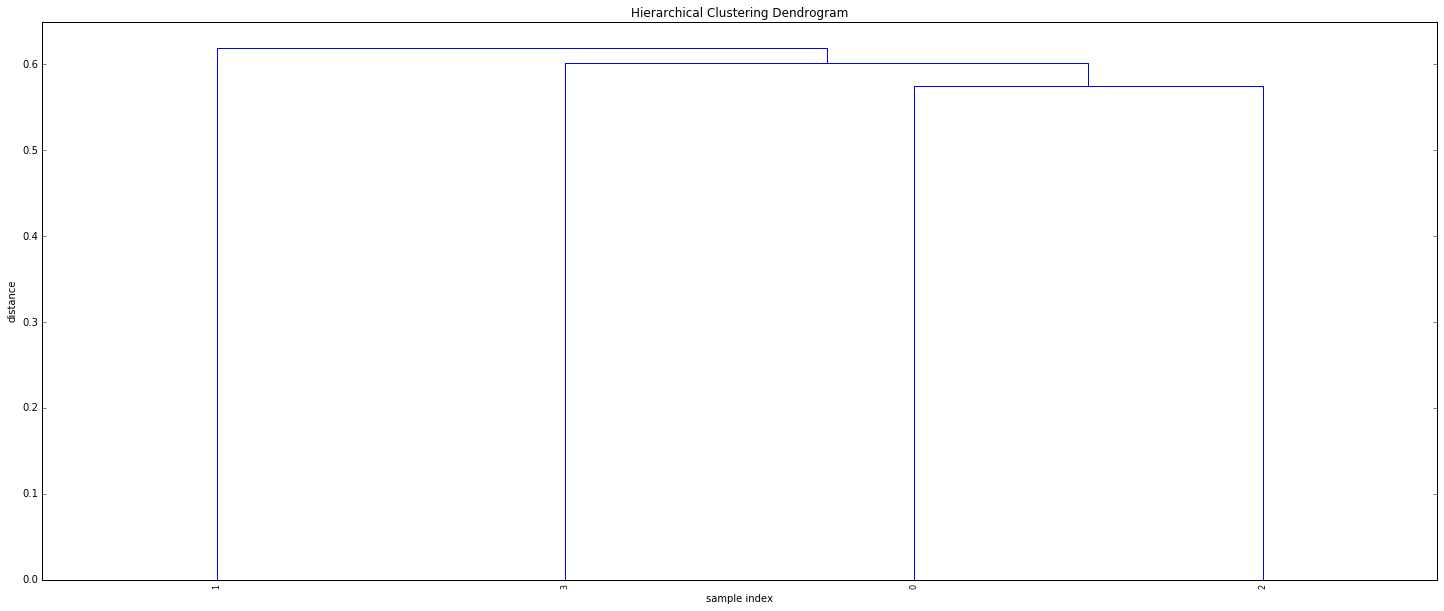

0: evening

1: beginning

2: opening

3: ending

(19, 100)


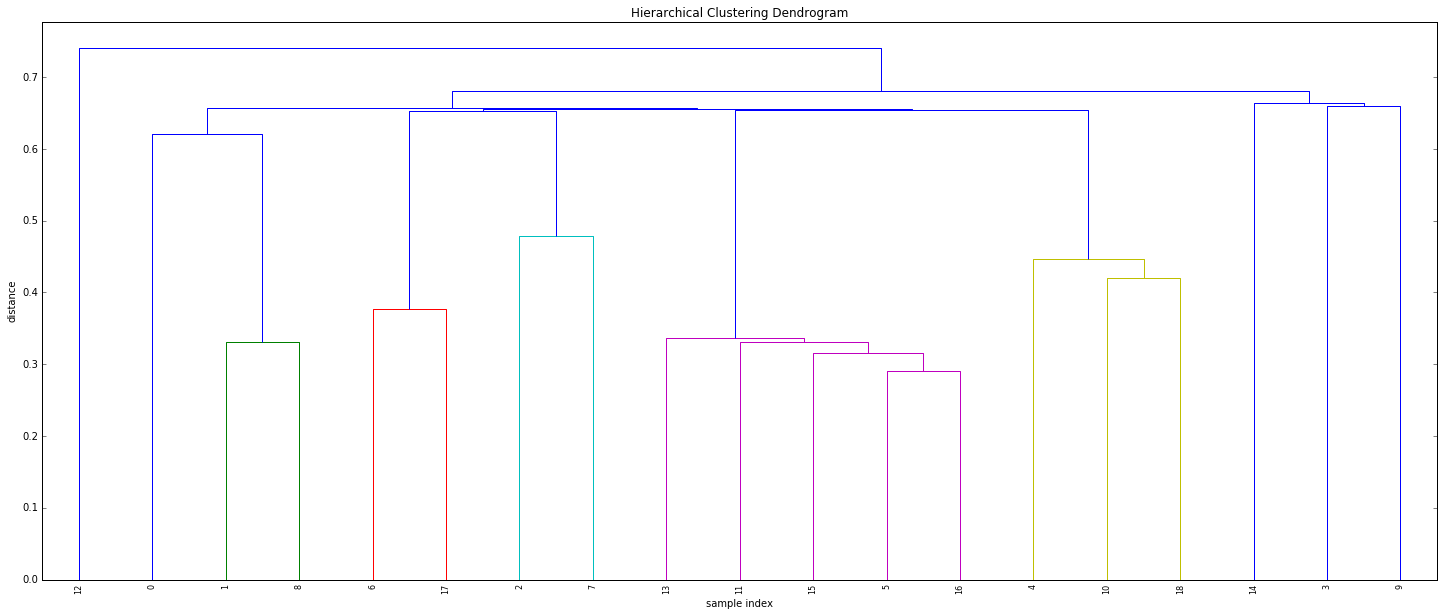

0: pre

1: late

2: short

3: old

4: last

5: ten

6: holiday

7: brief

8: early

9: middle

10: second

11: eighteen

12: formative

13: thirteen

14: new

15: sixteen

16: fifteen

17: christmas

18: first

(36, 100)


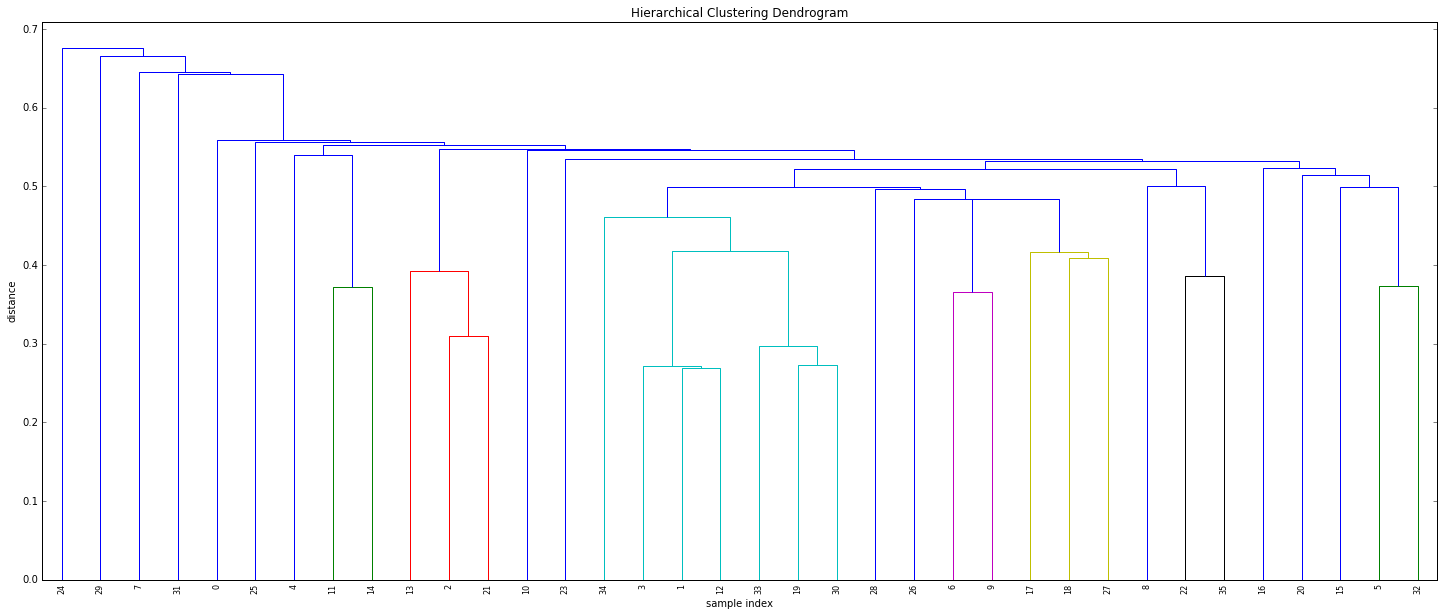

0: pre

1: summer

2: twelve

3: spring

4: fall

5: period

6: month

7: past

8: middle

9: year

10: marking

11: end

12: winter

13: seventy

14: start

15: epoch

16: cycle

17: easter

18: christmas

19: afternoon

20: time

21: fourteen

22: half

23: date

24: world

25: post

26: day

27: celebration

28: hour

29: age

30: morning

31: place

32: era

33: night

34: closing

35: quarter

(5, 100)


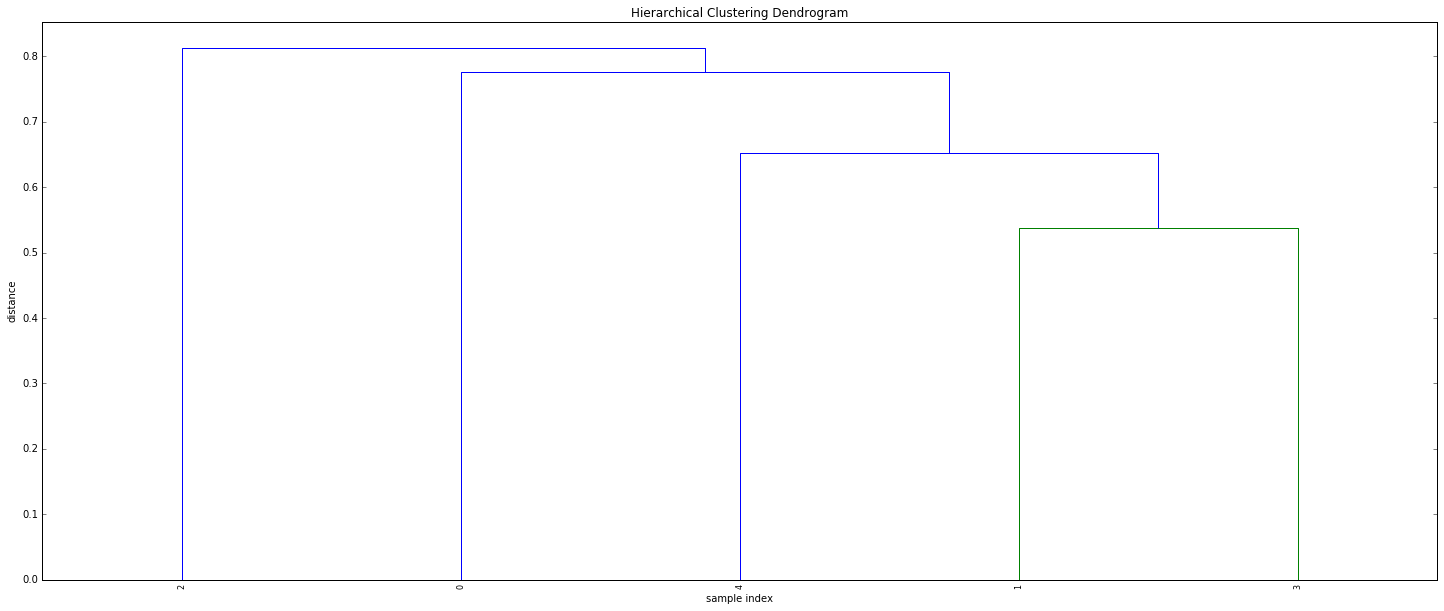

0: of

1: over

2: on

3: around

4: in

(6, 100)


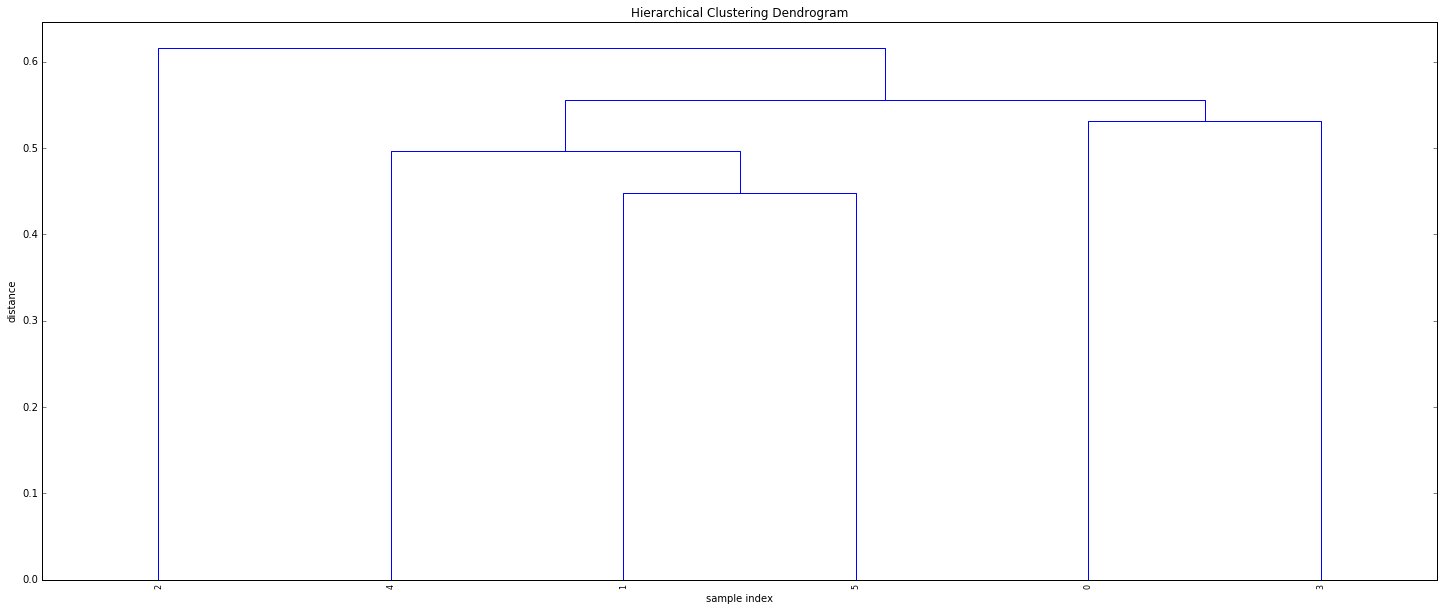

0: dates

1: nights

2: times

3: periods

4: seasons

5: christmas

(22, 100)


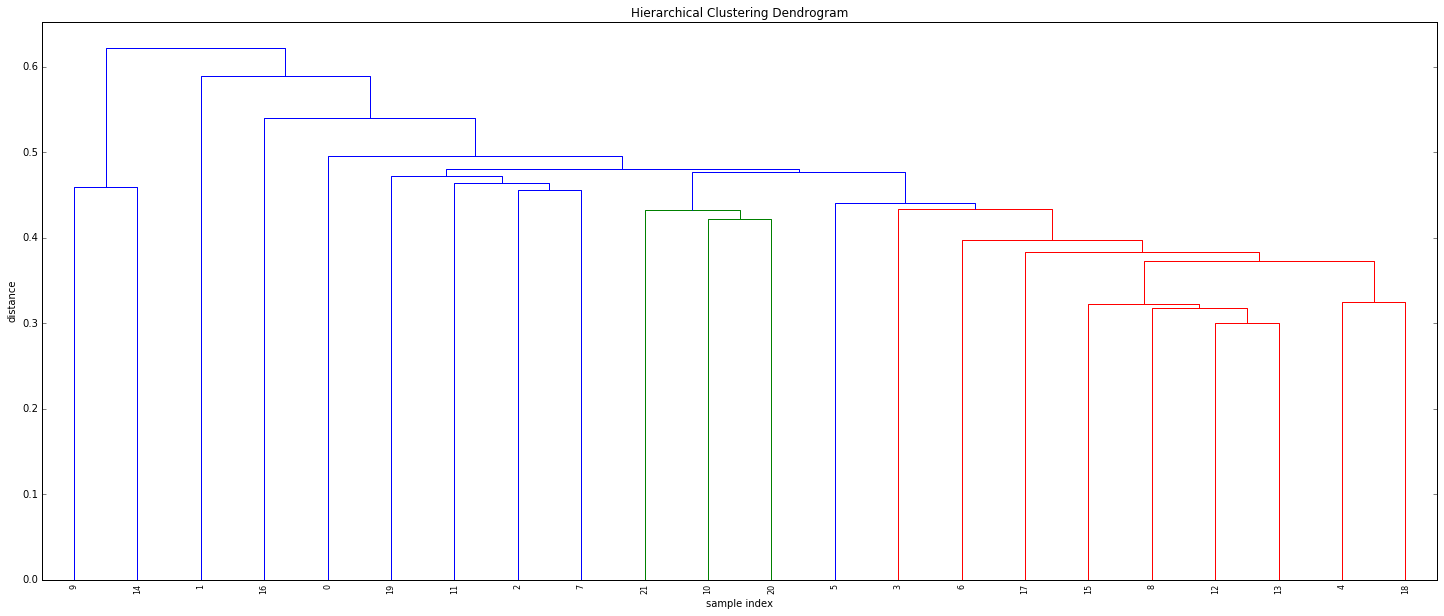

0: tribe

1: irish

2: wealthy

3: immigrant

4: asian

5: extinct

6: native

7: impoverished

8: caucasian

9: europe

10: asiatic

11: slave

12: indigenous

13: ethnic

14: america

15: tribal

16: multicultural

17: hispanic

18: african

19: rural

20: iroquois

21: natives

(14, 100)


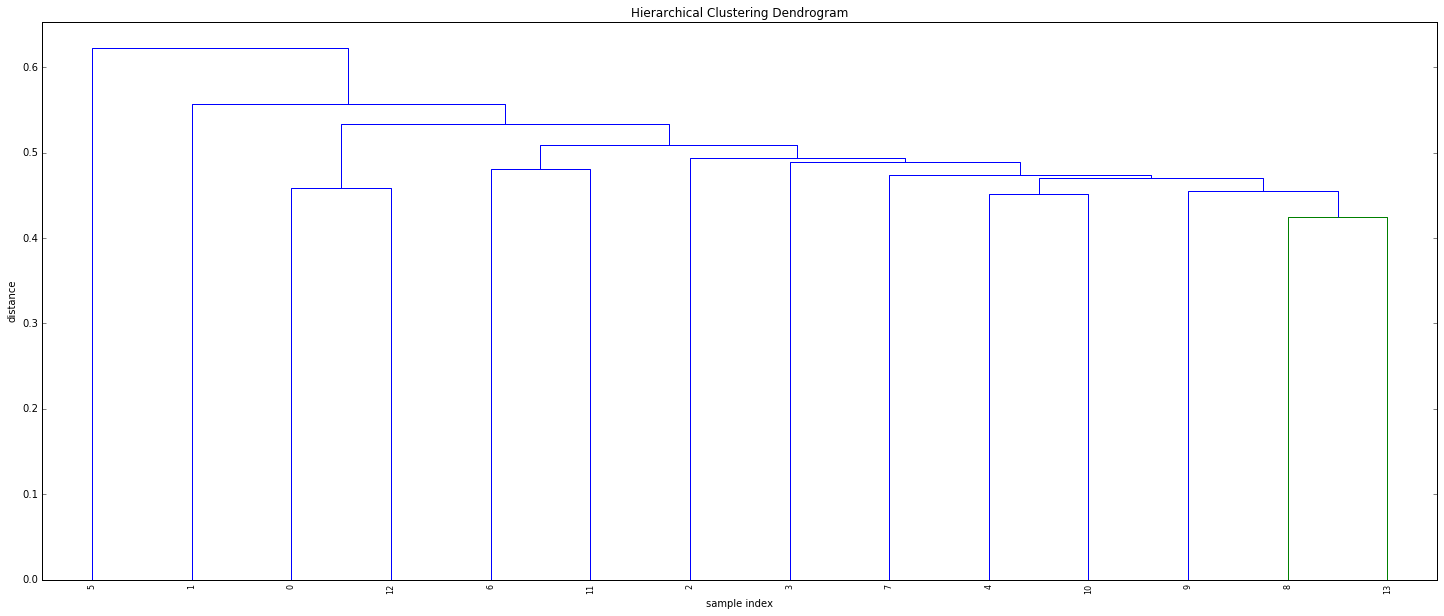

0: europe

1: illiterate

2: minority

3: countryside

4: tribal

5: makeup

6: colonization

7: arab

8: peasant

9: royalty

10: inuit

11: migration

12: america

13: aristocracy

(9, 100)


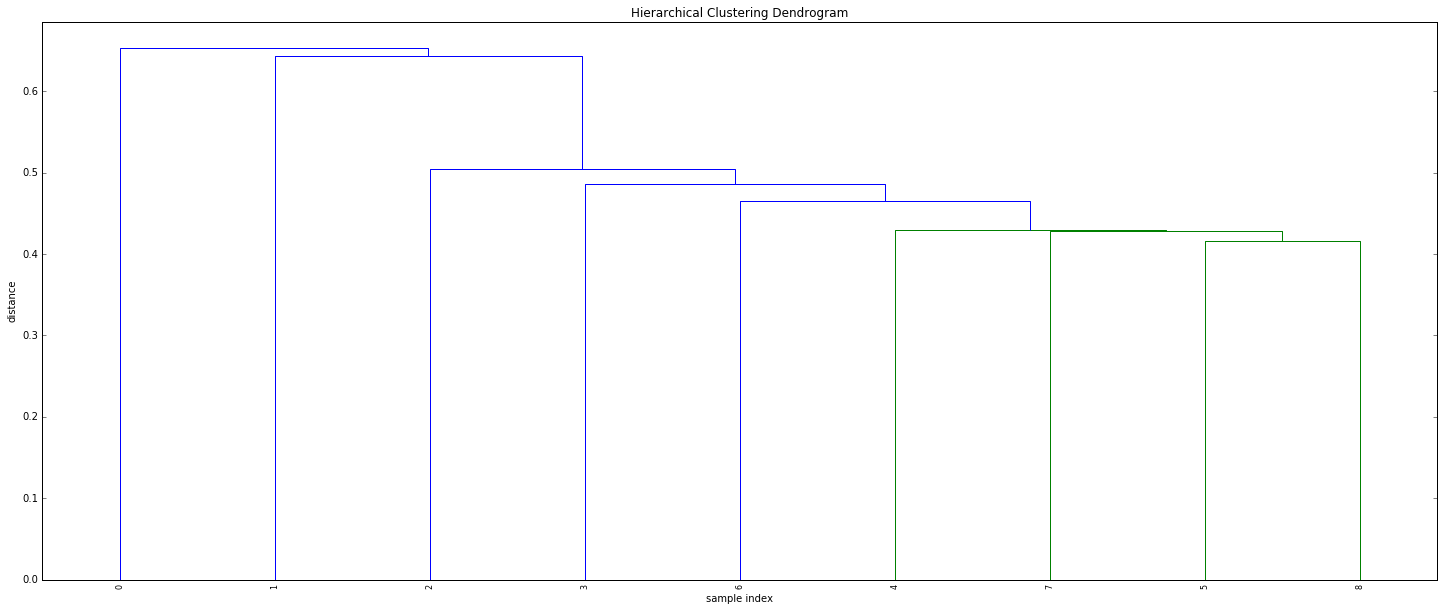

0: america

1: slave

2: settler

3: muslim

4: ancestry

5: inuit

6: latino

7: ethnicity

8: native

(24, 100)


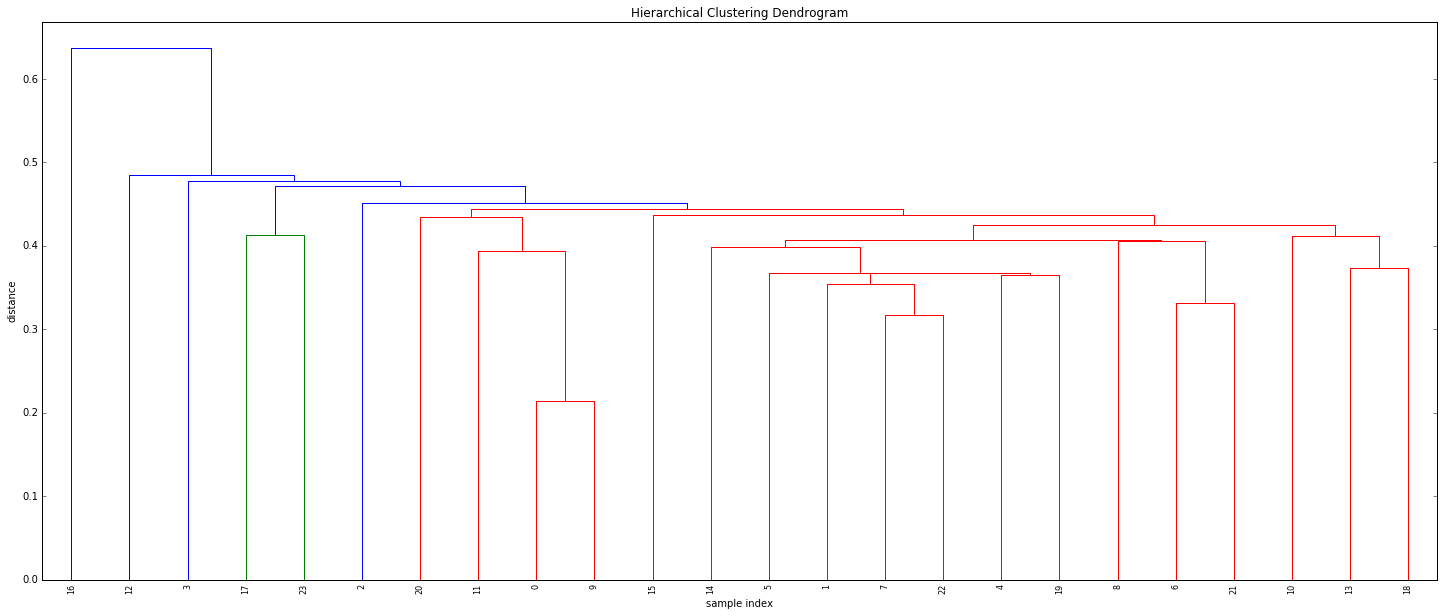

0: neighbors

1: africans

2: remnants

3: people

4: nationalities

5: laborers

6: americans

7: farmers

8: indians

9: neighbours

10: poles

11: colonies

12: families

13: sailors

14: travellers

15: egyptians

16: america

17: explorers

18: germans

19: ethnicities

20: slaves

21: canadians

22: fishermen

23: natives

(64, 100)


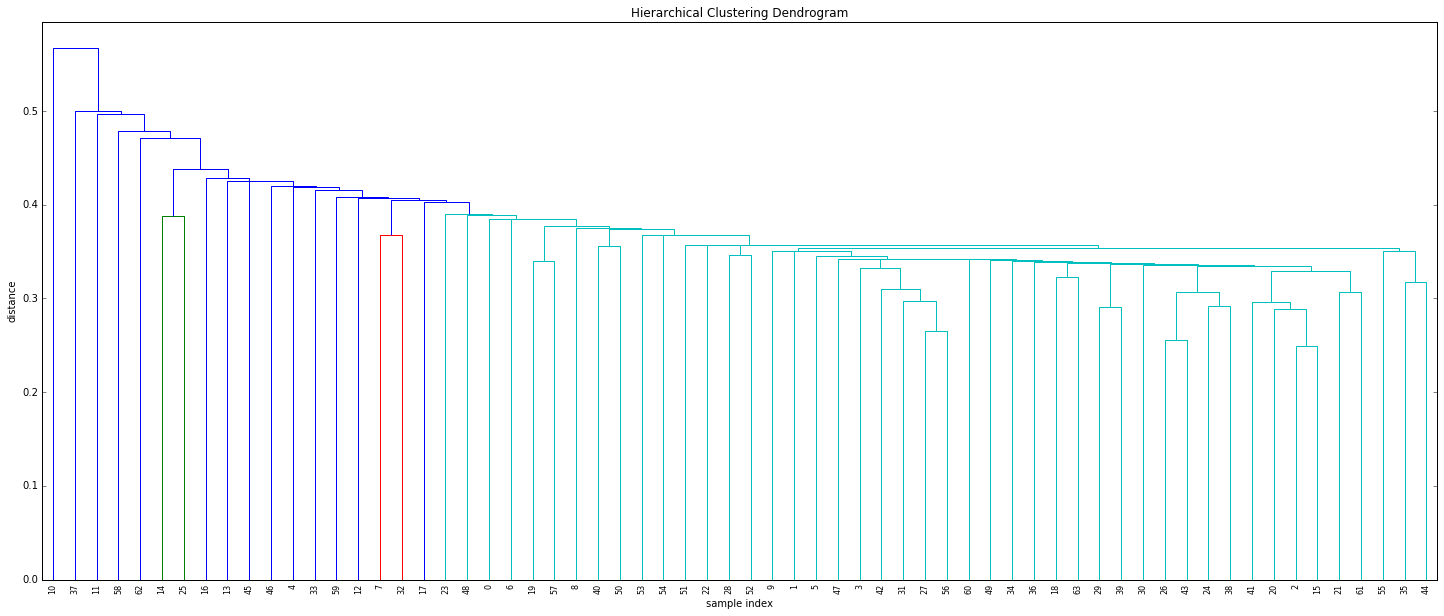

0: picnic

1: capitol

2: boston

3: washington

4: quaker

5: hawaii

6: inn

7: hyde

8: quebec

9: bombay

10: amusement

11: landowner

12: yankee

13: jubilee

14: theatre

15: chicago

16: beacon

17: hospital

18: hudson

19: cemetery

20: philadelphia

21: zoo

22: cork

23: providence

24: vancouver

25: exhibition

26: kent

27: indiana

28: playhouse

29: beach

30: glasgow

31: texas

32: dame

33: college

34: columbia

35: quarry

36: hotel

37: negro

38: victoria

39: creek

40: carnival

41: brooklyn

42: california

43: york

44: cottage

45: bazaar

46: hall

47: fort

48: lane

49: holland

50: parade

51: hanford

52: rockefeller

53: herald

54: courthouse

55: cheshire

56: oregon

57: monument

58: landmark

59: london

60: harlem

61: buffalo

62: jersey

63: brook

(10, 100)


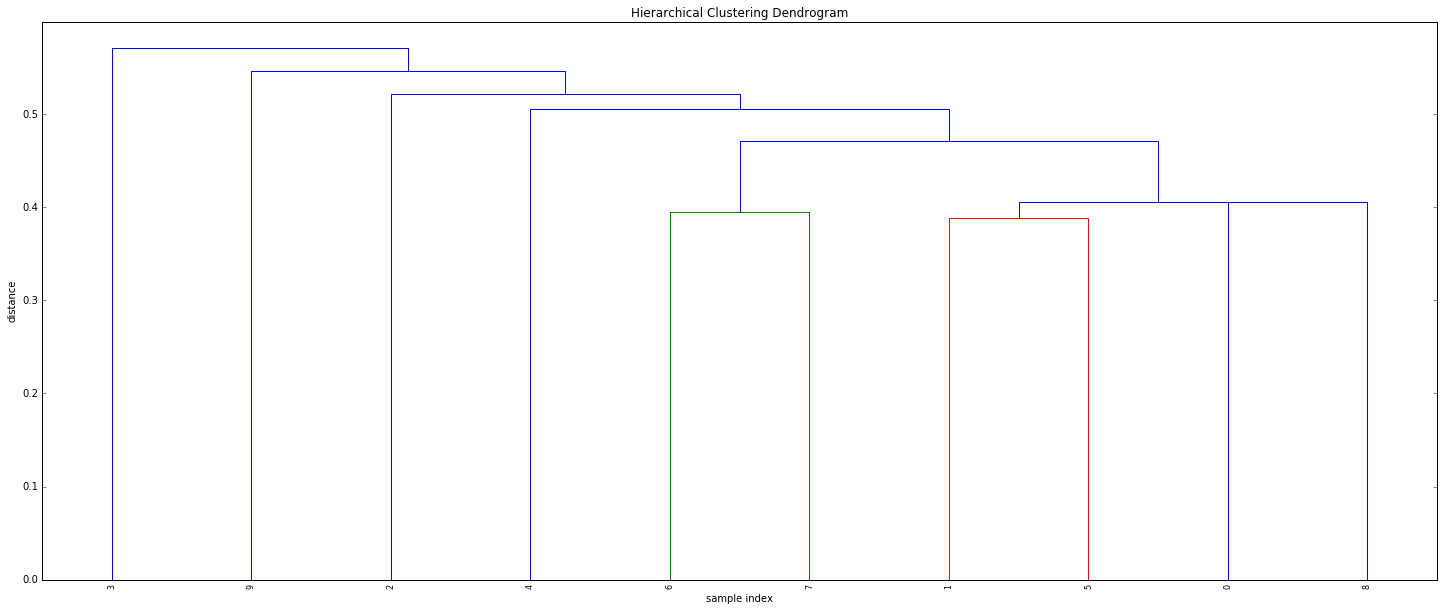

0: memorial

1: columbia

2: usa

3: canadian

4: festival

5: florida

6: inn

7: hill

8: cathedral

9: picnic

(18, 100)


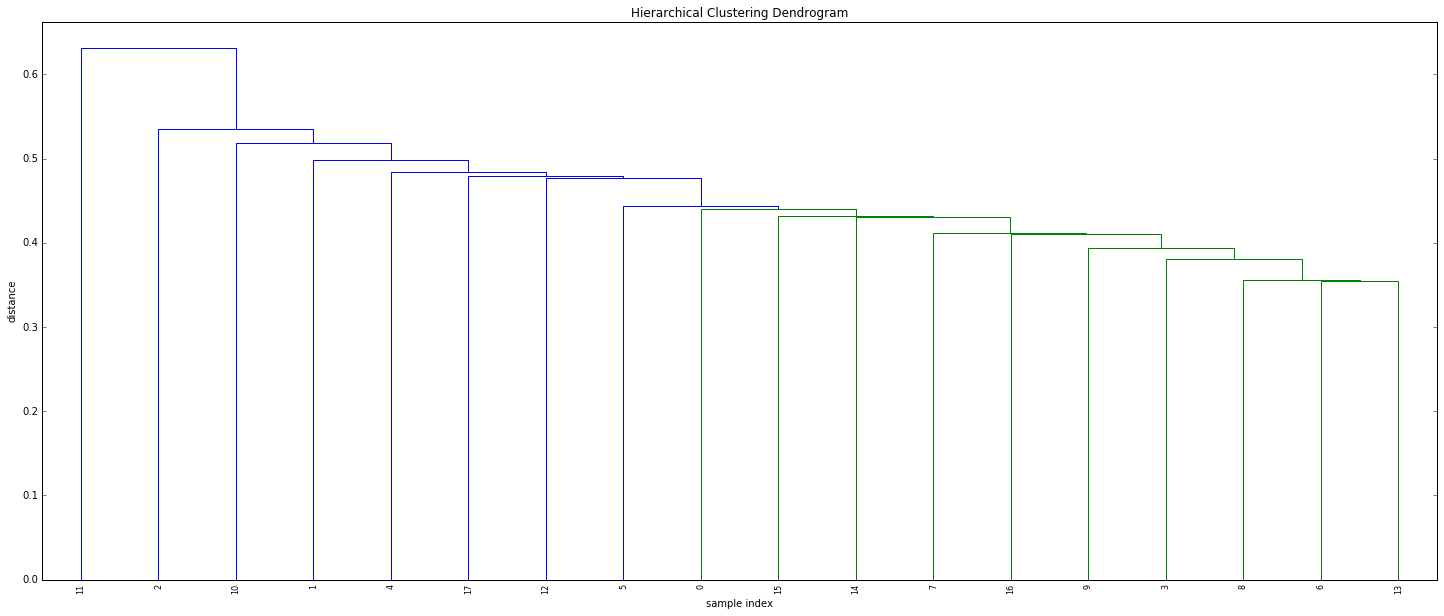

0: behaving

1: hazing

2: civilizing

3: overbearing

4: daunting

5: enlightening

6: crossdressing

7: hardworking

8: spanking

9: condescending

10: sparring

11: comforting

12: disconcerting

13: nurturing

14: gaping

15: horrifying

16: eluding

17: redeeming

(79, 100)


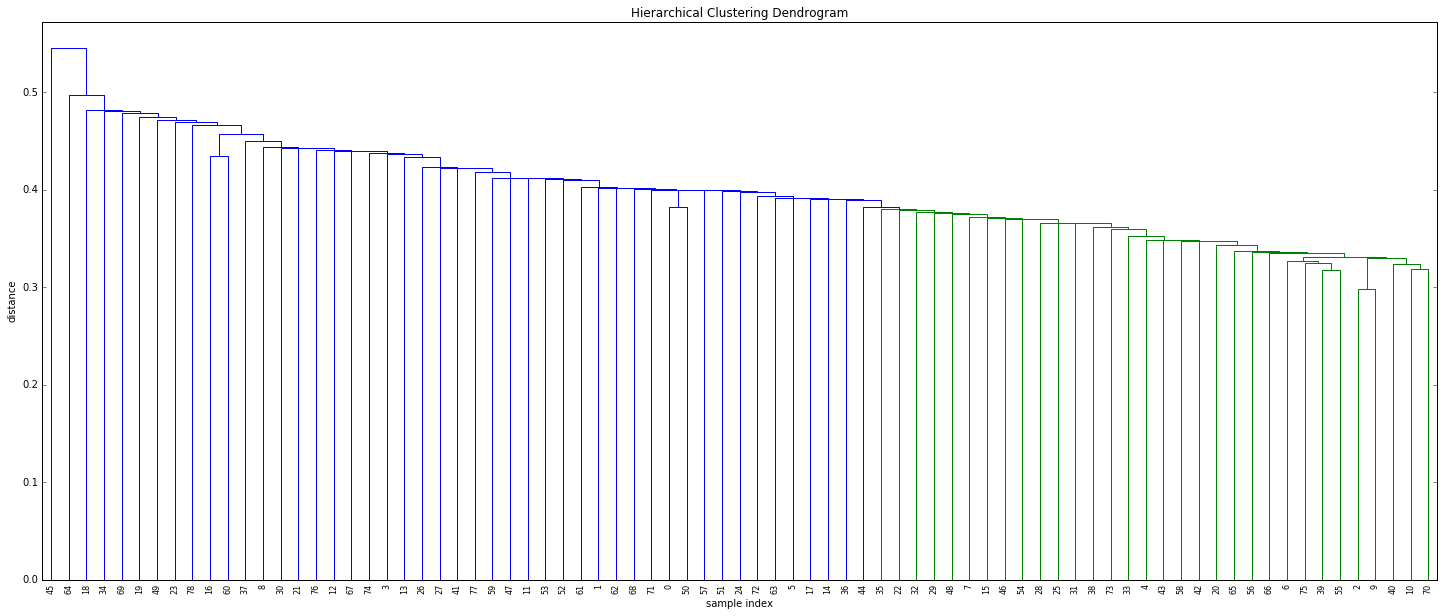

0: carnivore

1: ailment

2: kafir

3: ingenuity

4: collage

5: branding

6: laziness

7: abolitionism

8: malice

9: daoism

10: slimy

11: paternalism

12: spectacle

13: foolishness

14: irritation

15: immaturity

16: hamper

17: sameness

18: ima

19: ponder

20: radiology

21: wholesome

22: playfulness

23: rasa

24: quaint

25: overlook

26: willpower

27: genteel

28: housework

29: blackness

30: teamwork

31: monotone

32: acculturation

33: propriety

34: crossroad

35: toddler

36: ornamentation

37: hopeless

38: vigor

39: greenery

40: tapir

41: fluidity

42: voyeurism

43: immorality

44: classist

45: shawl

46: prudence

47: disapprove

48: vermin

49: decrepit

50: aimless

51: courtroom

52: duplicity

53: frailty

54: misrepresentation

55: flutter

56: raptor

57: trickery

58: consumerism

59: dystopia

60: boast

61: subservience

62: lozenge

63: bigotry

64: somber

65: femininity

66: pacing

67: trope

68: bystander

69: fragility

70: discreet

71: haste

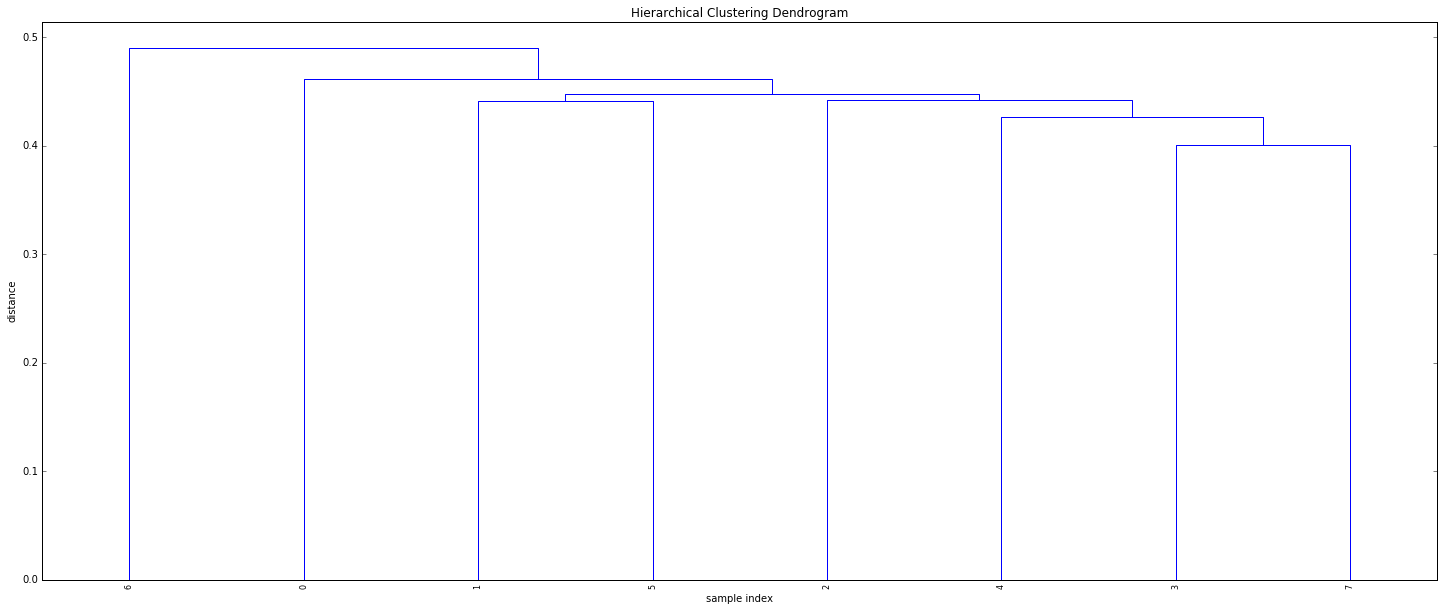

0: wretched

1: checkered

2: disheveled

3: disoriented

4: undaunted

5: gendered

6: stoked

7: spoiled

(4, 100)


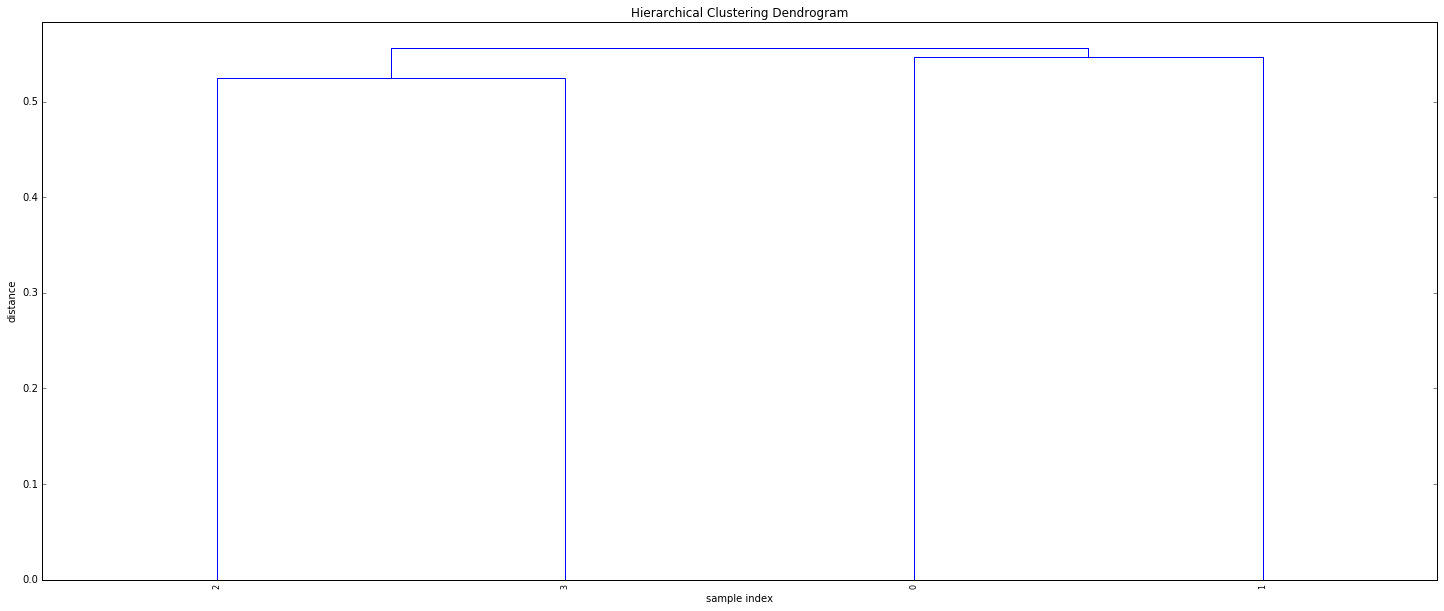

0: disjointed

1: gendered

2: disorganized

3: mismatched

(52, 100)


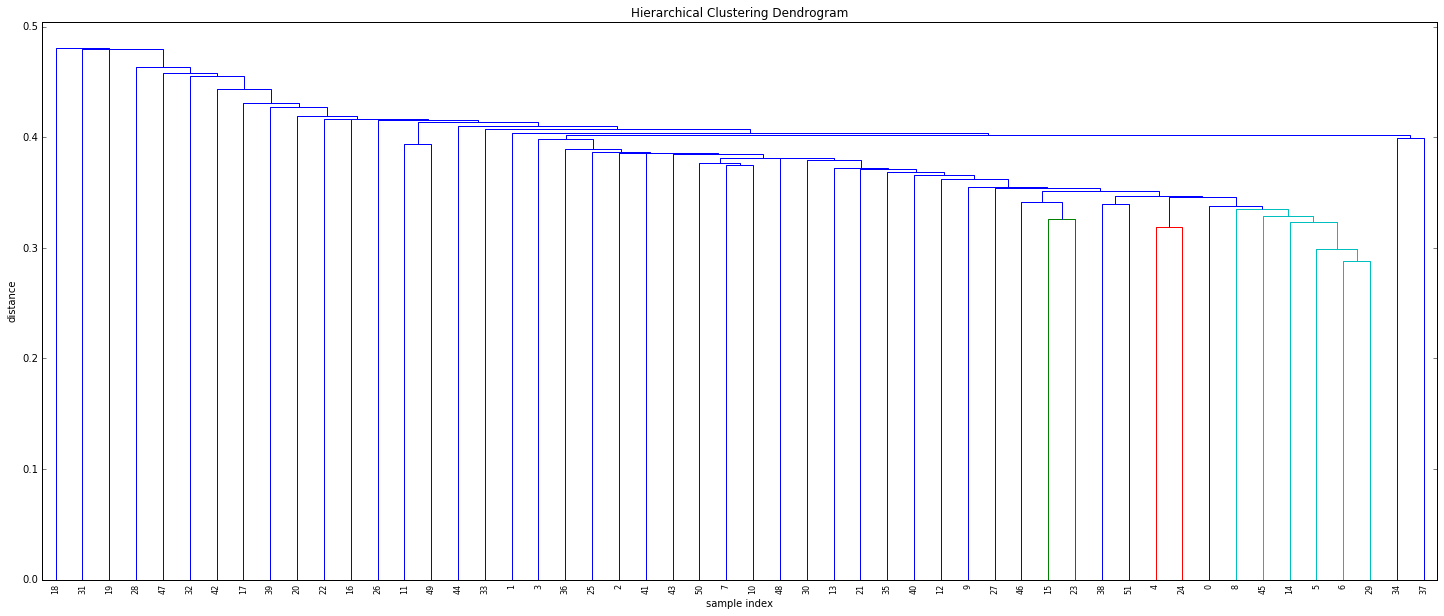

0: whimsical

1: disordered

2: auntie

3: frighten

4: exuberant

5: playful

6: tapir

7: tasty

8: selfless

9: graceful

10: talkative

11: unhappiness

12: unappreciated

13: dreadful

14: wrinkle

15: illogical

16: ethnocentric

17: reap

18: restful

19: idleness

20: ephemeral

21: relish

22: excitable

23: immovable

24: morbid

25: joyful

26: obese

27: checkered

28: assertive

29: forgetful

30: gloomy

31: familial

32: elusive

33: dutiful

34: attentive

35: unrealistic

36: feeble

37: disagreeable

38: sacrilegious

39: cyclical

40: empathy

41: humbled

42: antisemitic

43: innuendo

44: smear

45: artful

46: pretentious

47: politic

48: careless

49: anguish

50: timid

51: anthromorphic

(3, 100)


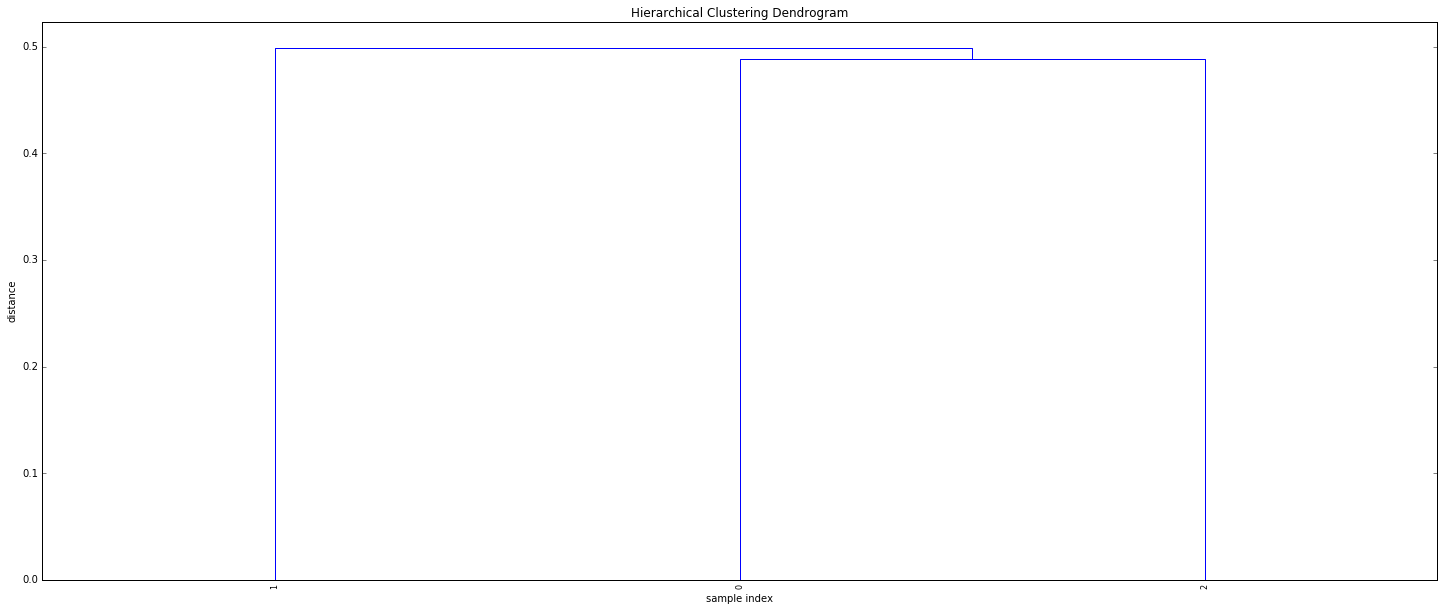

0: wipeout

1: amuse

2: inept

(6, 100)


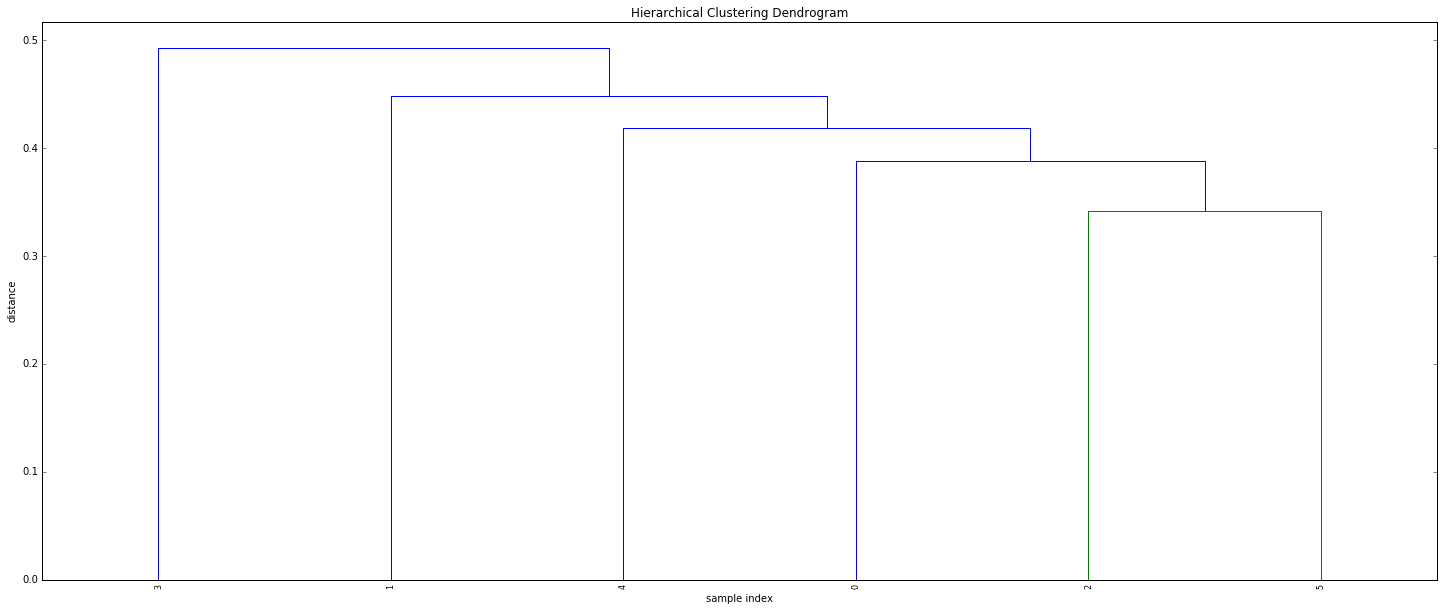

0: racists

1: condolences

2: leftovers

3: rudiments

4: shakers

5: overcomes

(19, 100)


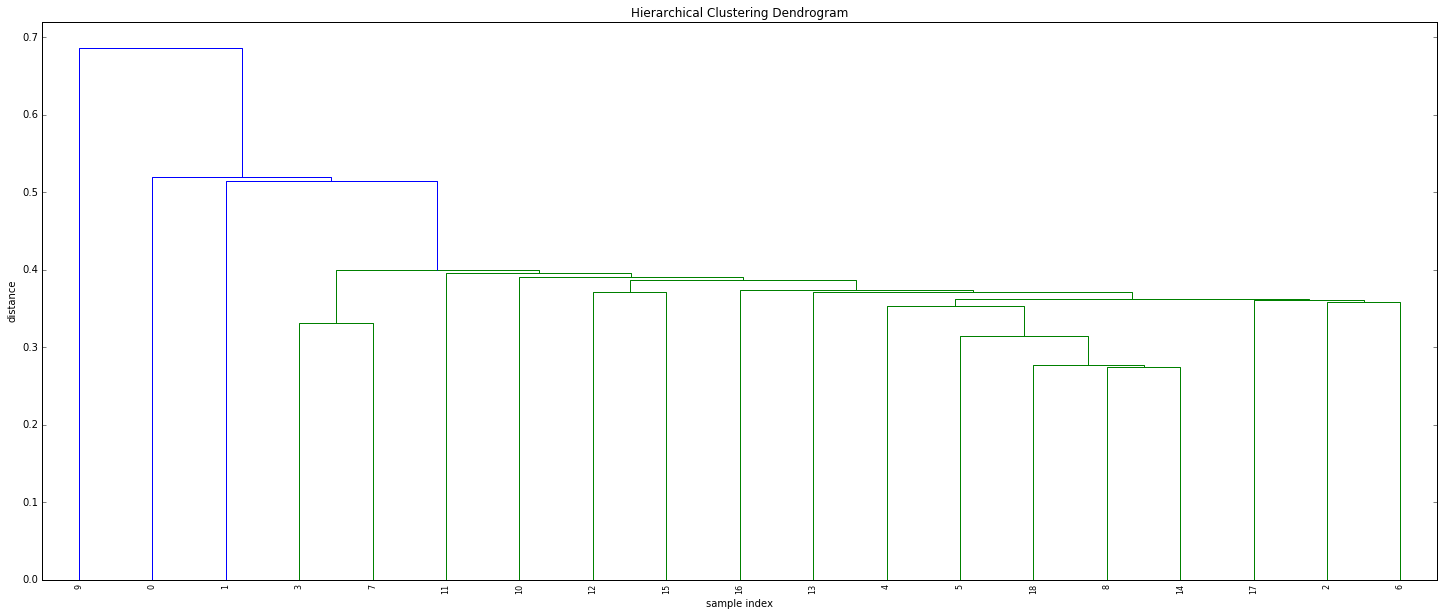

0: count

1: pilate

2: nero

3: pope

4: ali

5: benedict

6: tyrant

7: patriarch

8: conrad

9: ii

10: chaplain

11: czar

12: saint

13: beth

14: ferdinand

15: martyr

16: florence

17: sophia

18: archduke

(3, 100)


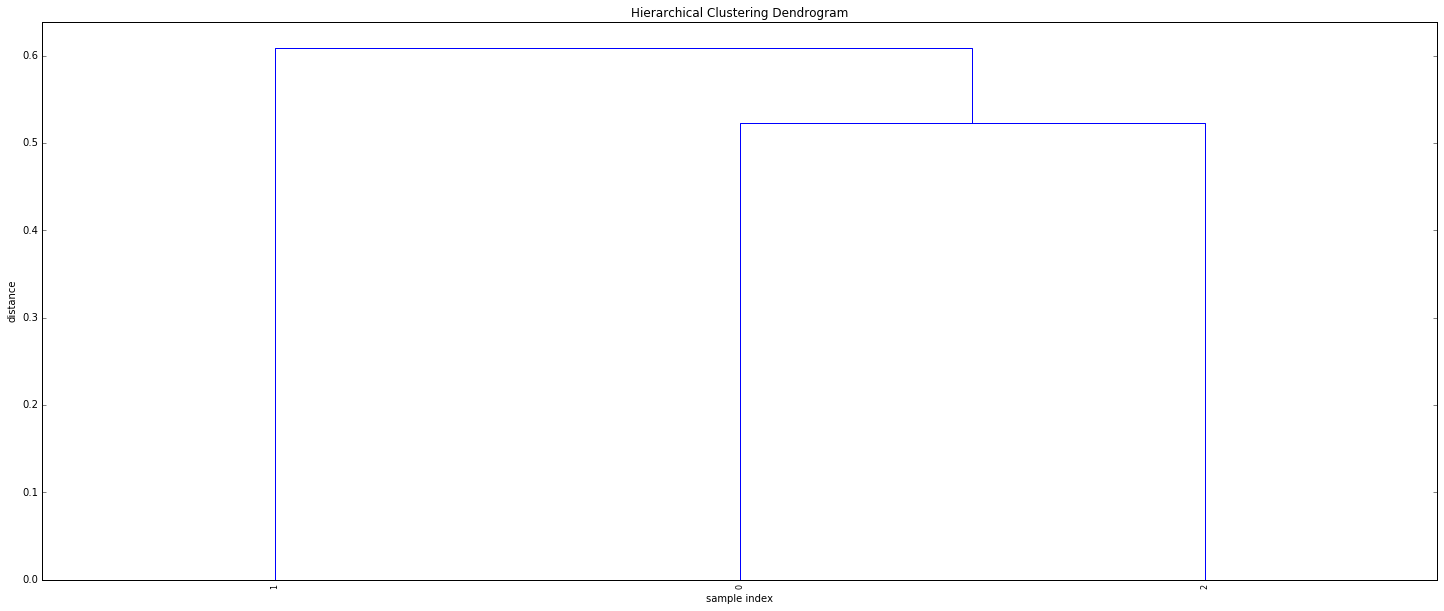

0: duke

1: innocent

2: herod

(42, 100)


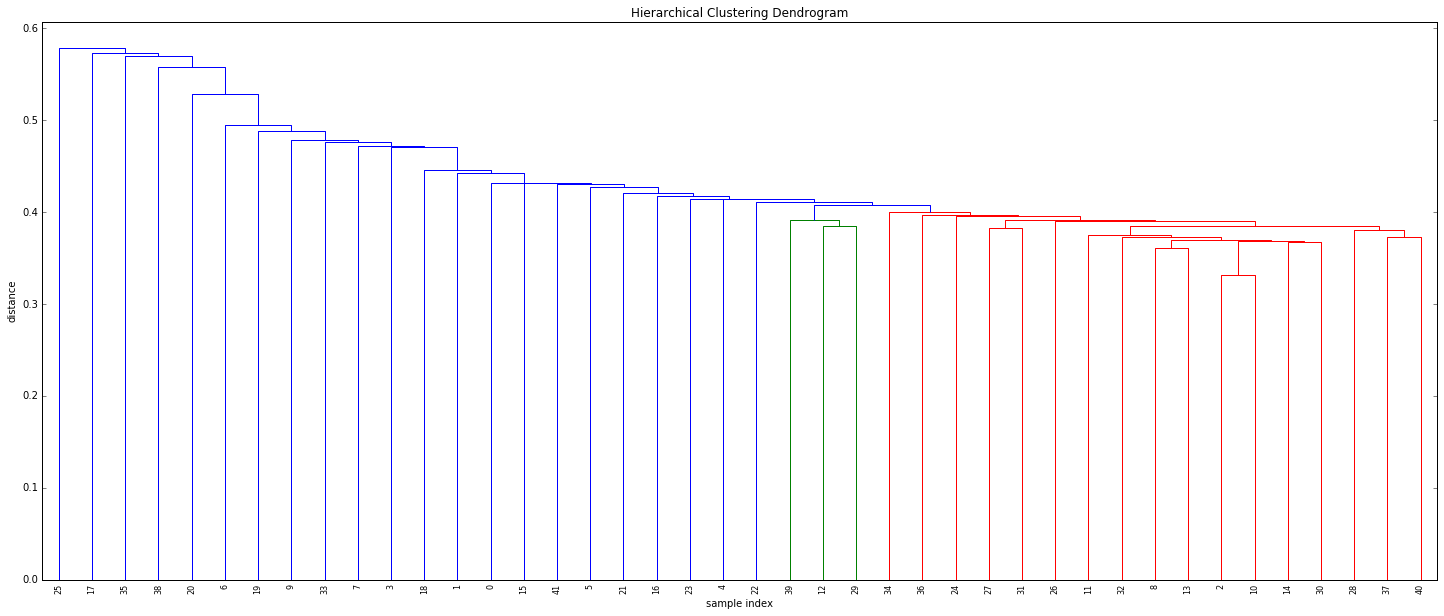

0: antique

1: trainer

2: mini

3: cheat

4: spooky

5: puzzle

6: quake

7: logo

8: mouse

9: mercury

10: toy

11: lame

12: chevrolet

13: flash

14: lounge

15: splash

16: fido

17: merchandise

18: jingle

19: brand

20: spyglass

21: cutter

22: dragonfly

23: sprite

24: auto

25: slate

26: kit

27: tandem

28: moo

29: falcon

30: gauntlet

31: reel

32: bug

33: halo

34: jaguar

35: omnibus

36: aqua

37: kodak

38: auction

39: jockey

40: diy

41: octopus

(9, 100)


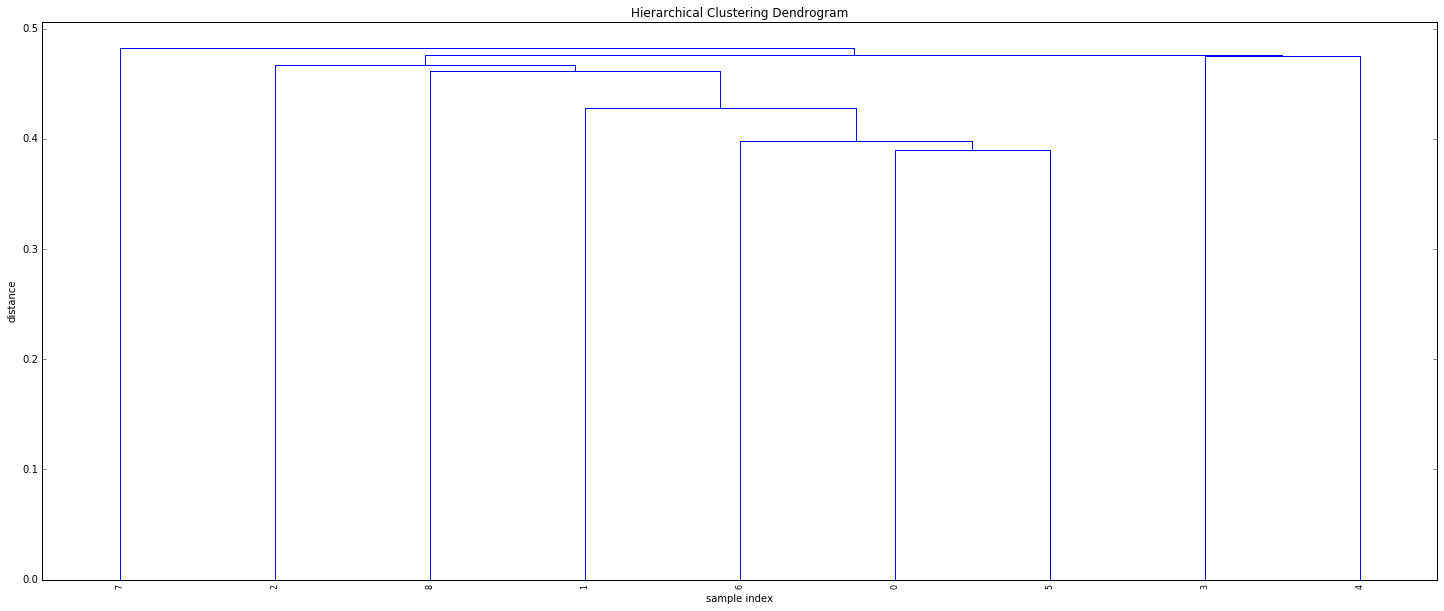

0: toy

1: arcade

2: advert

3: retro

4: hype

5: monochrome

6: pal

7: handy

8: smart

(3, 100)


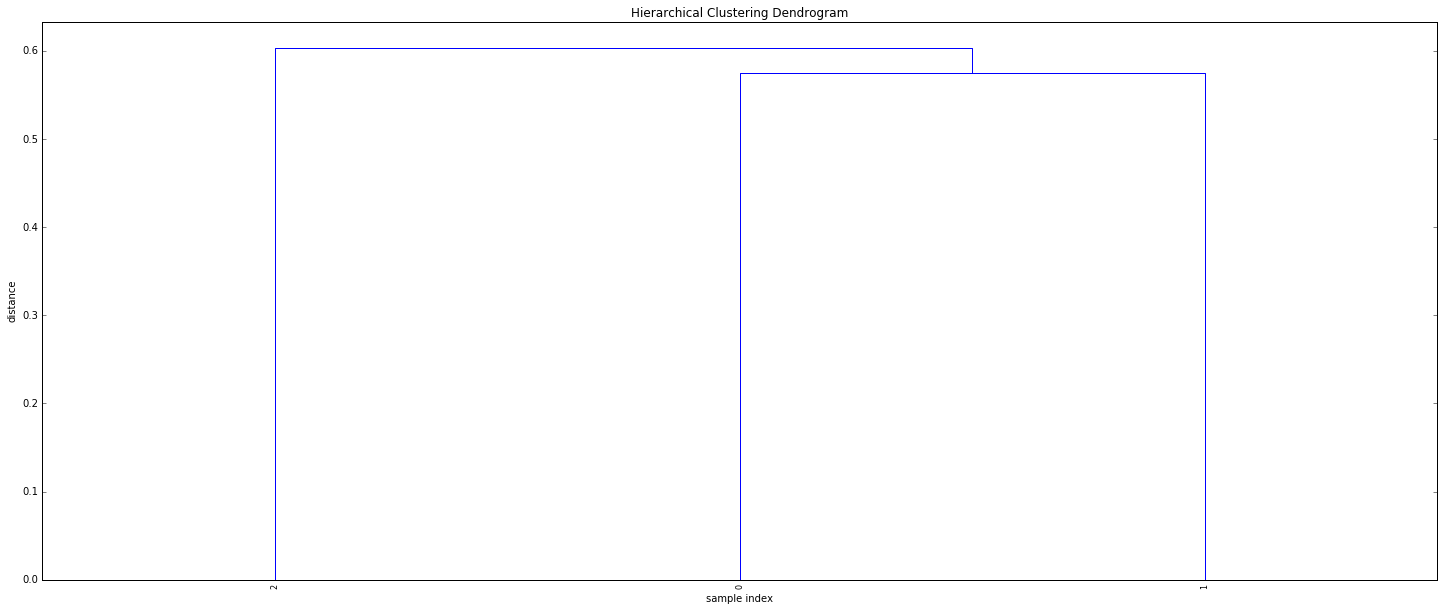

0: agile

1: toy

2: nike

(4, 100)


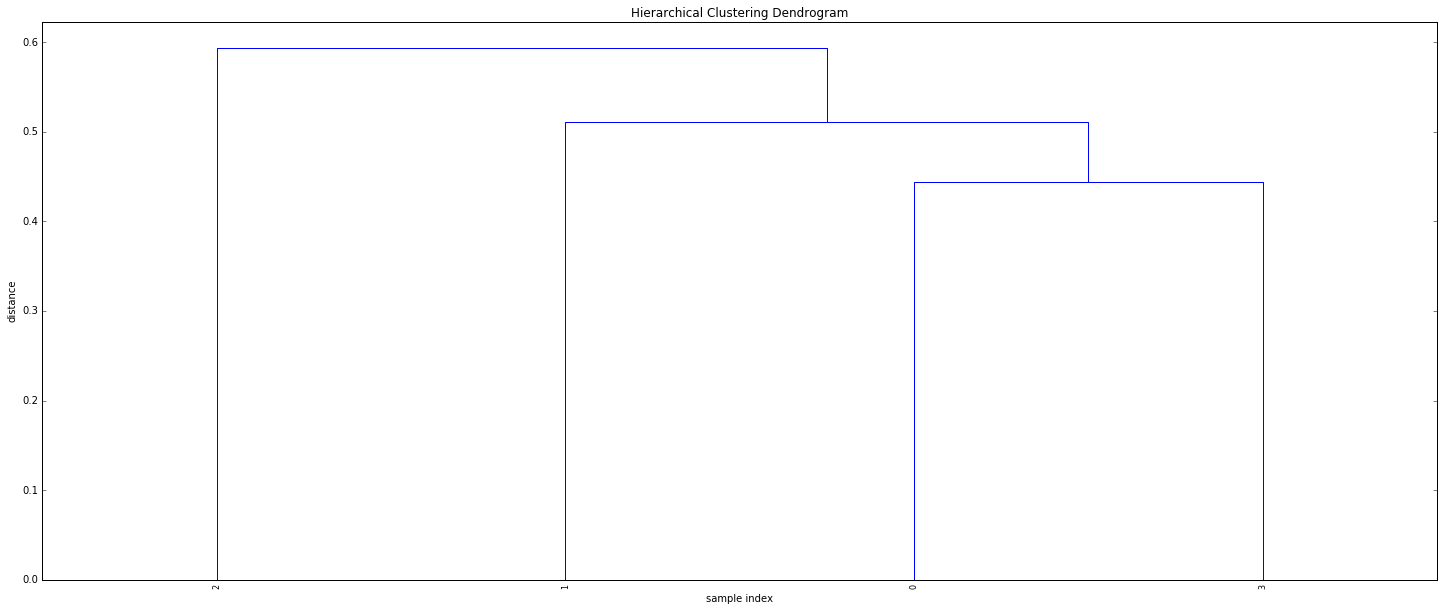

0: jingles

1: bikes

2: badges

3: extras

(6, 100)


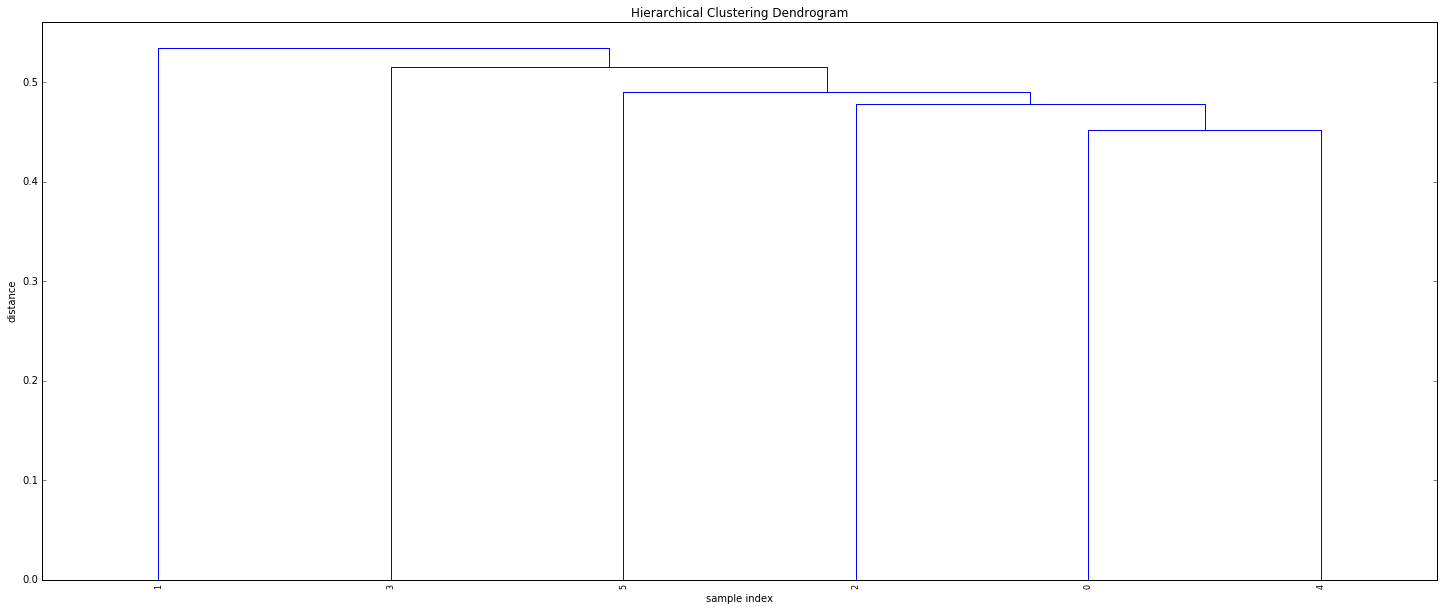

0: saying

1: happening

2: complaining

3: convincing

4: claiming

5: arguing

(7, 100)


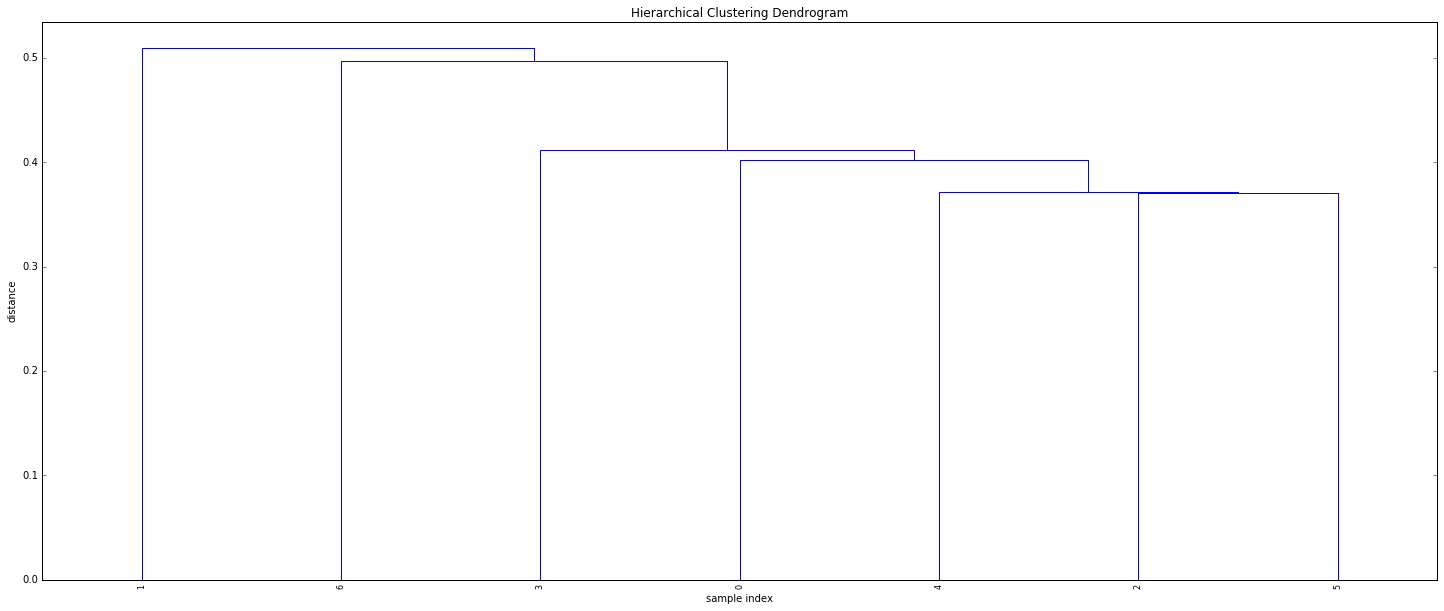

0: claim

1: regret

2: deserve

3: worry

4: argue

5: complain

6: rumor

(3, 100)


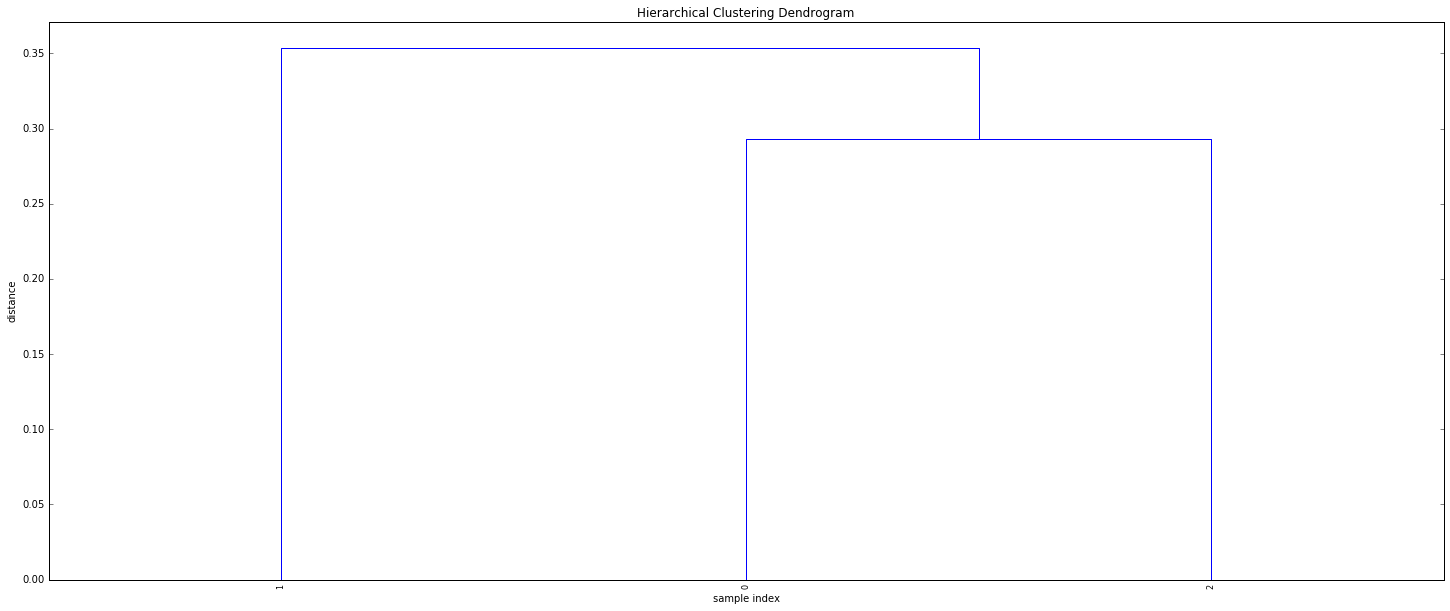

0: say

1: believe

2: think

(7, 100)


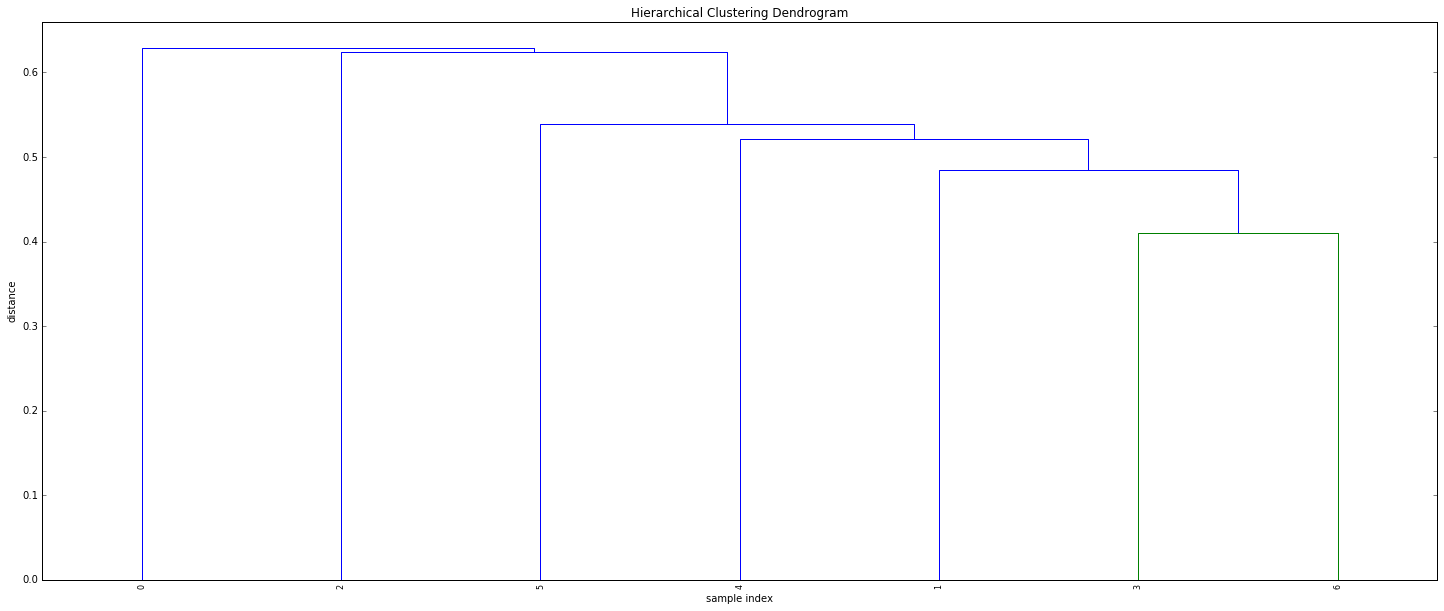

0: knowledgeable

1: proud

2: posed

3: worried

4: thought

5: forgot

6: unaware

(3, 100)


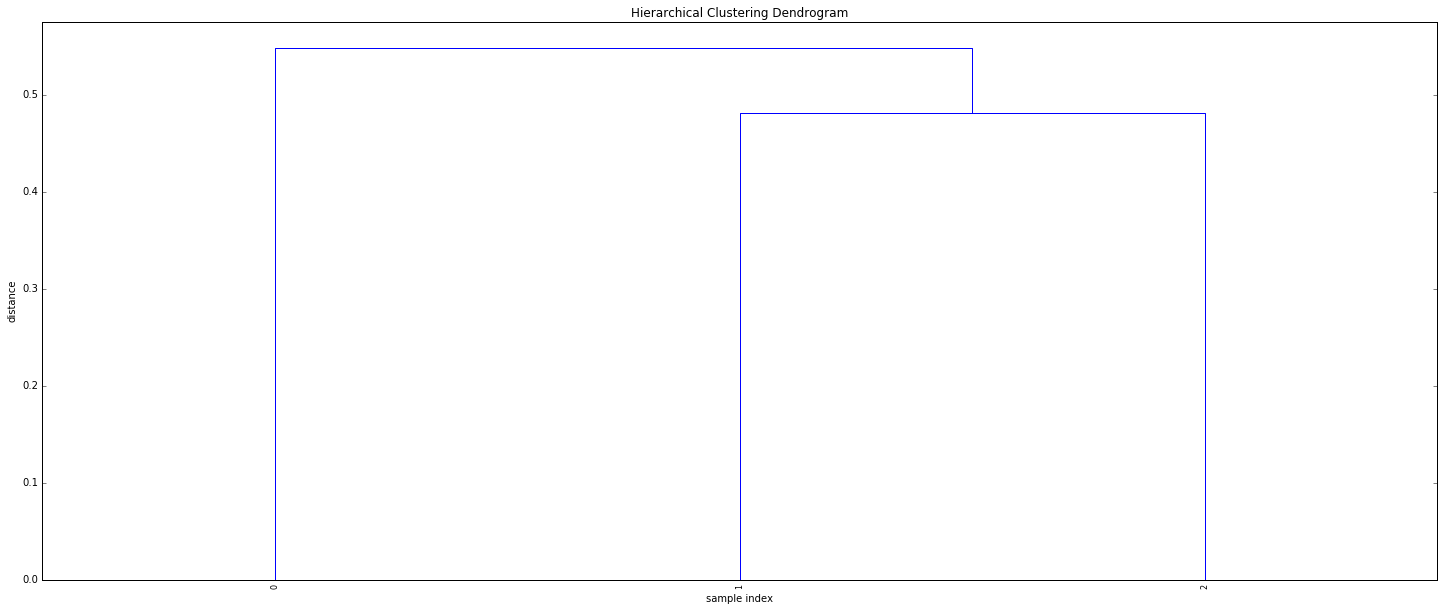

0: think

1: knows

2: tells

(5, 100)


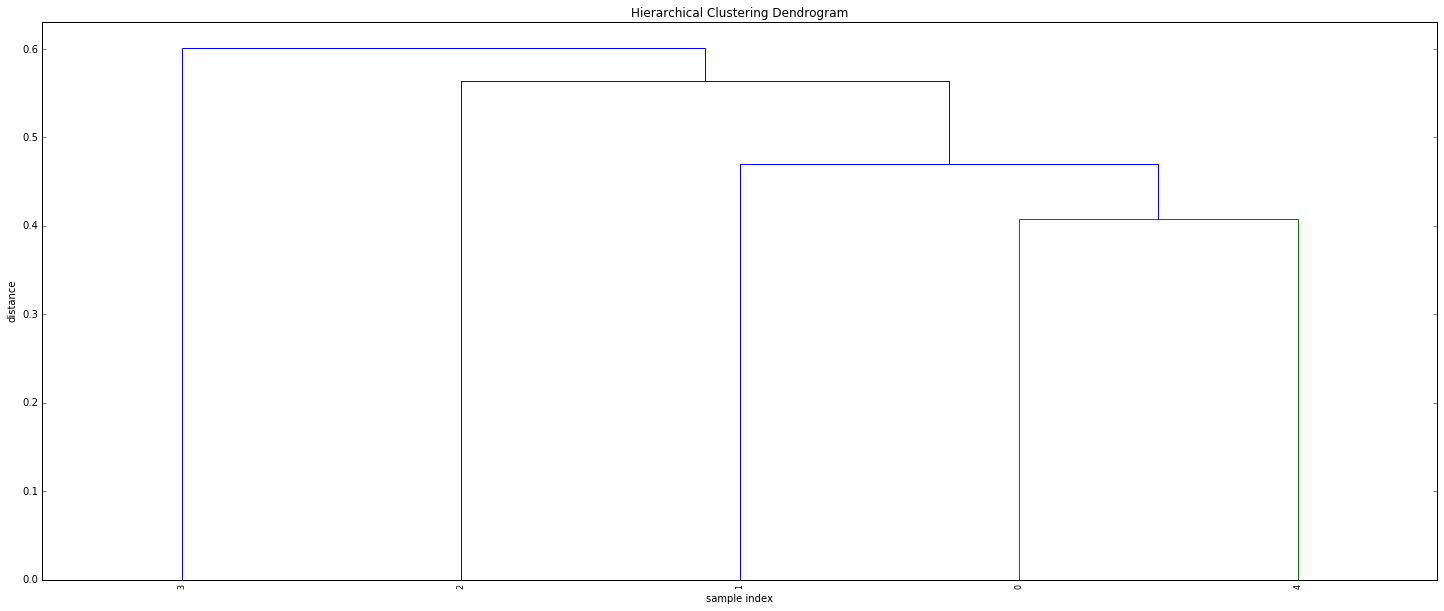

0: sold

1: bundled

2: finished

3: built

4: licensed

(4, 100)


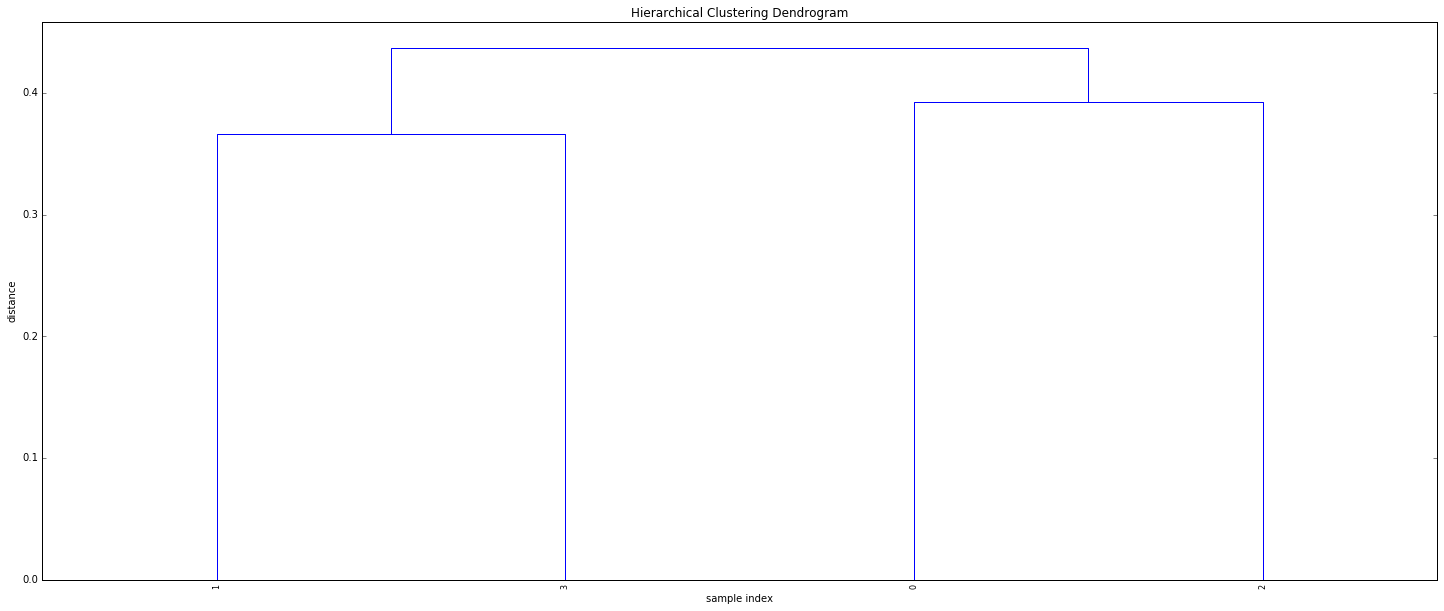

0: crossing

1: stretching

2: lying

3: flowing

(36, 100)


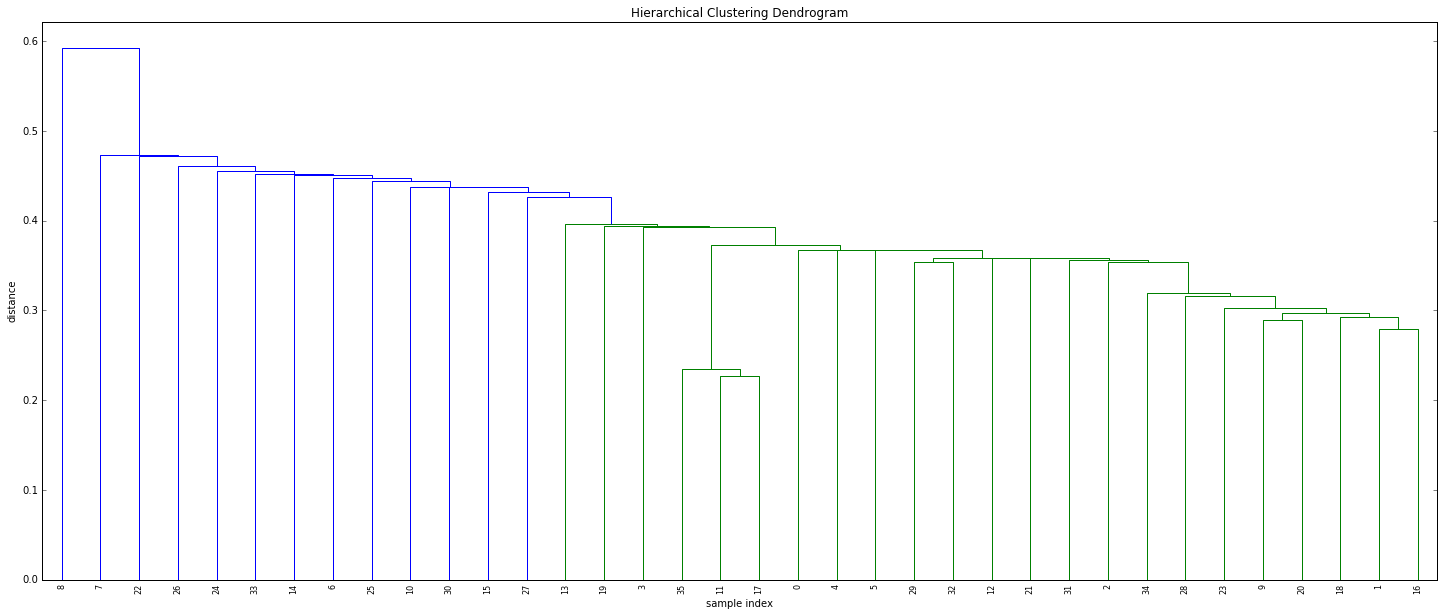

0: wilderness

1: valley

2: pacific

3: sea

4: border

5: continent

6: landscape

7: geography

8: kush

9: gulf

10: stretch

11: west

12: southward

13: asia

14: flood

15: granite

16: basin

17: east

18: mountain

19: maritime

20: coast

21: farmland

22: seaboard

23: desert

24: vast

25: climate

26: land

27: plain

28: ocean

29: trench

30: portion

31: barren

32: volcano

33: fauna

34: river

35: south

(10, 100)


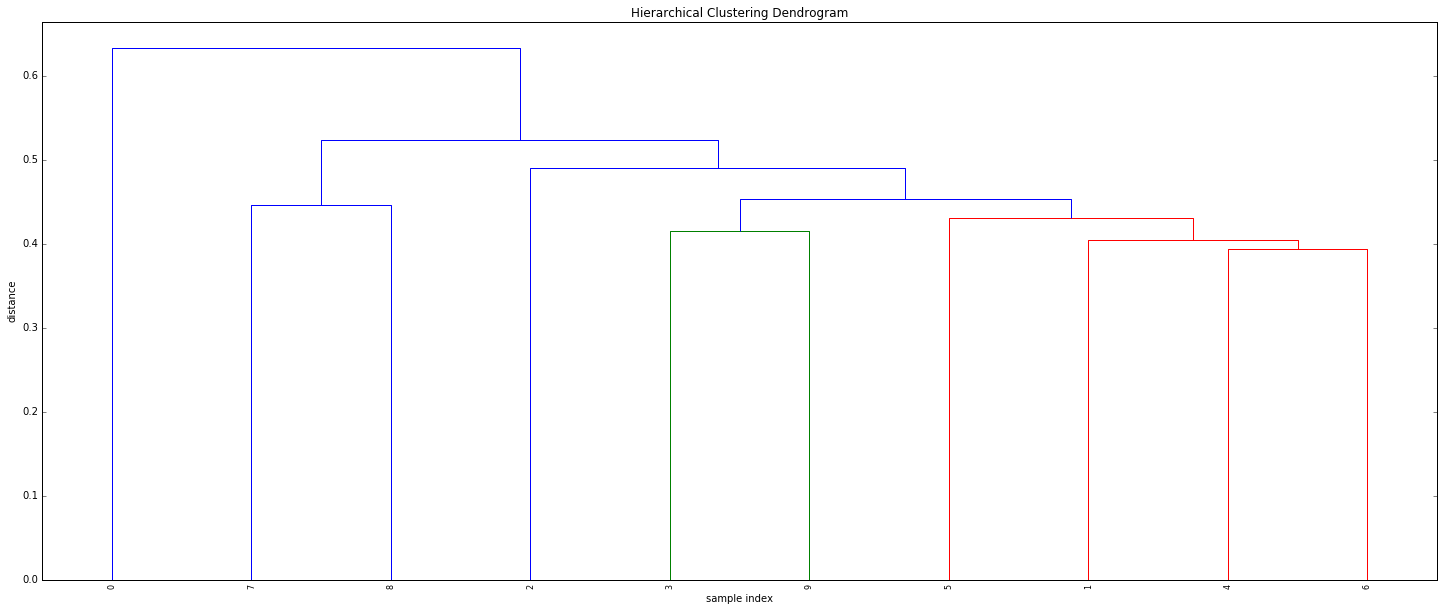

0: kush

1: geyser

2: island

3: mediterranean

4: ocean

5: forest

6: sea

7: border

8: south

9: alpine

(30, 100)


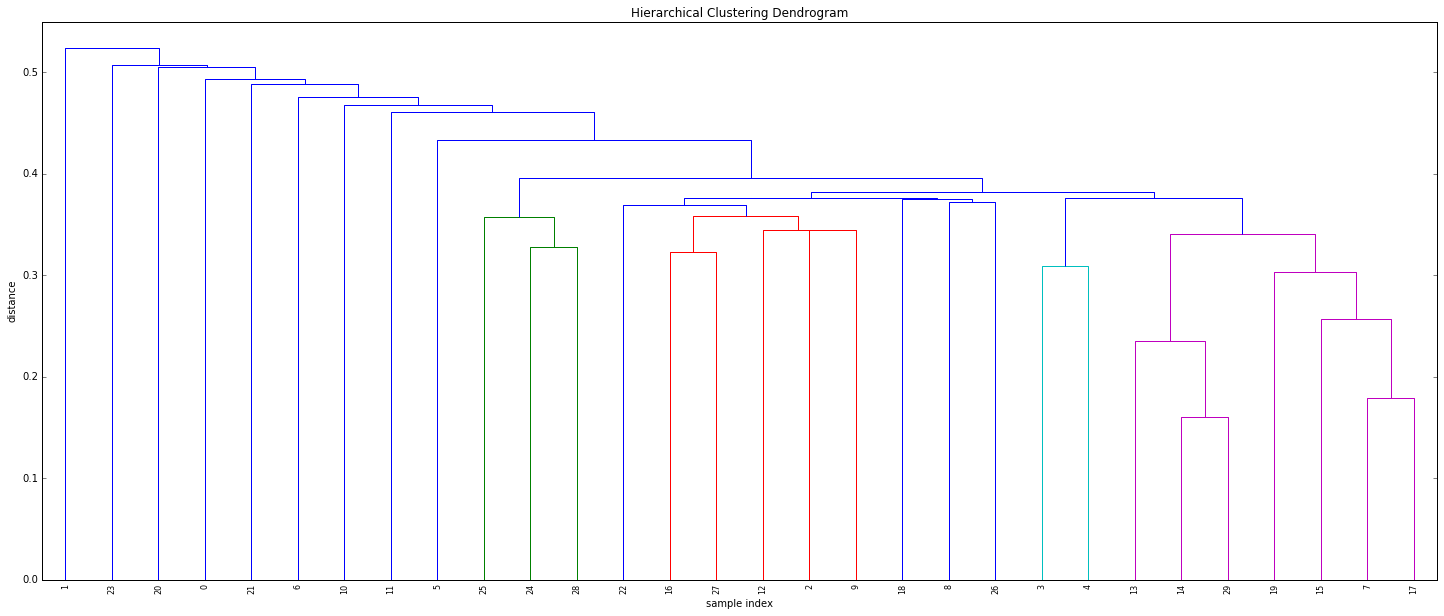

0: upper

1: pyramid

2: fertile

3: aegean

4: mediterranean

5: crescent

6: rainy

7: northern

8: lake

9: tropical

10: arabian

11: interior

12: glacial

13: east

14: north

15: eastern

16: arctic

17: southern

18: atlantic

19: western

20: boundary

21: vast

22: flora

23: central

24: rocky

25: scenic

26: nile

27: ocean

28: steep

29: south

(4, 100)


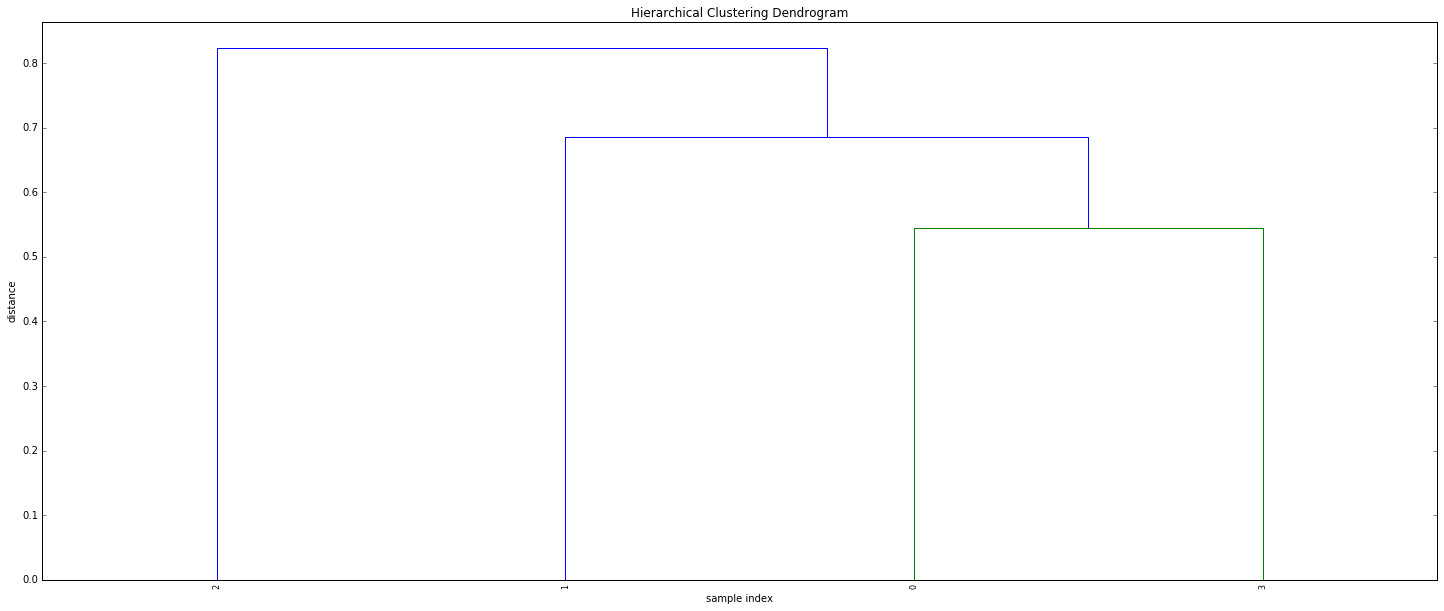

0: upper

1: along

2: from

3: nile

(19, 100)


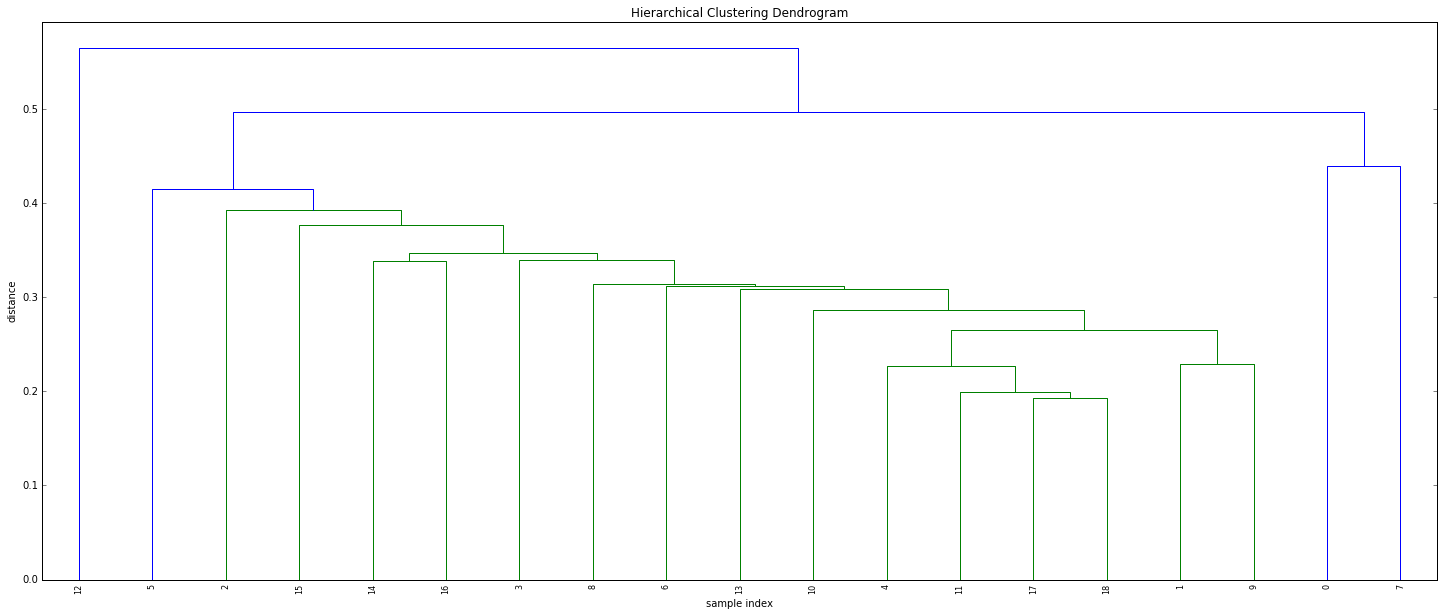

0: pillars

1: lakes

2: continents

3: prairies

4: seas

5: tropics

6: waters

7: pyramids

8: steppes

9: rivers

10: shores

11: plains

12: parts

13: streams

14: ridges

15: ganges

16: winds

17: mountains

18: hills

(25, 100)


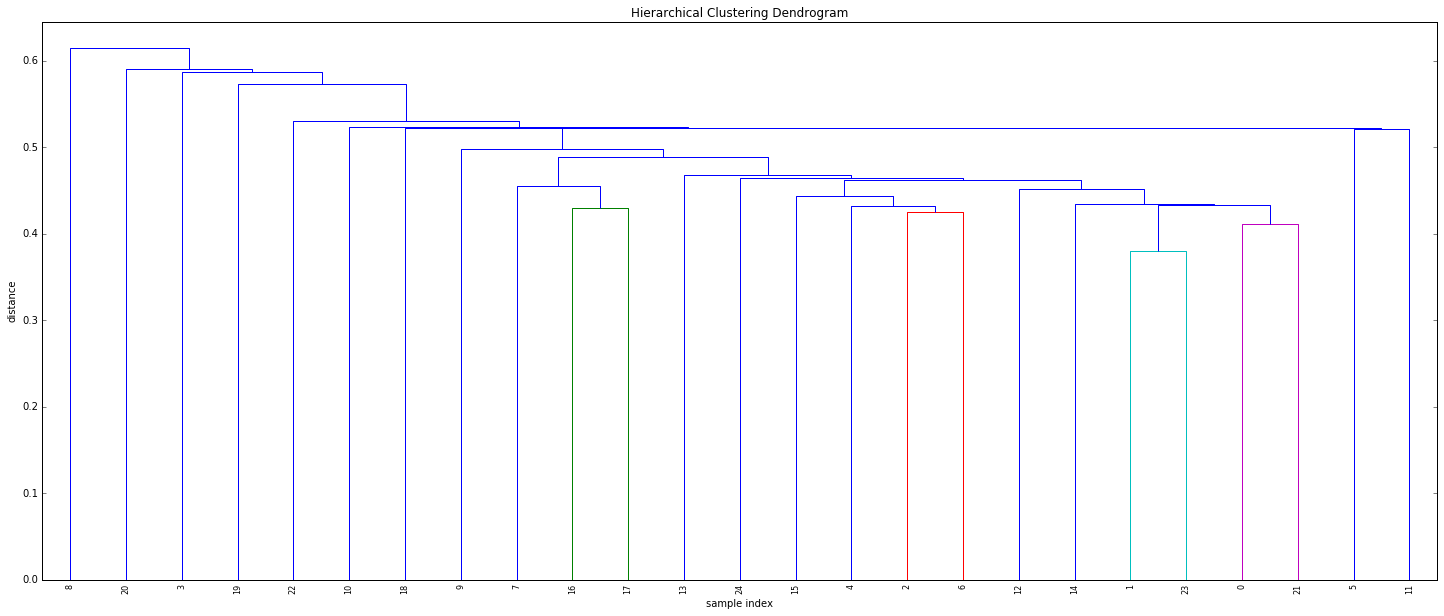

0: associations

1: occupations

2: labels

3: quarters

4: arrangements

5: guests

6: identities

7: jokes

8: coins

9: suits

10: mistakes

11: patrons

12: circles

13: groups

14: cultures

15: branches

16: roles

17: performers

18: skills

19: newspapers

20: chairs

21: practices

22: figures

23: professions

24: bodies

(13, 100)


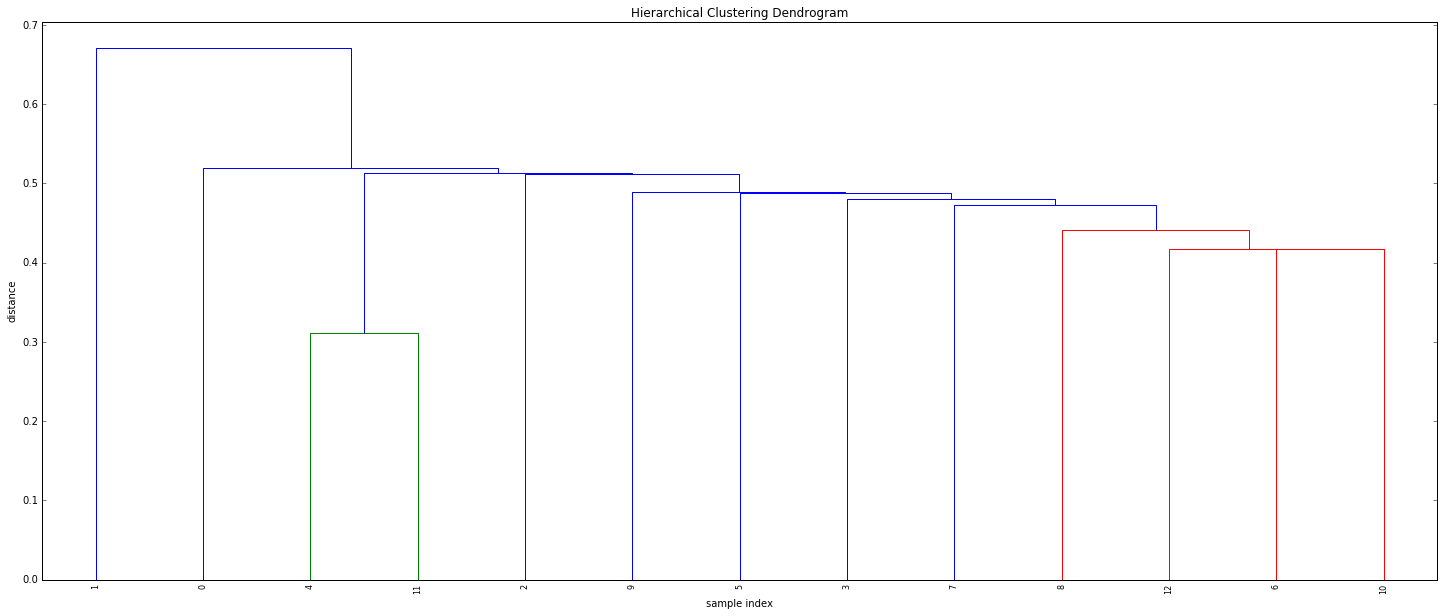

0: aa

1: c

2: xylophone

3: bb

4: mb

5: sparrow

6: pence

7: imp

8: lithograph

9: psalm

10: ogle

11: horsepower

12: boo

(3, 100)


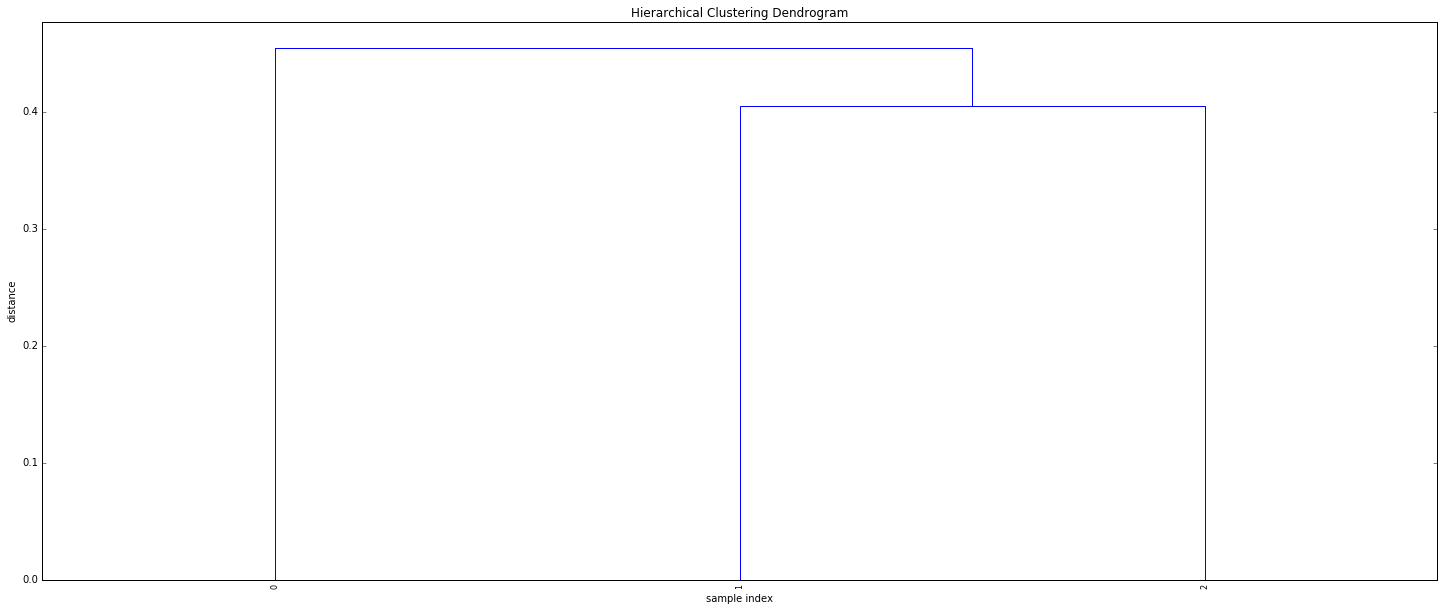

0: ax

1: abs

2: xxxx

(21, 100)


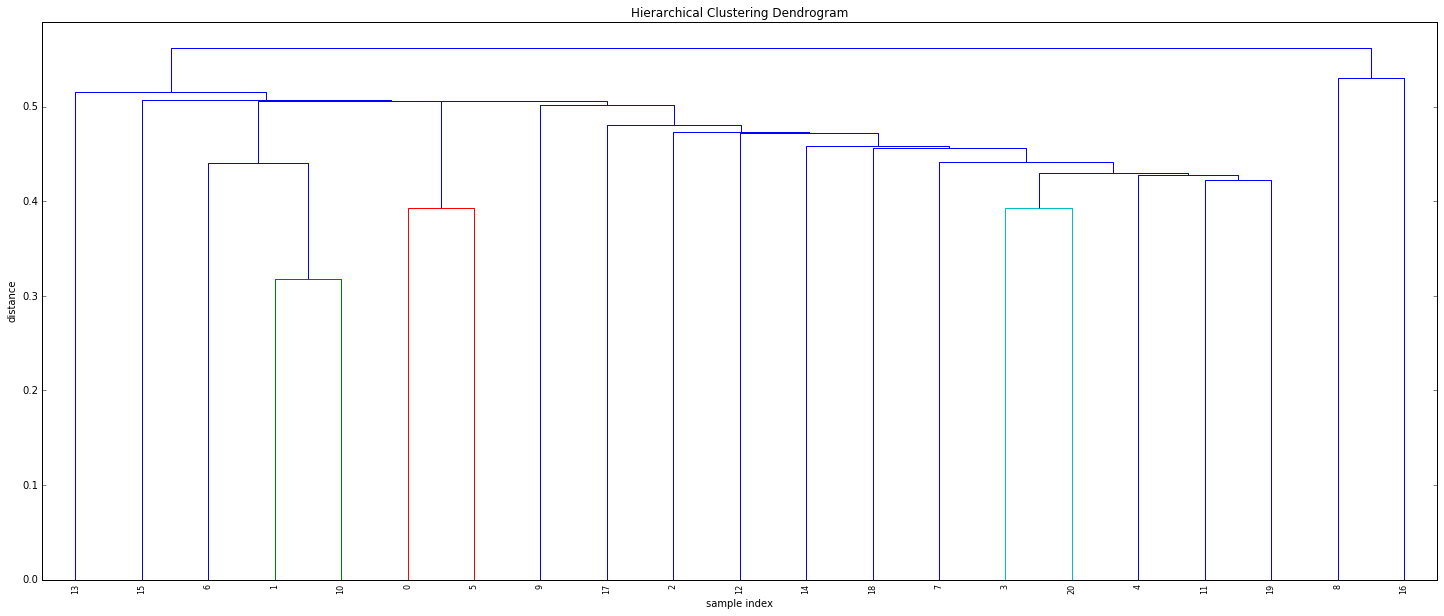

0: ceremony

1: voyage

2: death

3: success

4: downfall

5: meeting

6: visit

7: departure

8: graduation

9: embarrassment

10: journey

11: victory

12: reception

13: invitation

14: dedication

15: surprise

16: vienna

17: rivalry

18: anticipation

19: triumph

20: disappointment

(5, 100)


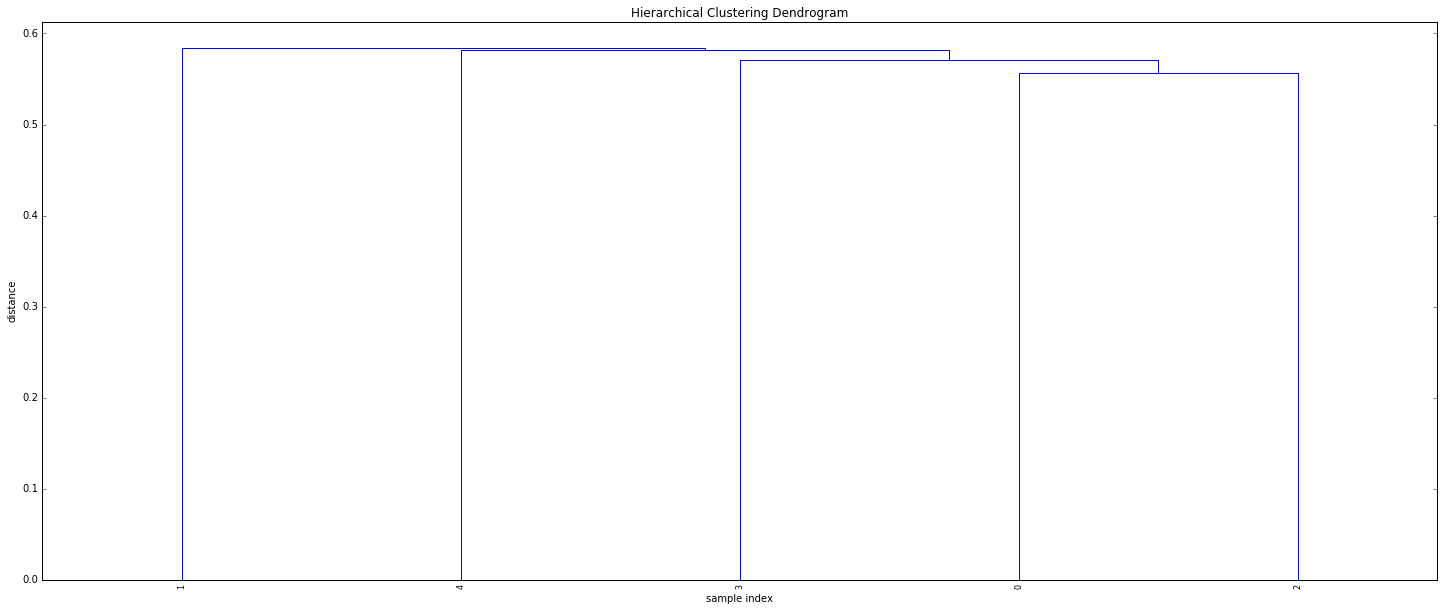

0: arrival

1: uproar

2: funeral

3: couple

4: quarrel

(25, 100)


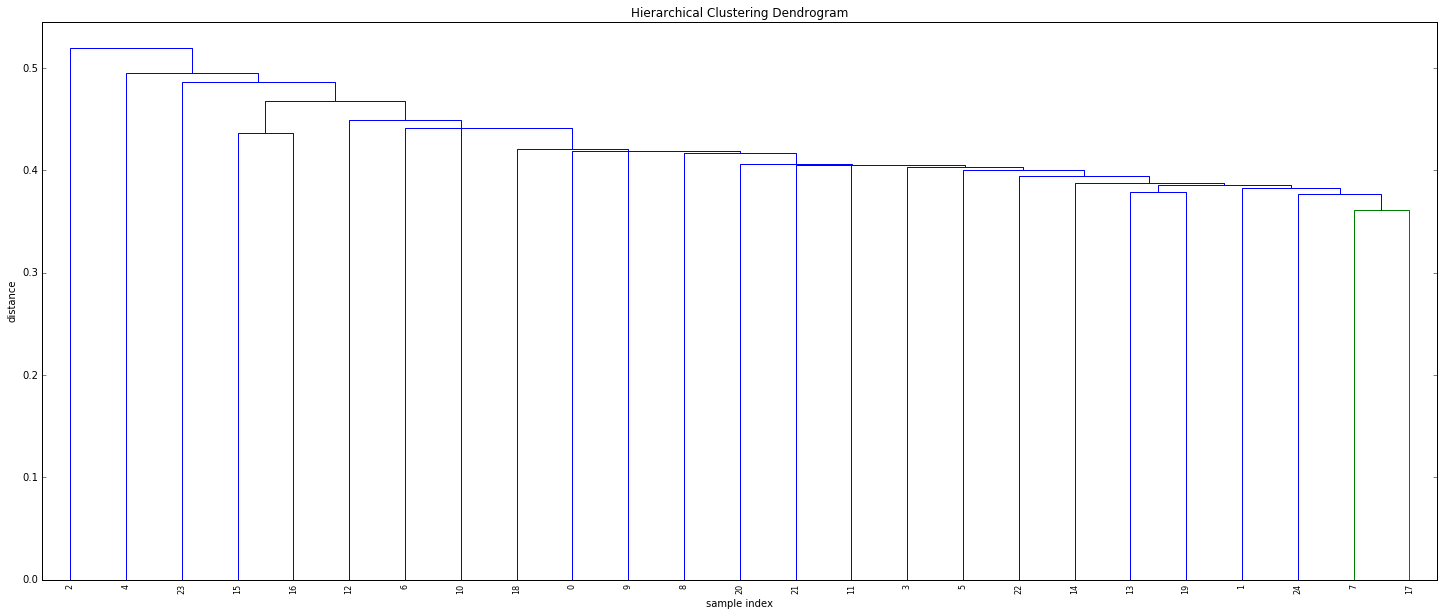

0: raining

1: watering

2: partying

3: ringing

4: strolling

5: splashing

6: skipping

7: chopping

8: railing

9: ironing

10: bowing

11: whipping

12: peering

13: grasping

14: rocking

15: jousting

16: decorating

17: tearing

18: stocking

19: staring

20: stitching

21: yelling

22: slipping

23: glancing

24: biting

(5, 100)


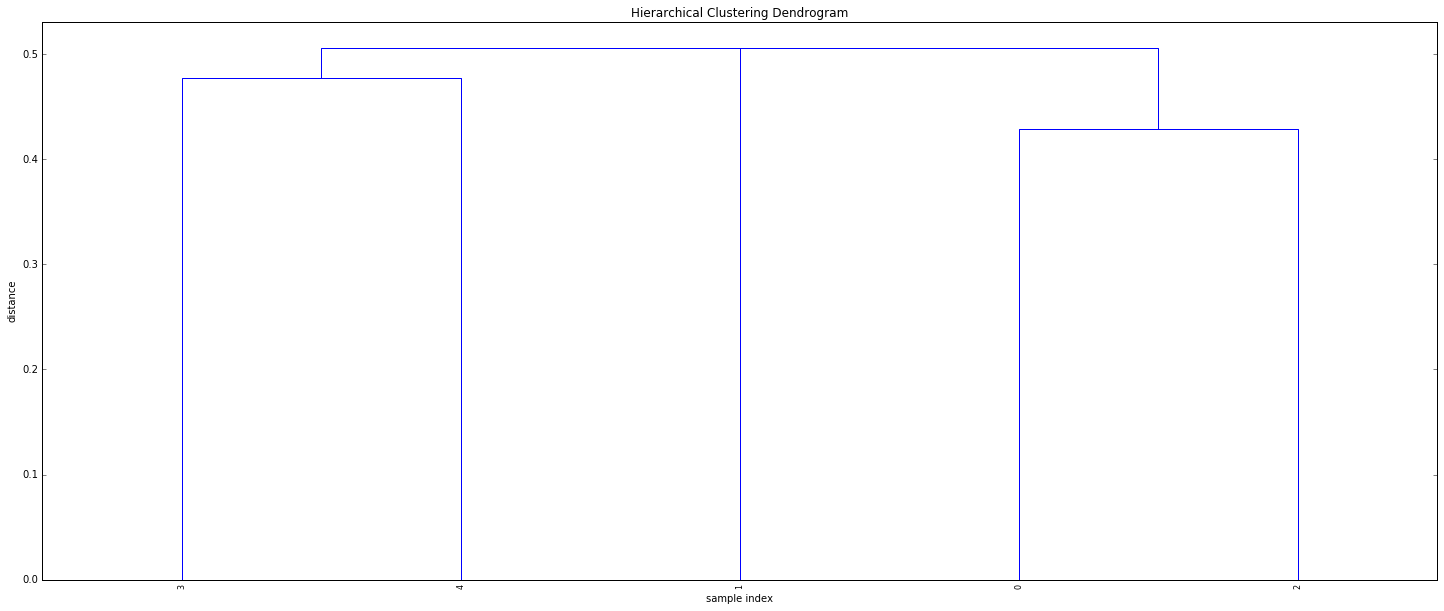

0: luncheon

1: moat

2: quiver

3: surfboard

4: porch

(103, 100)


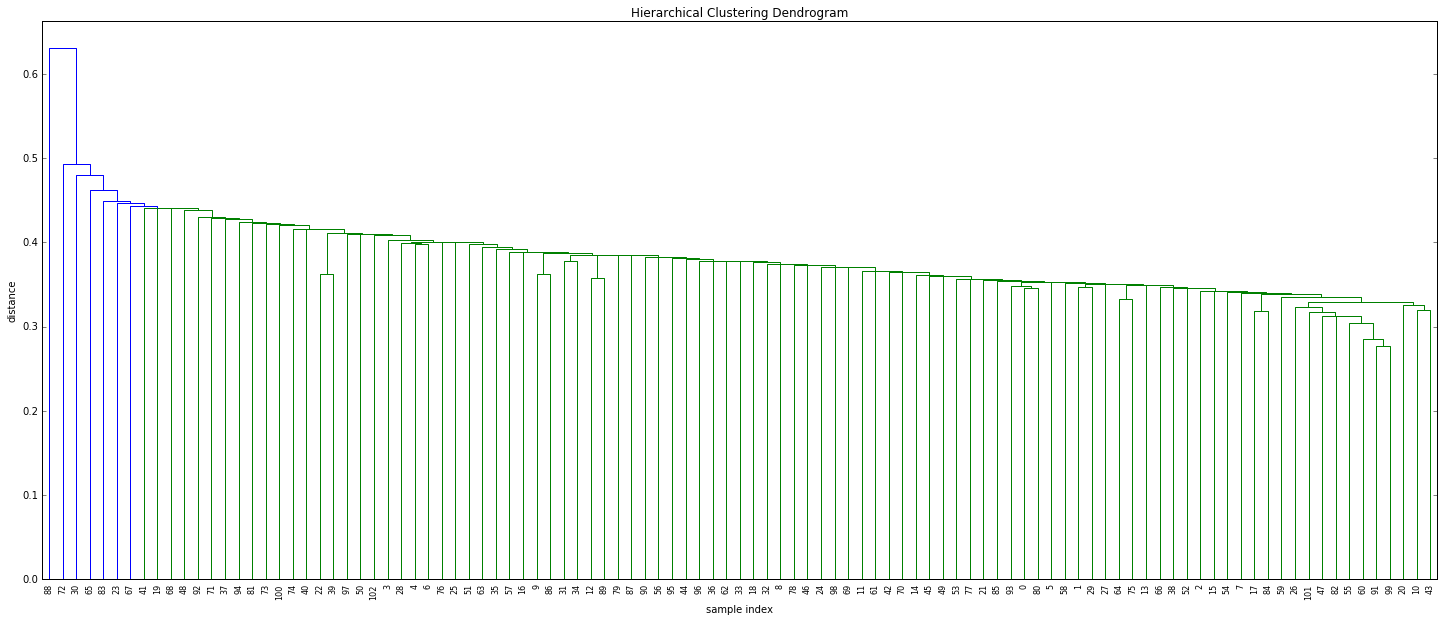

0: gown

1: perch

2: chinaman

3: horseback

4: hibernation

5: brim

6: sneaking

7: trot

8: gnaw

9: stormy

10: mallet

11: mattress

12: stroll

13: jab

14: apron

15: musket

16: blanket

17: beak

18: chimney

19: distraction

20: towel

21: gorgon

22: eyebrow

23: vestibule

24: snowstorm

25: encampment

26: beret

27: helm

28: wander

29: mat

30: consonance

31: aqueduct

32: handlebar

33: squeeze

34: icy

35: antler

36: kneel

37: wheelbarrow

38: peep

39: incline

40: parapet

41: luggage

42: chop

43: punt

44: beige

45: cadbury

46: clump

47: buckle

48: midshipman

49: bayonet

50: kayak

51: periscope

52: hoof

53: bathroom

54: handkerchief

55: sweater

56: watering

57: leash

58: somersault

59: spar

60: raft

61: swagger

62: shipwreck

63: porch

64: gym

65: coolie

66: tripod

67: snatch

68: hut

69: hurry

70: grill

71: ferocity

72: frock

73: hike

74: cornucopia

75: candlestick

76: barricade

77: suitcase

78: armband

79: swerve

80: wand


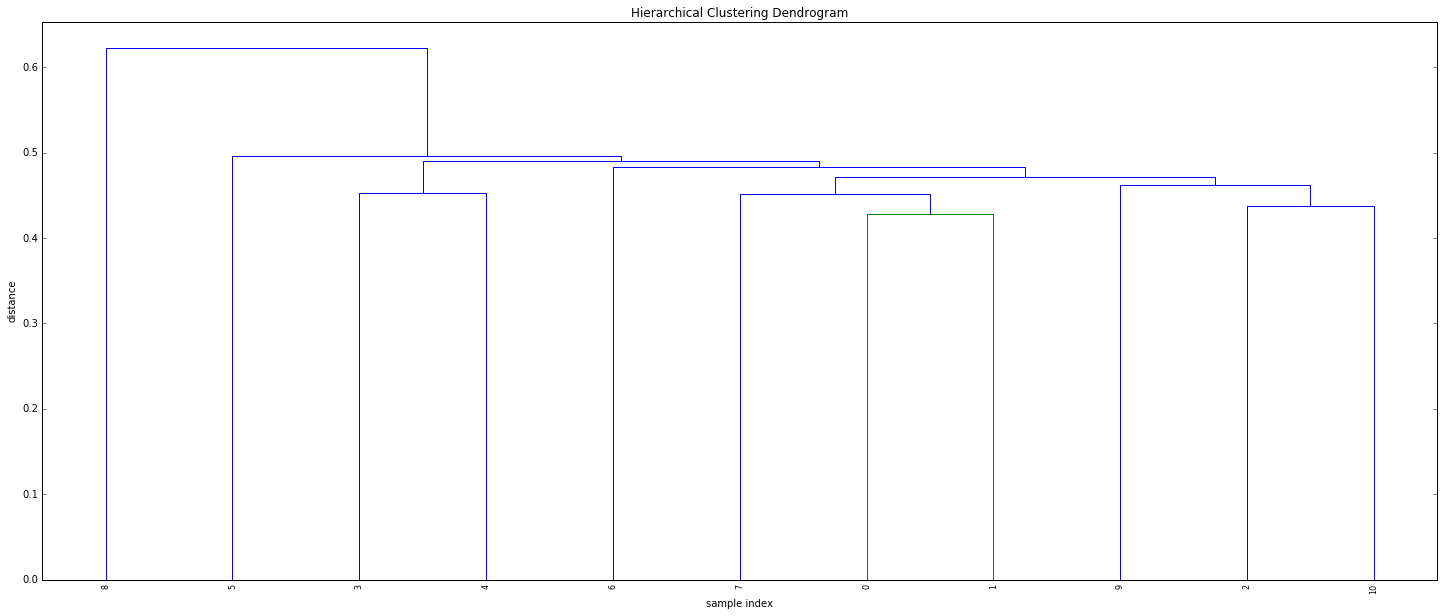

0: plaid

1: infested

2: slammed

3: seperated

4: tilted

5: yoke

6: snatched

7: thatched

8: webbed

9: cracked

10: tripped

(6, 100)


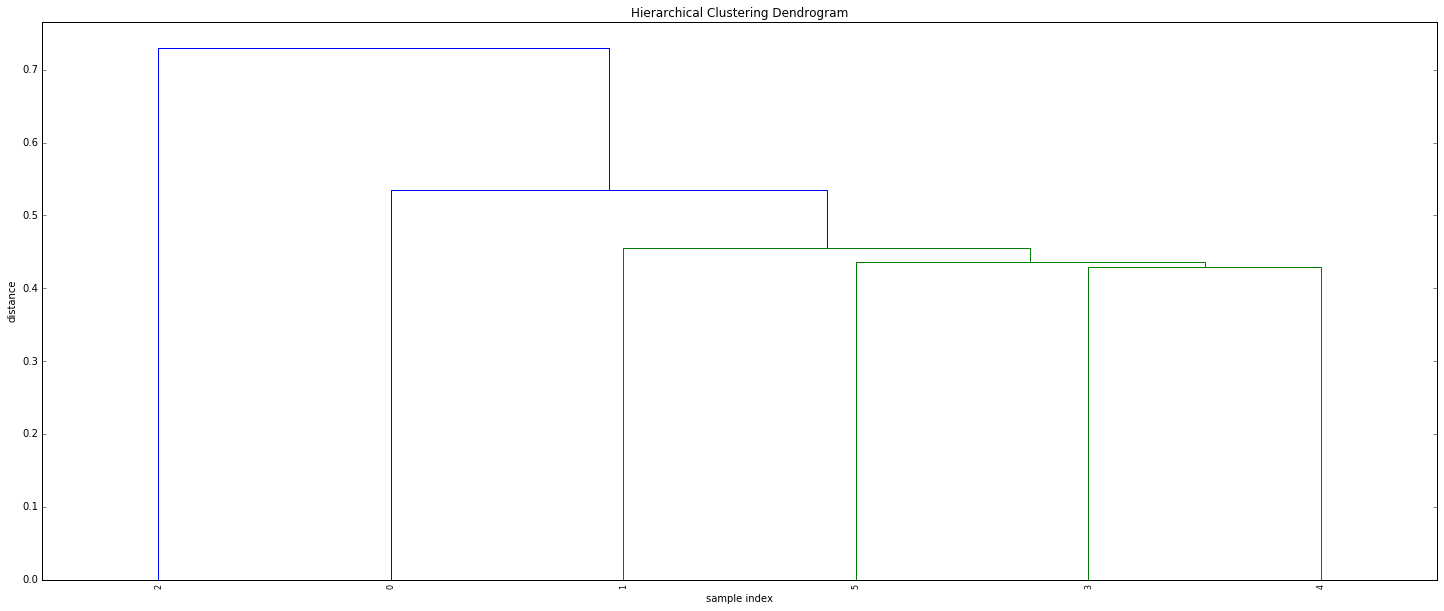

0: rattled

1: contorted

2: engrossed

3: tangled

4: drenched

5: oversized

(25, 100)


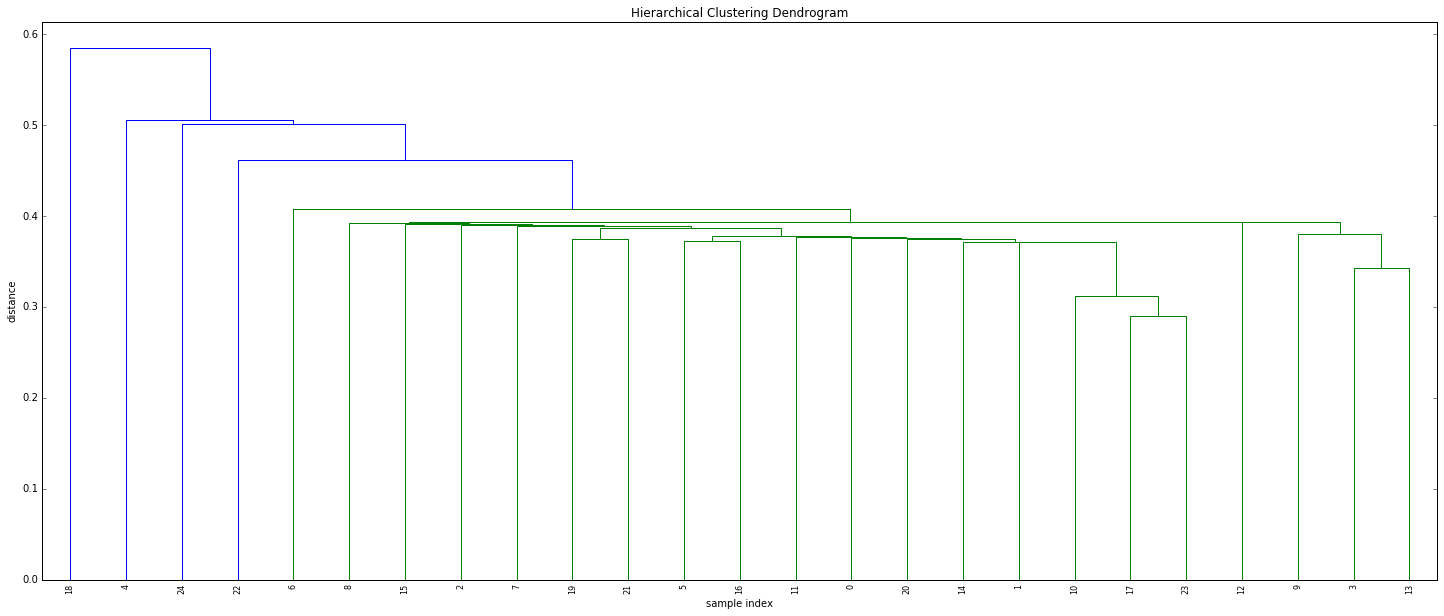

0: shovel

1: bump

2: stool

3: stove

4: hurdle

5: quill

6: crawl

7: sock

8: warmth

9: canter

10: stomp

11: rake

12: serif

13: vane

14: peep

15: fireplace

16: roar

17: scythe

18: erupt

19: neat

20: clap

21: puff

22: grab

23: mustache

24: cataract

(39, 100)


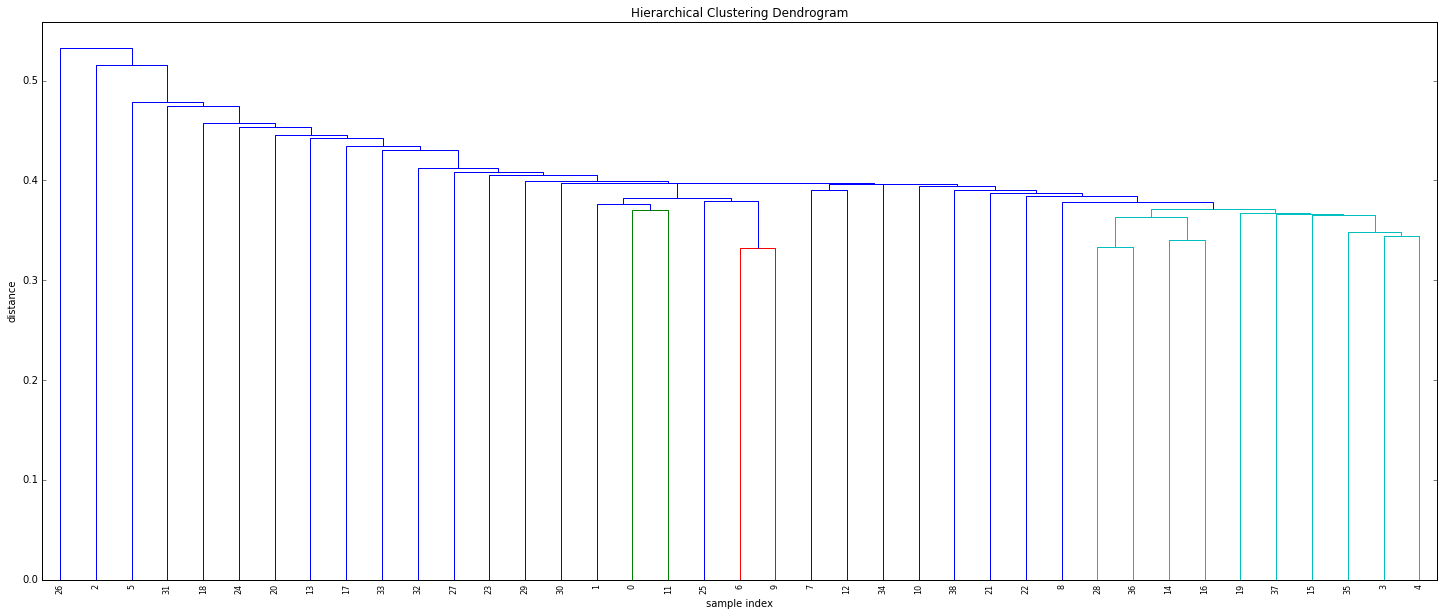

0: gown

1: hairstyle

2: unmarked

3: gallop

4: puddle

5: bathe

6: perched

7: thumbs

8: jagged

9: pedestal

10: stumble

11: braided

12: tread

13: tumble

14: kettle

15: nap

16: jumper

17: peek

18: cupboard

19: stirrup

20: manmade

21: slant

22: dreary

23: serif

24: drown

25: vane

26: frigid

27: hectic

28: peep

29: pouch

30: chimney

31: sporty

32: sofa

33: napkin

34: nighttime

35: wrench

36: pebble

37: whittington

38: lofty

(3, 100)


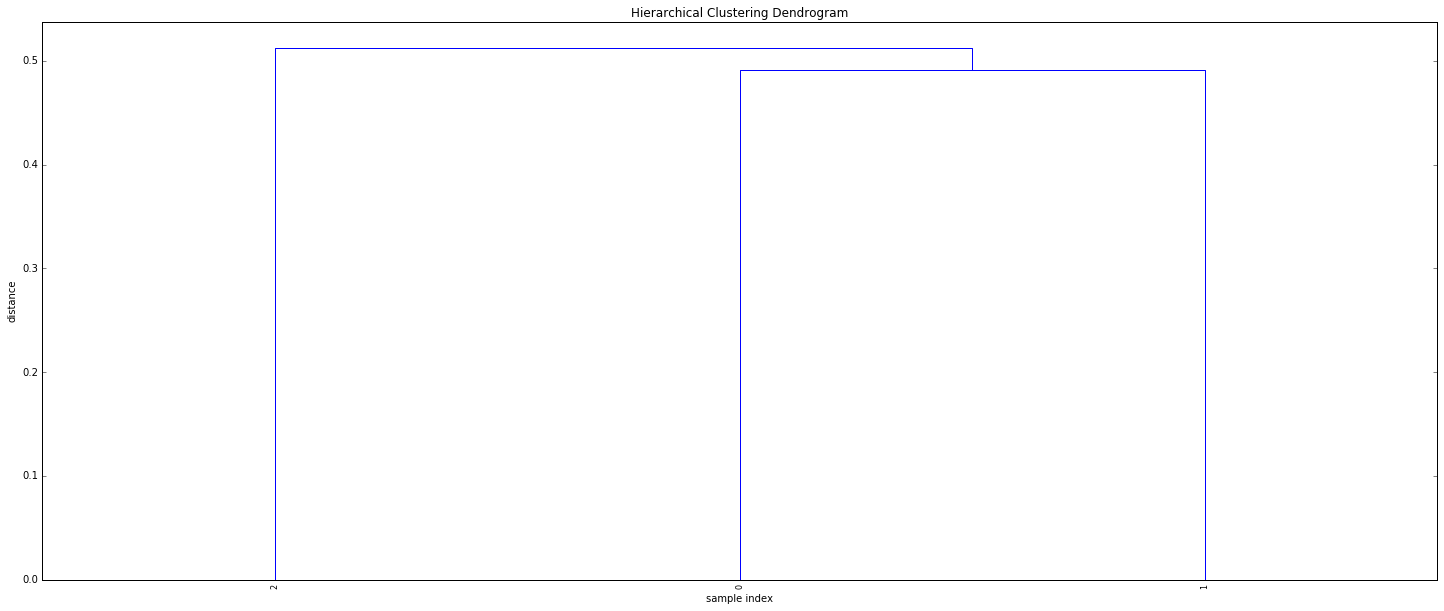

0: scarves

1: curtains

2: maidens

(39, 100)


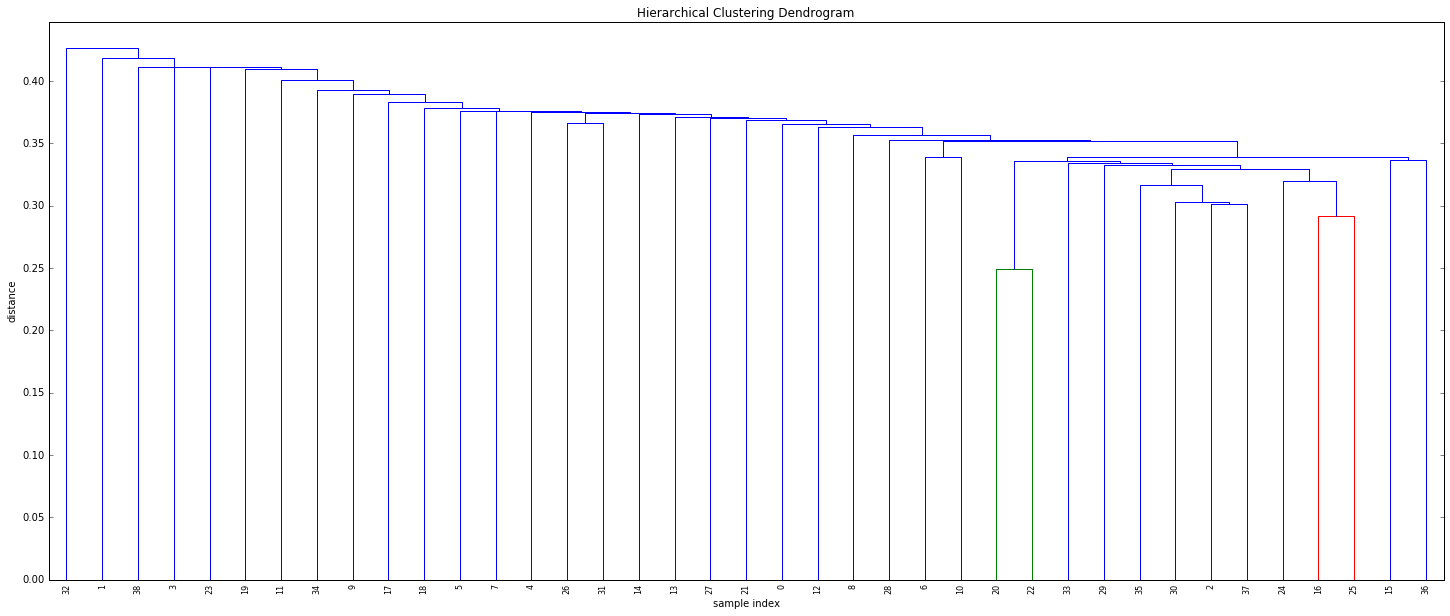

0: sinews

1: errands

2: elbows

3: faun

4: icicles

5: heels

6: spoons

7: curls

8: ripples

9: chimneys

10: sneakers

11: onlookers

12: germs

13: sails

14: ribbons

15: cheeks

16: battlements

17: mouths

18: buckets

19: whiskers

20: kickers

21: leggings

22: slacks

23: rowers

24: mallets

25: tassels

26: blankets

27: spikes

28: gallows

29: stilts

30: nostrils

31: laurels

32: buddies

33: wrinkles

34: cages

35: forearms

36: daisies

37: hips

38: oars

(5, 100)


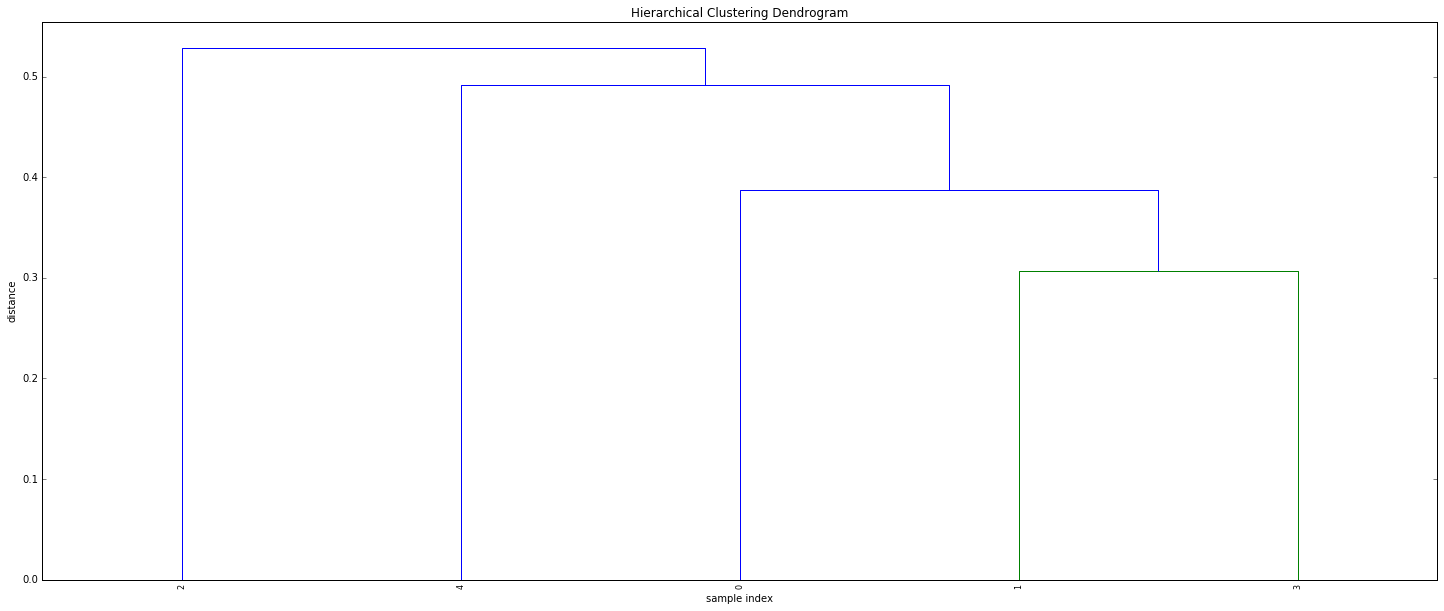

0: swallowing

1: breathing

2: cheating

3: swelling

4: aging

(50, 100)


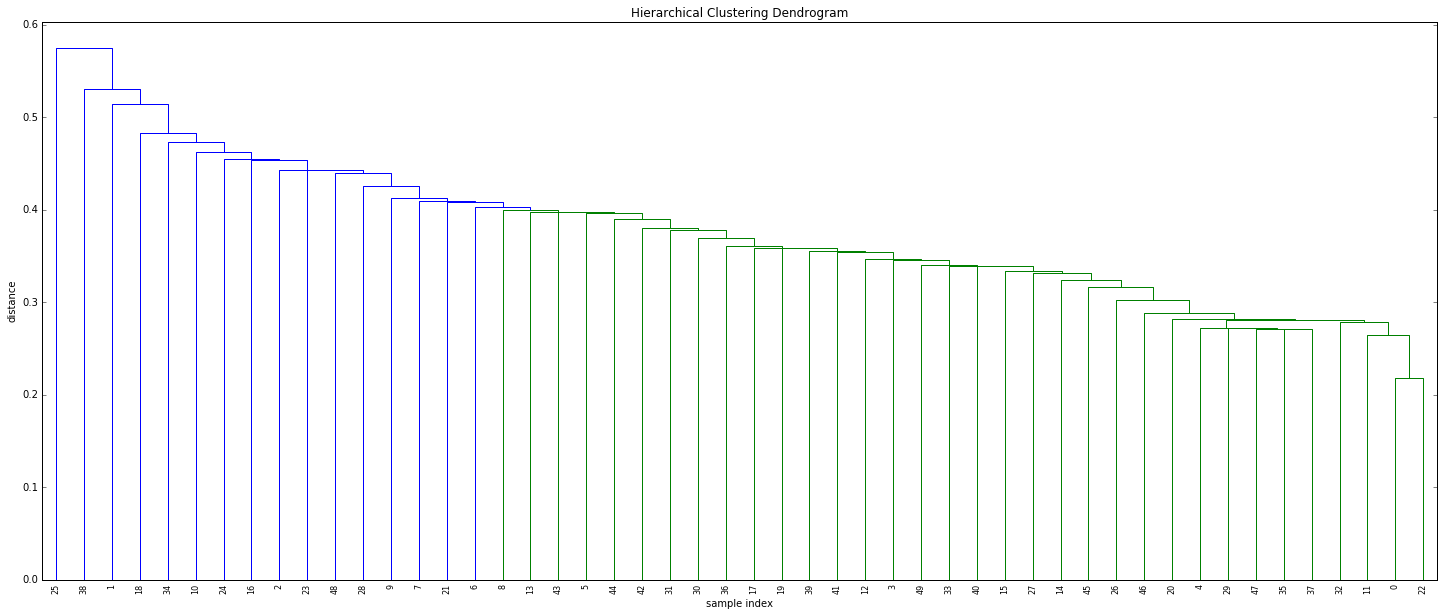

0: headache

1: infant

2: toughness

3: hunger

4: bleeding

5: defect

6: bovine

7: mild

8: drug

9: purification

10: firearm

11: kidney

12: distress

13: mood

14: disease

15: poison

16: fod

17: treatment

18: tropic

19: injury

20: alcoholism

21: exhaustion

22: inflammation

23: cannibalism

24: intolerance

25: junk

26: pain

27: sickness

28: weakness

29: fatigue

30: blood

31: relaxation

32: coma

33: smoking

34: sustenance

35: addiction

36: alcohol

37: anxiety

38: diligence

39: fragile

40: hygiene

41: premature

42: pill

43: excitement

44: mortality

45: obesity

46: muscle

47: disorder

48: neglect

49: delicate

(5, 100)


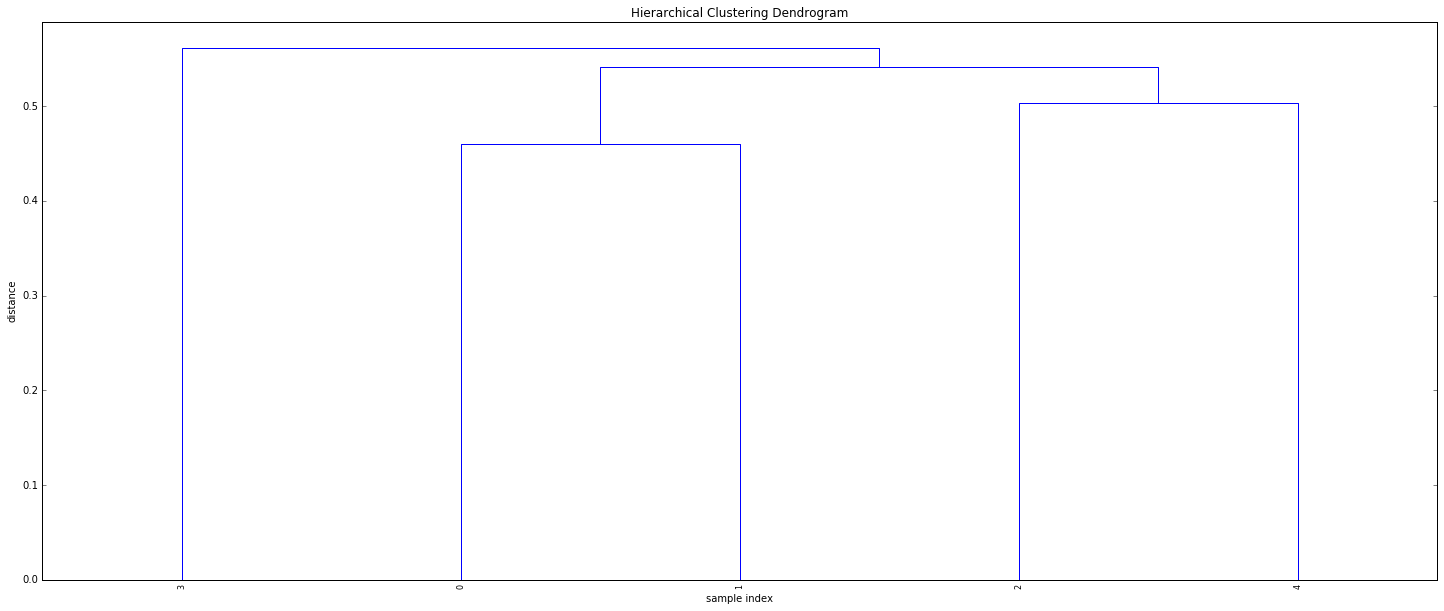

0: acupuncture

1: nutrition

2: cure

3: starvation

4: smell

(25, 100)


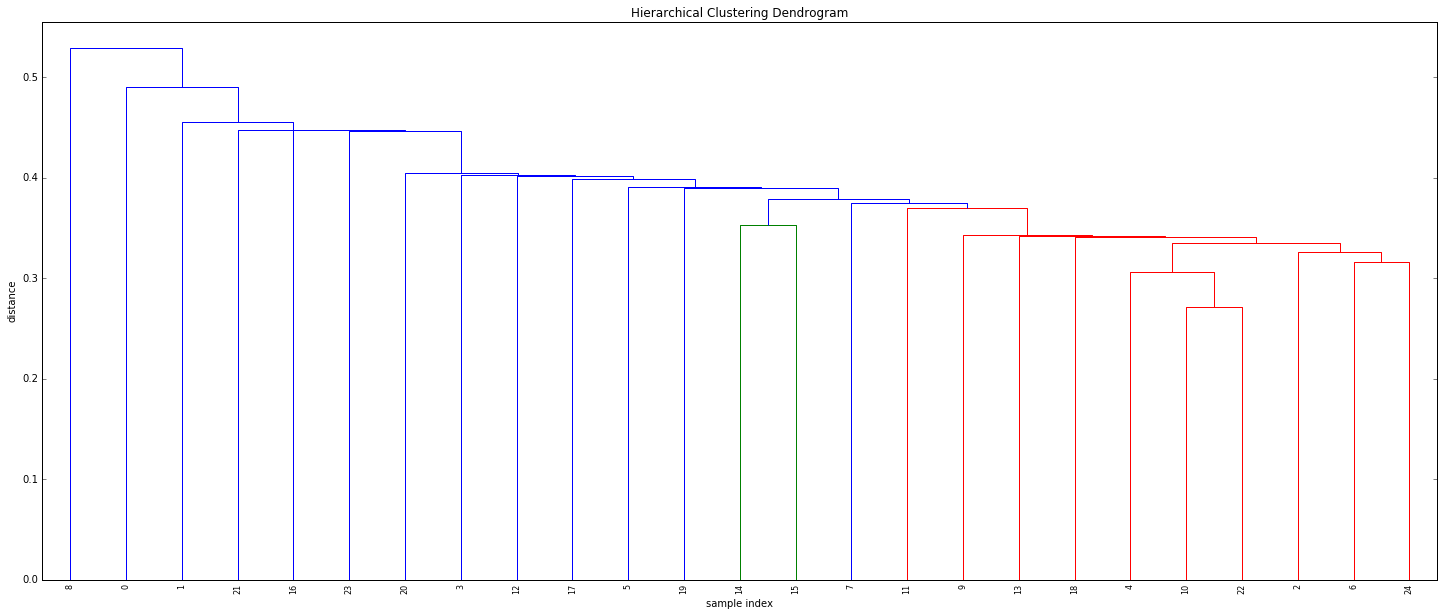

0: juvenile

1: illness

2: excessive

3: mental

4: neuralgia

5: repetitive

6: abnormal

7: improper

8: sacrificial

9: appetite

10: unhealthy

11: nervous

12: lean

13: caffeine

14: unpleasant

15: painful

16: protective

17: stomach

18: accidental

19: unsafe

20: harmful

21: selective

22: anemia

23: stress

24: fetal

(7, 100)


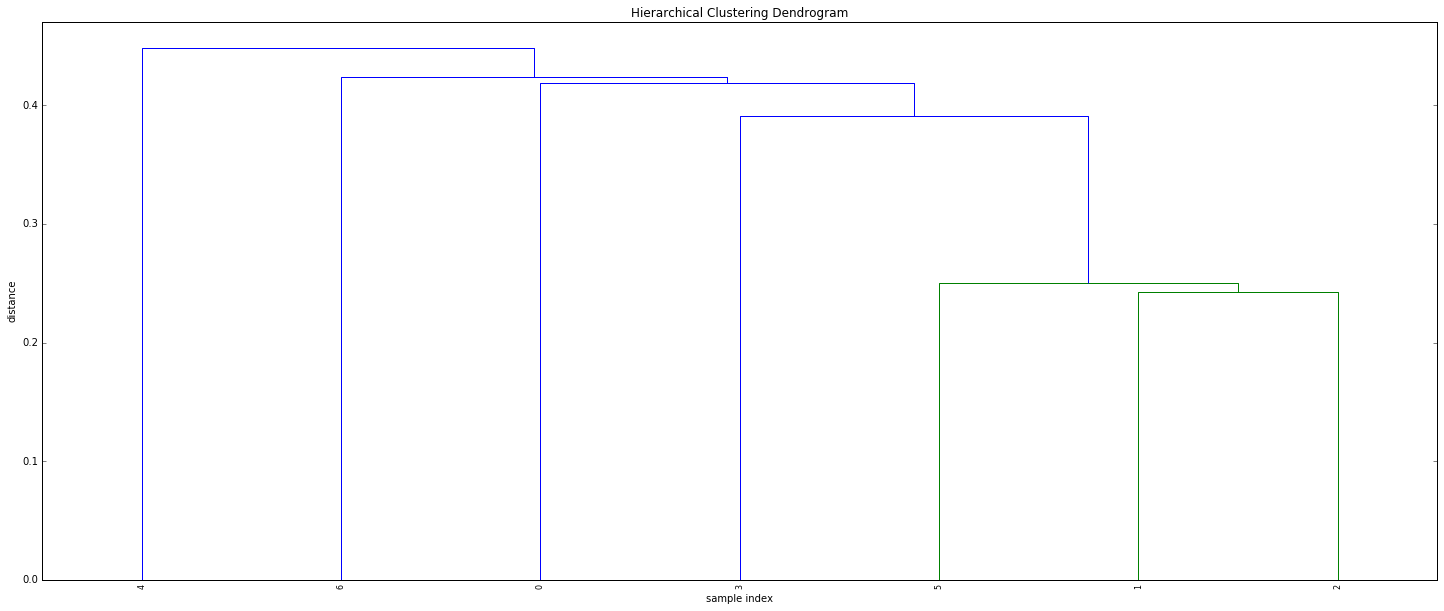

0: aches

1: muscles

2: lungs

3: mosquitoes

4: risks

5: nerves

6: pills

(45, 100)


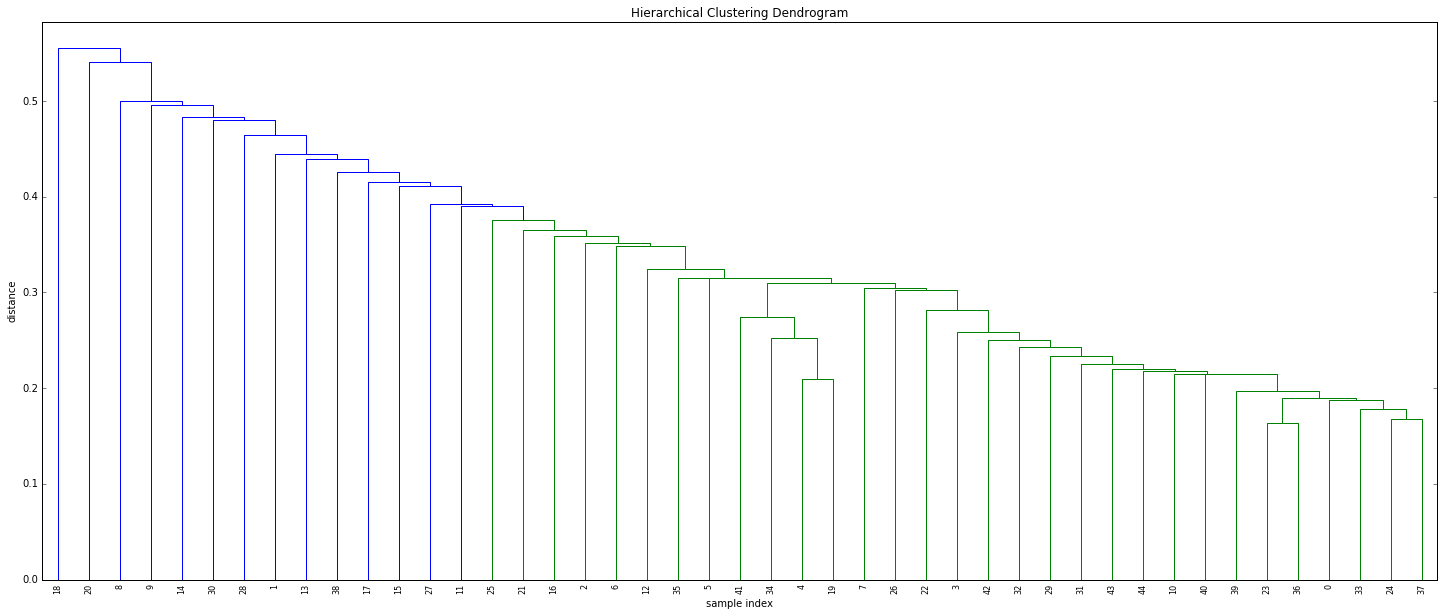

0: dick

1: miner

2: wonderland

3: drummer

4: actress

5: chef

6: gypsy

7: dancer

8: reunion

9: owner

10: ray

11: ballet

12: hal

13: wee

14: bowie

15: veteran

16: boogie

17: fox

18: lamo

19: actor

20: mark

21: jam

22: wendy

23: tom

24: willie

25: brown

26: babe

27: reporter

28: joy

29: jill

30: zeppelin

31: keith

32: bud

33: buck

34: singer

35: artist

36: jim

37: charlie

38: outlaw

39: betty

40: annie

41: entertainer

42: bob

43: robin

44: jack

(4, 100)


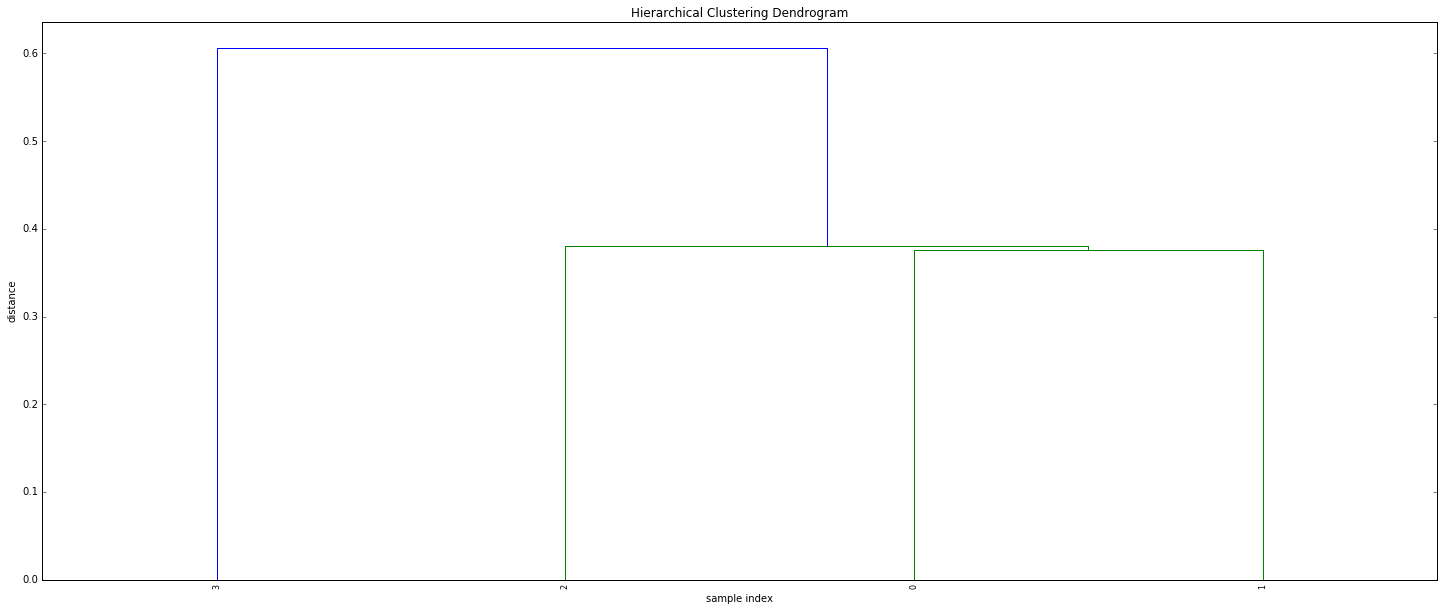

0: wonderland

1: judy

2: garland

3: mark

(16, 100)


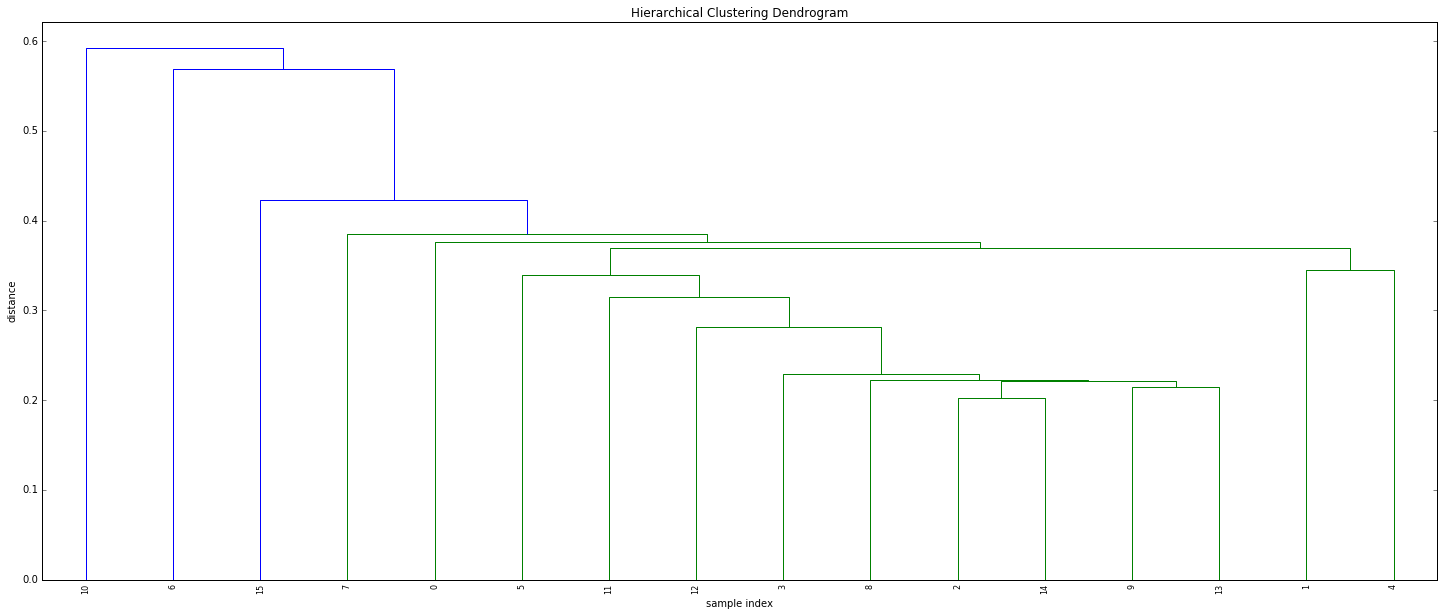

0: brown

1: musician

2: johnny

3: sam

4: artist

5: elvis

6: slim

7: titanic

8: betty

9: nick

10: idle

11: lynch

12: wendy

13: tom

14: tommy

15: osbourne

(4, 100)


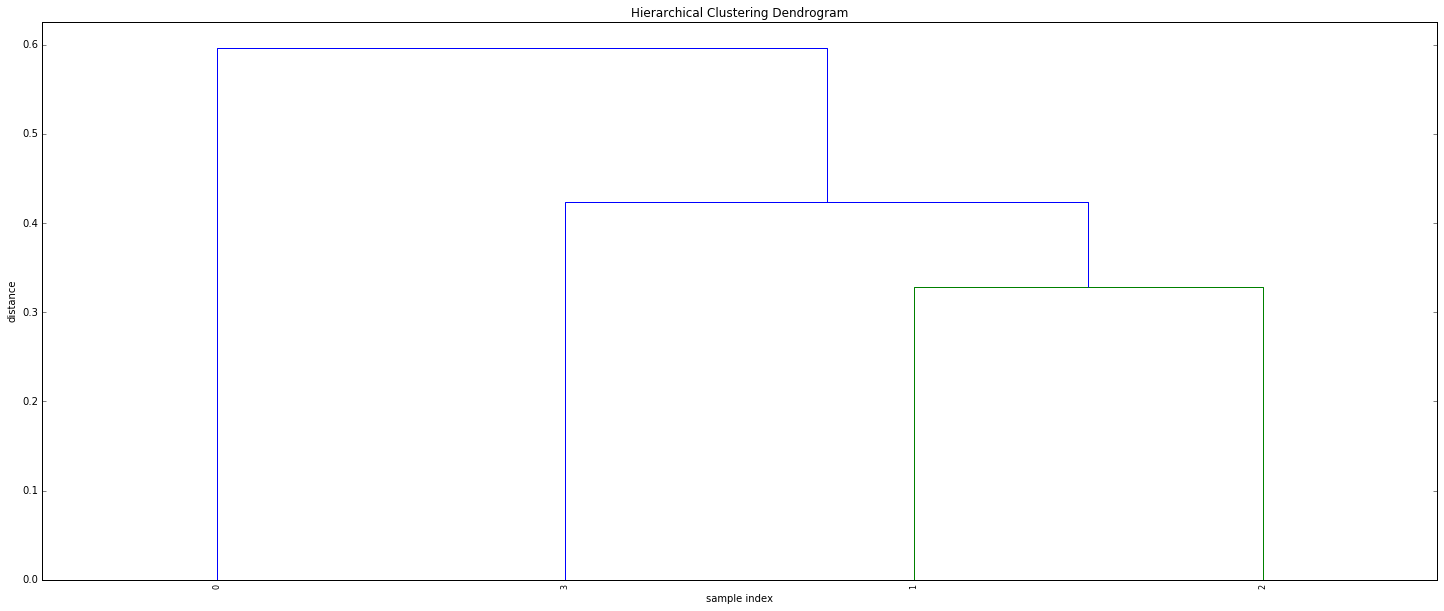

0: building

1: dining

2: shopping

3: hiking

(43, 100)


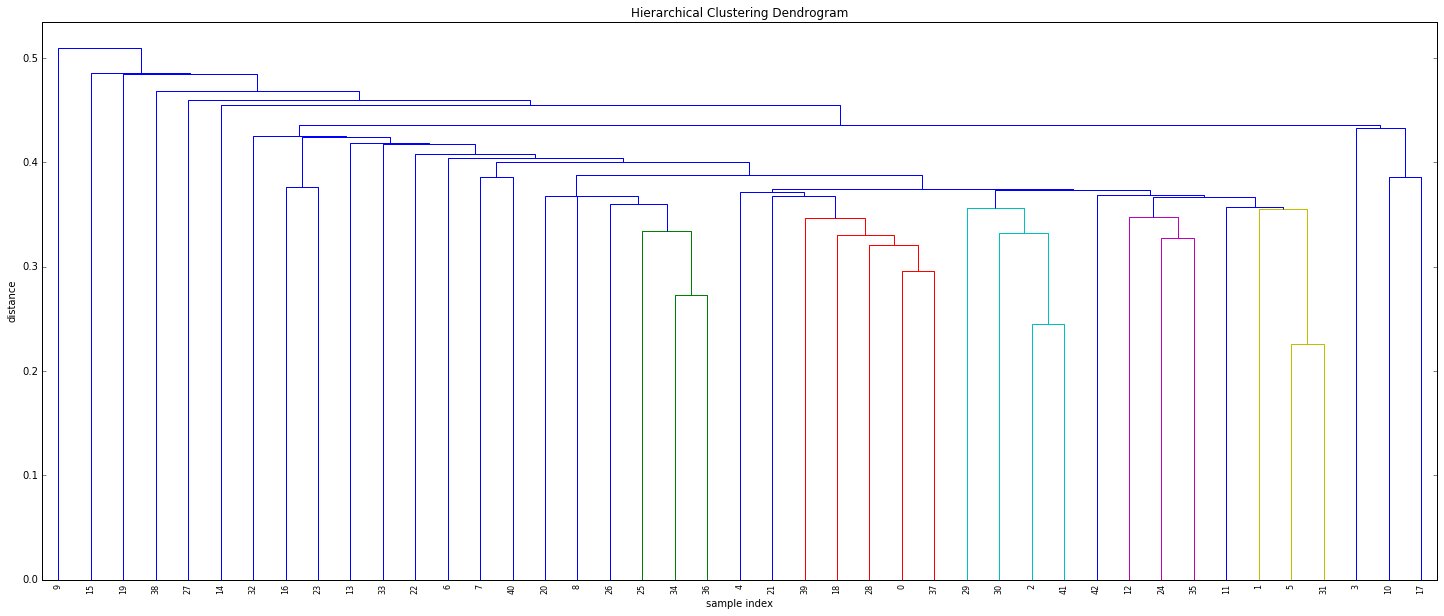

0: bridge

1: neighborhood

2: palace

3: visitor

4: train

5: village

6: prairie

7: niagara

8: corner

9: home

10: tourist

11: city

12: lighthouse

13: apartment

14: spur

15: vacation

16: plantation

17: dining

18: station

19: heritage

20: entrance

21: street

22: garden

23: farm

24: park

25: trail

26: dock

27: construction

28: railroad

29: arch

30: tower

31: town

32: moor

33: restaurant

34: harbor

35: plaza

36: bay

37: tunnel

38: historic

39: road

40: aeroplane

41: castle

42: montreal

(7, 100)


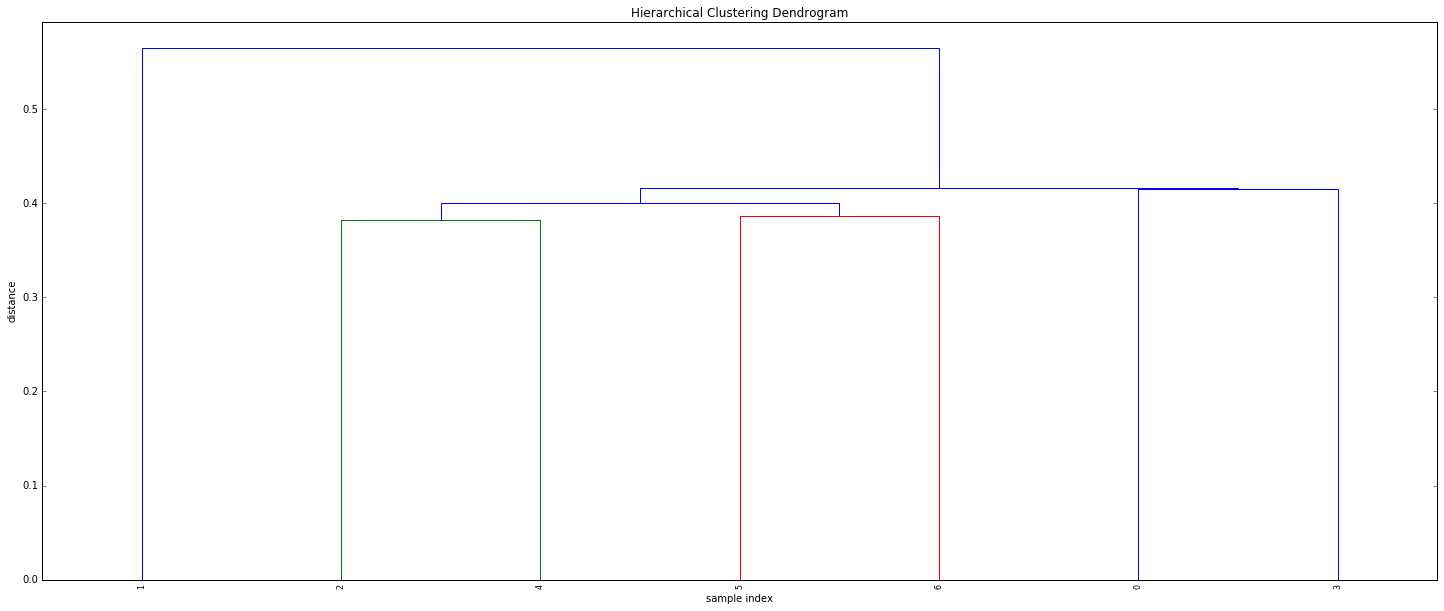

0: lawn

1: picturesque

2: dam

3: ranch

4: bay

5: railroad

6: avenue

(12, 100)


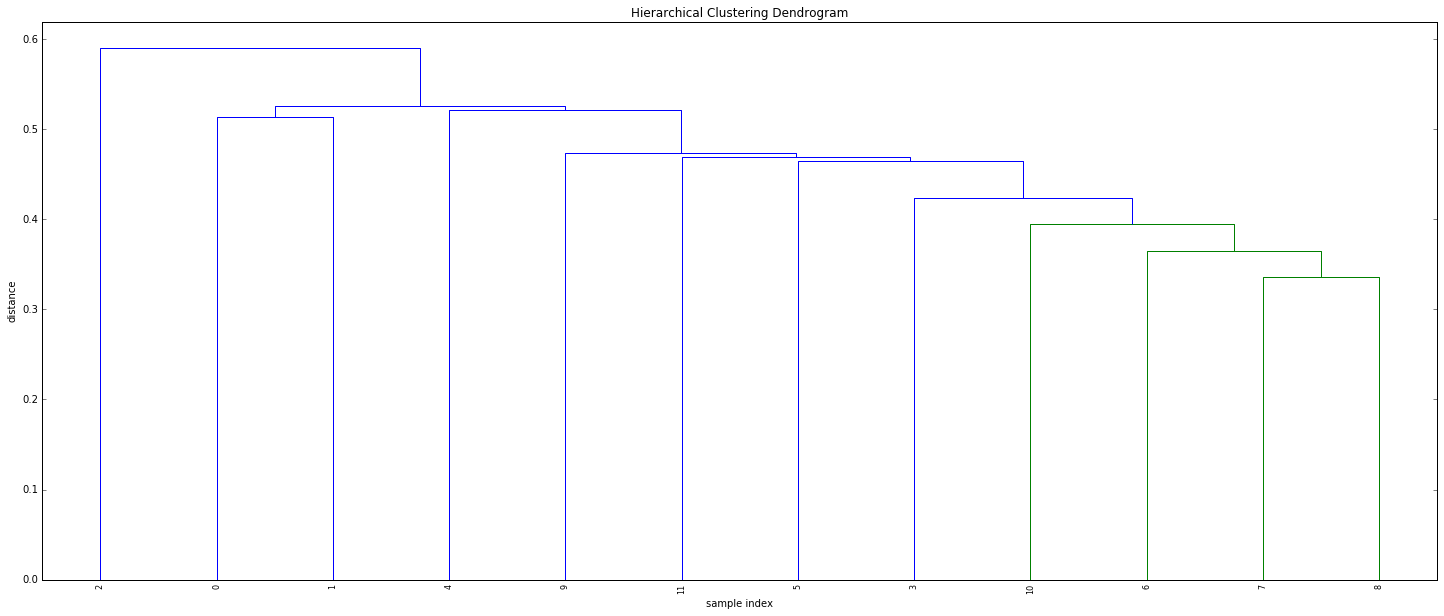

0: urban

1: wildlife

2: center

3: seaside

4: rail

5: dome

6: waterfront

7: niagara

8: skyscraper

9: baths

10: flagpole

11: meridian

(10, 100)


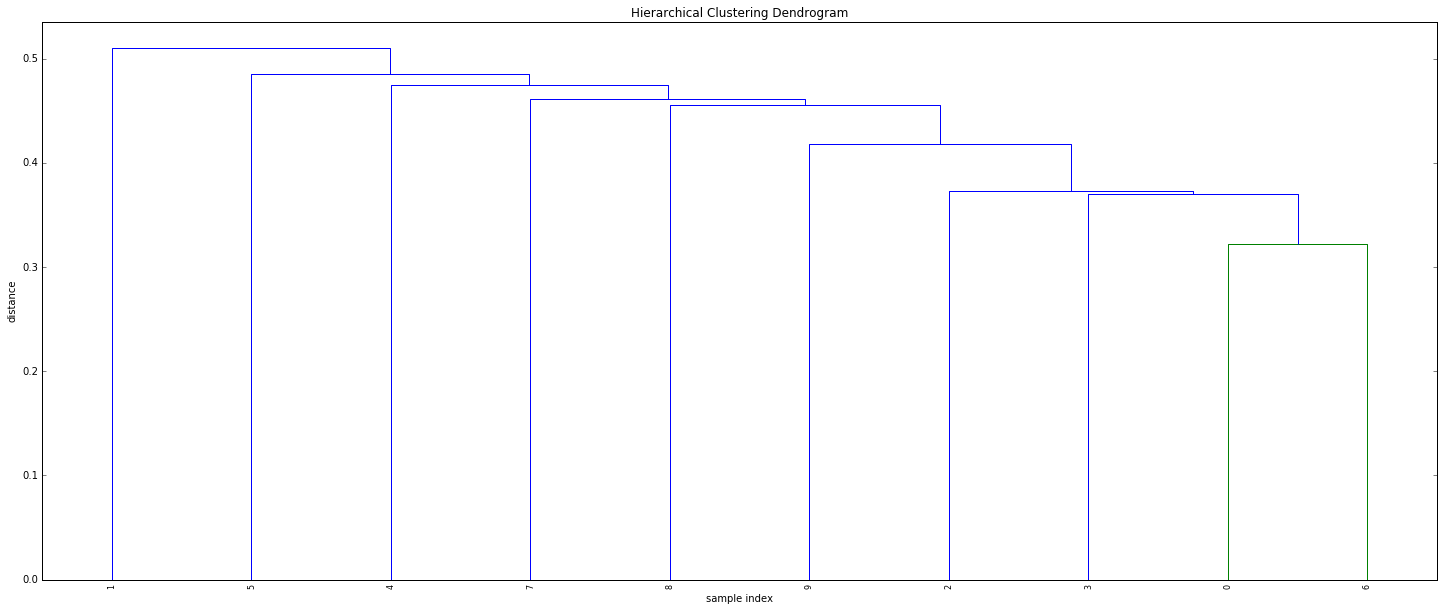

0: buildings

1: visitors

2: docks

3: streets

4: sights

5: crossroads

6: houses

7: arches

8: cities

9: gardens

(3, 100)


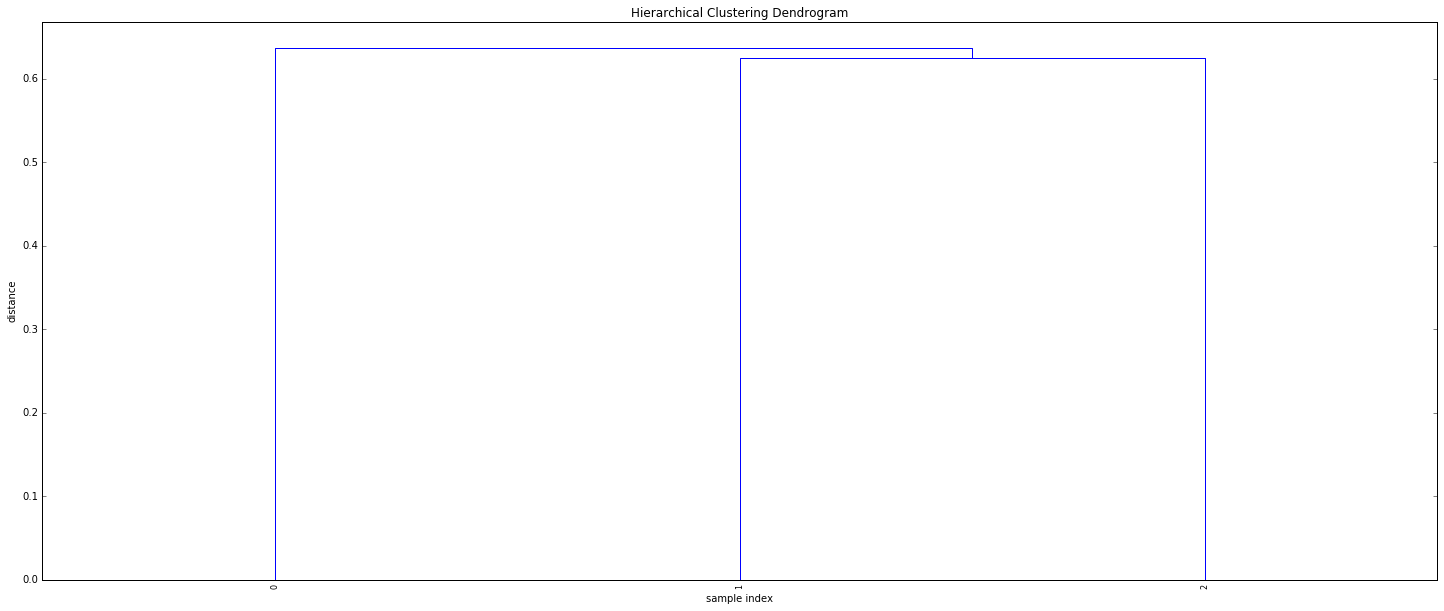

0: viking

1: king

2: conquering

(30, 100)


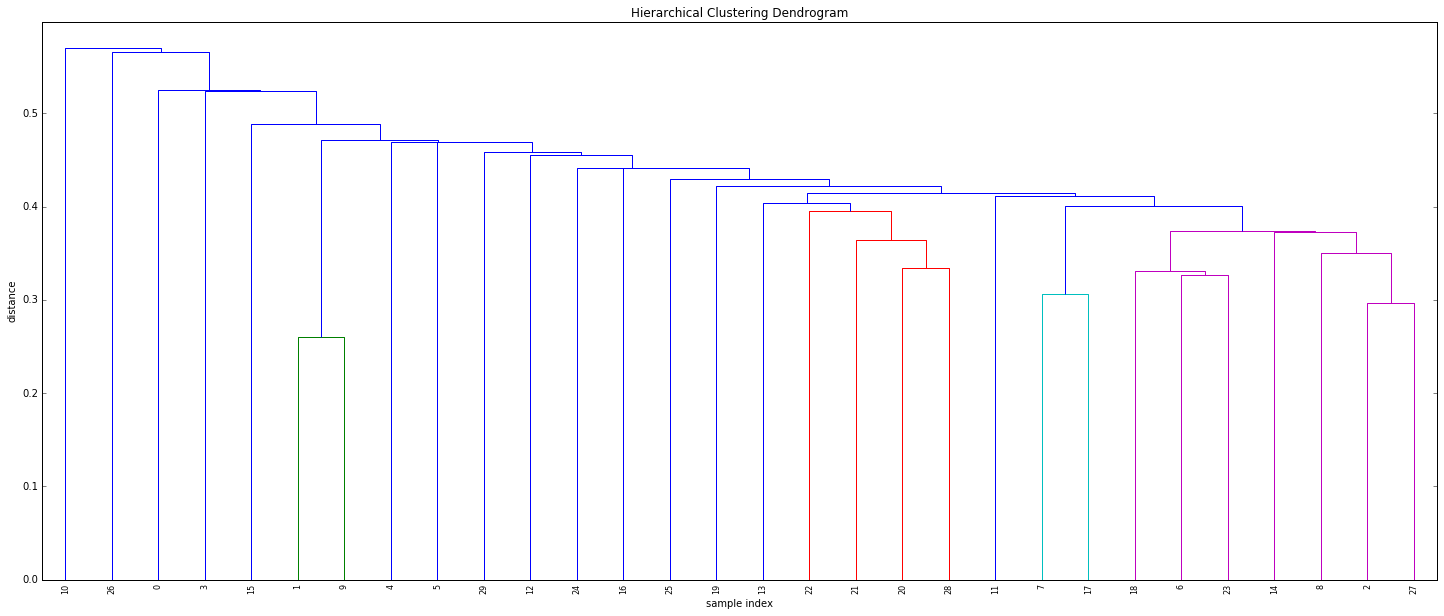

0: refuge

1: england

2: egypt

3: royal

4: sack

5: britain

6: ottoman

7: empire

8: judea

9: scotland

10: anglo

11: sikh

12: greco

13: napoleon

14: saxon

15: babylon

16: sinai

17: kingdom

18: mughal

19: spain

20: throne

21: king

22: sultan

23: mongol

24: roman

25: rome

26: captivity

27: persia

28: emperor

29: nobility

(3, 100)


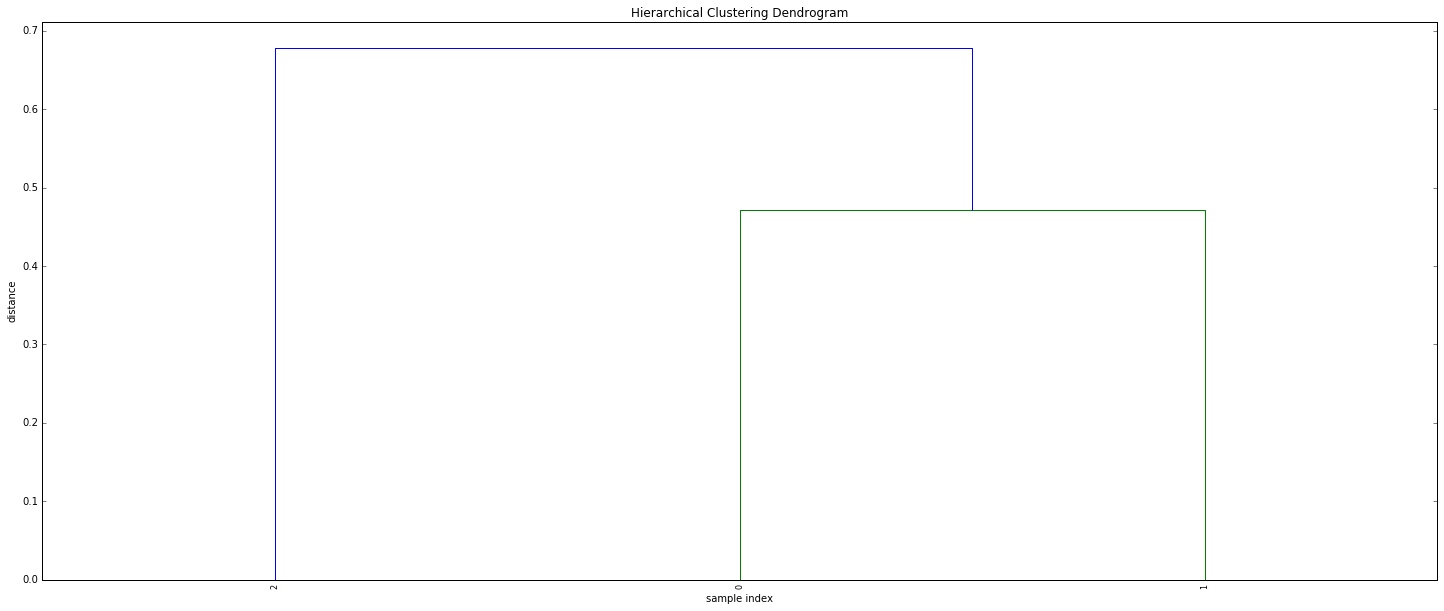

0: britain

1: england

2: sparta

(14, 100)


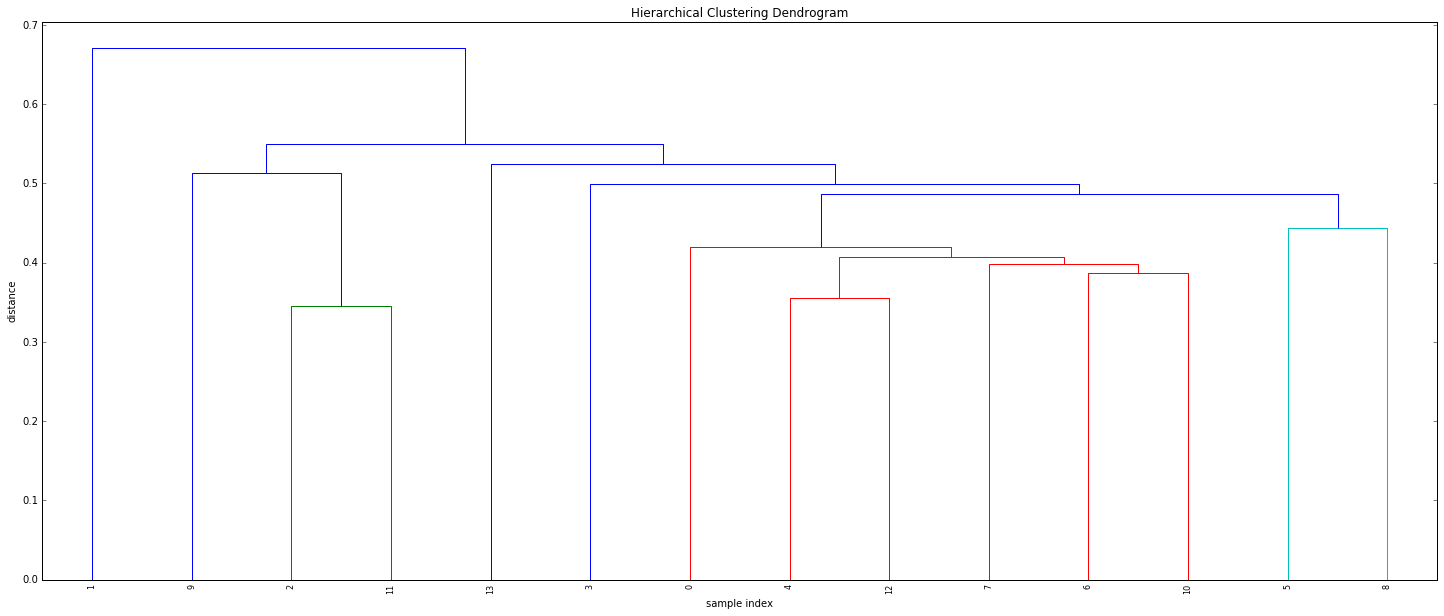

0: corinthian

1: great

2: italy

3: ruler

4: moorish

5: crown

6: roman

7: aztec

8: imperial

9: britain

10: persian

11: greece

12: bohemian

13: fortress

(3, 100)


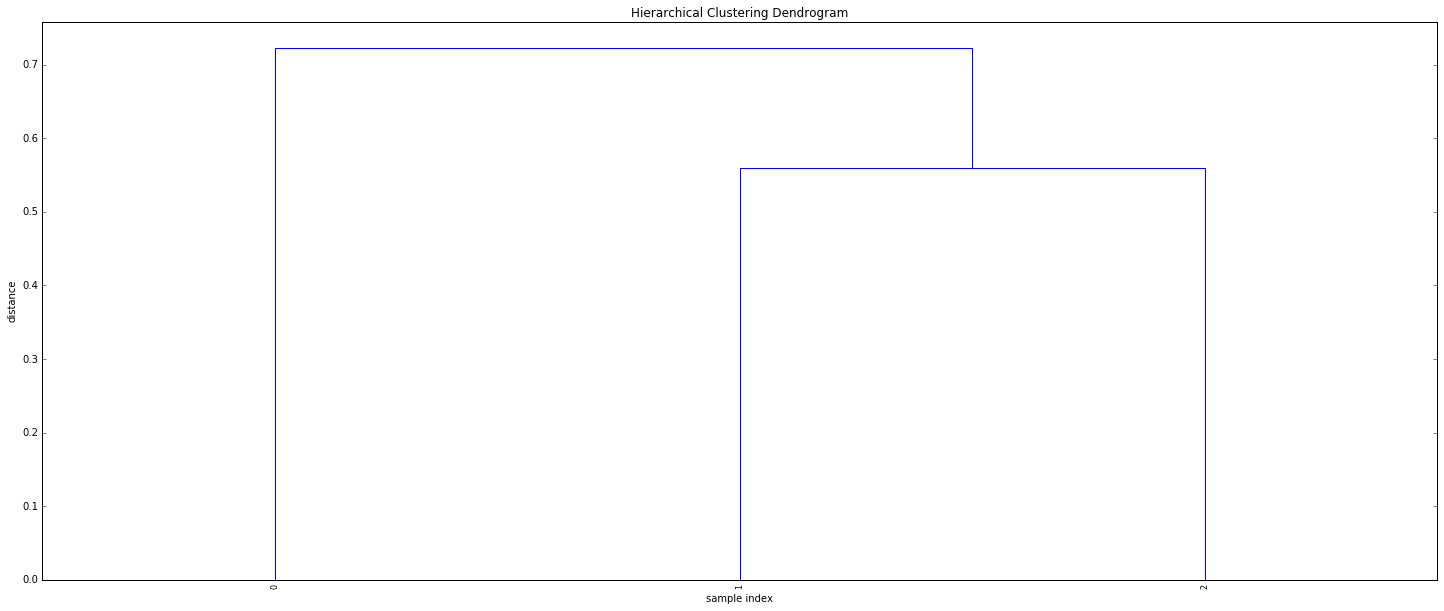

0: knights

1: reigns

2: naples

(31, 100)


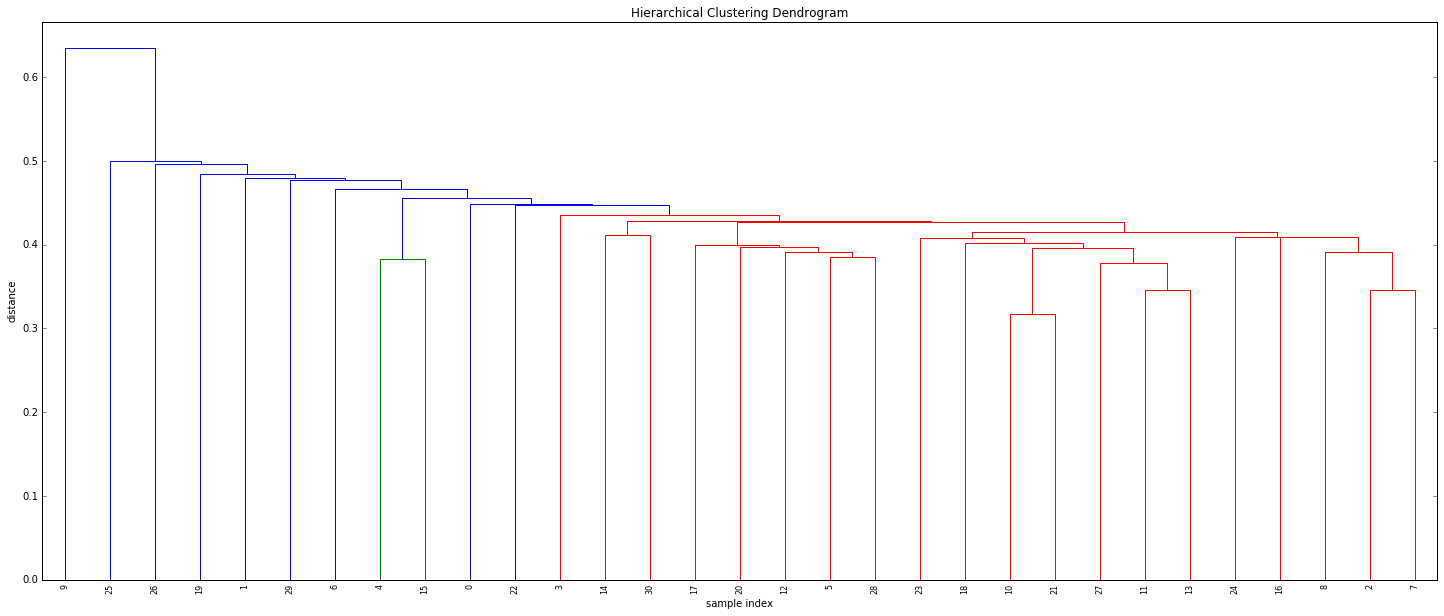

0: beautiful

1: golden

2: serpent

3: nonsense

4: barbarian

5: fable

6: curious

7: devil

8: destiny

9: title

10: wonderful

11: strange

12: allegory

13: mysterious

14: idol

15: warrior

16: maiden

17: cyborg

18: vicious

19: invisible

20: anthropomorphic

21: weird

22: penguin

23: magic

24: mythical

25: eden

26: urn

27: magical

28: tale

29: cradle

30: fairy

(64, 100)


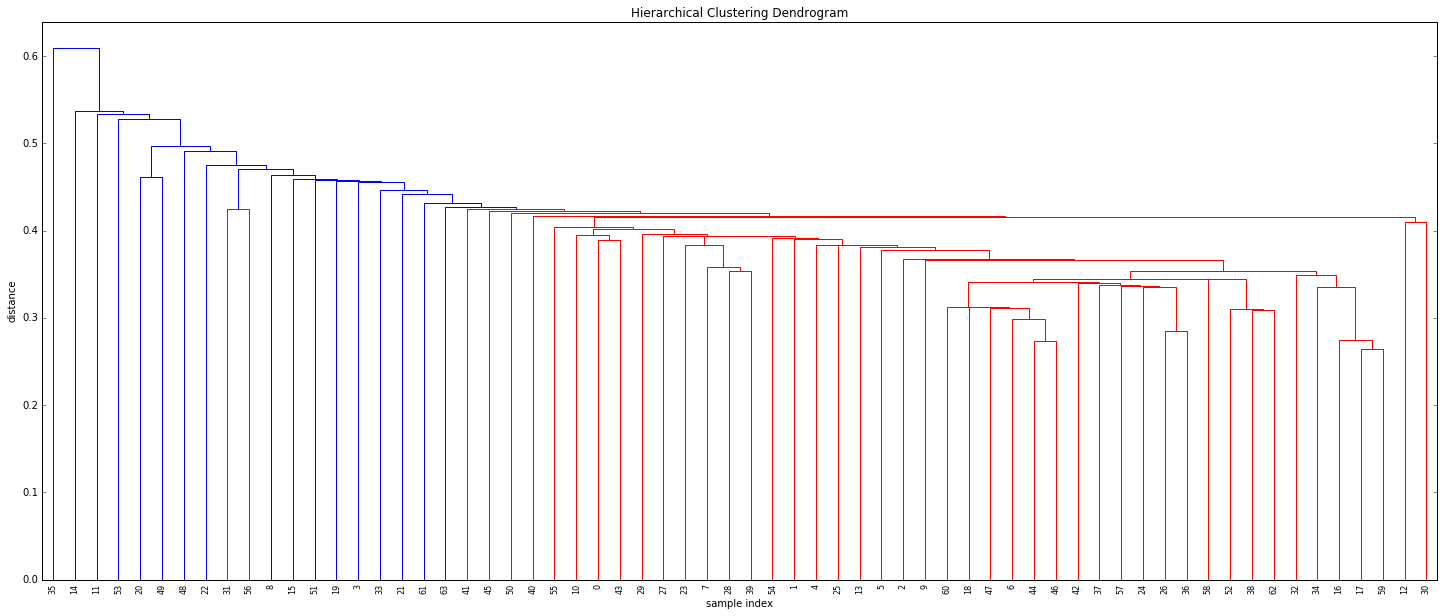

0: nemesis

1: sinister

2: narnia

3: colossal

4: depiction

5: wardrobe

6: lion

7: wit

8: scrooge

9: angel

10: portrait

11: emblem

12: dawn

13: myth

14: figure

15: fu

16: poem

17: story

18: curse

19: personification

20: title

21: idiot

22: babel

23: irony

24: wizard

25: character

26: vampire

27: genius

28: passion

29: sword

30: paradise

31: master

32: epic

33: athena

34: mystery

35: pun

36: narrator

37: hero

38: monster

39: beauty

40: savage

41: illustration

42: beast

43: caricature

44: witch

45: statue

46: bull

47: keeper

48: shadow

49: banner

50: heroic

51: inspiration

52: ghost

53: photograph

54: mythology

55: magic

56: doctor

57: villain

58: dragon

59: tale

60: treasure

61: fairy

62: creature

63: imitation

(6, 100)


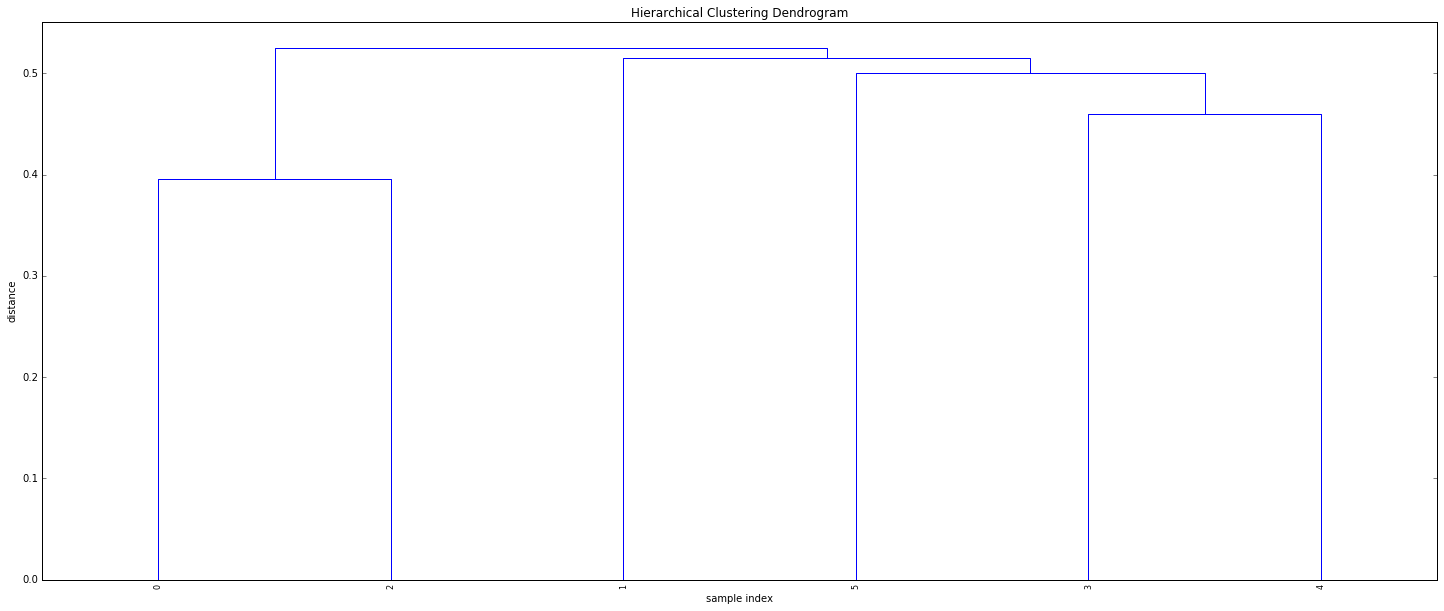

0: sketch

1: destiny

2: quote

3: lion

4: fairy

5: legend

(5, 100)


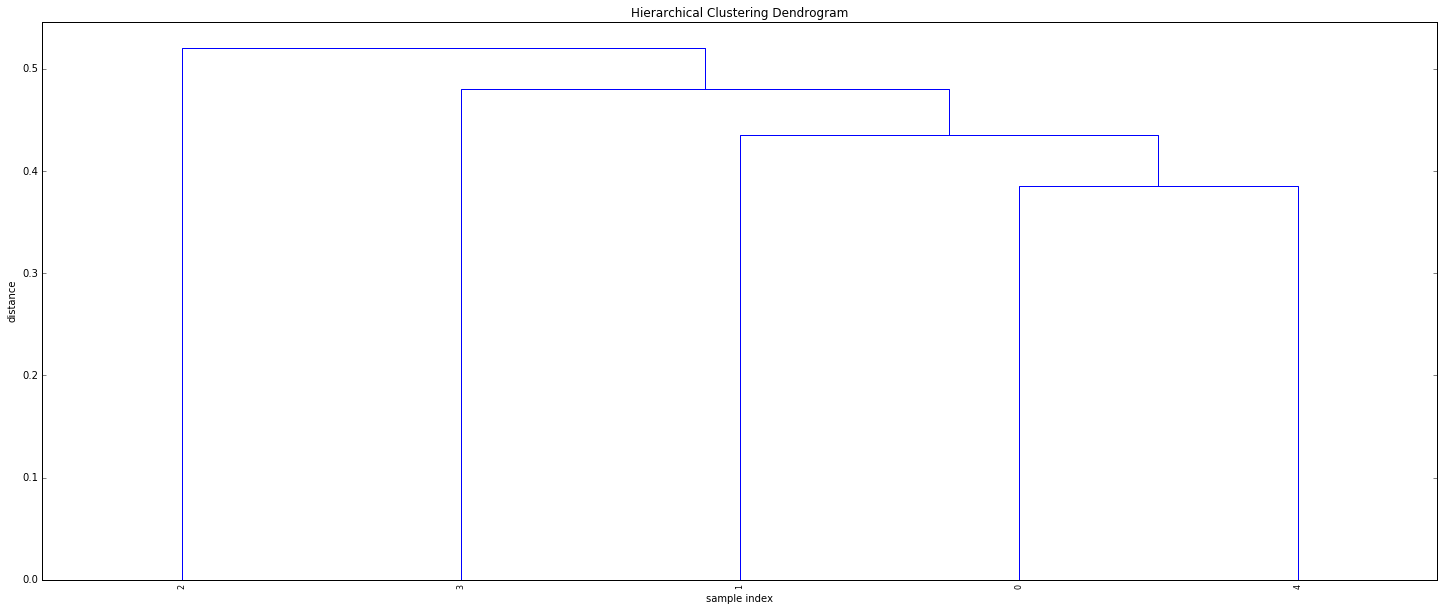

0: beasts

1: tales

2: hermes

3: monsters

4: elves

(24, 100)


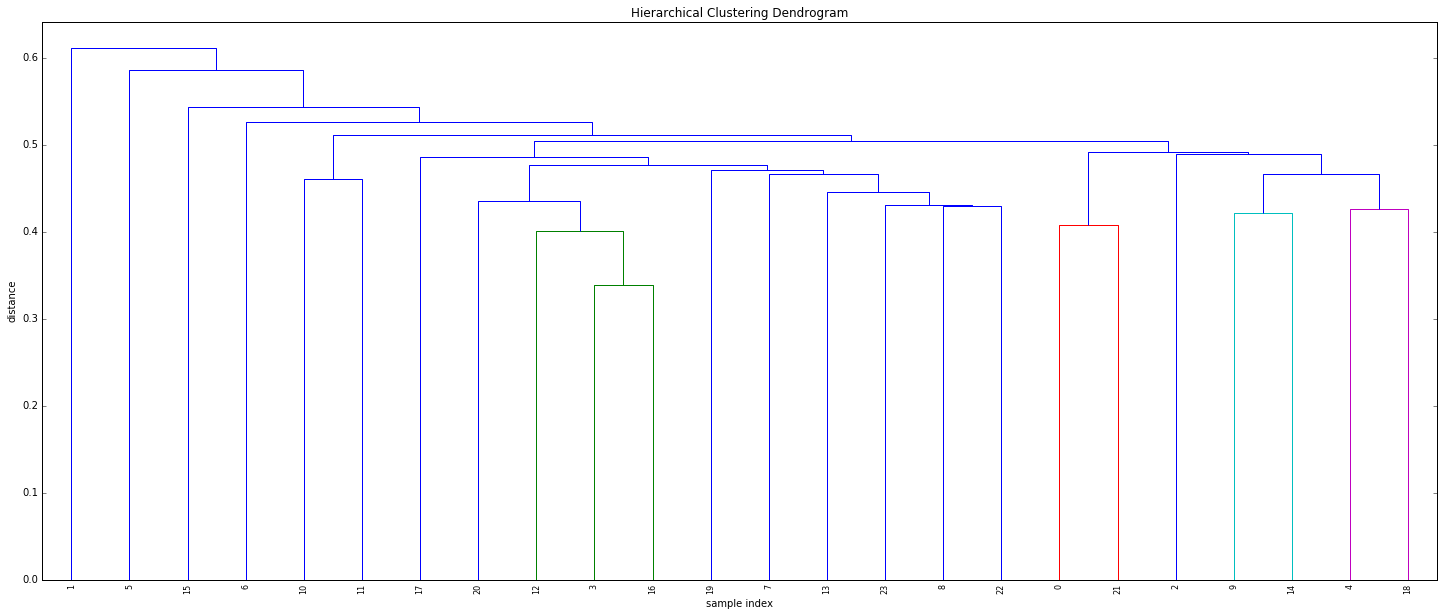

0: classification

1: non

2: solution

3: flexibility

4: design

5: conversion

6: system

7: content

8: scope

9: scheme

10: type

11: sort

12: simplicity

13: product

14: tool

15: expectation

16: sophistication

17: repetition

18: model

19: structure

20: placement

21: nomenclature

22: representation

23: distribution

(5, 100)


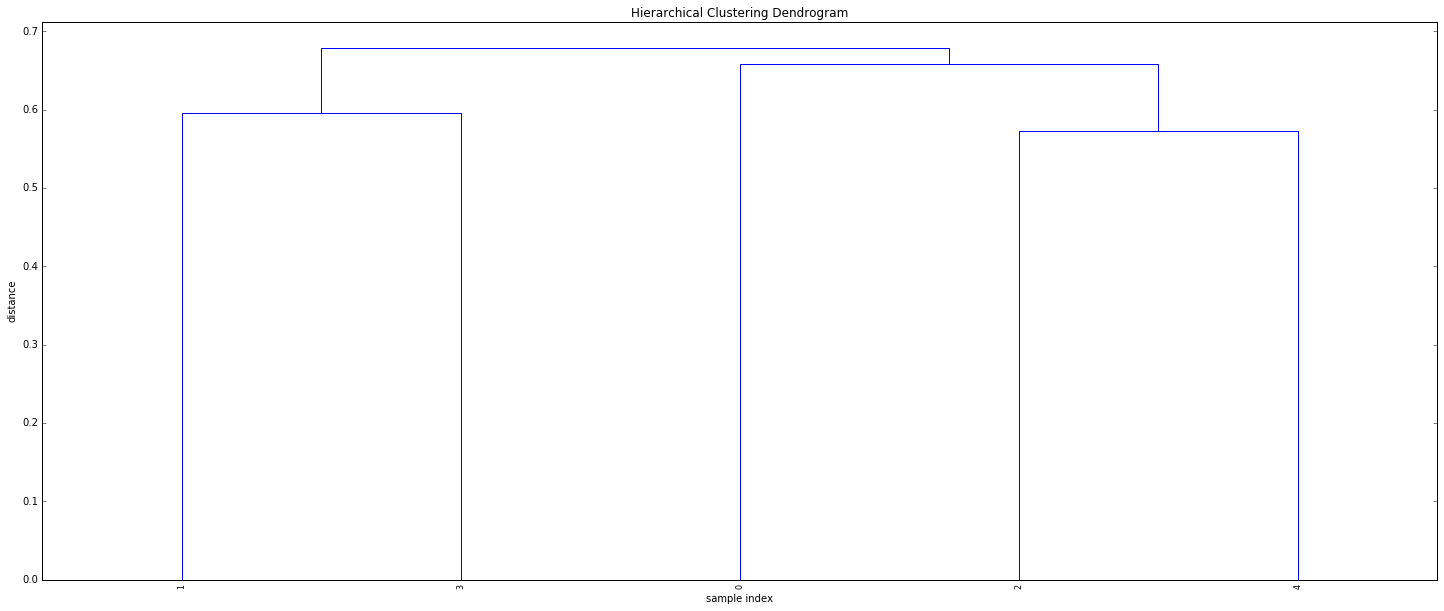

0: hierarchy

1: comparison

2: model

3: examples

4: innovation

(12, 100)


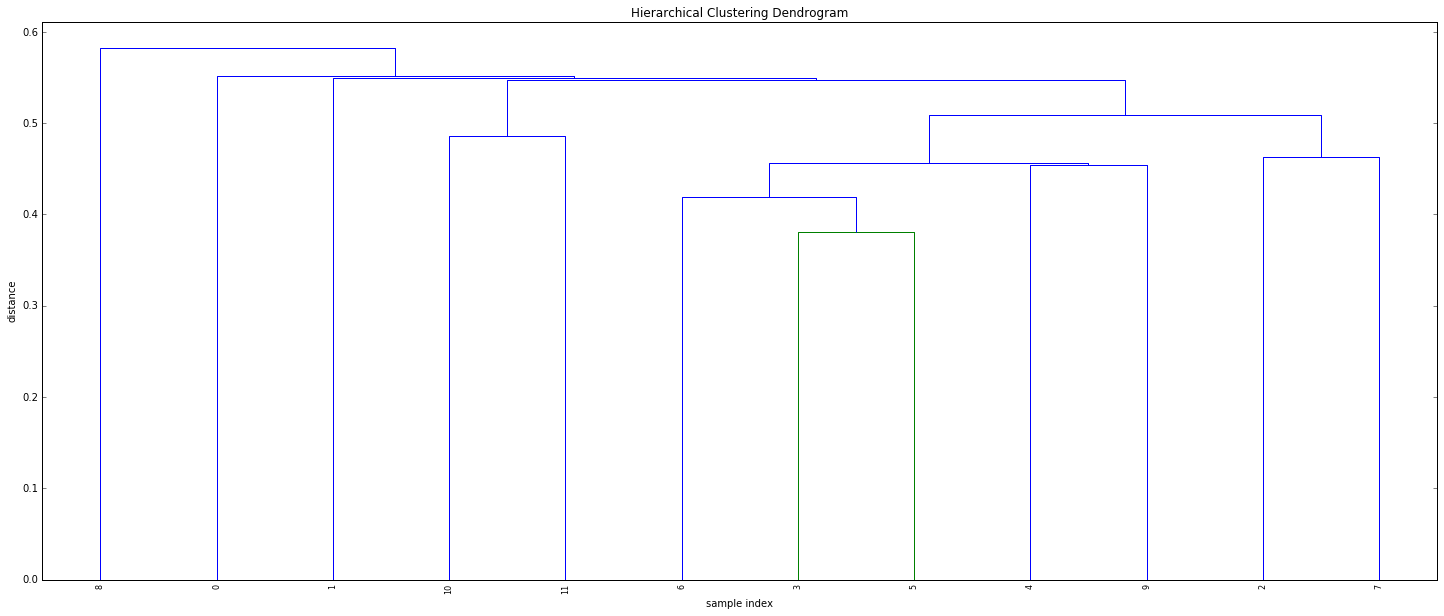

0: non

1: hierarchy

2: correctness

3: dynamic

4: practical

5: visual

6: complex

7: usefulness

8: key

9: basic

10: scheme

11: method

(16, 100)


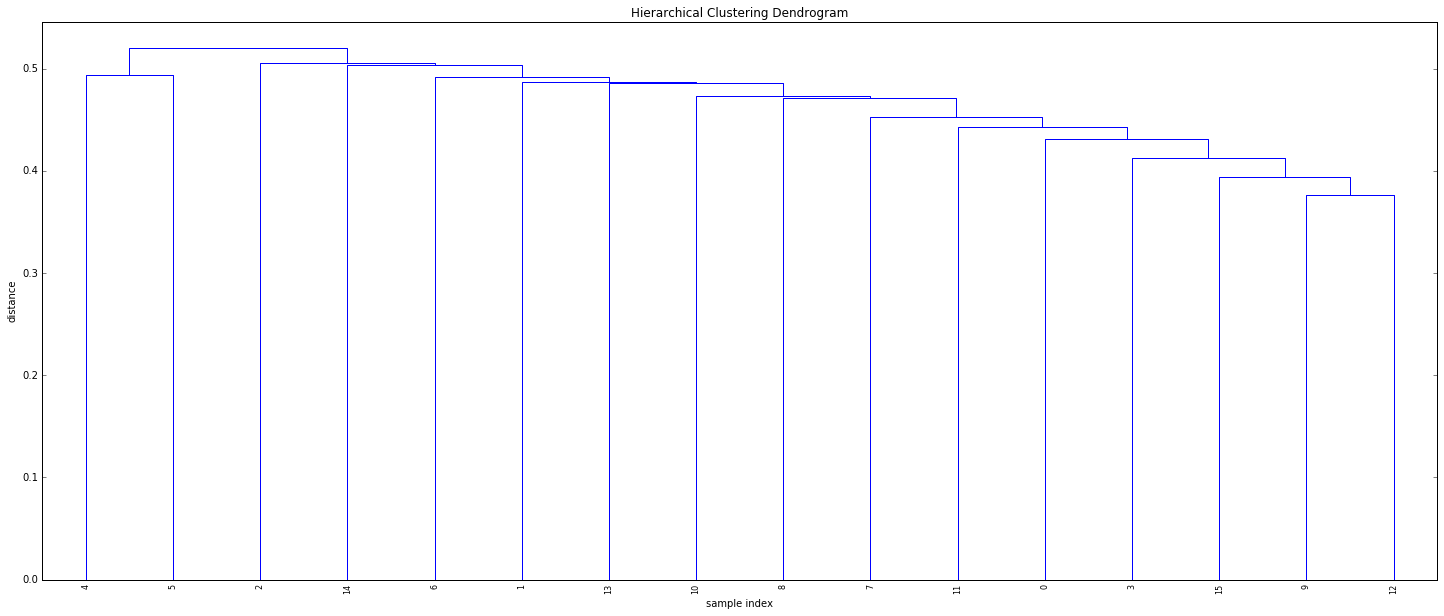

0: comparisons

1: rules

2: fields

3: differences

4: problems

5: results

6: standards

7: forms

8: objects

9: values

10: motions

11: characteristics

12: definitions

13: classes

14: contents

15: choices

(10, 100)


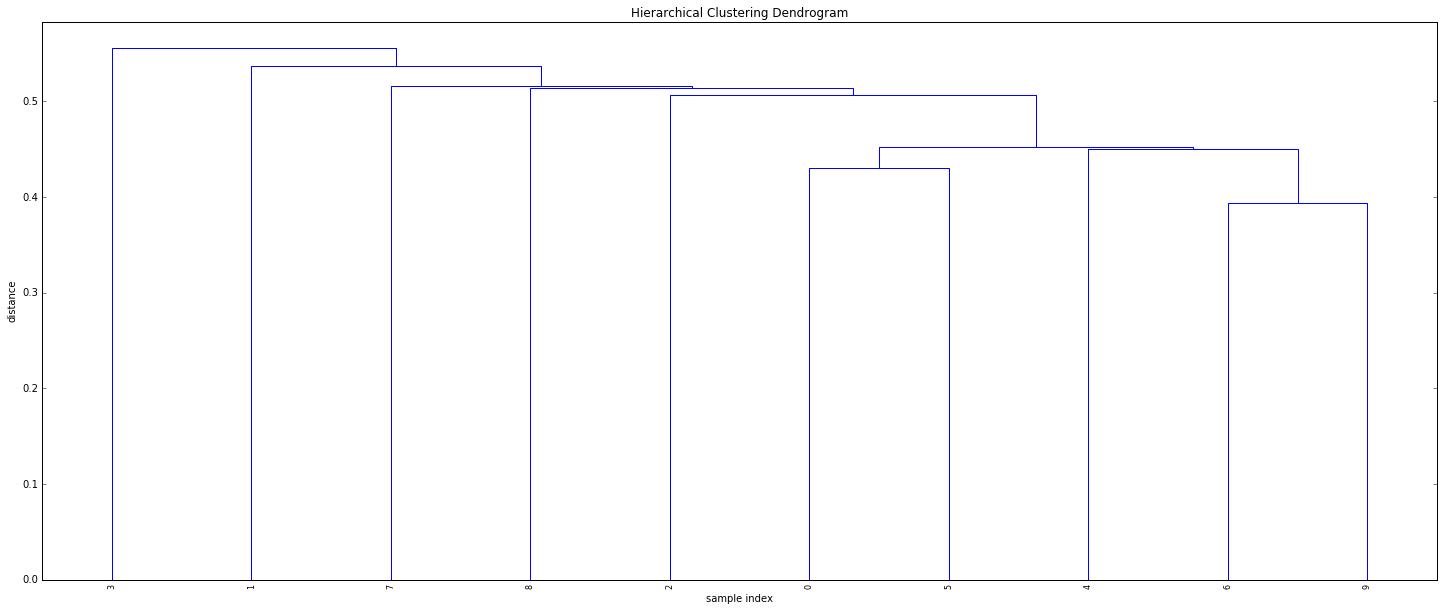

0: hide

1: run

2: relax

3: beat

4: take

5: shake

6: go

7: handle

8: grow

9: listen

(3, 100)


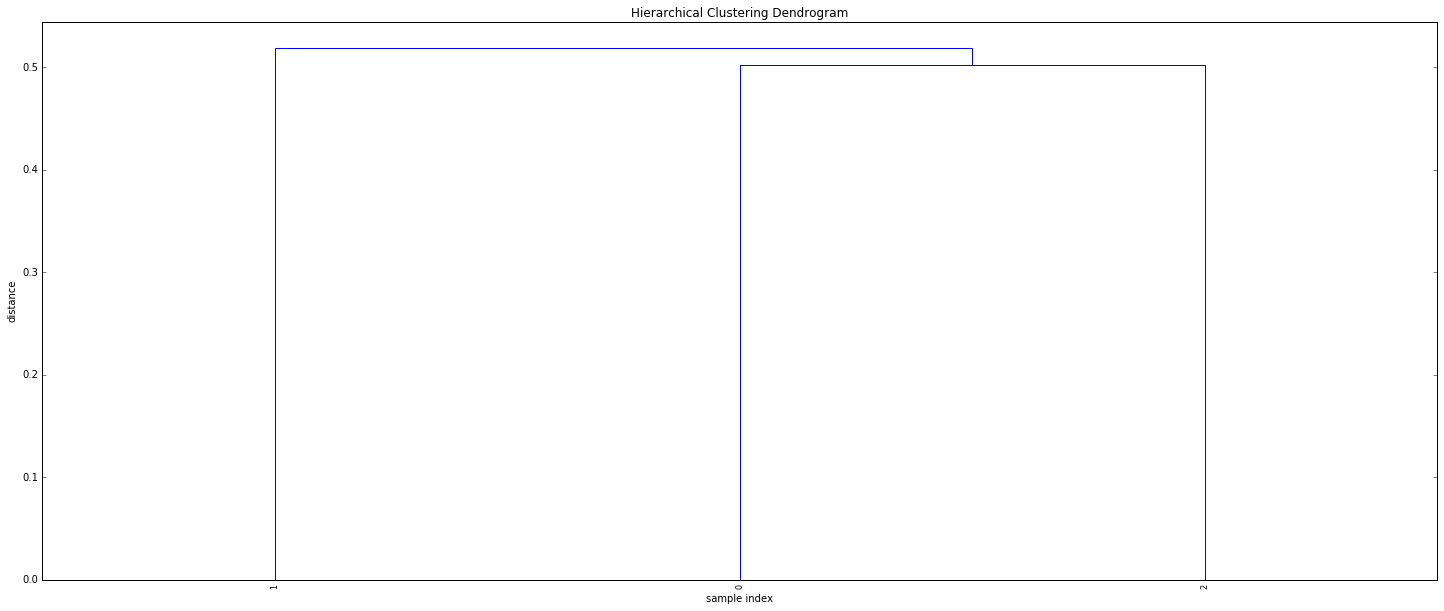

0: waiting

1: listening

2: getting

(3, 100)


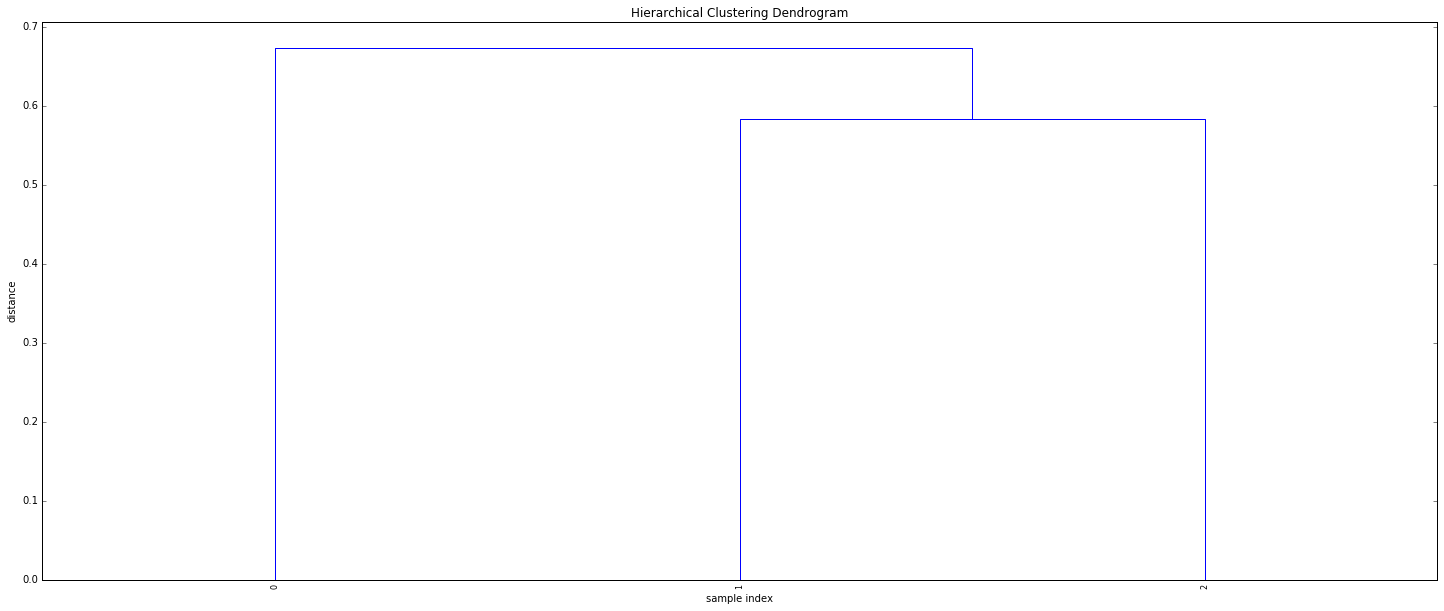

0: play

1: gather

2: build

(56, 100)


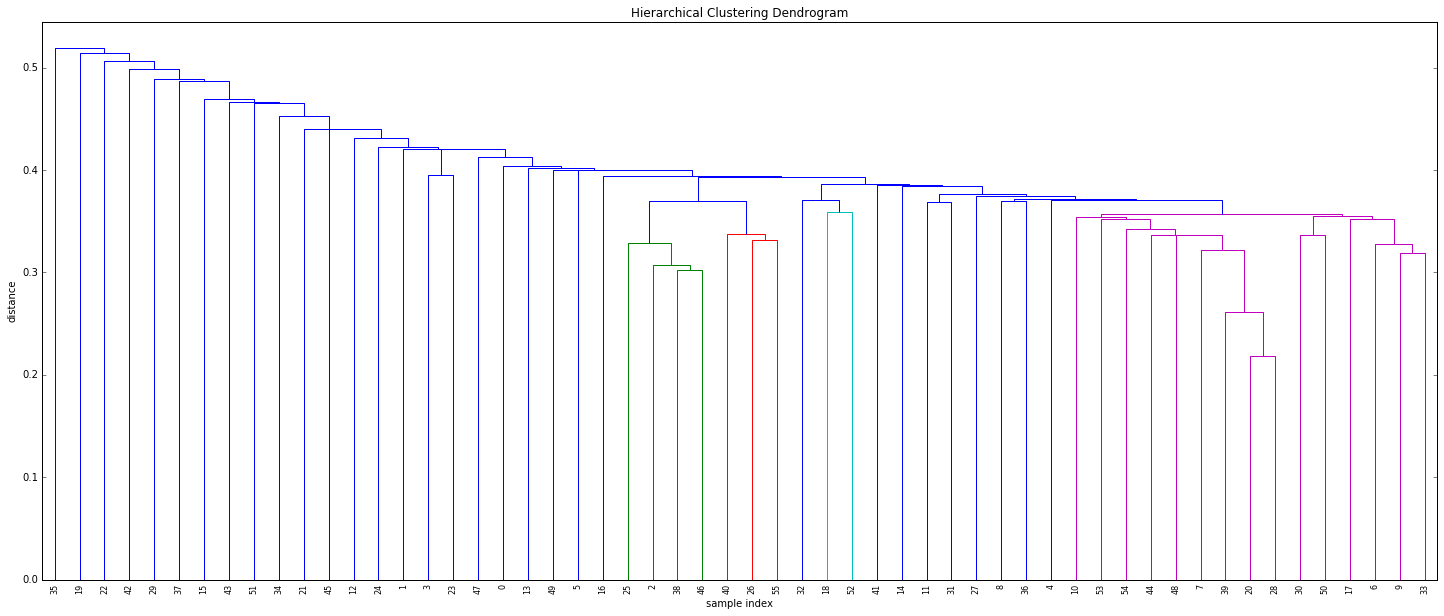

0: chew

1: dig

2: forget

3: migrate

4: move

5: reach

6: rip

7: walk

8: stop

9: wash

10: pass

11: carry

12: return

13: trip

14: fill

15: sell

16: spell

17: hide

18: sit

19: travel

20: throw

21: call

22: calm

23: grow

24: wait

25: tell

26: listen

27: swim

28: shoot

29: play

30: float

31: handle

32: hang

33: burn

34: watch

35: lump

36: break

37: concentrate

38: imagine

39: catch

40: sing

41: eat

42: encounter

43: look

44: fly

45: advance

46: remember

47: die

48: drop

49: escape

50: explode

51: turn

52: stand

53: push

54: climb

55: talk

(3, 100)


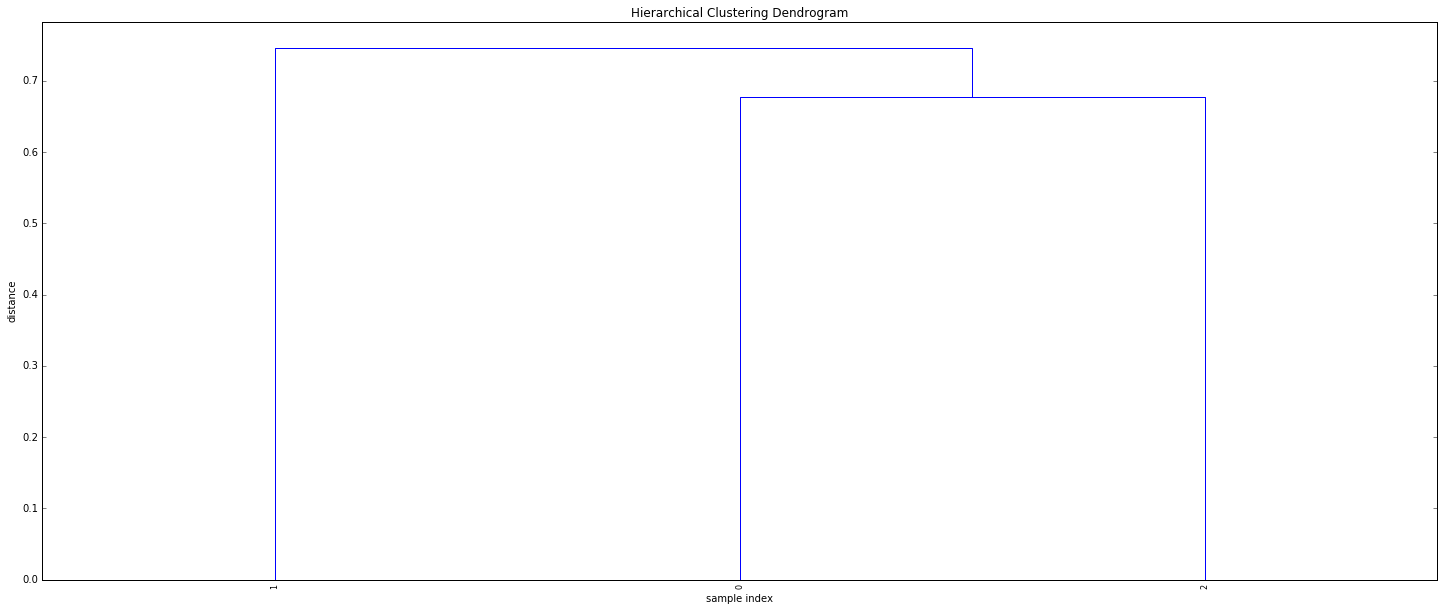

0: read

1: kill

2: run

(11, 100)


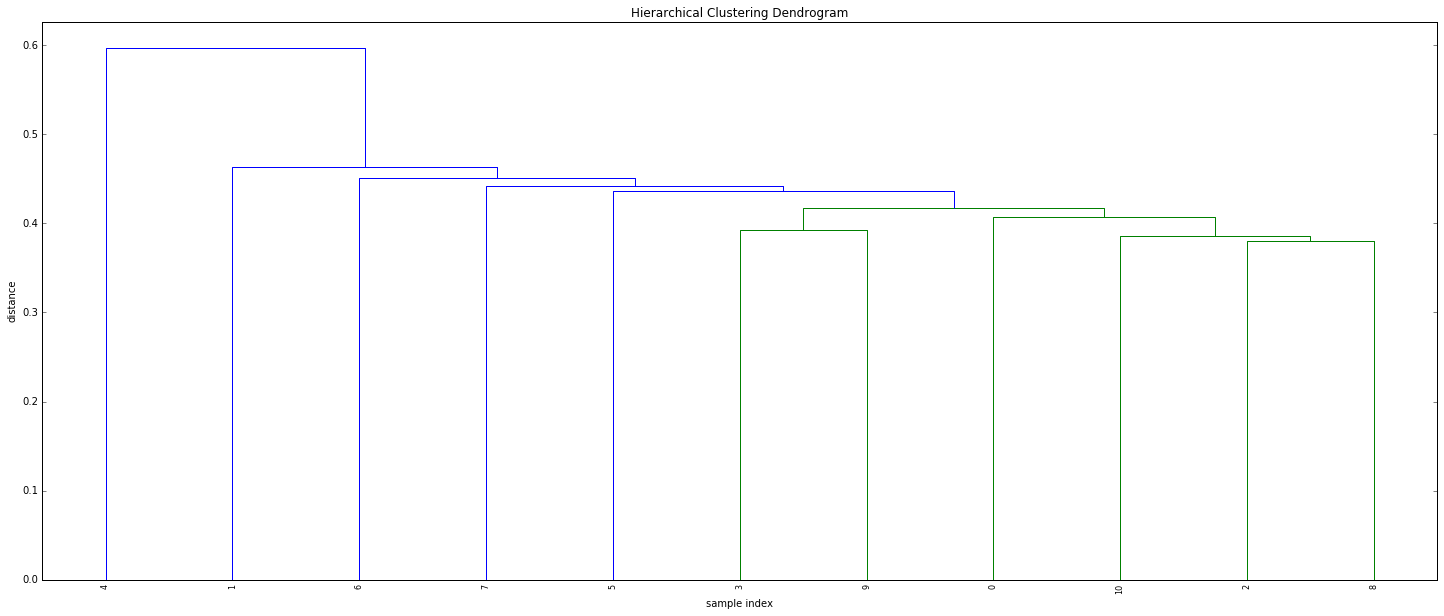

0: crowd

1: tear

2: walk

3: leave

4: turn

5: hear

6: stand

7: learn

8: go

9: save

10: wait

(20, 100)


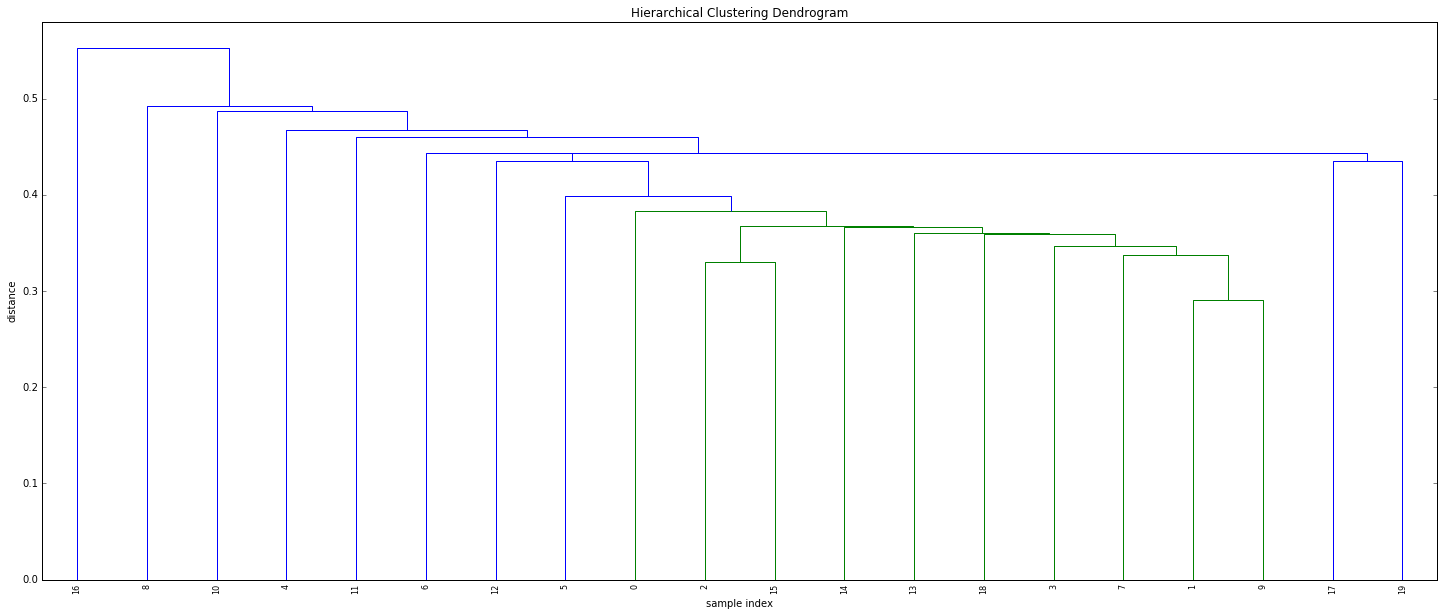

0: swim

1: pull

2: draw

3: finish

4: fit

5: lose

6: welcome

7: deliver

8: write

9: shoot

10: live

11: compete

12: wear

13: escape

14: pick

15: break

16: call

17: sing

18: steal

19: eat

(8, 100)


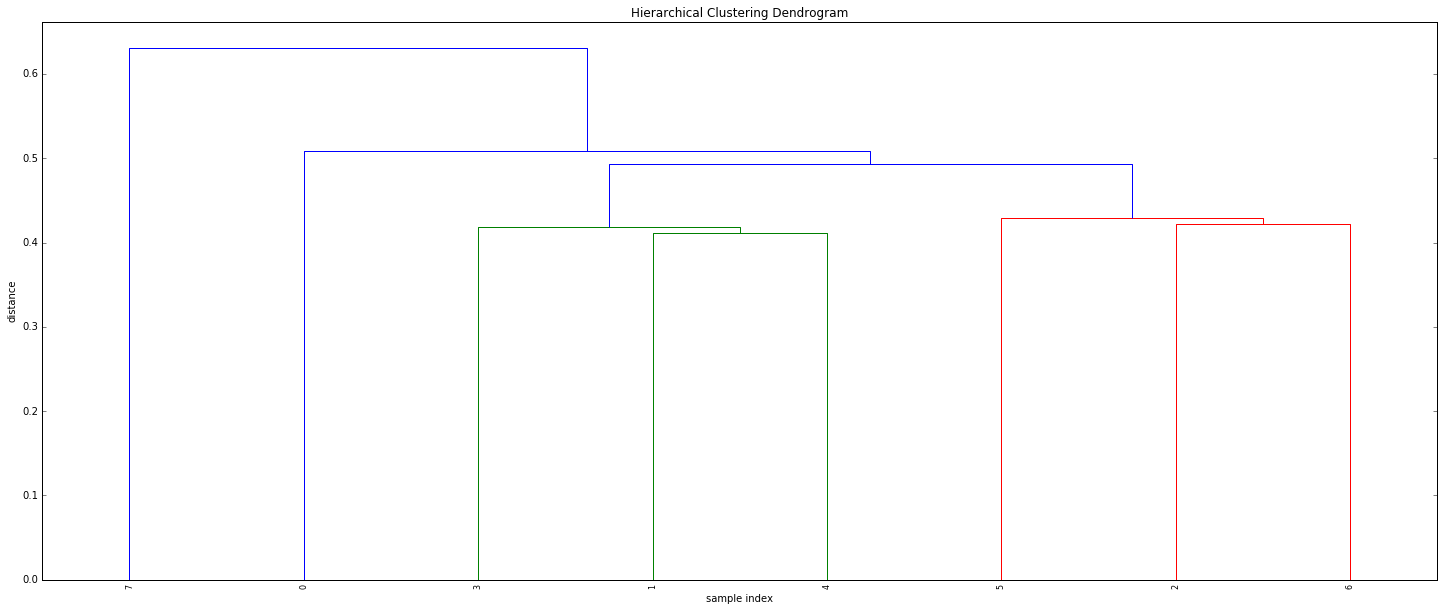

0: rehearsing

1: chatting

2: intimidating

3: flirting

4: bragging

5: disturbing

6: annoying

7: enchanting

(25, 100)


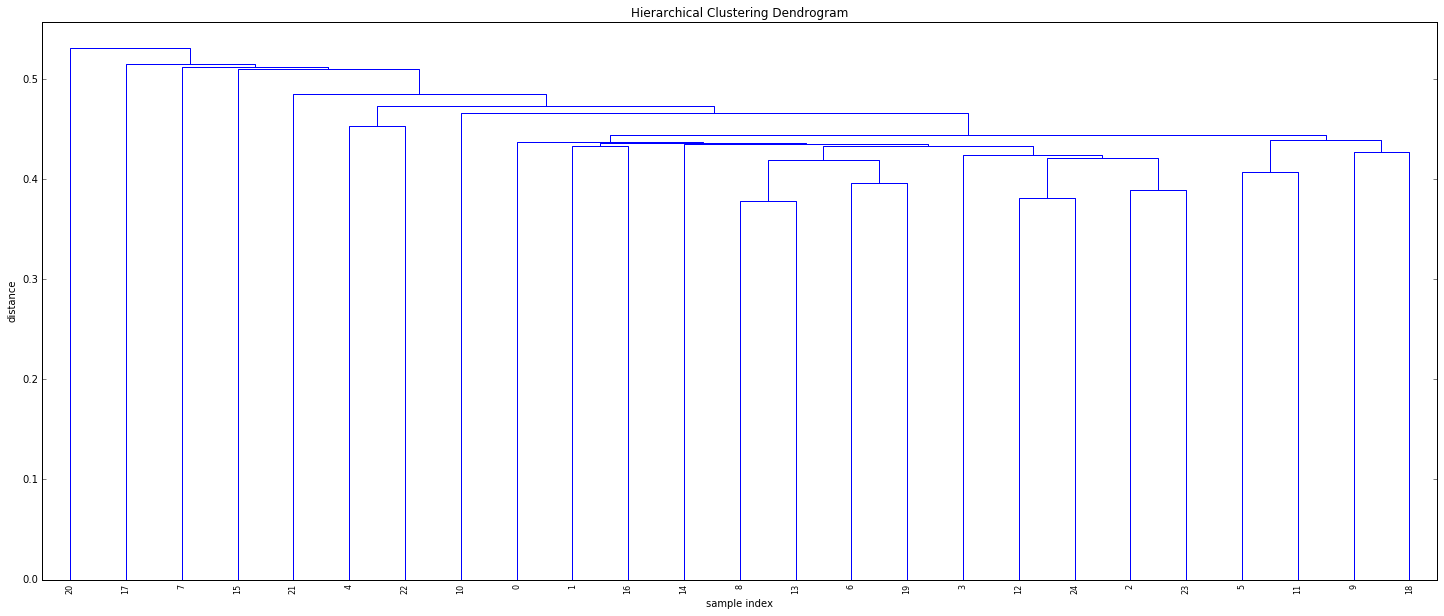

0: genial

1: exasperated

2: tricked

3: contented

4: cheerful

5: inquisitive

6: thoughtful

7: watchful

8: unintelligible

9: companionship

10: unsettling

11: hopeful

12: oar

13: monosyllabic

14: unbroken

15: immersed

16: juxtaposed

17: unfriendly

18: nourished

19: sloppy

20: tunic

21: thankful

22: nothingness

23: devious

24: inexperienced

(21, 100)


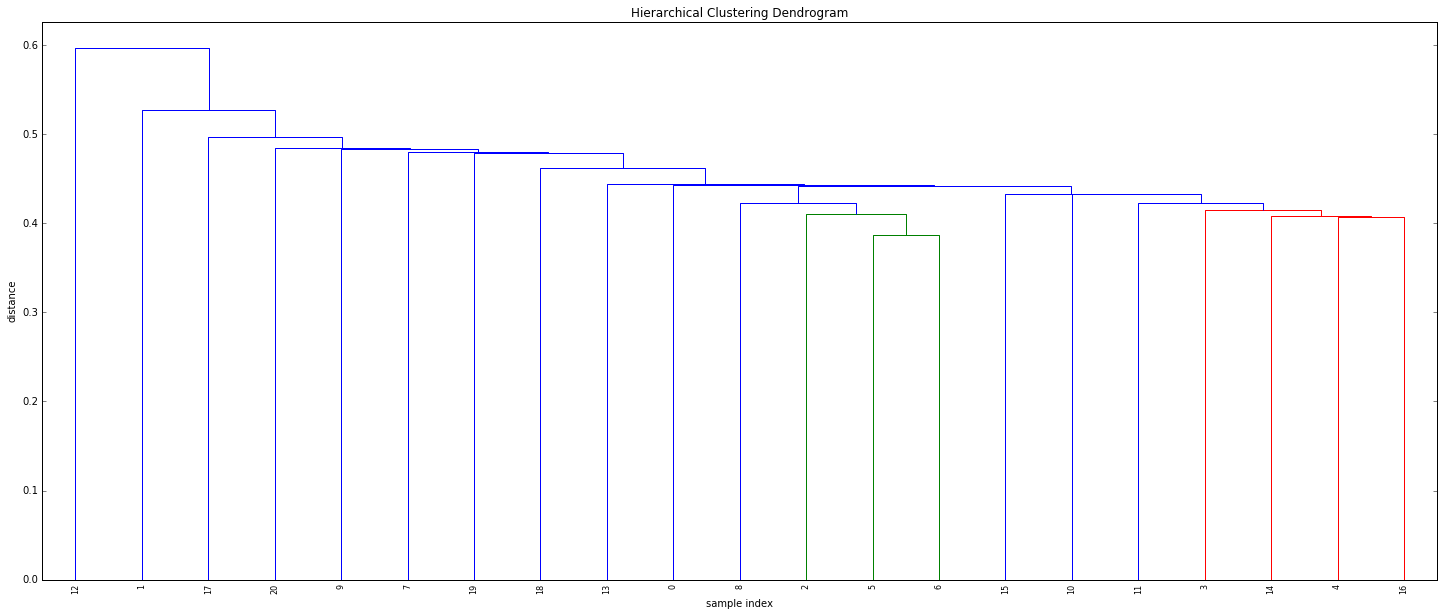

0: dismay

1: troublesome

2: hesitant

3: pirouette

4: clumsy

5: foreigner

6: pretend

7: garb

8: indecision

9: crib

10: decor

11: extravagance

12: friendliness

13: cowbell

14: insistent

15: woe

16: budding

17: schoolboy

18: deceit

19: sober

20: daring

(12, 100)


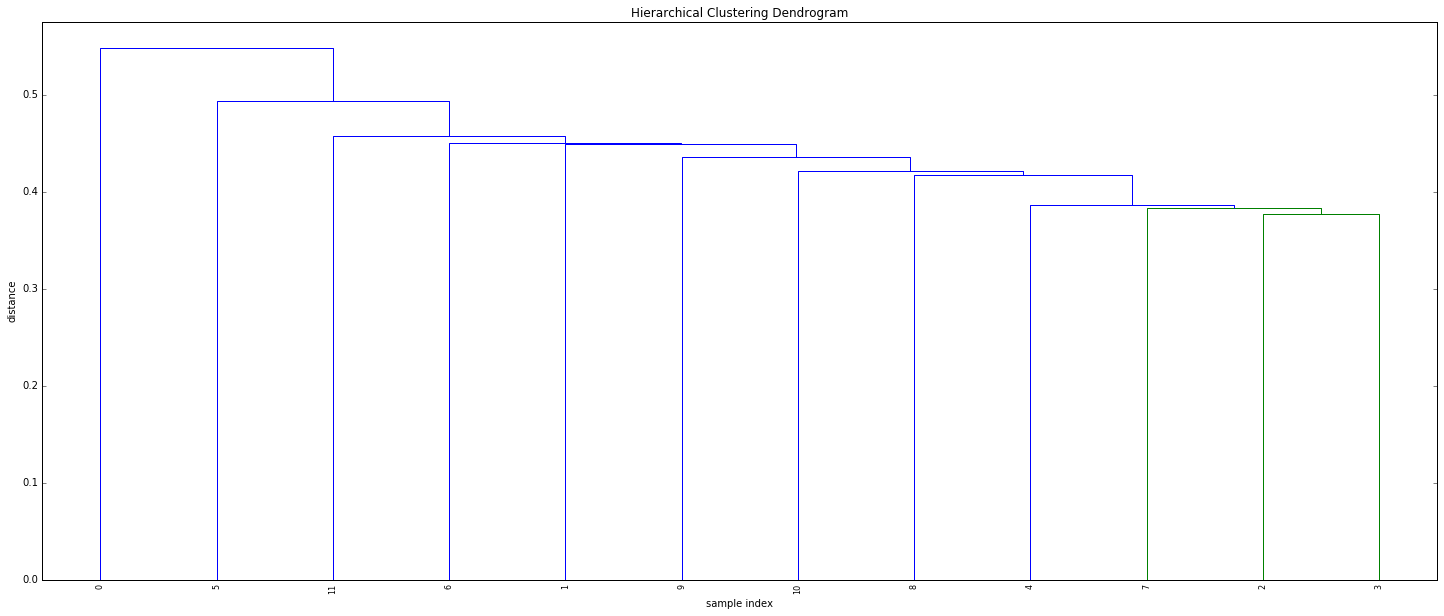

0: adorned

1: discontented

2: deformed

3: overweight

4: ripped

5: blurred

6: distressed

7: startled

8: dissatisfied

9: mannered

10: bored

11: jumbled

(7, 100)


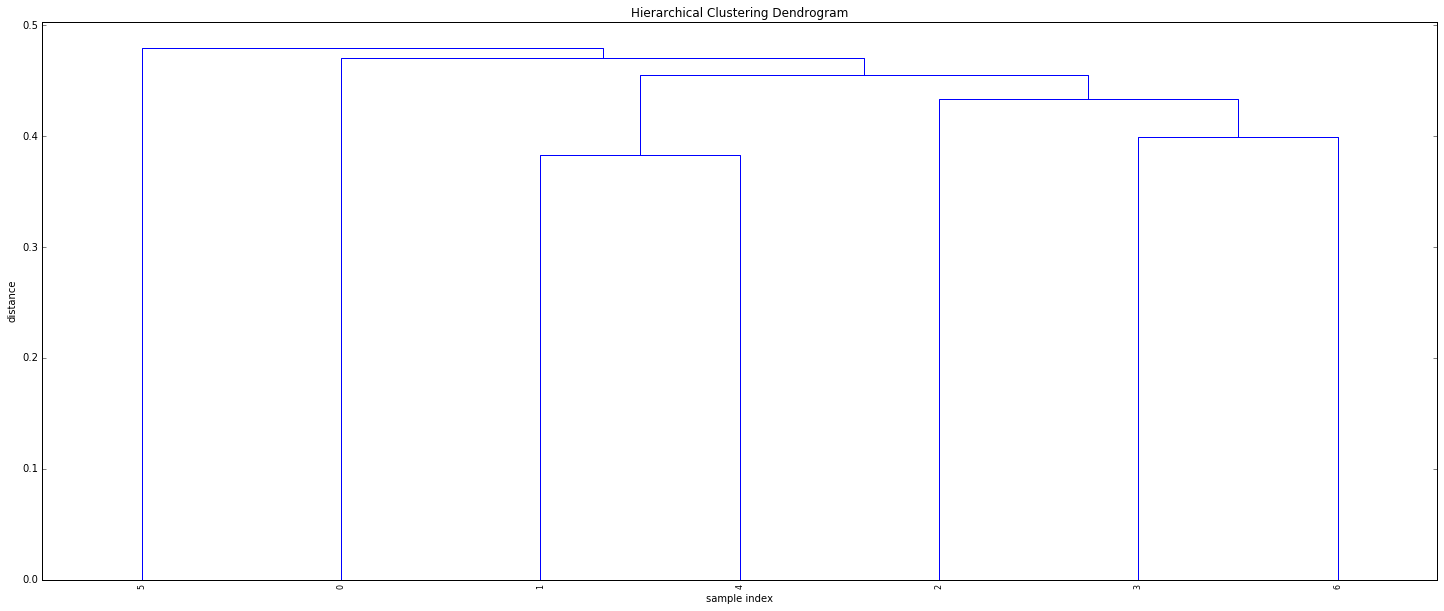

0: encumbered

1: groomed

2: bothered

3: intoxicated

4: intrigued

5: longed

6: behaved

(4, 100)


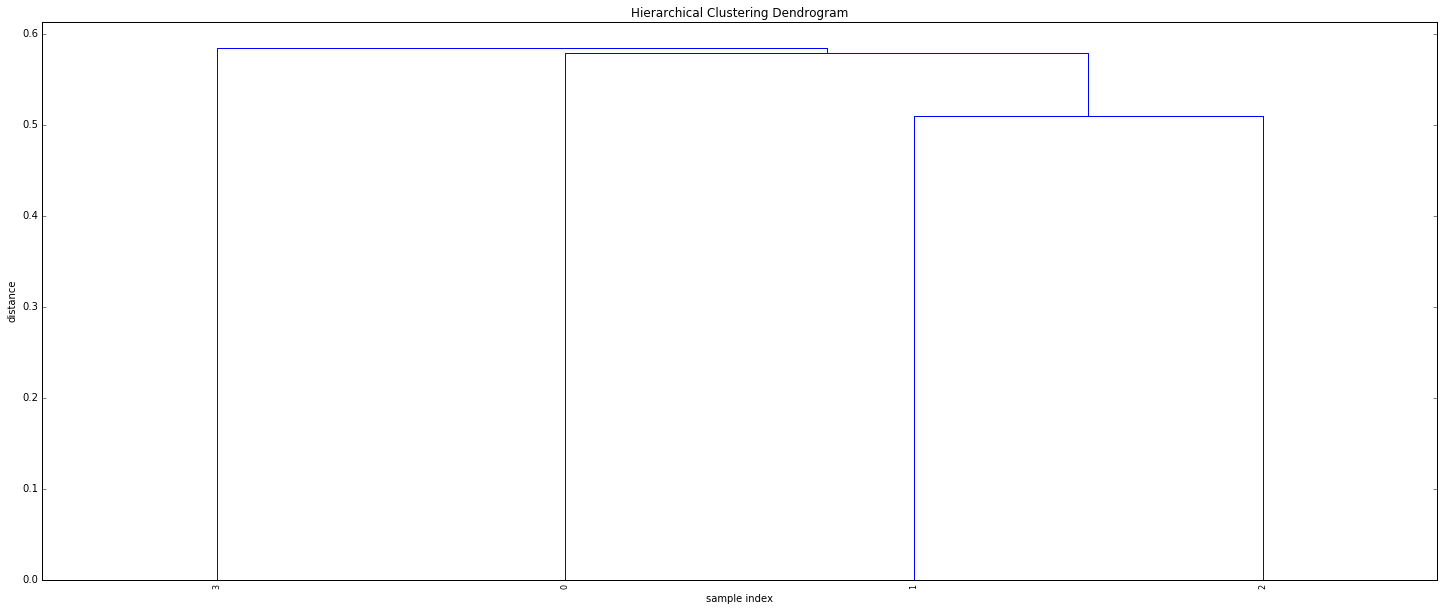

0: chilly

1: misbehavior

2: typecast

3: slaver

(3, 100)


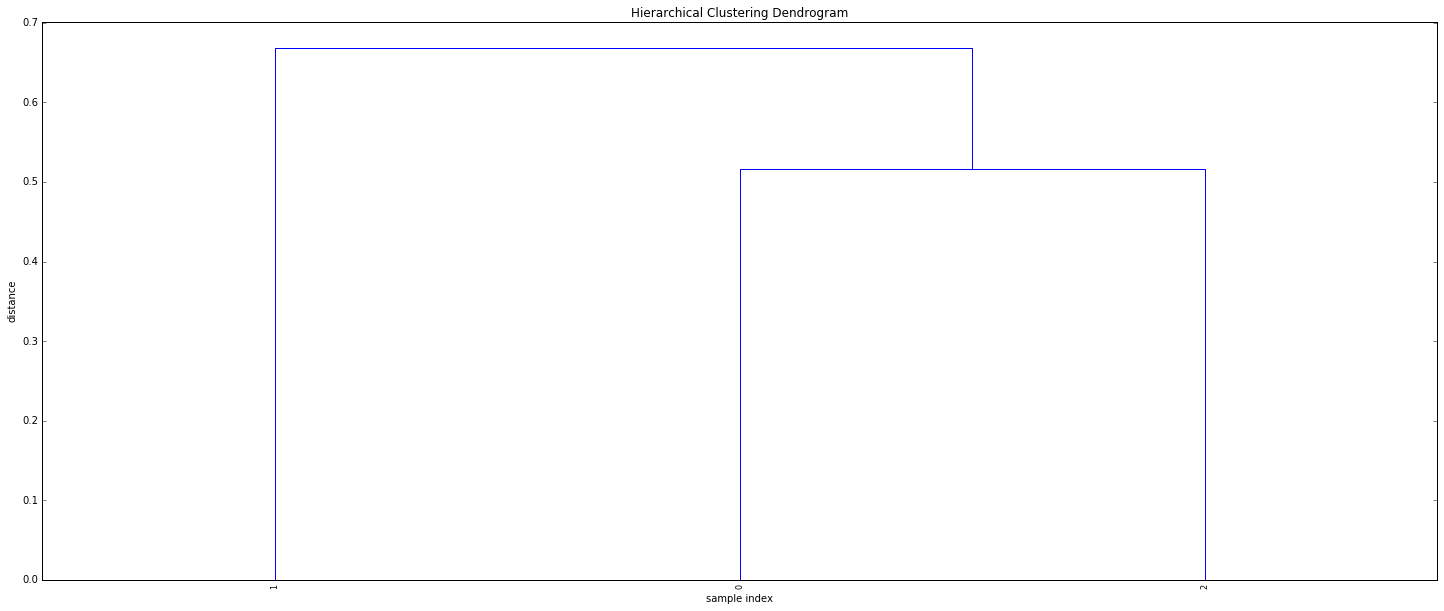

0: latitude

1: m

2: peak

(3, 100)


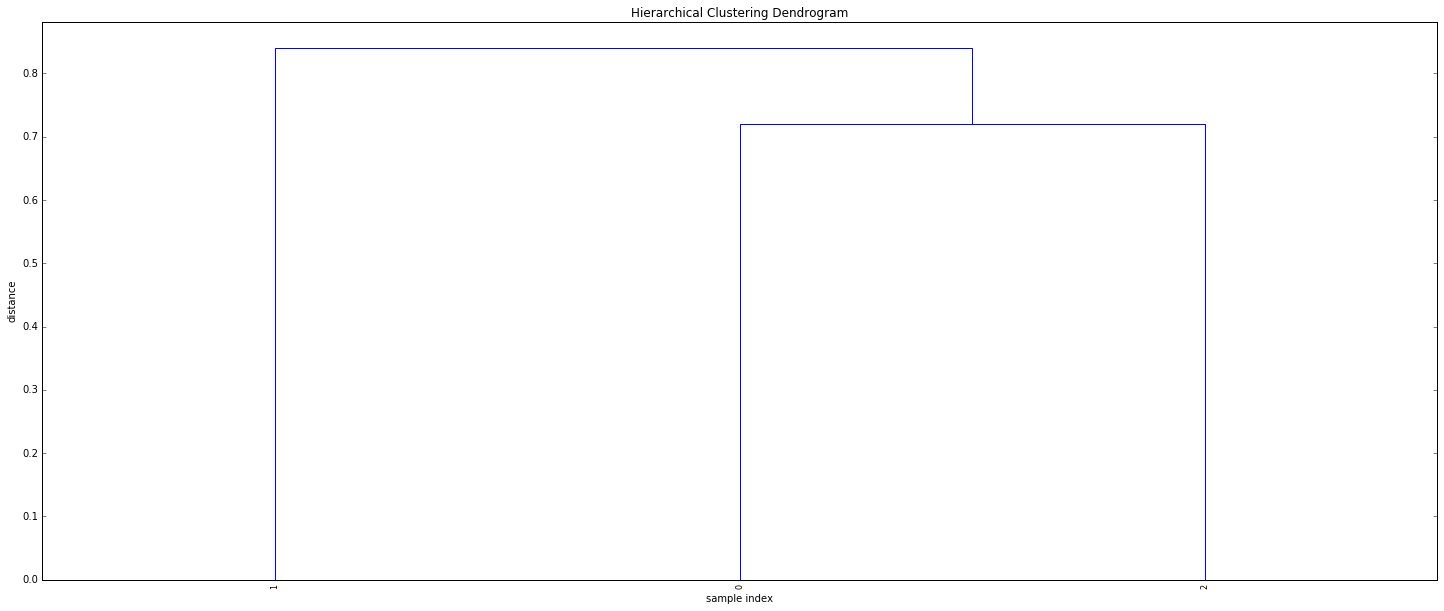

0: sixty

1: volume

2: sunset

(5, 100)


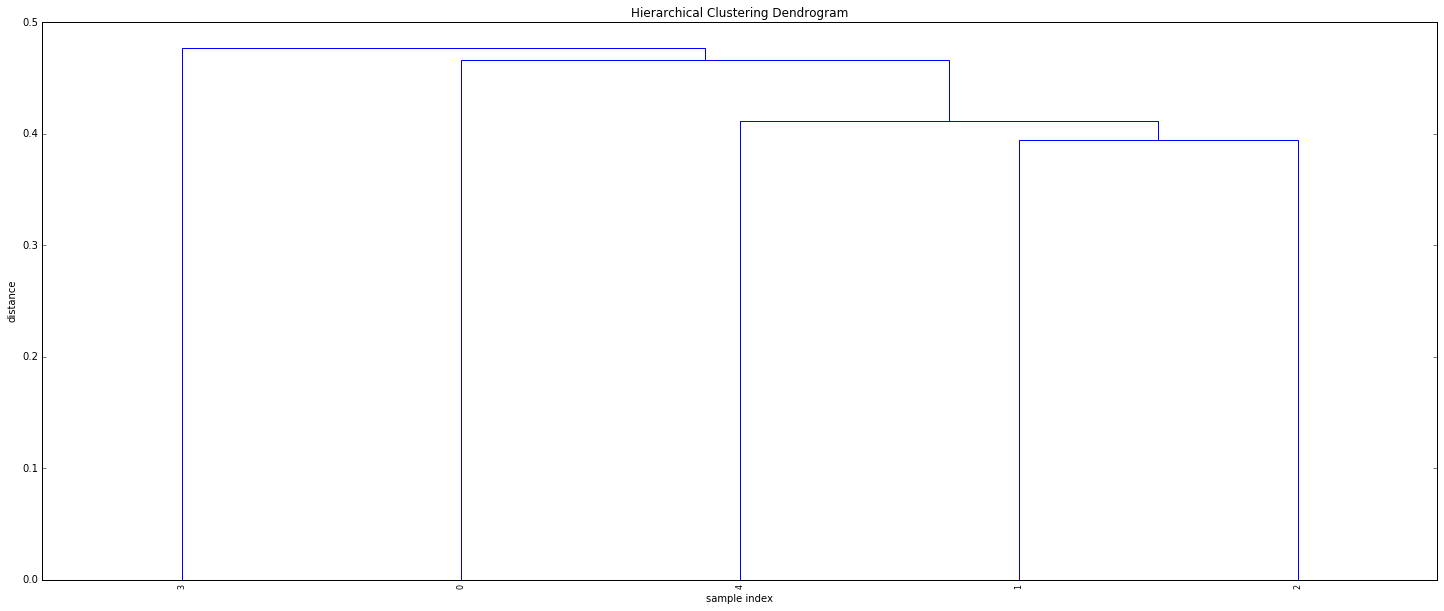

0: barrels

1: feet

2: miles

3: calories

4: upwards

(7, 100)


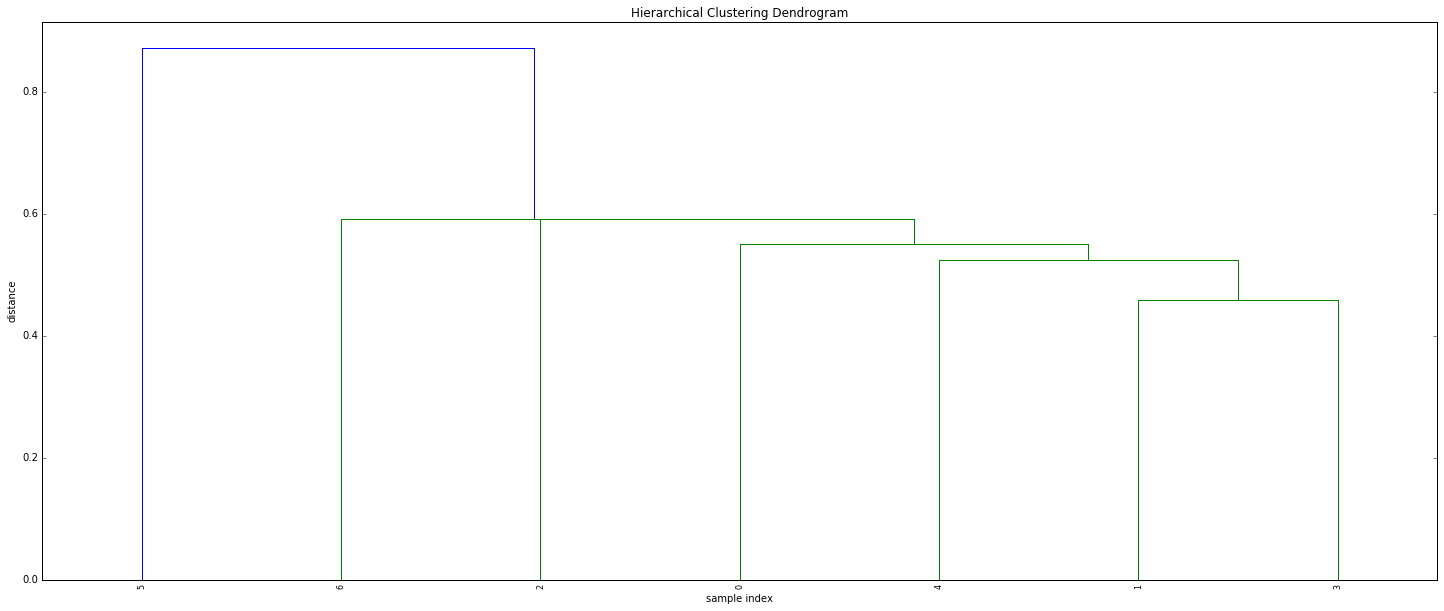

0: square

1: peaks

2: m

3: height

4: mile

5: nautical

6: weigh

(19, 100)


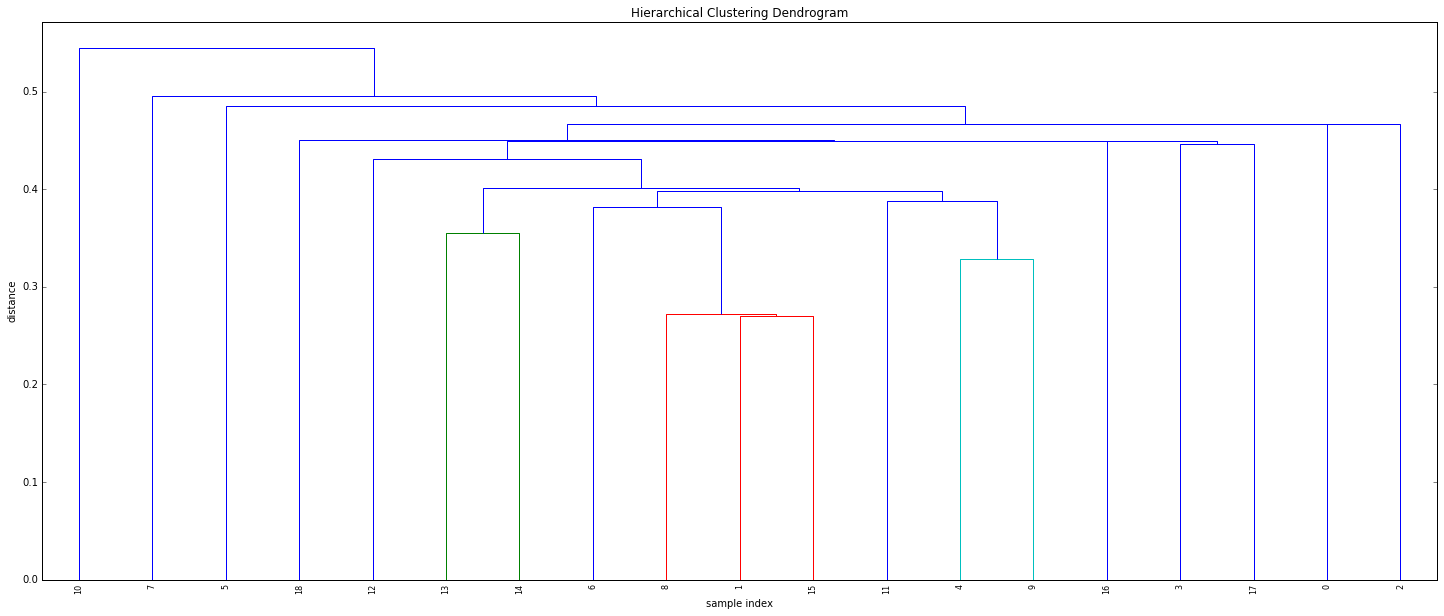

0: burial

1: bible

2: holy

3: gift

4: noah

5: rebirth

6: apostle

7: ritual

8: torah

9: abraham

10: heretic

11: jeremiah

12: glory

13: savior

14: supper

15: gospel

16: righteous

17: spirit

18: faithful

(63, 100)


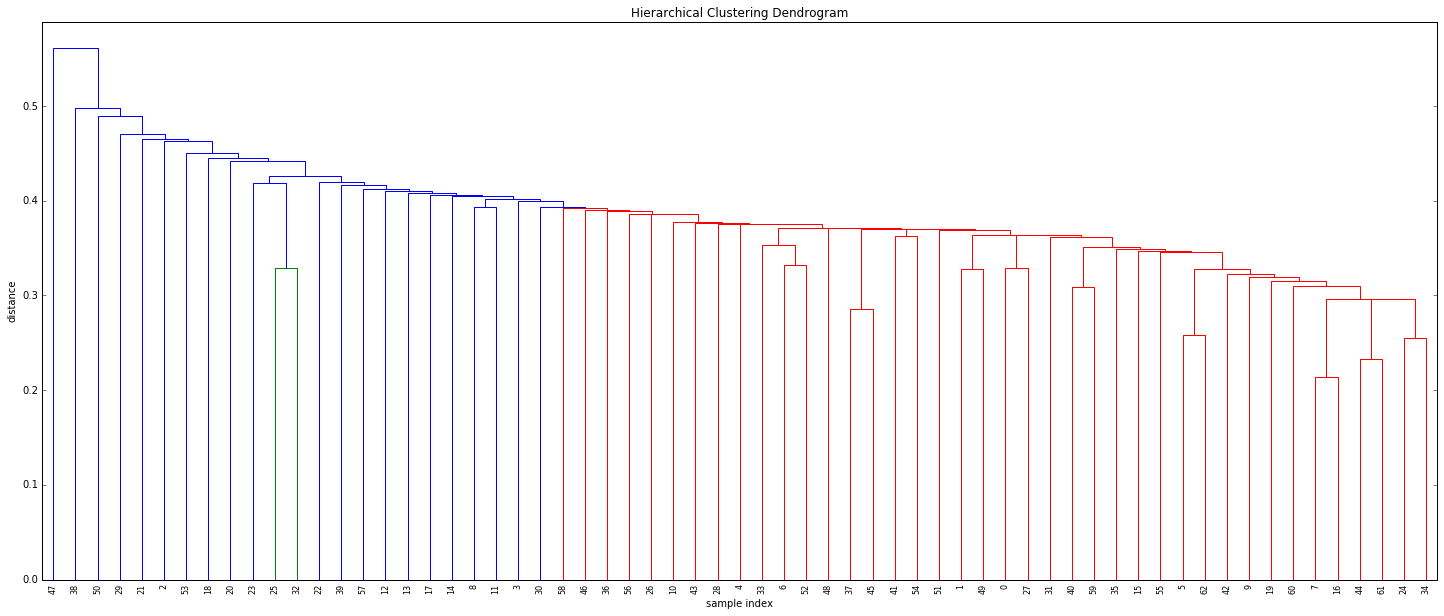

0: perseverance

1: biblical

2: witchcraft

3: reincarnation

4: rabbi

5: prophet

6: sabbath

7: jesus

8: pantheon

9: prayer

10: hell

11: deity

12: ark

13: tabernacle

14: commandment

15: redemption

16: christ

17: temptation

18: solemn

19: god

20: gift

21: passage

22: saviour

23: pilgrimage

24: forgiveness

25: temple

26: trinity

27: predestination

28: covenant

29: menorah

30: exodus

31: holy

32: altar

33: transfiguration

34: repentance

35: wisdom

36: judgement

37: elijah

38: birth

39: lord

40: resurrection

41: jonah

42: spirit

43: jew

44: faith

45: abraham

46: piety

47: apology

48: worship

49: scripture

50: pillar

51: matrimony

52: feast

53: miracle

54: genesis

55: priest

56: afterlife

57: testament

58: sin

59: crucifixion

60: baptism

61: salvation

62: messiah

(3, 100)


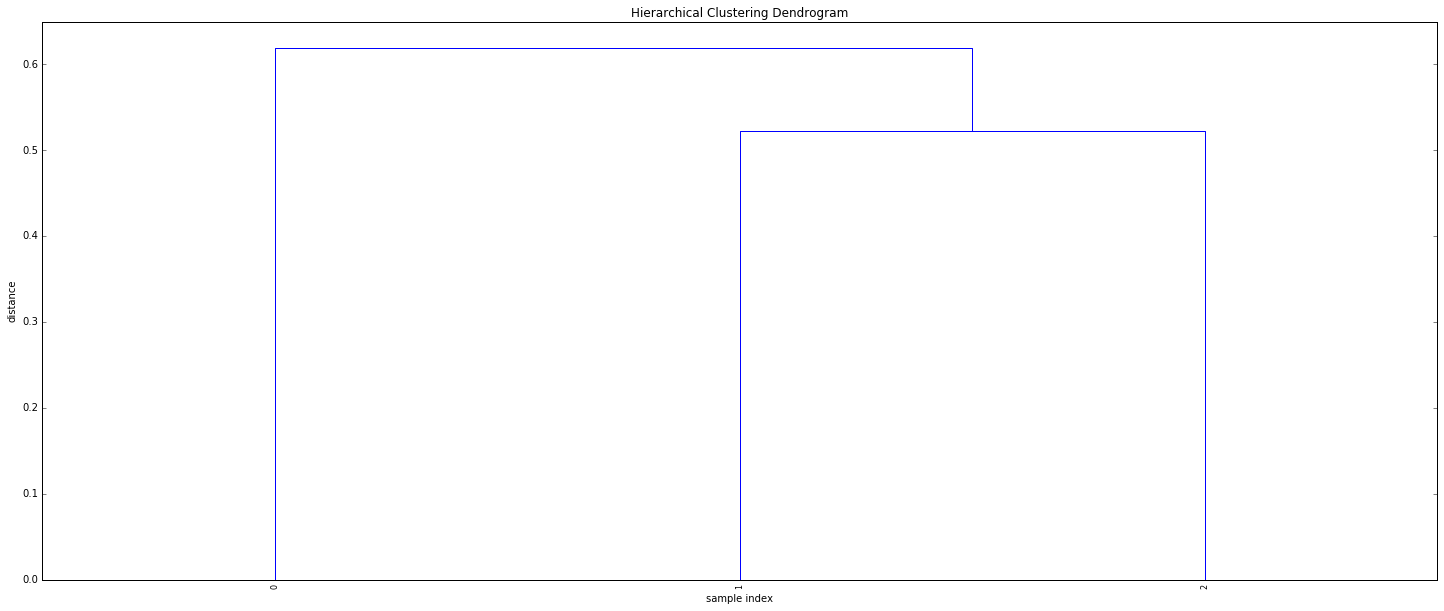

0: creed

1: sacred

2: wicked

(5, 100)


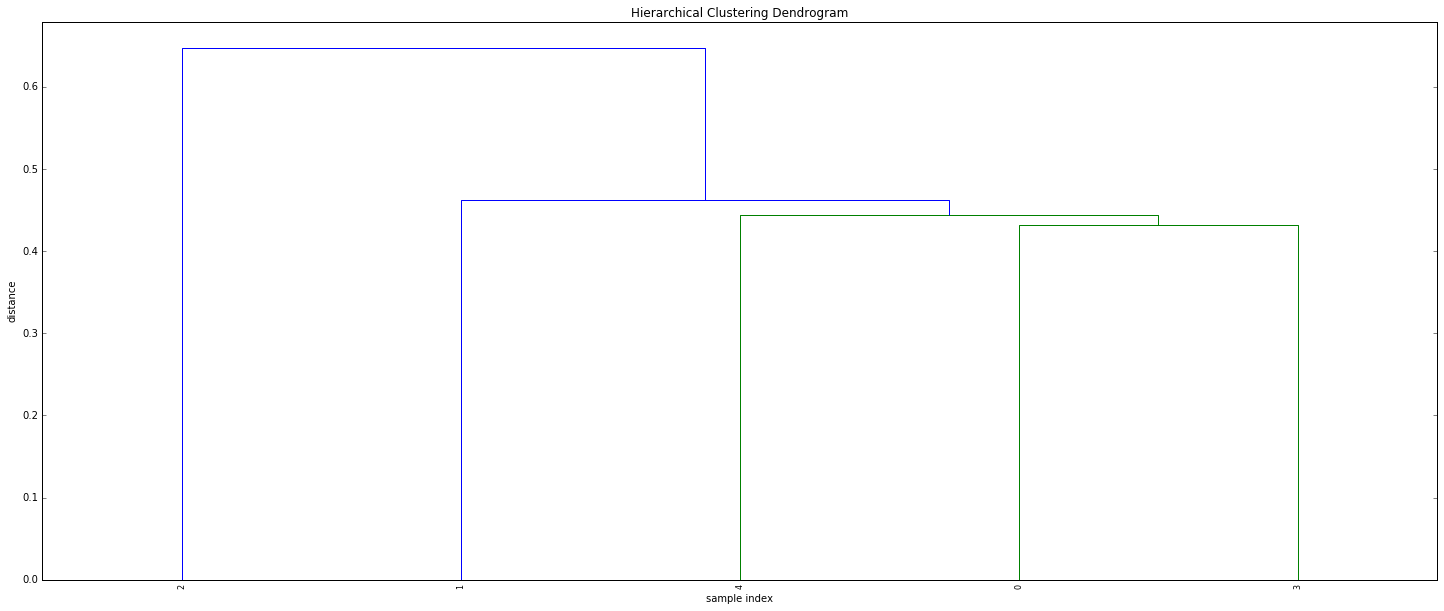

0: hell

1: ark

2: paragraph

3: eve

4: god

(7, 100)


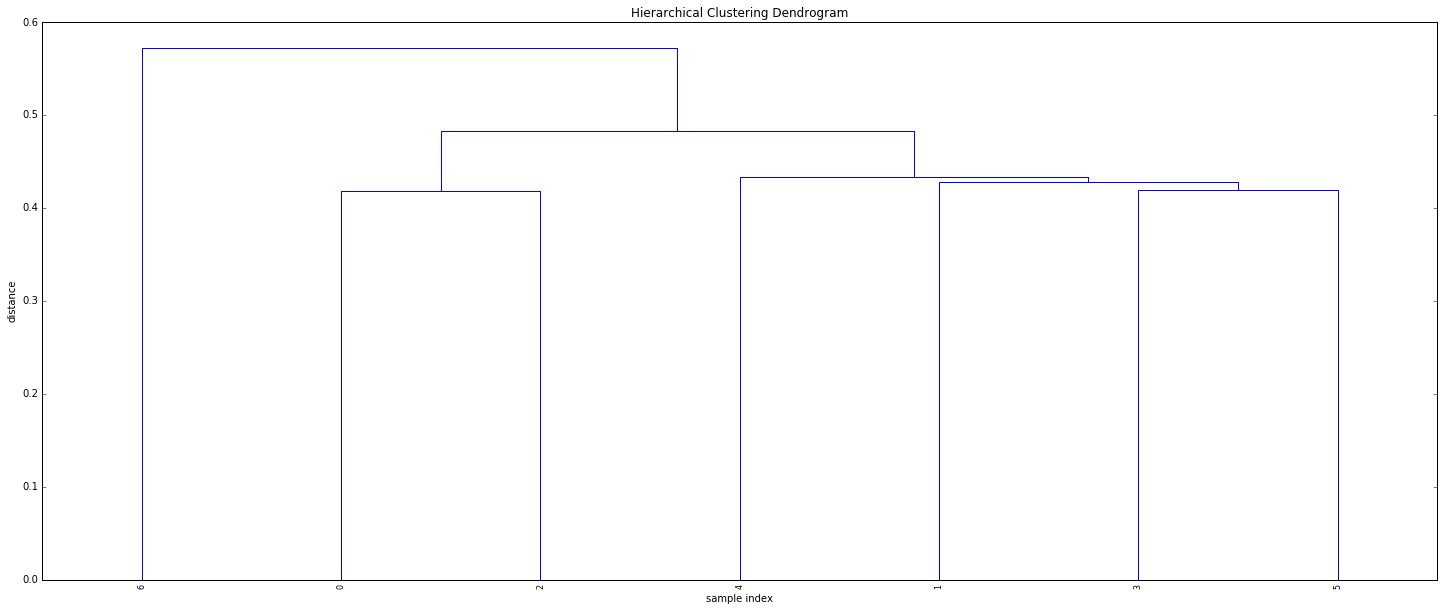

0: sayings

1: spirits

2: commandments

3: moses

4: heavens

5: angels

6: pilgrims

(22, 100)


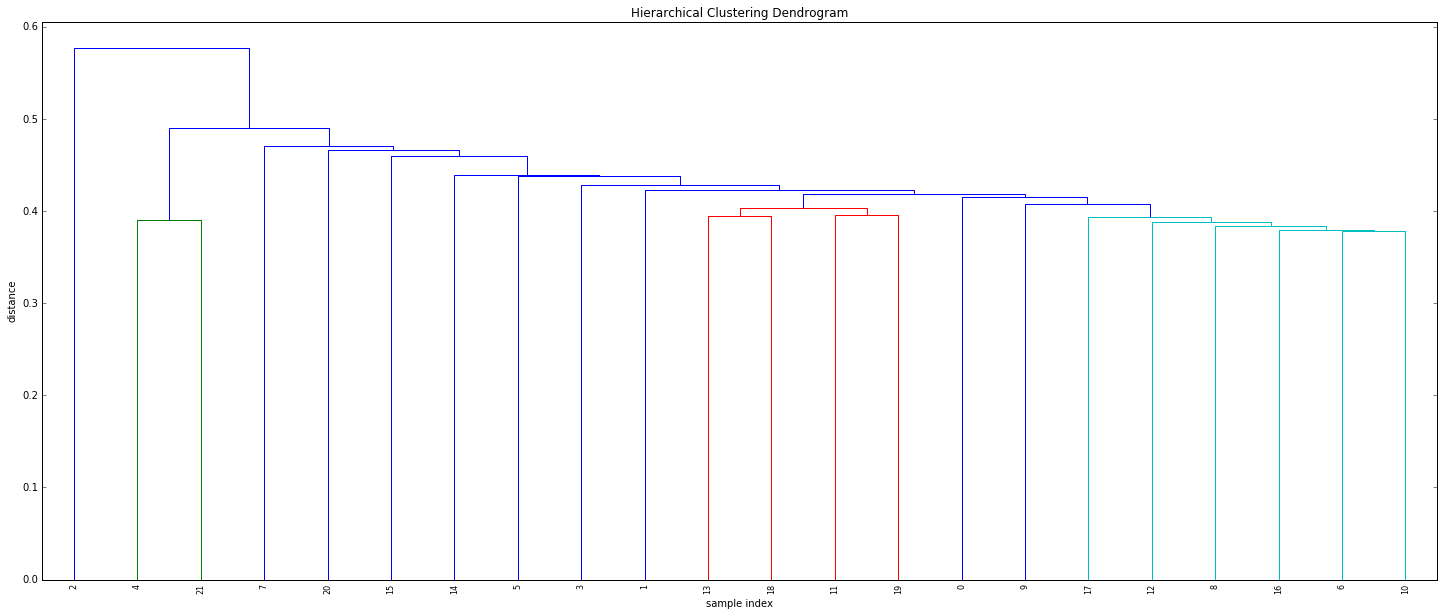

0: vim

1: elegance

2: paragraphs

3: underline

4: exclamation

5: razor

6: sheaf

7: fibs

8: tabula

9: referential

10: tm

11: brevity

12: assay

13: fixation

14: tempus

15: mou

16: gawk

17: fuzzy

18: irrationality

19: negativity

20: advertisment

21: apostrophe

(3, 100)


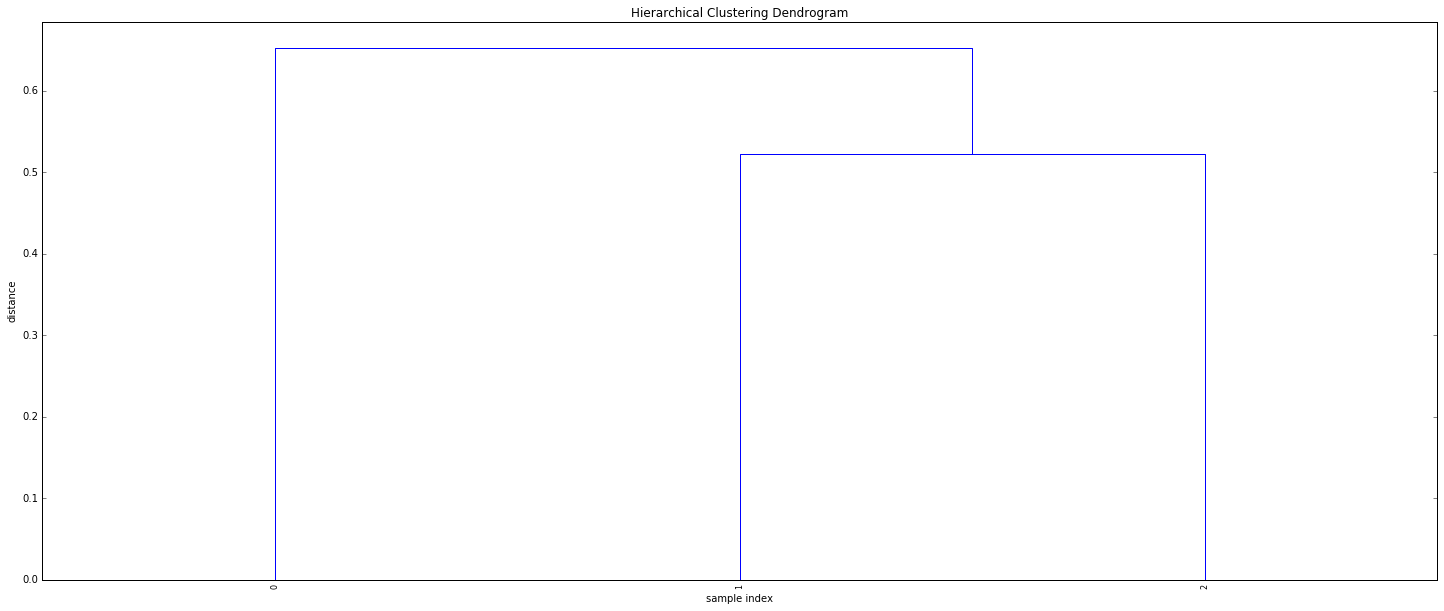

0: echo

1: asterisk

2: handwritten

(14, 100)


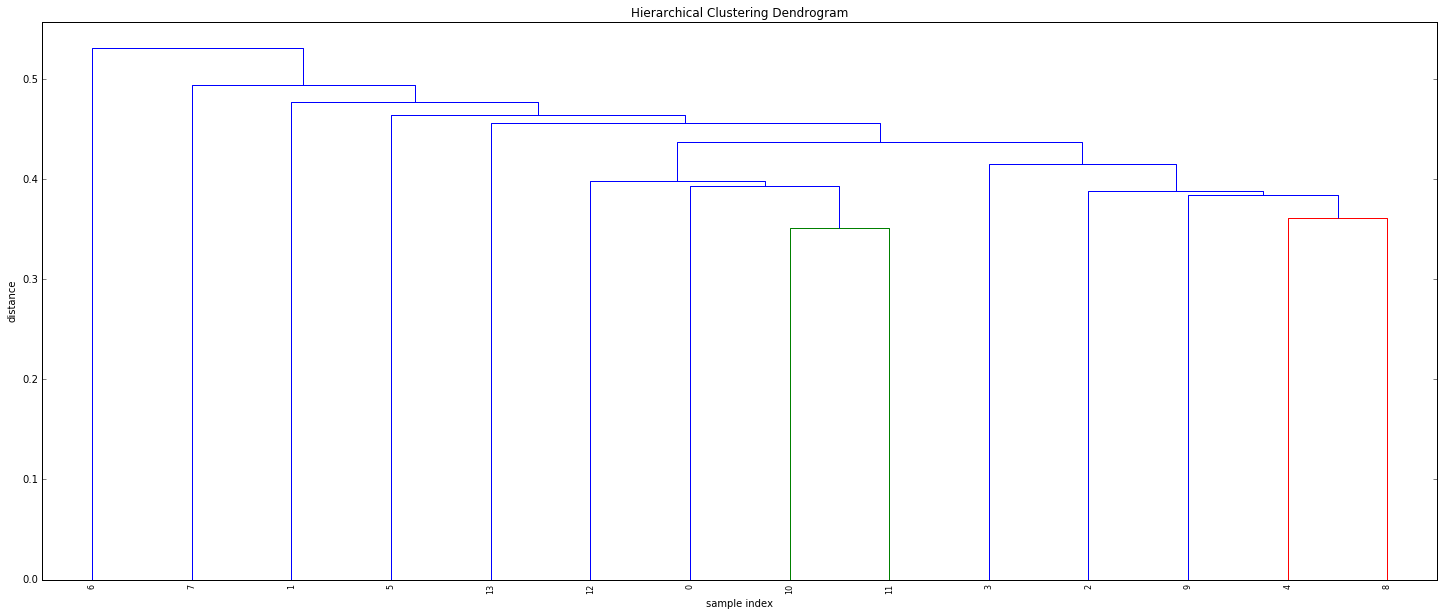

0: simile

1: lazy

2: hyper

3: verbose

4: sheaf

5: limitless

6: subliminal

7: elegant

8: snapshot

9: minimalistic

10: incomprehensible

11: nonsensical

12: naive

13: accentual

(6, 100)


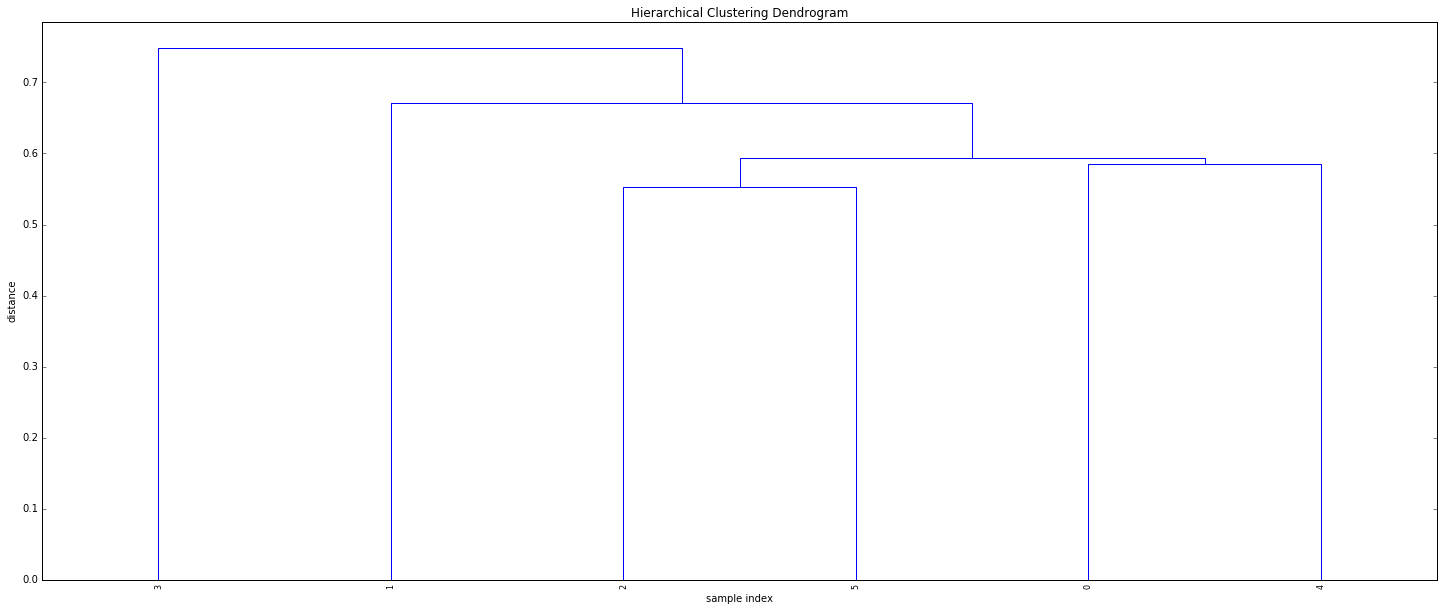

0: provincial

1: decree

2: sole

3: general

4: permanent

5: subordinate

(18, 100)


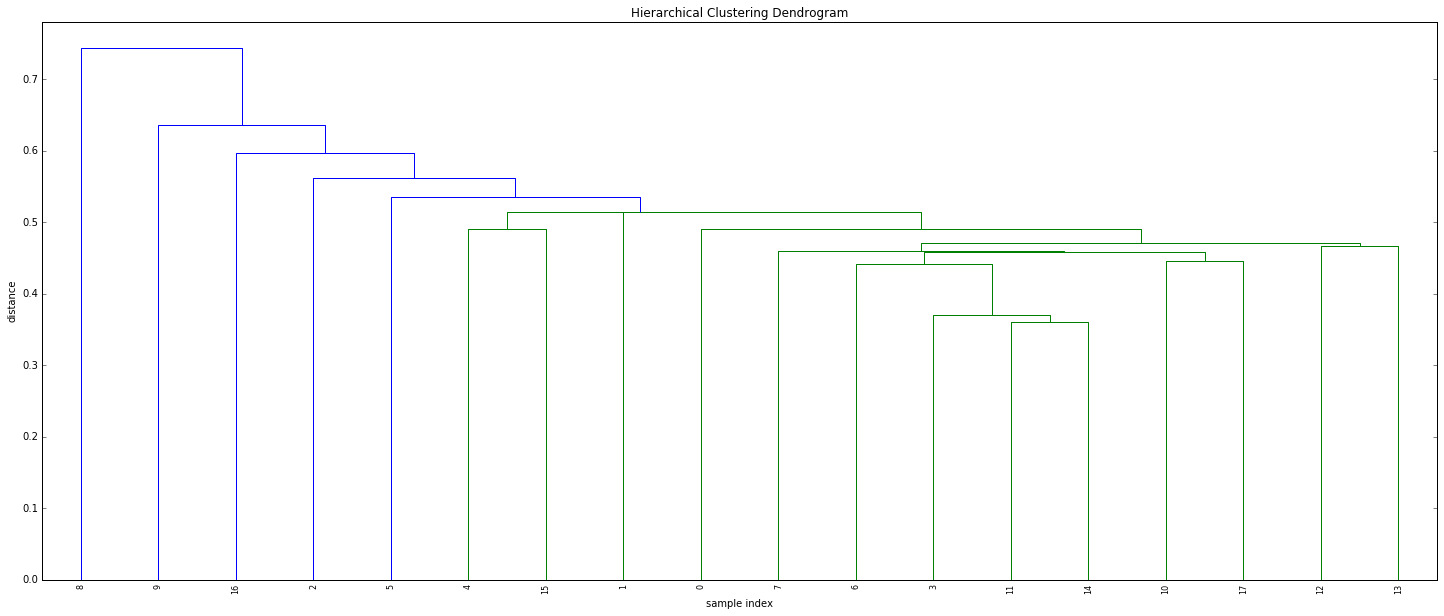

0: rank

1: court

2: copyright

3: office

4: justice

5: house

6: authority

7: seat

8: runoff

9: branch

10: board

11: cabinet

12: consent

13: privilege

14: appointment

15: law

16: lobby

17: staff

(7, 100)


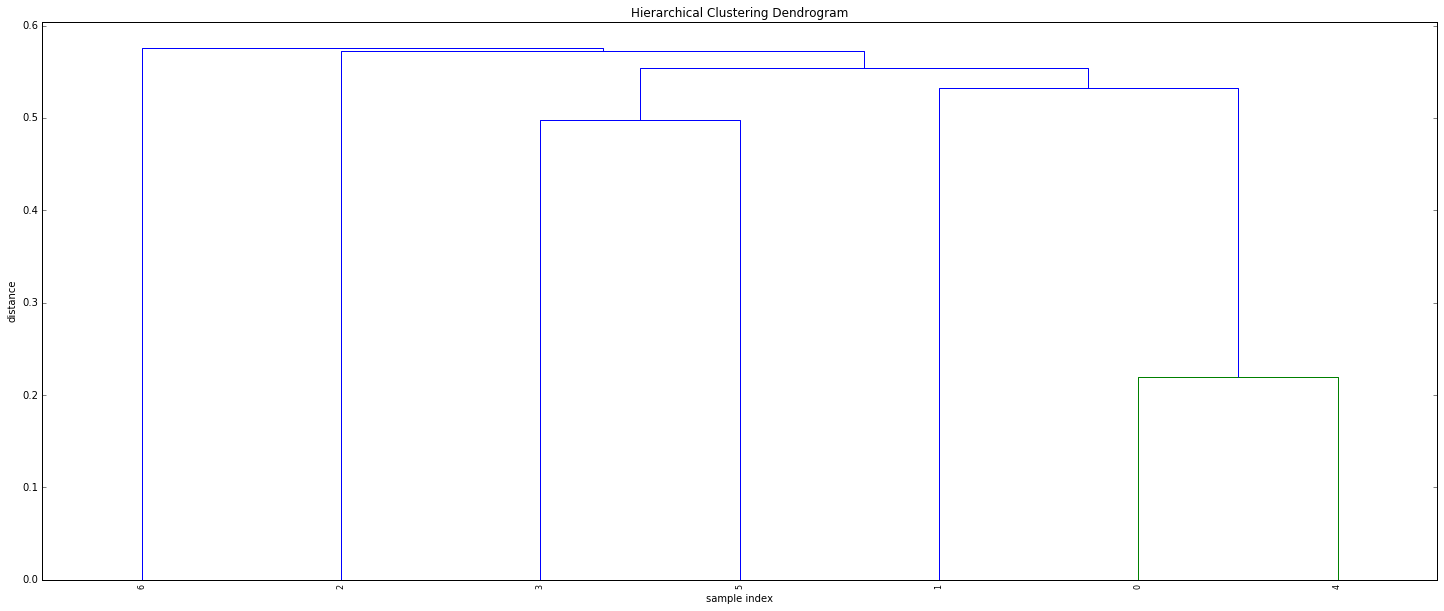

0: lords

1: peers

2: heads

3: positions

4: commons

5: orders

6: laws

(6, 100)


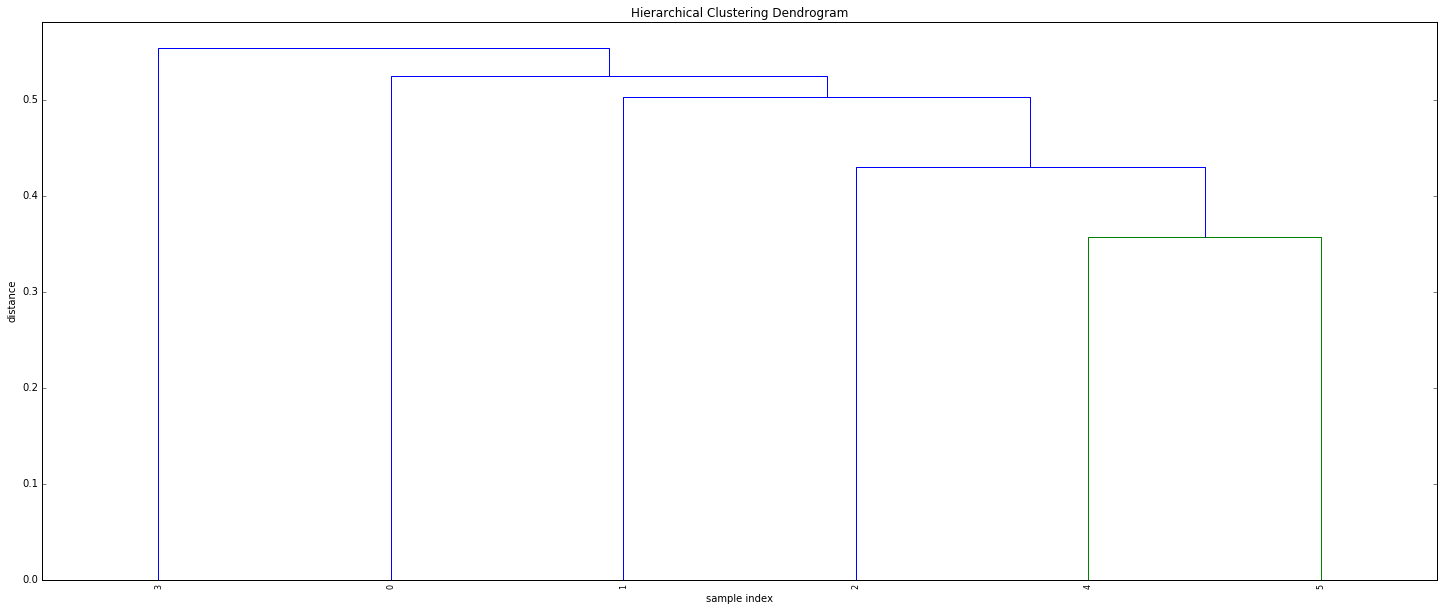

0: training

1: lecturing

2: studying

3: attending

4: learning

5: teaching

(22, 100)


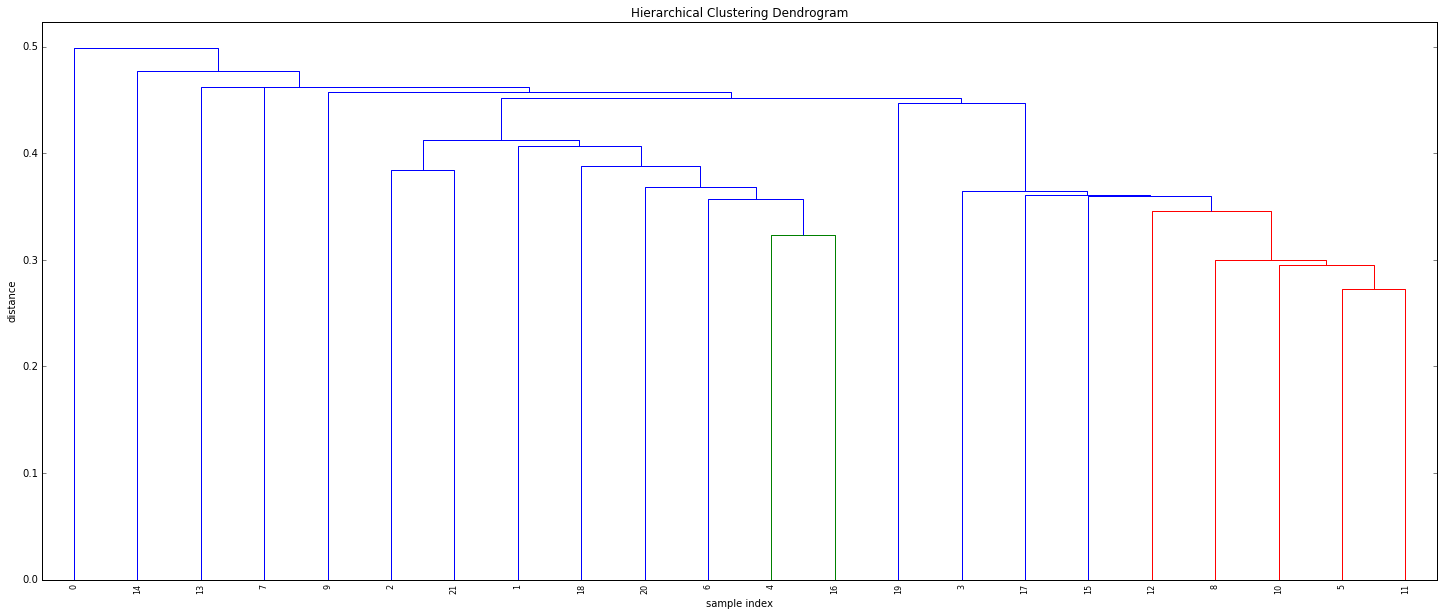

0: society

1: engineering

2: research

3: education

4: psychology

5: graduate

6: medicine

7: math

8: diploma

9: lab

10: harvard

11: student

12: teacher

13: achievement

14: classroom

15: school

16: science

17: professor

18: journalism

19: excellence

20: pedagogy

21: study

(7, 100)


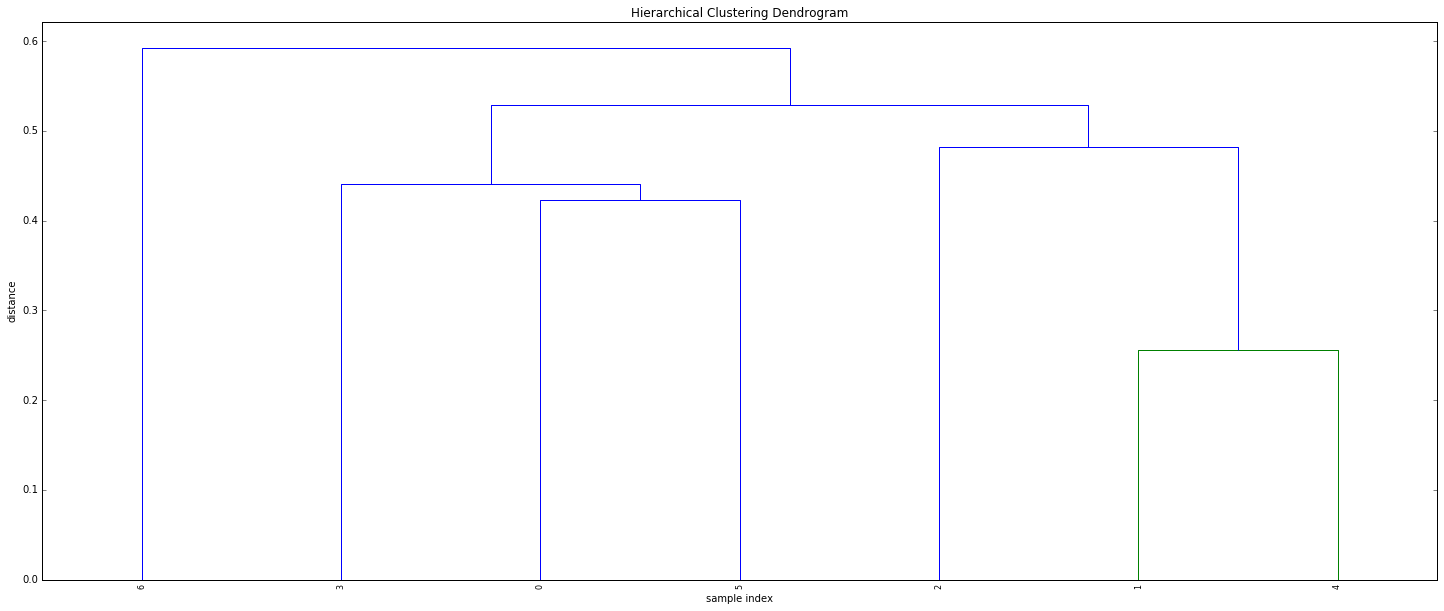

0: educational

1: princeton

2: journal

3: instructional

4: yale

5: medical

6: secondary

(4, 100)


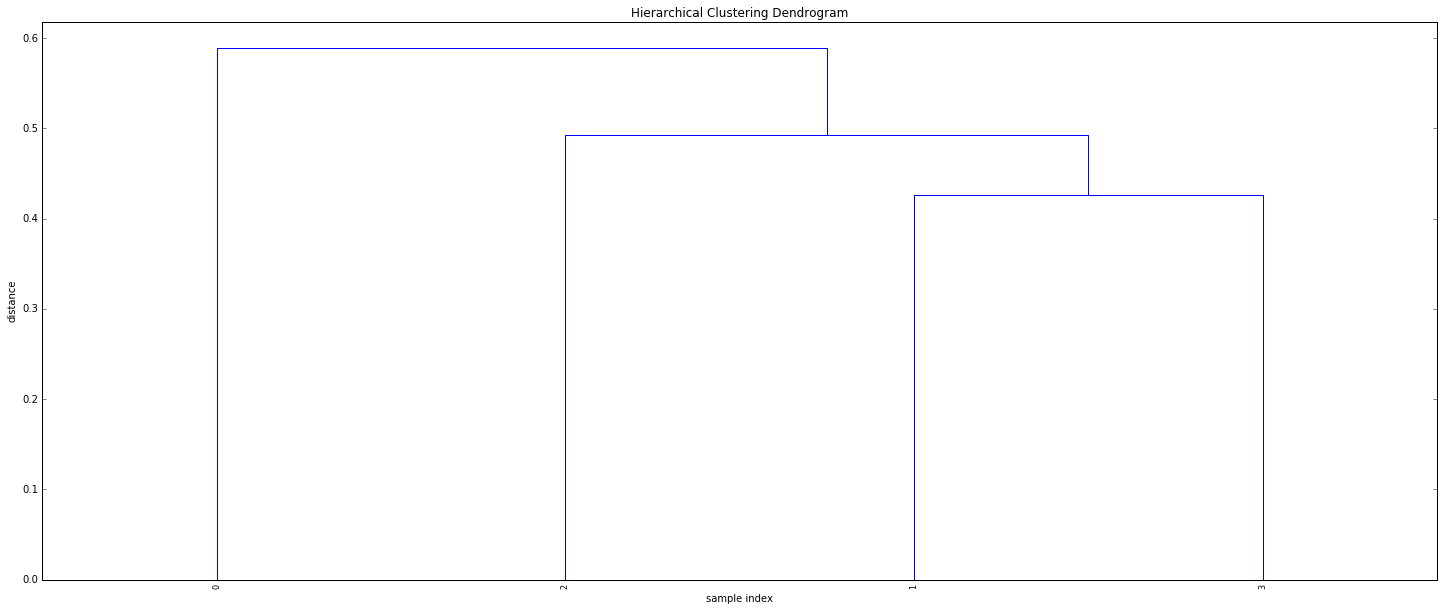

0: students

1: linguistics

2: arts

3: physics

(11, 100)


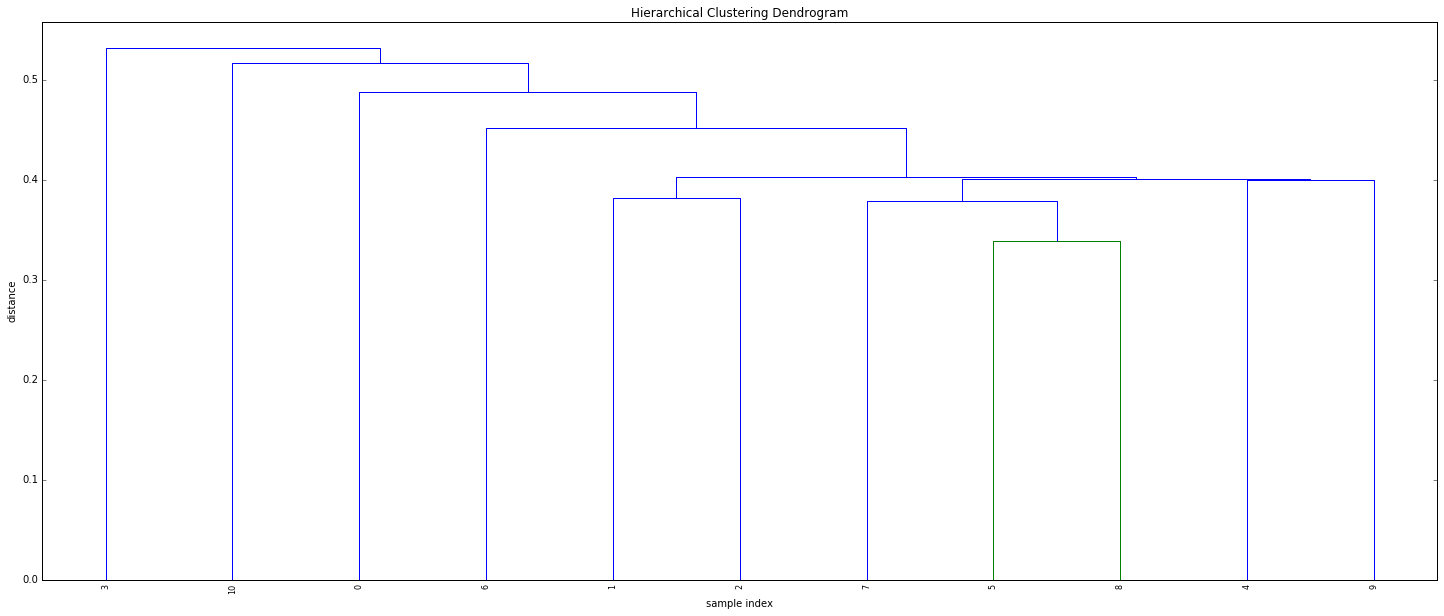

0: sowing

1: relaxing

2: rigging

3: boring

4: depressing

5: soaring

6: conditioning

7: panning

8: jamming

9: scrubbing

10: interlocking

(16, 100)


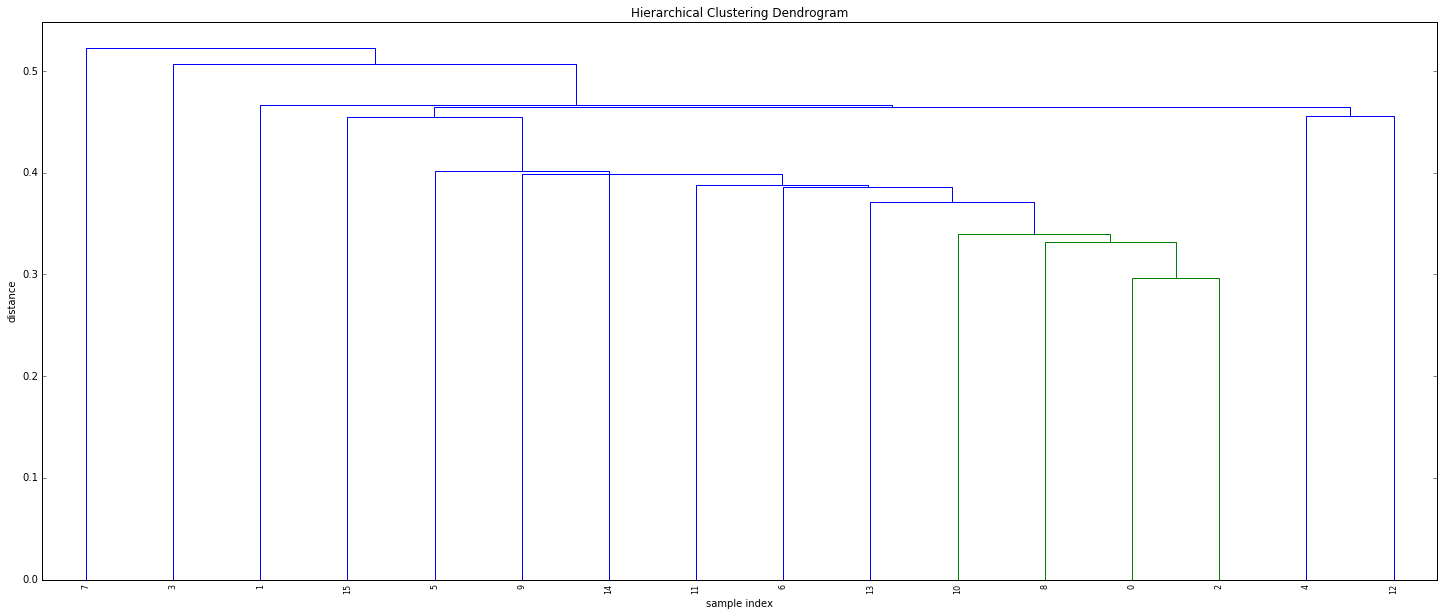

0: flashlight

1: underwater

2: hose

3: impractical

4: thirsty

5: swordfish

6: slingshot

7: grayscale

8: paddle

9: jumbo

10: pneumatic

11: tactile

12: messy

13: leaky

14: ammo

15: soar

(34, 100)


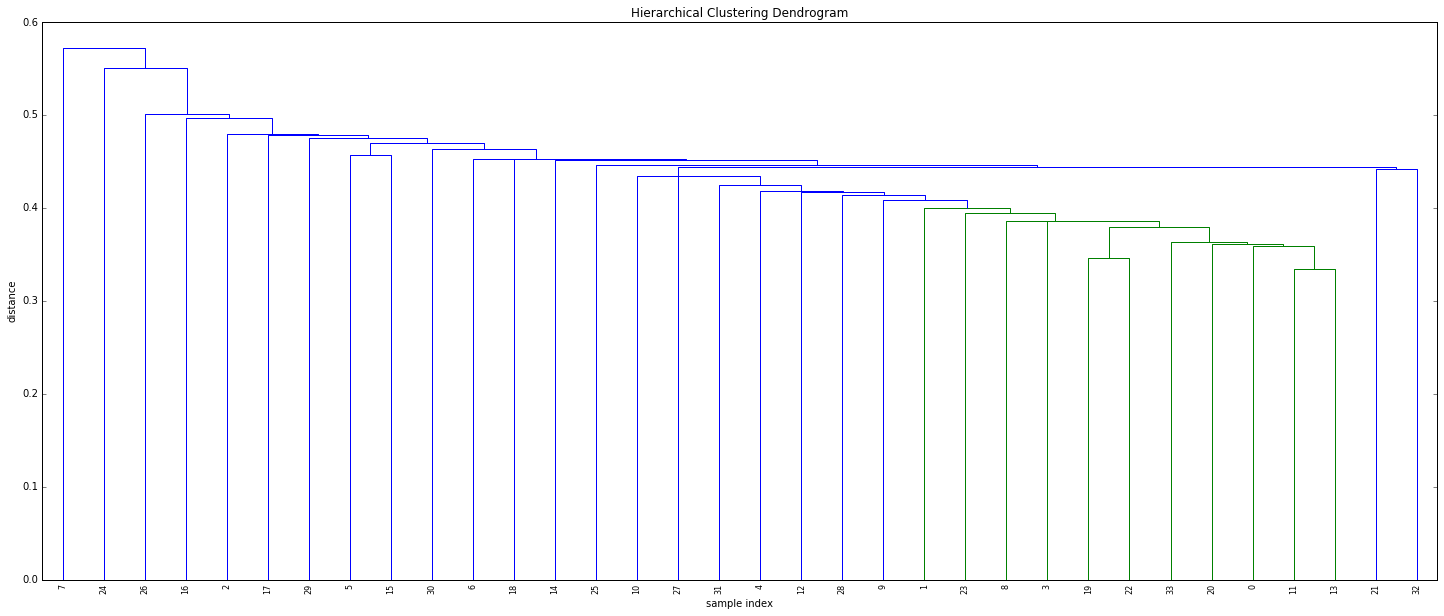

0: rag

1: chore

2: clog

3: picket

4: drawer

5: resilience

6: slice

7: exploratory

8: wishbone

9: filler

10: gondola

11: backpack

12: makeshift

13: rudder

14: thermometer

15: agility

16: grayscale

17: minuteman

18: etcetera

19: barge

20: propeller

21: airship

22: tug

23: lightening

24: timepiece

25: harvester

26: alarm

27: sentry

28: cutlery

29: speedy

30: expedient

31: biplane

32: excursion

33: tractor

(7, 100)


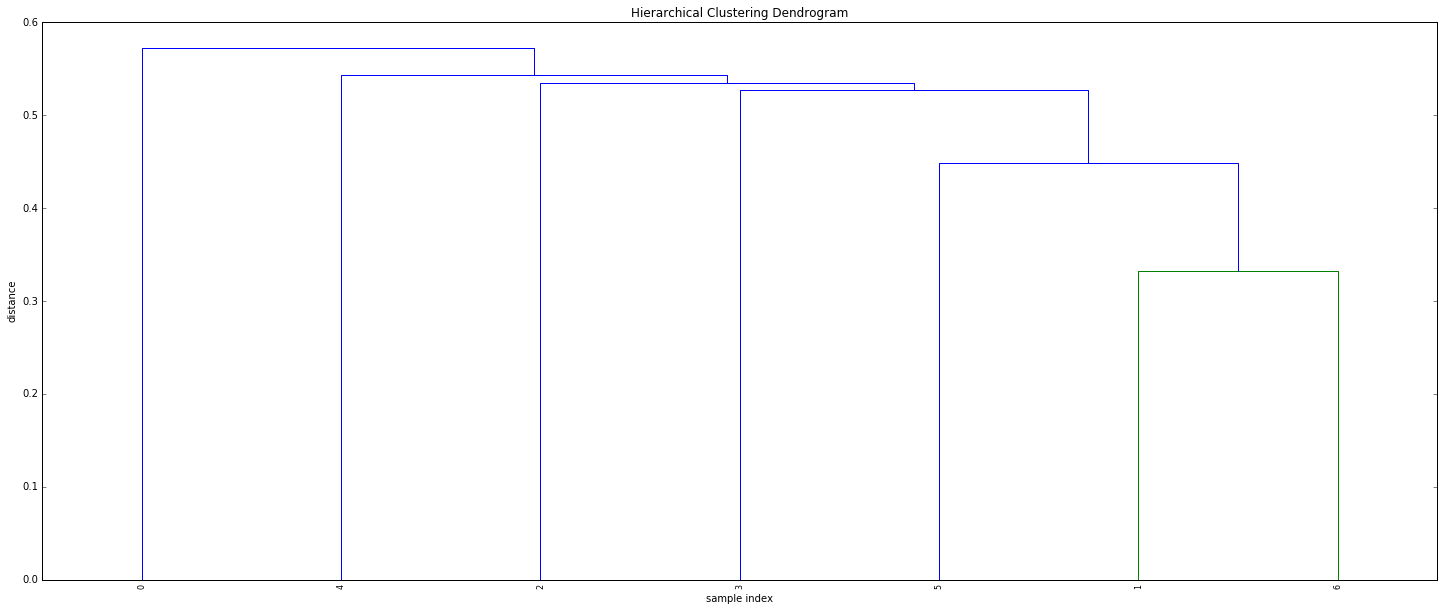

0: handshake

1: bait

2: leak

3: brute

4: booze

5: illuminate

6: stale

(13, 100)


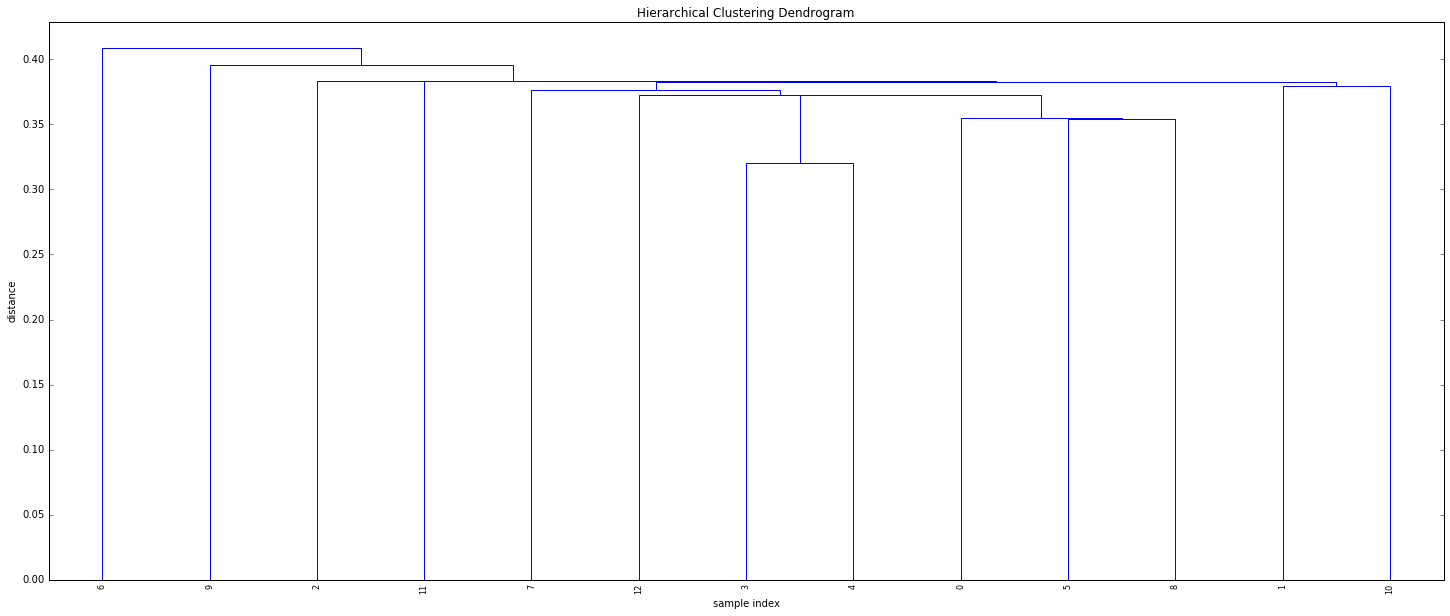

0: pans

1: tractors

2: cannonballs

3: hydraulics

4: prosthetics

5: binoculars

6: leaks

7: bicyclists

8: treads

9: scissors

10: muskets

11: parcels

12: headlights

(54, 100)


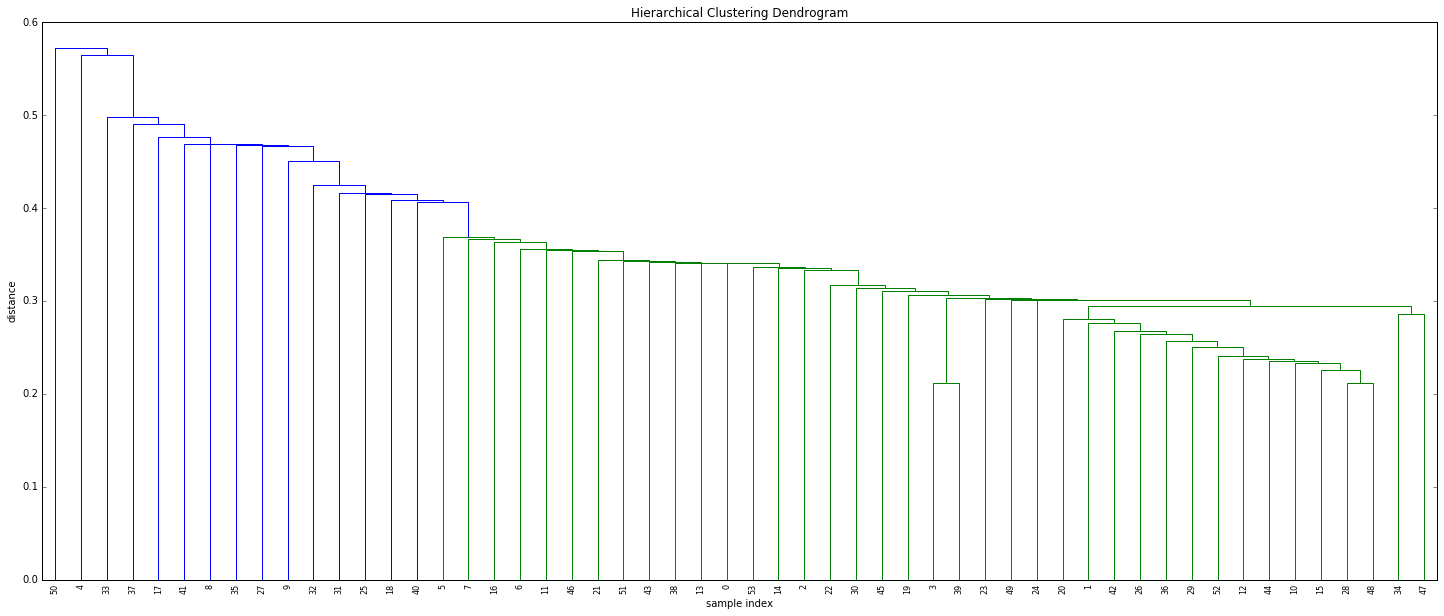

0: fawn

1: prim

2: foreman

3: winnie

4: telegram

5: inkwell

6: boaz

7: crook

8: allure

9: seamstress

10: roach

11: cozy

12: ballerina

13: zoe

14: aladdin

15: caldwell

16: hoo

17: traveller

18: vex

19: swordsman

20: goofy

21: esquire

22: redhead

23: samson

24: moody

25: brace

26: houdini

27: merciless

28: cheryl

29: paisley

30: denys

31: fuss

32: orr

33: houser

34: bertie

35: dentist

36: jennie

37: pate

38: thoreau

39: pooh

40: alderman

41: autograph

42: abe

43: sphinx

44: waldo

45: daydream

46: blimp

47: bonny

48: holliday

49: talon

50: scarf

51: mirth

52: weiner

53: coo

(4, 100)


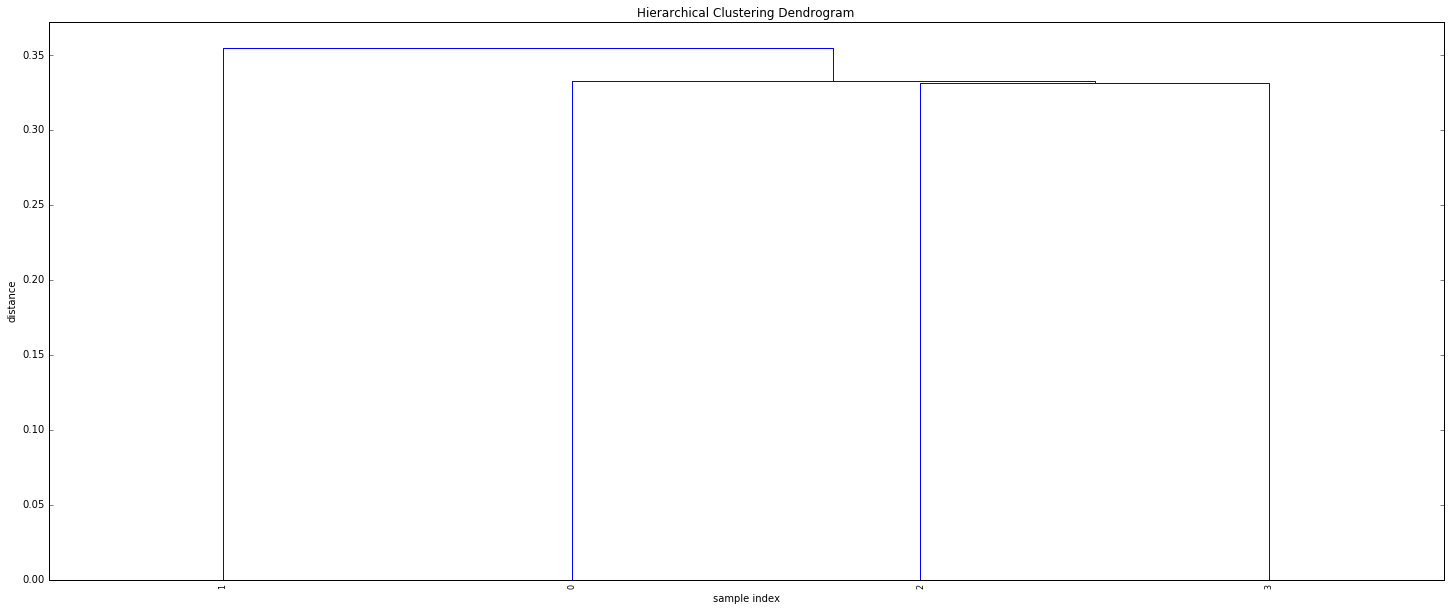

0: annabel

1: wink

2: parson

3: coon

(17, 100)


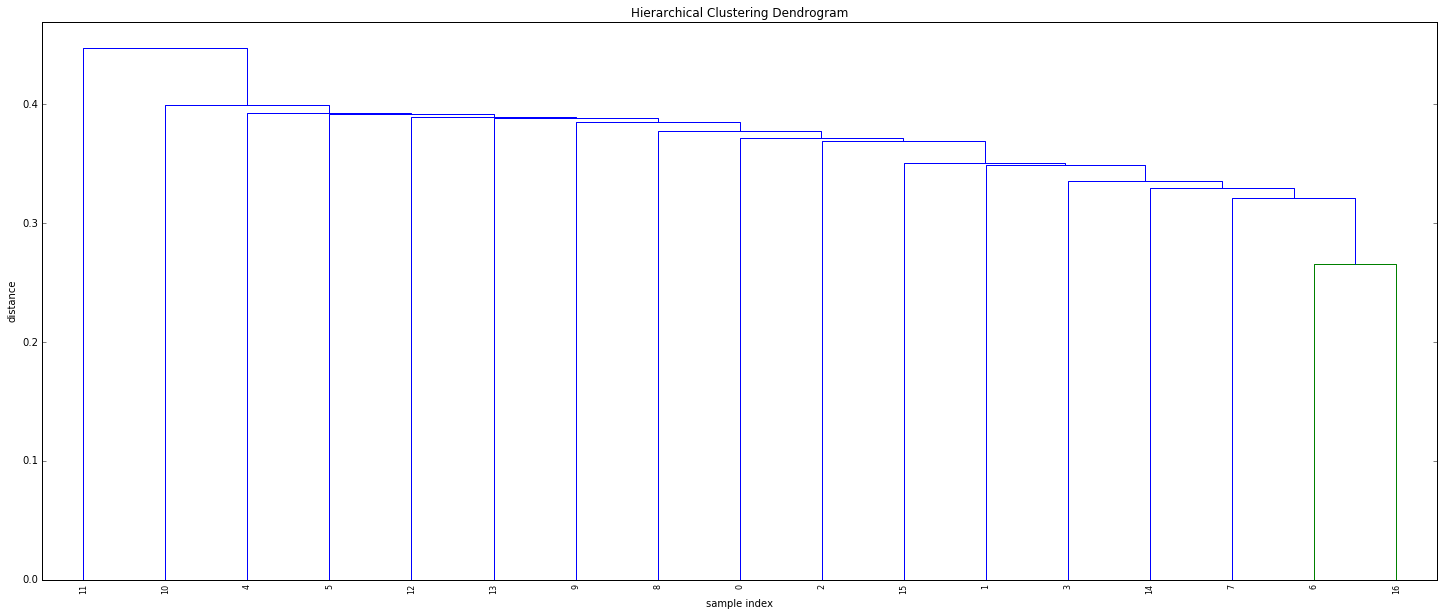

0: dandy

1: gong

2: crouch

3: bowden

4: gymnast

5: trapeze

6: elsa

7: uriah

8: blackbird

9: newt

10: enchantment

11: veterinarian

12: memento

13: spearhead

14: nightingale

15: pyne

16: patty

(6, 100)


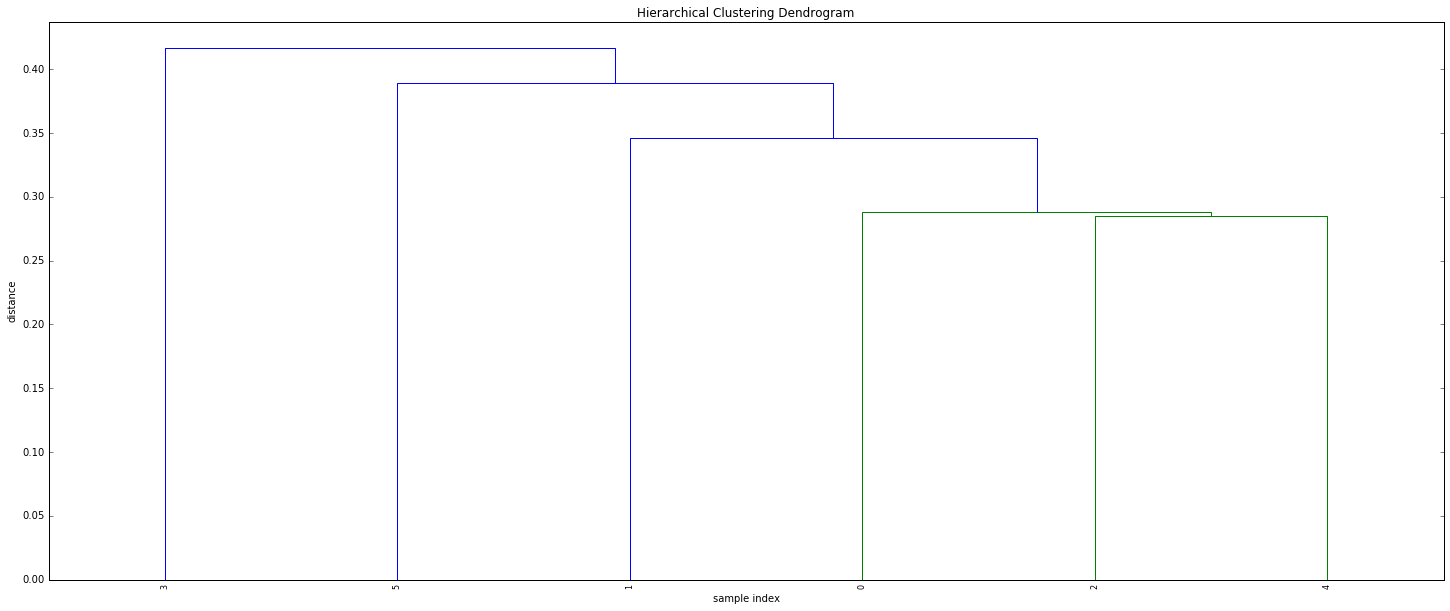

0: childs

1: sacks

2: pixies

3: jeans

4: babes

5: osbournes

(15, 100)


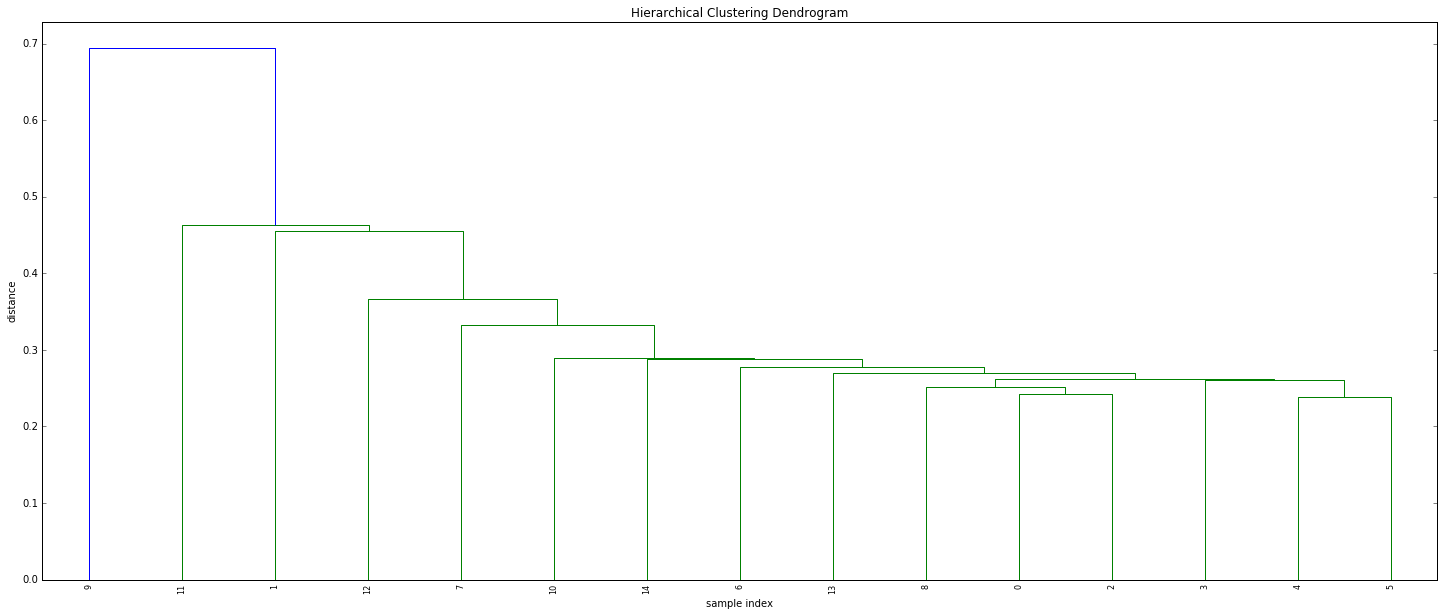

0: fowler

1: petty

2: nathan

3: clark

4: jay

5: frank

6: rob

7: zachary

8: dorothy

9: american

10: fay

11: crusoe

12: stern

13: dirk

14: sylvia

(39, 100)


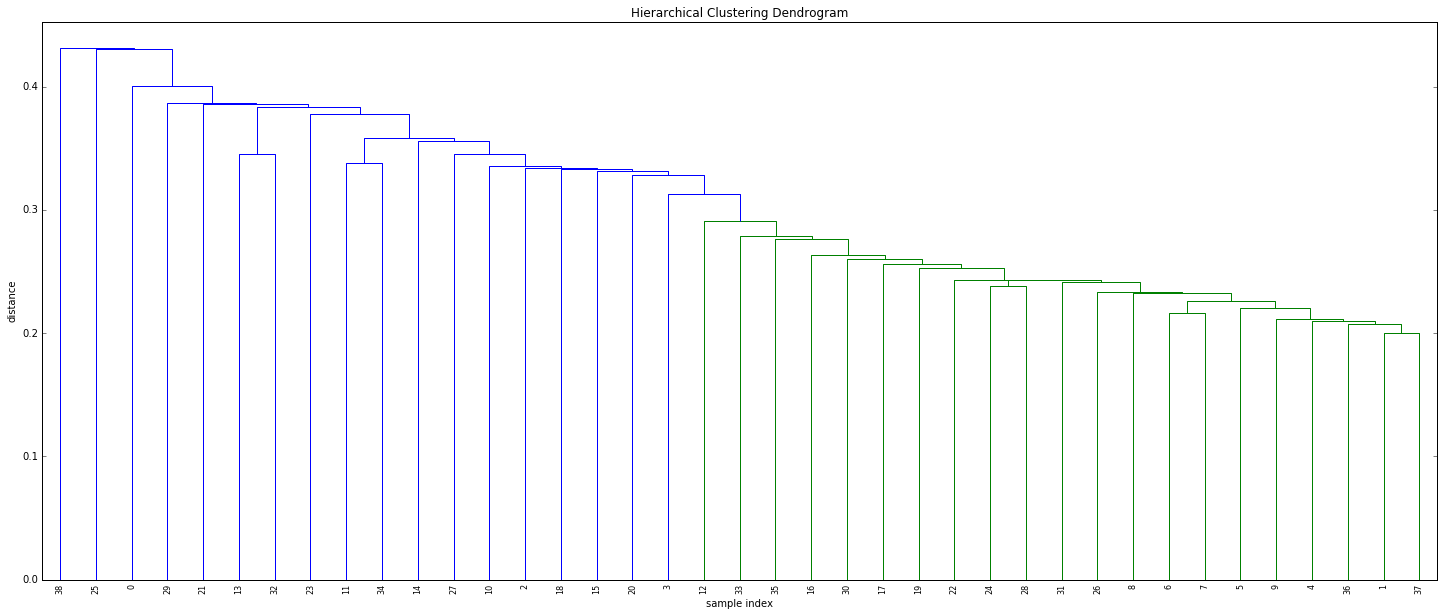

0: bell

1: miller

2: valentine

3: gale

4: lloyd

5: robinson

6: pat

7: jay

8: willis

9: ralph

10: zelda

11: butcher

12: wolfe

13: hay

14: collaborator

15: penn

16: porter

17: lance

18: shepherd

19: stein

20: papa

21: forester

22: butler

23: tinker

24: connie

25: cook

26: ellis

27: bloom

28: hodgson

29: pike

30: ben

31: johnson

32: hardy

33: baker

34: keel

35: cooke

36: gordon

37: harry

38: abolitionist

(3, 100)


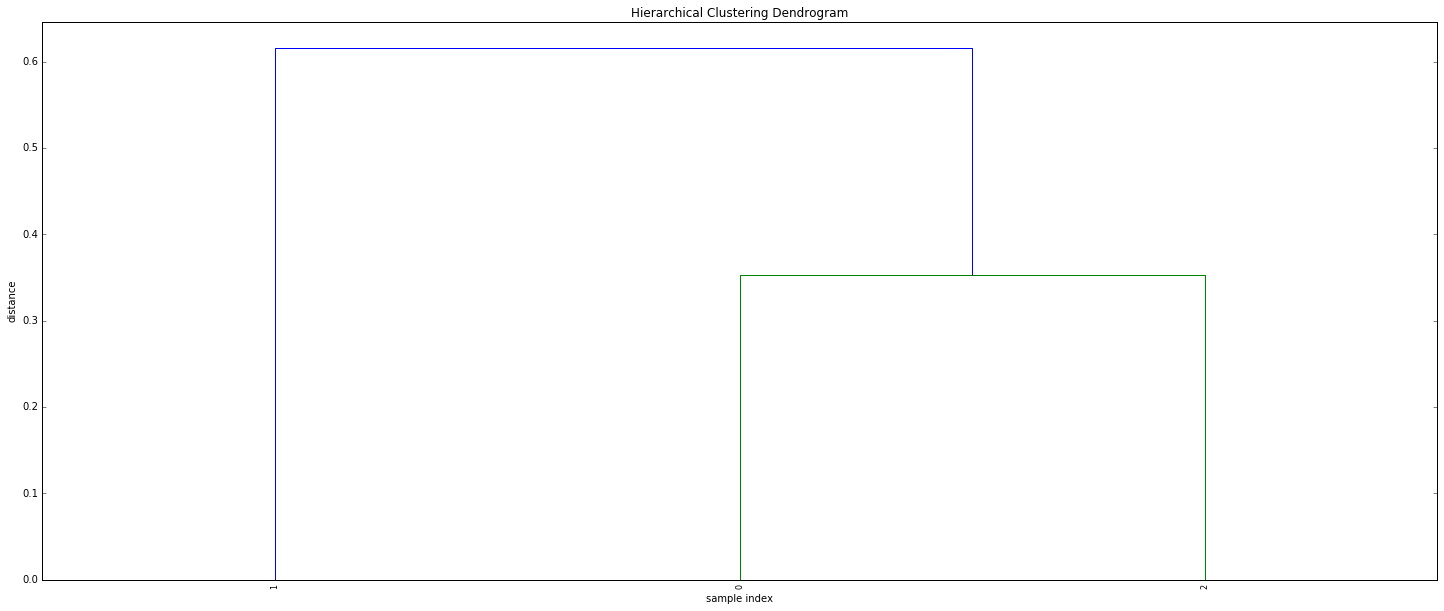

0: kitty

1: evermore

2: emma

(4, 100)


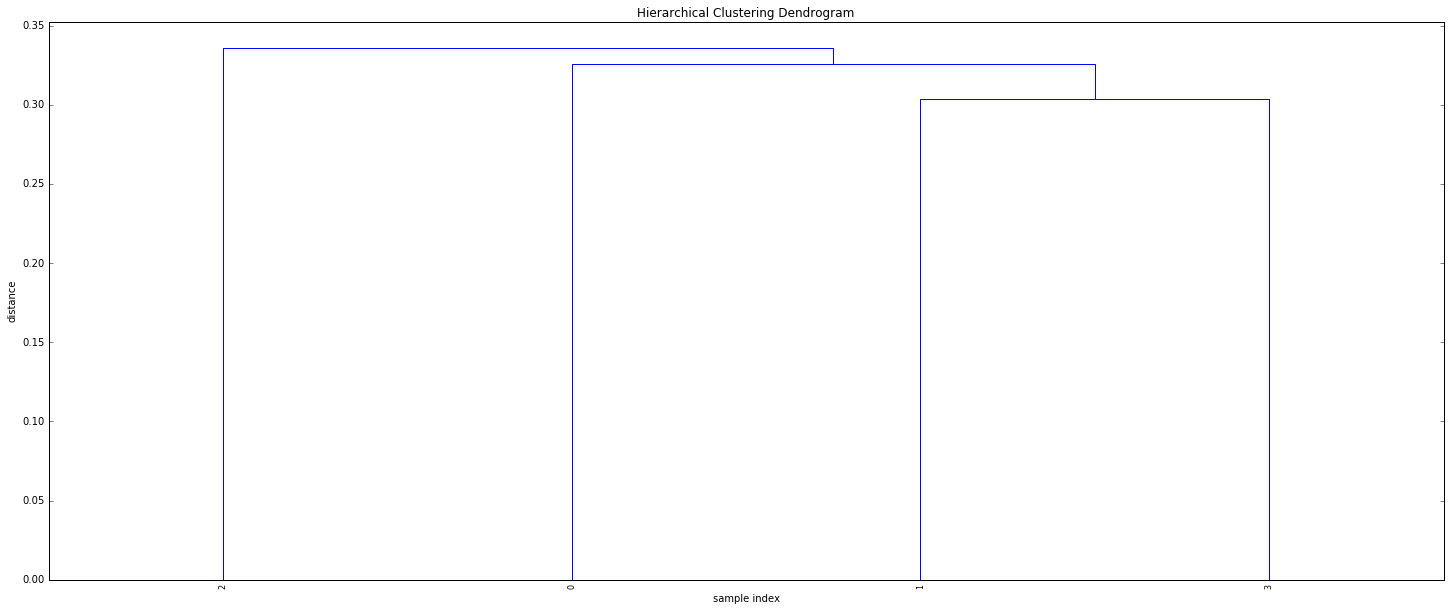

0: abel

1: ethel

2: ellis

3: helen

(6, 100)


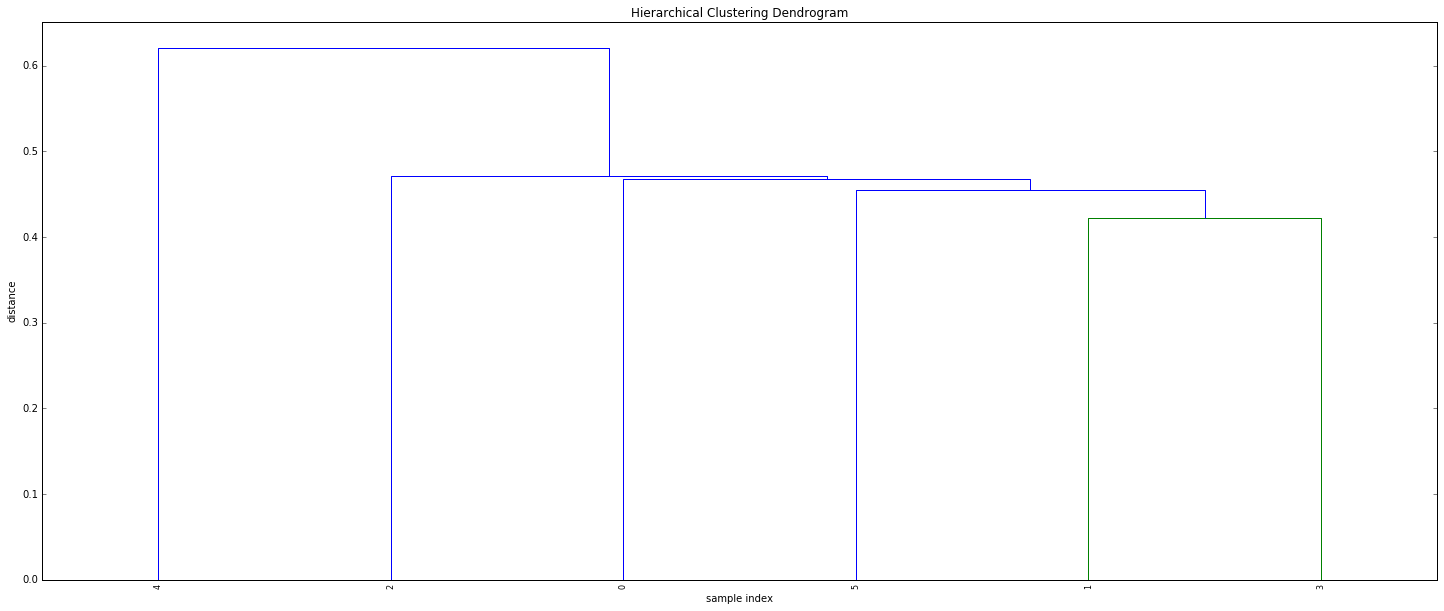

0: communicating

1: positioning

2: searching

3: viewing

4: floating

5: matching

(41, 100)


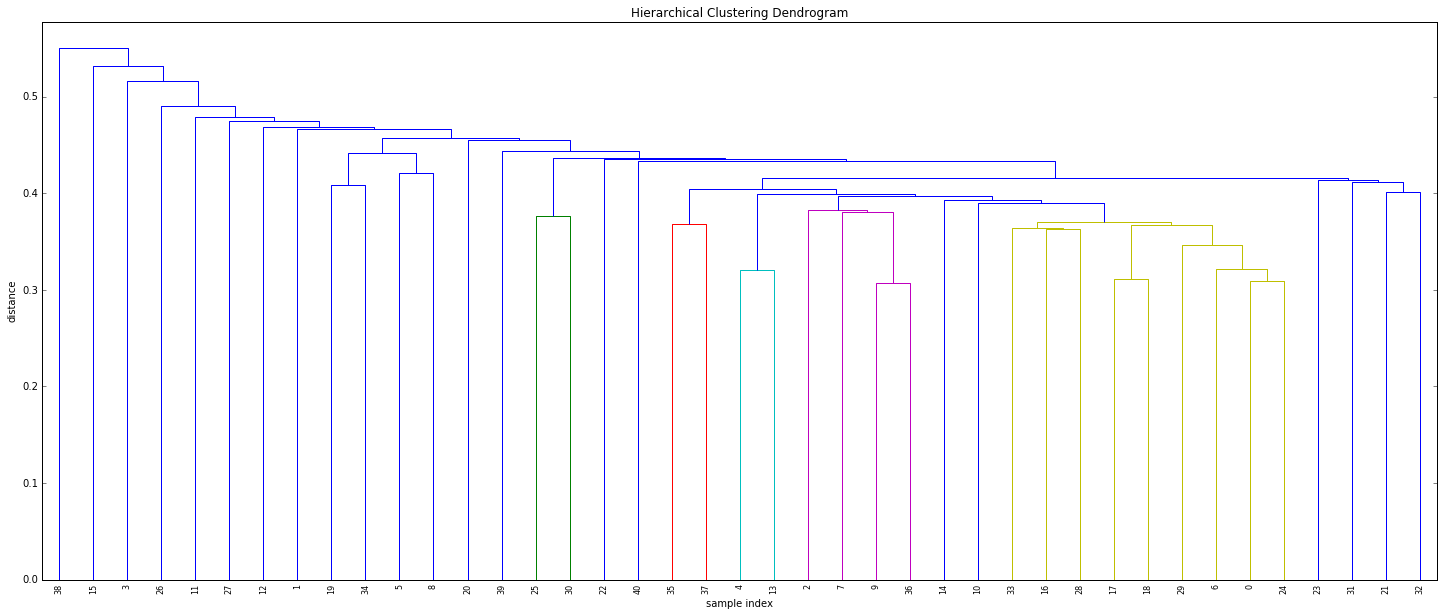

0: chip

1: caller

2: dump

3: color

4: frame

5: address

6: package

7: interrupt

8: message

9: pointer

10: analog

11: compact

12: garbage

13: clock

14: storage

15: fast

16: machine

17: camera

18: tape

19: memory

20: print

21: mail

22: correction

23: store

24: ram

25: pocket

26: test

27: desk

28: device

29: bit

30: box

31: cable

32: phone

33: signal

34: instruction

35: drive

36: queue

37: switch

38: backward

39: display

40: block

(4, 100)


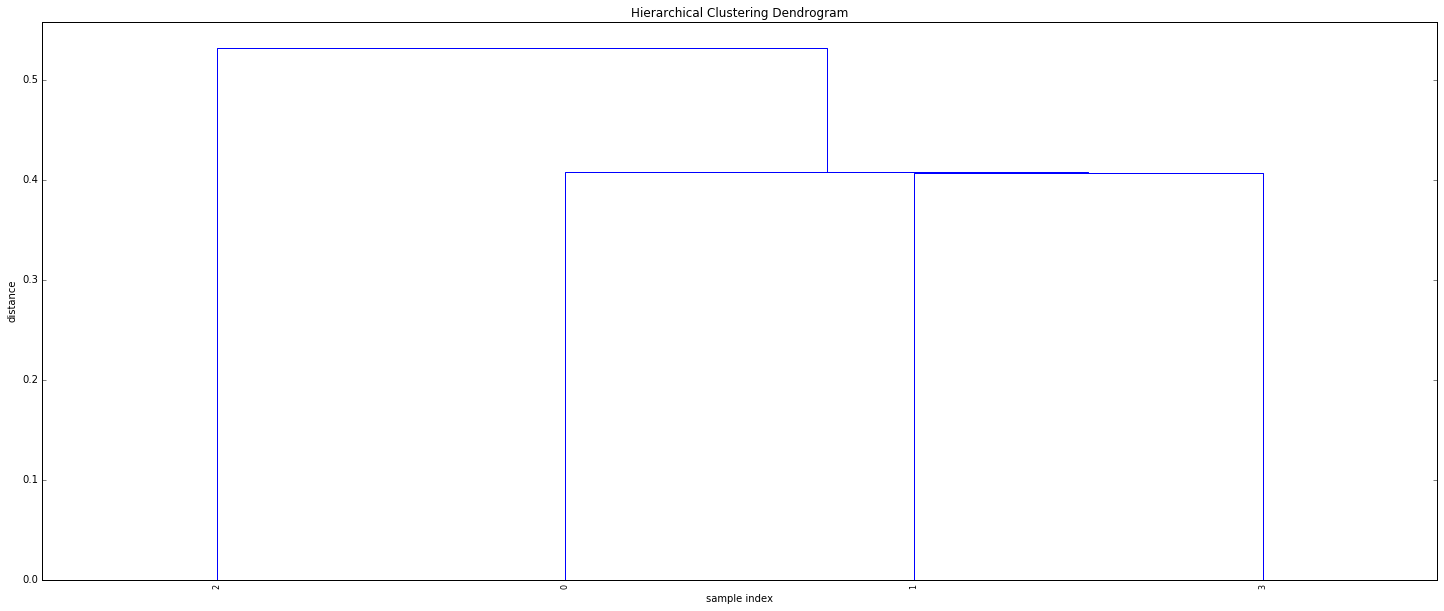

0: pocket

1: pin

2: sync

3: block

(13, 100)


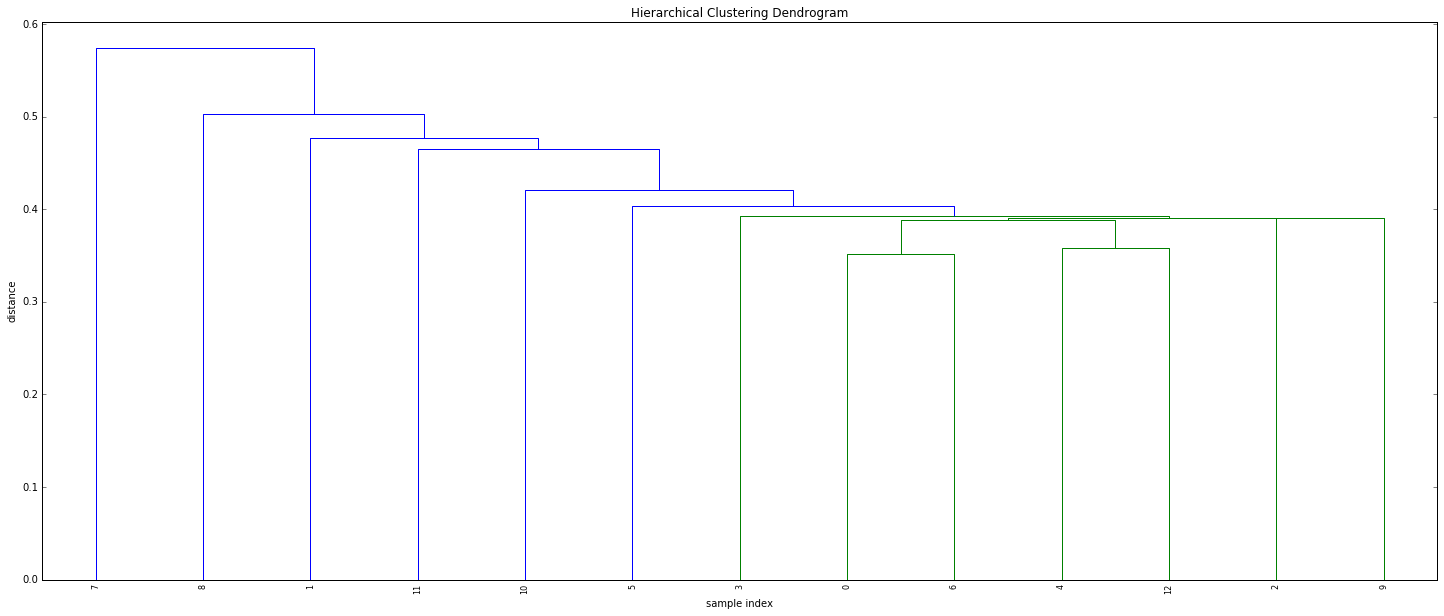

0: loading

1: extra

2: automatic

3: flip

4: grid

5: tag

6: pad

7: desk

8: print

9: static

10: font

11: bubble

12: stack

(13, 100)


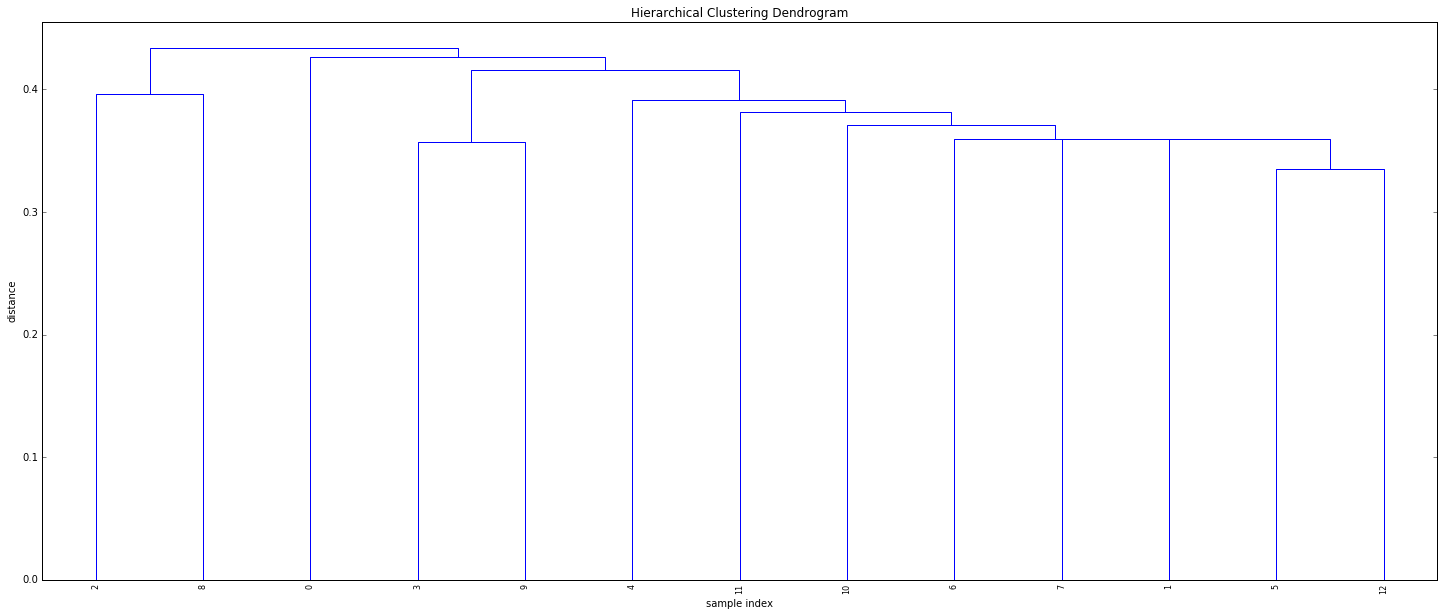

0: ads

1: packs

2: tricks

3: messages

4: bugs

5: accessories

6: frames

7: boxes

8: cards

9: instructions

10: cables

11: interrupts

12: patches

Dropped Words: 29


In [109]:
# now lets try some hierarchacal clustering using word2vec as a way of representing our words
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

def show_diagram(Z_set, cluster_keys):
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()
    i = 0
    for w in cluster_keys:
        print "{0}: {1}\n".format(i, w)
        i = i + 1

d_words = 0
for clid, cl_dict in pos_table_clusters:
    for key,val in cl_dict.iteritems():
        w2v = dict()
        for w in val:
            try:
                w_vec = model[w]
                if not w in w2v:
                    w2v[w] = w_vec
            except:
                d_words = d_words + 1
                continue
        # now that we have this vector2word dictionary, we are going to create an array of the word vectors to pass into
        # a hierarchical clustering algorithm
        X = np.array(w2v.values())
        if len(X) > 2:
            Z = linkage(X, metric='braycurtis')
            c, coph_dists = cophenet(Z, pdist(X))
            print X.shape
            show_diagram(Z, w2v.keys())

print "Dropped Words: {0}".format(d_words)

In [147]:
# instead of doing a hierarchical clustering, we can just cluster these words in each preexisting cluster
# this allows us to build word clouds of similar words that we can use in query expansions to improve results
# Pipeline 2
from scipy.cluster.hierarchy import fclusterdata

d_words = 0
pos_table_reclustered = []
for clid, cl_dict in pos_table_clusters:
    reconstructed_pos_dict = dict()
    for key,val in cl_dict.iteritems():
        w2v = dict()
        for w in val:
            try:
                w_vec = model[w]
                if not w in w2v:
                    w2v[w] = w_vec
            except:
                d_words = d_words + 1
                continue
        # now that we have this vector2word dictionary, we are going to create an array of the word vectors to pass into
        # a hierarchical clustering algorithm
        X = np.array(w2v.values())
        if len(X) <= 1:
            continue # skip this one if its not large enough
        Z = fclusterdata(X, 0.4, criterion='distance', metric='braycurtis', depth=100, method='weighted')
    #     print X.shape
        cluster_dict = dict()
        for i in range(len(Z)):
            if not Z[i] in cluster_dict:
                cluster_dict[Z[i]] = [w2v.keys()[i]]
            else:
                cluster_dict[Z[i]].append(w2v.keys()[i])
        reconstructed_pos_dict[key] = cluster_dict
    pos_table_reclustered.append((clid, reconstructed_pos_dict))

print pos_table_reclustered
# print pos_table_clusters
print d_words

[(0, {'VBZ': {1: ['is'], 2: ['makes']}, 'VBG': {1: ['giving'], 2: ['showing']}, 'JJ': {1: ['lies'], 2: ['belongs']}, 'NN': {1: ['bore'], 2: ['see']}, 'NNS': {1: ['implies'], 2: ['treats'], 3: ['presents'], 4: ['shows'], 5: ['covers'], 6: ['belongs']}}), (1, {'VBN': {1: ['led'], 2: ['lost']}, 'JJ': {1: ['grown'], 2: ['experienced']}, 'VBD': {1: ['made'], 2: ['abandoned']}}), (2, {'VBG': {1: ['stuffing', 'dripping', 'ingesting', 'pruning'], 2: ['seasoning'], 3: ['blooming'], 4: ['wading']}, 'RB': {1: ['herbivore', 'yolk']}, 'NN': {1: ['hourglass', 'overcast'], 2: ['prune'], 3: ['vomit', 'puncture', 'grit'], 4: ['shatter'], 5: ['flu'], 6: ['symbiosis'], 7: ['footprint'], 8: ['featureless'], 9: ['cleanliness'], 10: ['bedding', 'tack'], 11: ['firewood'], 12: ['solder'], 13: ['feline'], 14: ['headdress'], 15: ['macaroni', 'tart', 'snack'], 16: ['quagga', 'kingfisher'], 17: ['onomatopoeia', 'turquoise', 'lettuce', 'pane', 'quail', 'twig', 'vulture', 'mutton', 'sunflower', 'spinach', 'melon', 

In [161]:
# only thing left to try is just the topic modelling on the document list.
# Pipeline 3
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

docs_dict = dict()
print len(tag_set)
for i in range(len(tag_set)):
    dict_key = tag_set['Book'][i]
    value = tag_set['Tag'][i]
    if dict_key in docs_dict:
        value_string = docs_dict[dict_key]
        docs_dict[dict_key] = value_string + " " + value
    else:
        docs_dict[dict_key] = value
        
texts_all = []
for doc in docs_dict.values():
    raw = doc.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    texts = [p_stemmer.stem(i) for i in stopped_tokens]
    texts_all.append(texts)



54787


In [172]:
# cleaning done in previous step from original data set
# now run the gensim model
import gensim
from gensim import corpora, models

dictionary = corpora.Dictionary(texts_all)
corpus = [dictionary.doc2bow(text) for text in texts_all]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=30, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=30, num_words=5))

[(0, u'0.023*lamp + 0.019*fairi + 0.013*good + 0.012*children + 0.012*cloud'), (1, u'0.020*blank + 0.020*anim + 0.019*circu + 0.015*eleph + 0.014*color'), (2, u'0.017*toy + 0.015*play + 0.014*travel + 0.012*children + 0.011*girl'), (3, u'0.032*fish + 0.020*color + 0.016*letter + 0.014*anim + 0.011*boy'), (4, u'0.020*pie + 0.017*food + 0.011*knife + 0.009*personif + 0.009*alliter'), (5, u'0.000*anim + 0.000*color + 0.000*hat + 0.000*blue + 0.000*tree'), (6, u'0.014*religion + 0.010*anim + 0.009*girl + 0.008*tree + 0.008*moral'), (7, u'0.013*hat + 0.010*girl + 0.009*boy + 0.007*dress + 0.007*old'), (8, u'0.022*alphabet + 0.018*anim + 0.016*bodi + 0.013*girl + 0.012*africa'), (9, u'0.034*anim + 0.017*bird + 0.010*food + 0.009*tree + 0.006*tale'), (10, u'0.037*flag + 0.031*patriot + 0.030*war + 0.024*soldier + 0.017*america'), (11, u'0.000*anim + 0.000*hat + 0.000*alliter + 0.000*kush + 0.000*red'), (12, u'0.038*hand + 0.032*sign + 0.022*languag + 0.018*smile + 0.016*movement'), (13, u'0.0